In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error

data_dir = '/content/content/MyDrive/data/titanic'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'gender_submission.csv',
 'test.csv',
 'titanic.zip',
 'test_1hot.csv',
 'train_1hot.csv']

# __Introduction to decision trees__
- **Decision trees** split data into smaller subsets, creating a **tree-like structure** for classification.  
- Each **internal node** represents a decision, while **leaf nodes** represent the final predicted outcomes.  
- The **root node** is the starting point, guiding decisions based on important features.  
- Decision trees handle both **numerical and categorical data**, making them highly intuitive and interpretable.  
- Performance is measured using **information gain (entropy)** and **Gini impurity** for effective classification.  


## __Decistion Tree General Structure__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHvAyoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK8p+M/wC1D8NPgHDt8YeJra01Fl3RaTag3F7L6YhTLAHPDNhfemk5OyJlJRV5Ox6tRX5x/EP/AIKjeKdaeSD4c+ArfSbUnCap4rlLyMPUW0RG049XYe1fP/jH9pj42/EPzF1r4n6rZWr8fZPDyppqKP7u+IB2H+8TXp0stxFXW1vU8atnGEo6c135H7H6rrWn6HbG41K/ttPtx/y1upliX82IFebeIP2rfg34XkMeo/E7wtHKODFDqkUzr9VRmI/EV+RfgT4F6r8Z/FUmnaLps/ibXjC9y5vtQAdkUjcxeaRV6sO+ea77W/2LviN4N0O81e78BxJYWcZluJbO5tLlo0HVisUjNgDknHABPauz+y4xly1KqT7HA87nOPPRoSa79PwP0MvP2+fgBY58z4l6a2P+eMFxL/6DGaz4/wDgot+zvLKY1+I0QYd20q/UfmYMV+V6WkEf3YY1+igVIUUjBUEehFdf9iw/nPPfEc+lNfefrHZ/t2/AS+x5fxN0hc/89lli/wDQkFdt4b/aI+Fvi/aNG+IvhfUZG6Qw6vAZPxTduH4ivxgextpPvW8TfVAabD4GttdNwLfQ1vDBC1xMba23GOJfvOxUcKO5PAqJZKktJmsOIm371P7mfvBBcRXUKSwyJNE4yrxsGVh7EVJX4M6FZXPhG7F34a1nWPDF4DkXGj6hLbuD9VavZ/B37aHx88B7Et/G9v4ptE+7aeJrFJs/WZNsp/Fq46mUV4/C0zvpZ/hZ6TTifr/RXwZ8N/8AgqfpbPFafE3wVe+GyflbWNEf7baf7zx8SRr14G819lfDv4peEvi1oS6z4O8Q2HiHTjgNLZTBjGf7rr95G/2WAPtXk1KNSi7TjY96jiKWIV6UkzqaKKKxOgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKp6vq9j4f0u71LU7yDT9PtImmuLq5kEccSKMszMeAAO5q5X5rf8FIPjze+MvHg+D2kXTQ+HtISG88QmM4N3cMBJDbkj+BVKuR3Y88oK6KFGWIqKnHqcuKxEMLSdWeyKv7Rv/BQ3xJ8Rb288PfCO4l8N+F0Jil8VPHi9vcHB+zKf9UnXDn5zwRs6V8lWukQW91LduZLu/mYvLe3TmWeVj1Znbkk1cRFjRURQqqMBVGABS191hsHSwy91a9z8xxmYV8ZK83p2Ciiiu48w+kf2CIftHxn1SLekfmeHr1d8jbVXPljJPYe9dr+zx8Lbr4Ga34h+ILeMfDvi/T9E0e4a60fwdqQ1GW5DKQqzKFASIEbyxIwUHbNeI/s1fFnSPg3481DW9atr26tbjSbmwVLBEdxJJt2khnUbeDnnPtVT9nP4rW3wb+KuneIdSiubrRTDPaajaWiK8k8EkbDaAxUHD7G6j7teTXo1JyquOzS0776Hu4bEUacKKlum9e17Wduv/AOm+H/AII8IeEfgjcfE3xnoU3iz7bq40XS9FS9e0hDCMySTyyRnf8AwlQo7jnrlbHjX4Y+FfHvw38J+OfAGmSeGX1PXx4XvtDuLuS5hhu2XzInjlcb9pQgnOcZGOQc0PCHxX8EyeAdZ+HXi+x1248H/wBrtq+i6hpbRC/s5MFNrxu3lsrRnkZ4YtjOQVh8efGXQbLwT4b8FfDey1PTtE0jVDr0mpa0Yje3V/jakhSPKKqLwBzkAZ6HddqrqXV73+Vrdv8AgXuZ81BUrO1rdve5r97X/G1vM7/xRonwa+GvxYh+GOpeA73Wvs81vYX3iltZniuPNkVC0qQL+72qXHykHOPz6P4TeGtB+CvxD+N3grUfDkXiG50jw1qtydTkvpoXubDyInFoyIQq71YEyKNwJOK4rW/jF8HPHPj23+IniLQ/F0HirfBdXek6c9s2nXNxEFA/eO3mKjbBkbSeuPWuf8JftFWtx8aPGfi/xnplzdaZ4v0280m/t9MdfOt7eZFVRFuIDFVRF5I4yevBw9nVnBpp7a3fXTbX1202OpVqEKiknH4tLJaRs99PTfXc8j8W6ppeteIby90XRU8O6ZKVMOmR3MlwsACgECSQlmyQW59cdBWRWv4tXQV8Q3g8MPqMmhZX7M2rJGlyRtG7eIyVHzbsYPTFZFexH4VY+fn8Tv8AhsFJ4du9V8CeIIvEHg7WLvwpr8P3L3TX2bh/ddPuup7qRg96WipnTjUXLNXRVOrOjLmpuzP0H/ZQ/wCCgUHxC1Sz8EfFCK20HxfMRFYavB8ljqjdl5P7qY/3fusemCQp+1K/BrU9Nh1Wze3nXKtyGH3kbswPYiv07/4J9ftEaj8Zvhpf+HfE90bvxh4Rkjs7q6f715bOp+zzn1YhWVj3Kgnlq+OzHALDfvKfwv8AA/QcpzR4teyq/EvxPqqiiivEPpQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvxN+NX2j/hoz4v/bM/av8AhKr3r18rf+6/8cxX7ZV+a3/BSD4DXvg3x4PjDpFq03h7V0hs/EIjGTaXCgJDcED+BlCoT2Yc8uK9bLKsaWIXN10PCzmhOvhWobrU+TaKajrIiujBkYZDKcgj1p1fdH5iFFFFABRX1vqX7MPhvxZ+zR4S1zwtB9m+IkmmS6xPaedLI2qW8T7JgiMxCum+MjYBnOMHII8h+HHgbRNe+Anxh8R39l5+s6B/Y/8AZtz5rr5Hn3TRy/KGCtuUAfMDjtg1xxxVOcW10dvvdvuO+eCqwkou2sXL5Jc332/qx5NRXoHgH4BePfidpMuqeHPD73mmxyeSbye5htomf+6rTOgY+y5rB8T/AA78S+DPFX/CNazot5Za8WREsTHvklLnCbNud+48ArnJ6V0KpBycVJXRzOjUUVNxdn1toc7RX018F/2P/FafFnwzbfELwfI3ha5mkjvY0v42KZgkaPzPIl8yIF1Xk7cnA74rxD4e/CvxV8Vb+6s/C2jy6rLax+dcOJEiihTsXkkZUXPOMkZwcdDWccRSk3aSsra301v/AJGssJWgo3i7ttJWd9LdPmcpRXW/EP4UeK/hTe2lr4p0eTS3vIzLbSeZHNFMoODskjZkbGRkA5GRnqK5KtoyU1zRd0c8oShLlmrMKKKKogK+n/8AgmR9o/4aU8Y+Vn7F/wAIqPtGOnm/aovLz/wHfXytqepQ6VZvcTthV4Cj7zt2UDuTX6d/8E+v2d9R+DPw0v8AxF4ntTaeMPF0kd5dWr/es7ZFIt4D6MAzMw7FgDyteHm1aMaPs+rPpshoTniParZH1VRRRXxZ+ihRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFU9X0ix8QaXd6bqdnBqGn3cTQ3FrcxiSOVGGGVlPBBHY1cooA/Mz9o7/gnl4k+HN7eeIfhHby+JPC7kyy+FXkze2WTk/ZmP+tTrhD844A39a+SrbV4Li6ltH8y0v4WKS2V0hinjYdVZG5BFfvRXlXxn/Ze+Gnx8h3eMPDFtd6iq7YtWtibe9i9MTJhiBjhWyvtXt4XNKlFcs9UfNY3JKWJbnSfLL8D8eaK+v/iH/wAEufFOivJP8OfHtvq1qDlNL8VxFJFHoLmIHcceqKPevn/xj+zP8bfh55ja18MNVvrVOftfh5k1JGH97ZES6j/eAr6GlmWHq/at6nydbJ8XR+zdeR7T8SfHWrfDT4Zfs0+JdEn8jUtOsL6WMn7rjzYgyMO6spKkehNdx400PwzqH7Mfxi+Ing90g0bximjTz6Xuy+n38V//AKTFjHC5lVh/vEj5StfDOtfEyeeGx0bXtV1SJNMVo7XTtW84CzViNyoj8ICQMgY6Vb074jXEWgXmiWXiaaLRb11kutNhvmW3nZSCrSRBtrEFVIJHGB6VKoRko8s1dO/qubmsaPEzg5qdN2cbLyfLy3/ry7H0t8XfDmqeOf2d/gnN4N0q91fR7Gyu7a9h0u3eUQX29PMMiICQzEMQxHOcjrz6haX1p4f+LP7L+n+LJEg8T2OlyR6kl7/rofMQrZRy55DhuADyCea+LfC3xK8Q+DVmHhvxVqehiYgyDS9Rkt/MPbdsYZ/Gs7U9WutYvZr/AFG9mvrydt8tzdSmSSQ+rMxJJ+tW8K5LlctPe9fev/mZLGxg+dR958t+3u229bfLU+vf2dvhz8RNG/bJuNU1HR9ZsrOO/wBQbUtQnR4oJo3Em0GQ4WUM5jIUE5wGAwuRi/s+XWl337L3jzSn8K3Pji7i1y3u7/QtPvntLmS08tRHICkbs6pKpJUDjqSMc/Pk/wAcPGrvZPN4/wBeL2Lb7VpNZnzbttK5TL/KdrMMjHBI71y2kfEk+C9QF/pHiWTRr9QVFxp140UwB6jchDdh+VTKg5Juckn7vl8Lf+fyKhiYxaVOLa9697P4kl2tpbrufTnxuvLhP2avDlhF8OrjwFoSeIpJLGLVtZlurxj5D+ZsikhQrESwO7d94fd+bNfMlXJ/Hvif4w6rEIW8U/EPVUHlxrDDc6hMB/dBOTj6V6h4O/Yv+PnjzY9v4It/C1o/3bvxNfJDj6wpulH4rVQr0MNC05q+/V/ncVTC4nGz5qdN2slqktvRJHkdHh201Xx34gi8P+DtHu/FevzfcstNTftH96R/uoo7sTgd6+6Phv8A8EsNLV4rr4m+Nb3xIR8zaPoifYrT/deTmSQdeRsP9fsr4d/C3wl8JdBXRvB3h6w8PacMForKIKZD/edvvO3+0xJ9683EZxFK1FfNnsYXh+TaliJfJHyp+yh/wT9g+H2qWfjf4oS22veL4SJbDSIfnsdLbqG5H72Yf3vuqemSAw+1KKK+ZqVZ1pc83dn2VGjToQUKasgooorI3CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAparoun65bG31KwttQtz/AMsrqFZV/JgRXm3iD9lL4N+KJDJqPwx8LSSnkyw6XFC7fVkVSfxNerUU02tmS4qW6Pn+8/YG+AF9nzPhppq5/wCeNxcRf+gyCvGfhv8AsUfBXXfj38XfDl94Ft59G8O/2R/Zlsb26HkfaLVpJssJQz7mAPzlsdBgcV9zV4R8IP8Ak6X9oH/uX/8A0heuyjOXJU16f+3ROCvTgqlH3VrJ/wDpMhtn+wl8BLHHl/DLSGx/z2aWX/0JzXbeG/2d/hb4Q2nRvh14X06Rek0OkQCT8X27j+Jr0OiuVzk92dqpwWyRHBbxWsKRQxpDEgwqRqFVR7AVJRRUGgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV4R8IP+Tpf2gf+5f8A/SF693rwj4Qf8nS/tA/9y/8A+kL11Ufgq/4f/bonFiP4lH/E/wD0iR7vRRRXKdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeEfCD/k6X9oH/uX/wD0hevd68I+EH/J0v7QP/cv/wDpC9dVH4Kv+H/26JxYj+JR/wAT/wDSJHu9FFFcp2hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFfMfxK8B2nxU/a9g8OavqOrW2kw+BV1BYdMv5LbMw1Bowx2nn5XI/L0rpv+GN/BH/QX8W/+D+f/Gux0qcUuedm1fb/AIJwKvWnKSpwTSdt7foe7UV4T/wxv4I/6C/i3/wfz/40f8Mb+CP+gv4t/wDB/P8A41PJQ/nf3f8ABK9pif8An2v/AAL/AIB7tRXhP/DG/gj/AKC/i3/wfz/40f8ADG/gj/oL+Lf/AAfz/wCNHJQ/nf3f8EPaYn/n2v8AwL/gHu1FeE/8Mb+CP+gv4t/8H8/+NH/DG/gj/oL+Lf8Awfz/AONHJQ/nf3f8EPaYn/n2v/Av+Ae7UV4T/wAMb+CP+gv4t/8AB/P/AI0f8Mb+CP8AoL+Lf/B/P/jRyUP5393/AAQ9pif+fa/8C/4B7tRXhP8Awxv4I/6C/i3/AMH8/wDjR/wxv4I/6C/i3/wfz/40clD+d/d/wQ9pif8An2v/AAL/AIB7tRXhP/DG/gj/AKC/i3/wfz/40f8ADG/gj/oL+Lf/AAfz/wCNHJQ/nf3f8EPaYn/n2v8AwL/gHu1FeE/8Mb+CP+gv4t/8H8/+NH/DG/gj/oL+Lf8Awfz/AONHJQ/nf3f8EPaYn/n2v/Av+Ae7UV4T/wAMb+CP+gv4t/8AB/P/AI0f8Mb+CP8AoL+Lf/B/P/jRyUP5393/AAQ9pif+fa/8C/4B7tRXhP8Awxv4I/6C/i3/AMH8/wDjR/wxv4I/6C/i3/wfz/40clD+d/d/wQ9pif8An2v/AAL/AIB7tRXhP/DG/gj/AKC/i3/wfz/40f8ADG/gj/oL+Lf/AAfz/wCNHJQ/nf3f8EPaYn/n2v8AwL/gHu1eEfCD/k6X9oH/ALl//wBIXpf+GN/BH/QX8W/+D+f/ABqnbfsR+AbTULy8j1PxUs93s8111uRS20YXLABm4/vE47YrWHsIRmud6q23mn38jnqfWZyhL2a913+Lya7eZ9BUV4T/AMMb+CP+gv4t/wDB/P8A40f8Mb+CP+gv4t/8H8/+NZclD+d/d/wTo9pif+fa/wDAv+Ae7UV4T/wxv4I/6C/i3/wfz/40f8Mb+CP+gv4t/wDB/P8A40clD+d/d/wQ9pif+fa/8C/4B7tRXhP/AAxv4I/6C/i3/wAH8/8AjR/wxv4I/wCgv4t/8H8/+NHJQ/nf3f8ABD2mJ/59r/wL/gHu1FeE/wDDG/gj/oL+Lf8Awfz/AONH/DG/gj/oL+Lf/B/P/jRyUP5393/BD2mJ/wCfa/8AAv8AgHu1FeE/8Mb+CP8AoL+Lf/B/P/jR/wAMb+CP+gv4t/8AB/P/AI0clD+d/d/wQ9pif+fa/wDAv+Ae7UV4T/wxv4I/6C/i3/wfz/40f8Mb+CP+gv4t/wDB/P8A40clD+d/d/wQ9pif+fa/8C/4B7tRXhP/AAxv4I/6C/i3/wAH8/8AjR/wxv4I/wCgv4t/8H8/+NHJQ/nf3f8ABD2mJ/59r/wL/gHu1FeE/wDDG/gj/oL+Lf8Awfz/AONH/DG/gj/oL+Lf/B/P/jRyUP5393/BD2mJ/wCfa/8AAv8AgHu1FeE/8Mb+CP8AoL+Lf/B/P/jR/wAMb+CP+gv4t/8AB/P/AI0clD+d/d/wQ9pif+fa/wDAv+Ae7UV4T/wxv4I/6C/i3/wfz/40f8Mb+CP+gv4t/wDB/P8A40clD+d/d/wQ9pif+fa/8C/4B7tRXhP/AAxv4I/6C/i3/wAH8/8AjR/wxv4I/wCgv4t/8H8/+NHJQ/nf3f8ABD2mJ/59r/wL/gHu1FeE/wDDG/gj/oL+Lf8Awfz/AONH/DG/gj/oL+Lf/B/P/jRyUP5393/BD2mJ/wCfa/8AAv8AgHu1FeE/saPN/wAKkvIZrq4vPs2u6hbpLdStLJsSXaoLNyeBXu1ZVYeym4XvY2oVfbUo1LWugooorI3CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwj/AJvp/wC6cf8AuTr3evCP+b6f+6cf+5Ovd66q/wBj/Cjiwv8Ay8/xMKKKK5TtCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwn9jf/AJJbq/8A2Mmp/wDo817tXhP7G/8AyS3V/wDsZNT/APR5r3aurFfx5+pxYL/dqfoFFFFcp2hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4R/zfT/3Tj/3J17vXhH/ADfT/wB04/8AcnXu9dVf7H+FHFhf+Xn+JhRRRXKdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeE/sb/APJLdX/7GTU//R5r3avCf2N/+SW6v/2Mmp/+jzXu1dWK/jz9TiwX+7U/QKKKK5TtCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwj/m+n/unH/uTr3evCP+b6f+6cf+5Ovd66q/2P8KOLC/8ALz/EwooorlO0KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPCf2N/+SW6v/wBjJqf/AKPNe7V4T+xv/wAkt1f/ALGTU/8A0ea92rqxX8efqcWC/wB2p+gUUUVynaFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5Nftj/E3x/ZftcfEnR9J+I/jHw/pFh/Zv2aw0fXLi2gj32EDvtjVtoy2WOAMliT1ryqy8ffFbUryC0tPi18Srq7uJFihgg8SXbySOxwqqobJJJAAHXNdr+2V/wAnpfFn/uE/+m6Cuc+C3/JY/Af/AGHrD/0ojr7bCUKTwsZyim7H5xjsTXjjp04zaVyjqvjX4t6FqNxp+pfFT4m6df27mOa1u/EV3FLE3oyswIPsRVX/AIWX8Tv+iw/EX/wp7r/4qvpDxH8KtB+K/wC1D8brbxFqt3otho2nahrQvbRBJ5TwtCNzptJdArsSi4Y4ABFcfdfCf4b+NvhT4z8S/D688Ux6l4T+zzXcHiH7N5V1BK5TdGIgCjDazYJPAxyTxUVhmleHbpor7Gc3jU5ctTRc1tdXy76Hj/8Awsv4nf8ARYfiL/4U91/8VR/wsv4nf9Fh+Iv/AIU91/8AFV9F/FiP4VR/s1/DSa2sfFUbTJrQ0Z2mtN/niaMObsiP5037doTBC5yc1StP2c/CXhHw74Xbxjp/j/Wda1yxi1KX/hE7GNrXTopfuJIXjYvIByyjGOnoSL6ty3lTtq1t2HL65zcsat9E737pP+vvPnb/AITTx5/av9q/8LO8b/2t5P2b+0v7cm+1+Tu3eT52d/l7vm2btuecZ5q3/wALL+J3/RYfiL/4U91/8VXvnhj9k2wf9obxB8Ote1e8TTbTSJdUstUtVWNpU2o0TurK3A3kMowcqcEVm/DT4PfDD4t/EzWdE0LWfEtt4d03w3c6g+p36QrK93FIB5ixqp/cFGVthw/BGRVN4Rq/LdJJ7dHsZxWOTtz2bbVr9Vv/AMOeK/8ACy/id/0WH4i/+FPdf/FUf8LL+J3/AEWH4i/+FPdf/FV7Mnwh+Gvj74a+ONZ8Aah4oGr+EreK8n/t8W6295AWIdo1jXchAViAxPYdyRmfD/4a/Dy68C6RquvTeK/FGv6nJOTongpYHl06KN9ga53q5BfBZRgZXnty+XC2b9ns7Wt5X/IXPjbpe10ave+m9vzPONH8Y/F7xFqcGnaV8UvidqeoXB2w2ln4hvJpZDgnCopJPAJ4Haq0/wARfilbTSQzfF34jxSxsUeN/Et0rKwOCCC3BFfSfw++E9p8IP2zPhzp2m3l1eaVqVvHq1mb+LyrmOKWCXCSrgYcFWB4HbgV80eNf+Ry17/r/uP/AEY1OnTw9SdowVrJ/ff/ACFVrYujC8qjvdrfsl/meufscfE3x/e/tcfDbR9W+I/jHxBpF/8A2l9psNY1y4uYJNlhO6bo2bacNhhkHBUEdK/WWvx6/Y1/5PS+E3/cW/8ATdPX7C18xmcI08Q4xVlZH2mTVJ1cIpTd3dhRRRXlHuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+FXhj4wfFPWtDtr2f4v/ABCSWXdkR+JroLwxHGXPpXTaV4o+MmuwX8+mfE34pajDYQm5u5LTX7yVbaIdZJCpOxR/eOBXmXgD/kUrD/tp/wCjGr6p/ZV/5Eb46f8AYmXP8jX3To0YUFU5E3p+Nj8xjiMRUxMqXtGld/hf/I8S/wCFl/E7/osPxF/8Ke6/+Ko/4WX8Tv8AosPxF/8ACnuv/iq9n0D4O/DbTPgF4c+I3jDVfEkcuoahcWT6do4hYzlGYIIy64jwFJZmLZ6AVb1z4TfD7wJ4w+F/iGKfxFqPgfxZb/aba3ke3W/huEkVdkh2eWybmTOBkjdjsSWwt2lDutuq6D5sbZSdXs99k9n+J4b/AMLL+J3/AEWH4i/+FPdf/FUf8LL+J3/RYfiL/wCFPdf/ABVfSP7QHw38NfEz9qiTwZ4Uj1PTfFGoamItRnvGhNhHGIFcvBGih+EDMQx5IxxnNJD+zB4M8YaprXhjwva/EDTfEVpDO1jq3iGxjXSr+SHJKjYgaMSBW2sWPGCQT8phPCcsZSha6vtsjRxx3PKEKl7O2+77ep8yab408e6JA0GmfE7xvpVuztK0On65Nbxs7HLOVQgFieS2Mk9TVv8A4WX8Tv8AosPxF/8ACnuv/iq9Y+HPwn+H138C5/iL431fXbJLfxE+j/YtGSJ3ul+zJKiR71wj5ZmLsxXahAXJBrS0j4QfC6D4KW/xH8Qar4otrKbXrjTYNPsVgee4iAYxKCyhY3AG5nJK4UgLkitZLDXd4Xd7bdTCDxnKuWpZWvvsjxX/AIWX8Tv+iw/EX/wp7r/4qj/hZfxO/wCiw/EX/wAKe6/+Kr0n4tfCPwtoulfDrxH4N1a+Xw14yWdI/wDhIjGs1nLBMsUpkdAF2AuOQOik5Oa9J8Ofs4/DDxj4tj8H6Jd+OdSu5A1vH4wt7e3k0N51iLFhhd3llgVHz5zgZ71MlhIx53DTXptbRlxePlNwVTXTrvdXVvkfPVp4v+MF/pd/qVt8UfifcadYGMXd5F4gvGhtjISI/McHCbiCBkjJBxVL/hZfxO/6LD8Rf/Cnuv8A4qvW/h5Yy6X+zl8f7KfAmtrrQoZNpyNy3kwOD9RXhNbU6FCbkuRaO34J/qc9TFYmnGD9o/eV/wAWv0Pub/gl9468WeLdc+Ltl4m8Xa/4ri07+yPsh17U5bxoPMW7L7PMY7d21c4xnauelfetfnj/AMEov+Rt+N//AHA//Rd5X6HV8ZjYqOInGO1z9Ey6TnhKcpO7aCiiiuI9EKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPx6/bK/wCT0viz/wBwn/03QVx/ww1iz8O/ErwlquoTfZ7Cx1e0uribaW2RpMjO2FBJwATgAmuw/bK/5PS+LP8A3Cf/AE3QV5TX3+BXNhIJ9j8rzKTjj6kl0Z9Mx/GLwgvxn+POunV/+JV4n8M6tp+k3H2ab/SZ5vK8pNuzcm7a3LhQMckVxnwZ+IOgeE/hB8YdE1W/+y6pr9haQabB5Mj+e6SSFxuVSq4DD7xHWvGaK2WGgo8t30/8l2Of65U5uey+1/5Ne/56HuF74h8E+OP2cvCuhX/id9A8U+EH1N4NPmsJZk1IXDrKqpIgKocqq5cjByTxg16BP8b9N+JfhrwrcS/GjxD8KdX0vTYtL1DTLWK9mtboxDC3MQtmChmB+YNjkAdBk/J9FKWFjLq92+ml990OONnHotknvrbbZrX0sfVngT46+CNK/aO8QeIp9c1keGf7An0qz1LXprm+urmTaoDHO91Vm3lRwAMZ2kkV5z+y58QdA+HPivxVeeIr/wDs+2vvDN9p9u/kyS755DHsTCKxGdp5OAMcmvGaKPqsOVxu9Ul9wfXanNGdl7rb+89q+BHxE8PeDPhx8XtL1nUPsd/r2iLaadF5Mj+fKPM+XKqQv3hyxA56132m/FXwpq/wb8E6Jp3xR1L4V3OjQOmq6XpenXLvqE27PniWDaGLDJw7AAn2yfleiieFhOTld3vfp2t1TCnjZ04qCSaSt1733TT3PqjxH8ffBi/tJfCrxnYajqWqaBomiWNlfXF6jteRuqzJJ5pIHmSKJAzMmQxztJrwX4r2+gwePtXk8Na8PEekXM7XMV6LWS3PzsWKFJADlc4Jxg9q5Girp0I0mnFvRWM62KnXTUktXf8AC3fyPVv2Nf8Ak9L4Tf8AcW/9N09fsLX49fsa/wDJ6Xwm/wC4t/6bp6/YWvkM2/3p+iPv8i/3JerCiiivHPoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/APwB/yKVh/20/9GNX0P8APiDoHgnwp8V7PWr/7Fc654Zn0/T08mSTz52B2plFIXr1bA96+ePAH/IpWH/bT/wBGNXQ1+jRpqrQjF9kfkU6ro4mU473f43R7V4q+Inh7Uv2U/BXg621DzPEena3c3d1ZeTIPLifzNrbyuw53DgMTz0qz8S/inoGp/Dn4H2elXf8AaGqeFre4/tK08uSLynM0Tou9l2tkIeV3YrwyimsPBNPs2/vv/mJ4qbTVlqkvkrW/I+n/ABz8X/Bvh79pDSfjH4V8QnxH9qvluLzQZNPmt57OM26xSKZHAR2IL42kgHHUc1uL8U/COj65qWvXHx98c+JNG2zS2fhOCbU7a5ZmB8qKS4MgQBCRkhudv4V8iUVj9Tg0ld6K3Tb7vy1N1mFRNvlWrv13e7369ndeR6z/AMJzon/DKP8Awhv23/ipP+E1/tf7F5T/APHr9h8rzN+3Z9/jbu3d8Y5q7rPxB0C7/ZO8P+DIr/f4ktfE0uoTWXkyDbAYXUPvK7DywGA2eeleM0Vv7CP43+ZzfWZ7WXw8vy/zPdrv4neEj8PP2fNPuW/tZ/Ceo6hc69pZt2OIZL+OZUy4CPvjVuASOxxXtWkfHXwVpnxwh8Y6l8cNf1jw/JdyPb+HbbTryC2somVtiTKRsZIxgYjRizbTxya+H6Kxng4TVm317dXd9Dop5hUpu6S+z3+yrLZq+3U96+HXjPwZfeGfjH4X8QeI28OQ+KrmzutP1Q2MtzHm3uZZdrIg3DcHABwMd+mD4LRRXTCmoNtPf/K36HHUqupGMWtr/i2/zbPs3/glF/yNvxv/AO4H/wCi7yv0Or88f+CUX/I2/G//ALgf/ou8r9Dq+Cx3+81PU/Ucs/3Ol6BRRRXCemFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH49ftlf8AJ6XxZ/7hP/pugrymvVv2yv8Ak9L4s/8AcJ/9N0FeU1+gYD/dYeh+U5r/AL7V9Qr6S+HX7KVp8T/2cbjxjo19dt42W7njttLklQW93HEAzxouzd5uzcR8xB24wM5HzbX1BYeLtU8Bfsd+AvEOi3LWmqad45lnglX1FvLkEd1IyCO4JHerxTqKMVTdm2v1IwUaUpTdZXSi/wA1qvM8q+Cnwz034jN4/XVZry2bw/4T1DXbYWrKpa4g8vYsm5Wyh3nIGD0wRXF+G/B+veMrt7XQNE1HXLlF3PDptpJcOo9SqAkCvtrw54b0TxfoXxN+MfhJIrXSfEXgDWrXV9KQjOnaoEid0wOdsgVnHHv/ABADySHV73wb+xNpGoeEb650y91DxRLFrl5p0zJLlY28qJ3U5VdojYLkAk57888cVKTdlq2lZ9H1OqeCjCMeZ6JN3XVXVrff8tT5513w7qvhbUGsNa0y80i+UBmtb+3eCUA9CVYA12Pgb4M+JPEGueF5NT8N69aeFtV1G0tZNXWwkSHyppUTckzIUyQ3B5Gcda92vJ08e/A34F6p45l/tDUpfF/9nJd6i+ZbnTPN/e72bl0DBVyen41c8YfEH4g2v7dEejWWq6utouu21pHpMTO1v9hOzcPI5TZ5W5iccctkEZFPEzknGKSaUr/J20/rQlYOnBqcm2m420195X1/rU+bPHHgOXSfiz4l8H+H7a+1ZrDWLvTrOFIzNczLFK6LkIvzNtXJwo78CsrxP4H8R+CZYIvEXh/VNBknBMSanZSWxkAxkqHUZxkdPUV9d/DSfS9K+Jf7UmrXUmpW+oWdzeCK50JYzqUFs17MLiS33soBUCMlsjA5HOBXJeKfG/hzxX+zR4107Rv+E+8V2tlf2N1Fq/iyO1aLTJ2kCEJIJmf50LLtUNgnJwGJojiZ8yjbTRN+tv8AMJ4KnyOfNZvmaXo3p36fI+VqKKK9M8U9W/Y1/wCT0vhN/wBxb/03T1+wtfj1+xr/AMnpfCb/ALi3/punr9ha+Hzb/en6I/S8i/3JerCiiivHPoAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/APwB/yKVh/20/8ARjV0Nc94A/5FKw/7af8Aoxq6Gv0qj/Dj6I/HMR/Gn6v8wr6Q/am/ZUtvgvY6drvha8vdY8PMEttRa7dJJrG6ZQ6hyiqAjqy4yvBHJ+Za+b6+5PjT8WLDwH+01q/h/wAUxm++H/ibRrGx1qzIz5YMWEuExyHjJzlecZxyFxy4idSNWHs+zbXe1vx10O3CU6M6NT2umsUn2vf8NNfI+c/Efwm0jSP2b/CXxAhub1tZ1bVriwngkdDbrGnmYKqEDBvkGcsR14rjdF+GHjLxJpP9qaR4S1zVNM5/02y02aaHg4PzqpHBBHXtX05+038NpvhL+y94O8NSXUeoQW3iW6ltb2IgrcW8iSPFIMccowzjvnrWN+1N498beBP2grPRvB+p6npGi6ZaadH4c0/S5HSCWIwoV2RKdsm6Teh4O7btOcYrKjiJVFaGt3Jq/ZP/AIJvXwkKTvUTXKoJpb3af+R8wWGl3mq6hFYWVpPeX0z+XHbW8TPK7f3QoGSfYV694G/Z7vbvw98QbvxlpOv+G77QdBfVdPhurZrXz3VgPmWWPLJz/Dj619J3unafoH7Svx01HwzGsfi6z8HyX1nDbRBmgvngjaVoUxy+WU8ZOZGHcivK/gH418X+Kvg38b4ta1XU9Z0mHw9I6S38rzrHO3ULI+SCyjJUHnAOOKUsVOpDmgrL3fXWxUMFTpVOSo7v3vT3b7/1ofO3hjwF4n8bed/wjvhzVte8jHm/2ZYy3Pl56btinH41lajpt3o99NZX9rNZXkDbJbe5jMckbejKQCD7Gvr4694R8G/sw/CkXmt+N9C0++N7PPceDFhUT3glwwuXd0O5QMIP7oPXArzj9rfXbHxZc+AdctdM162mutCjRtS8QxwJcapEh/dXBEUj5JBILMFJwMcDjeniZTqcrjpdr7jmrYOFOlzqXvJJ/f8A8P8AM+f6KKK7zyj7N/4JRf8AI2/G/wD7gf8A6LvK/Q6vzx/4JRf8jb8b/wDuB/8Aou8r9Dq/Pcd/vNT1P1jLP9zpegUUUVwnphRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+OX7auo2lh+2l8VvtV1Dbb/7J2+dIF3Y06DOM/UV5D/wkWlf9BOz/APAhP8a/bLxJ8Cfhr4y1q51jxB8PPCmu6vc7fPv9S0S2uLiXaoRd0joWbCqqjJ4AA7Vmf8MxfBz/AKJN4G/8Juz/APjdfQUM19hSjT5b2PlcVkf1mtKs52ufjB/wkWlf9BOz/wDAhP8AGuiufjHdXfgS08GS+IrN/DdretqENlugG2cqVL7wN54YjBbHPSv19/4Zi+Dn/RJvA3/hN2f/AMbo/wCGYvg5/wBEm8Df+E3Z/wDxutnnKe8DnXDzje1Xc/Ivwf8AHbVPAWieIdI0HxVbWOma/atZ6lbb4ZFuIirKR84O07XYblweetWPh5+0NrvwqF4nhfxfb6bBeY+0W7NBPDKR0LRyhkJHrjNfrZ/wzF8HP+iTeBv/AAm7P/43R/wzF8HP+iTeBv8Awm7P/wCN1DzaEr3pLXfzLjkU42cazVtvL0PyJ+IHxy1P4p6nBf8AinxXBq1xBH5UIaWKOOFP7qRptRB9AM12Uf7afxDi020sh8RUMdqI1jlYWrTlYyCqvMU8xxlRkMxDDIbIJr7I134J/Du3/bY8O+GYvAXhiPw3P4Se8l0dNGtxZyT+fOPNaHZsL4VRuIzhRzxXvn/DMXwc/wCiTeBv/Cbs/wD43WtXMKcIwTpJq115GNDKas5VJRrNNOz13sfkXpXx31bQ/Hl34z0/xbDZeJbuea5uL6CaJfNeVi0m5B8hViSdu3b7cCtXx7+094n+JujxaT4i8Z2t3pccnnCzt1trWFn7MyQqgYjtuziv1f8A+GYvg5/0SbwN/wCE3Z//ABuj/hmL4Of9Em8Df+E3Z/8Axusv7Vg2peyV0brIqii4Ks7Pddz8YP8AhItK/wCgnZ/+BCf40f8ACRaV/wBBOz/8CE/xr9n/APhmL4Of9Em8Df8AhN2f/wAbo/4Zi+Dn/RJvA3/hN2f/AMbrT+2n/IY/6uL/AJ+fgfl9+xVqNpf/ALaXwp+y3UNzs/tbd5MgbbnTp8Zx9DX7G1w3hv4E/DXwbrVtrHh/4eeFNC1e23eRf6boltb3EW5SjbZEQMuVZlODyCR3rua8TF4j6zV9pax9JgcJ9Soqje4UUUVxnoBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/Pv4I1rT7TwvZRT31tDKu/KSTKrD52PIJrd/4SLSv+gnZ/8AgQn+Nfs//wAMxfBz/ok3gb/wm7P/AON0f8MxfBz/AKJN4G/8Juz/APjdfSwzjkio8mx8dPh/2k3N1N3c/GD/AISLSv8AoJ2f/gQn+NdF48+Md18TfEDa34l8RWepao0SQGfdBF8iDCjbGFXge1fr7/wzF8HP+iTeBv8Awm7P/wCN0f8ADMXwc/6JN4G/8Juz/wDjdP8AtlN35NRLh5pOKq6M/I3Xvj3q/ifwPo3hDVfFlve+HtHffY2kjwZhOCABIBvIAYgAsQBgADArpfDP7YXjnwfoNlo2l+PbeKwso/KtVnS1uJLdOyxySIzqB0ADDAAAwAK/U3/hmL4Of9Em8Df+E3Z//G6P+GYvg5/0SbwN/wCE3Z//ABus3mlOS5XSVjWOSVYy5o12nt127H5BaB8Z9Q8L+MB4q0vxcLXxF5rzNqP2xWldnzvLlid+7JyGyDnmuy1/9sTxz4m07UNP1Hx3aTWGoWslnc2scNnFE8TkFxtRAAxwPnGG4619z/s2fAn4a+J/+Fp/2x8PPCmrf2f481XT7P7doltN9mto/K8uCPch2Rrk4RcAZOBXsn/DMXwc/wCiTeBv/Cbs/wD43WtbMoRqWlTTa6mGHyepOleNZpPp+B+Tfw//AGlPEXwu0+5sPDfjC1srC5kE0lpMLa5hLgY3hJldVbHGQATgZ6CsTxz8Ybz4la++teJvFEOr6kyLF501xGAiL0RFXCooyThQBkk9Sa/X/wD4Zi+Dn/RJvA3/AITdn/8AG6P+GYvg5/0SbwN/4Tdn/wDG6hZtFS51TV+5q8hm4Km6z5V06fcfjB/wkWlf9BOz/wDAhP8AGj/hItK/6Cdn/wCBCf41+z//AAzF8HP+iTeBv/Cbs/8A43R/wzF8HP8Aok3gb/wm7P8A+N1f9tP+Qy/1cX/Pz8D45/4JN3MV34o+NssEqTRN/YmHjYMp+S8HBFfolXM+DPhh4O+HH2z/AIRLwlofhf7bs+0/2LpsNn5+zds3+Wq7tu9sZzjccdTXTV8/Xq+2qyqW3PqsLR+r0Y0r3srBRRRWB1BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB81+I/wDlIB4W/wCxJf8A9KLmvpSvmvxH/wApAPC3/Ykv/wClFzX0pXZidqf+Ffqedg96v+N/kgooorjPRCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwj9lD/msf/ZR9Z/8AaNe714R+yh/zWP8A7KPrP/tGvd66sV/Gl/XQ4sF/Aj8/zYUUUVynaFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXB/8L7+GP/RRvCX/AIPLX/45R/wvv4Y/9FG8Jf8Ag8tf/jla+yqfyv7jD29L+dfejvKK4P8A4X38Mf8Aoo3hL/weWv8A8co/4X38Mf8Aoo3hL/weWv8A8co9lU/lf3B7el/OvvR3lFcH/wAL7+GP/RRvCX/g8tf/AI5R/wAL7+GP/RRvCX/g8tf/AI5R7Kp/K/uD29L+dfejvKK4P/hffwx/6KN4S/8AB5a//HKP+F9/DH/oo3hL/wAHlr/8co9lU/lf3B7el/OvvR3lFcH/AML7+GP/AEUbwl/4PLX/AOOUf8L7+GP/AEUbwl/4PLX/AOOUeyqfyv7g9vS/nX3o7yiuD/4X38Mf+ijeEv8AweWv/wAco/4X38Mf+ijeEv8AweWv/wAco9lU/lf3B7el/OvvR5P4j/5SAeFv+xJf/wBKLmvpSvkfVviX4Q1L9uXw3rVp4r0S60eLwg9tJqEOowvbpL59wfLMgbaGwynbnPI9a+i/+FueBf8AodPD3/g1g/8Ai668TTnano/hX6nDg6tO9X3l8T6+SOtorkv+FueBf+h08Pf+DWD/AOLo/wCFueBf+h08Pf8Ag1g/+Lrj9nPsz0Pa0/5l951tFcl/wtzwL/0Onh7/AMGsH/xdH/C3PAv/AEOnh7/wawf/ABdHs59mHtaf8y+862iuS/4W54F/6HTw9/4NYP8A4uj/AIW54F/6HTw9/wCDWD/4uj2c+zD2tP8AmX3nW0VyX/C3PAv/AEOnh7/wawf/ABdH/C3PAv8A0Onh7/wawf8AxdHs59mHtaf8y+862iuS/wCFueBf+h08Pf8Ag1g/+Lo/4W54F/6HTw9/4NYP/i6PZz7MPa0/5l951tFMhmjuIklidZYnUMjocqwPIIPcU+szUKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwj9lD/msf/ZR9Z/9o17vXhH7KH/NY/8Aso+s/wDtGvd66sV/Gl/XQ4sF/Aj8/wA2FFFFcp2hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8ufsb/CLwL4o/Zv8IanrPgvw9q2pT/bPNvL7SoJppNt5Oq7nZCThQAMngACvZ/+FCfDH/onPhL/AMEdr/8AG64T9hv/AJNa8Ff9vv8A6XXFe713YqrNV6iUnu+vmeZgqNJ4Wk3FfCunkjg/+FCfDH/onPhL/wAEdr/8bo/4UJ8Mf+ic+Ev/AAR2v/xuu8orm9rU/mf3nZ7Cl/IvuRwf/ChPhj/0Tnwl/wCCO1/+N0f8KE+GP/ROfCX/AII7X/43XeUUe1qfzP7w9hS/kX3I4P8A4UJ8Mf8AonPhL/wR2v8A8bo/4UJ8Mf8AonPhL/wR2v8A8brvKKPa1P5n94ewpfyL7kcH/wAKE+GP/ROfCX/gjtf/AI3R/wAKE+GP/ROfCX/gjtf/AI3XeUUe1qfzP7w9hS/kX3I4P/hQnwx/6Jz4S/8ABHa//G6P+FCfDH/onPhL/wAEdr/8brvKKPa1P5n94ewpfyL7kedXP7Ofwsu5A7/Dzw0pAxiLS4Yx+SqBUP8AwzT8Kf8Aonvh7/wXx/4V6XRT9tV/mf3i+r0f5F9yPNP+GafhT/0T3w9/4L4/8KP+GafhT/0T3w9/4L4/8K9Loo9tV/mf3sPq1D+RfcjzT/hmn4U/9E98Pf8Agvj/AMKP+GafhT/0T3w9/wCC+P8Awr0uij21X+Z/ew+rUP5F9yPNP+GafhT/ANE98Pf+C+P/AAo/4Zp+FP8A0T3w9/4L4/8ACvS6KPbVf5n97D6tQ/kX3I80/wCGafhT/wBE98Pf+C+P/Cj/AIZp+FP/AET3w9/4L4/8K9Loo9tV/mf3sPq1D+RfcjzT/hmn4U/9E98Pf+C+P/CvNf2lPgL8OfDXwJ8aappXgrRNP1G1sGkgureyRJI23DlSBwa+la8m/av/AOTc/H3/AGDW/wDQlrehWqOtBOT3XXzOXFYeiqFRqC2fRdju/AX/ACIvhz/sG23/AKKWt6sHwF/yIvhz/sG23/opa3q5JfEzvh8C9AoooqSwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArxv9sDxNqvg/9nTxbq+iahcaVqlv9k8m7tJDHJHuu4VbDDkZViPoTXsleEftyf8AJrXjX/ty/wDS63rpwqTr00+6/M48a3HC1Wv5X+TD/hmXXP8AotXxD/8ABgn/AMRR/wAMy65/0Wr4h/8AgwT/AOIr3ein9Zq9/wAF/kL6lQ7P73/meEf8My65/wBFq+If/gwT/wCIo/4Zl1z/AKLV8Q//AAYJ/wDEV7vRR9Zq9/wX+QfUqHZ/e/8AM8I/4Zl1z/otXxD/APBgn/xFH/DMuuf9Fq+If/gwT/4ivd6KPrNXv+C/yD6lQ7P73/meEf8ADMuuf9Fq+If/AIME/wDiKP8AhmXXP+i1fEP/AMGCf/EV7vRR9Zq9/wAF/kH1Kh2f3v8AzPCP+GZdc/6LV8Q//Bgn/wARR/wzLrn/AEWr4h/+DBP/AIivd6KPrNXv+C/yD6lQ7P73/meEf8My65/0Wr4h/wDgwT/4ij/hmXXP+i1fEP8A8GCf/EV7vRR9Zq9/wX+QfUqHZ/e/8z5w8N/sla94P/tRdG+Mfiiwj1G/l1G4CRQlpZ5MbpHYj5nO0ZbjOOlbP/DPPjf/AKLj4t/78wf4V7tRTeKqt3bX3L/IlYGhFWSf/gUv8zwn/hnnxv8A9Fx8W/8AfmD/AAo/4Z58b/8ARcfFv/fmD/CvdqKX1mp5fcv8ivqdHz/8Cl/meE/8M8+N/wDouPi3/vzB/hR/wzz43/6Lj4t/78wf4V7tRR9ZqeX3L/IPqdHz/wDApf5nhP8Awzz43/6Lj4t/78wf4Uf8M8+N/wDouPi3/vzB/hXu1FH1mp5fcv8AIPqdHz/8Cl/meE/8M8+N/wDouPi3/vzB/hR/wzz43/6Lj4t/78wf4V7tRR9ZqeX3L/IPqdHz/wDApf5nhP8Awzz43/6Lj4t/78wf4VxfxE8L+Ovg5rvw2v8A/ha3iHxBbat4x03R7qxvUiWN4ZWZnztGeRHj6Ma+qq8I/av/AOaOf9lH0b/2tW9CvOpUUZWt6Lt6HLicNTpUnOF01b7T7+p7vRRRXnHrhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeEfsN/wDJrXgr/t9/9Lrivd68I/Yb/wCTWvBX/b7/AOl1xXu9dWK/3ip/if5nFgf91pf4Y/kgooorlO0KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8m/av/5Nz8ff9g1v/Qlr1mvJv2r/APk3Px9/2DW/9CWujD/xoeq/M5cV/u9T/C/yO78Bf8iL4c/7Btt/6KWt6sHwF/yIvhz/ALBtt/6KWt6sZfEzeHwL0CiiipLCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvCP25P8Ak1rxr/25f+l1vXu9eEftyf8AJrXjX/ty/wDS63rqwv8AvFP/ABL8zix3+61f8MvyZ7vRRRXKdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeEftX/8ANHP+yj6N/wC1q93rwj9q/wD5o5/2UfRv/a1dWF/jR/rocWN/gS+X5o93ooorlO0KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorx34xftc/Cr4GtLbeJvFdsdXTgaNp2bq9J9DEmdn1faOOtfKHjj/gqfrmoSyReAPhstvb8+XqHiu62lvTNtDyP+/hrppYerW+CNzjrYuhh/4k0j9EaK/Hjxf+2D8efHhZbz4gHw9at/y6eGrNLXb9JiDL/wCPV59Ppvjf4kwahPf69408ZQ2UJub17nULq7SCIdXkwSEQepwK9KOU12ryaR488+wydoJyP2r1Tx54Z0SVotR8RaTYSr95Lq+ijI+oZhXP3nx++GGn5+1fEfwlbY6+drlqmPzkr8R4vBeiRDC6fEf94lv5mp08L6QnTTbX8Ygf511LJZdZnC+I4dKbP1K/Yz+L3gTw7+zp4R0fVfGvh3TNXt/tfnWF5qsEU8W68mZd0bOGGVZSMjkEHvX0Dp/xI8JatIqWPinRbx34VbfUIZCfoA1fho3hnSH66Za/hCo/pUMng3RZBg6dCP8AdyP5Gta2USq1JVFLdt/eY4fPoUaUKTg3ypL7kfvmCCMjkUtfhxoXgnxp4X8NHxH4dm8Z+HvD8bbf7W0m5u4LRG3bQPNX5Ad3y9evFdn4S/ap+OngN1OmfE3UNWgHW28RwpqAf2MjjePwIrhllNZfA0z04Z9h3bnTjc/ZSivze8F/8FRvGukPFH43+Hmna1bjiS88NXbwSKP7whl37j7Blr6k+EP7cvwf+Mk8Vjp/iUaDrchCjR/ESCyuST0VdxKOfZHY8V5tXC1qPxxPYo43D4j+HNM99ooorlO0KKKKACiiigAooooAKKKKACiiigAorkfiL8XPBfwk0v8AtHxl4n0zw7akZT7dcKjy+0afec+ygmvlPxv/AMFUfAunySw+CPCWveNnX7l3Io06zk9MPIC/5xitYUqlV2hG5hVr0qKvUkkfbVFflh4v/wCCjXxt8UsyaJZeG/BFqT8rRwNfXS/VpD5Z/wC+BXluuftH/G/xRu/tP4ueIE3df7JEWn/l5KrivShleJnq1Y8epneDpuylf0P2hryb9q//AJNz8ff9g1v/AEJa/H++1LxDq0jSaj4z8UalI33nu9ZnkZvqS1ZM/hy2u23XM97dN1zNeysf/Qq7aWUVYTjNyWjuedXz6hUpypqL1TX3n7o+Av8AkRfDn/YNtv8A0Utb1fgfb+GrWyObWa9tD6wXkq/+zVr2OpeIdJkWTTvGfijTZF+69prM8bL9CGqZZPVbbUkXDiGgkk4M/dmivxe0P9o/43+F9v8AZnxc8QPt6f2sItQ/PzlbNepeEP8Ago18bfCzKmt2Xhvxvaj7zSQNY3TfRoz5Y/74Nck8rxMNUrndTzvB1NHK3qfqfRXxL4I/4Ko+BdQkih8b+Ete8Eu337uNRqNnH65eMB/yjNfVnw6+Lngv4uaX/aPg3xPpniK1Ay/2G4V3i9pE+8h9mANebOlUpO042PYpV6VZXpyTOuooorI3CiiigAooooAKKKKACiiigAooooAKKK5rxl8TPCPw6tftHinxPo/h2HG4Nql9Fb7h7B2GfoKdr7CbS1Z0tFfK/jD/AIKWfBDwzO8GnarqvjC4Q4aPw9pkkoB9nl8tG+qsRXmGuf8ABVuy+YeHfhPrl/8A3Tq2oQ2P5hVkrohhq1T4Ys5KmMw9L45pfM+968I/bk/5Na8a/wDbl/6XW9fJd3/wVE+JU7MbT4ceHbRT0FzqMspH1Khc1wXxT/bn+KHxk8Fal4S1rw74T0/RdR8vz5LL7T9oXy5VlXazOVHzIoOVPGenWvQw2BxEa0JyjomvzPKxeZ4SeHqQjO7aa+9H60UV+Ydt/wAFNfjJFj7T4Q8E3Hr5Bu4/5yGtrTf+Cpnjy1lU6l8LNIv4v4lsdZeBvwLxuK53l+JX2DqWbYN/8vEfpFRXwzof/BVrwq5UeIPhv4r0sn7zacYL5V/EtGcfhXrngX/goF8C/HTpCPG0Ph+9b71r4hhexKfWRx5X5Oa5p4erT+KLR208VQq/BNP5n0VRWfoniDS/Etgl9o+pWmq2T/dubKdZo2+jKSDWhXOdQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVXvr+20u0lury4itLWIbpJp3CIg9Sx4FAFiivDfGn7b3wL8BTvBqnxJ0eadODFpZfUCD6H7OrgH2NeW65/wAFSvhHY7hpOleLvEjfwtYaUEQ/UyyIQPwraNGpP4YswniKVP4pJfM+xK8I/av/AOaOf9lH0b/2tXgdz/wVc0zn7H8KdfmHbz76GL+jV5n8WP8AgoVe/FFvCGz4WXWnJ4d8RWfiFS2txSG5NvvxCR5Y2Bt/3/mxj7pzXfh8JXjUUnB2PKxeOwsqMoqor/8ABP0/or4Btv8Agq4ePtfwf1OH18jW4pf/AGktbuk/8FWfBjyhdY+HnjDT4z/y0tIoLoD6/vEOPzrmeDxC3gzsjmGFltUR9w0V8u6B/wAFKfgLrDIl34nvdAmbpHquk3Kc+7IjqPxNe4+BfjH4F+JsSv4T8YaJ4hJGfK0++jllX/eQHcp9iBXNKE4/ErHXGrCfwyTOxoooqDUKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiqes6xZeHtHvtV1G4S00+xgkubm4k+7FEilnY+wAJ/CgDmviv8W/CvwT8G3fijxfqsel6Vb/KC3zSTyH7scSDl3PYD3JwASPzK+Of7c/xI+Ocs9h4enufhx4KfKrDZyY1S7TkZlmH+rBH8CY9CW61518cvjfq/7TfxJuPF+rb4dBtneDw9pDE7LW3B4lZehlfAZj9AOAuOPr6zA5ZFRVStq+x8JmeczcnRw7sluyjp+i2emFmggAlckvM/zSOT1JY8mr1FFfRpKKskfIyk5O8ndhX0R+yr/wAiN8dP+xMuf5Gvnevdf2YPGnhLw1YfEjSPFviEeG7fxFoEml296bKa6Cu5wTsiUngHPOM+tcuKTdF2V9vzR2YJpV43dt99OjPDra3lvLiKCCNpZpWCIijJZicAD8a+rp/2WfBHhzxTYeCtbi+IF54hlEMN14g0nT420e2uJFBA+ZC7ohYBmDDv0wQPJfFHgr4eeDtJOs+F/i3F4n12zmilttMHh27tfMIkXJ8yT5RtGWweuMd69u1343+G/iP4ttPF0nxy8WeBLG6EEuo+D7cag/lOgCyx28kLCMK+3IJwQWJI7Dmr1Kk7OndLXo730tpa/fyO3C0qUOZVrOWnWNra31vbt1v2PHfDXwV0LSPiJ4z0Lx/rsun2/hjzE+x6Xs+36tLuKxpaq+QSww3IOARxzkb3j74G+EtL+Glr480a08ZaRplrrMWm6npPiaKGO7eJ13edbuqKvqvzKefYc6/wy+NHhWPxF8WZ38S6p4Hv/EggXRPFN7HNqV7ZwxyN5iSSAvLvlTYCyk4K8H5Vp/xD+KfhSf8AZ21jwbB8Q9Z8eeJJNat7wXmrQXCrLGF58nzNxVF4B3sGLbiFxjMOdf2i36dNNtelvxuWoYZUpbbStqr3Tdut9vK3zN39qLXvCVp8EvhrpGkTeKraO40GKfS7OS7hFo0XnAs13GqjfLgZBXAzivkavXvjn490Lxj4O+FVjo999rutE8OpY6hH5MieTMGyUyygNx3XI968hrrwlP2dKz7v8zhx1RVa11a1lt6IKqahpNnqsXl3dtHOvbeOR9D1H4VborraTVmcKbi7o9U+CP7WvxP/AGepre2stRl8a+D4yBJ4e1qctJEg7W05y0Z9FOV/2Sa/Tn4B/tE+Dv2jfCP9t+FbxvOhIjv9KugEu7GUj7kqfnhhlTg4PBA/HKtLwN8QPEHwV8dWHjzwhL5Wr2B/0m0YkQ6jb/xwSgdQQOD1BAI5AI8DG5ZCcXOirM+py7OalKSpV3ePfsfuTRXK/Cz4jaT8Xfh3oHjHQ5C+maxarcxBvvRk8PG3+0jBlPuprqq+Qatoz79NNXQUUUUhhRRRQAUUVFc3MNlbS3FxKkEESGSSWVgqooGSxJ4AA5zQBm+LPFujeBfDt9r3iHU7bR9HsYzLcXt3IEjjX3J7k4AA5JIAyTX50fHT/gpH4p8eTXGk/CO2PhjQclD4n1GEPeXI5BMELZWNT2Zst0+4eK8j/aj/AGj9Q/ak8fTvFNNb/DjSZ2j0fTC2EvHUlTeSj+ItztB+6vHXcW8tACgADAHQCvp8DlilFVK33HxWZ51KMnRw3Td/5FW8sZNa1ifWNcvbzxDrU7b5tR1adriZz/vNn3q30oor6aEIwVoqx8bOpOq+abuwr6I+Gv8AyZf8Yf8AsK6X/wCjkr53r6U+A9tpXir9m74l+D5vFfhzw3rGqajYS2o8QanHZo6xursRu5IwpHAPJFc2K0gn2cfzR2YFXqSXeMv/AElnz34d0C98Va/pui6bD9o1HUbmO0t4s43yOwVRntyRzXu0f7LvhvU/E154L0b4pWWp/EK2Esf9jHSZYraW4jUmSBLotgsNrDOwAkHpWXo/hFf2c/HPg/xrdeL/AAf4stbLV4TNY+GdYW9uRHyXYoAMDaCAScbio719ASfEnXz48u9fHx38F2Pw+aWW9iezttPbWI4CrOkS2zWzSGUEhTnk4J6nFc2Ir1Lp0npb7322f3aHbhcNSs1XXvXWnZd/iX36pdj5d+G3wZs/FXhrXvE3inxPF4M8OaRPHZy3D2T3dxLcueIkgVlPA5JJGOPfGl4t+BugeGIfB2vx+Of7Q8AeInnhGvxaRIs1rJCcOr2pfcecYw3PJ7DPe/B3WNI1HwB4s1LRNd8I6H8TbnxC1wup+Nfs6OunMm4GAyKYllMhfdtXoe3y1L+0z4ztNf8AgZ4C06fxvo3jLxJZ6neHUJdK8uNUJAAxGoU7B90SbAHxkZBBodWq6yjfS9vw3279b/ISoUFh3OybSve+/vbb9t0l8zS/bl1Kw0yLw/4S0vxS7afpttZNB4Uj0oQwW6fZ2AuRPuO5iGxsxxu68V8k17d+2D4h0rxN8XkvNH1Oz1azGkWMX2ixnSaPesIDLuUkZB4I7V4jXTg4clCKZyZhP2mJm1te39f1YOtVLOxk0XWINY0O+vPD2tQNvh1HSZ2t5kP+8uPardFdM4RmrSVzihUnSfNB2Z9W/Av/AIKR+KfAc1vpPxctj4n0HIQeJ9OhCXlsOADPCuFkUd2XDdfvniv0X8J+LdG8deHbHXvD2p22saPfRiW3vbSQPHIvsR3ByCDyCCDgivw6IDAgjIPUGvUv2XP2j9Q/Zb8ewPLNNcfDjVp1j1jSw2Us3YhReRDsV43AfeXjrtK/M47LFGLqUfuPssszqUpKjieuz/zP2KoqK2uYb22iuLeVJ4JUEkcsTBldSMhgRwQRzmpa+YPtQooooAKKKKACiiigAr5t/aA/bx+HfwNvJ9Et3m8aeMI8qdE0VlbyGHa4m5WL3HzMP7tfN37ZH7cGr+Mdb1b4dfC/U20zQrN2tNY8UWbjzbpxw8Fq4+6o5DSDk9iF+/8AHmm6Va6TB5VrEIweWbqzn1Y9zXu4PLJV0p1NEfMZhnUMM3So6y/BHtvxO/bV+NfxbaWH+30+H2ivkDT/AAzlLgr0G+6OXz/uFR7V4U3hyyuL2W9vEfU76Vt8t3fyNPLI3qzMTk1p0V9RSwlGirQifFV8diMQ71JsbHGkSBEVUUdFUYAr0bUfhH9g+BOlfEf+1vM+3ay+kf2Z9mxs2xs/mebv5+7jbtHXrXndfRHiL/kxPwr/ANjnN/6Ty1Vabg4cvV2/MjDwjUVRy6Rb+d0fO9Fe1fseeEdH8Z/HzQrTXIYbqxt4ri9+yTpvSd4omZFK/wAQBAYjByFIxjNe72vxG8O/EPSvFeheLfi3b/EPT7/Tbg2ml2fg68jk0+4AzFPCywHYEPHPGMZPXOVXEunPkUb2s3v19E/xsb0MGq1P2jmldtLbol3a79Ez4eq7oej3HiHWtP0u02/ar64jtot5wu92Crk9hkivp/4S67qnw5+A2iahD4n0b4VQazqFxKPEBhe/1LWFiJj2LAkTFIo2yMlhz2G7npPih4kuvCvxm+Cnirw7rSy6r4k0uzt9T1q0tBbf2ojXCo0rRFflLrjPAPAHGBUPFS5nBR72+Xyt+LZccFHkU5S7XVls/nfr1SXZnzv8cvhbovwh8UHw7p/iw+J9VtWeLU0XTmtUtJAFIVWLt5mdzcjGNvvXmNzZwXibLiCOdf7siBh+te8/tkeO9e8U/HDxHpOq6lJeadol/PBp0DqoFujbSyggAnO0dc9K8Mrpw7lOjF1NW1/XRHJilCFeapaJPT+rv8/u2K/h+K98F6oNU8KazqnhPUxj/StGvHt2OOgbacEe3Svpr4U/8FGPil8PJILTxtYWvxH0Rfla7gVbTU416Z+UeXJj0KgnHLc5r5torGtgqFde9E6cPmWJwz9yV12Z+xHwN/aZ+H37Q+lvc+ENaWW+hXddaPeL5N9a84/eRE9P9pSy+9ep1+D0C3ek63Z67omoXOheIbFxLa6pYuY5omHuOo7EHggkd6/S/wDYq/bNb45pL4L8aLb6f8Q9Pg80SRYSHV4RwZol7OOroP8AeHGQvymMy+eF95axPucuzanjfclpI+sqKKK8g94KKKKACiiigAooooAK8J+PP7Z/w0+AEkmnatqj614oC5j8PaKouLsnt5nO2IdPvkHByAa+V/2tv29dX8V6pqXgT4Sag2maTbSNban4vgP72ZwcNFZnso5BlHJ/hIGC3xtYaVb6cZGjVnnlYvLcSsXllYnJZmPJJPNe5hMsnXXPU0R81j86p4ZunS96X4I+k/iX/wAFDvjD8RHlh8MQ6f8ADXR3yFaJBfagyn+9I42Lx/dQEZPNfOfiRtT8c3n2vxb4h1rxZd7i4k1jUJZ9p/2QTgD2HAqWivpqWCoUV7sT4yvmWKxD96enloVrTTbSwXFtbRQD/pmgFem/ET4R/wDCA+APh94m/tb7d/wllrcXP2X7N5f2XymRdu7ed+d/XC4x3rzuvoj9oj/kgH7P3/YKv/8A0bFWlSThOnGOzb/JsxpQVSnVnLVpK3/gSX5M+d6K+h/2MtD0a48S+M/EOq3Npaz+HPD8+oWVxe2rXUdpLlV+1GFcmTygSdoB5YdCBXe+NPGnh74ifBnxrYeIfiYnxN1mzhjvdIu7fwtdW02nyK3zK0vkhVjkHyncQBzz6ZzxLjU5FG9rX36/K34o2p4NTo+0c0m72WnT5p6+SZ8d11Pwu8AXfxS+IOheFLKeO1uNUuBCJ5RlYlwWZsd8KCcd8Y4r6c0Txbq3wv8Ahd4CsR460b4OxXemjURbWlk+q32rCU5W7uFWEiNWA+VSx447YHW2+q3HgX9vjT9M8OzrpmleJobWfU7W1iVIrljas+duPlyw3cY5Jz1rGeLlaSjHo2vl8rfc35nRTwELwc5aNxTVl9r538tUu6ufHPxS8JaB4O8VXGj6D4jPiu0twY57x9Pa0AmV2V0CMzbgNoO7PO7pxXn1z4W0q5lWU2aRTKQyywZjYEdCCuOa9N+M3jvXviB8QdUvfEOpSandWs0llDLKqgpCkr7U4A4G4+/NcPXbCPNBe01f9eS/I82c+SpJ0nZX9P1f5nbeAP2hPjB8J5E/4Rj4iapPZof+QXr7f2hbEf3QJMtGP9wg19ZfCT/gqNp008GnfFnww/hiRsKdf0UPc2BJ7vHzJEOvQua+F6RlDAggEHgg964a+W0K2ys/I9PDZxisO7N8y8z9xfCni7RPHWg2ut+HdVtNa0m6XfDeWMyyxuPqO47jqO9a9fiH8KPij4y/Z98TDXvAGpG0V3D32hXDFrDUF9HjyArY6OuCOxHNfrD+zZ+0h4c/aV8CnXNGSSw1OzcW+q6PcHM1jPjO0/3kOCVfGCAehBA+UxeCqYV+9qu59zgcxpY6Pu6S7HrdFFFeeesFFFFABRRRQAUUUUAFFFFABRRRQAV8+/t+6leaV+x/8Sp7EsJ3soYG2HB8qS5ijl/DY759s19BVzPxN8BWHxS+HviPwjqny2OtWM1lI4XcY96kBwPVThh7gVUHyyTZE05RaR+ItrEkFrDHHjy0QKuPQDipak1jwprXw28U6r4I8T2zWfiDQ5TbyqwIE8Y/1cyH+JHXaQfeo6/Sqc41IKUdmfjtanKlUcJ7oKKKK0MQoroPh74ft/Fnj7w1od28sdpqep21lM8BAkVJJVRipIIBwxxkH6GvUP2pf2dB8CfE8EmjXNxq3hC+3R2moTsrvHPGds0ErIAN4YEjgZBxyVasZVoRqKk3qzojQqTpSrRXurc8Por1j4yfCbSPh54D+GGt6dc3s114o0lr+8S6dGSOQbOIwqAhfmP3ix9645Phd4zk0Ea4vhHXW0Ux+cNSGmzG2MeM7/M27duOc5xTjVhOPMnoKdCpCTg1qrPTzVzmKK0NC8Par4o1GPT9G0y81e/kBKWthbvPKwHXCqCT+VeowfAp9N+CfjbxR4jsdZ0PxLod/ZW8Gn3kX2dWjmOCzxum8+xBA+tE6sYWTfb8dAp0Z1LuK0V39yuePUV0nh74a+L/ABdYSX2heFdb1qyjJV7nT9OmnjUjqCyKQDXPSxPBK8UqNHIjFWRxgqR1BHY1akm7JmTjJJNrcZRRRVEhRRVe4+23VzZ6bpNnLqeuajMtpYWNuu6SeZjhVA78kVMpKEXKWyLhCVSShFas/SH/AIJaXtzcfs36paSlvsth4nv7azBPAh2xSceg3ySfjmvsKvKf2XvguvwB+B/hnwc7pNqNtCZ9RnTpLdysXlOe4DNtB/uqterV+bVZKdSUl1Z+w0IOnSjGW6QUUUVkbhRRRQAV4L+3d4lvfCf7I/xKv7B3juH09LPdH1CTzxwSf+OStXvVcR8bfhrB8YvhJ4s8FzyLCNZ0+W2jmfOIpSMxOcdlcI34VcGlJNkTTcGl2PxUsbZLKyggjACRRqgx6AVPVeCz1DRLu+0HW7aSw17R52sb+0lGGjlQ7T9QcZB6HtViv0mnKM4KUdj8cqwlCbjPdBRRRWhkFFdv8Ffhp/wuD4n6H4P/ALS/sj+03kX7b5HneXsieT7m5c52Y6jrTfjF8KtV+DHj/UfC+qnzmtyJLa7VCqXcDf6uVevBHUZOGDDJxWXtIc/s7+9a/wAjb2NT2Xtre7e1/M4qivR/jv8AB/8A4Un4wstC/tf+2ftOmwah9o+zeRt8zd8m3e2cbeuec9BXnFVCcakVOOzJqU5UpuE1ZoKKK7/U/hT/AGd8EtG+IX9qeZ/aOrS6X/Z32fHl7ELeZ5m7nOMY2j60Smo2v10CMJTu4rZXZwFFFFWZhRRRQAVBf2yXllcQSAFJI2Q59CKnqvPZ6hrd3Y6DoltJf69rE62NhaRDLSSudo+gGck9B3qKkowi5S2NaUJTmow3Z+tP7CPiW98Wfsj/AA1v793kuE097PdJ1KQTyQR/+ORLXvVcR8EvhrB8HfhJ4T8FwSLMNG0+K2kmTO2WUDMrjPZnLt+NdvX5pNpybR+xwTUEn2CiiipLCiiigAr54/b2+K9/8Jf2bNfu9Hma21rWZYtDsp0ODE85IdgexESy4I5Bwe1fQ9fJ/wDwU18I3fiT9mObU7OIznw1rNnrUsa9TEpeJyB7CfcfYE9q2opOpFS2uc+IclSk4b2Z+ZWmadDpVjDaQLtjiXA9z3J9z1q1TYpFmjSRGDI4DKw6EHoadX6SkkrI/Hm2229wooopkhXr3gb9pTVPBXw+t/Bk3hHwl4n0WC8e+jTxDp8lyyysMFhiVVGBkDjPJ5ryGis5041FaaubU6s6L5oOx6Xr/wAd9T1DxP4f8QaF4d8N+BNV0WR5YJvC2nm181m2/wCtDO4cAAjB4wzA5Brc1X9qbXrvT9bi0vwr4Q8L6jrUElrfaxomlmG9likOZV3tIwXf32qD3GCAR4xRWfsKTteOxosVWV7S3/4Y9V8K/tD6t4c8D6b4UvvDPhbxXpWmSyy6f/wkGnNcPZ+a2+QIQ6jBbJIYHn2xUHjn9obxR8Q/EPhDWtYh057/AMMrGtq0Fu0azbJBIPMUNjqMYQIAOABXmNFP2FNS5uXX/PcTxNZx5ObTT8NvuOg8f+Nb74j+M9Y8TalFbwX+qXDXE0dorLErHsoZmIH1Jrn6KK2SUUktjCUnJuUt2FFFFMkKjj8R6l4C1rSPGWhS/Z9c8PXSX9rKO+0/OjeqsuQR3BxUlZfiXzZNHmtbeJp7u8xaQQIMtJJIdqqo7k5rGsoypyUtrHTh5SjWg4b3R+7PhLxHbeMfCmi6/ZgraarZQ30IbqEljV1z+DCtauX+FvhWTwL8MfCHhqZlabRtHs9OdlOQWhhSM4P/AAGuor82e+h+wq9tQooopDCiiigAr5R/4KO/GO/+GvwQg8P6Jctaa54yu/7JS4jJDw2u0tcupHQ7dqfSQnqK+rq+B/8Agq5od0dN+E/iIIx06w1S8sJ2H3VkuIkMef8Avw/NdWFjGdaEZbXOLGzlTw05Q3SPhWxsodOtIraBNkUa7VFT0UV+ipW0R+RNtu7CiiimIK9s0j9qjVLHwZ4f8M6j4F8EeJrHQoGt7KbXNLluZkVm3Nz5wAJOM4A6CvE6KynThUtzq9jalWnRbcHa56cnx/1rTPiLaeMPD2ieH/Cd1Da/Y5NO0SwMNjdREsXWaJmbfuBwef4VxggGrHij9orV9e8Ial4a0vw14X8G6ZqjRnUf+Eb0428l4qEsiSOzudobnC4/IkHymip9hTunbY0+s1rNc2/67/eew2f7T2vweHtD0678NeE9YvtDtEsdM1vU9K8+9tYk/wBUFYvsOz+Hch6c55qtqH7SvijU/jPpfxNuLTS28Q6fHHHHF5Uv2d9kZjBdfM3EkMScMOfyryeiksPSTb5d7/juN4qu0k5PSz+a2LWqahJq2p3d9MqrLczPM6oCFDMxJxntzVWiiujY5W76hRRRQIK7j9nj4rXPwH+PXhfxTBM0Wk6hcx6PrkOTsltZWC+YQOpjba4P+zjoTXD1VudDuvFmpaH4dsFaTUdZ1S1sLZY/vGR5VAx/jXJi4RnQkpbWO/A1J08TBw3ufvLRRRX50frgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4B+1X+yH4f8A2ldHhvEnGgeONOjK6br0SbiFyT5My/xxEk8dVJJHUhvy5+JHgDxh8DvEI0H4h6JJol2xIt9RTL2F6P70U3Q8clTgjuAeK/cWsfxX4P0Px3odxo3iLSLLXNKuBiWzv4Fmib32sDyM8HqO1elhcdUwrstV2PHx2WUcarvSXc/DtWDqGUgqRkEd6WvvX4qf8EuPDt/LcX/wx8T3ng25YlxpGoA3unk56Lk+ZGPfL9OBXy744/ZA+O3w4lkF94DbxRZp0v8AwpOLsPj0hOJvzQV9PRzPD1d3Z+Z8XiMlxVF+6uZeRz/wW/5LH4D/AOw9Yf8ApRHX01r3jnSdb+PHxQ+Efjafb4T8Saw5sLxhk6VqWAIp1PZWOFYdOmcAvn4vtfGVx4B8UWU91Fe+GNe0+4juoItVsmhkikRgysUkXBwwHB49aveI/Hs/xB8RX+u6pqsGparqEpmuLhDGvmOep2oAo+gAredOGInzKStb5p3umc1OrUwtPklB3vd3WjVmmn6n2R8dfAy+G/En7MvhHxNFBLFaNDp2ooxzFIguoEk69VK569jWBf8AxM+I8H7cTaWmq6ssS+KF09NHWSQ250/zQoHkZ27Db4cnGOS/B5r558efFnxZ8TrfRofFGsSaumj25trJpYo1eOM7cgsqguflHzOSeOtdYn7V/wAWI9IGnDxjc+UIPswuDbQG78vGMfaTH5ucd9+fesY4WooJOzdmvvd7rT+u50SxtGVRyjzRV4tWtfRWs9V9+voe4RxWngbwp+0/f/D+aS01ax1iG0hnsBia0smuWEwiwAUQfvBuXoqA54BrltJ8U+J/FP7Evj6XxBfX+p20GtWMVldX7NIxXzFLosjcsASOMkAsema8G8AfE/xT8Ltal1bwvrE2lX0sZildVWRZUJyVdHDK4zz8wNb/AIv/AGiPiF490K/0XXfET32lXpiaa0+yQRx/umLJsCINgBJOExnvmq+qzUuj1i7vfS3l5d+pH12m49U+WSsttbu+/n26H0t8U/GHgzwDonwvtJfEnxD8P6fF4as7rTh4RW3SxmJBZ5WLyIXmLcvkdx6nPhn7X13ban8bL/UoND1Hw/NfWltcXNpqqQxzNKYwDIVikdV3gK2M5ySSOa5bwj+0346+GOgxaLpHixLHS4HaSG2vLe2uFgYnJ8szIxTJ5wuOcnqa898QfEmfx74qur691C78T+IdRk8yQwI1zNM3TACg8AAAAcAAAAAClRo/V5805Kyv13u/RfqOvX+tU+SnF3dtLaKytvd/khaK9D8FfswfG74jvF/Y3w11HSrWTn7d4lZdPjRf7xRyJGH+6pNfTXwx/wCCWaTPFd/FTxpLqoBy2ieGwba1Ps87DzHX2CoeOtFbMsPS2d35Bh8mxdd6x5V5nxR4U0XXviT4li8N+CNEuvFOvS8eRZLmKAf35pT8sajuWIFfpV+yF+xBp/wJkj8X+LriDxF8RpoyouIwTbaWjDDRW4PUkEgyEAkEgAAnd9B/Dz4X+EvhNoKaL4P8P2Hh7TVwTDZRBTIR/E7fedv9piT711FfMYvMKmK93aPY+0wOVUcF728u4UUUV5Z7YUUUUAFFFFABRRRQB8nftk/sTx/HOU+NPBs8GkfEW1hETCc7bbVolHyxTY+64HCyfQHgAr+aeqW+p+FvENz4d8T6VdeG/Elqds+m36FH9mQnh1PZlyCORxX7u1wHxf8AgP4E+O+hjS/G3h611iNAfIuSDHc2xPeKVcOnrgHBxyDXrYPMKmF916xPCx+U0sb760l3/wAz8Y6K+tfil/wTF8YeGJJ7z4ZeKoPEmngll0XxIfKuUXsqXCja56feCCvl7xv4E8dfCySRPG/gPXvDaxffvHtDPZ++LiPKN+Br6ijmGHrbSs/M+JxGVYrDvWN13R61+xV/yc74H/663P8A6SzV6BazRftNeFtc+Hd9Ii/EHwrcXdx4WuHba1/ah2MlkxPBKgZTpwq9ArE/NXwi+Mv/AArfx3pPizw/Pp17qenM7QwXu5o2LxtGdyqyt0c9COcU6w8ZarpHjGPxRp1ydP1iK8N9FNb5HlyFt3Gc8ZOMHORwc1VSi6tR1IPorPzTf4a6k0sQqFJUZp2bd15NR/FNXXmfZ3xB8GaV46/bl+G+ha/aJd6bLodvJNazD5ZDFb3EqowPUFo1BU9RkHrXH/A747+Kvjp8Z4vAfjUW2q+D/EIu7aTQ5bOJEsVWKSRPJKoGRo/LABznqT82CPFPiF+0R4u+IXxP07x/LJa6L4j0+OKO3m0mN0RPLLEHa7PnO4ggnBHBGM1v3/7WPiORNWn0rwz4S8M65qsTxXev6LpZhv5A5zIRIZGCljySqg554PNcv1Wp7NRaTfLb/C9dfy27HZ9dpe1c1Jpczb0+JaaP7nvpqdt4a1q6+A/7MF14q8GXlsniXVvFkmjS66sKSSpaxxMyrETuChim7vw59iLHxJ8WX/xV/Za8Aahr8ltDf3vi+W3u7+GBYfN/dFTM4GF3YxkjGdvPOTXjfw0+Out/DTQNV0CPTNG8R+HdTkWe40fX7Q3Ft5q4AlUBlKtgDkHsPQVZ+JP7QviD4neDNO8LX+maJpmjadeG8tINJszbrBlCnlKocqEGSemSSSSc1r9Xn7Tmst7362tsY/W6fsXHmduW3L0vff5/efXfjTxvofwx+K0XhG0+KOmeGvC2ktbWcngMeFLi6SaIohdJJFibzHkDE7gT94dSDn4o+NGmaLpHxV8UWvhxZo9DW+d7OOe2kt3jjb5gnlyKrqF3bQGAOAK7nTv2sPEUA0q51Twv4R8S67pcccVr4g1nS2mv0EZzGTIJFDMvGGKk8ZyTzXifi74gDWtd1DWde1eO51S+ne5uZpGG+SRjljtXpyegGB0FPDUJYd3m7aW6avvsvx1FjMTHFR5aavrdaPRdtW/uStoJRWp4I8CeOvinJGngjwHr3iRZfuXiWhgs/bNxJhF/E19Q/C7/AIJi+MPE8kF58TfFUHhvTyQzaL4bPm3Lr3V7hhtQ9fuhxV1sww9HeV35EYfKsViHpGy7s+SNLt9T8U+Ibbw74Y0q68SeJLo7YNNsELv7s5HCKM8s2AByeK/Sz9jb9ieP4GSjxp4yng1f4i3UJiUQHdbaTEw+aKHP3nI4aT6gcElvcvhB8B/AnwI0M6X4J8PWujxuB59yAZLm5I7yytl29cE4GeAK7+vlsZmFTFe6tIn22X5TSwXvvWXcKKKK8k90KKKKACiiigAqpq+k2evaTe6ZqNvHeafewPbXFvKMpLE6lXRh3BBIP1q3RQB+OH7S/wCzbrH7Kvi6WJori++HF/Of7H1pvn+zZ5FrcH+Fl5wx4YDI7hfMlYOoZSGUjII6Gv3K8R+G9K8X6Fe6Lren22q6TexmG5sruMSRSoezKeDX5/fG/wD4Jl6noc9zq/wa1SOazYmRvCetznCf7NtcHp/uyH6uelfT4LNFFKnX+8+MzHJHOTq4br0/yPjeijxTZaz8PNY/sjxroGpeD9U5xBqsDRpIB3jkxtdenIOKbFKkyB43WRD0ZTkGvpYVIVFeDufG1KNSi+WpGzPpj9gfVBonxW8T6iYVuRZ+Fb64MLHAk2PC20nnrjFV/G/wu0vw18Xvh5418Gk3Pw+8VataXenyKBiym89fNtHx91kOQAewI5KMayP2QPEek+GfGXjGfWNUstKhn8J6hbQyX1wkKySsY9saliMscHCjk4NX/wBlH4vaPoWpHwL44mjHgzU7yG9t7qchV0vUI2Vopwx+6pKhWPTpnA3Z8yrGcatSpDsrrutfxX/APZoSpzoUqM3a7dn2d1v5Pb7n0NP4z/CvUvjB+2N430PT7iCwijk+2XuoXRxFZ20cEZklbuQMgADqSOQMkcjefALw5rvhPxHrHw/+IcPjK68PWxvtQ02fSZdOl+yr9+aLe7b1XqRwQPcgH069+JfhGL9rL4rLfa9bR+G/GOjXXh6PXrR1uLeAzwwhZSyEgqGj2kjIBPOACRhfDnSdI/Zr0vxt4l1Pxz4V8Q6nf6Fc6LpWleHNQF+800xXEkm3HlxrsBOcE5PQgAxGpUhCKTaaUbK2/fp/lYudKjUqTk0mnKd3fbtbX9HfZHDeF/gRon/CudL8Z+OvHMXgrT9Zmli0m2TTJL+4u1jO2SQorrtQHjPPb1GfQP2i/A89z4T+APhXRLy21+4urGezsbq0bEV0ZLhBGwz93O5cg/d5B6VSu7XRfj38Cfh1pdr4y8OeF/EPg8XVjd2HiO+Fms0UjqyTROww2AoBUAnJPoM7nj/4g+GfhnqX7Pd1pHiCw8XW/hOOUag+mSBmwJ134TOVyN5TfjIAOOabnUlUi73knLS2i0dunX1FGnSjSkrJRajrfV3cb6X6a9NLHJx/su+G9T8TXngvRvilZan8QrYSx/2MdJlitpbiNSZIEui2Cw2sM7ACQelfPksTwSvFKjRyIxVkcYKkdQR2Nfd8nxJ18+PLvXx8d/Bdj8PmllvYns7bT21iOAqzpEts1s0hlBIU55OCepxXw5r+pHWNd1G/LySG6uZJ98wUO25i2WCgKDzzgAeldGFqVZt87vovv+5fdrY5MdSo00vZqzu/u0t9qX36JlCioLy/ttPj8y5njgT1kYDNdN8MfhZ8QfjleJB8P/CN7q1qzFX1q7U22nRepMz4DYwflXLegNddStToq85WOKjhquIfLSi2cxfX9vpts9xcyrDCvVmP6e5r7G/YL/ZK1PxL4n0z4ueOdOl07SbDFx4Z0m5G2SeU9LyVeygcxg8k4boBu9V/Z4/4JyeHPh7qFn4l+I17F478VQMJILTyyul2Tg8FI25lYf3nGOh2gjNfZFfKY7Mvbp06WiPucsydYZqtW1l27BRRRXgH1IUUUUAFFFFABXCfHD4QaN8d/hhrngrXMx2uoxYjukQNJazKd0cyZ7qwBxxkZHQmu7opptO6E0pKzPw08a+CPEfwf8a3ngnxpatZa5Zk+TcEHydQhyQk8LfxKwH1ByCAQQM+v2T+Of7Pvgv9ofwmdC8X6b5/lkvZ6jbkR3dlJ/fhkwSvQZBypwMg4r82PjV+xF8U/gfJc3mnWcvxH8Ix5ddQ0qL/AE+3Tn/XW/JbAHLJuHc46V9dg80hNKFbR9z4HMMkqU5Oph1ePbseJ0VQ0/XbLU2ZIZgJ1OHgk+WRCOoKnnIq/XvqSkrpnysoyg7SVmfWX7EniDSfC3gL4y6lr9iNT0KKy09L+1Iz5lu8kySDHc7WJx3x261H8NvhC3wi/bJ8B29lcnVPC+pzNf6Hqy4ZLu1eCQr8w4LLkA4x2OAGFcR8CPEek6P8EPjjYX+qWVlfajptlHZW1zcJHLdMskpZY1JBcgEZC5xkV6H+xp8bvDq3WkeEPiBfW1jb6HdNqfhzWb6VYkspCrCa3aRiAEdWYgHjdnvsA8WvGcXWnFXT0a/7dWq9H+B9Hhp0prDU5tJrVPz5no/VfjbueYW3wgl+KHxV+Jl5davb+HPDOg315eatrNzG0ot0M8gRVjX5pHYggKMZwec4Bo+L/gbpFv8ADq+8beCPGsPjTRdLuY7bVEk097C5sjIQInMbs25GY7dwPX1w2O18FeKPDWvXfx38C6h4gstEHjO8WfS9au5P9BMtteSTIskoyFWQMMPyMA9yAWQppHwD+B3xA0Wbxd4e8T+JfGP2Szt7Lw7eC9itYInZpJZZVwASHIVeucHkZxv7SopJJ/y2Vt1pd7evXoc3sqMouTSs1Jt31TTdla9tdOmtzAX9nrw54e8M+Hb3xz8R7bwhrXiC0W/sdJ/sqW7KW7/6uSeRGHlBv909D6EDvf2kfhjqvxG/aI8D+DNJktpNQufDWnwC48zMCqkcjPLuHVAqs2R1A461W+J+i6B+0Vp3gfxXYeP/AAr4clstBttI1bTNdvvs1xayQFtzxpgtKrbjjaOw9TjqfEPxp8JeBP2rPBXiC21u31fwzD4ZttKudSsSsxhDRSJvZVLYZSUZkOSBkYJxWHtKrkpK7klLS2z6Lb/O50+yoxi4NJQbhrfVrq9/0VjyOf8AZ78Ma/pHiJ/AfxJg8Y61oNpJf3WmNo8tn51vH/rHgkZ2EmOuMDIxjrXh1fa7/EPxX4YsfEd/4k+OXg+90WOwnSzh8K2+mzahfyN8scflC2JjVgfmJPy564BI+KK7sLOpPm53df15L8jzcbTpU+X2as9br8vtS/MKKZLKkEZeR1jQdWY4A/Gr3gTw14n+LmtnR/AHhq/8WX4IEklqm21gz3lnbCIOnJPeumpVhSV5uxx0qNSu+WnG7M68vILC3ee4lWGJBksx4r7P/wCCev7Lmo6t4jtvjJ4xsJbGzto2Xwxpd3Hh33rhr11PT5SQg753dlJ7L9nH/gm/p/hfUbHxV8Wbu28V67AwmttAgXOmWb9t4YZnYf7QC+zcGvt9VCqFUAADAA7V8nj8y9uvZUtj7rK8o+rNVq3xdF2FooorwD6oKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDM1/wxo/iuxNlrek2OsWZ5NvqFsk8Z/wCAuCK8n8SfsVfAzxVv+3fDDw/EW6nT7b7Ef/IBSva6KpScdmS4xlurnyjf/wDBMf4F3MjNaaVrWkoekdnrM5Vfp5hY/rWNc/8ABLD4SzZ8nX/G9l/1w1iPj/vqE19j0Vqq9VbSZzvC0JbwX3Hxrbf8ErvhRDjzvEvjq9/676vFz/3zAK17P/gmH8EIGU3Np4g1FR1S61mXDfXZtr6zopvEVXvJgsLQW0F9x4T4c/YY+A3hbZ9j+GWjTlen9pCS+z9fPZ81614Y8DeG/BFu1v4d8P6VoEDdYtLso7ZT+CKBW5RWLlKW7N1CMfhVgoooqSwooooAKKKKACiiigAooooAKKKKACiiigAo60UUAeW+PP2XPhJ8TWd/Efw90G+uHOWu47Rbe4b6yxbXP/fVePa5/wAEwvghqRY6ZaeIPDBPT+ydZlO36ed5lfWdFaRqzh8MmYyo05/FFM+E77/glJ4e8xv7O+J/ii2j/hW7iguGH1IVc/lWRc/8Eo7vn7J8ZbyH08/w9FL/AO1lr9A6K6FjMQtps5Hl+ElvTR+flt/wSju+PtfxlvJvXyPD0UX/ALWatex/4JSeHvMX+0fif4ouY/4ltIoLdj9CVbH5V92UUPGYh7zYLL8JHamj5M0P/gmF8ENNKnU7TxB4nI6/2trMo3fXyfLr2HwH+y58JPhkyP4c+Hug2Nwhyt3JaLcXC/SWXc4/76r1KiueVWc/ikzrhRpw+GKQdKKKKzNgooooAKKKKACiiigAooooAKKKKACiiigDK8S+FNE8Z6TLpfiDSLDXNNl+/Z6jbJcRN9UcEdzXzR45/wCCaPwX8VzTXOkWWreCL2U7jJ4e1Bkj3f8AXKUOgHsoX8K+rKKuNSUHeLsZTpQqK01c/N/xZ/wS28b6ZIzeD/iTperwn7tv4jsHt2T2MsJfd9do+leY65+wf+0HoG7yvC2h+IwvfSdZjjz9BPsNfrdRXoQzLEw+1c8upk+Dqbwt6H4u3f7Ofxu09mW4+EXiIleD9mEc4/AoxzWTcfCL4rWZxN8H/HZ/64aFNL/6CDX7cUV0rN8R1scbyDCPa/3n4mW3wX+Ld7jyfhB42Gf+e+kyRf8AoWK2tN/Zf+O+syrHZ/CTV0du99dW9qo+pkcCv2ZopPN8Q9rDWQYRb3+8/KLQ/wDgnr8fddKm5tfCnhtT1Go6m8zL/wB+EcE/jXq/g7/glXd3WyXxx8ULtlP37LwzZLb7fXE8m4n8Y6/QaiuWeYYmpo5HbTynB0tVC/qfPPw4/YF+CPw2uY7yHwfH4h1NMEXviOVr9sjodj/uwc85CA19BW9vFaQRwQRJDDGoRI41CqigYAAHAA9KkorglKUneTuepGEYK0VYKKKKksKKKKACiiigAooooAKKKKACiiigDyf4t/srfCv44F5vFvg6wvNRYcapbA214D2PnRlWbHYMSPavl3xl/wAEqLVDJL4G+JeqaYASUstftUvk/wB3zF2Mo99rH69a++qK3p16tL4JNHLVwtCv/Egmfkv4o/YH+P8A4UldbTQtC8ZQjkS6Pqq27Ee63Gzn2Ga821z4J/FzwtuOrfCXxdGq/eksLA3qL7lotwx71+2NFelDNsTHd3PIqZFg56pNfM/B65/tOwz9s8N6/ZkdfP0qZMf+O1lzeL9NtW23DXFu54Cy2sinP/fNfvrRXQs5q9Yo5Hw7Qe02fgnbayL7H2Sw1O7z08iwlbP/AI7W9pPhXxn4hlEej/Dzxhq0h7WmhzuB9TtwB71+51FJ5zWe0UVHh7DreTZ+N+h/snfHzxNtNl8K72zib/lrq2oW1pt9yjuG/ACvXfB3/BMb4n6/5cnivxtoPhSBuTBpFtJfzgehL+WoPuCw+vSv0zorknmeJnpzW9DupZLg6bvy39T5K+Hn/BMz4R+E54rzxGNW8f36HcDrl0Rbo3+zDFtBHs5cV9SaB4c0nwppUGmaJplno+mwDbFZ2FukEMY9FRQAPwFaNFedOpOo7zdz16dKnSVoRsFFFFZmoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/2Q==" width="1000" height="700">

## __Dataset__

<table border="1">
    <tr>
        <th>Animal</th>
        <th>Ear Pointy (x<sub>1</sub>)</th>
        <th>Whisker (x<sub>2</sub>)</th>
        <th>Face Round (x<sub>3</sub>)</th>
        <th>Cat</th>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAA6AEcDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9AKfFC87bY1aRvRRk0yt7RrltN8P6rfRqDJDGzrnuVUkfrXztKCqS5Weu79NzDZCjFWBVh1BGCKbjFVvh98SP+Fg3I07UtJJu1Xd9rtkPlqP9ruv5kV3Z8H2jc75QOwBH+FbLDOesHdF4mnUwdV0a6s0cbTlQt0BP0Fde3g21I4llB+o/wq9Z6JbaVG0kMRlmVThjjcfYVccHO/vbHL7ePQ5O38OX1yu4RbB6yHFZ8sTQuyMMMpII96r+H/HvinWPiHDpt7pbaZYEOWiaIk4A4JfoecdPWtTXUCatcgdC2etZ1acIw5o33O2rRqYeahVtdpPR33KFFFFchkLiuo8L2IvNKu4J0Jt58ofcEYNc1GhmkVFHzMQozXo9jAtrbRwqMKigCu/CwvLm7HPWk4pWK2iaBp/h2yW10+2S1gXnCjqfUnua0KwvHep3+jeD9XvdMj82+gt2eJcZ5A64746/hXw3+zv+0l8XvFnxpk0bxDYXEekvPsj8yNgmC4G3ceHJTLArgfL6V9DSw7qRck7Hj18U4zvPVvr/AFufoDRkHvUP2uESeUJU83+4T835V8afEH9qn4haV+0jpPgnSvCsv9iTMvnXbo5JQ/edSBtATGG3ZycjjivCxuYQwVuZXbu+i0W+/wCR6VHDzrXtofaJANc94l0RJ4JLuIbZkGWA/iArZsZpJrSCSVPLkdAzIf4TjkVNIgeMgjIIwa7Wo16abWjVzBNwkeYHrRQ67XYehxRXz56pY03/AI/rf/rov869AuZ54yogtxNnqS+3FecK235vTmu50+6XW9NTE7wSjAfyiN2fxB616WDkrOPU5cQr2ZLJc6iQR9kgA6ENP/8AY1Q0PSNMt7+4nh03TLW+6tJaBS/PXJABFaP9hWzEGUyzn/prIT+nSsLUNA8QXF7LFZ6taaXpjHCi3tMzqO43FsZ684r0U5x2OaFOFR2k0vX+mY+kaJpLfFrW7rCm+igikRRJ0Lhg7bfoF/P3ro9atLCzvIbo2toLl8nzZcjkY54HPWqjfDbTo7eI209za6hEzOupJJmdmPUsSCGz3BGPYVPpuh+Iba8ha78RR31qh+aL7CqM4x0LA8fgK55UozVpwT69H+Z6FarGq1KNW1opa3voraWvv5ksOqTXIAXVdPjz2VckfmwrUti0NrLJLdi6ABbcqgADHtU72sT/AH4kYe6g1h+Ir23sLR7S3CI8n3lQYwPX8cVrN8kbtnnJczSRyDncxPrzRQ3Wivnz00JVmyvprCUSQvsb9D9arUU02tUDV9zqrfxqMATW3OOqNx+tSnxpbj/lhJn8K5CiupYqqluY+xh2OsbxpHn5bViP9+mP41wPltPzf/61ctRT+tVO4exh2Ny88WXlym2MLbqeCVGW/OsdnaRizsXc9WPU0wdadWE6sp/Ey1FR2Q09aKD1orI0P//Z" width="50" height="50"></td>
        <td>Yes</td>
        <td>Yes</td>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAAwAEADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9UiQOprjPE/xp8BeC7o22u+M9C0i5HWG91CKN/wAi2a+Uf+Civ7VOqfDOxtPAPhK9ew13U4PPvr+A4ltbc8BUPZmOeewFfmJHbTaxqS4SS+v7qUKMjzJZpGOAMnJJJIp6JXewH9AXhfxt4f8AGtj9s0DWrDWbUHBmsLlJlB9MqTWpJe28TEPPGhH95wK/O39mT9kbUPhpYNrGveItU03VdRhAn0zRrs28aKeQsjLyzD1GMc817sfhD4SlO650p9RfvJf3s9wx+pdzXhVc2o05csU2ehDBVJLmeh9MDVbNjgXcBPoJB/jVHxH4y0LwfYfbtd1ix0eyzj7Re3CQp/30xAr51b4O+Bsf8irpyH+8iMjfmCDXin7S/wCySnxJ8PRXnhrUdQbVtMjY22lX97JcW0gxkqgkJ2Mexz7UqWcUJy5ZJoqeBqRV0fbvhz4yeBPF10ttovjHQtVuG6Q2eoxSufwDZrsAwPQg1/PG9rNpV8yPC9jfW0pU4HlyxSKcHkYIII7V+mH/AATs/at1b4gG5+Hfi++a/wBVsoPP0y/nbMs8I4aNz/Ey8EHqR1r3ul0ebseZf8FN/gLq+m+N7f4m2iyXeh38MdnfFQWNpMmQhJ7IwP5/WvI/2GPBSa98atP1bULPzdNsI7j7LO4zGb5YldVx3ZY2L+3FfsB4q8LaX418P3+ia1Zx3+l30TQT28oyrqev/wCuvlnTPgPo3wB1z4feDNEmmuLT7TrmvyXE+PMkcxxQopI6hUnRffYK48ZLlw035HThta0dDzD4w/tL+INI8Q65ongu1sf+JFazXl/qF+ygbYgDJsDkLxkAA5LMQAK0v2T/ANpa6+NlveWesiJr+OPz4Z44hEXUEB0ZBwGXI5HUGvMv2vf2fPDdql34hbXfs11fzmRNKcnzJWJG8oR/D3O4Y/GvnbSL0/DzSpxpOnXt5KLaSOD7FeGCWOZsbZWIGXHXK8Z4ry6OBw2KwtoKz79bnZOvVpVbSenboffH7Qnxk1b4fz6B4f8ADEVtL4k124SG3Nzt2RhnCL947QWY9W4ABNeV/Bj9sbVNZ8d3XhjxV9gvkhvm086jpwAVZA5QOrKdskbEcEAHvXyHpU/iHxhpVyni6W4u2fCo90584AHPXPHPSvof9kz9njwxrkw1I65m4sLhZpNKUYmO0/IzMf4c+n4054PD4bDNVVd9+txRr1KtZezOQ/bw8Cw+H/i/PrWl2bR2V/b25vpUH7sXjrIQPYvHGW9yp9a9H/4Jn/ArVvEXxD/4WRdJJaaDo6SW9tITj7VcMMMB6qo6n1OK+iNf+Cej/HnxN498Ea1LLa297aaLrMV3AAZIZIpJojtz6ojL9HNfUvg7wdpHgLw1p2gaFZR6fpNhEIbe3iGAqj+ZPUnua9LBy5sNB+RyYj+LI268T/aLtn0PUvB/jQhjY6RcTWWosP8Alla3SqplPssiQk+2TXtlVdS0221exuLO8gS5tLiMxSwyruV1IwQR6VvVgqsHB9TGEnCSkuh+S/7WV/rEfxfv5L+CaWz+RbYpkqINvyso7gnOceteMSb9dkWIJLFYpzJIcoZD2QdDjua/UrxX+zfq2np9m0BdF8TeH0yYNF8TK4ktR12w3KhiE9FdWx6ivHPF/wCyvdeILnz2+FOqaZcBQrN4d12yeFsdDtlKfyFctGc6EVSnBtLS6N5pVG5qWr7nwvAW0Gd4nSR7FvmiZQX8s91PfHcV6v8As13utXHxa0afR4J4xHcbJSQcNBj94XHZfr6V9IeC/wBle70O9FyPhTqmp3GCFPiLXbJYVz32RF/5V7D4X/Zy1vVI2t9a/sbwjoUh/wBI0vwyrNPdL/ckuWVTtPQhFGfWnUqzq3pxpuz6scFGm1UctV0R0H7PtmfEHijxh40Ul9NuzBpOmyY4mht95eVf9lpZJMeoUGvcc1R0fSLTQdLtdOsLeO0s7WNYooYl2qigYAAq73roo0lRpqmuhzVJucnLuf/Z" width="50" height="50"></td>
        <td>No</td>
        <td>No</td>
        <td>Yes</td>
        <td>0</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAAwADoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9G/iF8bPBXwtsjc+I/ENnY4+7bh/MnkPosa5Yn6CvCLn/AIKGeGo7mRoPBPie505c7bpUgV3+kRk3V8m+Pvh9qPwg8V3lh4ttHt7oysYdZnBaO8UnhhKe57qTnmucn8W6VE6xpdrczOcLHb/vGP5dPqazcrGygmfS+r/t9+MfEq+d4W8L6Zolk4OyTWZJJ7jv1jTaqn23GsE/thfF4SB/7T0EjOdn9lHH0z5ma8p0nR7/AFu8Frp9pLeXDAuI4U3NgDJOBSLY3L3gtBBIbovsEIUl93pjrmpcmaqET3nR/wBv7xZ4cxJ4r8J6frFgrAPPocjxXAz3ET5DfTcK72y/4KD+F5b1BeeDfE1jp7dbwxRSFB6mNXLflk18l6vpl3oF1Jbahay2l0i7mhlQhhxkcVzdp4v0q5Yo14ltMp5juD5bD8GpqTE6aP1R8A/GLwb8TrJbrw34gstRB+9Csm2aM+jRthlP1FdnX5VfC34b6n8YPGenw+F7eUNHcI9zr0AZI7ZFIJ/eDALccAGv1PtYDb20MRcyFECl26tgYya0Tuc8lZnyx/wUG1hP+ED8KeHfLR01fWBJNuUHMUCNIR9C2yvjOeOy0SzmuI7aOKOJC7eVGAcAe1fU3/BQDUbGTXPh7Gl/avdQT3cUlqJlMqF4gVYpnIB2HmvmZlDKQwDA9QaiW5vD4Sl4B/aLk+GXxgt7DTFsdUmmt1VZ7WXz4T5ihjGxAGCOhx0Ir0iK88VWniYeOBosvmLcG73vbMIcn+nNdj+yf8BNA1jWbnxdd6PaiOzk8q2zEBvl6lvoP611ulfDfXJP2pb2d/iwl1oyKbhvB3mZYIwwEKdNo6+tc0pKzsaJnyl8cP2hzqXiC117UjZXNzfzPaSWNlLie1SIhQWjI4DZOMnJxmpo7az1a3hnkto5VkQOvmxgsAea9o/ah+AGh+EvFUXiWx0m2+yagxDHyhmKUf0OCR9K8kQY4AwB2FaQkmtClqfaP7AmtLcfCjV9ECBP7F1eaJMDGI5AJVH4biPwr6cr49/4J+6lYLb+PIf7Qtvtc+pRKln5y+afLhG5tmc4y3X2r7CrdHFLdngn7Tfwduvih4futP0rSdA09plW6n8T3/yz2skTbkK7Vy3AwSWAwSK+A4LmWO4ktL1DBdxsy9CEmAOPMjP8SHGQRX63ahY2+p2U1pdwpcW0ylJIpBlXU9QR6VwvxH+Bfg74o6HDputaTFi3XbbXFsPKlt/TYw6D26U2rlRlbQ8t+G/ww0/Xfgx4b0+7nvrNgBercabdvbSrI2c/MhBIwcYOa3rn4D+DJNFh02LTZLVoZDcR6lBcOl8sp6yefneWPcknNSad8NPiP8P7CGw8P6xpPibSrdPLgttZja3nRRwF82PIb6lalN78WCSv/CCaMG6eYde+X6/6rNcEqU7uxpznI/FX4Y2GkfBbXLC2mvb142+3G51G6e5naQEZJdiewxgYHtXxKZpr69h06xUG7ndIjO4Pk2oYgeZMw+6oz1NfoHqHwu+InxCsZrDxLrul+HNJuE8uaz0SJpp3U9R50mAPwWu18A/BDwb8N/Ds2jaPo0H2a4TZcvcL5klzxg+Yx5atqVNxWoe0scb+zZ8I7r4X+HbXStU0bQrm4tIjJD4l0/DTXrSMWdnLLuUnPZiMYFe4VBZ2sVjbRW8EawwRIESNBgKoGAAKnrqMGf/Z" width="50" height="50"></td>
        <td>No</td>
        <td>Yes</td>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAA5AD4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD77u5xaWdxcMCVhjaQgdSFBJ/lXnHhT9oHwz4jkjguTLo1w5wv2wjyz6DeOB+OK7jxWZR4U1ryeZfsU+zHr5bV+f2sQalNqlt9iJjQR/MxPyDnvXh4elGqnzHp1JuNj9FY8SoHUhlPIIOQRTthr418G/FfxR4JtBb2l+s8OP8AUXKGSNT6qM5X6ZxXSN+0h4yPRtNX/t1P/wAVTeFmnoSq0ep9ThcDnivPfiD8atC8BM9sz/2hqKjm2gcAIewduin25PtXht/8fvGmoWktub+3t1kXaXt7ZVcfQ84/CvHtf0u91W+jnFzvj35KNnIOck+5rWnhmvjB1ex97+A/E6+NPCen6wIhA1yp3xK27YysVIz9RW66gdK8v/Z0mMvwzgXdny7qZQB6bs/1r1BvuiuGouWbRsndXPM/jj8RpfA+gRWlgyjVNQ3IjEZMUYxufHrzgf8A1q+UgvHFeiftE64s/wAS7yOeZIorWKK3jDsAOF3H9Xrzm0voXmRo5Ul2kMVVge9etRp8lO63OOo7ysbD+FNYj083zadcC1C7zIV6L/eI6498VlA557Vf0/RbC2+M8/xFbxZfyQTq+7QXgYk7oinlF87PLBII47Crtn4O1PUdLfU4II1s/nbJlUEAdeM152BxlatzfWY8trdGtXe8dd7d1pqdU8OnpR1389F1KGnaJqOr+YbGwuLsJ94xRkgfj/SqkkbRuyOpV1OCrDBB96k8ceFpPiDa+Ejp3jJvCsGjAi7s9sgaV9+7z49nDORgYOMY+tWfFmt22o69e34YQwzSZQyEKWAAGT7nGT9aMJi8RXryhOFoq/R6Wel3s776EVaUIQUou56P8BviQPCmtnR75v8AiWag4CuTxDN0B+h6H8D619Rt90V+fiaratKscVykkrH5RG27+XSvuTwLqsmteCtCvZSTLNZxO5PdtuCfzBroxcFG0l1FSd1Y+ZP2jdGurL4i3UqrGY7yOO4RplJUjbtIH4r/ACrzOxs5Y5i8pt1Q8Yhi2kfjX2R8XfhuPiHoCJAUj1O0Je2kfgHI+ZCfQ4H0IHvXyfqWlXei3sllfQPa3UZw0UgwR/n1rpoVVOCXUynB81zSufCV4bphYQm8tCcxXCuu1l9zng/WtOFrKy0ifQH1ER3NwwkedXLQRuOBGSM9urDjOPSuSViFwGIB7A0gXFN0nJJSlsdMMRCk26cN/Pozfh8JTRzo95cWkFkpBkn+0owK99oByTjoAK5rV0SeWQWkSPF5hKLP/dzx2qQJjtU1nZXGoXMdvawSXFxIcLHEpZifoK2SktW7nNKUXHlpxt+JS0mxvb29itEtYVedhGghbJLE4Axj1r7s8N6SNB8O6Zpo5+yW0cJPqVUAmvLvg18FX8Myw65rsSNqeMwW2d32fI6t2Lfyz617G1eZiqqm1FdDalHlWomcVj+JvBmieL7QQ6vp8V2APlkOVkT/AHWGCK2KkX7oriTad0a2ueL6j+zFok0rNZape2inojhZAPx4NZ0f7LkG/wCfxDKV9rYZ/wDQq96PSoj1rdV6i6kuEX0PI9M/Zq8OWrg3t3fX+DnZvEan/vkZ/WvR/Dvg/RPCsBj0nTLeyHUuiZdvqx5P4mtWnr0qXVnPdjUUthuTSZzRRWJR/9k=" width="50" height="50"></td>
        <td>Yes</td>
        <td>Yes</td>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/4QBaRXhpZgAATU0AKgAAAAgABQMBAAUAAAABAAAASgMDAAEAAAABAAAAAFEQAAEAAAABAQAAAFERAAQAAAABAAAOw1ESAAQAAAABAAAOwwAAAAAAAYagAACxj//bAEMAAgEBAgEBAgICAgICAgIDBQMDAwMDBgQEAwUHBgcHBwYHBwgJCwkICAoIBwcKDQoKCwwMDAwHCQ4PDQwOCwwMDP/bAEMBAgICAwMDBgMDBgwIBwgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDP/AABEIAEQAMAMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP36mlWGJnZlRVGSxOAB61+W/hv/AILdXfxY/wCCz3hj4c6BfxL8JJZrrwlvVMjVNUMZeO6DY+75sRhUDj5yT1r2z/gut+3RN+yV+yZJ4f8AD155Pjv4lM+i6SsZ/e28TD9/cDHI2ocA/wB51r8evid8M3/ZX/Z+8C+K9KiC6/4A16z8QyXCf6x5UkWUgn0zGF/E+tTKpCMlGW8tj18uyavjKNavT+Gkrs/piU5UH1qtreqxaHpFzeTOscNrG0sjN0VVGSfyFQ+FPEVt4v8AC+m6tZyCWz1S1jvIHHR45FDqfyIr59/4K+fGWX4Df8E1vjB4ht38u8OgS6ZaMG2ss94y2kbD3DTBh/u1R5B8l/8ABHn/AILS6j+1T+0341+Hnju+iZvEOqXmqeCZ3AUm0EjbbI4xkrEFdT1OWFfqIjEjmv5p9T+EmpfCT9n34d+NvB+bDxf8PvI1e2uI1w/3hJhsckdAf9ksK/fj9gz9rHSP22v2WfCfxE0hgo1q0AvbckF7K7QlJ4WHYrIrD6YPes6VaFVOVPZOx7GcZLWy6cI1vtRUl8/8j8cP23fiZe/tsf8ABXnx1dXzmXwt8IJj4f0qEtujRrdgsrjtukuvNJ9okHauM/bj8caHZ/AHX9H1C6UXl3EghiA3kvvUqCB3OCAOvtVj4z2E37Hf/BQD9o3Q9fAtbzVtan8Q6TJcLhby0up3uI5FJ4IAmIPo0TDtXyF8bfidP8QvEUkjTvNawSl1bP8ArW7ufX29AK5J4SrXzCLj8MEn/XqfoeW5ngcu4UlazqVuaLXW+136I/XX9lb/AIORPg/8IP2Yvh54U8Q+GPifd694Y8N2GlajLZ6XatA00FukTFWe5VmBK8HAzXjH/BYL/guJ8M/26/2M5vh94N0Tx/pmpXuu6fe3b6tpsMVv9kgl81/mimkO7cqcY6Zr8xb/AEK70qGKS5tLm1juV3wmWJoxMv8AeXI5HuKemi3g0r+0BaXJsg3lm5ER8oPjOzdjGfbNfQexp35r2TPyiKcZ6q9tz9Hvhv4t8P8AxL8BWq6ZPFeWMtlHCUOPmjKBeR3BHccV6b/wby/GLU/gT+2l8TvgHd3XmaDrdnJ4l0iNjxFcwNCkuz/rrBNExHrAT3NfnZ+zN8crnwBrVtbXFwqwxMPJMjYQqTzGc8c9vevvv/gi94Nm+OX/AAV48SeP9ISR/DvgTwtJa3V4B+6a7uVhijhB6biiTNjqAgPQivnMJg6+FxVWlU+Fq6fTfQ/VeMc0wWaZJh8XS0nF8tuq01/JHuP/AAdDfC3wpqP7HuheKr3Q7GXxVba9aaZY6qF23UEEjFpIgw5KMF5U5Gea/DWyvU0vULW6lijnigmSV4pDhJArAlW/2SOD9a/oQ/4OO/hXffEb/gm5q2oWMTyt4S1ey1mVVXJWJJNsjfgrkn6V/PxpfinWPDNnrCaPerYtrml3GjXUxt0lY2s4AmRCwOwso27lwwBYA819Hhfepyij8ojJq1nse4ftvfthaH+1PF4at9B0O50i00aN5C1yY2cs4GY02EjYuOCcZ9BVjwD+2boHg39i3XPhvqfh+WfUrxZora8JjFtiVt3mPk7g0Z6YBzheRXzb4e8Ov4Z0uCBvMZWXzI2dSN6noR6jjr7VsweINb0fwn4h0zTbw2On+KLNdJ1RvsqStNAZVm8lXYEx7mjGdpBYLjpXB/YeFjgaeE5dINSWr3vfe561XPcXPFVMTH4pqz0W1rNWtYz7xBcWLqGO1kODnJHHB4r+nT/gj38MvCvw+/4J4fC+48L6Fp+ir4j0Cz1fUTbp897dywoZZpG6uxbPJJ44r+YKw0dtF0f7PbxzSybSsa4y0rngAe5JAwPWv6v/ANhH4ZXHwY/Y3+GPhS7Xy7vQfDNhaTr/AHZFgQN+ua78c5O3Nozx9eVLod78Tvh9pfxX+Hus+GtbtY77Sdds5LK7gfpJG6lWHQ9jX4qeN/2Nvhn+zj408WaV4y8Cw6pq3w/vY7cXOm6Pd6jPqdpNtNpciztUkeVzGwD7YyAUdjgAkfuPIMoe9fnH/wAFkP2f7ODx5F4s1XStAvvB3jvSovDurza7pi6npGn6nDKX02e8t2ZFeFnfZy6DzI4hvQsrD4nimhUqYJypSknHV8rs7dfwPquD8XSo5go1opqSa95XXN9m/wAz8jP2udOT4/eKfGfxG8A2hu/AngiC30vVriSD+y5NJuoQYpLR7W48qZJkYYMXlhgMHG0gmD9gD46+FNH8M+OLTWPBmveO9O1AQSXdtbWMAtNMgghuZ5bq8uryWG0tYlVMBpZ0LFgEDYbb6Ne/8EpbUaPNo2teGdQ13X2kiVNb0O30PwzpUioHyxgtLWF0Zi/KSi4K7QFkwWLdP4M/4JsfD/Qdc07UtT8BWnhHQvDdmZtdutfTSNcGuiJvMVG+121x5ECgzb5YGt5HEgBJMcZj8DGcUYOWWLLoyd0kk766bbNSu/RP03PqcHw5jo5i8fOKs2201or77pxsvVr1Pq/9jj/gnV8Ofif+15pWnaV4P0qx0fwckXiLXLgI8j3Em8/ZLVS5O1S6mRtuOEA6Gv15ijESBVAAUYAAwBXyf/wSd+Et/oHwz8ReP9Xs7mwu/iNfJd2NvcxmOaLTYU8u1LqRlTIC8m08gSLkA19ZV9ZkFCrSwFONeTc2rtt31Z8TxJiqVfMKkqCSgnZW0VgIyKyfG3gvSPH3hHUdF1zTLDWNI1O3ktryyvYFnt7uJ1KvHIjAqysCQQRgiiivXaT0Z4XW5+bn7Vv7Ilj+zH4nh03wZ4w8a6dokq7rbTbmaz1CLTkwNsMUlxbST+Wo4UPK+0YAOABXefsRfsLeFfjVPa+KfHmq+I/Gw0S5S7s9G1N7WPSRcKxMc0lvbwRCdkIyqzF0U/MF3AEFFfNf2dhI4tTVKN778qv+R9RPM8ZLByhKrJq1rczt08z77WJVxjPAx1p1FFfTHy5//9k=" width="50" height="50"></td>
        <td>Yes</td>
        <td>Yes</td>
        <td>No</td>
        <td>0</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCABtAIgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACikJxXCfFz43+Dvgj4ebVvFerw2CMCILUHdPcsP4Y06sf0Hcik2lqxpOTsjd8b+PPD/wAN/D1xrnibVrbRtJgwHurpwq5JwFHcsewGSa5X4VftEeAPjZNeQeEPEEWp3VmN81syNFKq5wG2sASue4r8nf2ov2o9f/aQ8U+dcBtN8NWTn+zdJVsiMdPMkPRpCO/QA4Hcni/hD438R/DvX7jWfDWpz6ReNbNatcQ43FGIyvIPoD+FcbxNntoevDL3KF29T922dUBLEADqSax77xx4d0wkXmvabakdp7yNP5mvxg8RePvE3i2Uyaz4g1TVGJyRd3kkg/InH6VgeWh5MaE+pUVm8X2Ray3vI/a7/hbPggnH/CY6Dn/sJwf/ABVaNh438PaocWWu6beMeggvI3z+TV+H5iQ9VU/gKURoMYRVPsBSWLfYf9mr+Y/dhXVhkEEfWvMfip+0r8OvgxqdtpvizxJBp+o3CCVLREaWUITgOyoCVXIOCeuDjpX5L+H/AIh+KfCkok0bxHqulsO1reSIPyBwfyrkfil4r13x34ql13xDqE2qX88ccbXU2NzBF2gHHoAKr63fZCWXJPWWh+5vhPxfo3jrQbTW9A1K31bSbpd0N3auGRx359QeCDyDWzX4z/spftZ6z+zf4gNvKk2reDb2Tfe6WH5jY4BmhzwHwBkcBsYOOCP1l+F/xe8J/GHw7HrXhXWINTtDgSIrYlgY/wAMidUPsfwrqhVU/U8+vhpUH5HZ0UmaWtjkCiiigBCcVwfxY+OXgv4J6MNR8W61DpyuD5NuPnnnI6hIxyfr0HrVH9ob406f8Bvhbq3im9CyzxL5NjalsG5uW+4g9upPoqk1+LPxB+IXiD4peK73xF4m1GXUtUumJMkh4jXPEaDoqjsBXPVq8mi3O/DYV1/eex9gfGX/AIKf+Ideeew+HWkJoFjyo1TUQJbpx6rGPkj/AB3n6V8ZeMPGOu+P9cm1jxFq13rOpzcPdXkpd8f3RnoPYYArIIxSVwyk57nvU6MKWkEIsbOwUDLMQABXb2NqtlbpCo6Dk+p71zfh+HztTUnpGpf+g/nXVgYrnkzqSFoq5o2mtrOrWdgkiQtczLCJJDhVLHGT+dek/ET4Sab4L8M/2hDqE73IkRNk4AEuTg7QBkY69+K5Z1YU5Rg92axoylFyWyPKqKcOa9a8D/BzTPF3hSG/bVZxeTBhiBVKQsDgKw6k9CeR1pVasaK5pk06cqrtE8jqpqdkL+zeLgP1Unsa0tQsjp1/c2pkSVoJGjLxnKsQcZFQVun1E420ZwRUqSGGCOCD2rc8FeO/EXw511NY8M6zd6JqSDAns5ShZf7rDoy+xBFUNdi8jVJQOj4f8/8AJqjW8TGSvoz7x+DH/BULVtLeDT/iToqaracL/a2lYjuE93iPyv8AVSp9jX3h8LPjH4Q+M2hHVfCWswarbpgSoh2ywk9BIh+ZT9RX4PY5rrvhX8U/EXwc8ZWnibwzeNa38B2uhJ8u4jzkxSD+JTjp26jmuyNaS3PMrYKnNXhoz96KK4X4KfFrS/jb8NtG8XaUDFDfRfvbZjlreYcSRk9yrZGe4we9Fd612PAaadmfEf8AwVd8Q3B1LwDoQcizEVzfFOxkyqA/gC35mvgDJr9JP+CqvgK4vfBnhHxnBC8kGmXb6feMvIjSYAxufbegX6uK/NrvXm1/jPpcC06CsLnNJRRXOd5reFm/4mNwD2iXH5munMTSWmrXZl8iy0uz+13Uqpvf5nWKKNFzyzyOi5PABJPTB47w5P5fiERk/wCtgOB7g5/xrsGd1s9VtxGtxbalafZLm3Ztu9Q6yIyt2dHRGB6cYPBNZ6cyvsTPm5Hybmd4g0Hxh8KvHGgaT4/06fQ4dWgiuowwR2W3lYqsuFJztIOVOD8pHBro9eXUbfUrix1OeWa5spXtmEkrOEZGKsFz2yK5D+1vE+qX0n/CUF/FKSTWsj3Wot514yW+fKgW4fc0URDYZVPIHTjNdDPfXmq3l3faiyyX15PJdTMo43uxZse2TW2IVLTkOXB/WFzKs9BF6Vq+GbXVNV1uy0fSbl4LrU50tVAlaNCWOMuR/CBknrwDWUOlTWGsX3hzV9N1nSzH/aGnXKXUKyjKuVPKsO4IJBHoTXIkm7S2PQd0rx3MDxJofjGw8Ix/EG2025X4f3WoNYWWoTFE+0FSRnbkkZ2nnBAPGTiteRDaTWkbSedFeWcWoWspXazwvkDcMnDBlZT7qcVgWGp+KdMlt9Ptp5LnwtaPcNZaHq5F5aWhnQo7JC/ybwGOHwDkA9c1vyMbh7Z3QRLbWkVjbwq24Qwxg7V3YGSSWYnA5Y13VXS5bQPKwixKm/avQ5XxPgaui458gH/x41mVZ12QTeILjHSKNI/5n+tVqwWx6T3ClWkpVq0RI/SD/glD4hurzwl8QNElYtaWN7a3UI7KZkkDAf8AflT+NFdF/wAEt/AUmgfBvW/E88RR/EWo/uSRjdDApRT9N7SUV6lLSCPlsS060rH1P8Vfh7p3xV+Hev8AhPVEDWWrWj2zkjOwnlXHurBWHuBX4U+LPCup+AfF2s+F9aiaDV9HuntLhGGMlTww9QwwwPcEV/QCRkV+b/8AwVQ+CP2C70X4r6bb/LIV0rWGjXr/AM8JG/Ix5/3BWVaHMrnTga3JPkezPgqimxkMuRyDyKdXnH0RCLk2WsabODgLLhvoeD/OvRMnOc15hq7+WYX/ALrbh+FfaEPwg8M+KNNtNQgM1m88CSOts425KgnAIOOvSuPEV4ULOfU3o0pVW+U+fsmivYPEn7P8ttaPPot+13KgJ+zXChS49FYcZ+oGfWvIZI3hkeORSkiEqysMEEdQamlXp11emyp0p03aQ2iir+haHeeJNWt9OsY/MuJjgZOFUdyT2ArVtRV2Sk27IoUV9A6T+z9odtbIt/cXN5Pj53R/LXPsOuPqaPEnwy8MeDvDGs6rBaNNdWtjPPCJ5DIAyxsQdvfBGa87+0KTdo3Z1PCz5bs+OYLgXtzeXI/5aTMR9B0qeqOijbYIO+Tmr1ezax5l7hXQ/Dj4f6n8WfiDoPgzRwRfavcrCZQMiCLOZJT7KoJ/CudkcRozscKoyTX6Kf8ABLX4Fx2ui6v8VtVgJvtRLadpIcf6m3UjzXHu7gLn0Q+tbU488rHPiavsqbfU+5PAfgzTPh34O0bwzo0H2fS9KtY7S3TvtRcZPqT1J7kmit4DFFeqlZWR8o9dWLXCfHT4d23xX+EPizwpdIrx6np8sSbhnbKBujYe4dVI9xXd0h6UNXVhpuLuj+eO0iktRLazArNbyNC4PZgeRU9el/tSfDq6+EX7RvjbQbiIx2dzevqVg5GFkgnPmLj6FmQ+6GvNgwIzXkSVpNH2FOXPFMztSha7uLW2TJeV9qgdyeMV+lvxN+C1/wDB+y0W8s3eTSJraJN7fegl2DdG3ryCQfw7c/FX7J/wtm+NP7SfhDR1jLadZ3S6jfyYOFggPmEH/eYIn/Aq/af4ieDrbxz4N1PRblA4uISIyf4ZByjD6MAawxGCWKoPutjBY54TER7dT4Ys5jcW8Uh6soJFfMvxgs1s/iJqyxgKHZJCB6sik/rX09BYz6bCtrcJsuIcpInowJBH6V8qfErU11PxzrVyGBj87YGzxhQF/pXzOWp+0l5I+oxdnBNHN16p+zxGreK76QjLpa/L+LrmvIxqFqzbRcwlvQSDNei/BDWl0zx3axs+I7xGt9wPGTyP1Fevi05UJpdjzqD/AHkT6P1Gc2llNMoBZRwPeu/+Gvwcfxp8GfiBrd1H9ov9T0e/03TkYZ2loHVnA9y20fQ+teeavG02nzIqGR2wAgGSxyMCvuj4d+GB4R8FaPpAXDW1siye7kZb9Sa87JsMq1VzktIr8R51iHQoqEXZyf4I/AHQ2JsgGBDA85+grQrs/j/8OZfg58evGPhZ4/JtYr55rQYwDBIS8RHttYD/AICa4sHIzX0slZ2PNptSimhYtLvNev7DSdPUvf6jdRWkCgdXdgqj8yK/e74Y+ArH4YfD7w/4U00AWekWUVmhAxu2qAWPuxyT7mvx6/Yk8Az/ABM/ah8IQRxGSy0SY6vdSAcIsXK5+rlAPrX7WV3YeOl2eLmE25KAtFFFdh5IUUUUAfM/7af7H9t+0z4atbzSriHTfGekowsbmYYjnQ8mGQjkAnkNztOeCCa/NOX9jv47xa1/Yx+Heqtc7/L+0BYzAecbvN3bNvvmv3EpCoNYzpRnqzso4qdFcq2PmX9if9kOD9mfwtcXerTw6h401ZVN9cQ8x26DkQRk9QCclv4j7AV9NEZFJt5zTqpJRVkc05ucuZnwp8fDeeG/jr4k06SJI9LuNOh1SzKjBYtlJOe/zqfzFfm/qPxLm8CeLtUu77QtM8RahHcvHBBrcTT28DBjlvJ3BHP++GHtX7BftefDqfWdBsfFmnWz3N3oyvDdJEuXa0kKl2A77GVXI9A1fl/8fPgM3iHVJPFOg273Us4DXdnC3zE4/wBYg75GMgc55Ga+aahg8bJTVozV16n2NKUsZgY8urjozgfFn7RfiHx14bmtdS07w0lk4wEsfDdjbSQn/pnJHEHT8DVbwH48k1jxv4ZfSdItdFlint7ea2sZJmS5O8AyMJHbDEHnbgccCuX/AOET1Af6ENKui2dvleQ2fyx1r2/4BfASfw5qsXijWYWtriIH7JZyHLqSMGRx26nA69+OK6cVXpU6Tbd7k4ejUnUioq3c+4fg5aTeJPip4NtPJSazkaW7ut4yVEKqy4/4GVr7nHSvm79kDwFNFpNx4xvUZBdx/ZdORh/ywB3PL/wNsAf7MYPevpKtsrw/sMOrrV6nkZxiFXxLUXdR0PlD9uP9jIftG6Pa+IPDRt7Lx5pUJjgaZtiX0OSwhduxBJKsehYg8Hj87dP/AGOfjtqmsLoyfDvU7a5LiNri42R26dixlLbMe4J9s1+4BpCMV6bpRk7s4KWKqUlyo+fP2Ov2UNP/AGYvBVxHPNDqXizVdj6nqUSkL8udsMeQD5a5J5wWJyQOAPoQU3NOHStopRVkcspOcuaW4tFFFMkKKKKACiiigAooooAZJEkyFXUMpGCD0Ir5i+LH7In9oS3Oo+BLuDTZ5CZDpd2pMGScny2HKf7pyvpgV9QU3bzXNXw9PER5aiudWHxNXCy56Tt+vqfm637KPxfl15ZhaXAmVsbvPhFtt/3d/T9a9/8Ah3+xkqfZ7nxzqkeo4YO+l6eDHBJjnbI5+Zl9QMA9DkV9R7aAuK4aeW0KclJ6272PRrZviKseSPuryI7W2is4EggjSGGNQiRxqFVVAwAAOgqak9aWvWR4gUmM0tFMBMCloooAKKKKAP/Z" width="50" height="50"></td>
        <td>No</td>
        <td>No</td>
        <td>No</td>
        <td>0</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCABMAEwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9RLh2jmZVYqo7A4FSWn73fv8AnxjG7nFfPPxx/bn+E3wOu7uw1vW2v9fgHz6Xpy+ZIreh7Kfqa+BPjn/wVg8deNYLrS/ANing3TZcob1iJbxl9jjan4ZPvQB+udx4i0aO/bTl1OxXU8ZFoLhBNj/czn9Km85/77fnX4Z/smfAPxv+0p8R38Qy6/qmnWFlOJ7zXxOxnaTOdqMT9737V+yWmi4sdKtLJ7+5vfIiWLz7hsySYGNzHuT3rhrYuFF8u7NoUnPU9IPkA4/d5/Cqs7lJWCMVXsFPFcNk/wB4/nTxczxKRHM6EjGQa5VmMb+9E2eH7M6k+I9Js75LK+1SygvJceVb3FwiyP8A7qk5P4Vq3CKkLMoCkdCBivxw/b5/Ze8W/D/XLv4maf4g1TxBo9zcbrmW7uC1xYuT8vzDHydgR0rA/Z+/4Ka/Er4RQ2+k+I5T438Ox4QR3z/6VEo7JL1P0bNerCcai5os5ZRcXZn7RedJ/fb860PJj/uL+VfKPwc/4KKfBv4tz2Vg+rzeHNYumEa2eqLsBc9g/wB08+9fUS6gzqGXYykZBHcVZJ/PL+1JoOoeGv2h/iBYaoXa8TWLhiz9WVnLKfoQRXnWiaNdeIdYstLsY2mvLyZLeGNRks7HAH61+lP/AAVg/ZkubjUofi1oFm00JRbbV1hXOMDCSnH5H8K+X/gL8N9R+Gnw61/466vZNFb6NGIdAinTAnvZDsWXB6qgJI9Tis6k+SN+pSVz9IvhkPh1+y78NNC8Gaj4r0bw9qCQK9yLm5RZZJmGXYjOevTNemabrDajYwaxouswa7pUn/LSB1kVl7lWXivxhsfC1p4/8T6S3jHWL288TeI/9J8+SdESFWyQ0kjnvg4A9q9l/ZJ+KF7+zZ8cx4evdYa98CarbGWRwS0QXB2SqBnDZUqcda8arg+dOSldndCq1o1ofrLHKHRXHIIzXO6hf3EzXFxNex6TpdvndcTMEBx1Yk8AfWvEJ/28/h3DqH2dY9QeIHHnLDxj1xmvmT9uj9oB/jRqnhHwT4I1SSPQL9DNqEyZTc27hX9gBnFccMLUlJRmrLua+2jFaH2leeP/AIXfFvStT8Dv400LX21GJ7SS1W8RnbcMcDPJHXivxe+Mvwx1D4PfErXvCeooyyafcskTsP8AWRZyjD6jFdxoPwt8O+ItIv7vwxq91aarp9wsFvLcTojXU21mGxAdyj5eG7cZr0bxJ4N139qn9nm2+IcMb6j4x8IsdN1UqMy3dsoyjnuWUcGvUoQWFe90zmqN1Fe2p8veGbG41PxFpdpaBjdT3MccWzruLADH41/SJ4O0S60zwlotpcvvuILKGORmJyWCAHP41+QP/BM79l+9+KPxVh8cavYuPDHhuXzEMiHbcXQ+4g9QvU/QV+0HnR/31/OvVOMz7/RbHxFok+m6naRX1hcoY5redQyOp6gg184/tk/A9fiN8BvEHgzw9aR2c0dsk+n2sChI90R3BAB0yAR+NfSVw7RzMqsVUdgcCvP/ABPrxtvFi2czYR4QUcnvnpXn42XJTUuzR0UIuUrI/CCxnttUu7Dw54q8PXzavpebYTRSmCRUBJ2Sgg9OeRzXo2sSpeMGs7eGyWG3W3t40HEaKMKM9T6/jXvX7a+saJqnxinttO0y0t7qwjEV1dwRhXmkPJ3EdcV4ASAhLEADqTXVSTlBTatcio7Ox4vfQ68mui0mlm+2O/BVm2nn1r2LwubnS4tPmuvLnvbY5ZsZBIz/AErlrv4g6VDqiptkkEeVMqrkCuttLiK7gjmhYPE43Kw6EVvy3VmZXtscpr+u6H4B1y6vNC8O3MOuXKMLaeafzIIC4ILRpjJbk4yeM1+l3/BNv4J6n8Nfg6kmvWrQX3iG4+2NazrysW3Chh6kc8+tfI37Pmq6Hofxi8OXevaXa6lZtOIP9KiDiFn4WQA9wcV+p1rrQtvE+n6fAw3bvm2dAMV5OKahONPu0dlC9SMn2PQfDPhTR/BumDT9D0220uy3tJ5FrGEXcxyxwO5NFP8AOk/vt+daHkx/3F/KvVOMgSBblRIxIZvTpXlHxp0k213YXqZ2upjLehHIr1dJ1tlEbAll9OlZPirQo/FukS2n3WA3Izdm7Vx4ui69GUFudOHqeyqKT2Pyr+O/wL8Ux+LdU161gfV7S9lMxaAbpEz2Ye1fLfj/AMQHSoZ9LTel8TslQjBjHQ5r9dNU0yfSL6W0uozHNGcEEdfevD/jJ+yt4M+MEjXt1btpesEf8f1mArN6bh0NeVhc0VNqniFojvr4DmvOi9z8sQoFdv4B8Spaj+zrgkK7Zib0PpX03N/wTmuBcnyvF6fZ88b7U7sfga9Y+E/7Ffg74cXsWpX8kniDU4juje5UCNDnqEH9a9mtmuEULp3Z59PL68paqx418Mfgf4o8Y63YzGwm07T4pFme7uEK4AOflBxmv0k+EmlvqHiVJpGeQQxktIxyScVxVrbvcPFbwRl3YhURB19gK9+8B+Ej4T0lGmANy/zS46gnt+FeFRnUx+IjOStGJ6NSEMLSaTu5HUfYo/VvzqH7bJ6L+VTfbY/RvyqH7FJ6r+dfSnjCXCNJMzKpZT3AyKktP3W/f8mcY3cZqW1/1C/j/Oor/wDg/GgDE8X+D9P8V237wBbtR8ksf3vp7ivJtX+F+t6c7eVbm7i7NEOfyr2+1/16/j/KtCvPxGBo4h80lZ90dlHFVKKstUfMTeGtTVtpsZ8/7laul/DfXNTdcWbwxn+OTgV7lgelaFr/AKhfx/nXHHKaad3Js6XmE7aJHH+CPh/ZeFibiYCa9xxLIMBfXbXX3DrJCyqwZj2Byajv/wCD8aitf9ev4/yr2KdOFKPLBWR506kqkuabuxnkyf3G/KtDzo/76/nT6ya0Mz//2Q==" width="50" height="50"></td>
        <td>No</td>
        <td>No</td>
        <td>No</td>
        <td>0</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCABBADsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9UJJViXcxCj1JxTgcgEV5n8fIXm8KWKF3W3fUIkmEblSVOR1HPXFeLWXxf8S/Bm/hsNQkfW/D8sn+j3Nw5MiDuhPXIHSpcknY6Y4ecqTrR2Tsz6zPWnce1fKnxC/4KFeCfBXkwWuj6pq2oPF5jwqFiSP2LHOenYVwHi//AIKQ3vh99OFr4MgmjurYXBEl2wZM9BwKo57H3VxjtTR1r4+0D/gox4eGhadqPiLwzfWC3chTNnKs23HfBxxXofiD9rvwzc+G7K98LGTVJ75FaNZIzG0W7oCp5J+nHPWgLNnv5dQQCRk9B606vlTwfb+I9R8aaBrGu6vd3GrXmop5VmJisUEYBZ12jg/IpH419Ug4GMVKkpbG1WhOg0p7tXPP/jzPaWnwu1i4upVhMISWEsesisCoH1xivij4g/Ei48btFAsRtLCFvMEbEFnfGNxPsCQB7mvUv2/Ne1m8/wCEZ0DQ7uOOSCb7fcwOxXzAPlUE+nJrwHQtfsLnS94SC/R2fy54HDKG2NG4z3w2PoVNDim0xRrThB04vR7njfxstCmp2M4X/WQFCfoaz/iZE8L6CCOTpqKPqP8A9dereI9D0fxpKEL5js5/9XFKC0fAOx/Q4xS6x4X0/WLizmuofMa0P7sZ4A44PtwKozPLPHdpNa6V4Z0mIYkEG4j/AG2I/wAa938Cagng/UdJuPIW4isQiFPXCgHHv3FctqKaONe0pL0Rf2pMXFkJQcsVG5gO2QOa6HxD4m02ytdOtm8uyNzcrFGDyZZjGqBRx/sO3/Aj6Ublxk4tSXQ+v/gfqNn8QfHT6xaEvY6Ra7VLDBM8vXj2Vcf8CNfQlfA37G3xZjg+O9z4Rtlaa0v7KTzJl5UTR4YD06bufavvmpUVFWRdetPEVHUnuz83/wBtG08Uz/tA6lqOkXSGKCzt4BbscAgAtgg8H71eK2Hw81GUPd2Ot6p4Tmv5DNeabp/lSwtKx+Z4w6kxs3U7e9e7/tr/AA58RQ/HSfWdO1P7FZ6lZwuoZmxuXKtx09K4fwjYXNultb3Zl1m9OfmgPlMWzkEdeg/xqjnMvw54as/COnLp1jHKqbzJI9w5eaWRjlndjyWPqa8B8V/tp2ei6tc2Np4XuZvs8rRO91cCIkg4+6AcdD1r7LeKKWLy7qSDz+iQXl3DKx9sp8w/n7V8rfGz4CeG9a+LHhHVEhMCa3qUlre20MhZJAkZfzCcZ52kZHUD1HIUd/pD6Z8Zvh/pl/qOmy21veBbmKMylJoHBOHSRcFSOxGKs6V8M9P8O3ias76nrOqRxslrdazevO8QPUR5+Vc9CQM+9eo+HvD8Gn6RCmn6ZKohXy0ayt1ucKOOAWGz6bc1k+KLG01myuba8vtXjuJEKKXjSNl+nzZH4UDM79nO08V2/wAfPB140drpennUv31vbMq+YGR1O7HLHnvX6kg55r8z/wBlH4M3s3x+8OXyarNd2GmNJezRyZyAqFV5zj7zD8q/TCglnmPx7+EMfxV8MKtvtj1iyJktZGOA3qh9jXwfreh33h3VJ9O1O1e0vIGKvDKMEH/D3r9Qa4z4g/CPw18S7XZrFiGuFGI7uE7Jk+jDt7HigR+cylkwUJQjkFTgj6VykngKbUZ4NQ1HxDqk2tWjtJZXdtOYY7EnPEMXKgHJyWyWyc19g+Jf2K9TilZtB1+2uYe0d/G0bj/gSAg/kK5f/hkTx95hUf2TgfxG8bH/AKBQUeHxNdGG2F1dPdzxIEM7DazY74HT8K0op9R1cw2CzXV4ZHCx2+9ny3bC19C+Hv2K9UmlDa54htbeHjMenxNI59gzYA/I17t8Pvgh4V+HAWTTbATXwGGvbo75T9D2/DFAHM/s3fB5/hv4emv9SQDW9RCmRevkxj7qfXua9koooJH0UUUAMboaX+CiigBB0ooooAKKKKAP/9k=" width="50" height="50"></td>
        <td>Yes</td>
        <td>Yes</td>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAA2AD4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7+kfyo3frtBOKzbPXo7hgsy+Ux4BHIq5qJI065x18s15U95qX/CQzrb7pYlZQyOfkAwPy/CvApxi43kr6n0eHw0sS52ko8qvr18j13tRXLWOtTWcezarr2BzxVn/hJZf+eKfmap4apfQ4edHQdar32oRafHuk5J6KOprI/wCEll/54p+ZrnfEQvNWt5vKnEcsnBB4BHp7VUcPKN3I0pctSag5cqfV7I6TT/ETX18iAo0ZJUhOcH3Nbted+A9Nn0xkSfAdpshRz2HevSF+mKyrJKzStc2r04UqsoU580U9H3Kt6UFlcbzhNhya404zmuj8RyFbBVH8bgH9T/Subbocda7cLH3LnDU10KF94g03TZliur6CCU/wO+CPr6VoZGPUV8v/AB3/AGefF/j34i2et6NrElvaLIJCoc5Q5zkAEc9uewFfTHgu20/wloemReKrhoEEJVAsbMXwSOCB0GQPfAr3K9GlTpKalrp18vwtseZhatfEV3RUH1tZPp+d9xbu9t7CEzXM8dvEOryMAKdbXEF/As1vNHPE3R42yDXkP7Wnwj8a+J9JsYPDN1LHA+2SN4y0fmJzkcDcpIKn224PWt74DeC9Y8C+AbbTtcvHvNQ4Lu7E9B78/nzwKcqFNUFU5tfl93clYicsQ6Tjp8/v7HpEcj27pJGcOpyDXZWlz9qto5QfvDOPSuMHSuo0EEabHn1P868LFRVkz1afZEmo6fLqcAhhAaXcCoY49v61Uj+H+tyOF+xbc92kXH861gSpyK63Q/E6SRiG7IjkHAkPAI9/Q1nhaqXuSFVUt4nO6X8NRZRPdX6/bpEUslpE20MfQsf/AK1R674c1b4hNbQXOnx6DYWn72FpCkszSgYUADgIOpGecYr0gEMAc5HrTttelKCkrMyo4mdCXPBLm6Pt+hxSprurRwabrOh2ksYYefeLcfuyP7yLjcD7frWNqvwquUlLafcJJD2SY7WH49D+lenYqC4uIrOJpJXCIO7cVSSS1ZnOo5u8Ul6Hk8vw51W2iaSVrdEUZJ8zP9Ks2luLa2jiHRRit3W9dbU32RfLbA9O7e5rJrx8TUU3yx2OqmmlruMoNFFcRuW7LVLyzwIbhlUfw9R+RrTj8ZXqD5khf/gJH9aKK1jVnHZkunF7oZP4wvp1KoI4fdQSf1NZc93NeNumlaVv9o9KKKt1Jy3YKEY7IjooorID/9k=" width="50" height="50"></td>
        <td>Yes</td>
        <td>No</td>
        <td>Yes</td>
        <td>1</td>
    </tr>
    <tr>
        <td><img src="data:image/jpeg;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAA5AD4DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U682+K37Rfw6+Cccf/CY+KrLSrmVd0ViCZbqUeqwoC5HvjFeEfty/tlv8EbAeEfCE0UnjW9i3SXBAZdOiPRyOhc9genU1+Z3g7wn4j+N/wAQVsbaWfVde1JzNdX97IZG2/xSyuecD/ACsKtVU1c6KVF1D9dvBv7c3wX8b2VxPZ+L0tZoHCGyvrWWK6fPQpFt3OOOqg474roYv2qvhU8oSfxfb6Zno2q209kh+jTRoD+deDfBP4G+HvgnoQttLjM+qzIPtmqyD99O3oD/AAoD0Ufqa9IeV5U2O7Op/hY5FePPNLS92N0e3TynmV5S1Ovb9q/4WBiI/FP2qMHHn2mn3U8P/fxIiv61yvi39vn4I+D9StbK48YC/lmUMzaXay3SQA/89SinYf8AZPI7imCeZV2rI+0fwhjXhH7RH7MmlfGCzm1XTli0vxbEn7u6C7UusdEl9fZuo+lFPM1OVpqyJqZS4xvCVz7R+HHxc8HfFzRv7V8HeIrHxBZAhXezlDNEeyun3kPswBrrgc1+BvhvxR4s+B3xBfUdIvbvw54m0yYwTCM4ztPMcq9HQn+E8HqPWv16/ZK/ah0z9o/wJ9pdUsfE2nhY9UsAeFY9JE9Ubt6dK9uMuZXPEqU3A/Hn4k+LdS8bePPEWv61K8mo3t9NJMXPK4cgJ9FAAx7V9S/8E7dNtpdJ8da9KirMk1tZJKwxsiCGRhn6lSfpXnP7f/wdi+Dvxu1X7DF5ej6+p1S39I2dj5q/QNk/jXv/AOw14Hu/BHw51u01GLbd3tzaX8kLDlEnsopUUj12SL+deTjlam36Hs4F3qxseUftJ/tOtq19rNro/iOfRLLS4VbTILeFydWuPNCuGdSBGirubcT2GBk19Ifst+PtT+Ifwns7/VnMt3BKbfzpD88ihVYbj3YbsE+1edfH/wAG/CPwK63Wo+Gl1DW7omWHTopikfXl2H8Iz6da8kT9pTxF4e0S+tNEu9C8JadpkHnw6aEw9xlsFIiwbe/c5xXJKmsRSjClG1up2KpLDVnOrO6fQ90/a4+Ik/hNfDGkNrs3hfRtUmJ1LV4InleGIMAdqJy2M52g8krniuI/Y/8A2lb3xW7eGPEl1Lcbpnj0+9ufvk8lUY5PUds8HIryyw/aWvfinpS23jDR7LxLpsMnMN1F5Ui5H8EidO3tX1B8APBHwv1PTofEXhTRxBd27bGhuZPMe1kx2HT6NSlFUMO6dSOvccJSr4hVKctOx8u/t66bDo3xys7yCJEGqaRDNMV43SJI8e76kKo/AV5F4E+KXiP4TanPqvhm/ksbu5g+zS7Twybg3T2Kj8zX0l/wUL8H3erazpniC0TfDoukx/bAB92Oa7aNX+gfAP8Av1qf8E7/ANmvSfjC/iXxL4ltvtOlWca6fbREcGViru34BQPxNelhLypQfkeZimlVmvM+qf2tv2VtT/aR+K/w3d4oovCmlGV9YuXkAd4t6sIUXqS+CM9ACfajxVNbeBPit8SjOq29mtlp2sRoBtUQraG3IH0Ntj2yK+rcZr5r/bW+Fep+Jfh3q3ifw2yLrdhpdxaXUDZ/0uyfDOgI/iUqHX3yO9dGIpe1puKOHC1vY1VJn5seMvHWp/EfxDc69qrqbm5OVSMELHH/AAKB7DFc5fWFtfptuoI50HaRc4qSKVBCrBh5YUNu7Yx1rPtLQatGl3dFmWVd0UO7Cop5GcdTjFYKPLotDsk+Z3epoWtvDaxCOCNIkUfdQACvUf2fviVefDz4h6bEJAdK1a4SzvI25wGOEcehDY/AmvHjG+kTwsjk2cjiJo2OdjH7pHtnj8a3dMsr7UdZ0u00yEXGpz3sEdrETtDSmRdoJ7DI5PalOHtIuPcuE/ZvmXQ/R/Q/hlp3xp8WfFHQtWjMmkP4bs9Cdu6yyvNcEj0KAwt9SK6b9iH4HeIPgB8LtU8L+JIoPtqavPLHdW0gZLqE7Qkg7rkD7p6V6T8F/hzN8OfCBt9QnW71zUJ2v9TuUGFkuHAB2/7KhVRfZRXfjpXXh6fsqcYdjza9X2tSU+7FqOeBLmJ4pUWSJ1KsjDIYHggj0qSiuixznyZrH/BN34bax4rn1D7frVlok8jSSaDa3CJDlvvKkm3zEQ5PyhuOxFQ6Z/wTR+GlpePJd614nv7UH91am9jhCr2BeONWbHTORX1zRRyrsXzM+R3/AOCaPwyl1Yyy6t4ll0o8tpj3ybSew80J5uAcHG7t17V03wd/YU8EfCLxtD4mXUNV8RX1oS1guptHstWIxvARV3Pjjc3TsK+kqKXKhc0u43BHSnUUVRJ//9k=" width="50" height="50"></td>
        <td>No</td>
        <td>No</td>
        <td>No</td>
        <td>0</td>
    </tr>
</table>
"""

* __Sample Decision Tree1__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAH5AwADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorlviJ8UvCXwl0FtZ8Y+IbDw9pwyFlvZQpkP91F+87f7Kgn2ppX0Qm0ldnU0V8GfEj/AIKn6Wry2vwy8FXviQj5V1jW3+xWn+8kfMkg6cHYf6/OfjH9tD4+ePN6XHje38LWj/etPDNikOPpM+6Ufg1ejSy/EVtVGy8zya+a4Sg7Snd+Wp+vc9xFawvLNIkMSDLPIwVVHuTXAeJP2iPhb4Q3DWfiL4X06ResM2rwCT8E3bj+Ar8XNdsrnxddm78S6zrHie8JybjWNQluHJ9cs1aXgb4Ut418S2Hh/wAO6HbX2sXzlLaBvLQuwUsRvkIA4B6kV6McmklepNJHkS4hg3y0qbbP1bvP27fgJY58z4m6Q2P+eKyy/wDoKGsiT/got+zvFKI2+I0JY910q/YfmIMV8OD9h74tRHA8F2iEcYGraeP/AGvXjd3Yvp11PaTRrHNC7RyICCAwOCMjg8jtV08qo1Pgq39LMyq55iKNueha/e6P1Xs/2+fgBfY8v4l6auf+e1vcRf8AoUYrqvD/AO1b8G/FEgj074neFpJTwIptUihdvorspP4Cvx1e0gk+9DG31UGq0+g6bcj97YWz+5iXP54q3kq6TM48Rv7VP8T93NK1rT9cthcabf22oW5/5a2syyr+akirtfgbbeFrDT7pbqwE+mXa8rcWVw8Tr9CDxXq3g79pj42/Dzy10X4n6rfWqcfZPEKpqSMP7u+UF1H+6RXJUyetH4Wmd9LiDDT0mmj9nKK/OP4ef8FRvFOivHB8RvAVvq1qDh9U8KSlJFHqbaUnccejqPavsf4MftQ/DT4+Q7fB/ie2u9RVd0uk3INvexeuYXwxAxyy5X3ryquGq0f4kbHuUMXQxKvSkmeq0UUVzHYFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFfKv/BQX9ojUfgz8NLDw74YujaeMPF0klna3Sfes7ZFBuJx6MA6qp7FiRytaU4SqSUI7syq1I0YOpPZHK/tX/8ABQKD4fapeeCPhfFba94vhJiv9Xm+ex0tuhXg/vZh/d+6p65IKj8+PEV5q3jvxBL4g8Y6xd+K9fm+/e6k+8KP7safdRR2UDA7VV0zTYdKs0t4Fwq8lj9527sT3Jq1X3GEwFPDK7V5H5pjs0rYuTSdo9gooor1DxAr2T9jv/k5bwJ/19yf+iZK8brv/gL4/wBP+Fvxd8NeKtVhubjT9NnaWaKzVWlYGNl+UMyg8sOpFYV4uVKcVu0/yOrCyUK9OUtk1+Z6V8Svhh8KZvGviq6n+NcNvqL6hdyvYf8ACL3rbJTIxMXmDg4Py7unes34AeAfD/iXwlrOozeBtW+JHiZL2O2t9Ft5J7SztoNm5ria5jAUHPyhC4PfGMkT+IdW/Z18Sa/qer3EnxPjuL+6lupEig04IrO5YgZcnGT3NV/CHxZ8BTfBy8+HPiqLxPZaZFrT6raXnh4QGS5QptEdykjhSRgHIz0XgbeeH957LlXN030t6Ws3956X7r23M+VLXZt3fne6X3W8jpPi78ENB8N698Hr0eFJ/CP/AAlV9Jaap4bk1BrtIfKuYUyk24tiRJQfvccYwc1zn7U+j/DvwD4v1bwT4Q8JXOn6jp18sk+tXOpSy5Roy32eOFiRsG+M72JclD2NL4w+Nfgq90/4Qab4b0XV9M03wTqNzcXEd68c0k8b3EMgcOGAMjCJ2ZcIqswVcgZrhvj14/0/4pfF3xL4q0qG5t9P1KdZYYrxVWVQI1X5grMByp6E1VCFVyj7S9kn1ffS+r6ebJxNSgoT9la7cei/l1tora9kjgKKKK9M8UKpXWkW9xdRXaeZaX8LB4r21cxTxsOjK68girtFTKKkrSVy4zlB80XZn1R+zl/wUN8SfDm9s/D3xcuJfEnhdyIovFSR5vbLJwPtKj/Wp0y4+cck7+lfpPpGr2PiDS7TUtMvINQ0+7iWa3uraQPHKjDKsrDggjuK/C50WRGR1DIwwVYZBHpX1p/wTf8Ajze+DfHh+D2r3TTeHtXSa88PGQ5NpcKDJNbgn+BlDOB2Yccua+VzHL40o+2pbdUfcZRm0q0lQr79GfpTRRRXzZ9gFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+Yf/AAU3+0f8NKeDvOz9i/4RU/Z89PN+1S+Zj/gOyv08r5V/4KC/s76j8ZvhpYeIvDFqbvxh4RkkvLW1T715bOoFxAPViFVlHcqQOWrtwdWNGvGctjzswoyr4adOG7R+Z1FVdM1KHVbNLiBsq3BU/eRu6kdiKtV+hJpq6PydpxdnuFFFFMkKK+tPjnH8F/gp8Qh4Wk+Dw1aJbW3uJL5PEl7FJiRAxwhZhkc4ycGuD+Mf7NF/o/xwPg3wBY3muw39hHq1nbMymW3gcHIlc4VQrAjcxHBUEknnip4qE7NpxTV1e233v8T0auBqU7qLUmnZpXvd+qV9ulzweiu7+IPwM8cfC3T7W/8AEugvY6fcyGKK8huIbmBnxnaZIndQ2AeCQTg+hrofF/w21XW5PhlpGj+AE8P6rrulQm1kTVkn/tpm6XJDMFgLc/IxGM+wrf20HZppp9broc/1eorpxaatpZ31+X5nkdFetT/so/Fe20m+1GXwfcJb2SSyTRm5g88JGSGZYfM8x1+U4KqQwwRkEVtfDD9lbxB8SvhD4g8XWkObtGthokAv7WOO7BnkjuPM3uDHs2ZXft3dt1RLE0Yx5uZWvbfuXHB4iUuRQd7N7PZf1954XRXVeNPhf4l+HtnpN3r2npaWuqiVrKeK6huEm8ptkmDG7AFWOCDg1W8UeANe8F6foV7rNiLK31yzW/08meN2mtz92QqrFlB7bgM846VspxdrPc53TnG94vTf5nPUUUVZmFdT8FftH/DRnwg+x5+1f8JVZdOvlb/3v/jma5V3WNGd2CqoyWY4AFfWf/BN/wCA174y8eH4w6vatD4e0hJrPw8JBg3dw4Mc1wAf4FUsgPdjxyhrzcwrRpYeSluz2cpoTrYqLjstWfpTRRRXwJ+pBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHxX+1f8A8E/YPiDql543+F8ttoPi+YmW/wBIm+Sx1Rupbgfupj/e+6x64JLH8+PEVpqvgTxBL4f8Y6Pd+FNfh+/ZakmzcP7yP911PZgcHtX7t1y3xE+FvhL4taE2jeMfD1h4h045KxXsIYxn+8jfeRv9pSD7162FzGrhvdesTwsdlFHGPnXuy7n4m0V90fEj/glhpbPLd/DLxre+GyfmXR9bT7baf7qScSRjpyd5/p85+Mf2L/j54D3vceCLfxTaJ9678M3yTZ+kL7ZT+C19JSzTD1N3Z+Z8fXyXF0X7q5l5Hvf7V/x1Pw8+MZ0+LwB4H12eHT7SZNT1zSWubsMYwR8/mAYXtxxXIfDHxv4q+NfgX9oCdrttT8f6xp2nvbW9soE0lnFMwuYoYxztERVdqgk7h1J5+XfHfjDX4tbaTx/F4ksNa2rEx8T29wLjCjAUmQE4A6DNUtB8ewaVqMGoaRr39n38J3RXNrdGCaMkYyrAhhwSOPWlToUfZKMJLmVtfRp/c7BVxOI9vKc4vld9PVNfer6H054B0LV/BH7K/wAXl8ZabfaVpWpTafFpFrqCNA018JSWaJGwSVUIWI4KoRztIHpB/wCSofsmf9gGy/lXxv4k+I+ueOXhfX/FGoeIHhBETalqD3Jjz1272OM4HSpR488RNc6TdDxFqhuNIjWLTp/t0m+yQfdWFt2YwOwXArR4aU7ybV3f8Y2Mo4yNO0VF2Vt99Jc3/AR9MfA7Uru9/wCChV21xdTTtLrWtQSGWQsXjWG5CocnlQEQAHgbR6CuH+Cmj3/iD9nL45WGl2VxqN876E6WtpEZZWVbqYsQigkgDk4HA5rxWy8b6ro3iE6/aa/eWOumSSU6nDePHc73BDt5oYNlgzZOedxz1qtoXxLu/Al697onimfQLxkMbT6dqDW8rITkrlGBI4HHtVyo21TW0f8AyV3/ABIhiL2Ti3rP/wAnSX4H0x8E/Cs37QPwevPhZPI1v4g8M63BqWniQKskdnPKIbxNpwdsZcykdckD0FeZftMeOrfx58Ydam04hdD0zbo+lxpjYlrbjy124/hYhnH+/U3wf/aO8F/DvRvEWp6P/wAJR4j+Lus2Vzp8UkMCy2sPnOMzhhukkl4DfMuC3HfNY3g79mf42/EPy20X4YarZWr8/a/ELJpqKP72yUh2H+6DXNGrSpVZTnJJdPV7/l+Z1zoV69CFOnBuT39Ffl/B/kcBVK61e3t7qK0TzLu/mYJFZWqGWeRj0VUXkk19mfD3/glz4p1p45/iN49t9JtScvpfhSIvIw9DcygbTj0Rh719jfBj9l74afAOHd4P8M21pqLLtl1a6JuL2X1zM+WAOeVXC+1c9fOKcdKSuzrw2QVZu9d2X4nxF+zl/wAE8vEnxFvbPxD8XLeXw34XQiWLwqkmL29wcj7Sw/1SdMoPnPIOzrX6T6RpFj4f0u003TLODT9PtIlht7W2jEccSKMKqqOAAOwq5RXzFevUxEuaoz7TDYWlhYclJWCiiiuc6wooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAI57eK6heKaNJonGGSRQysPcGuA8Sfs7/AAt8X7jrPw68L6jI3WabSIDJ+D7dw/A16BNNHbxPLK6xRIpZ3c4VQOSSewr5/wBf+NviP4v6rdeGPg1FFJDC/k6j43vEzY2fqLcf8t5PQ/dHuDuG9KnOb93RLd9Ec1arTppKWrey3b9P6t3PPvjN8Cf2avh3JbaV/wAKr0/xB4w1H5dP8N6OZRdTsejNsf8Adp6uewOAcGuV8Kf8EyvDuvaFrF/4igtvCWqamoa00bRM3FtpvoJHmZ2mb1AYDk4PTH1R8JfgX4f+E0U93bmbWPEt782o+IdSbzLy7c8nLHO1cgYUccDOTzXo1dH1l0vdov5v9F0X4/kcawar+9iErdIrp6tbv8F+J8A+EfgB8HfhPrVp4V+Mfwp0fS7meQxaf4whmuH0vUPQSFpD5EmOobA6n5RjP1N4a/ZX+DHh4R3GlfDPwplgHjnfTIZ2wehV3DH8jXo3iLw5pfi3RrrSda0+31PTblCk1rdRh0cfQ9/Q9R2rwOXwR48/ZpdrvwH9q8dfDxMGXwjdyl77T0zlms5Dkuo5/dnn0ySWA5LEbPll26P07fl6DUJYX4lzQ721Xr3XmtfXc+gdK0XT9Dthb6bYW2n24/5ZWsKxL+SgCrtcd8Mfi14Y+LuhnU/DeoC5WJvLubSVfLubWTuksZ5U8H2OOCa7GuKUZRbjJWZ6MJxnFSg7phRRRUlhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXJfEr4qeGfhLoDav4m1JLKAnbDCo3zXD9kjjHLH6cDuQOa4f4lftBjTfEB8F+ANNHjXx9ICGtIH/ANE04dPMu5RwgH93OT04yMp8OP2ff7P8RJ41+IGqHxr49Yfu7mdcWemj/nnaQ9EA/v4yevBJz1RpKC562i7dX/kvP7rnDOvKpJ08Orvq+i/zfkvm0crbeDfG/wC01ML3xzHd+CvhwWD23hSGUx3upKDkNeMvKIRj92Dn6YDH6A0Dw/pvhbR7TSdIsYNN021QRwWtsgREUdgB/PvWhRUVKrqe7sl0/r8zWlQjSvJu8nu3v/wF5IKKKKwOkKKKKAPIPib+zzaeJteXxf4Q1KTwR4/hyyaxYoPLu+P9XdRfdlU4GSRnp1AxWX4I/aGu9G8QW/gv4sabF4O8WOAttqAfOl6rzjdBKeFY8fIxzkgZydo9zrA8ceA9A+JHh640PxJpcGraZP8AehnHKnsysOVYdmBBFdUayklCqrrv1X9dn+BxTw7jJ1KDs+q6P17PzXzub9FfN4g+IP7MDZg+3fEr4Xo2TF/rNY0aID+E/wDLeJR24IA/hAyfbfAXxC8PfE7w7b654a1SDVNOmH34j80bd0dTyjDupANTUouC5ou8e/8An2ZdLEKo+SS5Zdn+ndea+Z0dFFFc51BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXzD4k8Wa7+z9+1np82t63qN/8LfieqafajUbuSaDQtdiU+XFFvYiKK5TdhF4Mi8YArnPhl8bR4k8QfEv9ozxb4rvtF+DGjxtoXhiwW4mWzvIYZds2otArbZpJpj5cR27sYUDOKAPsGivDPCf7W2ha74w0Hw7rvgzxt8PrnxC7Q6LdeLtJW1ttRlCl/KR0lfy5CoLBJRGxxgDdxVvxz+1Ho/hPx5q3g/R/B3jHx/rmixQTaxF4S02O5TTRMpeJZmkljG9kG8Im5iCDigD2iiuU+FvxP8AD3xk8C6X4u8LXjXujagrGN5I2ikR1YpJHIjAFXR1ZSD3B6jmuroAKKK85+Lfx00D4SR2trcpcaz4kv8A5dO8P6Ynm3l2x4GFH3Vz1Y+hxk8VcISqS5Yq7M6lSFKLnN2R22va/pvhfSLrVdXvoNN021QyTXVzIEjjX1JNfP8AN4z8b/tOM9l4Ie68D/DpmKXHiueMpfaknIK2aH7inBHmHnp05U3PDvwS8SfFzV7fxT8ZpIZYInE2m+CLRy1jZejXBziaTBwQcr9QcD6Bhhjt4kiiRYokUKiIMKoHAAHYV03hQ+H3pfgv8/y9TitUxXxXjDt1fr2Xlv6bHLfDb4W+GvhN4ej0fw1pyWUA+aWZvmnuH7vK55dj7/hgcV1lFFcspOb5pO7O6EIwioxVkgoooqSwooooAKKKKACiiigArxDx7+zxPa+Ibjxr8LdTTwX40cZuIFT/AIluqYOdlzEBgE8/OoyMk4J5Ht9Fa06kqTvH/h/Uxq0YVlaa/wA16PoeO/DX9oaDXfEH/CG+N9MfwP4+jIQaZdtmC+/6aWsv3ZFP93Oew3YJr2KuS+JXwr8M/FrQf7J8Taal9ChLwTqdk9tJ2kikHKMOOnBxyCOK8cTxZ49/ZjK2/jA3fj/4axDEfia3j36lpiZ4F2g5lQf89Bzxk9lrfkhX1paS7f5f5P8AE5fa1MNpW1j/ADdv8S/Vad0j6QorL8M+KNI8Z6Jbavoeo2+q6ZcruiubWQOje3HQjuDyDwa1K5GmnZnempK62CiivHdZ/ap8EeHv2kNL+CeptfWPizVNNGpWV1NHGLGfJcCASb93mkRuQCgBxgNkgFDPYqK8/wDi98a9D+C3/CFf23a6hdf8JZ4msvClj/Z8aP5d1db/AC3l3uuIh5Z3FdzDIwpr0CgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5z/4KHaDp+v/ALGnxQTUbSK7W1037ZB5gyYpo5FZHU9QQR27Eg8EiuM/aQ+FF94i/YS8MaL4O0268vQ7fQ9U/szQ1UXUltbtFJKtupBVpQoZ1DBtzJ0YnB+v6KAPzuluvht8UvHHwz0rQvjJ8WfjHrlt4o0/VE0E3FqqaO8LF/td9/xL0MKR8qyllc7iFGenX/G/Vvhjov7QHjC+1rxn4t/Z58dmKzSLxNY3BXT/ABTEIcROYnjeG4MP+qKkBxtxnA4+4qKAPD/2NPFHijxj8B9L1TxbZRW2oyXl4sN1Hpn9mnUbZZ3WG8a2wPKaVQHIwM5yBgivbndY0Z3YKqjJYnAA9a5v4hfEnw58LPDs2t+JtTh02xThd5zJM/ZI0HLsfQfyrxRPD3jr9qPbN4lS98AfDFyHj0OJ/L1LV4+xuGHMUZ67ByQe/DV0U6LkueTtHv8A5d2clXEKEvZwXNLt+rfRf0rmp4n+O2t/EjW7jwj8GraHVLuJjFqPi66UnTNN9dh6Ty+gXI6dRnHY/Cb4DaJ8MJrnV5p5/EfjG/51DxJqh8y6nOOVUnPlp2Cr2ABJwK7jwz4X0nwZodro+h6fBpemWqbIba2Taij+pPUk8k8mtSnOsrclJWX4v1/y2Jp4duXtKz5pdOy9F+u/5BRRRXMdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU10WRGR1DIwwVYZBHpTqKAPBPE/wC1jwDrlz4t+Dd9DoOozyedqHha6J/snU+OyD/UyejLgf7oyT0/wn/aA0n4i38vh7VLK48JeOrRf9M8Oan8sox1eFiAJU7hl7ckAYJ9Urgviv8FPDPxg06KPWLd7fVLX5rDWrFvKvbJ85DRyDkc87TkH0zzXWqsai5a339fn3X4nA6EqL5sP849H6dn+Hl1O9r4K+NXwL039oP8Abh8eeGbq4bS9Uj+G9hfaNrUI/f6XfxaizQXMZGCCrcHBBKlhkZzXtdr8VvGX7Pt7FpPxWR9f8JPIsFl48sIf9WOirfRLko3QbxkH/aOSOs8M/CSyvv2hr/416d4mg1Kx1jwtBoMNhbQB4yqXBmE63AkIYHO3bs993asqlKVPXdPZrY3pV41braS3T3X9d1ofIXxQ+Oeo/Fbwv8BfD3jG2j0n4peDvjd4b0rxPpacDzgLny7qLPWGdAJFPTlgMgAn3Tx1d+IPjn+1nqnwtHi7X/Bvgzwt4at9XvE8MXxsb3U7u4lZUDXKDekSIv3UKkseSRxWx8fP2KtC+Nnxs+G3xPttYbw34h8JatZahd+Vaeemrw204mihkHmJsdTvVZfmIWQgqQBjpfij+z1qXiX4m2fxI8CeNZvAHjmPTTo13dNpyajZahZ+Z5iJPbM6ZZGLFXV1YbiDkYAxOg434DeIfEnw9/aU8dfBXWPFGqeM9DtNDtPE2h6lrkonv7WGSQwy200+AZgHAZWYFgCQSa+nK8i+C3wCk+GviXxN4y8SeKLnxz4/8SCCLUNbuLVLSKO3hBEVvbW6ErDEuWONzMxOWYmvXaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKp6vrFjoGmXOo6neQWFhbIZJrm5kCRxqOpZjwKaV9EJtJXZcrx/4pftBQ+F9fTwb4P0xvGnxAuFymlWjjyrMcfvLqQcRqMg4OCRjpkGuTu/iL4z/AGjrl9L+G32jwp4F3GO88bXcRWe7UcMljGcH1HmHGOcYI59Z+F/wj8M/CHQ207w9Y+U0x8y7vpz5lzeSd3lkPLHJJ9Bk4Arr9nCjrV1fb/P/AC39Dg9rPE6UNI/zf/Irr67drnC/Dn9n65/4SGPxt8TNTTxj43+9AhTFhpQzkJbRnuD/ABnn6HJPttFFYVKkqjvI6qVGFGPLBf5v1YUUUVkbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEN5Z2+oWs1rdQR3NtMhjkhmQOjqRghgeCD6Gvn7VPgx4q+CGoXOv/ByZbrR3LTX3gLUZj9lmJOS1o5P7l/b7p+gC19D0VtTqyp6LVPddGc9WhCtZvRrZrdf122PO/hP8c/DvxZjurW08/SPEdgdmo+H9TTyb20fuCh+8uf4hx0zg8V6JXmfxZ+Amg/FKW21QSz+HfF1iQ1h4k0o+XdwMOgYj/WJ/st2JwRmuJ0P45+IvhJqtr4a+NFtFaxzMY7HxvYp/xLrz+6JwB+4kPfOF69AMnZ0o1Vejv26/Lv8AmYKvOg+XEbfzdPn2f4fkfQVFRwTx3UEc0MiTQyKHSSNgyspGQQR1BHepK4zvCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopCQASTgDvXg/jH4+av4x8R3Pgv4PWUHiHW4T5eoeIpstpek5/vOOJZOuFUnkd8EDWnSlVdo/8BGFWtCiry3ey6v0R3PxX+Nvhz4R2cA1KSW/1q8OzT9C05POvb2Q8BUjHOCf4jgfU8V5xpHwc8U/HHULbxB8YWW10aKQT6f4EspT9nh/utdsP9a4446DJ6Ala7T4S/ALS/hveXGvalfXHizxvfA/bfEWp8ytn+CJeRFGOyj88YA9Trd1I0dKO/f8Ay7eu/ocyozxD5sRt/L0+ff029dyK2tYbK3it7eJIIIlCRxRKFVFHAAA4AHpUtFFcZ6AUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVR1zQtO8TaRdaXq1lBqOnXSGOe1uYw8cinsQavUU07aoTSasz5yuPh144/ZxuJNQ+G3n+MPApffceCbyYtc2a/wATWMrEkjv5ZzntuJyPV/hb8YvDHxg0d77w9fF5oGMd3p1yvlXdnIDgpLEeVOcjPIODgmu2ryT4p/s+af401dPFXhvUJvBfj+2Qi317TVA83/YuI+kyHGDnnGOSBiuv2kK2lXR9/wDP/Pf1OD2VTD60NY/y/wDyL6ej09D1uivCfB/7QeoeF9ft/Bvxe06Hwr4ikIjstbhJOlar2zHKeI3PdGx+GQte7VhUpSpu0v8AgM6aVaFZXj03XVeqCiiisjcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivDf22viT4j+EX7MXjPxb4S1H+yfEGn/Yvs155Ec3l+ZewRP8kishyjsOQeuRzg1+dn/DZX7Rn/AEVn/wAtvTv/AIzXdh8HVxSbp9DzcXmFDBSUazevkfsLRX49f8NlftGf9FZ/8tvTv/jNH/DZX7Rn/RWf/Lb07/4zXV/ZOK7L7zh/t3Bd39x+wtFfj1/w2V+0Z/0Vn/y29O/+M0f8NlftGf8ARWf/AC29O/8AjNH9k4rsvvD+3cF3f3H7C1z/AI68faB8NfDlxrviTU4NK02DgyzHl27IijlmPZQCa/Jr/hsr9oz/AKKz/wCW3p3/AMZrk/Enxw+LHi7xLpXiLV/HKalrem5+zz3mj2s0UZ9Vt2UwqeByEzkA5zWkMpr399aeTMaufYZR/dPXzTsv67H6Q/Y/Hn7UhVr1b34d/CuTkWgPl6trUf8Atn/lhEw7dSPUEFfdvCHg3RPAOgWuieH9Ng0rS7YYjt7dcDPdierMe7HJPc1+Sn/DZX7Rn/RWf/Lb07/4zR/w2V+0Z/0Vn/y29O/+M1dTL8XNcqilHtf+rszpZtgab55Sbk921+XZeSP2For8ev8Ahsr9oz/orP8A5benf/GaP+Gyv2jP+is/+W3p3/xmsP7JxXZfedX9u4Lu/uP2For8ev8Ahsr9oz/orP8A5benf/Ga9R/ZR/au+NPjX9p3wF4S8W+Pf7f8P6v9v+02f9jWVtu8qymlT544g4w6qeCPu4OQSKzqZbiKUHOaVl5m1HOMLXqKlTbu/I/TSiiivLPaCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK/Pv9vT9pX4r/Cr4/wCj+FvAnjL/AIRrSJvDEOpyw/2XaXe+c3dxGzZmjZhlUQYBx8vTk18/f8NlftGf9FZ/8tvTv/jNelRy+vXgpwSs/M8evm2Gw1R0qjd15H7C0V+PX/DZX7Rn/RWf/Lb07/4zR/w2V+0Z/wBFZ/8ALb07/wCM1t/ZOK7L7zn/ALdwXd/cfrX4w8F6H4/0C40XxFpdvq+l3H37a5XIyOjA9VYdmBBHY14SdI+IH7L/AO80YXvxH+GEW5n0uQ79W0hP+mLH/XRqP4TyB6AFj8Ff8NlftGf9FZ/8tvTv/jNH/DZX7Rn/AEVn/wAtvTv/AIzW9PL8XBcrSce1/wCrM5aubYCo+dSakuqX9XXkz9Xvh58S/DfxV8Oxa14Y1SHU7J8B9hxJC39yRDyjD0I/Sunr8TdI+N3xX0TxrfeLrLxyln4ivI9k15Z6PbWyS+8kMarFIe/zocnB7V1v/DZX7Rn/AEVn/wAtvTv/AIzU1Mpr3vTWnmzSln2Gtaq9fJPX/L0/E/YWivx6/wCGyv2jP+is/wDlt6d/8Zo/4bK/aM/6Kz/5benf/Gay/snFdl95t/buC7v7j9haK/Hr/hsr9oz/AKKz/wCW3p3/AMZo/wCGyv2jP+is/wDlt6d/8Zo/snFdl94f27gu7+4/YWivx6/4bK/aM/6Kz/5benf/ABmvuP8A4J5/GLxp8avhB4l1bx3rn/CQavYeJ7nTIrv7JBbYgS3tmVdkKKv3pHOSCfmxngVzV8DWw0eapsdmFzLD4yfJSbv6H1FRRRXAeoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfM/wDwUj/5Mt+In/cO/wDTja1+XlfqH/wUj/5Mt+In/cO/9ONrX5eV9ZkvwT9UfCcR/wASn6MKK6TxX8OfEXgjS9A1LWtO+x2OvWgvdNmE0cgnh4+b5GO0/MPlbBGeRVnWPhR4r0DwDpHjXUNHktfDGrTGCyvnlj/euN/GwNvXPluQWUAgZGQRX0PtIaO61PlPZVLtcr01emy7nJUV1eh/CzxP4k8MR+IdP01ZtHk1SPRUuWuYY995IFKRKrOGJIYHIGAMkkYNZvjHwfq/gDxLf+H9etPsGr2LiO4t/NSTYxUMBuQlTwR0JoU4t8qeonTnGPM4uxjUV0vhr4da94u8O+I9c0u0SfTfD0Mc+oyNOiGJHJCkKxBb7rcLnp7iuapqSbaT2JcZJJtbhRW94T8Da344/tn+xLL7b/Y+mzavffvUj8m1ix5knzsN2Nw+Vcsc8A1g0003ZA4tJNrRhRRRTJCvVv2Nf+T0vhN/3Fv/AE3T15TXq37Gv/J6Xwm/7i3/AKbp68/H/wC6z9D1cq/32l6n7C0UUV+fn6sFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+Wv/BSr/k7TQv+xIg/9L7qvm6vpH/gpV/ydpoX/YkQf+l91XzdX3eWf7tE/MM5/wB9n8gooor1Twz9HPj1/wANO/8AC2Nd/wCFefav+EO/cfYfL+wbf9RH5mPN+f8A1nmdfw4xXyfZfDnVPinrfjzxd8TPFkfhlNDukttX1GWzF1PJdl/KWJIISobGwgkEAcdQSRH+2Rr+meKP2kPF+p6NqNpq2mz/AGPyryxnWaGTbZwK211JBwwIODwQRXS/s7S6DF8L/EjaVq3hDQvicuoxG1v/ABh5QjjsfLwfs7TAxrJvLZO0nHB6gjxKUJUMPGaSTaW0bPpu9fvt8j6SvVjicXOnJtpOWjldO17WWnyV9tLnC/E/4K2ng7wfoHi/w14mTxf4W1ieWzjvPsL2c0VxH1jeJmY8gEgg84+mezP7LnhzRvEGl+EfE/xQs9C8fXywj+xI9JluYbaWUAxRS3KuArEMuflONw6ggnr/AI6/ESKT4GeCoLnxxoXjXxZpfiVrq7GlGJEXbGSAqIqFowcL5m0BjnBPBqt8UfA/hH48/Fc/EO3+JXhfSPC2tfZrjULPUtRW21SxCRpHNEICCXfCHaRkEnuOTca1VxXPJpe9ra+z06formcsPRUn7OKk/d0bto07vfvbq7XPLPCf7POo6n4p8Z6f4k1W28KaT4NDf25q80bTpAd5SNY41w0jSMDtAxkDrkgFPHXwS03Sfh8PG/g3xdH408OQ3o0++kbTpLG4s5mXcm6JmbKMP4gepA+novwH+I3hzwVqnxV8KeFPFC+G4td8g+HPEHiOGKSHNtJIyrcb49ieajn5iny+m7ANn4yeOtdi+C+p6R4r+Kug+KNX1O9hFvonhKGwlt/KjYOZbiaGBSpBACqGBJ9Ruxbq1vapX00+asrvZ+fXSxmqOG9g5W1s9b7NN2V+ZdLfZd76eXyzRRRXqnhhX6Ef8Epf+SF+OP8Asd77/wBJbSvz3r9CP+CUv/JC/HH/AGO99/6S2leBnH8Fep9Tw9/vEvQ+06KKK+OP0IKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+Z/wDgpH/yZb8RP+4d/wCnG1r8vK/UP/gpH/yZb8RP+4d/6cbWvy8r6zJfgn6o+E4j/iU/Rn0fJYXXxd/ZB8OR2cBvNd8G+IzpSqXzI1teEGPBPQGZo0APA2/hXrHxJvrXxho3xS+C9i3mw+CfDun3Gj4XzC0lioN2R/tsJSnHPBPtXhX7Kvx40P4J6/rn/CUaXc6x4f1KCCQ21nEkkgu7edZbeTDuowp3nPJB2kdKwfhL8a28F/HaPx7rUU11bXl1dS6rbWgBaeO4D+aoViAeX3AEjlRzXZOhUcpWWkdY+rs/zT+84KeJpKELvWVoy8kk1+TT+R6rr8w8EeGf2cvAMbAXNxeW/inUU2FSXubhRBn3VN6kdeB04rufiFH8LfGH7XOo+CNa8B3eq6lq9+lvda9JrEsLwStCu3yYY8IVUBfv5JOfTB+e/iV8aLHx1+0Nb+OYra8g0GzvrJrWzkVfOitbfywFChtoY7GON2Mt171raj8dNBu/2s0+KCWmojQBqkV79maKP7VsWNVI279ucg/x496XsJu0tU+WT0dtW720H9apK8bpx5orVX91Jq+v/D6l3wj8HfDq+Ff2gV1K1Opaj4NKQaZeNLJGY2FxNGzlVYK24IOGBA7V2vgH4MeFLz4UeFNc0X4bv8W7i7ieTXp7PXZLa602UMMwpbIykkLnBIO7GehFee6Z8ddBstO+O1u9pqJfx3N5mmFYo8Qj7RLL+++f5flkUfLu5B+tN8PePvhNPo/hq61Kx8X+DvFej2gtJb7wY1uq3xUnEzM7KySkEgkZ/HAFVONZ3vfdd/5V2ae/bqRTnh48qVtnvb+Z901e1t+mzO6+B3hHTl+LPx08OeDE1C9spfA+r2mnQahAYLou5gUROjhSGDkpyBnGeM1xvjn4W+F/BN/4e+FcFumq/EvUL62i1fX3nl+z6Y8zIFtYI1YLIQGBZ3B6nGCfkuSftLaTqfxY+Lni+70u9s4vF/he70Kwt7bZI8MrxQRxPKSy4GIdzFckFuAetZOv/HrTvHPhTQdT1+C9h+KfhmaE6b4gtII5I7+KNgyLebnVt6FeHAbPORyaIwrqak07WX32690nuEqmGdNwTV03bTS1+nZtbfdufQDfso6DF42Xwf8A8Kc1ibw5kWR8ejXWFzuKYN0Lfd5e0Ofu7TwM4P3a8c+Gvwq8E+H/AA58b73x5pl1r7eBL+ytYDY3L2zyubqaFk4JAWRkjDEhiq5K80mqfFD4IeLPHLePde8NeKm164lW+vfD9ubVtLuLoAFsyM3meW7jJBU9T1ziuM0L4uaPYfDT4xaBJpctleeM7nT59PgsY0+y2iwXbzPGxLAqoVgq7VPTnFRCFfls2/s337q+t307WRpUq4bnUoqOnNbZ/ZfLdcq62te7PPfFup6VrPiK9vNE0YeHtLlYGDTFunuRANoBHmP8zZIJyfWu/wD2Nf8Ak9L4Tf8AcW/9N09eU16t+xr/AMnpfCb/ALi3/punrpxythZryOPLHzY6m33P2Fooor4A/VAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPy1/wCClX/J2mhf9iRB/wCl91XzdX0j/wAFKv8Ak7TQv+xIg/8AS+6r5ur7vLP92ifmGc/77P5BRV3RNO/tjWbCw8zyftVxHB5m3dt3MFzjIzjPSvoTxb+zR8M/BHjW58Jaz8bl0/XbeWOGSKfwvMIY2dVZd0omKKuHUls4GecYNd1StCm1GV7vsm/yR5lLD1K0XKNrLTVpb+rR83UV13xY+GeqfCDx/qvhTWGjkvLB1Anhz5cyMoZHXPYqw+hyO1cjWsZKcVKOzMZwlTk4SVmgoooqiAooooAKK7/TPhT/AGj8EtZ+IX9qeX/Z2rRaX/Z32fPmb0DeZ5m7jGcY2n61wFRGale3TQ0lCULcy3Vwr9CP+CUv/JC/HH/Y733/AKS2lfnvX6Ef8Epf+SF+OP8Asd77/wBJbSvDzj+CvU+l4e/3iXofadFFFfHH6EFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfM/wDwUj/5Mt+In/cO/wDTja1+XlfqH/wUj/5Mt+In/cO/9ONrX5eV9ZkvwT9UfCcR/wASn6MKKKK+kPjwooooAKKKKACiiigAooooAK9W/Y1/5PS+E3/cW/8ATdPXlNerfsa/8npfCb/uLf8Apunrz8f/ALrP0PVyr/faXqfsLRRRX5+fqwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5a/8FKv+TtNC/7EiD/0vuq+bq+kf+ClX/J2mhf9iRB/6X3VfN1fd5Z/u0T8wzn/AH2fyNrwV/yOWg/9f9v/AOjFr6/+Oth8C9R/ah1a38ZXPjCDW5b21W7MYtl0rPkxbAz5MojK7QxAyMtjHWvjDS9Qk0nU7S+hVWltpkmRXBKllYEZx24rf+KHxF1L4s+O9V8WavBa22o6kyNLFZIywqVjWMbQzMRwg6k85rpq0ZVKqknZWa087HJQxEaNFwcU25J2e2if+Z9SQ2eoX/7W/wAWta8Z6XYanrfhHw9eazpmnKGktd8EUP2QBG6jy3VsY+8d2Aa574SfFHxB+0ZpHxE8KfEXULfW9Pt/DV3rNnf3VrEj6ZcQFdsiMirtX5+VyBgY4BOfLdV/ac8aaj8TdJ8eQvZabr9hYx6czWkLeVdxKCCJ0dm37g2G6DhSApANL4h/aS1rVfC2q6Bo/hrwt4KstWUR6jJ4Z0420t3GMny3dnb5OT8q4HJHQkHj+rVGknFXskn2tvb+vU7/AK5SUm1J2vJtfzX2v+Wu26NX4qRsf2XvgW4UlBNr6lscAm6iwM/gfyNeg64CLf8AZKyMfvI+v/X/ABV5L4H/AGjNb8GeB4/CNz4e8M+LdDt7h7q0t/EmnG6+ySMDuMeHXGSSec8k+tJ4y/aU8V+O9d8E6vqtvpbXvhKYTWRgtmiSQiVZQsih8bQUVQECYUY960dGq2o20Tk7373/AMzFYiik5Xd2oK1v5eW+vyPp2w+M/ie8/bUuvh951lD4LudVubS60eKxhEV0GidmeUlSzuzfMWJ/TivPvAlvF8GfhX8afGnhaKK38SaV4gXQtOvJo1mextvPAJTeDhmDYJOfuivErX46a9afGxviglppx183j3v2ZopPsu9kKkbd+7GCf48+9T+DP2gPEXgrXfFV9DZaRqlj4nkaTVdF1S1M9jcEuzjKbgw2lmx83fnNZ/VJRVopWtG67tPU2+vQlK8273lZ9k1ZW9H0PXdc+JeufFH9jXxPqXiOSC81WHxPawPqCQLFLcqI9ymXaAGYbsBsZwADnFfK1eteNP2k9f8AGnw/uPBTaH4d0Xw7JdR3cdpo1i1utuyZ4QbyMMSSxYMxPftXktduGpumpXVru9vuPOxdVVpRalzWVm331Cv0I/4JS/8AJC/HH/Y733/pLaV+e9foR/wSl/5IX44/7He+/wDSW0ry84/gr1Pa4e/3iXofadFFFfHH6EFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcz8Sfht4c+LvgvUfCXi3Tv7W8P6h5f2mz8+SHzPLkWVPnjZXGHRTwR0weMivDf+Hbn7Of/AETv/wAreo//ACRX0xRVqco6JmcqcJO8kmfM/wDw7c/Zz/6J3/5W9R/+SKP+Hbn7Of8A0Tv/AMreo/8AyRX0xRT9rP8Amf3k+xp/yr7j5n/4dufs5/8ARO//ACt6j/8AJFI//BN/9nGNGd/h6FVRksdc1EAD1/4+K+hfE3ijSfBmh3Wsa5qEGl6Zapvmubl9qKP6k9AByTwK+fXi8VftbSqzNeeDvg8TkJzFqPiBeOvP7qA/m3vn5d6aqTXNKTUV1/rdnNWdKm1CME5PZWX3vsvP9T5/1X9kT4M/F3xXN4Y+D/w/t4rCxmVNW8cXOq389rbEHJjtka4KzyY9QV59Duq98Tv2Hfhd8F/FWkeItf8ACkni34aTRx2OqyNd3EFzpMxIAuybd498bNjcCDtJOOoFfevhvw1pXg/RLTR9FsINM0y1TZDa26bUQf49yTyTyas6ppdprem3Wn6hbR3ljdRNDPbzLuSRGGGUjuCDW31tp8q+H8X5379uxzvAKS55P3+mmi8rdu99X91vmy0/4Jz/ALNt/aw3Nt4BjuLaZFkimi13UWR1IyGUi5wQQcgipf8Ah25+zn/0Tv8A8reo/wDyRU/gjUrn9l7x1a+AdevZbj4c63MR4Y1e6Yt/Z85OTYTOex6ox/x2/SNY1faU3pJtPZ/1+J00PZVU7wSktGrLR/5dmfM//Dtz9nP/AKJ3/wCVvUf/AJIo/wCHbn7Of/RO/wDyt6j/APJFfTFFYe1n/M/vOj2NP+VfcfM//Dtz9nP/AKJ3/wCVvUf/AJIrpvht+xL8FvhF4007xb4S8Gf2T4g0/wAz7Nef2pezeX5kbRP8kkzIco7DkHrkc4Ne5UUOpN6NsapU07qK+4KKKKzNQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPIPi/+yT8KPj14ltvEHjvwp/bur21othFcf2jd2+2BXd1TbDKin5pHOSM89eBXDf8O3P2c/8Aonf/AJW9R/8AkivpiitFUmlZNmTpU5O7ivuPmf8A4dufs5/9E7/8reo//JFH/Dtz9nP/AKJ3/wCVvUf/AJIr6Yoo9rP+Z/eL2NP+VfcfM/8Aw7c/Zz/6J3/5W9R/+SKP+Hbn7Of/AETv/wAreo//ACRX0xWJ428X6f4B8I6v4i1WTytP0y2e5lI6kKOFHqScADuSKanUk7JsUqdKKcnFWXkfEPij9ib4M6p8f/D/AIC8GeDhpcOn2rar4lvl1G6uDHCcCC3UTSOqu7YbIG4Agjoax/Ef7A/g74N65daprXw5b4q+B5pPMludPvru11bTUxyTDDMkcyD1UA9Sdor6p/Zd8H6hYeEL/wAaeIY8eK/Gtz/bF9kcwxMP9HgHoEjI47biO1e0V3TxMqUvZLWK0fm+rvv6eR5lLBxrR9s/dk9V5Lorbbb+dz4/+Hn7FP7JvxV0BNY8L+EYNVszgOI9d1ESQsRnZIhuNyN7ECuo/wCHbn7Of/RO/wDyt6j/APJFdp8Qv2cbDWdebxb4J1ObwD45UljqenKPIvD/AHbmD7sik9TjPc7sYrI8O/tE6l4H1e18M/GXSI/CeqTOIbTxFbEvo+onHUSn/Ut/sv06krwKzalUXNRk35X1/wCD8vuNlKFJ8uIgl5paP/L5/Jswv+Hbn7Of/RO//K3qP/yRR/w7c/Zz/wCid/8Alb1H/wCSK+lYZo7iJJYnWSJ1DI6HKsDyCD3FPrk9pU/mZ3expfyr7j5n/wCHbn7Of/RO/wDyt6j/APJFev8Awg+CXgv4C+Grnw/4E0X+wtIubtr+W3+1T3G6dkRGfdM7sPljQYBxx05NdzRSc5SVmyo04Rd4xSCiiioNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiisrxXf6ppXhnVb3RNMj1rV7e2kltNNlufsy3UqqSsRl2Ps3EAbtpxnpQBq0V5F8Kv2lfDHxH+AI+Kl4T4d0yztJ5tbs7ti0mlT2+RcwSfKpLIysB8oLDaQPmArY/Z9+KOq/Gn4UaL421Xws/g4ayjXVlpk939om+yE/uZZD5aBWkTD7RuwGX5jngA9FooooAKKKKACiiigArifit8XvD/wf0FNR1qaSS4uG8mx020XzLq9lOMRxIOSckc9Bnmua+LPx4j8IavF4Q8J6c3i34h3q5t9HtzhLZSP9dcv0jQDnBIJ46A5qv8JvgLJoGtv428d6gviz4iXS/NfSDNvp6n/ljaoR8ijkbsAnJ6ZOeqFKMY+0q7dF1f8AkvP7jhnWlOTpUNX1fRf5vy+853wx8I/EXxq1qz8Y/F6EQWNu4n0jwKj7razP8Ml0f+WsuOx4GcEclR9CKoRQqgKoGAB0FLRWdSrKo9dEtl0RtRoxop21b3b3f9fcugUUUVidBznxB8AaJ8T/AAjqHhvxBaC7029Taw6PG38Lof4WU8g/0ryn4KfEHWPBnihvhF4/naXX7KIvoWtycJrdkvQ5P/LZAMMOpwTzgk+81598avhHbfFzwslql02k+INPlF7o2sw8S2N0vKuCOdpIAYdx7gEdNKcbezqfC/wff/M469OV1WpfEvxXb/J9H5NnoNFeT/An4uX3jeDUvDPi21TSfiF4eYQ6rYjhZl/guofWNxg8cAn0K59YrKcJU5OMjelVjWgpx2CiiiszUKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivD/ANor43+IPgJ4i8A67c2enXHwu1DUxpHiW+eKT7XpTzfLa3QfzAgg8whZNyEjIwSTgAHuFFeG/F7446/o/wAZ/h18LfAVpp2o+JNddtV1q41GN5oNL0WLKyTFUkQ+ZI5CRkkrkNkdK9CvPjH4B0/xfH4UuvHHhu28UyMETRJtXt0vWY9AIC+8k9higDsKKx/FfjLQPAmjvq3iXXNN8O6UjBXvtVu47WBSc4BeQhQeD37UeFPGWgeO9HTVvDWuab4i0p2KpfaVdx3UDEYyA8ZKk8jv3oA2KKKKACvn346u/wAW/ij4U+ElqxfS1Zdf8TMh4FpE37mBv+ukgGR1ACmvbPFvijT/AAV4Y1TXtVmEGnadbvczueu1RnA9SegHckV5P+y54X1CXw9q3xE8RQ+X4n8cXP8AacqNybe0xi1gB64WPB/4EM9K66P7uLrPpovV/wCW/wBxwYn97KOHXXV+i/zenpc9tVQihVAVQMADoKWiiuQ7wrN8Q+HNL8W6Pc6VrWn22qabcLsltbqMSI4+h7+/UVpUU02ndCaTVmfO03wp8d/AGV774V3jeJvCYYyT+BtZuCWhXHP2K4bJU/7Dcf7xr0L4VfHnwx8VzcWVnJNpHiOz+W+8PaqnkX1swHIMZ+8B/eXI6ZweK9Hrzn4rfAfwv8WRBd30U2l+IbP5rHxBpUhgvrVh0IkXlgP7rZHpg811+1hV0rb91v8APv8An6nB7GdDXDvT+V7fJ9PTb0PRqK+do/in48/Z/kWy+KNo/irwgrbIfHGj25MkCY4+2265K/768f7xNe7+HfEuleLtHttV0XUbbVNNuF3RXVrIHRh9R39R1HesqlGVNX3T6rb+vLc3pV4VW47SW6e/9ea0NKiiisDpCiiigAor8xPht458S/s9ftF/HD4sGaa/+Fs/xDuvD3jCwjjLHTUOxrbU1xyQjysjgD7rjgnBX6S8b3UN9/wUK+D9zbTR3FvN4J1eSKaJgyOpkiIZSOCCDkEUAfVNFfPusftMeKfEPj3xV4a+FXwyb4hQ+FLgWOtatd69DpVrHebQ7WsBeOQzSqGG7IRVPBYcZ7z4D/G7Sfj34Hk1/TbK70i7sr+40nVdH1AKLnTr6Bts1vJtJG5cg5B5DA8ZxQB6NRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5+/HP4G3D/td6J8MdN1cab8MPi/cnxP4n0SJGDS3GmrvnRCDhUusweZxkmPOeMHW/aRGqfEP9r2y+H118ONQ+KPgrQPBkWqw+DbHWLbTbZria6eL7VMs00SzqixrGqfMFLE4BNfVviX4L6J4q+MHgz4j3d1qEeueFLW9tLK3hkQW0iXSKshlUoWJAUbdrLjvmqHxY/Z/wBB+K+taPr7arrfhPxZpEclvZeI/DN4LW9jgkx5kLFkdJIyQDtdGAIyMGgDwL9m3wt468F6n8ZPDP8AYdz8I/BVzpUV54b07VvENlqbaBctFIk8kaxTyNFBu8uUK2EBVtuMmvGdI+Htj8CdP8E3/wAQvh9rngHxFZanYCX42eENZ/te21WRpFUyXxaQSrDcFtrLIjKN4A4wB9rfD79mPwj4EsPGMd3cav401LxjCLXX9Y8U3n2u71C3EbRrA5VURYwjuAqKo+Y+2OP0/wDYf8KW9npWjah4z8da/wCCdKngnsvBuraykulxeQ4eCMgRCaSONlXakkrL8qgggAUAfRdFFZ+va/p3hfR7vVdXvYNO020jMs9zcOESNR3JNNJt2Qm0ldl8kAEk4A714D4t+NGv/E/xLdeB/hAYZpoD5ereMpV32OmDPzJF2lmx0A4GfqVyZ9W8V/tYXTWuiS33g34SAlZtW2+Vf64AeVhB5jhP94jJH4qPfPCHg7RfAXh+10Tw/p0GlaXbLtjt7dcD3JPVmPdjknua7OWOH1nrLt0Xr5+X39jz+eeK0pu0O/V+nZef3dzmvhH8FvD/AMHtKmh0xZb3VrxvN1HWr5vMvL6UnJaR+uMk4UcDPqST31FFcs5ynJyk7s7YU40oqEFZIKKKKg0CiiigAooooA8e+O3wj1HxHPp/jjwVMum/EXw+pazl6R6hD1e0m9VbnGehPUZJHT/Bz4taX8YfCEerWKPZ38Dm21LS5+JrC6Xh4nB54OcHuPQ5A7qvAPjF4N1X4WeL2+L/AIFsHu51QR+KNBg4GqWg/wCWyD/ntGMnPcD6huym1WiqUt+j/R+Xbszz6sXh5uvBaP4l/wC3LzXXuvNHnv8AwU/8Nt4y+CHgnQEvZNNfVfHmj2IvYRl7cytKnmKMjld2RyOnWtv4QfGfXPGPwf8AiT8PfiGFtfix4G0y5sNaTG1dRhMD/Z9Ri9Y5kAY46NnIUFRVf9rG5k+OPwj+Emt+BbK98T2Mnj7QtSc6bavO8FvHK/mySqgJQR9HLYCnrirH7a/wR8R6zpsPxV+GVuX+JPh2wuLKewiRmOvaTKhE9iyry7DPmRDnDjAGSCORpxdnud0ZKSUou6Zkfs9/GjR/gR/wT9+FPiTVra61KWXTbTTtO0qwUNc6jezSMkNvECQNzHuTwAx7YrtrD9p7xX4W8beEdB+K3wuf4fWvi28XTNI1e016HVbf7aylo7W42RxmKR9pC43qSMBjgkeMQfBLxxq37C37P39neG72Txj8OtZ0fxZJ4XvU+yXd39kkk8y2xLjZIUlZgGxkqB1Irq/itruu/tda58NPC2gfDzxp4X0nRvFdh4l13WvF2jPpcVtBaFn+zwiQ5mldiFBQMi9SSOiKPsOiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACue+IPgPRvih4H1zwl4htReaLrNpJZ3UPco4xlT2YcEHsQD2roaKAPh3/gn/4O1Ky+DXxG8d3Gp3nir4h3Fzd+HodUvFBlNtpiG2s4UUdBlNx7szZYk8nx74TfCjxj4/8A2HpJG8L/AAauPDur6TeX2p+Ldf1W9GqxXJMjzXlzILNytxFICT852mMDOBX6NfDn4YeGfhNoVxo/hTTf7K024vZ9Qkh8+WbdPM5eV90jMRuYk4BwOwFeeeIf2L/gz4p8Q3ms6l4JhluL65N5eWsV/dQ2V3MTlpJrRJVglYnkl4zk9c0AeM+OPAWp/E7w5+zZPb+PPB+tfFHRtFkv7DTfEkE15o3ijdZQpcXOCqyZUBZElC7l81jt5rqP2WLy10r46/FHQNX+H9t8PfiE9lp2oarbaBqQutF1CH95HDcwIETypDhgwZQx4JJr274kfArwH8W9F0vS/FPhy2v7XSm36c0DyWs1idoX9xNCySRfKAMIwyAPQUvwt+B3gj4Lw6ivg/Qk0ybUWRr28luJrq6uigITzZ5neRwoJADMQMnGMmgDu6KKzvEfiCx8KeH9R1rU5hb6fp9vJdXEp/hRFLMfrgdKaTbshNpK7PDv2g5m+KnxA8JfB6zdms71xrXiRoz/AKvT4XBSMnt5kgA9sKehr3+KJIIkjjRY40AVUUYCgdAB2FeG/st6Bf6zp2u/FHxBCYte8bXAu4Yn5a109fltoR7bfm46gr3Fe61012o2pL7P59f8vkcWFTmnXlvLb06f5+rCiiiuU7gooooAKKKKAGSxJPE8ciLJG4KsjjIYHqCO4rwjxL+zrqPgzWLrxR8HNXj8IaxMxlutAuFL6PqLY6NEP9U3+0nTsBkmveqK1p1ZU/h+7ozCrRhWS5lqtn1Xozxr4f8A7R9lquvr4R8c6XL4B8cD5Rp+oMDbXp/v20/3ZAT0Gc9huwTXstcx8Qvhp4Z+KegSaN4o0i31WybJXzVw8TH+KNx8yN7qRXjTWXxP/ZwLPYNefFX4dRZP2OVgdb02MDgI3S4UDt17DaBmt+SnW/h+7Ls9vk/0f3nN7Srh/wCL70e63Xqv1X3I+jKK5D4bfFjwt8WtGOpeGdViv40IWe3OUntn7pLGfmU/UYOOCRXX1yyi4PlkrM7YTjOKlB3TPl79mD4bXUmr/tJ6b4u8NXUWieI/HeoPFBqtm8cOo2UsESF03gCSNhuG5cg881458D/gf8SPhB+254V8M6nY6lrnw18K+H9Tt/DXihreWSOKxuHR4bK4nwUEsJVkAJBKhcADAr9BKKks+Pfhvq2ufskeO/jBpGu/D/xl4p0Pxb4wvfGOja14R0h9USX7WkfmW0qRfNC8bx4BcBWBzuAxnv8A9jr4c+JPCWh/EHxT4s0t/D+r+PPFt74lXRJXV5dPtpAiQxSlSQZdqbmwcDcBwQa+g6KACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooryz4u/Haz+Ht1b+HtEsX8VePtQGLDw9ZnLnj/WTMOI4wOSTjIHHGSLhCVSXLFGVSpClHnm7I6P4ofFXw78IfDUmteIbsxR58u3tYRvuLuQ9I4k6sxyPYdSQOa8k0P4X+J/2g9VtfE/xWt5NI8MwSCfSfAiSEL6rLekfffodnAHQgZYHovhb8Cr2HxEvjz4k30fibx8+TbhQTZ6Oh58q2Q8ZGcFyMnt3Le010ucaGlJ3l3/y/zONU54l81ZWj0j/8l/lt3v0jggjtoY4YY1ihjUIkaKFVVAwAAOgFSUUVxnohRRRQAUUUUAFFFFABRRRQAUUUUAfNfiK0vP2U/HVx4n02F5vhNr90G1rT4VJ/sS6cgC6jUdImOAyjpx/sivo+0u4L+1hubaaO4tpkWSKaJgyOpGQykcEEHIIqLVdLs9c0260/ULaO8sbqJoZ7eZdySIwwykdwQa+ePBGpXP7L3jq18A69ey3Hw51uYjwxq90xb+z5icmwmc9j1Rj/AI7e3/eI/wB9fiv81+KPO/3Sdv8Al2//ACVv9H+D8np9I0UUVxHohRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXgP7Rk8vxK8WeE/g9YTMsesyjVNfeIkGLTIWzsJHTzZAFH+76GvctY1a00DSb3U9QnW1sbOF7i4nc/LHGilmY+wAJrxP9mDSbvxW3iT4ta1A0Wp+MZwbCGTrbaZF8tug9CwG846/Ka66HuJ1n029Xt925wYn9444dfa3/wrf79vme6W1vFZ28UEEawwRKEjjQYVVAwAB2AFSUUVyHeFFFFABRRRQAUUUUAFFFFABRRRQB5F8S/2c9J8Xa0fFXhq/uPA3jyMEx69pIC+cT2uI/uzKcc55PHJAxXO6R+0Hrnwy1W38PfGjSY9DeVvKtPF+nAvpN6R03nrA59G46n5Rivf6pazoth4i0u503VLKDUdPuUMc9rdRiSORT2ZTwa6o1rpQqq6/Fej/R6HFPD8snUoPll+D9V+q1LFrdQ31tFcW00dxbyqHjliYMjqRkEEcEEd6lr54u/gx4y+B1zNqvwfvxqOglmluPAeszk27E8n7JMeYm/2WOCepPArufhX+0B4c+J15NoxW48O+L7XIu/Derp5N3EQPmKg/wCsXvuXtgkDNKdHTnpvmj+K9V/S8xwxHvKnVXLL8H6Pr6b+R6dRRRXMdgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRWJ4g8b+HfCSF9c1/S9GQDJbULyOAAf8DYV5rq/7ZXwP0SZorn4o+Gndev2W+W4H5x7hVKLeyJcox3Z7LRXzxef8FBf2fLHPmfEmybH/PGyu5f/AEGI14l8Sf26/A/xZ8UDwnY/EKPwF4CKZv8AXjDMb7UoyP8AVW6rGxhUjqz7WwenVTvTw86j1Vkupy1sVTpLR3b2S/rT1Z7548+N+teMPFNz4B+EcMOp6/CfL1XxHMpaw0UdDk4xJL1wgyMg5zggdl8IPgho3wktLq4jmm1vxLqLebqfiDUMPdXbnr838KA9EHTvk815p8Nv2of2a/A/h600Dwv4+8O6Xp8X3UeRoS7Hq7s6jcx7sxr2Pw38X/AnjHZ/YPjTw9rRf7o0/VIJyfwVzV1JuMeSmmo/i/X/ACM6VNSl7WrJOXTsvT/Pd+S0OuooorjPQCiiigAooooAKKKKACiiigAooooAKKKKACuc+IPgDRPif4R1Dw34gtBd6beptYdHjb+F0P8ACynkH+la2q61p+h2xuNSv7bT7cf8tbqZYl/NiBXm3iD9q34N+F5DHqPxO8LRyjgxQ6pFM6/VUZiPxFXHmTTjuZz5HFxnsznPgp8QdY8GeKG+EXj+dpdfsoi+ha1JwmtWS/dOT/y2QDDDqcE84JPvNfH3x2/ad/Z3+J3hVbU/FXT9L8QadKL3R9Zs7e4klsbpeVcFIySpwAwHUe4BDvhL/wAFJPhVqfhCzXx34stNF8SxZhnMNncywXQXgTxlIjsDddrbSDnjGK66lN1I+1jGz6r9V5P8Dgo1lRl7Ccrro79Oz81+K87n1/RXg1n+3b8BL7Hl/E3SFz/z2WWL/wBCQV23hv8AaI+Fvi/aNG+IvhfUZG6Qw6vAZPxTduH4iuRwkt0d6qQezR6HRUcFxFdQpLDIk0TjKvGwZWHsRUlQaBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFUtY1vTvD1hJfarf2umWUf37m8mWKNfqzEAV5P4k/bI+CHhTeL/AOKHht2T7y2N6t4w9sQ7zn2qlFvZEuUY7s9lor5U1L/gpr8CLOVks9a1fWFH/LSx0a42n6eYqH9Kxbn/AIKm/CSHPk6H42vf+uGjx8/99TCtVQqvaLMHiqEd5r7z0j9pW/uPHut+Fvg9pcrJN4kmF5rUsTYa30uFg0mT2MjDaPXBHevdrCxt9MsbeztIlt7W3jWGKJBhURRhVA9AABX53fDP9vv4e6F8TPG/jbxXoviyXWNblS2sPsumLJHZ6dGB5cWWkUhyfmcAYyowa9jtP+Cn3wRnZRcXHiLTwerXOjSYX67C1dVejUio01F2X5vf/L5HDhsRRnKVaUleW3klt/n8z61orwbw5+3b8BfFO0WnxL0m3LdtSWWyx9fORBXrfhXx/wCGPHUDTeG/EekeIYVGWk0q+iuVA9yjGuBxlHdHqKcZfC7m9RRRUlhRRRQAUUUUAFFFFABRRRQAUUUUAFcD8Vfgh4V+L9nENatHg1S2GbLWrB/JvbNs5DRyjng84OR7V3kkiQxvJI6pGgLMzHAAHUk15l4m/af+EXg5nTV/iV4XtZoyQ0A1WGSZfrGjFv0rSDnGXNDcyqRpzi41LNPucGPH/wARP2dmEHj+3m8e+BY87PF2lw5vbJM4H2yAfeA7yL9SSTivc/CfjDRPHehwaz4e1S21fTJ/uXNrIGXPcHuGHcHBHcV88a7/AMFI/gFpTtDB4sudbccMmnaTdSD/AL6aNVP4E181+Nf2uPhH4f16fxX8IJ/FvhHxLIS1xYwaJu0nUjnOJoDIApP95BkZJxnmu5UvrG8eWXe2j9V0+X3HmSrLC/DNSj2b1Xo+vo9fM/TOivh/wt/wVS8F/wBjWn/CU+D/ABRbasy5mbR7FZ7X6gySI4J67Spx/eNdLbf8FRPgxNjzofFNl/130c8f98ua55YatB2cWdcMbh6iUlNH13RXzl4d/wCChnwB8RFUXx9Dp056xanY3NsV+rPGF/8AHq9Y8I/Gz4e+Ppo4fDXjnw7rtxJ9230/VIJpfpsViwPtisHCUd0dMakJfC0ztaKKKg0CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK4j4w/Gbwp8CfBV14o8X6ithp8PyRxIN091KR8sUKZy7nHToOSSACQ0m3ZCbUVdnb184/GX9vn4S/B+6n0wavL4u8RRZU6R4bQXTq3o8uRGmD1BbcOfl7V8F/Hn9rv4iftGz3Nm91P4K8CuSsegafKVuLqPPBuphy2f7gwvsSMnx2w0y00uHyrS3SBO4Qcn6nqfxr6DDZTOolKq7I+UxmfU6TcKC5n36H1J47/4KVfFnxXLJH4S8O6H4GsDkLNfFtQvPY/wxj1wUP1rwfxj8XPih8SN48WfEzxHqkMn37O1ufsVq31hh2p+lc5RXvU8vw9LaN/U+XrZri6287LyMWPwbo0blzYpK5OS0zNISfU7iavxaRYwDEdlbxj0WJR/SrdFdypwjskebKrUl8Um/mRpBFH92NF+igU540f7yK31GadRVWM7srvptpKCHtYXB/vRg/wBKoXHhHRrn7+nQD/rmuz+WK16Klwi90Wqk4/C2ix4T8Q+Kvh3Ir+D/ABp4i8L7f+WOn6lIIW9mjJKsPY17l4L/AOCgPx28FvEupX2h+PLJOHTVLIWtwy+iyQbVz7sre9eC0VyVMDh6vxRO+jmWLo/DN/M/Rf4Wf8FOPhx4rmgsPG+n6h8ONUkIUPf/AOk2DN6LcIOO/Loo6c19caRrFh4g0231HS7221LT7lPMhu7SVZYpV9VdSQR7g1+Fs0MdxG0csayxt1RxkH8K6T4UfFbxz+z/AKwdS+HuuPYQO++50G8Jl0689mjJ+U/7SkEdiK8PEZO0uai/kfS4TiBSajiVbzR+3VFeB/st/tfeGP2ldJktUiPh/wAaWMYbUfD1y4LqP+esLf8ALSInuBkZAIGQT75Xzcoyg+WSsz7CE41IqUHdMKKKKksKKKp6vq9j4f0u71LU7yDT9PtImmuLq5kEccSKMszMeAAO5oAuV5T8Z/2ofhp8A4dvjDxNbWmosu6LSbUG4vZfTEKZYA54ZsL718RftG/8FDfEnxFvbzw98I7iXw34XQmKXxU8eL29wcH7Mp/1SdcOfnPBGzpXyVa6RBb3Ut25ku7+Zi8t7dOZZ5WPVmduSTXt4XK6lZc09EfNY3O6WGbhSXNL8D7M+If/AAVG8U608kHw58BW+k2pOE1TxXKXkYeotoiNpx6uw9q+f/GP7THxt+IfmLrXxP1WytX4+yeHlTTUUf3d8QDsP94muAor6GlluHpfZv6nydbOMXW+1ZeRkXPhaw1C6a6vxPqd23LXF7cPK7fUk812l18DdY0H4e6V44l8MwweFdTme3tdSTymDyKzqQVBLr80bjLAZ28ZrCr7X8H/ABH0Twv+zn8FfCnjCBJ/A/i+HXbDVGIXdaut+vkXSkjgxs5PsCTyVArWu1QUfZwTu/ws3p56GOGTxTmqtRqyutet0lfy1PkXw18M9Z8UeH/EGt6RpUdxpegRRz6lOJIo/IRyQh2swZslT90HpWCUUjBUEehFfXfhT4W6r8Hfh5+0j4Z1UiVoNL0+S2u0XEd3A0s3lzJ14Ye5wQRniuFtfCfgX4Q/B/wd4o8X+E5fHGueL2uJ7azfUpbK2sbaFguSYjud3LA88AehHzEcTFt2V9Ulbron1HPByjGLk7Ozcr9LSceib7dz58j0uO9mjhjs0nlkYIkaxBmZicAAY5Jqtq3guytbua01DRktbuJiksMsHlSI3cMMAg/Wvq6Pwp4E8H+O/hB470Pw9Jf+GPGb7bfRb6+mB0y+huYopGWVcNIqOeA/DYOeCAOS/bJ1zRNT+NniK003w1Fo+o2WoTrf6il5LMdRY7NrFHJWPbhuEwDu56CnGtGrNQ5NGn26OxM8PKhSdR1NU0rK+qaunt21/wCCfP8AoVlc+EbsXfhrWdY8MXgORcaPqEtu4P1Vq9n8HftofHzwHsS38b2/im0T7tp4msUmz9Zk2yn8WryOiqqYOhV+KCIpZhiqPwTZ90fDf/gqfpbPFafE3wVe+GyflbWNEf7baf7zx8SRr14G819lfDv4peEvi1oS6z4O8Q2HiHTjgNLZTBjGf7rr95G/2WAPtX4m0nh271XwJ4gi8QeDtYu/Cmvw/cvdNfZuH910+66nupGD3rxsRk8Wr0X8mfRYXiCSajiI/NH7uUV8V/sof8FAoPiFqln4I+KEVtoPi+YiKw1eD5LHVG7Lyf3Ux/u/dY9MEhT9qV8zUpToy5JqzPsqNanXgp03dBRRRWRuFFFFABRRRQAUUUUAFU9X1mw8P6Zcajql9babp9snmT3d5MsUUS+rOxAUe5NeYftHftK+Fv2avBy6trrPfapeFotL0S1YfaL+UY4XrtQZG5yMDI6kgH8qfjF8aPHf7RmtHUPHeqMulpIXs/DNi5SwtB2yo/1jj++2T1xxwO/C4Kpin7ui7nl43MaOCXv6vsfcPxb/AOCnngfw1cXOmfDzSLz4iapHlDeRN9l01G/67MCz4P8AdXBxw3evlTx3+2r8d/iNLIH8W23gvT3zix8MWojYDtmeTdJnH91gPavHYokgjWONFjRRgKowB+FOr6mjldCl8S5mfE4jO8VWdoPlXkU9ZsJvFN99u8R6rqnie/8A+frWr6S6k9+WNLb6RY2mPJsreIjukSj+lW6K9ONKENIxSPEnWqVHecmwooorUxCiiigCC4sba6/19vFN/wBdEDfzqivhnT4LuO7tI3068jO6O4sZGgdD6gqRitWiolCMviVzWNScPhk0d/4L/aX+Nfw3eL+xPiXqmoWsf/Lj4j26jE6/3d0gLqP90g19M/DH/gqY1o0Vp8VfBb6evAbXPDLGe3Hu8Dneg9wzHnpXxPRXm1stw9XZWfkevh84xdB6y5l5n7YfDn4qeEfi5oCa14O8Q2PiHTjgNLZyhmjJ6LIhw0bf7LAH2rq6/Cjwxq+ufDvxJF4k8Fa1deFtfi6XNi2EmH9yWM/LIp7hgRX6U/shftw2Pxzli8H+MLeDw98RYYiywxti11VFGWktyejAAkxkkgAkEgEL8zi8vqYb3t49z7TAZrRxvu7S7H1dRRRXlHthRRRQAUVgeO/Heg/DPwlqXibxNqUOk6Jp0Xm3F1MeFHQAAcsxJACjJJIA5Nfld+0V+2d42/aLu7rTNEuLzwT8OWyiWVvJsvtSTP3riQcqjD/lmpxg8luDXXh8NUxMuWCOHF42lg4c1R/I+2/jZ+3/APCz4PXc2k2t9L428SplTpXh3bOI29JZs+WnfIBLDBytfHvxD/4KGfGnx88kXh9dJ+G+mOflFrEL++2+jSyDZ07qimvnKw0210uAQ2kCQR+iDr9T3/GrNfU0Mpo09anvM+IxOe4iq7UvdX4k3i3W/E3xFkMnjLxj4h8V5OfJ1PUZHhU/7Medqj2ArJt/D2mWgHlafbIR38oE/mea0KK9aFGnT0jFI8GpiK1V3nJs9H1D4AeJtK+Cek/FBRZ3Hhi/neDZbM5ntisrxbpVKBVUvGQCGP3lzjNZfgz4Vat458H+MPEdhcWUNj4Wt4bm9juXdZZFkZlURgKQTlTncV7da+lvDXxdi+FnwG+A8GsW/wDaPg3XofEOna9p7ZIkt2vlHmAD+NNxI74LAY3ZEmm/CGb4PfDb9oOwhuP7S8P32jadfaNqqkMl5aPLKUbcOCw6HGOecYIrz/rU4pqW/Np6c3K/mj1vqVOUouO3LeXk3DmT9H+nofGVWNO0+41fULWxs4jPd3UqwQxL1d2ICqPqSBX0TO+j/AL4H/D7Wrfwj4e8UeJPGIur25vfEdkL2O2hidVjiiibABIcEt1zkcjG3oLibQdE8T/A/wCJfh3wro2nt42eSyvtHns1ms7e4gu4oZJ7eNiRExJypB+XAPUnPQ8T2jpql5tX/wAmciwa2lLVWbXZO337o+XPFHhW98M63e6Jrlh9l1KykMNxazBWMbjqDjI/KubuvCmkXg/eafAD/ejXYfzXFfRf7ZPjF/EPxs8RaW2kaPYLpOoTxrd6fYrBcXe7ZzcSDmUjbwT0y3rXhVbU37anGU46tHPWX1erKFOTsn6HQeDviv8AE34bbB4S+JfiPSYY/uWdxdfbLVfpDNuT9K+jfhv/AMFN/H/hd4rb4heErHxbp4+VtS8Pn7LeKP7zQsSkh9l2CvlKiuWrl+Hq7xs/I7aGa4ug9J3XmfsD8Ef2p/hr+0DbD/hEfEUMupqu6XRr0fZ76LHXMTcsB3ZNy+9etV+DNxpqSXcF7BLNYalbsHt7+zkMVxCw6MrryCK+0v2WP+Cg+p6FqVl4N+Mt4t1ZTuINP8ZsAm1jwsd4Bxz083/vrPLD5vF5ZUoLnhqj7DA5zSxTUKnuy/A/RSikVldQykMpGQQcgilrxT6MKKKKACiiigAooooAKKKKACiiigAooooAbJIkMbSSMERQWZmOAAOpJr8Yf2iPjlfftMfFu+8TTTO3hTS5ZLPw3YsMLHAGw1wR/wA9JCu4nqBgdFFfrN8d/tf/AAo/4h/2fn7f/wAI7qP2fHXzPs0m39cV+JPhXZ/wjem+Xjb5CZx645/XNfQZRRjOo5y6Hyuf1506MacftbmrRRRX2B+fBRRRQAV7dov7OulaZ4H0XxR8RfHlp4Ds9cTztKs10+TULu5ixnzTFGw2IRggk9x0JAPiNfSP7davd/Ezw1qttiXQL7w3ZPpVxGP3TQgMdqt0OC2cDoHX1FclaUueFOLte+vp6nfQhD2U6s483LbTW2vV2s+n4nD/ABG+A8fhnwVB428KeKbPxz4Me4FnLqFtbvbT2k552TwPkpkYwc87h6qT5NXdaN4S8ZXfwj8QeIbK7nh8E2t7Db30H2wpFPcMV2fuc4kYZQ5xxwe1fTqeMNb+EWh+B9EvfH2i/ClbfSbZ5fDdlpsmqTXzn5nuLspCNjS5+5ubHY8nGbrSpLlvzO7/AKdk9fRG0cPCu+e3IrL03to21p6u/qfKXw2+G2sfFXxIdD0P7P8AbRbTXX+kybE2RqWbnB5wOK5WvvnwVrN74D/bX+IvhPw/P/ZXhy5tp9Qk063RViM4slkDgY4wzscDA56V8SeNvHevfEbX5Nb8SalLquqSIsbXMqqCVUYUYUAcD2p0K86s3p7tk/PUjE4anQprVuXNJPTTS3n/AF8tcGiiiu480KKKKAF07Wta8GeI9L8WeF7ttO8T6NKLiyuUGdxH3o3H8SMCVKnggkdzX7N/AX4uWHx1+EXhrxvp6eQmq226a3znyJ1JSaP/AIDIrAHuMHvX4x1+i3/BLH7R/wAM56z5ufsv/CVX/wBj9PK2Q9P+B76+ZzmjG0aq3PtOHq83KVF7bn2LRRRXyp9uFfmt/wAFIPjze+MvHg+D2kXTQ+HtISG88QmM4N3cMBJDbkj+BVKuR3Y88oK/SmvxN+NX2j/hoz4v/bM/av8AhKr3r18rf+6/8cxXrZZSjVxC5ump4Wc150MK3Dd6HKoixoqIoVVGAqjAApaKK+6PzEKKKKACvSvHfxL0zxR8GPhd4RtYLuPUvC/9qfbZZkUQyfablZY/LIYk4UEHcFwemetea0VEoKTTfTX8Gv1NI1JQUor7Ss/vT/NH0n4f/avtZf2bPEHw78SWV3ea69munaVqtvGjD7MGDLFOzOGwh3BSAeCBgYJPNaL8VfAvjH4XeHvB3xJs/EKS+GZJv7J1bw6YXkMEzbnhljmYKcMBhgc4AGBg7vEaK51haavy6Xd/nsdbxtaVubWy5deqvfU9i+Inxv0zUtU+H9j4S0eex8KeBiG0yDUpFa5uZDKss0sxT5QXdBkLwOT3wKP7Q/jfwV8SvGk3inwpDrtpf6rLJcapa6ukIiikIQKIGRiWBIkJ3Y/hx3x5XRVxoQg049L/AI6u/wA9TOeJqVIyjLrb5W0VvloFFFFdByBRRRQBV1PTYdVs3t51yrchh95G7MD2Ir9O/wDgn1+0RqPxm+Gl/wCHfE90bvxh4Rkjs7q6f715bOp+zzn1YhWVj3Kgnlq/M6vp/wD4JkfaP+GlPGPlZ+xf8IqPtGOnm/aovLz/AMB314ebUYyo+06o+myGvOGI9ktmfp5RRRXxZ+ihRRRQAUUUUAFQX99b6ZY3F5dyrBa28bTSyucKiKMsx9gATU9cR8cdNvNZ+CvxA0/Tgzahd+HtQgtwgyxka2kVMD1yRTWrsJuyufj38VPizqf7QfxR1n4garJL9nuJGttGspGytjYqxEaKOzNyzHuWJ71z9ZXhSVJvDemtHyogVTj1Awf1BrVr9Hw9ONOlGMdrH5Biqs61aU573Ciiiug5AooooA+gH+DHw8+Fng/w9qXxV1jxA2va/bLf23h7wzHCs9rbNnZJO04wN2Pu4BBBHOCRj+P/AIQeErr4ZN8Q/hxreo32g2t2tjqWla9HGl9ZSN91y0eEkQ7kHyjjP1C9d+2/Y3Gv+KvCnjywjkufCmvaFaCyvVX90jqG3Qn+6wBztODyfQ48otvg5qbfBu++It5dw6bpcd9Hp9nbXKssuoSNyxh4wwUbiT/sN6GvMpScoRqynZt7dPSx7NeMYVJ0IU00lv12+K/n226IxtB+F/jLxVpp1HRPCWu6xp4JBu7DTZp4sjr86KRxj1rqPgt8AfEXxo8SXmmWVvd2FvZxTNcX7WMksUMqKWELkYCuxGACc+xr3zxVqT/DzUPh54Z8S+L/ABgviSy0ixisNC8AWgitkB5j3mWX9/M54ZlUBsYwMc9To93dad+318QNOsZ5raynsJ55LSBysckv2BG3lBwW3MTnrkmsp4uo4y5V0bT9H+O5vTwFJTgptv3kmtOqb6bbep8PeIPDOseEtSbTtc0q+0bUFUO1pqFs8EoU8glHAOD9KzauatrOoa9eteanfXOo3bAK1xdzNLIQOACzEniqdeur213PBla75dgooopkhVe4+221xaalpN5Lput6dMt3YX1u22SCZTlWU9uQKsUVMoqcXGWzLhOVOSnF6o/YX9l340L8ffgd4Z8YyIkOo3MJt9RgTpHdxMUlGOwLLuA7K616tXx5/wAEtLK5t/2b9Uu5Q32W/wDE9/c2ZI4MO2GPj1G+OT8c19h1+bVYqFSUV3P2GhN1KUZS3aCiiisjc/LT/gob8Z7v4n/Gl/h5a3LDwn4P8t7uBH+S81F03ZcdxErbQD0bf618311fxvsrnS/2kPi/aXoYXZ8T3dyA4wfJlbfD+GwjHtXKV9/l9ONPDx5ep+V5rWnVxc+fpogooor0TyAooooA7vxf8Uf+Er+Fvw/8G/2Z9l/4RP8AtD/TftG/7V9qnWX7m0bNu3H3mznPHSu08MftS6to3wC174Xajpv9sWd7GYbDUHudj2EZYM0e3YfMXcMgbhjJGSMAeIUVg6FOSUWtE7/O9/zOqOJrQk5Rlq1y/K1rfd/Vz13wp8cdHT4fad4N8c+CovGuk6RPLPpM0eovYXNmJTulj8xEbcjN820jr3OFxQ+Ifx1vvGOv+FbjStKtfDeieFEjTQ9HgYzJbBXVyzu3zSOzKpZjjOBxnJPmNFCoU1Lmt+fXfTYHiarjyX006K+m2u7t6npXxy+KmifF/wARr4gsPCP/AAjGs3LvLqkyai1zHeSEIFZUZF8rG1jgE53+3PmtFFaQgqcVGOyMalSVWbnPd/L8goooqzMKhu7SK+tpLedBJFIu1lPcVNRQ1fRjTad0foZ/wTU+OWoeNvAutfDvxBePe6x4PMQsrqd8yT6fID5QPqYypTPoUHavs+vzG/4JjWVzc/tHeNb6EMbG18MJbXBA+UTSXMbx5Prtjkx+NfpzX57jacaeIlGOx+sZdVlWwsJz3sFFFFcJ6QUUUUAFFFFABRRRQAUUUUAFFFFADZI0mjaORVdGBVlYZBB6givxh/aI+Bt9+zP8W77wzPC6+FNUlkvPDd8xyskBbLW5P/PSMttI6kYPRhX7QVxHxh+DPhT47eCrrwv4v05b/T5vnjlQ7Z7WUD5ZYXxlHGevQ8gggkHtwmJlhanOtup5uPwUcbR9m9+h+LdFes/Hn9kT4ifs5T3N49rP418CoS0ev6fEWuLWPPAuoRyuP74yvuCcDx2w1O01SHzbS4SdO5Q8j6jqPxr7mhiaeIjeDPzPE4OthJctWPz6Fmiiiuo4gr1vwd+0v4k8L+EbXwvqWkeHvGugWb77Kx8U6f8AbFtDznyiGVlHJ4ycdBgV5JRWc6caitNXNadWdJ3g7Ho/xO+PHiH4o6PpuiXNppOg+HNOcy2uiaDZi1tI5DkGTbkkthiMknqfU56K4/at8T3tlpr3egeFr3xDpttHa2nie60vzdSiWMYjYOzlN69QxTOeevNeLUVHsKVlHl0Rr9arczlzO7/Tb7uh6lJ+0Z4rPxum+KUMen2viCdgZbaKJzaSL5IhKMjOWKlRyC3XkEYGOL8b+K08aa/Lqkeh6R4dWRFT7DokDQ2y4GMhWZiCe/NYNFVGlCDTitlb5ESrVJpqTvd3+b6hRRRWpgFFMmmjt42klkWKNerucAfjXSfCj4U+Of2gNYOm/D3Q3v4EfZc67eAxadZ+7SEfMf8AZUEnsDWNWtTox5pux00MPVxEuWlG7MDTtF1rxn4j0vwn4XtG1HxPrMot7K2Q42k/ekc/wooBYseAAT2Nfs18BfhHYfAr4ReGvBGnv56aVbbJrjGPPnYl5pP+BSMxA7DA7VwX7Lf7IPhj9mrSZLpJT4g8a30YXUfENygDsO8UK/8ALOLI6A5OASTgAe+V8Tj8Y8XPT4Ufo+V5esDT97WT3CiiivLPbCvzW/4KQfAa98G+PB8YdItWm8PaukNn4hEYybS4UBIbggfwMoVCezDnlxX6U1T1fSLHxBpd3pup2cGoafdxNDcWtzGJI5UYYZWU8EEdjXRQrSw9RVI9DlxWHhiqTpT2Z+FyOsiK6MGRhkMpyCPWnV9UftHf8E8vEnw5vbzxD8I7eXxJ4XcmWXwq8mb2yycn7Mx/1qdcIfnHAG/rXyVbavBcXUto/mWl/CxSWyukMU8bDqrI3IIr7rDYyliV7r17H5jjMvr4OVprTuXaKKK7jzAr3vwV8PPBHw/+Dlj8SfiHp1z4ml125ltNC8N2121okqxNtlnmlX5wAwKgL6r13fL4JX09rvhvUPjz+y34An8KW8msa54Gku9P1TRrJTJcLDM6tHMsf3mGEUHaDklv7hxx4mVuVN2Ter+T69LuyPQwcVJzaV5JXS31uunWyu7HOGP4OfFbwj4jOl6MfhX4q0mze+sYp9ae7s9U24zBunwVlPRQp5znkAiuA+H3wM8cfFLTrrUPDWhNe6fbSCGW7muYbaEORnYHmdFZsckAkjIz1FdV4N/Zt1ibwn4t8U+ObbUvBegaLp7ywTX1oYZby7JAigjSTaW3EkFh0OB3477w54ZEH7N3gS61Tw74m+JdjqV/fTWegaO/2ez050lMbNK8UTyvI/JUEgYJA6c4OqqSapSvrbXW2l97/m/8jpjQdZqVaHLo3ppfW12knbfpHX8TzLwr+zf4w1L4u6f4F1jSJdLvWMNzeLJcwIUs2kVXmjdn2SYDHAQsSQQAcGs745fBXWPgt4vvNPvoQNKlvLqPS7lruCaS4gik2q7rGxKMVKEhgpyTxwcfQ/xxsV0b4q/s2wS6UdANtb6dE+nzXPntZql4oETS/wAWzkZPoa8A/aU8M6t4f+N/jmXU9NurGG916/uLWW4iZEnjadmDIxGGG11PHqKKFadWcW2rNPT527/5/qGJw1KhTmkm2mtfVX10/wAv0PMaKKK9M8YKKKPDtpqvjvxBF4f8HaPd+K9fm+5Zaam/aP70j/dRR3YnA71nOpGmuabsjWnSnWly01dlXU9Sh0qze4nbCrwFH3nbsoHcmv07/wCCfX7O+o/Bn4aX/iLxPam08YeLpI7y6tX+9Z2yKRbwH0YBmZh2LAHla5X9lD/gn7B8PtUs/G/xQltte8XwkS2GkQ/PY6W3UNyP3sw/vfdU9MkBh9qV8dmOPWJ/d0/hX4n6DlOVvCL2tX4n+AUUUV4h9KFFFFABRRRQAUUUUAfkF+17+zzdfs1/FG7u7W3I+HXiS6e50u5jU+Xp87Hc9pIf4RnJTPVfUhseQ9a/cDxn4K0L4ieGb/w94k0u31jRb+MxXFncrlHH8wQcEMCCCAQQRX5qfHr/AIJ6+NvhPPc6t8NVn8deEQS/9isc6pZLn7sfadR2x83baeTX1GAzKMYqlW+8+KzTJ5Sk6+HW+6PmqiqNvrFvPeTWcnmWeoQsUmsruMxTxsOqsjc5Her1fTRkpK8Xc+MlCUHyyVmFFFFUQeh/D39oP4hfCzTJNN8M+Jp7DTnbebOWGK5hVu5VJUZVJPJwBms74i/GLxl8Wbi2l8Wa/cav9mGIIWVIoYvUrGgVAfcDPA9K42islSpqXOoq/e2pu69Vw9m5vl7XdvuPUIf2nPidbeGbfQIvFlxHp9vbi0hZLeEXEcQG0Itxs80ADjh+lYU/xj8Y3HxL/wCFgNrcieL/ADBL/acUMcbbhGI/uKoTGwbSNuCM5Bya4yikqNNXtFa+Q3iK0rXm9NtX02+43vG/jrWviLr8uta/dR3mpSoqPLFbRW4IUYHyRKq9O+KwaKK1SUVZLQxlJyblJ3bCiiqmoaraaVF5l3cJAnbceT9B1P4UNpK7BJydkW60fBHgHxB8aPHWn+A/CMXm6xqB/wBIuiCYtPt/455SOgAPA6kkAckA+gfBH9k/4nftDy29xpumyeDfCEmC/iPWoGRpUPe2hOGlPo3C/wC0DX6dfAD9nPwd+zj4S/sbwtZs1zPh9Q1a6O+7v5B/HI/pycKMKMnAyST4GNzOFNOFF3Z9TluTVKslVrq0e3c6b4V/DjSfhF8OvD/g3Q0KaZo9ottGzfekI5eRv9p2LMfdjXVUUV8g3d3Z9+kkrIKKKKQz8/v+Cj37N+oHU0+M/heza88i3S08TWMClpHhTiO7Ud9gwreihT0DGviC1uob63SeCRZYXGVdTwa/d50WRGVlDKwwVIyCK+Df2lf+CcR1HU73xZ8G5LXSL+cmW78KXTbLK5cnJa3fpCx/un5PQoBivoMvzFUF7Krt+R8rmuUvEv21H4uq7nwxRTfEEGp+CNefQvF2jX3hPXE62WqwmIsP7yMfldT2YHB7U4EEZHIr6yFSNRc0HdHwdSlOlLlqKzCiiitDI+jfDek+GPgX8C9A8d6z4Z0/xd4x8XTzppVjrkRlsrK0hYK8rRZxIzNtxkjh1xjDbs0/FP4e/FTwj4j0/wAYeEPD/gnxBb2b3Ghax4V057VJLgYxbzxJuDB/75GAM9Dgno9M0MftL/s9+EPDnh+7tW+IPgiW5hGjXM6W739lM4YPCWIViuEXBI6Nn7y5xrL9mdvhh4R8UeI/i/GuhCGxeHRNHi1CI3d7fNjyyBGX/drzuz2Oeg58dSp3ftG+e/fXfSy7W/U99xq2j7GK9nyrVrTbW773v1vtY4fwJ8A9Y8a+Em8UXWueH/CXh83Js4L/AMR3rWyXUwGWWIKjs20dTjH5HHQeHf2bruw+Mvhrwr4n1nQbfTNSS21CDUBft9l1W0eVV2W0qoS0jgsFBC9Oo4J9I+G3gbUdQ/Z88I6l4Q8HWHxK1aW8vf7St9e1BpbTRSJdqKlqZo0UyJhy5yefQjGl8fr230X4j/s63d9Lo9la2ltZS3EmkP8A8S+FUu1LmJiT+6UA4OSMDrih4icqjhF/zL0t+P3/ACHHCUoUo1JR/lfWzvbyt16bdTwb9oH4W6f8LfH2qWOl69o2q2DajeRwWWm3bzz6fHHLhIrncg2yAEDgtyjc+vmNew/tT/DjxB4J+L/iXVNXsfs+m+INYvr/AEy6WRXS5haYuGXBPQSJnOOTXj1ejQlzUou99NzycVHkrzjy8uuwUUUyeeK2jMk0iRRjq7sAB+Jrc5tx9Vry7kie3trW3lv9Su5BBaWNuheW4lY4VFUckkkV0vwu+GXjn486n9g+Hnhy41aMNsm1m6Uw6dan/bmIwT/srlj2Br9Jf2V/2HvDn7Pso8R6zcr4t+IEqENq80e2GzUjmO2jP3B2Ln5jz90ErXj4vMqdBOMHeR9BgMorYmSlUXLE0/2JP2b5/wBnj4Vumt+XL4z8QTLqGsyRnIibbiO3B6ERqSMj+JnwSMV9D0UV8VOTnJyluz9GpwjTioR2QUUUVBoFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfOXxl/YG+Evxgup9TGkS+EfEUuWOr+G3Fq7N6vHgxvk9SV3Hn5u9fRtFXGcoO8XYicI1FyzV0fl/47/4Jq/FnwpLJJ4S8RaH45sBkrDfBtPvPYfxRn0yXH0rwfxj8I/ih8N958WfDPxHpcMf37y1tvttqv1mh3J+tftxRXqU80xFPRu/qeHWyTCVdUuV+R+BUfjLRpHKG+SJwcFZlaMg+h3AVfi1exnGY723kHqsqn+tfuX4g8EeHfFqFNc0DS9ZQjBXULOOcEf8DU15rq/7GvwP1uZpbn4XeGkduv2WxW3H5R7RXfHOn9qB5c+HI/Yqfej8hUnik+7IjfRgac8iJ951X6nFfqtef8E+v2fL7PmfDayXP/PG9u4v/QZRUNp/wTv/AGebI5j+HFu3/XXUr2T/ANCmNa/21D+RmH+rlT/n4vuPypfUrSIEvdQoB/ekA/rVC48XaNbff1GA/wDXNt/8s1+wNj+xB8CNOdWi+GGhOVOR58TTD8Q7HNeh+G/hB4E8HbP7B8F+HtFKfdOn6XBAR+KoKiWdfywNYcOL7dT7kfi34T8PeKviJIqeD/BfiLxRu/5bafpshhX3aQgKo9zXuPgv/gn98dvGjxNqVjofgOyfl31S9F1cKvqscG5c+zMvvX6w0Vw1M2xE/h0PTo5FhKesry9T47+Fn/BMf4ceFJoL/wAb6hqHxH1SMhgl/wD6NYK3qtuh578O7DpxX1xpGj2Hh/TbfTtLsrbTdPtk8uG0tIliiiX0VFAAHsBVyivJnUnUd5u57lOjTorlpxsgooorM2CiiigAooooAK8q+M/7L3w0+PkO7xh4YtrvUVXbFq1sTb3sXpiZMMQMcK2V9q9VoppuLuiZRUlaSufnH8Q/+CXPinRXkn+HPj231a1Byml+K4ikij0FzEDuOPVFHvXz/wCMf2Z/jb8PPMbWvhhqt9apz9r8PMmpIw/vbIiXUf7wFfs5RXp0syxFLS9/U8atk+Era8tn5H4G3Pimw0+6a1vzPpl2vDW97bvE6/UEcVteGviFL4evxf6B4kk0q+ClBcafemCUKcEjcrA44HHtX7l6roun65bG31KwttQtz/yyuoVlX8mBFebeIP2Uvg34okMmo/DHwtJKeTLDpcULt9WRVJ/E16Mc5bVpwPJlw7FO9Oo0fkp4j+JfiLxwkS6/4q1PxAsR3RrqWoyXIQ9MjexxU3h/4k+KvCGny2eieKdY0WxmYvJb6fqEtvG5xjJVGAJwB1r9O7z9gb4AX2fM+Gmmrn/njcXEX/oMgrPj/wCCdP7O8UpkX4cwlj2bVb9h+RnxWn9r0rcvs9DJ5BW5uZVtfmfl9rHjC91qGyh1XW7i+hsYvItY7y7aRbePOdkYYnavsMCm+K/i5e+J1tV8R+MLvWxZqy266hqL3XkA4yEDMdoO0Zx6D0r9WrP9hL4CWOPL+GWkNj/ns0sv/oTmu28N/s7/AAt8IbTo3w68L6dIvSaHSIBJ+L7dx/E1LziP2aZceH5a81Xc/FzQr258XXYtPDWjax4nvCcC30fT5bhyfTCrXs/g79i/4+ePNj2/gi38LWj/AHbvxNfJDj6wpulH4rX69wW8VrCkUMaQxIMKkahVUewFSVyVM3ry+FJHbSyDCw1m3I+DPhv/AMEsNLV4rr4m+Nb3xIR8zaPoifYrT/deTmSQdeRsP9fsr4d/C3wl8JdBXRvB3h6w8PacMForKIKZD/edvvO3+0xJ966mivJqVqlZ3nK571HD0sOrUopBRRRWJ0BRRRQAUUUUAFFFFABRRRQAUUUUAeY/F79mn4a/HWBh4y8J2Op3m3ampRqYLyP02zoQ+BgcEkccg18k+O/+CVs9tLJP8PPiPc20PJXTPE9sLlR6ATx7WAHTGwn3r9BKK6KWIq0fglY5a2FoYhWqxTPyC8Y/sWfHzwHvebwXaeKrRPvXXhq/WXP0hk2yn8FryjXNB8VeFC3/AAkHgXxXoAX7zajos8Sj3yVwR71+6lFenDN8RH4rM8WpkOFnrG6PwJj8aaLJ0v41PcOrKR+YqdPFGkP01K1/GUD+dfurq3grw7r0pl1PQdM1GQ9Xu7OOUn8WU1z158BfhlqGftXw68J3OevnaHav/NK6lnUusDifDkOlRn4mv4m0hOup2n4TKf5GoH8Y6LGCTqMJ/wB0k/yr9s7T9nj4VWBzbfDPwdbn1i0C0X+Udblj8MvB+lurWXhTQ7RlOVMGnQoR9MLTedS6QEuHI9ah+IOizX3ilgvh/QNc8QseANK0yafP0wtemeE/2Xfjl48kVdK+F+qaZCfvXPiN005UHqUkIc/RQTX7LKoRQqgBQMADtS1zTzivL4UkddPh/DR+Jtn5s+C/+CXfjvWXik8a/EHS9BtzzJZ+HLR7mUj+75suwKfcKw+tfUnwh/YT+D/wenivrTw7/wAJHrkeCNY8SOL2cEdCqkCND15VAeetfQVFeZVxVat8cj2aOCw+H/hwSCiiiuU7gooooAKKKKACiiigDmvHvw18KfFHRW0nxd4e07xFp5ziHULdZdhP8SEjKNx1Ug+9fInxD/4JY+EL95bn4eeLdW8EzE5Wwuh/aNiPZVciRfTJdvpX3BRW1OtUpO8JWMKtClXVqkUz8n/GP/BP348eDvMk0+x0Dxzaryv9lX32W4K+6ThVz7KxrxzXvh18RPCRca78MfGOmKnDTnR5ZIPwkUFT+Br9w6K9Onm2Iho9TxKuRYSprFNH4FyeL9KgnaC4ne0nXhormF42X6gipE8V6O/TUrf8XA/nX7wat4f0vXo1TU9NtNRRei3cCygfgwNc3efBP4d6hn7V4C8MXOevnaPbvn80rrWdT6wRwy4cp/ZqM/EY+JNJAz/adp+E6/41E/i7Rk66jB+DZ/lX7Wx/s4/CaGUyx/C/wYkh6uvh+0B/Py62LP4Q+BNPx9l8FeHbbHTydKgT+SVTzqXSBC4cj1qH4faf4gg1qfyNJt73WLjp5Wn2ckzfkFr0Dw38Dfi/41ljj0P4T+KXMn3JtUtP7OhPv5k5VcfjX7T2djbadbrBaW8VtAv3YoUCKPoBxU9YTzis/hSR1Q4fw8fik2fl34O/4Jr/ABi8T7JPEXiHw54Ktn6x24fUbpPXKjbGfwevpD4Yf8E0vhR4KuIb/wATf2h8RNVj+bdrsuLRW/2bdMLj/ZcuOa+tKK82rjK9bScj2KGX4XD6wgrlTStJsdC06DT9NsrfT7C3XZDa2kSxRRr6KqgAD2FW6KK4j0QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/2Q==" width="1000" height="700">

# __Sample Decision Tree2__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAHcAtkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5rxl8S/CPw7tvtHinxPo/h2HG4Nql9Fb7h7b2GfoKdr7CbS1Z0tFfMPir/gpD8CPDbvDa+J7rxLdJ1g0TTZ5vydlVD+DV5vrP/BVrwou4aF8N/FuokdDqAgswfyeTj8K3jh6s/hizlni6FP45pfM+5qK/OLU/wDgqf4zupD/AGX8J9OsY+32/XTMx9/kiXH0rFuP+CnXxclz9n8EeEIPTzprmT+TiulZfiX9hnI81wa/5eI/Teivy6/4eXfHHzM/8I58P/L/ALnkX278/Px+lXrf/gp18XIsfaPBHhCf18ma5j/m5p/2dif5CVm+Cf2z9N6K/OLTP+Cp/jO1kH9qfCfTr6Pv9g10wsPf54mz9K7fRv8Agq14UbaNd+G/i3Tiep08QXgH5vHx+FZSwWIjvBm0Mxwk9qiPuaivmHwr/wAFIfgR4kdIbrxPdeGrp+kGt6bPCR9XVWQfi1e8+DfiX4R+Ilt9o8LeJ9H8RQ43FtLvorjaPfYxx9DXLKEo/ErHdGpCfwtM6WiiioNAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK86+PHx38L/s8eALrxT4nuCIlPlWljDg3F9OR8sMS9ye56AAk8Cmk27ITairvY7vVNVstD0+4v9RvLfT7G3QyTXV1KscUSjqzMxAA9zXxv8Yf+CnPgzw1Pc6X8ONIuPiFqsZKG+Vvs2mRt/11YbpMeirg44avir43fHvx1+0zq/2zxhePpvhxH8yy8J2UrLawAfdaXoZZP9punOAoOK4iKGOCNY4kWONRgKgwB9BX0mFyhySlXfyPjsbnyi3DDK/meqfEP9rj43fFV5F1Lxs/hXTXz/xLPCaGzCg9jPkynjjlsV40fDVhLdyXd1E2oXsrbpLm+kaeSRvVixOTWpRX0NPC0aS9yKPlK2NxFd3qTY2OJIUCxoqKOiqMCnUUV1HEFFFFAgooooAKKKKAGyRJMhWRFdT1VhkVmjw1YRXcd3axNp97E26O5sZGgkjb1UqRg1qUVEoRnpJXNIVJwd4Ox6j8PP2uPjd8KnjXTfGz+KtNTH/Et8WIbwEDsJ8iUcccNivrj4Pf8FOfBniWe20v4j6RcfD3VZCEF8zfadMkb/rqo3R59GXAzy1fntTJYY542jlRZI2GCrjIP1FeVXyuhV1irM9zDZ1iaDtJ8y8z91NL1Wy1zT7e/wBOvLfULG4QSQ3VrKskUqnoyspII9xVqvxY+CPx78c/szav9s8H3j6l4cd9974TvZWa1nH8TRdTDJ/tL14yGAxX6xfAf47+F/2h/AFr4p8MXBMTHyruxmwLixnA+aGVexHY9CCCODXyuKwdTCytLbufcYLMKWOjeGj6o9FooorhPTCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/Ij9tn4oXvxb/aY1+zlmdvD/guQ6Rp1ox+RbjANzLj+8XG3Poi+lfrvX4xftMeErn4f/tR/E3SL1PL/tLVH1+0cniaG6/eEr/usWU+6mvYyqMXiFzHz+eSnHCPk76nA0UUV9wfmgV7x8CtA0j4gfBz4t+G5tMsJfEljp8ev6Vf/ZFe8VIGBuI1kxu2soQbQf42POa8Hr1z9lHxongj48+Fp7lj/Z2oTnSryP8AheK4HlYb/ZDMjf8AAa5sSm6Tcd1r92p2YRxVaKns9H89Pw3PX/2Tvhp4T1H4cTt4t0a1vrzx3qc3h7SLm7hjdrIR2c0huISwJUmQqmQQcqvpz5/+z/4SsvDml/FrxV4p0mwvB4T0eSyjsdWtUuIl1KaTy4cq2QSrxsOP73UVv/tN6jF8FPG3w08FaDMlyPh/bR328tlmvZpxcPvx0yFhb6N6Yrtf2xLrR/BfwzS18OXAa2+JGuHxW/lYwbb7PEQh9mmk8we4PTpXmc0pyVnpU/BJ/rE9pwhTi7pXo7+ba/SZzfjP4E2fiz4G/B3V7C58KeDY5NOuv7S1nWJ0shdTGRPKRmVS8r7VkI4OADkjPPDeFPgt4u+HP7Rnhfwsbbw1qutXG28099TLXWk3kTRuySHau5k+VsfKDuUH0Na37RH/ACQD9n7/ALBV/wD+jYq9T0r/AJOW/Zi/7EPSv/RN1TVSpCk9bp8/4NkulSqVo2VmvZ6+qXQ+fNJ+B2vePvEXja6kvPDvhjTNDv3i1HUr6drTTYJmmZViiwpbBIO1QvAAzjIzdsPgnf8Aw/8Air8M01ibRvEfh7xBq1r9lv8ATJxd2N7GtzGkyfMoJxuAZWUfex616d8OLfxhc+IPjBH4Ok0LxRPJrsovPAWu2yzJfxfaHxcoHdeUY4O056Z52Vf+IXhfS9B8dfAqdtFHgnxPc6+jX3g6DUTdW9mn2yILMibiIfMxkqMA/VSat4ifPyX0t/7bf1+eqM1hafs/aJO6e72+K2nTbpo/kef/ABQ+Bl14o+M/xSl0ZNI8K+EvDt3I9xf3gNtYWo42RII0Yl26KiKSfxGeQ8I/s9at4m8J2niXUPEfhnwho19LJFYXHiTUGtjelDh2iVUZiqngkgDNfSnx7W3+P+oeL/h3oU66N408M6zd6hb6JGQsHiJCMs4J5+0ouQASQVBwME7K1he634++C/w8tvBvw78L+PNR8P2sukavpfiG3LXumzowGQnnR4R8ZzgnOM85Azhiaipx1tt8lbR3ff7um5rPB0pVp2V1q1bq76qy193tv12PnK3/AGcvF0nxksfhpcfYbLXL4F7W6mmZrOeLy2kWVJEViyMqHBC9eCAQcYfxK+FOofCuTTrbVtV0W61O5Vzcabpt8Li405125juQo2o/zdAW+63pX1boGpajcftk/B/TtYHh2HVdL0Y2s1h4bhZIdOH2a5ZbRyZpNzx5PQgAMMCvjfxuS3jPXyTknULjJP8A10auyhVqVZpN6WT/ABa/Q4MTQpUabcU78zXokov79bGLRRRXoHkhXsn7E3xQvfhJ+0xoFnFM6+H/ABpINI1G0U/I1xgm2lx/eDnbn0dvWvG6779mfwlc/EH9qP4ZaTZp5n9m6omv3bg8Qw2v7wFv95gqj3YV5+PjGWHlzHrZXKccXDk7n7O0UUV+fn6qFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV84/tnfsnxftIeE7O/wBFuItL8e6EHfSr2QYjnU8tbTHGdjY4P8J56Fgfo6irhOVOSlF6ozqU41YuE1dM/CPU7PVfCviK78NeKdLuPD3ieyO25028XawP95D0dD1DKSCOQSOaWv2P+N/7OXgL9oXRE0/xloqXU0I/0TU7c+Ve2hznMUoGQM87TlT3Br4A+Lf/AATt+KPw2ee88E3cHxI0FDuW1lZbbVI19ME7Jcc8g7jjhR0r6zC5tCaUa2j7nwmNyKpTbnh9V26nzfRVXVrybwzqr6V4j06/8MatH9+x1m2e2lX8GA496sRyJKgdGV0PRlOQa96E4zV4u58xOlOk7TVh1FFFWZBRRRQAUUUUAFFFFABRRTZJEiQu7KiDqzHAFAx1FVdJvJvE2rJpXhzTr/xPq0n3LHRrZ7mVu3RQePevpr4Sf8E7fij8SXgvPG13D8N9Bc7mtYmW51SRfTAOyLPHJO4Z5U9K4a2NoUF70tT0sPl2JxL9yOndnzdplnqvirxFaeGvC2l3HiHxPenbbabZruYn+856Ig6lmIAHJIHNfqd+xj+yfF+zf4TvL/WriLVPHuuhH1W9jGY4FXlbaE4zsXPJ/iPPQKB6F8EP2cvAX7PWiPp/g3RUtJph/pep3B829uznOZZSMkZ52jCjsBXplfJYzHzxXurSJ95l2V08CuZ6y7hRRRXlHuBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBh+LfA3hzx9ph07xNoOm+ILE5/wBH1O0juEGepAcHB9xXzb42/wCCZ/wW8USzXGj2Wr+CbyQ7jJ4f1FlTd/1zlEigeyhfwr6uorSNScNYuxlOlCorTimfnR4m/wCCV/iiyLP4W+Kdtep/Ba67pWzH1ljdif8AvgV51rP/AAT0+P2i7vIt/CXiADp/Z+pyRE/9/kQZr9XKK7oZjiYfaPMnlODqbwt6H42an+yp8e9EkKXnwm1GX0aw1C1ulPv8jn9axLn4G/GCyBM/wh8X4HUw2Bl/9BzX7A/Ej4p+GfhNoLat4l1OOxh6QwD5p7h/7kUY5duR06Z5wOa8fTQPH/7TQE3iI3nw7+G0hymhwPs1PVY+xuHH+qjP9wckE5zwa9CnmOJkuebSj3t+Xc8mtlGDjLkppuXZP830X9K5+VX/ABNRAznw9qgdZ/sphMS7xL/cxu+91+Xrx0rtLb4GfGG9AMPwh8X4PTzrAxf+hYr9fF+DvgpfAh8Gf8I1p58MlNp04xDYT/fz1399+d2ec5rx8WXjj9lZgbEX3xB+FCMS9p/rdV0OP1Q/8toVHbqAOwBJ2/tSdXSlo/Pr/wAHy/Ew/sWnQ96trHuunquq8/wPz+0z9lT4963IEs/hNqMXq1/qFraqPf53H6V2+jf8E9Pj9rW3z7fwl4fB6/2hqckpH/flHGa/T3wP470H4keG7XXvDepQ6ppdwPlmhPKt3VlPKsM8qQCK368+eZ4q9m7fI9SnkuBspJXT8z86PDP/AASv8UXpV/FPxTtrJP47XQtK35+ksjqR/wB8GvafBP8AwTP+C3heWG41iy1fxteRncJPEGosybv+ucQjUj2YN+NfV1FcVTFV6nxTZ6dLA4aj8EEjD8JeBvDngHTBp3hnQdN8P2Ix/o+mWkduhx0JCAZPua3KKK5NztStsFFFFAwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiub8e/EXw78MdAl1nxLqkGl2KcK0py8rdkRRy7H0ANVGLk7RV2TKUYJyk7JHSV4f49/aImu/ENx4K+Fuljxp4zQ7LidW/4lul84LXEw4yP7inOQRkH5ThGH4iftNA+cL74ZfDOX/lkPk1nVo/9r/nhG3p1I9QePbPA3gDw98NfD8GieGtKt9J02LkRQLy7d2djy7H+8xJrq5YUPj96XbovV/ovvOHnq4nSl7se/V+i6er+S6nnfw1/Z3h0bXk8Y+O9TPjjx84DDULpf8ARrD/AKZ2sR4RRk/NjJ6/LkivZaKK56lSVR3kzqpUoUY8sF/wfV9QooorM2PCvG3wB1Hw34jn8b/CO9g8M+JXy99o0oP9l6x3IljHCSHs645PYktXQfCX4+6d8Q7+bw5rFhP4S8e2SZvfDuo8ScdXhbpLH3DL25xjBPqtcB8Wfgn4c+L+nwjU45bHWbP5tO1ywcxXti/UNHIOcZ52ng/XBHWqsai5a3yfVf5r8exwSoSotzw/zj0fp2f4Pqup39FfPOi/GPxR8EdVtfDXxiCXOkyEQ6d49s4iLW4PZLtR/qZP9rofoC1fQVvcRXcEc8EiTQyqHSSNgyupGQQRwQR3rKpSlT31T2fRm9KvGte2jW6e6/rvs+hJRRRWJ0BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRUV1cpZ2s1xIJGSJC7CKNpHIAydqqCzH0ABJ7CgCWiuW+GfxP8MfGLwXYeLPB+qprOgXxcQXaRSRElHKOrJIquhDKQQyg8VF8Pfiv4W+Ko11vCupnVotE1KbR76dLaaOJLqI4kjR3RVl2kjLRll96AOuooooAKKKKACiiigAorC8Z+ONB+HmgXGt+I9Ut9J0yAfPPcNjJ7Ko6sx7KASewrw59U+IP7TmYtIN78NvhnIcPqci7NX1aPv5K/8ALCNv7x5Ix1BK1vToua5npHv/AFuzlq4iNN8iV5Pov17LzZ0vxF/aIFn4gl8GfDzSj448dY2yW9u3+h6dnjfdTfdUD+7nOeOCRTPh/wDs7uviGLxl8StVHjjxsPmhaVMWGnc5C20JGAR/fIznnAPNeh/Dn4Y+GvhR4ej0XwxpcWm2a/NIy/NLO/8Afkc8u3ufoMDiuprSVZQXJR0Xfq/8l5L53M44eVRqeId30XRf5vzfySCiiiuQ7gooooAKKKKACiiigCjrWiaf4k0m60vVbKDUNOuozFPa3KB45FPYg8Gvn268EeNP2ZJp9S8Ax3PjL4d7vMufB08rPeacucs9k5yWUdfKPP1J3D6QorenVdPTdPdf1+ZzVaEatpbSWzW6/wA15PQ5L4a/FPw18WvD66v4a1FL2BTsnhYbJ7aTHMcqHlGHv16gkc11teMfEz9n59R8Qv42+HuqDwZ4/HzSXMYP2PUgOTHdxDhgf7+MjrzgYk+GP7Qaa7r58GeOdM/4Qr4gRHaNOuG/0fUB/wA9LSU8SKcfdzkcj5sE1cqSknOjquq6r/Nef32MoV5QkqdfRvZ9H/k/J/K57HRRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8A/GyTx3+yr8UPFHhD4aac1xpfxwnz4ddWVIdB8QSMkd5K392NoGNwDz88eAu0MRt/FLx3pv7G2lfCH4E+F/Gel/DDSbrT7m61TxvqlmlzJEkWNxiiceW9xcTOxLOCqgE7W4Fe+fHT4Ma38TviP8G/EGl3Vhb2fg3xBJquoJeSOsksTQNGFiCowZssOGKjHem/G74NeJPEvjvwf8R/h/qmm6Z458Mx3NkLfWkkaw1OxuAvmW8xjy8ZDIjpIoOCDlWB4APKf2W/2o38Z/HfW/he3xM0z4waZ/YQ17TPFNlYxWdxEyzCGe0uEhCxsw3xujKq/KSDk4x5j4X/aZ+JviI3D6h8XdJ8E/F2K+df+FPeLtDg07T2UXBVbdL6RRLKWjGVmjlYEkDbX1R8M/B/xevvHOp+JviV4l0aysn03+zbHwp4RknksoXL7mvJJ50R3mx8gGwKo9TzXkHj79nP46/Ev4V33wp8Va38P/FXh+4V7ZPG2r29y+tJEZMib7IE8nz1XgMsyjIB+oB9gQO7wRtLH5UhUFkDbtpxyM9/rUlUtF0xNE0aw06OWSdLS3jt1lmbc7hFChmPcnGSar+KPFWkeCtDutY13UbfStMtl3S3Ny4VF9vcnoAOSeBTSbdkJtRV3sateO/Ez9oi18O69/wAIf4M0yTxv49lGF0uyb9zaf7dzL0jUdcZz9Mg1yMnizx/+007W/g83fw++G75WXxLdRbNR1NO/2SM/6tD08w84ORyCtew/DT4UeGPhJoZ0zw1pq2aSHfcXLnzLi6k7vLIeXbk9eBngAcV1+zhQ1q6y7f5v9F+Bwe1qYnSjpH+bv/hX6vTtc898F/s93Wta9beMfitqSeMPFMZ8y00/bjTNKzg7YYjwzA/xt1wDjIzXuAAAAAwB2paKwqVJVHeX/DHVSowoq0Fvu+r9WFFFFZGwUUUUAFFFFABRRRQAUUUUAFFFFABXH/E74T+Gvi9oA0rxJY/aEjbzba6hby7i0k7SRSDlW4HsccgiuwoqoycGpRdmROEakXGaumfONn8RPGf7Nt3BpXxJkn8V+BJJPKs/G8EZaezBPypfRjJ9vMGc+5OB9B6Tq9jr2mW2o6bdwX9hcoJIbm2kDxyKehVhwRU11aQX9rLbXMMdxbzIY5IZVDI6kYKkHggjsa+fNU+Efiv4DalNr/wizqfhyR2n1HwDeTnymJ5aSyc58p/9joffha6vcr7+7L8H/k/w9DitUwu15Q+9r/Nfj6n0RXwx+yl+2J4y1v42+LvBXxQn+06LrHijVtL8Ga79nhhjEtnKVk05/LVfm8to3RnG5vmG5iQB9V/Cf40eG/jDpMlxo072+o2x2X+j3q+VeWMmcFJYzyOQRkcH16ivkr9n74G6V+0H+zv8ZPC2oTPp98vxP1290nV4MifTL+OdWguYmBBDK3XBGVLDPNc0oSg+WSszthONSKnB3TPcf+FpeJ/+G+v+Fcf2n/xRn/Csv+Eh/sz7PF/x/wD9q+R53m7fM/1Xy7d23vjPNdB4/wD2ufhJ8MPE954e8Q+L44NXsVV723s7G6vfsKsMqbhoInWAEc/vCvHPSvlL9lj4neJ/iR/wUHu7bx1pZ0rx74W+Fcvh3X41XEM93DrEb/aITxmOWKaKQEAD5zjjFejfsYeOvCfw88MfFzQ/HGv6ToHjCy8b6zeeIYtauo7eaRZJA8dw/mEb4nh2FXGVIHBqCz628O+ItL8XaFY61omoW2q6RfwrcWt7ZyiSKaNhkMrDgg1o18v/APBOqynt/wBn++uYYJLXwxqHifV77wzBJE0WzSpLljb7UYAqjfOy57MD0Ir6goAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACis/X/EGm+FtHutV1i+t9M021TzJrq6kCRoPcn8vc14BN8QvHX7Scj2Xw5E/gzwGTsuPGV9CVub1eQy2UR5Hp5hIxz0Iwd6dKVTXZLdvb+vI5qteNJqO8nslv/wF5vQ7f4nftB6Z4M1dfDHh+wn8Z+OpxiHQdMOTFn+O4k6QoM5JPPtjmuf8Mfs/ap421q38V/GLUYfE2rRHzLLw7bgjSdMPbbGf9a/qz5/HANeg/C34N+F/g/pL2fh+x2zzHddajct5t3duTktLIeTz24A7AV29aOrGmuWj9/X/AIH9amKoSrPmxGv93ovXu/XTshFUIoVQFUDAA6CloorkO8KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8n+K/wBsfHOqxeKfD2ozeDviBZoRa6/p4AMn/TO4TpKhxjB5x6jg8j8IfipZfDzW28AeOvC2lfDrxVfXD3i3emQJBpWvTuf3lxG6gDznOCwf5icc5O0fQ1c54++Hvh74neG7nQvEumQ6np04+5IPmjbs6MOUYdiCDXVGqpLkqq6/Fenl5fkcU6EoydSg7S6ro/Xs/NfO5Zi8FeHoPFs3iqPQdMj8TzWv2GXW0s4xeyW+4N5LTbd5j3Kp2E4yAccVleLfg94C8fapa6l4n8EeHPEeo2uPs95q+k291NDg5Gx5EJXBGeDXjn9t+N/wBlcmPXWvvH/wAKo9qxauo8zU9FTpidR/rolH8Y5A9OFPv3hnxRpHjPRLXWND1G31TTLld8VzbOHRh6exHQg8g8GoqUnBcy1i+v9bPyNKVeNRuDVpLdP+tV5o0YokgiSKJFjjRQqogwFA6ADsKfRRWB0hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFU9X1ix0DTLnUdTvILCwtkMk1zcyBI41HUsx4FNK+iE2krsuV5f8VPj9ovw4vYdCsbW48VeNbwYs/DmlDfO57NIeREnOSzduQDiuCuvit41/aEu5tK+FUb+HfCKu0N5461CEgyYJDCyiP3zx989M/wkDPqPwr+Cvhr4R2M66Rbvc6pdnffazfP515eSd2kkPPJ52jAHpXX7ONHWtv2/wA+3pv6HB7aeI0w+kf5v8l19dvU880T4C658UdYtPFHxmvIdUkgfzrDwdZE/wBmWHp5v/PeT1J+XqPmGAPfIYY7eJIokWKJFCoiDCqBwAB2FPorCpVlU32Wy6I6aVGFG/Lu92936sKKKKyNwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGuiyIysoZWGCpGQRXgXij4Ga98M9cvPF/wZnh0+6uJBNqXg65O3TdS9TGOkEuOhGB06DOff6K1p1ZUnps910ZhVowrJc262a3XoebfCT47aH8VvteniKfQPFenHZqPhzUx5d3bMOpAON6ejj1GQM4r0mvNfi38CND+KptNR86fw/4s09t+neJNM+S7tmHQE8b09UPYnBGc1xfhb46a98N9dtPB/xlt4dNvLiQw6b4vtl26ZqfoHPSCXHUHA+gxnZ0o1VzUd+3X5d1+P5nOq06D5MRt0l0+fZ/g/wPfqKRWDqGUhlIyCDkEUtch3hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRXM+M/if4O+HH2P8A4S3xbofhf7bv+zf21qUNn5+zbv2eYy7tu9c4zjcM9RXM/wDDTvwc/wCis+Bv/Cks/wD45VKLeyJcorRs9MorzP8A4ad+Dn/RWfA3/hSWf/xyj/hp34Of9FZ8Df8AhSWf/wAco5Zdhc8e56ZRXmf/AA078HP+is+Bv/Cks/8A45R/w078HP8AorPgb/wpLP8A+OUcsuwc8e56ZRXmf/DTvwd7fFjwOT6DxHZk/wDoyvEvHX7Z+k+N/EVz4S8CeNvC/g+2iwt74v8AE+pQWwRT1+yQSurSt6MRt+mQa2p0J1NlZLr0MKuJp0kru7eyW7/r7j3D4r/Hjw/8K3t9OdLjXvFV7xYeHNKTzby5Y9DtH3F/2m7A4yRiuC0j4IeKPjLqlt4h+M9zGLGFxLY+BdOlP2G39GuXB/fv7Z2/gStVfhR4q/Z6+E6XF3afFjwbq3iO95v/ABBqfiezmvbtjjO5zLwvA+UccDqea9E/4ad+Dn/RWfA3/hSWf/xytuf2WlFa9+vy7fmc6puu+bENW/lT0+ff8vXc9HtbSCwtora2hjt7eFAkcMShURQMAADgADsKlrzP/hp34Of9FZ8Df+FJZ/8Axyj/AIad+Dn/AEVnwN/4Uln/APHK4+WXY7+ePc9MorzP/hp34Of9FZ8Df+FJZ/8Axyum8GfE/wAHfEf7Z/wiXi3Q/FH2LZ9p/sXUobzyN+7Zv8tm27tjYzjO046Ghxa3Q1KL0TOmoooqSgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivPNU/aK+FGiand6dqPxO8G2GoWcz29zaXWv2kcsEqMVdHRpAVZSCCCMggg1W/4ad+Dn/RWfA3/AIUln/8AHKrll2I549z0ysrxP4V0jxrod1o+u6db6rplyu2W2uUDK3v7EdiOQeQa4j/hp34Of9FZ8Df+FJZ//HKP+Gnfg5/0VnwN/wCFJZ//ABymlJO6QnKElZtWPOf7H8cfsrsr6Kt98QPhTGWaXS2/eapoqdcwsf8AXQqP4TyB6YLH3DwF8QfD/wATfDdtrvhrU4dU02ccSRH5kbujqeUYd1IBrlf+Gnfg5/0VnwN/4Uln/wDHK8N8ea98K9G8R3Hjj4T/ABo8AeFfFrgtd6a/iGz/ALM1fvtnjEuFc84decnsTuHXpX/iK0u/R+v+f39zz7PC60nzQ/lvqv8AD/k/l2Pr6ivnr4T/ALb3w18eaLI2v+JtD8H6xaN5V3DqGrW4tHk5BNvc7/LmU4P3WyPTHJ7n/hp34Of9FZ8Df+FJZ/8AxyuadKdOXLJHbTr06seaEtD0yivM/wDhp34Of9FZ8Df+FJZ//HKP+Gnfg5/0VnwN/wCFJZ//AByo5ZdjTnj3PTKK8z/4ad+Dn/RWfA3/AIUln/8AHKP+Gnfg5/0VnwN/4Uln/wDHKOWXYOePc9MorzP/AIad+Dn/AEVnwN/4Uln/APHK9C0vVLPW9MtNR067gv8AT7yFLi2u7WRZIp4nUMjo6khlYEEEHBBBFJprcaknsy1RRRSKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD87f+CsttFd+KPglFPEk0Tf23lJFDKfkszyDXxN/wAI7pX/AEDLP/wHT/Cvt3/gq7/yNvwQ/wC45/6Ls6+Mq+1ymKeG1XVn5zns5RxjSfRGf/wjulf9Ayz/APAdP8KP+Ed0r/oGWf8A4Dp/hWhRXsckex897Sf8zPYY/wBi+KHRNB1HVfGHw08PHWtNt9WtbPWL9re48iZdyFlMH1BwSMqcE4rzP4gfCjSPAOvDS1vfC/iUeSsv23w+4ubbkn5d5RfmGORjuK+pvjUvwlbRPhH/AMJ5J40TV/8AhANI8oeHI7RrfyNsm3d5zBt+7fnHGNvfNcL8EfDXhfWfiR4tvPDHhK/8X6Pp2mNLpQ8VfZo7WzmYKPP1A+YsflqfMwoJJHIGVyPLp1HyupNaeiS37ntVqK51SpvV26tva+x83f8ACO6V/wBAyz/8B0/wpX0HTJXLPp1o7HqzQKSf0r7F+K/gzSvEH7Omu+Jr2x8AxeItF1S2SC8+HxiWFoZcK0U4j+UnOWB9hjvnL+I2taJ+zXY+B/DWm+AvCviO8vtCttZ1bU/EOni9luJZi2Y4yxHlIoTA2+oPByW2jiIT0jDW7VtOmv6mE8LOm251LRsnfXq7bfJnyb/wjulf9Ayz/wDAdP8ACj/hHdK/6Bln/wCA6f4V9WfCLwp8Nviv+0B4o1XR9INn4P0rRLjXoNG1+ZLa2WdBGpjmkDMFtxJIXznhQARgEHo/GXhrwv4k+FXjFvE118IdL16wthe6HP4Fv7eKeSRMl4HjRv3odeF6kE9ziiWIpxkouHb5X/y6jjhKsoOaqd7b628/Pp+h8Yf8I7pX/QMs/wDwHT/Cj/hHdK/6Bln/AOA6f4VoUV3ckex5ftJ/zMz/APhHdK/6Bln/AOA6f4V9s/8ABJu2itPFHxtigiSGJf7EwkahVHyXh4Ar42r7N/4JRf8AI2/G/wD7gf8A6LvK8fNopYbRdUfQ5FKUsYk30Z+h1FFFfFH6MFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+GnxW0qyvvjx8YJLmzt7iQeNtYUNLErED7U/GSPeuf8A+Ed0r/oGWf8A4Dp/hXV/Ev8A5Lp8Yf8Asd9Y/wDSp6xK/Q8LGLoQuuh+TY6cliaiT6mf/wAI7pX/AEDLP/wHT/Cj/hHdK/6Bln/4Dp/hWhRXVyR7HD7Sf8zNz4U/BJfjB4+0vwjo1npFtqWo+b5Ut9FshXy4nlbcVRiPlQgYB5x9a9Ak/ZB0WONm/wCFl/CJtoJ2rrBJPsP3Fbf7Df8AydL4K/7ff/SG4rI11PgCNE1D+xpviQdX+zyfYhfRaeLcz7T5fmbW3bN2M7ecZxzXBUb9s4R2stknu3/kerRUfq6qSd3drWTWyjt954h/YGmbNn9m2mzOdvkLjPr0pP8AhHdK/wCgZZ/+A6f4V9T/AAO8Prp/wfk1u18H+F5NQutUaKXxN8Q/s40tYFTAhtlkky0m4klghHBGcgY6P4lfDnw5bfF34AalDpPh9R4nu7NNWs9CVZNJuWS7iR2iTlSjhiCvQ46dct4impuHL37dFcmOFqumqin279Xb5nxr/wAI7pX/AEDLP/wHT/Cj/hHdK/6Bln/4Dp/hXu37Svi/R5vG3iDwfoPgvQPDOl6Hrd1Cl1Y2uLydkkdG8yXP3C2SsYAVRtA+7XjNdVO04qTja5xVXKlNwU729TP/AOEd0r/oGWf/AIDp/hR/wjulf9Ayz/8AAdP8K0KK05I9jH2k/wCZmBr2g6ZDoeoyR6daJIltIyssCgghTgg4r9rv2Yv+Ta/hN/2KWk/+kcVfjB4i/wCRf1P/AK9Zf/QDX7P/ALMX/Jtfwm/7FLSf/SOKvmM5SXJZH2nDsnJVLs9Mooor5k+zCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD88f+Crv/I2/BD/ALjn/ouzr4yr7N/4Ku/8jb8EP+45/wCi7OvjKvtso/3b5s/N8+/3z5IKKKK9o+cO7+K/xR/4Wf8A8Id/xLP7M/4R3w3Z+H/+PjzftHkb/wB991du7f8Ad5xjqav/AAf+MFt8NtP8U6Nq/hyLxT4b8SW0Vvf2DXTWsmY3Lxukqq20gknp6dMV5rRWLpQcPZ20/pnQq9RVPa3975drbbbHtfiH9oHQ7r4S698P/DvgC38NaVqV1b3azpqT3EytG25jKzpmQnAAwVCgcA5OVs/j94b17w14e0/4gfDqDxnqGgWq2FjqkWrS6fK1qv8Aq4ZgiMJAvIB4OPcknxOio+rU7Wt1vu79t73NPrda921tbZWte+1rfgexn9p3xDL8Z73x/Np9hKl9bHTbrQ2Qm0l08oENsc842qDn+8M4x8tP1P44+FdM8H6/ovgf4bweFbrXYVtb3UbvVpNSkWDJLRwh0UR7uhbk498EeM0U/q9LTTa3fpt6/MX1utrd736K+u9nur+QUUUV0HIFfZv/AASi/wCRt+N//cD/APRd5XxlX2b/AMEov+Rt+N//AHA//Rd5Xi5v/u3zR9HkP++fJn6HUUUV8SfpAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH4f8AxL/5Lp8Yf+x31j/0qesStv4l/wDJdPjD/wBjvrH/AKVPWJX6LhP4EPQ/I8d/vNT1Ciiius4Du/gb8Uf+FMfFLRPGX9mf2x/Zvn/6F9o8jzPMgki+/tbGPMz905xjvmuxk+KfwYaNgnwMmRiCA3/CY3RwfXHlV4nRWE6MJy53e/k2vyfmdUMTUpw5Fa2+qT3t3T7I9i8NfHPw8vww0fwV4y8BR+LbTRbme40y5h1WSwkhEx3SI+1G3gtz1Hb0zV7xX+0vH4l8R/CzU4PCNro8HgW4SWOwsroiG4RJ0lVFyhMfEYXJLkkljk14fRU/V6V+a3fq+u5X1uty8t+3RdNtbX0sb3j7xR/wnHjrxH4j+zfYv7Y1K51D7N5nmeT5srSbN2BuxuxnAzjoKwaKK6ElFWRyyk5Nye7CiiimSZ/iL/kX9T/69Zf/AEA1+z/7MX/Jtfwm/wCxS0n/ANI4q/GDxF/yL+p/9esv/oBr9n/2Yv8Ak2v4Tf8AYpaT/wCkcVfLZ1vA+34c2qHplFFFfMH2gUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnj/wVd/5G34If9xz/ANF2dfGVfZv/AAVd/wCRt+CH/cc/9F2dfGVfbZR/u3zZ+b59/vnyQV9ffHv4jaX8FtW8I6No3wz+Ht/b3Xhqx1CabVPDsUszyuHDEspXOdgPrknmvkGvtL9o/wDaM8ffCLxL4G0zwxrENlpp8LaddvbS6fbzB5DvBy7xlwCEUYDD2wea6cSnKpTilffRu3b1OPByjCjVk3b4dUk+/do8z/aU+F1ndfE3wTZ+DPDZ0fXPFei2d9ceFbVT/od1LuBQZwFHHIO3btJIUHjHv/2TPEkUerw6V4m8JeJtb0mJ5rzQdF1Qz38SocSfuyihip4IVic8dcCvbLrWfD/hb9p34O/F++kj0vQPGOlm6vJJpmdLe9a2eCXLNnaitLDyTgYYnAFc98Dvgb4v+Bnxoh8eeNjb6V4P0IXdxc69LexvHeq0UkaeSFYtI0hdSFxnrnnAPLHEThTSUtlpfq7vT5Wt31O2WFp1KzbjdOVnbaKsmpbdbt66aHzePh1qTfC5/Hnn2v8AZC6yNDMG9vtHnmAzbtu3bs2gjO7Oe2Oamvvhhqun/C3TPHslxZto+oajJpkUCu/2hZUXcSy7du3A6hifava/h/4O1D44/s1eKPDnhC1t5vENr4zTXRoaTxxuLV7Zohs3FRhSx9OE+lTfGHwNf/Dv9kTwdouqzWj6nF4ouHuYbO4WcW7tAT5TspK7wMZAJxnGa6vrL51C+vNa3lb+tTi+qL2bq2fLy3v0ve39IwNQ/Yu8U6L4gt9G1fxb4K0e/vDGthDfas8b3xcAgRJ5W77zbPmVcsCBnrXBeGPgN4t8U/EjVfBMNtBY6tpHnNqM19L5VtZxxHDyySYPydMEA5DAjivbf2m/+Tz/AAt/100b/wBCSu7vby21b9oL9ovwSlzBa674o0oW2lfaZViSaZYF/chifvNv4H+yfSuZYmsoKTd7xvttql+tzslg6DqOCTSjLl330b/NW+Z5z4Q+BFp4T+DPxd1e9vvCnjSKLS4RY6to0y3os5xL86hnRXicqynIAyOhOK+Wa+tvAHwa8U/Cb4FfGw+K7SHSby90i3EWnNcxyXGxJjmRlQnapLYBJBODgYGa+Sa68LLmlUfNza7/ACRwY2HJCkuXldnp/wBvMK+zf+CUX/I2/G//ALgf/ou8r4yr7N/4JRf8jb8b/wDuB/8Aou8rkzf/AHb5o78h/wB8+TP0Oooor4k/SAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPw/+Jf8AyXT4w/8AY76x/wClT1iVt/Ev/kunxh/7HfWP/Sp6xK/RcJ/Ah6H5Hjv95qepreEII7nxZosM0ayxSXsCPG6hlZTIoIIPUGvqv43/ABT074efH7VfBGlfCD4f6tpNtd20Edsvh2MXlwJI4mKK6Yw5LkKQvHHB7/LHgr/kctB/6/7f/wBGLX1R+1J+1D8TfAHx48WaBoHiRdO0qzkhWCJdOtXdA1vGzfvGiL9WJ5bvWGIjKdaMUr6PdtdV2TOrCzjTw85ybXvR2SfSWmrRxPxS/Zhab48ePNA8H3OnaT4W0BYLu61DWLwxWumpNEjrHJKwJJ3MwUDcSAMnINed/ET4Ea58PfDdl4jGp6L4n8N3c5tV1fw9eG5t0mAz5bkqrK2MnkV6l8H9QvvjB8Cfif4Ht77+0PH2qaja6xCl/dKsupqrL5iq7n5nXZuwT/EMd8P1nw3qHwO/ZU8V+FfGkaab4k8S6zay6dozTxyTxxQlGe4ZVY7FO3ZngnjsazjVqQkqcpXaaVurVld/n9xrOhSqRdWMbJqUr9E7u0e3ZfMw/H3wd8WeO/jF4H8Hy2vhDRda1nQLaWzbRYpbe0aERyurz/IWMxWMgkKRwg6DjKuP2TfFEWnay0Gv+FtQ1zR7SS9vfDVjqZn1KGNOXzGqFSRkZUNnkDqQK+ipf+T1/gf/ANilbf8ApNd15h+yN/ycl43/AOwXq3/owVjHEVFTvF6KKe3m/wDI3lhaMqvLJNuUnG99tE/1MnwX+zZ4f8Tfs8Xfiefxf4Zsddk1GBYr681KaO3somjy1vOBGQsxPOAD25rx/wAe/CzV/h7pPhXVL6ezvNO8Sacuo2NzYyM64zh4n3KpEiEjcACBuGCeceyfBzwnqfxO/ZW8b+FPDMC6p4kj8Q2l/wD2YkqrK0Hlhd4DEAjIPftW9+zNo+jfHX4a23g3xFdQQnwNrMfiCJrgLh9Lc5vIef4dwDMfV169K29tOk5ylK6UtV2TWn4mH1eFdU4QjZyjo+jaev4fofPfxN+F+rfCfWNP0rW5rNtRu9Og1F7e1kLtaiUEiKXKjEgABIGRyME5rkK674t+Ppvij8SvEXiqcMv9p3byxRuAGjhHyxIcE8qiovXtXI16VPm5Fz79TxqvJ7SXs/hvp6Gf4i/5F/U/+vWX/wBANfs/+zF/ybX8Jv8AsUtJ/wDSOKvxg8Rf8i/qf/XrL/6Aa/Z/9mL/AJNr+E3/AGKWk/8ApHFXzWdbwPsuHNqh6ZRRRXzB9oFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHwV/wVB8C+LPFuufCK98M+Edf8Vxad/a/2saDpkt40HmLaBN/lqdu7a2M4ztbHSvjT/hWnxO/6I98Rf8AwmLr/wCJr9wKK9TD5hVw0PZwSseJi8po4yr7Wo3c/D//AIVp8Tv+iPfEX/wmLr/4mj/hWnxO/wCiPfEX/wAJi6/+Jr9wKK6f7Yr9kcf+r+G7s/D/AP4Vp8Tv+iPfEX/wmLr/AOJo/wCFafE7/oj3xF/8Ji6/+Jr9wK8k+LPx5TwhrEPhDwnpreLfiHepm30e3OI7ZSP9dcv0jQDnB5PsDmtIZpiakuWKRlVyTB0Y805P+ux+ROp+GfGOg3Vnb6x8PfF+iS3jFLYaro8lr57D+FPMxubkcDJ5p2j+E/G/iS1a60X4a+NNbslcx/a9L0Oa6hLDqBJGCpI7jPFfrb8JfgPL4e1t/G3jnUR4r+Il2pD3zjNvYIf+WNqhA2KOm7AJ56ZIPJeP9Guf2Z/HN18SPDtrNceBNXlH/CWaJarn7K5OBqEKDoQT84HXr3yvSsznJ+zg7y/Bvsv0fU43k0IL2tRNQ6rql3f6rourPzO/4Vp8Tv8Aoj3xF/8ACYuv/iaP+FafE7/oj3xF/wDCYuv/AImv2z0XWbHxFpNnqmmXUV9p95Es9vcwtuSRGGQwP0q7XG83rrRpHoLIMK1dNn4f/wDCtPid/wBEe+Iv/hMXX/xNH/CtPid/0R74i/8AhMXX/wATX7gUUv7Yr9kP/V/Dd2fh/wD8K0+J3/RHviL/AOExdf8AxNfZf/BL7wL4s8Ja58Xb3xN4R1/wpFqP9kfZBr2mS2bT+Wt2H2eYo3bdy5xnG5c9a+9aK5sRmFXE0/ZzSsdmEymjg6vtabdwoooryz2wooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPxi+K3wo+JMHxu+Kdxb/CzxzqdlfeLtVvLW8sPD1zLDNC9y5R0cLhlI5BGQQQQa5z/AIVp8Tv+iPfEX/wmLr/4mv3Aor2qea1qcVBJWR87VyPD1ZupJu7Pw/8A+FafE7/oj3xF/wDCYuv/AImj/hWnxO/6I98Rf/CYuv8A4mv3Aoq/7Yr9kZf6v4buz8P/APhWnxO/6I98Rf8AwmLr/wCJo/4Vp8Tv+iPfEX/wmLr/AOJr9wKzvEOv2PhXQdQ1nU51ttPsLd7m4mboqIpZj+QprN8Q3ZJCeQYVK7bPw41PSvEmgzXMGseDPEeiXNvEJpbfVLA2sqoSArbJCDtJOAcYJ4zmr2meCPiDrdhBfad8KvH1/YzrvhubXw7cSxSL6qyqQR7iv1O/Zo8IzeKtE8R/EjxXYpNqvjyXzxZ3SCRYNNUbbaDDZGCnzHsQVz0qLVPgH4i+FGo3GvfBfVI9OjlbzLvwZqjs+mXXOWMRJzA59uOgyoGK7ZZnJSdO6Ul16X6+nr+R50Mmg4qrZuL6LdLo/PTpo15n5gf8K0+J3/RHviL/AOExdf8AxNeqeF9e8feCPhPrXhjQv2dfiFZ+JNdtmsdU8TSaNeStNamRmMUcBiAjypVCQxztzjOMfon8Mv2itG8b6u3hnXLK48FeOoQPP8Pax8jufWBzgTKeoK8kc4xzXrNcVbMcQnyVY+f9d1+B6WHynCtOdGb10/z32f3M/D//AIVp8Tv+iPfEX/wmLr/4mj/hWnxO/wCiPfEX/wAJi6/+Jr9wKKX9sV+yD/V/Dd2fhpqvwp+KF9pd5bR/B/4hiSaF41LeGbrAJUgZ+X3r9iP2ddLvNE/Z9+GOnajaT2GoWfhfS7e5tLqNo5YJUtIldHRgCrKQQQRkEEGvQ6K4cVjJ4q3Otj08Fl9PA39m3qFFFFcB6gUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSEgAknAHeqGva/p3hfR7vVdXvYNO020jMs9zcOESNR3JNfPVxqfiv8Aazma20WW+8G/CPcUn1Tb5V/roHVYQeY4T/eP3gcc8qN6dJz95u0Vu/63fkc1auqVopXk9l/Wy8zX8W/GfX/ih4kuvBHwg8meW3by9X8ZSrvsdM55SI4xLNjoBwPzK+g/CX4L+Hvg/pU0OlxyXmq3jebqOtXreZd30p5LyOecZyQo4GT3JJ6Twj4P0XwF4ftNE8P6dBpel2q7YreBcAepJ6knqScknrWzVTqrl9nTVo/i/X/LZEUqD5va1neX4L0/z3f4BUdxbxXdvLBPEk0EqlJIpFDK6kYIIPBBHapKK5jsPmnSrq4/ZL8dR6JeFn+EHiG7P9m3bEkaBeOcmByekDnJUnoc/wC0T9Ldax/F/hLSvHfhnUdA1u0S90u/iMM8D9wehB7EHBBHIIBHSvFfhD4r1f4P+MovhF44v2vYHQv4T8QXBx9vt1/5dZD086MYAHcY/wBnd2y/2iPOviW/mu/r3+/uedH/AGSapv4Ht5Pt6Pp93Y+gqKKK4j0QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArwH9o25l+I/ivwl8HbCUhNblGp6+0ZIaLTIGDFSR08xwFB9sd69y1jVrTQNJvdT1CdbWxs4XuLidz8scaKWZj7AAmvE/2YtJu/FkniT4t61A0WpeMJ/+JdDLy1rpcZK28Y9N2N5xwflNddD3E6z6bevT7t/kcOJ/eOOHX2t/8K3+/b5nudrbRWVtFbwRrDBEgjjjQYVVAwAB6AVLRRXIdxxnxN+EPhX4u6Qth4l0xLoxHdbXkR8u5tX7NFKPmU55x0OOQa8mGtfE39nDEetpd/FL4eRABdWtkzrOnJ3Myf8ALdQP4gc9SSOBX0ZRXRCs4rkkrx7P9OxyVMPGcvaQfLLuv1XX+rWOc8BfETw58TvD8OteGNWt9W0+QD54W+aM/wB10PzI3+ywBro68W8d/s3W1z4gl8XfD3VZPAHjU8yXNimbO+xzsubf7rgnqwGe53ECqPhb9o678L63a+FPi/pC+C/EEpEdtrEbF9I1JvWOY8Rn/Yc8dyCQKt0VNc1F38uq/wA/l9yM1iJUny4hW8/sv/J+T+TZ7vRTUdZUV0YOjDIZTkEeop1ch3hRRRQAUUVkeMPE9r4K8Ja34ivo5pbLSLGe/njt1BkaOKNnYKCQCxCnGSBnuKANeivNf2e/2gvCX7TPw2tPGvg2a4OnTSyW8treqiXVpMh+aOZFZgrYKsMMQVdSDzVz4c/GfRPid4r8eeH9Ltb+3vPBuprpWoPeRoscsrRiQNEVdiy4YcsFOe1AHfUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFePftU+C/Gfi34T3V38Otb1DRvHGgzx6zpUdldSRRahJCdxs7hEZRLFKu5Cj8ZKntXsNFAHxd4/8A2kr39pzwd8KvAvwq1i98OeJviGo1DW7+wlaK98N6XbSbb5t64McvnI1uh4yd2MZBr1TXP2r/AA74T13V/DHh7wh47+Ig8LFbLWdR8Nad9vhsJVQExSzyzI00yqQzrH5jgnn5jivO/wBkXwVoPh39rb9qu403SrWynXWNMVXijAKrNbNPKB6B5WLkDqcegx454X0/QPgh4y+KOhfEz41+P/g/qd14u1HWrG30mWCPT9YtbqTzYrm3Z7KZpJSPkdA5YMgGKAPs3Wf2nvAOlfBzR/ibBqNxrPhvWpILfSU0u1ea71C5mfy47aKHAYzFwylDgqVYHGDUHw3/AGltF8f+OT4M1Hwx4p8B+LHsm1G20rxZYR273lsrBHkheKSWN9pK5XfuGQcYzXzhpnhnwL4Z/Yi8OQ+IfBHxBv8AwNe+JTftNqMmNc0SOW5lkXV2+zRRtGqv+8ARNwWYEggkVofs9eP5r79o7QNB8CfE3UPjn8PX0e9l1DV9cs47i58PSKU8lRqKxIZDMSVMbZbC7jnrQB9u0UUUAFcf8UPit4d+EPhp9Z8Q3flRk7Le0hG+4u5O0cSdWYkj2Gckgc1znxd+O1n8Pry28OaJYv4q8fagMWHh+zb5+n+smbpHGByScZAOOMkZPwt+BV7b+Ih48+I9+nibx7KMwAZ+x6Qh58m2Q8Aju/U/mW6oUlGPtKui6Lq/+B5nFUrSlJ0qGsur6L17vy++xzuhfC/xP+0Fqlr4n+K9u+k+GYJBPpPgSOQhPVZr0g/O/T5Og5BAyQfoeCCO2hjhhjWKGNQiRooVVUDAAA6AVJRWdSq6nklsuiNaNCNFNrVvdvd/122QUUUVidAUUUUAFcR8XvhPpHxi8HzaJqhe2nRxcWGowcT2Nyv3JozwQQeoyMjIrt6KqMpQkpRdmiJwjUi4TV0zxr4E/FnUtVvb/wCH3jkLZ/ETQEAnJ4TVLbol3D6hhjcB0PpnA9lryv47fCK58f2On694auE0n4geH3Nzo2pkYDH+K3l9YnGQQemc9CQb/wAEfi/B8WvDc73Nm+jeJtKl+xa1os3ElncjIIweSjYJU9xkdQa6akYzj7WC9V2f+T/DY5KM5Upewqu/Z91/muvffuYfj79qnwR8M/jt4O+FHiB72x1/xXbefp180cYsdxd0SF5C4ZZHZCqjYQSyjOTXR/Gj4z6J8C/Cln4g161v7uzutTtNKRNOjR5BLcSCNGId0G0E8nOcdAa+Wv2lPg1oXx8/bg0rwV4gVktb/wCF94YLyIDzrK4XUFMVxEezo2CPXkHgkV578ZvjJrvij4Ax/DX4iEQ/FfwL420Cz1Y4wuqWxu1+zajF/eSVMbvR85C7gK5DuP0lor5e+MWueIPir+1n4f8AgjZ+KNa8GeGbbwhL4y1a88OXX2S+v/8ATBaRWy3ABeJA2XYoQWBxkYBDPhbqviP4OftZ3nwevPFmteM/COs+Ff8AhJdJn8R3X2y/06aO58iWBp2AeWNgQwLlmBGPUkA+pKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+R/inNB+yX+01Y/FQyJp/wz+Ihi0TxezEJBp+poD9i1Buyq67opG4UZ3NkkV9cV4d+2/4Wv/Gv7J3xN0XS9IuNe1O60pha6dZ2zXM00qurIEjUEswKgjAzkZHSgDw74b/EbT7S28f/ALYHjyzvpbHUkTQ/BGkRwbrtNJE3lwLFGQCJbudt/J4DDnaTXrmn/tM+MfDXjDwlpXxR+FUngHSvFl+uk6Vq9rr8OqJHfOrNDb3SJGhiaTaVUoZF3cZx81ZH7RXwN1n4r/sd6J4W0bTPO1vSLfSNRh0OSVrM3RtfKZ7TeCrQsyK6KQQVbbyvUePaR8L/AAN4t8c+A7Xwj8AfiTDqtnrlpqGoX/j3U9bttP0aOFt7To012Y7mZGACIm9W5ycHkA+gPFP7Sfie5+Lniv4f/Df4cx+OdT8JQ2kuuTX3iCLSUha5i82KOFWjkaUmPBJIVQTgtmvSvg98TYPi/wDD3TPFEOj6l4fe68yOfStXh8q5tZo3aOSNh0IDKcMOGGCOtfNHx/8ADnhzX/jBrcvxE+Cvi+6mt47dfDPj/wCG1teT300Rj/eJPJaMHieOQsAsoKEc+mfZP2RLPx/Y/A7SoviPLqcuui6ujb/27IkmpLY+c/2UXbJw03lbdx68jPOaAPZ6KKr6hqFtpNhc315MtvaW0TTTTOcKiKCWY+wAJoDY8K/aYvrjx5rPhT4PaXM8c3ief7VrM0LYa30uEhpPoZCNoPfBHevdrCxt9MsbeztIlt7W3jWGKJBhURRhVA9AABXhP7M1jc+O9X8VfGDVYmjuPE832XR4ZBzb6XC22IexcjcfUgHvXvtddf3LUV9nf16/dt8jgwv7zmxD+1t/hW337/MKKKK5DvCiiigArK8T+FdH8aaLcaRrum22rabcDEltdxh0Pvz0I7EcjtWrRTTad0JpSVnsfOrfDb4g/s9yfafhvdSeM/BMfMngvV7gm5tUGSfsdw36Rtn/AIETXpHwq+Onhb4uwSx6XcS2Ot2oxe6FqUZgvrRu4eM8kA/xLke+eK9CrzX4qfALwz8U7iDVJln0PxVZ/NZeI9IfyL23YDC/OPvqP7rds4xnNdftYVdK2/dfquvrv6nB7GpQ1oar+V/o+npt6HpVFfO9t8XvG/wInh034t2X9ueGtyxQeO9GgJRR2+2QLkxn/aUY9A3Jr3nQte03xPpNtqmkX1vqWnXKB4bq1kEkbj1BFY1KMqer1T6rb+vxN6VeFW8VpJbp7r+u60L9cD+0B/yQf4kf9i1qX/pLJXfVgfEDwr/wnXgPxJ4b+1fYf7Z025077V5fmeT5sTR79uRuxuzjIzjqKxOk/P34MWNx+yX8L/hB8c9Fgkb4eeJPDelaf8Q9Mto8i2bylS31dEH8SFgsuASVOcFiSPS/gp8RIfAmoftmeO7JItVg0bVZdbgRHzHcrDpYmUBh2YKOR619J/DH4Oaf4F+BPh/4YatLD4n0vTtEj0S6kuLYRx30Qi8t90RZsBhnK7j16mvNf2Y/2L9E/Zv8NfEPwyNak8U+GvFl40i2F7bFDa2ZiMItXfzGMoEZC7sLwOgoA8q074bePda/ZUh+Na/GbxtF8SrvwyPGEajUsaIjNbfaltP7P2+T5O0hCdpbOWyfu19VfA74hv8AFr4N+CPGk1sLOfXtHtdRlt1+7HJJErOo9gxOPbFeHp+xx40t/ALfDC3+N2pxfCUwNp40c6HA2qrp5BBsxqG//V7Dsz5O7b8ucV9LeGvDuneEPDmlaDpFqllpOl2kVjZ20f3YYY0CRoPYKoH4UAaVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVU1XVbPQ9NudQ1G6hsrG2jMs9xO4SONAMlmJ4AFG4m7ast14N47+OGteMvFFx4C+EUUGp69CfL1XxHMpfT9GByDk4xJL1wgyMgg5wQMa/wDE/ir9qe6l0vwfcXnhP4XK7RX3ibYY7vWF6NFZgjKx9QZD1/AqfcvAngLQfhr4atNB8OadFpum2wwscY5du7u3VmPcnmuzljQ1qay7dvX/AC+/sefzzxWlJ2h/N1f+Hy8/u7nM/CH4IaL8JbS6uI5Zta8S6i3m6n4gv/nuruTvlv4Uz0QcD3PNejUUVzTnKpLmk7s7adOFKKhBWSCiiioNAooooAKKKKACiiigArwv43fDrXPD3iSH4sfD2Lf4q06Hy9W0heE1uyX70ZA/5aqBlD14A5wor3SitadR05cy/wCHMK1KNaPK/k+qfdHg3gnwjovxi+M/hj9oDQfEYksI/C03h06KbX51d7gTOzy7/kdCNhTYc9Q2MZyv2pv2LNC/aW8TeC/E66ufC/ifw5ewyNqMVp9o+3WaSiX7LIvmJkeYoZWJO0luDupPH2jXP7M/jm6+JHh21muPAmryj/hLNEtVz9lcnA1CFB0wT84HXr3yv0Fo2s2PiLSbPVNMuor7T7yJZ7e5hbckiMMhgfpV1aajacPhf9WfmZ0KrlenU0mt/PzXk/weh5V8YP2f7nx5440Dx94S8WT+A/iDotrLp0WrR2SX1vdWUjBntrm3cr5iBgGXDqVYkg5xhnwk/Z9vPBfxC1j4ieMvF83j34galYJpA1RrBLC2srBJPMFtb26M2xTJh2LOxYgHI7+y0VznWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeC/tP6nd+MJfDXwj0WdodS8Xz51GaL71rpcR3TufQtjaM9fmHevdbq5israW4nkWGCJDJJI5wqqBkkn0Arwf8AZxt5PiR4o8WfGG/hKjXJTpugrIuGh0yBioIB6eY4LH3Ge9ddD3L1n9nb16f5/I4cU/acuHX2t/8ACt/v2+Z7jo+k2mgaTZaZp8C2tjZwpb28CD5Y40UKqj2AAFXKKK5N9WdqSSsgooooGFFFFABRRRQAUUUUARzwRXUEkM0aTQyKUeORQyspGCCD1BHavBtb/Z41b4d6tP4j+DGqxeGruR/Nu/C17l9IvyB0CDmFj/eXjoBtGa99orWnVlT+HZ9OjMKtCFa3MtVs+q9GePfDf9o7TfEuuL4T8W6bP4D8eLhTo2qMAlyf71tN92VT2xz6A4zXsNcp8Rvhb4Y+LGhHSfFGkw6lbgloZG+WW3cj78bj5kb3B575FePA/E/9m7hvtvxX+HUZ+8MHW9MiA79BcIP++v8AdArfkp1v4ej7P9H+j+9nN7Srh9KvvR/mW/zX6r7kfRlFcr8Ofij4Y+LGhLq3hfVodTtRhZUQ4lgYjOyRD8yN7EfTIrqq5ZRcXyyVmd0ZRnFSi7phRRRUlBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV5p8XfjlpXww+y6VbW0viLxlqXyaZ4csDuuJ2wcM/8Azzj45c+hxnBq4QlUlyxV2Z1KkKUeebsjo/iN8SvDvwp8Mz674l1COwsYvlVTzJO/aONOrsfQfU4AJrxjS/AXij9pq9tde+IttP4c8BROs+m+DEkKy3o6rLfEH6ERj15xzu3fhx8C9U1XxNF4/wDirdwa/wCMB81jpkWTp+iqTkJCpJDOOMue/QnG4+5V088aGlN3l37en+f3HEqc8V71ZWh/L3/xf5ff2ILKyt9Ns4LS0gjtbWBFiihhUKkaAYCqBwABxip6KK4z0dgooooAKKKKACiiigAooooAKKKKACiiigCO4t4ry3lgniSeCVSkkUihldSMEEHggjtXzdpV1cfsl+Oo9EvCz/CDxDdn+zbtiSNAvHOTA5PSBzkqT0Of9on6VrH8X+EtK8d+GdR0DW7RL3S7+Iwzwv3B6EHsQcEEcggEdK3pVFC8Zaxe/wDmvNHLXoupacHaS2f6Pyf/AAehr9aWvn34Q+K9X+D/AIyh+EXji/a9gdC/hPxBcHH2+2X/AJdpD086MYAHcY/2d30FU1abpytuuj7oujWVaN7Wa0a7P+vv3CiiisjcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimTTJbxPLK4jjRSzOxwFA5JNAHh37UOu3uuWOg/CzQZjHrvjW4NtPLHybTTk+a5mPplflGeuWxyK9k8P6DZeF9C07R9NhFtp9hbx21vEvRI0UKo/IV4d+zzDJ8UvHXi34w3qsbW/kbRfDiuOI9OhfDSLnp5kgJ/4CfWvoGuuv7iVFdN/V/wCW33nBhv3rliH9rb/Ctvv3+4KKKK5DvCiiigAooooAKKKKACiiigAooooAKKKKAPHfiL+zjp3iDXW8WeDtTn8BeOlyw1fTFHlXR/u3MP3ZVPc4z65xisXQf2iNV8Aatb+G/jPpMfhe/lfybPxPaZfR9QIHXzDzCx67X47nbwK98rP17w/pninSLnS9YsLfU9OuVKTWt1GJI3HuDXVGtzLkqq6/Fej/AEZxSw7jJzoPlf4P1X6rX1LkE8dzDHNDIssUih0kRgyspGQQR1BqSvna4+Enjn4CzS6h8J70+IPC+4yz+BNZuCRGO/2OdslD/stx67jgV6B8K/j34Z+Kktxp1u0+i+KLP5b7w5qyeRe27AfN8h++o/vLntnGcUp0dOem+aP4r1XT8vMdPEJyVOquWX4P0fX8/I9JooormOwKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK+bfj/8At5fDv4G3k+iW0k3jTxhHlTomisreQ3pPNysXuPmYf3a+GPid+2r8a/i20sP9vp8PtFfIGn+GcpcFeg33Ry+f9wqPau6hgq2I+BaHmYrMcPhNKktex+qnjL4meEfh1a/aPFPifR/DsONwbVL6K33D2DsM/QV8+eMP+ClnwQ8MzvBp2q6r4wuEOGj8PaZJKAfZ5fLRvqrEV+XLeHLK4vZb28R9TvpW3y3d/I08sjerMxOTWjHGkSBEVUUdFUYAr26eS/8APyX3HzlbiJ7Uofefc2uf8FW7L5h4d+E+uX/906tqENj+YVZK4u7/AOConxKnZjafDjw7aKegudRllI+pULmvk+iu6OU4Zb3Z5k89xktml8j6YvP+ClnxqvEaOHw74K09HG0yrHdSSxg/xLmTbuHbKkeoNcN8MP2xviD8LtY1bWU8KeGvEfiDVHLXeuarcXMl7KueE37gqqOPlVQOBnOBXkFFbrL6EYuCWjOV5tipTVSTu1sfXOm/8FTPHlrKp1L4WaRfxfxLY6y8DfgXjcV3mh/8FWvCrlR4g+G/ivSyfvNpxgvlX8S0Zx+FfBVFc0sow72ujshn2Lj8Vn8j9UfAv/BQL4F+OnSEeNofD9633rXxDC9iU+sjjyvyc171oniDS/Etgl9o+pWmq2T/AHbmynWaNvoykg1+F1zZwXibLiCOdf7siBh+tN8PxXvgvVBqnhTWdU8J6mMf6Vo149uxx0DbTgj26VwVMla1py+89SjxFF6VofcfvHRX5bfCn/gox8Uvh5JBaeNrC1+I+iL8rXcCraanGvTPyjy5MehUE45bnNfe3wN/aZ+H37Q2lvc+ENaWW+hXddaPeL5N9a84/eRE9P8AaUsvvXiV8LVw7/eI+lw2NoYpXpSv+Z6nRRRXIdwUUUUAFFFFABRXlnxy/aZ+H37POlpc+L9aWK+mXda6PZr519dc4+SIHp/tMVX3r4J+K3/BRj4pfEOSe08E2Fr8ONDf5Vu51W71ORemfmHlx59ApIzw3Ga66OFq4h2pxOHE42hhVerK35n6c634g0vw1YPfaxqVppVkn3rm+nWGNfqzEAV4L46/4KBfAvwK7wnxtD4hvV+7a+HoXvi/0kQeV+bivym8QRXvjTVDqnivWdU8Wamc/wClazePcMM9Qu44A9ulOtrOCzTZbwRwL/djQKP0r26eTN61JfcfNVuIktKMPvPvvXP+CrXhVCw8P/DfxXqhH3W1EwWKt+IaQ4/CuD1L/gqZ48upWOm/CzSLCL+Fb7WXnb8SkaCvkavoz9rD9lm1+Btzbal4XvbvWPDDOLO7lu5Y5J7K7KiQRybFUAPGysvy+ueq56v7OwlKcYTbvK9vkcf9r4+tTnVppWja/wA/+GML4t/tv/EX4yeGxo2q+DPCNokcyXNtewS3QurOZTlZIZA/ysOmcEc9K6TSP+Ckvxr0myt7WfQfBurCBFj+0zrdLPLgY3OVkClj1OFAz2FcD4u+FWk6B+z74D8dW9xevq+vXt7bXMMroYEWGRlUooUMCQBnLH8K5HSvhd4z13R/7W03wjruoaVgn7daabNLBgHBO9VK8EHvXQsHhZQ5eib377M45ZhjoVeZfE0noum6/M+ibT/gqJ8SoGU3fw48O3ajqLbUZYifoWDYrtND/wCCrdl8o8RfCfXLD+8dJ1CG+/IMsdfM/wAFfgJ4g+Nl3qi6ZBdQWVjZzXBv1spJoXmRQy2+5eBI+RgZz7GuC13QNT8L6rPpms6dd6TqUG3zbO+gaGaPcoZdyMARlSCMjkEGsnluEnJwi9V5m6zjH04KpJLlfkfpJ4P/AOClnwQ8TTpBqOq6r4PuHOFj8Q6ZJECfd4vMRfqzAV9B+DfiZ4R+Itr9o8LeJ9H8RQ43FtLvorjaPcIxx9DX4jyRpKhR1V1PVWGQazl8OWVvexXtmj6ZfRNviu7CRoJY29VZSMGuWpkv/PuX3nbR4ie1WH3H73UV+Q3wx/bV+NfwkaKH+30+IOipgHT/ABNl7gDodl0MPn/fLD2r7n+AH7eXw7+OV5Boly83gvxhJhRomtMq+e3pbzcLL7D5WP8AdrxK+CrYf41ofSYXMcPi9Kctex9JUUUVwnphRRRQAUUUUAFFFFABRRRQAUUyaaO2hkmmkWKKNS7yOQFUDkkk9BXxf8d/+ClnhrwleXWhfDDTk8fa5CTHLqbSGPSrZv8AroOZ/ohA9H7VrTpTqy5YK7MatanQjz1HZH2kSFBJIAHJJrxj4h/tlfBf4XyzQa58QdIN7Edr2WnSNfTq390pAHKn/exX5Z/Ez4yfEv43vJ/wnfjS+vdPkJ/4kmmsbTT1HoY0xv8Aq+Tyea4yx0ex0xQLW1igx3VRn8+pr3aOTzlrVlY+XxHENKDtRjc/QLxZ/wAFV/CtvI0fg/4feIvEuOPP1CSPTYX91Y+YxH1UV5lrn/BT74qajuGieAvC+iA9Dql3PeFf+/ZjzXytRXqQynDx3uzxamfYufw2R7pd/t9/tBXjMV13w5YZ/httIDBfpvY/rXO+If2vvjz4t0m90rU/H9sdMvoXt7m2t9Fto/MjYEMu9VDrkEjIYGvLaK6o5fhou6gcU81xk006m56n4V/a/wDjt4J0Ow0bSfGemppdhCtvbWz6FbARxqMAZC5P1JJPUmuq03/goV8ftMlV5brwlq6jrHe6ZJGD+MTqa8CopSy/DS1cRwzbGQSSnofXOh/8FS/HdiVGu/C7SdVH8T6Tq72v4hZEk/LNer+Dv+CpXwv1TZF4s0bxH4Jm/jmubL7Xar9JISXP/fsV+d9Fck8ow8vhujup5/ioP30mfs38Of2gfhv8XCE8IeNdG124I3fZLe6UXIHqYWw4H1WvQK/BK78OadeSLK1ssc6MGWeH93IrA5BDLg5Br2n4U/tgfGT4LyQQ2fiI+N9Ai4Oj+JnMzhfSO5/1i8dASVGBwa8qtlFWGtN3Pdw+f0KjtVXK/wAD9hKK+dv2dv24vAHx/uItFLyeEvGhHzeHtWcB5Tz/AKiXhZhxnAw3U7cc19E14coSg+WSsz6WFSNSPNB3QUUUVBoFFFFABRRXzt+0T+3F4A+AFxLooeTxb40A+Xw9pLgvEeP9fJysI5zg5boduOauMJTfLFXZnOpGnHmm7I+ia8/+I37QPw3+EZKeL/GujaFcAbvslxdKbkj1EK5cj6LX5d/Fb9sD4yfGiSeG88RnwRoEvA0fwy5hcr6SXP8ArG46gEKcngV4taeHNOs5GlW2WSd2LNPN+8kZicklmyck17lHKKs9ajsfNYjP6FN8tJc35H6ReMf+CpXwv0zzIvCejeI/G0w+5NbWf2S1b6yTEOP+/ZryjXP+Cpfju+LDQvhdpOlD+F9W1d7r8SsaR/lmvkaivVhlGHj8V2eHUz/FTfuJI991L/goV8ftTlZ4rrwlpCnpHZaZJIB+Mrsa8z8e/H34p/E7VdP1LX/EOmHUbBw9tfWGkx2tzH7CaPbJj23Yr3z9sT9mvw54ANz4g+HsIh0XSZotN1zTRNLM9jcSIksUm6QsxR1lQdcBioHU4848b/D7QNH/AGY/ht4stLDyfEGr39/Be3nnSN5qRysqDYWKrgAfdAz3zToU8JaFSnHd289r6/InFVsfzVKNWafKrvs9UtNO7K9t+2p+0JYgJH8Rre4hT5US50O0YhR0BbZuY+5JJ7mta0/b7/aCs2Utrvhy/wAfw3OkBQ312MP0rA8P/stfFLxRoNnrGneE5pbK8i8+2826t4ZZ4+zJE8iyMCOQQvIwRwa2f2f/ANmfVfjDqfiCO+jn0yz0q3uY3PnwxTLfIoKQvFIwcDOQzbcDBBIqp4fAJOTS031Jp4vNHKME5a7XR3eh/wDBT74qadtGt+AvC+tgdTpd3PZlv+/hkxXpvhP/AIKr+FbiRY/GHw+8ReGs8efp8kepQp7sw8tgPop+lfEXjDwfqvgLxHd6Frdulrqlps86GO4jnVdyK64eNmU/KwPBOM4PINY1TLKsNUV4FRzzGUpcs7O3dH65/D39sr4L/FCWGDQ/iDpAvZTtSy1GRrGdm/uhJwhY/wC7mvZwQwBBBB5BFfgzfaPY6mpF1axT57soz+fUV2fwz+MvxL+CDx/8IJ40vrKwjI/4kmpsbvT2HoI3zs+qYPA5rzK2TzjrSlc9nD8Q0pu1aNj9tKK+K/gR/wAFLPDXi28tdB+J+nJ4B1yYiOLU1kMmlXLf9dDzB9HJHq/avtGGaO5hjmhkWWKRQ6SIQVYHkEEdRXhVKU6UuWasz6ilWp1489N3Q+iiisjYKKKKACiiigAooooAKKKKACvzc/bI/bg1fxjrerfDr4X6m2maFZu1prHiizcebdOOHgtXH3VHIaQcnsQv3/pz9vb4r3/wl/Zs1+70eZrbWtZli0OynQ4MTzkh2B7ERLLgjkHB7V+UOmadDpVjDaQLtjiXA9z3J9z1r3cswca8nUnsj5jOswlhYqlS+J/kJpulWukweVaxCMHlm6s59WPc1boor7JJJWR+etuTu9wooopkhRXYfB/4ey/Fb4m+HfCkUv2candLFLMOscQBaRhweQisQPUCvYPHvxx8KfDvxhqPhjwb8KvBV5oGkTvYi78RaZ9uvLto2KvI0pcEBiDgDkDB46DnnVcZ8kY3e5106ClD2s5csb273Z830V6v8WLPwR438SeF5/hjZyWmoa9FHHfeGkEhSyv3cARxSSABlYtgAcDb2BAG3c/sjeJFl1OxsfFPg/WfEWmwyTXPh3TdVaW/TyxmRAnlhSy9CobrxR7eCSc9L9GH1WpKTVP3kuq2/ry3PDaK+jvhz+zj4f8AF/7P2u+J7rxZ4csdb+1Wotru81GaOHTkZiHiuQIyFdsfLgN25FfO11ALW6mhEsc4jcoJYiSj4OMqSBweoqqdaNRyjHpoRVoToxjKW0ldEVFFFbHOFQwLd6Trdnruiahc6F4hsXEtrqli5jmiYe46jsQeCCR3qaiolCM1yyV0aQqSpyUoOzP0p/Yq/bNb45pL4M8aLb6f8Q9Pg80SRYSHV4RwZol7OOroPqOMhfrKvwgj8R6l4C1rSPGWhS/Z9d8PXSX9rKO+0/OjeqsuQR3HFfuT4S8R23jHwpouv2YK2mq2UN9CG6hJY1dc/gwr4fMMKsLV93Zn6ZlOOeNo+/8AEtzWoooryj2wr5N/bV/bNb4GJF4M8Frb6h8Q9Qg80yS4eHSITwJpV7ueqIf948YDfTni3xHbeDvCuta/eBmtNKspr6YL1KRRs7Y/BTX4bSeI9S8e61q/jLXZftGu+Ibp7+6lPbcfkRfRVXAA7DivVy/CrFVPe2R4mbY54Kj7nxPYbOt3q2t3mu63qFzrviG+cy3WqXzmSaVj7noOwA4AAHapqKK+4hCMFyxVkfmc6kqknKbuwoooqzMK+2vi18UtM8LftbfEfwf4wBu/h74pSxtNTgc5FrJ9it/Ku0z91kbBJHYZ5KrXxLW9458c638SfFN74j8R3v8AaOs3uzz7nyki37EWNflRVUYVFHAHT1rlq0PazTe1mvO7aafysd1DEuhTajvdPyslJNP1ufUn7Rvw0Pws+BPwq8Ja1dpNaWfiC/V72A/LLbPMXWUYzjMbg45wcjnFZX7SPxC8feCv2oE0fwpqOpWFjpzafB4f0azkeO0kiMUWxEiUhXRnLKeueVzxgfP/AIl+LHivxh4R0HwxrOrvf6HoS7dOtpIYwYFxjG8KHYAAABicAADGK6jw/wDtS/FHwxodnpGn+K5Y7Kzi8i2M1pbzTQR4wFSWSNpFAHAAbgcDFckcNVik5Wk/e321d77P+up3TxlGbajzRXu2tq/dVrbrTz8tj6b0mT+w/wBsz4w6ToFxNbaY2hXl39jtJGWL7W1pAzuEXjf5jPzjOSa+GdU1W91u+lvdRvLi/vJceZcXUrSSPgADLMSTgAD6AVseFviH4k8F+Lk8UaPrFzaeIFd5DfswkkdnzvL7wQ+7JzuBzmq3jDxhqvj3xHd67rdwl1ql3s86aO3jgVtqKi4SNVUfKoHAGcZPJNdFChKjLXXRK/W6/wA/U5cTiY14WV0+aTt0s/8AL0Maiiiu080KqalpVrq0HlXUQkA5VujIfUHsat0Umk1ZlJuLunqfXH7G/wC3Bq/g7W9J+HXxQ1NtT0K8dbTR/FF44821c8JBdOfvKeAsh5HclfufpHX4Nanp0Oq2M1pOu6OVcH2PYj3HWv1e/YJ+K9/8Wv2bNAu9Yma51rRpZdDvZ3OTK8BARie5MTRZJ5Jye9fG5ng40JKpDZn6HkuYSxUXSq/FH8j6Hooorwj6YKKKKACiiigApk88dtDJNNIsUUal3kcgKqgZJJPQCn18w/8ABRr4h33gL9mPVbbTJ2tb7xJe2+gJOjFWRJtzS4x/ejjkX6MauEXOSiupnUmqcHN9D49/a5/a91b9onXNR8KeFNQl034W2kpgea1Zo5ddZTgsx4IgyPlT+LqecBfn+2tYrOBIYI1iiQYVEGAKLW1jsraKCFQkUahVUdgKlr9Cw2GhhoKMVqflGMxlTGVHOb06IKKKK6zzwoorvvgJ8PoPip8YfC3he7kMdnf3f+kFeCYUVpJFBzwSqMAexOaiclCLlLZGlODqTUI7t2OBor6T+In7XXjPwt421XRPh/cWXhDwhpVzJY2Wl2FhbtG8cblfMcvGSzPjJ5xzj1J4n4leItA+O3jDwgfC+gJ4e8VasIrHV4kjSCwnvpJFUTRBSSoZmO7IHQHk5JwhVqOznGyfne3rov1OqpQpK6pzvJdLWv6au/zSPIqK+hoP2YPC+ueIdW8JeHfilb6z450+O4/4lL6LLBBPLCpMsUdyzkEja2DtwcE9Oa2Phj8Lvhlrf7MvifWtZ8Smz1FL2zW51T+wnnl0pixHkpiQGUOMZYbcZ5BxUyxdNK6u9uj6/IuOBrSlyuy0b3XTdXvv+XXQ+YaKlukiiupkglM8CuRHKU2F1zw23Jxkc4qKuw88KKKKBFTUNMh1ARly8U8LiSG4hYpLC4OQyMOQQea/QD9hb9s3UvGGrQfC74kX63PiQRE6Jrspw2qIoy0Up/57qozu/jAOfmGW+Cqo6rf3uhLba7pVw9nrGjTx6jZXUZw0UsTBgwP4V5mOwkMRTbt7yPayzH1MJVSv7r3R+9NFYHw/8VJ468B+G/EkaCKPWdNttRVAchRLEsgGf+BVv18FsfqCd9QoorA+IHipPAvgPxJ4kkjEsejabc6iyE4DCKJpCM/8Bo3Bu2p8cft0/tm6l4P1af4XfDe/W28SGIHW9diOW0tGGViiP/PdlOd38AIx8xyv5/6fpkOniQoXlnmcyTXEzF5ZnJyWdjySTzTNKv73XVudd1W4e81jWZ5NRvbqQ5aWWVixYn8avV97gcJDD007e8z8vzPH1MXVav7q2QUUUV6Z4oUUUUAfY/xj+Lsfwq/bT8eJq0H9o+D9bhstO13TWyVmtmsYAXC93TJI78sBjdmn/tNeCNH+GPwN+E+kQX6a74ai1u8u7a7hYN9ospZPOTkYBPluASMAkZGM18ia7r+p+KNVn1PWdRu9W1Kfb5t5fTtNNJtUKu52JJwoAGTwABU1/wCK9b1XRrHSL3WL+80mwybSwuLp3gt89fLjJ2pn2ArzY4NxdNp/Da/nZWuezLHqaqpx+JtryvJNr00+/wBT6Y/aS8C/EDxT+1Cmt+EdN1O/tL5tPn8PatYxNLaLF5UWx0kUFERXDMc4A5Y8HJ7jTLrT9e/bi+LMehvDcrdaBeWsKwMD5tyLSFZVX1bzFkz7g18g6T8UfGeg6P8A2Tpni7XdO0rBX7DaalNFBg8kbFYLzk9u9Yek6vf6DqMGoaZe3GnX8Dborq0laKWM4xlWUgg4J6UvqknDkbWkeVfhv935j+vQVTnUXrLmevrovv8AyE1TSr3RL6Wy1GzuLC8ix5lvdRNHImQCMqwBGQQfoRVWr+u6/qfijVZ9T1nUbvVtSn2+beX07TTSbVCrudiScKABk8AAVQr0le2u547td8uwUUUUySK5tYryB4Z41licYZHGQa+gP2Rv2vdW/Z21zTvCnivUJdS+Ft3KIEmuWaSXQmY4DKeSYM/eT+HqOchvBKiurWO9tpYJlDxSKVZT3BrkxOGhiYOMlqehg8ZUwdRTg9OqP3dgnjuYY5oZFlikUOkiEFWUjIII6g0+vmH/AIJy/EO+8e/sx6VbanO11feGr240B53YlnSHa0Wc/wB2OSNfoor6er89nFwk4vofq9OaqQU11CiiioNAooooAKKKKACiiigD5P8A+CmvhG78SfsxzanZxGc+GtZs9aljXqYlLxOQPYT7j7AntX5pRSLNGkiMGRwGVh0IPQ1+6Wr6TZ69pN7pmo28d5p97A9tcW8oyksTqVdGHcEEg/Wvx7/aX/Zt1j9lXxdLE0VxffDi/nP9j603z/Zs8i1uD/Cy84Y8MBkdwv0eU4qNNulPS+x8jnuCnVSr01e255nRSKwdQykMpGQR0NLX1p8EFFFFAHffAT4gwfCv4w+FvFF3GZLOwu/9IC8kQurRyMBjkhXYgdyMV6r8RP2RfGfinxtqut/D+3svF/hDVbmS+stUsL+3WNI5HLeW4eQFWTODxjjPqB82UVzTpSc/aU3Z2tqr/qjsp1oKn7KrG6vdWdmn9z/I+j5vhj8PfCHxq+F3hAeJJE1CJ4m8Ta1p9+PIhvC2UiglABjKsu0vxjcpyCDj6C+F/hTxD4b+O7DUPh34T8H6Kz3ws9VuLhrjV9RPkS8xTPMzyu4BkdioGwPnkjP53UVzVcJKpHlc+ltfz3X6nZRx0KMuZU+qas+3TZ/hbU+kfgV4cv8A4jfs2/FDwh4dhXUvE0uoadexaYsipLLCr4Zl3EAgYOeeOPUZ+c7q1lsbqa2nQxTwuY5EPVWBwR+dRUV2QpuEpO+jd/wt+hwVaqqQhG2sVb8W/wBe4UUUVscwUUVXvr+3022e4uZVhhXqzH9Pc0m0tWNJt2RT8S+bJo81rbxNPd3hFpBAgy0kkh2qqjuea/cf4W+FZPAvwy8I+GpmVptG0ez052U5BaGFIzg/Va+Cv2C/2StT8S+J9M+LnjnTpdO0mwxceGdJuRtknlPS8lXsoHMYPJOG6Abv0dr4nM8TGvVUYbI/SMlwcsLRcqm8gooorxj6I5f4peFZPHXwx8X+GoWCzazo95pyFjgBpYXjGT9Wr8OPDXmx6PDa3ETQXdnm0ngcYaOSM7WVh2PFfvfX5xft6fslan4a8T6n8XPA2nS6jpN/m48TaTbDdJBKOt5EvdSOZAOQct0J2+zlmJjQquM9mfO51g5YqipU94nyDRVexv7fUrZLi2lWaFujKf09jVivtk01dH5u007MKKKKYgroPDPw88VeNIZZfD3hnWNeiibZI+mWEtwqNgHBKKcHBH51laTpz6vqtnYxsqSXUyQKzdAWYAE/nX0r+1b8T9e+G/xAT4aeCtUv/CnhbwpaW9rDbaVcPbG4keFJHmkZCGdjvH3ieQW6sa5qlSSmqcFq7vXsv+HOylSg6cqtRuystN23f/Jnzbreg6n4a1GSw1fTrvSr+PBe1vYGhlXPIyrAEVRr1Hxv8etT+JPwu0jwx4ntTrOt6TetNaeJbmfddC2KYNu+VJcbvm3Fs/Kvpz6R4c+Bnwuur7QNCku/GnizVL5Ldb3XPCcdvLpNjNMfuMSjMRHkbjuHQnA6CXXdON6q18tfmVHDKrO1GV1pvpv0/wCG0PmaivrT4IeA/B3w/wDGPxo8LeJU1fUtX0bQdYilubJoFgfT0RNzxq6lluT1UklRnBBr5i8WtoLeIbw+GE1GPQsr9mXVnje5A2jdvMYCn5t2MDpiqp11Um4paK2vqTVwzowjOTV3dW6qxkUUUV0nGFFFIzBFLMQqgZJPQUAJLIsMbyOwVEBZmPQAdTX6W/8ABMrwjd+G/wBmOHUryIwnxJrN5rUUbfeETFIkJHuINw9mB718Qfs0fs26x+1V4uiiWK4sfhxYTj+2NaX5PtOOTa25/iZuAWHCg5PYN+wmkaTZ6DpNlpmnW8dnp9lAltb28QwkUSKFRFHYAAAfSvks2xUajVKGttz73IsFOknXqK19i3RRRXzh9cFFFFABRRRQAV8w/wDBRr4e3/j39mPVbnTIGur7w1e2+vpAiks6Q7llxj+7HJI30U19PUyeCO5hkhmjWWKRSjxuAVZSMEEHqDVwk4SUl0M6kFUg4PqfhFa3Ud7bRTwsHikUMrDuDUte9/tc/shat+ztrmo+K/Cmny6l8LbuVp3htVaSXQmY5KsOSYMn5X/h6HnBb5/trqK8gSaCRZYnGVdDkGv0LDYmGJgpRep+UYzB1MHUcJrToyWiiius88K7D4P/ABCl+FPxN8O+K4ovtA0y6WWWEdZIiCsijkclGYA+pFcfRUyipxcZbMuE3Tkpx3Wp9IePfgd4U+InjDUfE/g34q+CrPQNXne+Fp4i1P7DeWjSMWeNoihJCknBHJGBz1MGpy/BrSfi98NvD0C2+qeFdGCQ+IfEEayLHqdwx+ZypOfKVgvIPKsw5ABPztRXKsPK1pTdkrLp5Ha8VG7lGmk203163sr7J/8AAPv34f8AjdvCfxbD6z8Uvh1p/ghjdx6bovh0WYQr5MgiEkiRjyAFAOXkyzBUGd3HgfwSn0nxX8BviL4Cm8R6P4c1y/vbC+tH168W0tpkjf51EjcbgBnHfIx3x8/UVnHBqKdnq7dF0d/+HNpZg5NXjoubq38Ss/TyJbq3NpdTQF45TE5QvEwZGwcZUjqPQ1FRRXoHlBRRRQIKo6rYXuurbaFpVu95rGszx6dZWsYy0ssrBQoH40/UNTh08Rhw8s8ziOG3hUvLM5OAqKOSSeK/QD9hb9jLUvB+rQ/FH4kWC23iQxEaJoUoy2loww0so/57spxt/gBOfmOF8zHYuGHptX95ntZZgKmLqp291bs+x/h/4VTwL4D8N+G45BLHo2m22nK4GAwiiWMHH/Aa36KK+C3P1BK2gVgfEDwqnjrwH4k8NySCKPWdNudOZyMhRLE0ZOP+BVv0UbA1fQ/BbSrC90JbnQtVt3s9Y0aeTTr21kGGiliYoVI/Cr1fev7dP7GWpeMNWn+KPw3sFufEgiA1vQohhtURRhZYh/z3VRjb/GAMfMMN+f8Ap+pw6gJAgeKeFzHNbzKUlhcHBV1PIIPFfe4HFwxFNK/vI/L8zwFTCVW7e69mW6KKK9M8UKKKt6PZx6jq1laTTC3innSJ5jjEaswBbn0zmjYaV3Y7/wABfs4fEj4maINY8O+F57vSmcol5PPDaxSEddjTOgbnjK5GQR1BrnviD8LvFfwr1SPT/Feh3OjXMq74vOAaOVeMlJFJR8ZGdpOM8167+3Frt4vxpuPCEQaz8OeGLO0sdL06MlYYozbxuWC9MktjI7Ko7V5tqHxR8Ua18H7LwXfQrfeG9N1H7XaXs0TtLauUK+Ssm7aEwxOwjqc9hjipVK1SMamln06pPzvr9x6NelQpSnSV+aOl9LNrfS10vO7OCqzY6XeaoZxZ2k92beFribyI2fy4l+87YHCjuTwK+wPCHwR8JX//AAi9lpfwf1jxjoV3DbC+8ZahqV1pjM8hHmyQQMUVkQNkYB3Yxk9TD8HtK8M/Cf4hfHTwhP4bTXm0fQdakGoz300UlxYIkf8AobKhCjcOsqgMDnGKzeNjZ8sXdene3fT52ZrHLp3jzyST669r9tfVXXmfHlFa/i3VNL1rxDeXui6Knh3TJSph0yO5kuFgAUAgSSEs2SC3PrjoKyK9BO6ueU1ZtJ3CiiimSFRXV1HZW0s8zBIo1LMx7AUXN1FZwPNPIsUSDLO5wBX0B+yN+yFq37ROuad4r8V6fLpvwttJROkNyrRy66ynIVRwRBn7z/xdBzkryYnEww0HKT1PQweDqYyooQWnVn2F/wAE5fh5feAv2Y9KudTga1vvEt7ca+8DqVZEm2rFnP8Aeijjb6MK+nqZBBHbQxwwxrFFGoRI0ACqoGAAB0Ap9fns5OcnJ9T9XpwVOCgugUUUVBoFFFFABRRRQAUUUUAFZviPw3pXi/Qr3Rdb0+21XSb2Mw3NldxiSKVD2ZTwa0qKAPzs+N//AATL1PQ57nV/g1qkc1mxMjeE9bnOE/2ba4PT/dkP1c9K+N/FNlrPw81j+yPGugal4P1TnEGqwNGkgHeOTG116cg4r926yvEvhTRPGeky6X4g0iw1zTZfv2eo2yTxN9UcEdzXr4fM61Bcr1R4GLybD4luUfdfkfhvFKkyB43WRD0ZTkGnV+l/jn/gmj8F/Fc01zpFlq3gi9lO4yeHtQZI93/XKUOgHsoX8K8L8Wf8EtvG+mSM3g/4k6Xq8J+7b+I7B7dk9jLCX3fXaPpXuU83oS+NNHzVbIMTD+G1I+RKK9t1z9g/9oPQN3leFtD8Rhe+k6zHHn6CfYa4u7/Zz+N2nsy3Hwi8RErwfswjnH4FGOa7o4/DS2mjzZ5XjIb02cNRXR3Hwi+K1mcTfB/x2f8ArhoU0v8A6CDUtt8F/i3e48n4QeNhn/nvpMkX/oWKv65h/wCdGX1DFf8APtnL0V6Fpv7L/wAd9ZlWOz+Emro7d766t7VR9TI4Fd5of/BPX4+66VNza+FPDanqNR1N5mX/AL8I4J/GspZhho/bNoZVjJ7U2eA1BeX9tp8fmXM8cCesjAZr7c8Hf8Eq7u62S+OPihdsp+/ZeGbJbfb64nk3E/jHX0B8OP2Bfgj8NrmO8h8Hx+IdTTBF74jla/bI6HY/7sHPOQgNcFTOKUfgTZ6tHh+vLWrJL8T8yfhj8LPiD8crxIPh/wCEb3VrVmKvrV2pttOi9SZnwGxg/KuW9Aa+9P2eP+Ccnhz4e6hZ+JfiNexeO/FUDCSC08srpdk4PBSJuZWH95xjodoIzX2Jb28VpBHBBEkMMahEjjUKqKBgAAcAD0qSvCxGYVsRo3ZdkfT4TKsPhPeSvLuwooorzD2QooooAKKKKAPjf9of/gnJ4c+IWoXniX4c3sXgTxVOxkntPLLaXeuTyXiXmJj/AHkGO+0k5r4L+J3ws+IPwNvHg+IHhG90m1Vgqa1aKbnTpfQiZMhc5HythvUCv28qO4t4ruCSCeJJoZFKPHIoZXUjBBB4IPpXp4fMK2H0TuuzPGxeVYfF+81aXdH4Q2d/bahH5ltPHOnrGwOKnr9VfiP+wL8EfiTcyXk3g+Pw/qb5JvfDkrWDZPU7E/dk55yUJr5/8Y/8Eqru13y+B/ihdqo+5ZeJbJbjd6Znj2kfhHXu084pS+NNHzFbh+vHWlJP8D4rVijBlJVgcgjqK+lfG3ir4XftIrpnibxR4un+HPjiO1jtNWDaRLf2uoNGoVZ4/K+ZCRwQ3QADtubH1z/gnr8fdCLG2tfCniRR0Gnam8LN/wB/0QA/jXB6l+y/8d9GlaO8+Emru697G6t7pT9DG5FdMsXhazUlUs1/XVNHHHAY3DpxdLmi910022aZ1HxS8V/D/QPhfpnw/wDAUsniKT7cdT1XxReWH2Z55NmxYYVfLpGByQSOQOuTXs3iH43eB9X8eaH4msfi/r2g+E7P7J5XgPSdOubcWqoEDRFkxCU3AsxAclcgA/KK+V7n4L/Fuyz53wg8bHH/ADw0mSX/ANBzUVv8IviteHEPwf8AHY/676HNF/6EBUyeFklep37dd+n5WKisbBu1He2multtn59b36nu2m/F7wTN+0j8UdU1DVp4PCXjDTNR0iLWILWRjAtwihZTEVD4+UjG3OSOMZr598W6Xpei+Ibyy0XWk8RaZEVEOpx20lus4KgkiOQBlwSV59M9DXRWn7Ofxu1BlW3+EXiIFuB9pEcA/EuwxXaaH+wf+0Hr+3zfC2h+HA3fVtZjkx9RBvNVHE4Wg7qp0S+75EzweOxKs6XVu/r032/HzPEqbLKkKF5HWNB1ZjgCvr3wn/wS28b6nIreMPiTpekQj71v4csHuGf2EsxTb9dp+le6eBv+CaPwX8KTQ3Or2WreN72I7hJ4h1Bnj3f9cogiEezBvxrGpm9CPwJs6KOQYmf8RqJ+aHhez1n4h6x/ZHgrQNS8YarxmDSoGkSMHvJJjai9fmJxX2R8D/8AgmXqeuT22r/GXVI4bNSHXwnok5w/+zc3A6/7sZ+jjpX394a8KaJ4M0mLS/D+kWGh6bF9yz062S3iX6IgA7CtWvDxGZ1q65Voj6XCZNh8M1KXvPzM3w54b0rwhoVlouiafbaVpNlGIbaytIxHFEg7Ko4FaVFFeQe+FFFFABRRRQAUUUUAFFFFADJoY7mGSGaNZYpFKPG4BVgeCCD1FfF/x2/4Jp+GvFt5da78MNRTwDrkxMkumNGZNKuW/wCuY5g+qAj0TvX2nRWtOrOlLmg7Mxq0adePJUV0fiX8TPg18S/gg8n/AAnfgu+stPjJ/wCJ3pim709h6mRM7Po+DweK4yx1ix1NQbW6inz2Vhn8uor95iAwIIBB4INeMfEP9jX4L/FCWafXPh9pAvZTue906NrGdm/vF4ChY/72a92jnE46VY3Pl8Rw9Sm70ZWPyMor728Wf8EqPCtxI0ng/wCIPiLw1nnyNQjj1KFPZVPlsB9WP1rzLXP+CYPxU07cdE8e+F9bA6DVLSezLf8AfsSYr1IZth5b3R4tTIcXD4bM+VqK90u/2BP2grNmC6F4cv8AH8Vtq4UN9N6j9aybj9if9om2Py/Da1u/eDxBZL/6FIK6VmOFf2zjeU41f8u2eQ0V7HbfsP8A7Q91jd4B0+z/AOu+vWrY/wC+HNbWm/8ABPX4/anKqS2vhLSFPWS91OSQD8IkY0nmOFX2xrKMa/8Al2eBUV9c6H/wS08d3xU678UdJ0ofxJpOkPdfgGkeP88V6v4O/wCCWvwv0zy5fFms+I/G0w+/Dc3n2S1b6RwgOP8Av4a5Z5vh4/DdnbTyDFTfvtI/N278R6dZyLE1ysk7sFWCH95IzE4ACrk5Jr2n4U/sf/GT40SQTWfhw+CNAl5OseJkMLlfWO2/1jcdCQFORyK/UT4c/s/fDf4RkP4Q8FaNoVwBt+129qpuSPQzNlyPq1egV5VbN6s9Kase7h8goU3eq+Z/gfO37O37DvgD4AXEWtFJPFvjQD5vEOrIC8R5/wBRFysI5xkZbqN2OK+iaKK8OU5TfNJ3Z9LCnGnHlgrIKKKKg0CiiigAr52/aJ/Yd8AfH+4l1oJJ4S8aEfL4h0lAHlPH+vj4WYYGMnDdBuxxX0TRVxnKD5ouzM5041I8s1dH49/Fb9j/AOMnwXknmvPDp8b6BFyNY8MoZnC+slt/rF46kAqMHk14taeI9OvJGiW5WOdGKtBN+7kVgcEFWwcg1+9tef8AxG/Z++G/xcJfxf4K0bXbgjb9ruLVRcgegmXDgfRq9yjm9WGlRXPmsRkFCo+ak+X8j8ZKK/RDxj/wS1+F+qb5fCes+I/BM38ENte/a7VfrHMC5/7+CvKNc/4JaeO7EsdC+KOk6qP4U1bSHtfwLRvJ+eK9WGb4eXxXR4dTIMVB+40zjNY+M/w1+M2laPcfFTSfE1t4u022WxfWvCz27f2hEg+Rpo5iAHGTkr1+mFXnPin8YPDd/wDDzSvh58PtH1DSPCdrdnUru51aVGvdRuiuwPII/lAVeMDIPy8Dbztal/wT1+P2mSskVr4S1dR0kstTkjB/CVFNYtz+w/8AtD2udvgCwvP+uGvWq5/77cUQxGCTTU9FstbIVTCZi006er0bsrv5/wBXO+8W/Hr4T+NviVpnxF1bSvGVz4gt3tZDohngGmwPEEH7t93mbAVLhAF3N1KhjXPab+0B4Zi+P/j/AMVX+l6nc+EvF9lfaZcQReWl7DBcKoLKu4oWG0DG7HJOeMVz1v8AsT/tE3J+b4b2tp7z+ILJv/QZDWrafsCftBXjKG0Lw5YZ/iudXDBfrsU/pUqtgYq3P0t8i3h8ynLm9nZ3vstX5nkXi1dBXxDeDww+oyaFlfszaskaXJG0bt4jJUfNuxg9MVkV9U6H/wAEwfipqO063498L6ID1Gl2k94V/wC/gjzXpvhP/glR4Vt5Fk8YfEHxF4lxz5Gnxx6bC/syjzGI+jCrlmuHgrK7M45Fi6jvJKJ+ft9rFjpik3V1FBjszDP5dTXZ/DP4N/Ev43vH/wAIJ4Lvr2wkI/4nepKbTT1HqJHxv+iZPI4r9TPh7+xr8F/hfLDPofw+0g3sR3Je6jG19Orf3g85cqf93FezgBQAAABwAK8ytnE5aUo2PZw/D1KDvWlc+LfgR/wTT8NeEry1134n6inj7XISJItMWMx6VbN/1zPM/wBXAHqnevtCGGO2hjhhjWKKNQiRoAFUDgAAdBT6K8KpVnVlzTd2fUUqNOhHkpqyCiiisjYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP//Z" width="1000" height="700">

# __Entropy__
- **Entropy quantifies uncertainty**, showing how mixed or impure a dataset is for classification.  
- **Low entropy means uniform data**, where all instances belong to the same category.  
- **High entropy indicates diversity**, suggesting a mix of different categories in the dataset.  
- **Entropy helps decision trees select features** to split data into the most structured groups.  
- **Minimizing entropy at each step** ensures purer splits, leading to better classification accuracy.  


* $p_0 = 1 - p_1$
* $H(S) = - p_1 \log_2(p_1) - p_0 \log_2(p_0)$
* $H(S) = - p_1 \log_2(p_1) - (1 - p_1) \log_2(1 - p_1)$
* $H(S) = - \sum_{i=1}^{n} p_i \log_2(p_i)$

* __Entropy for Each Feature__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAKQBGADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK88+If7Qvw0+E5dPFvjjRNEuUGTaT3atc/hCuXP4LXz94p/wCCpHwl0xnj8Pab4n8YuDhJtP03yYG9y0zIwH/ATWsKVSfwxbMJ16VL45JH2JRX526z/wAFVfEVyWXQ/hFHbr/DPqmug5+saRAj/vquF1j/AIKRfHLVSVsdK8F6HEehW2uZ5R9S0u3/AMdrsjl+Jl9g8+ebYOH/AC8TP1Mor8kbj9vD9oS5zt8V6Jaf9cdFibH/AH1ms6b9tP8AaKmbI+J0EH+zH4esSP8Ax6M1ssqxT6fic7zzBL7T+4/X+ivyIt/24f2h7bG7x7p93/120G1XP/fKitay/wCCgf7QFi6s+p+FtRA/gutKZFb6+W6n8qTyvFL7P4jWd4J/a/A/WGivzQ0b/gqD8ULHb/bPw+8M6vj739mXs9pn6eZ5mK7/AMO/8FW9FZ1Hij4XeItIU9X0i6h1EL78+VxXPLA4iG8GdcMzwlTRVEfeFFfOfgf/AIKC/ArxvIkA8axeH709bbxBbyWJX6yOPL/8fr37Rtc07xFp8V/pWoWup2MozHc2cyzRP9GUkGuSUJR+JWPQjOM9Yu5eoooqCwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKx/E/jDQfBOmtqPiLW9O0GwXO661O6S3iH/AAJyBQGxsUV8yeNP+CjfwM8Iyvb23ia58U3idbfw9YyXP5SELGfwevIdf/4Kt2xdh4Z+E2s6hH/DJrOpQ2B+pVVl/LNdMMNWqfDFs46mMw9L45pH3zRX5kaz/wAFOvi1f7ho/gjwlpAPQ6jPcXZX/vhkGa5G7/b9/aBu2YrrXhqxz/Db6RuC/Tex/WuuOW4mX2ThlnGCj9u5+stFfkNcftu/tEXOdvxCsrT/AK46BaN/6EhqKD9tb9om3PzfEu3uvabw9ZD/ANBjFaf2Viuy+8y/tzBfzP7j9fqK/JS3/b0/aDtvveJtBu/+u2jIuf8AvnFdNo3/AAUq+NembV1Lw/4L1uIfxRR3NtK31PmFf/Hah5ZiV9k0jnOCl9s/UWivz10T/gqxqsLKuv8AwhlCD79xpWuJIfwjaIH/AMer1Pwn/wAFPfgzrckcWtnxB4Mlb5Sda0tjGD/vQGTj3IHviuSeFr0/igztp47DVfgqJn1vRXG+AfjL4E+KcPmeEfF+jeIiBlorC9jklT/ejB3L+IFdlXM01udqaeqCiiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopksqQRPJI6xxoCzOxwFA6kmvFfiB+2n8E/hq8sOsfELSZruM7WtNLdr+YN/dKwB9p/3sVSi5aJEylGOsnY9tor4h8Tf8FVvBVuWTwv4F8VeIXHSW6jisYG+jFnb81Fedaz/AMFSvH17u/sb4XaPpX906nrD3X5iNI664YLET2gzgnmOEp6SqI/SOivyl1L/AIKH/H3U5C0Ung/R17R2emyyY/GWRqxrj9uf9oa5zt8baXaf9cdCt2x/30DXSsrxT+ycbzrBL7X4H650V+P6/tpftFLJv/4WhEw/55nw7Ybf/RWav2/7df7Qtt97xjpF3/120OFc/wDfIFN5Vil0/ElZ5gn9p/cfrjRX5VaV/wAFF/jzpTg3EPgzW4+63NhPE34GOUD8wa7nRv8Agqf4ys9o1r4UafqI/ik0zWzBj3CyRvn6ZrKWXYmP2DeGbYOf27ep+jlFfFnhj/gqj8Ob3ZH4l8K+KvC8h+9MbRLu2X/gcb7j/wB8V7z8PP2sfhB8U3ii8N/EHRbu6lxss7if7LcN7CKYI5/AVxzo1KfxRaPQp4ilV+CSZ61RRRWJ0BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVBfX9tpdlPeXtxFaWkCGSWedwkcaAZLMx4AA7msT4heP9C+FngvV/FfiW9XT9E0uEz3M7AkgZACqByzMSFAHJJAr8jf2g/wBpvxh+1Nqsv9pvP4f8AxS7tP8ADMEhXzlB+WW6YH9456hfur2HUt2YbC1MVLlh955+Mx1LBQ5qm/RH1/8AGf8A4KbeE/DVzcaR8M9Jf4garGSj6kXNvpkLf9dCN0uOeFAB7NXxt8R/2kvjD8YjKnibx1d6dpsvXRvDebG2A/usynfIPZ2NefwwR20SxRIscajCogwAPpT6+toZZQo6yV2fB4rOcTiHaL5V5GbZeG9MsGLxWcfmE5Mkg3uT67jk1pUUV6sYqKtFWPDlKU3eTuFdN8MNHs/EXxK8JaVqEP2iwvtXtLW4h3Fd8bzIrrlSCMgkZBBrma7P4Lf8lj8B/wDYesP/AEojqajtBtdiqSTqRT7o9n+K/iL4N/DP4j+IfCy/BGLUF0q7a2F0fFN/GZcd9uTj6ZNeOeG/h1rvxj8W6xH4F8MSfZlkku1sluQYrC3LkojzysowoIUM5BbaT619RfG/4rftD6N8WvFVl4Xstak8PwXzpZNb+FobiMx8YxIbdi49yTXn3wW8IXlx8KviprGt2+v6yv8AaNtZ6p4N0WNLe5upldnVpyY2kiRZGbiNQcq2cgYryqVSVOjz31dvtOW/k7W+/wCZ7lelGriPZ2dk5fZjHa+zV7/d8meN/ET4N+MfhStk/ijRX06G93fZrhJ4riGUrjcBJEzLkZHGc1p+Lf2dfiL4E0LVNZ17w1Lpul6bJFHcXMtxCV3SBCmzDnzB+9QEpuAJIOCpA9o+NmmjTf2QfDqp4MvPAtvJ4uaSDSr++kupdhtH/eHzFVowxBwhA6bujCue/b2vri4+O32eWeSSC30mzEMTMSsYMeTtHbJOTW1LEVKkox063+TXn592c9bCUqMJz105bf8Abye90u3ZHzjRRRXpnjEVzaQXibJ4Y50/uyKGH607wzLqngLU/wC0vB+vat4S1DOfP0i8eEN7MoOGHsRg0+is50oVFaaubU61Sk705NH0x8LP+Cj/AMT/AAFJFa+OtLtPiJo64BvbNVstRQepUDy5O3G1SectX3f8Dv2mvh5+0Lpzz+D9cSe+hXdc6Rdr5N9bc4+eI84zxuUsvvX48VBFFcafrFprWkX9zomvWTiS11SwkMU8LDoQwxke3pkV4eJymnNc1HR/gfS4PPqtNqOI95d+p+8VFfHX7E/7bNx8YrwfD/4gCGz+IEETSWl7CmyDWIVGWdQOFlUAllHBGSAMED7Fr5OpTlSk4TVmj7qlVhXgqlN3TCiiiszYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvDvj7+2N8N/wBnrfY61qb6t4nZd0Ph3SFE94xI+XeM7YgfVyOOQDXzp+2j+3PqumeItR+GXwruxa6jaFrfXfE6jJsn6Nb2/wD01HRn/hPA+YEr8K2WmRWUs05aS4vLhjJPd3DmSaZyclnc8kk817WDy2eIXPPSJ85mGcQwjdOnrL8EfRnxQ/4KB/GL4lyzW/h02fw00N8hVs1F3qDr/tTONqnGPuKpHPJr5y1awk8S6m+p+ItQ1DxNqjnL3us3b3UjeuS5NXKK+po4OhRXuxPicRmOJxL9+enkMhgjt0CRRpEg/hRQBT6KK7TztwooooEFFPWGR43kVGMaEBnA4XPTJ/A0ygAooooAKQqGBBAIPUGlooAzJfDenyXCXMcH2W6jbclxasYZEb1DLjmvZvhr+138a/hE0MeneLm8XaREQDpPioG5+UdluMiVeOAN2Bxwa8sorlq4WjWVpxO6hjcRh3enNn6T/A3/AIKN+APiVeW2ieL4JPhz4mlIRIdTlD2NwxwP3dyAFGT2cL6AmvrNWDqGUhlIyCOhr8Hryyg1C3aC5iSaJuquMivdv2Yf2yvEn7Nuo2Og+JLm68R/C53ETJKTLdaKCQA8J6tEO8fYfdweG+axeVOknOjqux9jgM8jWap4hWffofrZRVPR9XsvEGk2Wqabcx3un3sKXNtcwtuSWN1DK6nuCCCPrVyvnj6wKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorxf9qb9pvRP2ZfAiapeQHVfEOos1vo2ixth7uYAZLH+GNMgs3uAOSKqMXJqMdyJyjCLlJ2SPQviF8S/C3wo8Nz6/wCL9cs9A0mHg3F5Jt3N2VFGWdj2VQSfSvhL4t/8FP8AVtaeew+Enhhbe0Pyr4j8SKRuH96K2U59cF29MqK+SPiB438VfGrxUfFPxA1RtZ1Y5+z2g4s7BDz5cEWSFA455JIySTyc6vqcLlEUlKv9x8Tjc+k24YZadzV8fePPHHxeuGm8e+NdY8TKx3fYXnMFkh6/Lbx4QfgOwrn7LSbLTlAtbWKDHdEAP59at0V79OjTpK0I2PlquIrV3epJsK91/Zg8F+EvEth8SNX8W+Hh4kt/DugSapb2RvZrUM6HJG+JgeQMc5x6V4VX0v8Asa69feFtC+MusaZMLfUbDwpNc28xjWQJIhLKdrAqcEDggiscW2qLcd9PLqjbAqMsRFSV1r0v0fRnAeK/iT8MNX8PX1novwdi8P6pMm2DU18S3lwbdsj5vLf5W4yMH1pnh79lr4o+KdDstW07wq8llfReda+feW0Es6dmSKSRXYHqMLyMEZzUHjr9pX4jfErw5NoXiPX4r/SpnR3gXTbSEkqdyndHErDkdjX09r3gs6d8e/DWl33gnxT8RNd086fnxnc3n2GxhVAjiSFIYhGIo+T875JBBJPJ5p1J4eKS0bu9W5bW7tf13O2lSpYuTk22lZaRUdXfpFS7dvVrr8a+G/h34l8XeLf+EX0jRbu918SPE9gkeJI2Q4ffnATaRglsAd63vH/wD8e/DDSYdU8R6A9lpssvkLdw3MNzEJMZ2s0LuFPs2K+n9KjW7+N/7TmjaTHnxdqWl3celRwDbNL3mjjP95sodo5OM9jXgWmeBvif4Z+B/ju5uRN4b8FvPZJqGnaxbtDJqE3nDyxbh4ydyHDOVZPlHJbGKuOJlOS1SXu6Pd37f8MZzwkKcXo2/e1Wy5e6t5Xeqsn1MjwZ+zb8R/iBoFvrWh+GnuNMuWZbeee7t7bzyDg+WJZFL88fKDzxXA61ol/4b1a70vVLObT9RtJDFPbXCFHjcdQQa+zvinP4f1jQ/hhqVp8Jdd+IOmf8I3ZwafqWia1cQpbPHkPbmKKKTbKjdSTkk4/h48R/bEv7zUvjdfTano9poer/AGK1W8tLW/8AtuJBENpkk8uP59mzIxxgcmnQxE6s7SWjv26P1f5IMVhKVGnzQbbVu9ndX/lSXlq7o8Sqjf6Fp+pg/arOGYn+IrhvzHNXqK9BpSVmeSpOLvF2Om+HXxi+JnwbeP8A4Qjx5qmnWcfTSb9/ttiR6CKTITPTK4PvX1/8Hf8AgqFaNNbaZ8XfDn/CPSMQn/CRaIHnsSeBmSI5kiHXkF/oBXw1SModSrAFSMEHvXmV8toVuln5Hs4bN8Vh3ZvmXZn7j+GPFWj+NdCtNa0DU7TWNJu0EkF5ZSrLFIPZhx9R2rVr8S/g78ZfGf7NviNtb8DXRk0+aQPqXhq4cmzvl4yQv/LOTHR15HuMqf1y+BHxw8OftB/Dmw8X+GpXFtMTDc2kwxNZ3Cgb4ZB/eXI56EEEcGvksVg6mFlaW3c+8wOYUsdG8NGt0ehUUUVwHqBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfnV/wAFS/H13qXjHwH8N45Wj0pbaTxDqEKscXB3mKAMO4UrKcHrkelfHNfY3/BUvwDd6b4w8CfEiOJpNKa1k8PahMqnFud5lgLHsGLSDJ6YHrXxzX22U8v1f3d76n5vnvP9b97a2gUUUV7R84FFFFABU1le3Gm3kF3aTy2t3byLLDPA5SSN1OVZWHIIIBBHTFeuaN+yH8WfEGiabq9h4Wjm0/UbWK8tZW1WyjMkMihkba0wYZBBwQD7V5x4y8Fa78PtfuNE8R6XcaRqkGC9vcLg4PRgRwynsQSDWMatOo+WMk36nROhWpJTnBpd2mjoP+F9/E7/AKKN4t/8Hl1/8crE0n4h+KtA1e+1bTPE2sadql8zPd31pfyxT3DMxZjI6sGYkkkkk5JJrn66TXPh5rvhzwl4f8S39rHFo+vCb7BOs6OZPKba+VBLLg46gdafLTjpZK/4i560/eu3bXrp0KeqeMtf1y0mtNS1zUtQtZrr7dJBdXckqPcbAnnMrEgvsAXcecADOKg17xHq3irUDf61ql7rF8UWM3N/cPPKVUYVdzknAHQVnVas9KvdRiuZbSzuLqO1j82d4YmcQp03OQPlHueKu0VrYz5pS0vcq0UUVRBteCtBtvFPjDRNGvL46Xbajew2j3oi83yBI4XeU3LkDOSMjivX/A37KV94r+Ofij4d3+uDRYtB8wzaw1n5qOvmIkJ2eYuDL5iEAtwCeuK8Gr7A+M3xg0C4+DFr4r8P61ZP4+8aLpEeuW9rOvn2slirs0hjyWTdKkWN3UAdetcOIlVjJRpv4tPR6a/dc9PCQoTjKVVfDrvurPT77feeGaD8Ebi70/4nXes6rHoyeBYzHchYTN9ouzM0McC/Mu0M6MN/OMD5T29R0b9pXxDb6j4F8EfBaxk0zTY7e2tbnT7rTrdpdVvSf3zzMN+UbH3gVIBYnGBjU/aj+JXhXUPhtAfCeqWtzf8Aj7UYfEOtWtpNEz2Xl2kKC2nCElWMzPJg/wAQb8eh8H+ANG+Enw9RfAnxN+HX/CwdXg2al4i1LxFAh0+JhzBZqAxBPRpGweOAMjbxzqe0gp1o3beiey0s2/nf9D0KdF0qrhQlZJatPV6tpLXqrfqfPX7Xb2PgD9ozxNrPgJ4dMk8O6jDf2ElidqQXCRxtOoC4wPM8wFRx2r9cPAfimLxz4H8O+JIE8qHWNOt9QRM52rLEsgGe/DV+LvxT+HGq6d4rtPBem6xo/jLxB4gkjtrWbw/ffboZZJmKkGQDqOS3HGQTX7ReA/C0XgbwP4d8NwP5sOj6db6ej4xuWKJYwcduFrxs0UF7NJ3aW59DkrqS9rKSsnJ6dvQ3aKKK8I+nCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvKf2qPiZdfB/wDZ58d+LbFtmoWGnMtpITjy55WWGJ/+AvIpx3xXq1eU/tUfDO6+MH7PPjvwlYrv1C/05mtIyM+ZPEyzRJ/wJ41Ge2aqFuZX2InflfLufjZoti1hp8aSO01w+ZZ5pGLNJI3LMSeSSfWr1UdGvmv9PjeRGiuUzFPDIpVo5V4ZWB5BB9avV+lwtyrl2Pxupzc75976hRRRVmZ9F/GRX+JH7OPwg8XwRrNqOmmXwjeLEC8jNH81svqSY1Zser16p+0DpGm6n8CNa+Hmnxl9U+E6aTNNLGgH2gTQ7bhhyTgNJub0I71xH7F/jTwl/ZfiHwn441my0fS4L+x8S2El/MkKG4tpVMiBmIBZ1EY2jkgNjvXM/A34o2HiH49+KpfFd7Fpmg+PrbUrDUri8uhHFarcBpEYsxA+VlVQTjG7j0rw5QmpNJaU3ded3f8AK6PpYVISjFtq9VKL8rK2vq+VnZ6a/wDwgPgT9nLwavlx3mv+I7fxXqCxsclXuEjtSfXMZ7904zjNXfir8AvC3xN/aL8T6QvxNs7Hxnq1/PLa6LHpUs8SsFLLHLchgqOVUkgBsdOTxXDfEz4h6N4j/a88P3lhqNp/wiegarpemWN2JFFvHa20kYZg/wB3ZuEjbs4wc5xzWzo/jDQYv2+5PEL63pyaAdbnl/tVruMWuwwuA3m524JIGc4pctSP7yLafK382721Hz0pfupJOPPGO/RK19GvXtqcH4I8PeKbD4KfGgR6++i2Giy6ZBq2hm0jl+3O908QXzicxeWyk/Lnd0PFaOnfs5eHNP0Lwfc+MviKnhXUvFVrHe6faJos13CIpGwhknDqqnkEjB2gjPatW38VaKvw1/abtTq9gLnV9W02TToTcpvvUXUpXZoVzmQBSGJXOAQeldr8NPEOpaX4O8K2/h34reDtQ8JSWUX9r+GPH9zADaXB4njjjkQOYh/Dsbnn152nUqLmcXbXt/dXWz69/S5hTpUZOMZLm93v/fktrrp29bMw/gf4PvPh/a/tFeHb+W3nu9O8J3ULzWkgkik4JDK3cEEH155APFeYeIvgLc+FPD/hqLUtUKePfEU0QsfCEVsDNHDIQsb3ErOohZyeEKk9Mkc49s+H3xG8EeAviT8e9W8F6lpmkaUdGkfQIrp0SO4uFw2yGOQ/ODIGKoB90gAYwK5bxl4u8KeKvFXhb466RfwW+sWer2l14k8KXl+n2vzoZI2820WRg0sTBcYH3OOAAdswnVVRu1k7dOvKtH2/pFzpUXRUbptX69OZ3a72/LWzM5P2WvDdz4sm8DWnxTsLn4iRhof7H/smZbRrpVLNALvdjIwRnZ1GOvFc98Mf2dofG3grxb4k13xZb+DbXwzex2t+L6zaUIDkMflYMXBG0RhSWYgZFfRl18Std1D4gXHiG0+O3gvTfh5PO9/Gy22n/wBsW8DAuIhbvbmQyqTs5yTjPU4rxnTPHOj6j+zp8boptbgbVdZ1+0vLS2vZYory7Q3IdpBEuMnHLbF2jnoKUKteUdZfy/K71+yl+dh1KGFjK6jspddHZXX2m9+uifY8F8T2GmaX4gv7TRtVOt6XDKVt9Ra2a3NwnZ/LYkpn0JrMoor2UrKx863d3sFNkjWWNkdQyMCGU9CPSnU2SRYo2d2CooJZj0A9aYH6C/8ABLX4hXus/DHxX4Hvp3uV8JakgsnkcsyWlyrPHHz2Vklx7NjtX2xXxP8A8Etfh7e6N8MfFfji+ge2XxbqSGySRCrPaWyskcnPZmeXHsue9fbFfnGJ5fbT5Nrn67guf6tD2m9gooormO0KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvxz/a28fXfxQ/ak8c3l1Kz2Phy6Ph7TbcsSsAh4mIHTLSbyT747V+xlfjn+1t4Bu/hf+1J44s7qJksfEd0fEOmzlSFmE3MwB6ZWTeCPbPevYyrl+srm+R8/nnP9UfJ31PMKKKK+4PzQKKKKACtHSvEeraFBfwaZql7p0N/Cba7jtLh4luYj1jkCkb1P905FdJ8M/gz4w+MM2oReEdIGqvp6JJchruCARqxIU5ldQckHpmtrxx+zN8S/hz4fm1zXvC8ltpMLBZbq3u7e6WLJwC/lSMVGcDJwOR61jKrS5vZykr9rr8jpjQr8vtYwdu9nb7zzCuoPxS8aHSbfSz4v146ZbFDBZHU5vJiKEFNqbsLtIBGBwQMdK5eitHFS3RjGUo/C7GnL4n1mbX21yTVr6TW2k846k1y5uTJ/f8zO7d75zVvxN4/8UeNEhTxD4k1fXlgJMS6nfS3AjJ67d7HH4Vg0Ucsbp22DnlZq+50fhz4keLfB1nJaaB4p1rQ7WVi7wabqE1ujsRgkqjAE4ArBu7ue/uprm5mkuLmZ2klmlYs8jk5LMTySSSSTUVFCik7pA5SaSb0QUVt+NfBWs/DzxLd+H/EFn/Z+r2ojaa381JdoeNZE+ZGKnKup4PfnmsSmmpK62FKLi3GSs0FFFFMkK+iv+CdXj678FftLyeFUlb+x/GOnTM9sWO1by3UyrKB0yYxIp9c+1fOtfRX/AATq8A3fjX9peTxUkTf2P4O06ZXuSp2teXCmJYgemRGZGPpj3rysz5fq0ub5HuZNz/XI8nz9D9UaKKK+EP08KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDnfiF4A0L4p+C9X8KeJbJdQ0TVITBcwMSCRkEMpHKspAYEcggGvyN/aD/Zk8Yfss6rL/aaT+IPAEsu3T/E0EZbyFJ+WK6UD92/YN91u3cL+ylQX1hbapZT2d7bxXdpOhjlgnQPHIhGCrKeCCOxrsw2KqYWXND7jz8ZgaWNhy1N+jPwohnjuYllidZI2GVdDkEfWn1+g3xn/wCCZPhPxLc3Gr/DPVn+H+qyEu+mlDcaZM3/AFzJ3RZ55UkDsor42+I/7Nvxh+DplfxN4Fu9R02LrrPhvN9bEf3mVfnjHu6ivraGZ0K2knZnweKybE4d3iuZeRwVFZll4k0y/bbFeR+YDgxyHY4PptODWnXqxkpK8Xc8OUZQdpKx9efGn4MP8RdF+EepDxv4L8NCLwBpFubXxHrK2dw2Fdt6oVJKHfgN6qw7VqeKtH8E/GLxhp0d5qz+K9A+GPgnzdd1fTXKyaxLB0gjkY5Kk7jvyfvMMgncPnn42/EvTPiT/wAID/ZkF3B/YHhKw0G6+1oq754PM3sm1myh3jBOD1yBTfgZ8V7f4WeINVGq6dJrHhnXtOm0jV7GGXy5Ht5MZaNugdcZGexIyM5HlLD1fZKV9Vey9f8AgbHuPFUfbONlyytd6vZaadr7nf6P4f8Ahv8AHDwT45/4RvwdL4C8T+GdJk16DydVnvoby2hI85JBL91gGXBUjJI4wCDQn+GXhpPAH7PWpDTcXvivUr+31mXz5f8ASo47+OJBjdhMIzDKBSc5OTzTY/il8N/hr4N8WWHw5sPEt7rniaxbSLjUPEwt41tLN+ZViWFjuZ8AEsQOAexBzZvjJosngr4IaQLW/wDtPge/vbrUXMabJUmvY51EJ35YhUIO4LzjqOatRq3929r9Xr8L+dr2+Zm5Ube/y81uiVr867K1+W97dD2TUPBXwW0/9pN/hRH8Oby4iur0WjavJrlwr2rvGGUQxhsMi5HMhYnJ9ADB8BW8OeA9D+O/hy88LQ63PoFhexXl899PC2pW8c5QQsqtiMfKTuT5ufavMtR+Omg3f7WafFBLTURoA1SK9+zNFH9q2LGqkbd+3OQf48e9Hgf45eG9J+IfxSudbsNUl8KeOIr63kNisYvrZZpjJG4Vm2EgEggnGccnGDi6NV07O70i3q9769TojiKKq80eVe9JLRfC1p079RuseE/CHj74Ba14x8K+HYvDmu+HdbVdSs476e4B0+4yIG/eMeVkwmQBkKScmsr43eBdB+GvhH4daPDYGPxheaT/AGvrd1JJJu/ftugh2FtqFEBBwoJ4Jr0P9kbTIb74u+IrHTNM1PUfhVqun3ljqt3qsYjENssfmK8zISgkDBRgEkByRXiPxk8fSfFH4o+JfFD8R6heM8ClcFIFwkKkeojVB+FdFPmdbku+Va799k/xf3HJWUFh1VaXNL3duzu2vXRaeZxtFRXN3BZpvnmjgT+9IwUfrTvDMWqePdT/ALN8H6Dq3i3UM48jSLN5gvuzAYUe5OBXdOrCmrzdjzadGpVdqcWx9QRy3GoaxaaLpFhc63r164jtdLsIzLPMx6AKM4Hv6ZNfT/ws/wCCcHxP8evFdeOtUtPh3o7YJsrNlvdScehZT5cfbncSOcrX3f8AA/8AZl+Hn7PWnPB4P0NIL6ZNtzq923nX1zzn55TzjPO1dq+1eHic2pwXLR1f4H0uDyGrUaliPdXbqeHfsT/sTXHwevB8QPiAYbz4gTxNHaWUL74NGhYYZFI4aVgSGYcAZAJySfsWiivk6lSVWTnN3bPuqVKFCCp01ZIKKKKzNgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+A/20f2GNV1PxDqPxN+FdoLrUbtmuNd8MKcG9fq1xb/8ATU9WT+I8j5iQ3wrZanFeyzQFZLe8t2Mc9pcIY5oXBwVdDyCDxX7zV4d8ff2OPhv+0Lvvta019J8ThNsPiLSGEF4pA+XecbZQPRweOARXtYPMp4dck9YnzmYZPDFt1KekvwZ+StFfQHxQ/wCCfnxi+Gks0/h0WfxM0NMlWs2W01BF/wBqFztbjH3GYnngV856tqEnhrVH0zxFp+oeGdUQ4ey1m1e2kXtyHAr6mjjKFZe7I+JxGXYnDP34fdqXKKZDPHcIHikSVD/EjAin12nnbBRRRQIKKKKACiiigAoopCwUEkgAdSaAForMm8SafHcJbRz/AGq6kbalvaqZZHbsAq55r2b4a/sifGv4utDJp3hFvCOkS4J1bxUTbYU91t8GVuOQduDxyK5auKo0VecjuoYLEYh2pwZ5LeXsGn27T3MqQxL1ZzgV7t+zD+xr4k/aT1Gx17xJbXXhz4Wo4lZ5QYrrWgDkJCOqxHvJ3H3cnlfrj4G/8E5PAHw1vLbW/F88nxG8TREOk2pxBLG3YYP7u2BKnB7uW9QAa+s1UIoVQFUDAA6CvmsXmrqpwo6LufY4DI40WqmId326FTR9IsvD+k2Wl6bbR2Wn2UKW1tbQrtSKNFCqijsAAAPpVyiivnj6wKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArxf9qb9mTRP2mvAiaXeTnSvEOnM1xo2tRrl7SYgZDD+KN8AMvsCOQK9ooqoycWpR3InGM4uMldM/DX4geCPFXwW8Vnwt8QNLbRtWGfs92ObO/QceZBLgBgeOOCCcEA8DOr9tfiF8NPC3xX8Nz6B4v0Oz1/SZuTb3ke7a3ZkYYZGHZlII9a+Evi3/AMEwNW0V57/4SeJ1uLTO5fDfiRido/uxXKjPrgOvpljX1OFzeLSjX+8+JxuQyTc8M9Ox8b0VqePvAfjj4Q3DQ+PfBWseGVU7ftzwGeyc/wCzcR5Q/ge4rAstWstRUG1uop89kcE/l1r36danVV4SufLVcPWoO1SLR9VfseaIfEnw++N+li+stMN3oMUP2zUpxDbQ5Mo3SOfuqO5rZ8F+Arn4C/BH4r67P4m0jxlp+saX/YS2vhO9F/bQTS/KJ7lwoEZQP8vPO88civH/AIN/FnSPh54D+J+iajbXs114o0lbCze1RGSOQb+ZCzghfmH3Qx9qT4B/FfSfhyfGmmeI4r+68O+JdDn0yeHTo43kWY48qXDso+TL9/4uhrz6tGo5VGtrp272sepRr0YwpRfxJSV77XbtdfM6m18J+BfhD8H/AAd4o8X+E5fHGueL2uJ7azfUpbK2sbaFguSYjud3LA88AehHzXdc+EXgu+8cfBHXtAs7iHwZ4/v4be40S6uHdrZ47uKC6hWXhyh34DdepB5GMDRfir4F8Y/C7w94O+JNn4hSXwzJN/ZOreHTC8hgmbc8MsczBThgMMDnAAwMHczxj8e9MbxN8NU8JaLPaeFPh/NHPpltqMq/abuTz0mmkmZBtVpHQZCggcnvgPlrOXW95X10tra34fjcXPh1DW3LaNtNb6c19L2+LfTaxN8O/ht4c139rs+Cr7TvP8M/2/fWX2Hz5F/cxmbYu8MH42LzuyccmtT4YeAvADeDvjX4g8WaHeanbeE7zTxYQ2N48MgEl1LGYtxONr7Y1ZmDMq7ivzV0mhfHH4H+FfjMnxIsPD/jS61a5vpr2e2u5LZbezeXcZHhVX3SHLEBXZVAYnkgCvMNF+Lej6d8OPjH4fktr5rzxldWE2nukaeXEsF28z+ad+QSrADaG564HNJ+2qdGvh/9K1/Aa9hS3cW7zff7Pu9O+x0vjfwj4I8afs8v8RfCnhRvBd9pmvDSLuyXUpr2K5jaIOrgy5KsCyjAwMbvbG18T/DPwq+A+p6T4H1zwVe+J9WbToLjVfEcWry288UkoJb7PCP3R2DBUOOeAe7V53pXxV0mx/Zr1v4eyW96davfEEeqxzqifZxEsSIVLbt27KngKR712njH4x/Cz4tvpHibxvofihvGVnYRWt3Z6TNAmn6i0WQrPIx8yIOMBtqkgcA5G4vkqJ2d3FN7N36W1ve24lOjKN48qm1HdK3W+lrX26GN+2sFH7S/i0ISU8uwwSMEj7Bb14fXo37Q/wAR9M+Lfxf13xXo9tdWmnX62wihvEVZV8u2iibIVmH3ozjk8Y+leV3+u6fpgP2q8hhI/hLZb8hzXZQ/d0IKelkvyPPxL9riajp6pydvvL1IzBFLMQFAySe1dP8ADr4O/Ez4yPH/AMIR4D1TUbKTpq1+n2KxA9RLLgPgc4XJ9ua+vvg9/wAEvbRZbbU/i74j/wCEhkUh/wDhHdELwWIPBxJKcSSjrwAn1Irkr5lQo9bvyO/DZRisQ7tcq7s+Qvg58G/Gf7SfiNtF8DWpj0+GQJqXiW4QizsV4yA3/LSTHRF5PsMsP1y+BHwP8Ofs+fDmw8IeGonNtCTNc3cxzNeXDAb5pD/ebA46AAAcCut8MeFdH8FaFaaLoGmWmj6TaII4LOyiWKKMeyjj6nvWrXyWKxlTFSvLbsfeYHL6WBjaGre7CiiiuA9QKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPPPiH+z18NPiuXfxb4H0TW7lxg3c9oq3P4TLhx+DV8/eKP+CW/wl1NpJPD2peJ/BznlIdP1LzoF9isyuxH/AAIV9iUVrCrUh8MmjCdClV+OKZ+dus/8EqvEVsWbQ/i7HcL/AAwapoQGPrIkpJ/75rhdY/4Ju/HLSiWsdV8F65EOgW5uYJT9Q0W3/wAer9TKK7I5hiY/bPPnlODn/wAu0j8kbj9g/wDaEts7fCmiXf8A1x1qJc/99Yrzr4gfBT4ofCrUrDT/ABV4VstMvL9S1rGNZgl8wBlXJKFtg3MBufaPfg1+1t5dwafaT3VzKkFtAjSyyyHCooGSxPYADNfKGifDib9pXwf8UvHup2zGXxRZy6X4XhmXmCygbfA4B6GSZFc/7vHBr0cPmNeTcqsvdX6/1f5Hk4vKcNFKFGPvu73ey/pL5nx7b/sPftD3ON3gLT7T/rtr1q2P++WNa1l/wT8/aAvnVX0zwtpwP8d1qrOq/Xy0Y/lX6Ofs8+Oz8SPgv4S12V995LZLDdk9ftEWYpcjtl0Y4PqK9FrmqZli4ScG9V5HXSyfA1IRqRjo1fc/Ojwt/wAE8vjjb6FdaJd/F/S/DmjXrFrvTtEW7nt5iQAS0bmNXOAByOgFdP4d/wCCUmjK6nxR8UfEWrqOqaRaw6cG9ufN4r7worjljcRL7Z6EcuwsLe4tD5z8D/8ABPr4FeCJEnHgqLxBejrc+ILiS+LfWNz5f/jle/aNoeneHdPisNK0+10yxiGI7azhWGJPoqgAVeorllOUvidzvjCMNIqwUUUVBYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFY/ifwfoPjbTW07xFomna9YNnNrqdqlxEf+AuCK2KKA3PmTxp/wAE5PgZ4ule4tvDNz4WvH63Hh6+ktvyjJaMfgleQ6//AMEpLYOx8M/FnWdPj/hj1nTYb8/QsrRfnivvmiumGJrU/hk0cdTB4er8cEz8yNZ/4Ji/Fqw3HR/G/hLVwOg1GC4tC3/fCuM1yN3+wF+0DaMwXRfDV9j+K31faG+m9R+tfrLRXXHMsTH7RwyyfBS+xY/HPxb+yP8AHTwLoN/res+CtOh0mwiM9zdLr1riNB1OC2T7AAkngAmsz4f/ALNvxk+Kujvq3hXwZZ6jpaTvbNcvrNvFtkXG5SjlXBGR1XvX6O/HBm+MHxS8M/CS1Jk0eEprvihl5X7MjfuLdj/00cAkHnG01J8KkX4eftK/ErwbgQ6fr8MHivTowNq7m/dXWOxJkCnA7CvRWPr+xbb9619ul7f8H0PHeV4X6wko+5fl3e9r/d09WfCVv+wX+0Hc/e8M6Daf9dtZRsf985rptG/4Jq/GvU9ral4g8F6JEf4YpLm5lX6jywv/AI9X6i0V57zPEv7R68cmwUfsH56aJ/wSn1WZkbX/AIvSlD9+30rQ0jP4SNKf/Qa9U8J/8EwvgzokkcutjxB40lXkjWtUYRlv92AR8exJ9819b0VyTxVep8U2dtPA4al8FNI43wD8GvAnwsh8vwj4Q0bw6SMNLYWUccr/AO9IBub8Sa7KiiuZtvc7UktEFFFFIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFADJYknieORFkjcFWRhkMD1BFeK/ED9iz4J/Et5ZtY+Hukw3ch3Nd6WjWExb+8WgKbj/vZr22iqUnHVMmUYyVpK58Q+Jv+CVPgq4LP4X8deKvDznpFdSRX0C/RSqN+bGvOtZ/4Ja+PrLd/Y3xR0fVf7o1PR3tfzMbyV+kdFdcMbiIbTZwTy7CVNZU0flLqX/BPD4+6ZIVij8H6wvaSz1KWPP4SxrWNcfsMftDW2dvgnS7v/rjrtuuf++iK/XOuG+NXxKh+E3w31fxEyCe8iQQ2NrjJuLpztijA6nLEEgc4BPauuGZYuUlGLu2cFXKMDCLnKNkvM/JDRP2f/i54k8a6t4P0zwdZ3fibSF339iuuWw+zrlRneW2NyyghWJBOCAc129v+wp+0Lc/e8HaRaf8AXbXIWx/3yTX1Zovw3uP2dvGXwe8X6hIX1XxBd3GkeK7t+s11e/vYtzeiyrjJ4+QdK+xa6sRmNeDTpyumu3VaP/P5nFg8pw1RSVWFpJ7X6NXX+XqmflVpX/BOj486q4FxN4M0SPu1zfzyt+AjiI/Miu50b/glh4yvNp1r4r6fpw/ij0zRDPn2DSSJj64r9HKK8+WY4mX2z1YZTg4fYv6nxZ4Y/wCCV3w5stkniXxV4q8USD70Ju0tLZv+ARpuH/fde8/Dz9k74QfCx4pfDfw+0W0uosbLy5g+1XC+4lmLuPwNetUVxzrVKnxSbPQp4elS+CKQUUUVidAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFeHfD7436+37RXjX4TeObXTrO+ht01zwpfafDJFHqelMdjq++R8zwyfK+3AYfMFUCq/wf8Aj/q3xX+IvxNv449K034QeE7j+x7PWrlXS41C/i5vJRK0nli2iPyA7PmJzvGCtAHvNFcv4J+Kngv4lrdN4Q8X6D4qW1IW4OianBeCEnoH8tm2n61X8T/GPwD4I1u30bxF448N6BrFwAYdP1TVre2uJQehWN3DH8BQB2FFIrBlBBBB5BHeloAKKKr39/b6VYXN7dzJb2ltG0000hwsaKCWYn0ABNAbHiP7TWtXvid/D/wm0K4eDV/GExF9PFndaaXHzcSHjjcBsGeuWFe06Jo1n4d0ex0rT4FtrCygS3ghTokaKFUD6ACvDv2a7C4+IOveJ/jHq0DRz+IpDZaHDKuGttKhYhPoZGBY+uAR1r36uuv7iVFdN/Xr92xwYb943iH9rb/Ctvv3+fkeB/s+f8UP8U/iv8O3/d29vqa+INMQ9DbXa7nVP9lHG36k175XgfxcP/Cv/wBoz4X+Nl/dWWtCbwlqMnQHzf3tqCf+uobr6V75SxHvONT+ZfitH+V/mPC+4pUf5W/ueq/O3yCiiiuU7gor5F+DH7bt94s/ak8ffCfxnpVlo9la61d6T4V1i1ikjjvpbbDTW0zO7KZ/LeNxt2gjIxkrn1PxT8Z9b0T9qzwN8MoLWwfQdc8P3+q3NxJG5uklgdFRUYOFCkMcgqT6EUAez0VynjP4seCPhzcWlv4s8ZeH/C893/x7RazqkFo03OPkEjqW544rpbO8g1C1hurWeO5tplDxzQuHR1PIKkcEH1FAE1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV43+1N8VfF3wP+Hdv468OaVZa5oujX0M/iaxmhke6/sotiea1KyKBJGCGw4ZSoY8Y5APZKK8E/aB/aNvPCPhnwHZfDOPTfE/jb4g30Ft4ajug0tm1uQss97KEdGMMcJ3EqwOXTtmvSNc+MPgbwZrNnoHibx34Z0fxFcImzT77VILSeZj0KQySb8E9Bz9TQB2dFZ2v+ItK8KaTcarrep2ej6XbjdNe6hcJBDEM4yzuQo5I6mqHgz4h+FfiPp0moeEvE2j+KLCN/Le60W/iu4lb+6WjZgD7ZoA6CiiigArD8ceMNO+H/AIQ1fxHq0vlafptu9xKR1IA4UepJwAPUityvnr4zsfjN8YvDPwog/e6FpuzxD4oI5VokYfZ7Vv8AffDFeu3aR0rejBVJ2lstX6HNiKrpU7x+J6L1f9Xfkb37MXhDUrTwtqPjfxIhHizxpcf2reButvAR/o9uM8gJGRx23Edqyv2jP+KI+IXwq+I0fyQ6fqx0TUnHT7JeLs3P/so4z9Wr3tVCKFUBVAwAOgrgfj54D/4WZ8HfFnh1I/Mubqxd7VcZP2iP95F/4+i1rCtzV+eWz0+T0/BGFTD8mG9nDVrVebWv4s7+iuC+A3j3/hZvwe8KeI2k8y4vLFBctnP79P3cv/j6NXe1zTi4ScXujspzVSCnHZq4UUV81ftw/tLeLv2Z/DHgbVPCHh208UXes+IY9MudMuIpZJpoPKkkdbfy3XEpEeFJDjn7pqDQ+laK8j8R/H3TtU/Zb8SfF/wJc2usWlv4Xvte0w3SsYnkhtpJFjmRWDDDptdQwIIYZB5re+EPxGfxn8CfA/jvxFLY6XNrHh2w1m/dG8m1gea2jlk2l2O1AXONzHAxknrQB31Fcv4K+Kfgv4ki5PhHxfoPioWxxOdF1OG88o/7Xls238a6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorD8cHxEvg7Wm8InT/wDhJ1tJG01dWjd7RrgKSiyhHRthOASGBGc84wfE/BP7Ymh6h+ytqPxc8TW39k33h6Ca18Q6Gh2y2uqwN5UlmqsSQzy7QgY5xImec0AfRFFeP/Dv4w3vh34L+GPE/wAdNZ8KeAfEGrRCea3mul0+1ty/zJBm4mbdIqFd3zfezgACvUdF1/TPEmj22raRqVpqml3KeZBfWU6zQSr/AHldSVYcHkGgC/RXH+GPjH4B8b63caN4d8ceG9f1i3BM2n6Xq1vc3EQHUtGjlh+IrsKACiiigAr581Fj8cf2kbfTlJl8H/DkrdXQ58u51dwfLTpg+SuT7MSD1r0T46fE5PhJ8M9W19U+0akFFtptqBuNxdyfLEgHf5jkgdlNV/gB8MX+FXw0sNMvX8/Xrtm1DWLokFp72U7pST3wSFB9FFddP93TdXq9F+r+S/M4K376rGitlq/0Xzevy8yl+0/4Ll8c/A3xTZ2gb+07S3/tKxdPvrPbkSrt9zsK/wDAq6v4XeNIviL8OfDfiaIjGp2EVy6r/BIVG9f+AtuH4V1DKHUqwDKRggjgivBf2U3PhL/hPvhpKSreEdcl+xxk8ixuczW5x75c/jSj79Br+V3+T0f42HL93iYy6SVvmtV+Fz3uiiiuU7gorz39oX4haj8Jvgb478Z6RDa3OqaDo9zqFtDeozQPJHGWUOFZWK5HOGB964f9jr9pxP2l/hkl9qtkmheOtLEcOv6GqNH9nkdA8U0auS3kzRlXQkngkbm25IB71RXin7Mfxr1z40/8LY/tu10+1/4RP4gat4Usf7PjdPMtbXyvLeXe7ZlPmHcV2qcDCiu7sfjJ4A1TxW/hey8c+G7vxMjFH0aDV7d7xWHUGEPvB/CgDsKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPj7/gp9oMmj/s8zfFTQ9Qn0Lxx4EuYptK1azC+csd5LHZXEJJB+Rkn3HHeNa5n9rr4VRfCP4B/An4X+ELPTX8IxeMdL0y+tteleHT78BZZEW/eNGIjmuQrP8AIQXI6Zr68+KXwt8MfGnwJqfg3xlpn9s+G9S8r7XZfaJYPM8uVJU+eJlcYeNDwwzjB4JFaHjPwVoXxE8MX/h3xNpNrreh38flXNjexh45FzkZB7ggEEcggEYIoA+Pv+FceOvDn7Tnwc8Sa9YfCX4eXizXumi18J6he/bNctGtyZLbyjZxpIIyElG4gKVzkVR1T4Tawvir40eIPAmlfDz45eGNc1u7XxDo/iBja6zYXaRJFNYxXZR4yiKPlRwuzdwepP0n8Ov2Wfhf8KvFC+JPDvhkx68kTQQ6jqOoXWoz28bfeSFrmWQxAjIITbkEjoTVTxr+yJ8JfiB4ov8AxDrHhPOrajg38un6ld2KXxAxm4jt5USY44zIrZBI6UAWP2TvEXh3xV+zf8PdS8JW+o2nhyTSo47K21abzrmBEJj8t3/i2lCobuADXrVZ/h/w/pnhTQ7DRtGsLfS9JsIUtrWytIxHFBGowqKo4AAHStCgArwP9p/Vrvxhc+GvhDos7Ral4um3alPF9610uI7p3PoWxtGeuGHevdNQ1C20mwub68mW3tLaJpppnOFRFBLMfYAE14T+zVptx491zxP8Y9XgaO58SSfZNFilHzW2lRNiMD0MjDcfXAPeuuh7l6z+zt69P8/kcOKbqWw8ftb/AOFb/ft8z3LR9JtNA0my0zT4FtbGzhS3t4EHyxxooVVHsAAKuUUVyb6s7UklZHkv7VPg+fxj8DfEaWO5dV0uNdXsZE++k1uwlBX3Kqy/8CruPh14wg+IHgPw/wCJLbaItUsYbravRGZQWX/gLZH4V0EkaTRtHIqvG4KsrDIIPUEV4P8Aslyv4Z0rxp8OLhj53g3XZ7a2Vjk/YpyZrdjn1Bf8q6l79Br+V3+T0f42OKX7vEp9Jq3zWq/Bv7j3qiiiuU7j4H+GvwKsP2gdP/af8Py3T6Trlr8UbvUdC1yDIm0vUIoYTDcIRyMHggdVZhwcEZXwY+NmqfF79tz4Z2Pi2w/sb4jeFPDGtaJ4n04KVRbtHiImj4wYplIkUjIw2ASBk/cfgn4X+Gfh1f8Aia88PaZ/Z9z4k1OTWNVf7RLL9ou3VVaTDswTIVflTC8dKz5fgh4Il+L0PxQOgxL47isDpi6wk0qsbc5+RowwjY843MpYDAzgCgD53/ZT8HeH/iV8TP2kdX8daJpniDxfD49vdGxrFrHcSw6NHFELGNVcHZE6FzxgPjJzitn/AIJ/40/w38WtA0qQy+CNB+IOq6d4aIbfHFaKY2MULfxRJI7hSMjlhk449R+JP7K/wu+LXiR/EHiXwuJ9blhFvPqGn391p81zEBgJM1tLGZlAwAJNwAAHSu+8G+DNC+Hvhqw8PeGtJtND0SxTy7awsohHFEuSTgDuSSSepJJPJoA2qKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqC/sbbVLG4sryCO6tLiNoZoJlDJIjDDKwPBBBIIqeigD4Z/YX+Ddj4Y+Ovxd+06nfa3F8PL0+EPCkV+wYaXpsrNdtGh6s2ZQm887UA4GFHn/7OfgD4hfEv4W+OryXwN8JPFE2teINYh8SX3jLULtNWWdbiRGin22kgiEaBdih/lUqw2kmvv3wj8MPDPgPXfFGsaFpv2HUvE16NQ1abz5ZPtM4QIH2uxCfKAMIFHtXDeO/2Q/hJ8SfEt9r+veEhLqmobTfyWWo3dkl8QAoNxHBKiTnAx+8VuOKAPm+y+HMvj79kn9nzw7f/E7wnqPjDTdWSfQLm9im1DQ/EMtqbhIreRZFjkkUQ4+bAIaMlc8Gu1+BUzeGf2stQ0bxn8OdJ8D/ABH1LwkZk1DwZqRm0XV7KG6VS725jjeOdHYBXdSShZcjGD9BeLPgV4A8ceA9P8F6z4U0658MaaYmsNPijMC2LRDEbQNGVaFlGQGQqQCRnk1U+F/7PPw/+DeoXmoeFNANnql5CLefUr29uL+7eINuEfn3EkkgTdztDYzzigD0aiiigDA8e+NNP+HfgzWfEuqvssNMtnuJMHlsD5UHuxwo9yK81/Zb8F6hpfg6+8ZeIkx4t8a3P9sX+4cwxt/x7wD0CRkcdixHasP4zA/Gj4x+GvhXCPN0DStniDxPj7rIp/0a2b/fb5iPQg9q+hAAAABgDtXXL91SUestX6dPv3+44I/v67n0hovXq/lt94tFFFch3ngf7OH/ABRHj74qfDiT5IdM1cazpqHp9kvF37V/2UYEfVq98rwP4n58AftN/DXxcv7ux8RwTeFNQccDeT5tr9SZMj1wK98rqxHvONT+Zfjs/wAVc4cJ7ilR/lbXyeq/B2+QV8sfts/8j1+zR/2Uyx/9EzV9T1yvjb4X+GfiLf8Ahm88Q6Z/aFz4b1OPWNKf7RLF9nu0VlWTCMofAZvlfK89K5TuPhv9pu1n/Y20L4uaRbxSf8KZ+KWgaxHYxJkx+H/EEtlN+5Ufww3R+6o4VxgBQOb/AI3ih1j9nL9iTw5r2xvAmt3Hhy21u3uCBbXZXTFe3t5s8MjyL9w8MVGelfbXxH+G/hr4ueC9T8JeL9Ji1vw9qSCO6spmZA4DBgQyEMrAgEMpBBAINZ9/8GPBOq/C2y+HGoeHbTUfBVlZW+nW+kXu6dEggVVhG5yWLIEXDlt2QDnPNAHzr+0V4S0D4c/tHfs46r4I0nT9C8X6l4il0m5h0qFLdr3Rzbs10JETHmJHtjYE5CEg96+v68t+GX7MXw0+D+vza54X8NfZtbkg+zf2nf39zqFzHDnJijluZJGjQkfdQgH0r1KgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr4S+KHwM0i//wCChHg/RzeXMXhDxVbHxrrPhtNotbzVtODRQTsMdCJVZl6M0YLZJG37trltQ+GHhnVfiLpHju603zfFWk2U2n2WoefKPKglIMieWG2NkgcspI7EUAfHvjTSPG/i/wDb58dw6V4e8C+JrzR/C+mHRbTx9dXESQWkpk+0TWaRwTAkzApI+FIwq5IJxJ8MfADeGPBf7Uvhfxt4u8HeCfDuorHLd2Hge8uZ7fwvLdWbJcOwlgiCCQCKXYmRywO3jP1N8U/gF4D+NEmnzeL9AGoXunB1s7+2up7K7t1bG9UuIHSRVbAyobB7ipfA/wACfAHw58F6j4S0DwrYWnh/UzIdQs5kNwL8yLtkNw0pZpiy/KTIWJHHSgD44uPC2o/BeT4Kr8R/APg3WPDGneINLs/D/j74dTnTb2KeQeXbm5tWQGSKUY81I5CrA5x/CP0Drxnwf+x38IfAniDTtZ0fwjsvdMlWfT0vNSvLu3spFGFeCCaZ4omUHgooI7Yr2agAoorgPjr8TV+E3wz1XXY0+0amQLTTLUDLXF3IdsSAd+Tkj0U1cIuclGO7M6k404Octkeb3Q/4Xn+03Fbf67wh8NcTS90uNYkHyj38lRn2Yf7VfQ9ecfAD4Yt8KPhnp+lXTefrdyzahq90Tlp7yX5pWJ744UH0UV6PW1eacuWHwx0X+fzepz4aEowc5/FLV/ovktArwPxP/wAW9/a58LawP3em+N9Im0a5P8P2u3IliY/7RQ7B+Ne+V4j+17ot1N8Iz4l0xN2seENQtvENpjg/uX/eDPp5bOT/ALop4Z/vOR7S0+/b8bCxiape0W8fe+7f71dHt1FUNB1q18SaFp2r2T+ZZX9tHdQP/ejdQyn8iKv1zNWdmdiaaujxb9tT/k0j4vf9ixf/APolq8F8S+ENY+EPw6+FH7RfgSxmvNS0Twlplp4y0O1OP7b0UW0ZZ9vQz24zIrcHapBJACn7I8a+DdH+InhHWPDHiGz/ALQ0PV7WSyvbXzXi82FxtZd6FWXIPVSD71a0Lw/p/hrw9p+h6dbCDStPtY7K2tyzOEhRAiJliS2FAGSST3zSGfnl8HPH93qX7Gv7ZHjPwJeyyNeeOvFOp6bf2oIk+zyQWz+cndSImLg9RjPUV3Pxp+E/wp8Pf8E5m1rSNJ0TTP7K8L2mraLr9kkcdyuoBI3gnS5UbzLJMVBbOWLkHrX1T8KPgZ4F+B/h7VtC8EeHodC0fVL+XU7uySWWWKS4lREdgJGbapWNBsXCgDgDmuM0j9in4KaF4htNZsvAltHNZ3IvLWye8uZNPtpgciSKyaU26MDyCsYwemKAPTPhte6rqXw68LXeuxmHXLjSrWW/jZdpW4aFTKCO2GLcV0dFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFVNW1W00LS7zUr+dbaytIXuJ5nOFSNQWZj9ADRvoJu2rPD/2mdWuvGt/4c+D+izPFqHiqXzdVni62ulxHdMx9C5AQZ4PzDvXuGk6VaaFpdnpthAttZWkKW8EKDCpGoCqo+gArw79mXSbvxpf+I/jBrcDR6h4pl8rSYZR81ppUZxCo9N5G4+uFPevfK66/uWor7O/r1+7b5HDhk6l8RL7W3+Fbffv8wooorkO8K8D1r/i3n7X+h6h/q9N8eaLJp0x/hN7aYdGJ9TEdgB68175Xh37XulXMXwwtPF+nR79V8Gapa69AF6skbgSr/ulGJI77a6sNrU5H9rT79vxscWMTVL2i3i0/u3/C6PcaKqaRqttruk2WpWcnm2d5AlxDIP4kdQyn8QRVuuXY7E76oKKKKBhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXPfEHxvp3w28Fax4m1V9tjptu07gHDOR91F92YhR7kV0NfPPxaz8bPjd4e+GUP77w3oHl6/4nxykhB/0W1b/ePzEf3SD2rejBTn72y1fp/WhzYiq6UPd+J6L1f+W78jof2YPBGo6L4OvfFviNP+Ku8ZXJ1jUSwIMKt/qIBnkBEI47FiO1ey0gAAAAwB2paipN1Jub6l0aSo01BdP6v8wooorM2PH/ANrDwpceJ/gfrs+n5Gr6GY9csXUZZJbZvMJA7nYHA+teh+BfFdt468F6F4itMfZ9UsobxAD93egYr9QSR+FbNxbxXdvLBMiywyqUdGGQykYIP4V4X+yPcS6B4Y8UfDy6dmuvBet3GnxbzlmtJGMsDnvyGbHsorqXv0Gv5Xf5P/g2+84X+7xKfSat81qvwb+494ooorlO4KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr55kP/C9f2lkQfvvB/w2O5u8dzrEg49j5Kj6hv8Aer0H4+/E1vhT8M9R1a1T7RrVwVsNJtQMtPeSnbEoHfB+Yj0U0/4D/DAfCb4a6bo0zCfWJd17qt2Tlri8l+aVye+D8oPoorrp/uqbq9Xov1f3afM4Kv76rGj0Wr/Rffr8vM9CooorkO8Kp6zpNtr2kX2mXsfm2d7A9tNH/eR1KsPxBNXKKadtRNX0Z4f+yDq1yvwtuPCeoyb9W8G6pdaBcbuCyxOTE2P7uxlAPQ7a9wrwPQf+Lefte6/pv+r03x3o0Wpwj+H7ba5jkUD1MZ3nHXivfK6cSr1Odfa1+/f8bnHg21S9m94tx+7b8LMKKKK5TtCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArwL9pTULjx/r3hj4OaVM6T+JJPtutzRH5rbSomzJn0MjDYp9QQete46xq1poGk3up6hOtrY2cL3FxO5+WONFLMx9gATXif7Mek3fi2XxH8XNagaLU/F83/Eugl+9a6XGdtug9C2N5x1+U110PcTrPpt69Pu3+RwYn9444dfa3/wrf79vme4afp9tpNhbWNnCtvaW0SwwwoMKiKAFUewAAqxRRXId+2iCiiigArP8QaJa+JtA1LR71PMstQtpbSdP70ciFWH5E1oUU07O6E0mrM8S/ZC1u6ufhCnhzUn3ax4Rv7nw9dg8HMD4j49PLZAPoa9trwPwr/xb39rfxZopHl6b420mHW7Yfwi7gPlTKP8AaZfnP4V75XTiV+851tLX7/8AgnHg21S9m94+79233qzCiiiuU7QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDmfiV480/4YeBNb8Uao2LPTLZpimcGR+iRj3Ziqj3NcL+zJ4Dv/DHgafxB4hUnxf4tuDrWrMwwyNJzFDjsEQgY7EtXN/FA/wDC6vjv4e+HMX73w54Y8vxB4jx92SX/AJdLZvqTvI6FSPSvoSuuX7qkodZav06L9fuOCH76u6nSGi9er+W33hRRRXId4UUUUAFeB3n/ABbz9sOyuP8AV6b4/wBDa3c9A1/Z/MpJ/wCuJ2gepr3yvC/2vbC4sPh5pXjewiMmpeC9YtdaQJ954Q4SZPoVfJ9krqw2s+R/a0+/b8bHDjFan7RfYaf3b/hc90oqvp2oQatp9rfWsgmtbmJZopF6MjAFT+IIqxXKd2+oUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFecfH/wCJr/Cr4Z6hqlkn2jXbtl07R7UDLT3sp2xKB3wcsR3CmrhB1JKEd2Z1KkaUHOWyOBtMfHP9pea6P77wj8NiYYj1S51iQfOffyVGPZgD3r6Frgvgb8Mk+Evwz0nw+0n2jUFU3Oo3ROWuLuQ7pXJPX5jgH0Arva1rzUpcsfhWi/z+e5hhqcow5p/FLV/5fJaBRRRXOdYUUUUAeC/tZRv4Y0/wR8SIFPm+DtdhnumUZP2GciG4UfXKV7xHIssaujB0YBlZTkEdiDXO/EjwdB8QfAHiHw1cbRHqljNahm6IzKQrf8BbB/CuK/ZY8Yz+M/gb4alvty6rpsTaTfRv99JrdjEd3uQqt/wKup+/QT/ldvk9V+Nzhj+7xMo9Jq/zWj/Br7j1miiiuU7gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorL8SeKdF8HaU+p6/q9hoemo6RNealcpbwq7sERS7kDLMwUDPJIA5NAGpRWN4h8aeHvCM+lQa7rumaLNqt2lhp8eoXkcDXly5wkMIcjzJGPRFyT2FS33inRdM13TNEvNXsLTWdUWVrDTp7lEuLsRANKYoyd0gQEFtoO0EE4oA1KK+TNS/bF8XX37R/w38FaX8PL7QfA/iLU77TJ9d8U2r29zfSW8DyE2cIcFYwVX97IpD7vlAxmvrOgAooqlres2fh3R77VdQnW2sLKB7ieZ+iRopZifoAaaV9EJtJXZ4d+0lqE/wAQfEHhj4N6VMyTeIpBe65NE3zW2lwtl885BkYBQfYjvXu9hY2+mWNvZ2kS29rbxrDFEgwqIowqgegAArw/9mPRb3xO/iL4s67C0WreMJgbCCX71ppkfFvGPTd9844Pymvd66q75LUV9nf16/5fI4sKnUviJfa2/wAK2+/f5hRRRXIdwUUUUAFFFFAHgn7VQPhCT4f/ABMiG0+E9cjW9kHGLC6xDPz+KD8a96Vgygggg8gjvXLfFTwVF8Rvhv4k8Mygf8TOxlt42bokhU+W34OFP4Vy/wCzF41l8d/A7wtfXRP9pWtt/Z16r/fWeAmJ93udgb/gVdUvfoJ/yu3yeq/G5wx/d4mUeklf5rR/hY9SooorlO4KKKKACivLvjb+0T4Z+BZ0K01Sz1nxB4i16V4dI8N+G7E3mo35QAyGOPKgKgILMzKAD1qP4L/tHeG/jXqOt6PaaZr3hbxTogifUvDfijTzZX9tHICY5Cm5lZGA4ZWI6ZxkUAeq0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzHxL8faf8L/AAJrXijVG/0TTbdptm4Ayv0SMe7MVUfWunr57+JgPxs+PGg/D6I+b4Y8KmPXvEWOUmn/AOXW2b15+cqeCD6it6MFOXvbLV+n9aHLiKjpw9z4novV/wCW78kdN+zL4D1Dwt4Em17xCN3i/wAWXLa1qzsMFHk5jh9giEDb2JavXqKKipN1Jub6mtKmqMFTj0CiiiszUKKKKACsvxT4etfF3hnVtDvl3WepWktnMMZ+SRCp/Q1qUU02ndCaUlZni/7I3iK61X4M2Wi6k2dZ8K3U/h2+QnlXt32oP+/Zjr2ivA/A/wDxb39q7xx4db93p3jDToPEVmp+6LiImG4Uf7TffPsBXvldOJS9o5LaWv3/APB0OPBt+yUHvHT7tPxVmFFFFcp2hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXz1YN/wvP8AaWmvf9d4R+G+beDnKXOryD5268+UuB7Nz3rvf2gPiXL8L/htfX+np5/iC+dNN0e2UZaa8lO2MAd8csR6KaufA/4Zx/CX4aaR4fMn2jUEU3Go3ROTcXch3TSEnk/MSAT2Arrp/uqbqdXov1f6fM4Kv76tGj0jq/0X36/LzO8ooorkO8KKKKACiiigArwP4Qf8UB+0R8UfBDfu7PVzF4t02PoD5v7u6IH/AF1Cjj0r3yvA/wBoD/ihviv8KPiGn7u2i1FvDupv2NvdqRGzf7KOC31Irqw/vOVP+ZfitV+VvmcOK9xQrfytfc9H+d/ke+UUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFedftFfCuP42/Azxv4HcKZNa0ua3t2fG1LgDdA5z/dlWNvw7V6LRQB+ZGv6nqn7dPgXTdR06eYax8OPhymtAplJIvFTTgqpyOGX+y5lwRwJ/c599/Zy8c2n7UH7Rmp/Fiy2voHhzwfpuiaeqnci318i317g/wB+NDbQt6HI9a+g/hp8FPBXwen8STeD9Cj0WTxHqUmr6o0c0sn2i6c5Z/nZtg5OETCjJwBmj4R/BXwV8CPDVx4f8CaFF4e0e4vJNQltoppJQ08gUO+6RmPIRRjOAFAAAFAHh/7UP/J1v7Kf/Ya1n/0319T1yvij4X+GfGnivwp4l1nTPtmt+Fp5rjR7r7RKn2WSWPy5DtVgr5TjDhgOowa6qgArwL9oi9l+JHizwx8HNNkYDWWGp+IJYjzBpkLglT3BlcBQfb0Ne2eIdfsfCug6hrOpzrbafYW73NxM3RURSzH8hXjn7L+g3+uWeu/FPX4mi1zxrOLm3hkzm005OLaIemV+fjruXvXXQ9xOs+m3r0+7c4MT+8ccOvtb/wCFb/ft9/Y9usrODTrOC0tolgtoI1iiiQYVEUYCgegAAqaiiuQ7wooooAKKKKACiiigArwP4J58B/Hj4r+A2/d2l7PF4r01OxS4AW4wOwWUKBjj6V75Xgfx1/4oP40/Cjx+v7u1lvJPC+pv2MVyCYCx7KsgZs9ORXVh/e5qfdfitV+VvmcOK9zkrfytfc9H+d/ke+UUUVyncfJ2q/GHUf2f/wBoH45QeJ9XvtS8MzeEIvHmg2t7cvLHbC2RoLy2h3HC7pBCwjXGPMyBya8l+GXxo+IXwA+B/wAaND+IniPU/EHjuw0DT/FGiXGpXMk9x5uqWywrbRlsnbDfq0aqP74x6D6O/af/AGS9P/aW1nwJf3OvSaD/AMI7fFr2OK187+1NPkeJ57JjvXYHMEfz/Nt5+U5NL8b/ANkzT/jT8afhz4/m16XSl8MOo1HS47bzE1qGO4iuraGRt6hFjni34Kvu3YwKANDw58OvCnwd8E+EvHvxF1R7nxT4L8L/ANnX3i/XNRmmkVHVGumcs5Dl5F4JDNyFU84PFfs1aPrPxV+NnjT4/wCqaLd+GNG1vS7fw94Z0zUI/Lu59PhkMjXk6dUMshyinkIOc5BNz9qL9lPxf+0P428Katp3xQg8MaD4eC3EPhu98NpqlpPfBnIupVaeNZCFKBUdWClSR9412vwo+HHxe8K+KHvfHPxks/Hmim3eNdKg8IwaWwlJXbJ5yTOSAAw2453deKAPYKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5X4pfEKw+FfgDWvFOo/Nb6dAZFizgzSHiOMe7MVX8a5H9m34fXvgzwG+q68N/i/xNO2s6zKwwwml+ZYvYIpC46A7q5Px4T8bv2g9G8ExHzfC3gry9b13Byk143/AB627YPOBmQg8EZHavoSuuf7qkodZav06L9fuOCn++rOp0jovXq/0+8KKKK5DvCiiigAooooAKKKKAPA/wBqLPg3Wfht8S4/kXw3ri2uoSDjFjdjypifXB2YB7tXvlcd8YfAyfEr4XeJ/DLKGfUbCWKHd0WYDdE34OFP4Vifs2eOX+IfwR8J6vOxN+toLO8D8MJ4SYpNwPQkoW/4FXVL36EZfyu3yeq/U4Yfu8TKPSSv81o/w5T0yiiiuU7gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivMf2ifiVcfDT4b3M2lKZ/E+qyppOi2ycvLeTHahA77eW/4DjvVwg6klCO7M6lSNKDnLZHFaKV+Of7R15q7DzvCXw6LWNkesdzqzgedIPXylwvs2COtfQdcT8Gfhrb/CX4caP4bik+0XFvH5l5dZJNxcud0shJ5OWJxntiu2rWtNSlaPwrRf157mOGpyhDmn8UtX/l8lp8gooornOoKKKKACiiigArzj9onwK3xH+Cvi3Q4UL3klk1xabfvfaIiJYsHsSyAZHqa9Hoq4TdOSmt0Z1IKrBwls1Y4n4KeOh8S/hN4V8Tbg8uoWEbzkdBOo2Sj8JFcfhXbV4H+zN/xRfir4nfDV/kj0LWjqOnRnjFldr5sar6hTuBI7tXvlaV4qFRqO269HqvwMcLN1KMXLfZ+q0f4hRRRWB1BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVm+JPENj4S8P6jrWpzi207T7d7m4lb+FEUk/jx0700m3ZCbSV2eH/tEXUvxR8beFvg1p8jCDU2XV/EksTYMOmwuCIyR0MsgCj0wOxr362t4rO3iggjWGCJQkcaDCqoGAAOwArw79l3w7f6vY698UfEEJi1/wAbXAuoopM5tNPXi2hGeny/Nx1BX0r3Wuqu1G1JbR/Pr/l8jiwqc715by29On+fqwooorkO4KKKKACiiigAooooAK8x/aV8Dv8AEH4IeK9LtwTfx2pvbMpw4ngIlTaexJTb/wACr06irhN05qa6GdWmqsJU5bNWOQ+EXjhPiT8MfDPiZGBfUrCKaUL0WXGJV/Bww/CuvrwP9lv/AIo3U/iP8NJPkHhnXHuLCM8bbC7HnQgDvg78kf3q98rSvBQqNLbp6PVfgY4ao6lGMpb7P1Wj/EKKKKwOoKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5D4tfEex+E3w71vxTf4eOwgLRQ5wZ5j8scY92YqPzPauvr558dD/heP7Q+jeDIz53hTwOY9a1vHKT3zD/Rbc9jtHzkHqCw7V0UYKcry2Wr9P8Ag7HLiakqcLQ+J6L1f+W/yOu/Zr+HV74D+Ha3mu5k8XeIp31nWpnHz/aJvm8s+gRcLjoCGx1r1iiis6k3Uk5vqa0qcaMFTjsgooorM1CiiigAooooAKKKKACvA/gP/wAUJ8ZPiv8AD5v3dq18nibTE7GG6UecF9FSQBcdMk175Xgfxp/4oP4+/Cnx2v7u01CWXwnqT9AUnBe2yewEoYnNdVD3uan3X4rX/gfM4cV7nJW/levo9H+d/ke+UUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV88+GW/wCF5/tI6j4ib994R+Hu/TNN7x3GqOP9IlHY+WuF+u0iu2/aM+JVz8N/hvcPpCmbxRrEqaTotunLvdzfKpA/2Rlv+Agd62vgx8NLb4R/DbRfDMDCaa1i33dz3uLlzulkJPJyxOM9Bgdq64fuqTqdXov1f6fNnBU/fVo0ukdX6/ZX6/JdztqKKK5DvCiiigAooooAKKKKACiiigDwP4g/8W+/an8AeJ1/d2Hiuxn8M3zD7vnKfOtif9pmygPXAr3yvGv2t/DN1rvwT1TUdNGNY8NzQ+ILB8Z2S2zb2P8A378z869N8H+JbXxn4T0bX7I5tNTs4ryLnOFkQMAfcZxXVU9+lCfbT7tV+D/A4aP7uvUp97SXz0f4q/zNiiiiuU7gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5D4qfDWx+LXg+bw3qd3d2mnXE8MtwLNwpmSOQOYmyD8rbcHGDXX0VUZODUo7oicIzi4yV0yO2t4rO3iggjWGCJQkcaDCqoGAAOwAqSiipLCiiigAooooAKKKKACiiigAooooA5K2+GmlWfxQvPHkMt1Hq95piaVcQK6/Z5EWTeshXbu8wfdzuxt4x3rraKKpyctyIxjC/KtwoooqSwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArjPhp8LdM+GFvrYsZ7m+u9Y1KbU72+vWDTSySNkAsAOFGAB9fWuzoqlJpOK2ZDhFyUmtUFFFFSWFFFFABRRRQAUUUUAFFFFABXJfFD4aaV8WvCMvh/V5bq2t2nhuY7mxdUnhkjcOrIzKwB4xyDwT9a62iqjJwalHdETjGcXGSumFFFZOq+K9H0O7S21DUYLKZ08xRO2wMuccE8Hnt1qdyzWorn/+Fg+Gf+g9p3/gSv8AjV3SPE2la9NPFpt/DfPAqtJ5DbgoYsByOM/KeOv5inZiujTooopDCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKwPFOpXGnGDyJDGGDZwBzyPUe5rHGs6i86W6XySXbRiX7MrL5gQ9DjFcsq6jJxs3Y3jSclzGD498P6FdfF3wv4h129KPoVlNLp9vcTKtsJ5GCtIVI5cKODnjrXU/8LG0X/oL6d/3/X/GoRea8SBtn5/2V/wpsmt3KPdwDVo5L21VWmtY9paMN0zxV/W1KOsXp/w5EcLZtxa11f5Gj4e8WxeIdZvbe1ntrm1t7eGTzYG3fOzSAqSCR0RTj3ro6wPC+pXGoef58hfaFxkD1PoPat+tIVFVjzx2JlFwfKwoooqyQooooAKKKKACiiigCG9s4dRs57W5jWa3njaKWNujqwwQfqDXPfDT4f2Hwt8D6V4V0u5vLvT9NRo4Zb+RXmKl2fDFVUcbsDAHAFdPRVczty9COSLlz212/r7goooqSwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiis3xNLqsPhvVZNCit59bS0lawiuyRC9wEPlq+CDtLbQcEcZ5FAGlRXzJeeNf2nrDb5/hjwCm4Ej55z0x6XHuKr/wDCxv2l/wDoXPAP53H/AMfrN1IRdm0UoyeyPqOivlv/AIWN+0v/ANC54B/O4/8Aj9H/AAsb9pf/AKFvwD+dx/8AH6Xtaf8AMvvHyS7H1JRXzfp3jX9pG/0y72+GPBD6issRh2vKIhFiTzN+bjO7Ij244xvz2r37wzLqs3hvSpNdit4Nbe0ia/itCTClwUHmKmSTtDbgMk8Y5NaJqSumS01ozSooopiCiiigAooooAKKKKACikooAWiqGpQ6nKY/7Pu7S1Azv+02rTbumMbZEx39fwql9k8Sf9BXS/8AwVy//JFMRuUVQ02HU4nk/tC8tLpSBsFtaNCVPfJaR8/pV+kMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiq+oTta2M8yAF0QsM9KTdlcaV9CxVPVtUh0az+0zh2j82KLCAE5eRUB5I4ywz7ZrnofEuo3HmGKOJghwTtx9B97rVW+164voJLa8sYLiBsb4ZrfepwcjIJx1Arl+tU97P7jX2Mtjqf7Zt/U/p/jUM/iK1gmtIiHZrmYQJtwcMVY5PPTCmuRt9FsbhVb/hHtEiVjtUy2Ua7j6DPWp9Ag05NYt/K0XS7aZXIEsFmiOpwejDpV/WKemj1F7Ge53dFFFdBkFFFFABRRRQAUUUUAFFFFABXn/xe+O/gf4FaPDqPjTXodIiuGKW8RBeacjqEjUFmx7CvQK/LD/gpR8M/G9/+0Ho+rPDNqWiazbw6dophBKwzAnzIT2DEndnuPpQB9w/Db9sv4UfFWG9bQvETmWzx5tvdWskUuD0IUrz+Fdgvxx8JFgDeXSqTjzGspgo+p218Qan8bfB/wCyLoui+D9D0GO+litraW+uhKIpriSYAlhxmQ5JJ7AYr0n4o/tR+HfAHhLTdXsLq11e4vl3i1a9EfkKE3nzSMlT/CB3NeHPG4lyXs6Wj2/roejHD0rPmnqtz0i+/wCCgXwQ03xRPoVz4seG4gm8iS4aymFur5wcybcY9+lfQWl6pZ63p1tf2FzFeWVzGssNxA4dJEIyGUjggivyU/adXw/8a/hdo3xf8N6RLp2qCZrTWbZVHzRgLiVsdSGdFz1O4Z6V9zfsA+CfFfgP9m/RbDxX5kE00st3Y2M2fMtLWQ7o42z0PVsdt2O1erRqOrDmas+qOOpDklZO59H0UUVuZBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcx4yQyvaIoyzBgB+K1Q8WX/h/wCGWgX/AI01qBiNMs/9IuoITLKI17Ko579q0vFkot7mxlIyEJYj8Vq7cxyahA7IRPbyLkKzAqwx0xjH5muSHL7abfkbyclTSi7XuYGmfFzw5qvwyXx7HcyxeHGszf8AmzQssgiAySY8bs+1X/Cmq6F8QfDNp4h0mIPY6xbrMlw0JikkQ8qWBAP51TXTL37d9tGiWwi+zfZBab1Dhc5z/cx/s/rWxb2zadaxzTSCGGMAmLJUJ/sjBx+lVLmdRv7Ftuv3ityRST1K3hOE29zfRE52ELn1wWrpK5vwnL59zfyYxvIb8y1dJSw38JW8/wAxVfjYUUUV1GQUUUUAFFFFABRRRQAUUVheOvGOn/D7wfq/iPVZRFYabbPcyk9woyAPcnAH1oA3aK+Vv2Pvixr3ivxJ46h8X6iz3l88GtW0E8gCWcUoK/Z0HYLhPxJ9ax/h/wDtB6nZ/tQeI7bVNTe68HeItUfRrBHbMdldQLtjK+iyhWB/2gPWp5o2TvudbwtaMpwcdYq78l/TPsGiiiqOQKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDlvG33bb6P/Naz7PSb291a3jaytxon2VWNyGKzeac5AHcdOta3iuMTXNhG33XYg/mtV/iDY6lrHg7VtL0HVn8PavNA0Vrqaw7xbv2YA9cVwxpqdaXNtodLqOnTVlfctjwfYg53Sn23dao3WiamH1NCln/AGdsQ2kcKETZB+beT1rn9K03xhY+A4/CcviSG88WrpLE+JZIgSZycLJ5Pcd66TwJ/aOmeGdJ07WtTOu6zBCsd3qIjWITyDq+zPH0puMFN01HS2/QFOcY80t30Y7wUMfavov82rqK5/wzt+3ant+7vGMf7zV0FXhlakl6/mRVd5thRRRXUYhRRRQAUUUUAFFFFAHxF+33+2Z4h+C2saf4H8Dyw2Wu3Ft9svdUmiEhtoySESNTxuOCSTnAxVP9lPxb8dNa8JHxL418dxHStWQNp9rqFjE1wq54lyNgUMOinPGDXqX7X37IOiftEppGtGddL1nSnVbq5VebqxDbpYTj+LG7aexNfJ/7W3hzXB4V8IXdpr9pZ6e+m2tpb6eXYTwlNrNLGoODkAKWPYkVwYqU24UqcuVy6nVRjG0pyV0j7Sk1bxTCDJJ4yuUC8kvZwBPxz/jXx7+1D8bf2hvgh45ttYt/Ha3fhfUnzYGDT4RboRyYZEIJzjnO7ntXlfjP9pPxb498MWfg17OFbPSooWfUJ92byRRgJKobLKODnjJFey+DPgLqvxP/AGcNB8E6p4qg1SXVr0zabfqzSraSrGSoYnng5ytcdGOJw84+3qXu7W/W50T9jUT5I7K59c/sjftCf8NHfCa38QXVrHY63aTNZalbw5MYmXHzJn+FgQcds17bXnfwF+DGi/AX4baZ4T0VNyW6+Zc3Tj57mdvvyN9T0HYYr0SvbPNCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqnrHOlXf/XJv5VcqnrP/IKu/wDrk38qifwsqO6ORtPCdv4n0me3vvMFqbhJAInKsxQ+o7Vo+F/iF4X8Vatq2i6JrNpqWo6M4gv7WB9z2zdlf3qzodw50qNYOWRmVwFBOc+5rlz4P0vRtR1SfRfDgstY1K4iudQvbGMW5uArAnfJxuJGRgevNY0FCNNdzap7SpNQvon9xuw6j4U8b65PbQXlnquqeHrhfOhhm3PZykZAYA8EjsabHp407xRCqkskjeYue2QciofDvhvTtN1LV9R0TRYtIuNSmE19L9nEMtzKBjcxwdxA4zVyWcTeJ7NM7miG1jnPODXNJScYuole/T1LUndxTdkup09FFFekcgUUUUAFFFFABRRRQAUUUUAFYHjbQY/EHhu+tjbxXFyIne2MiBik207WXPQ+hFb9IRkUnqB+V/7W3ieK6vvDGntoMUNvb2EZbUja7pmmRdjwl8cbCpG2vnCCyjt9Sur69jlmlvVXLOzSkBeiFee1frt8UovhRYeK4tP8R+JrLwtr+qRPP5P21IftKKPmd43zGeONzLk9M15n4e0H9nfSNYZ9O+I2j293Idu63urGFjnsHWIEfgRXHSToQ9mknbzOuSdV87vr5Gd+y048f6L4Mt7vw5baclpDczXtoLYJDJCdqRO0ZGBvZdwB67Ca+xUUKoA4AHSvPvg/rfw91ex1SLwFq1hq62t0Yb+a2uftEpmH/PRySzHHQ9MdOK9CFa0KapRsuuplVk5S1QtFFFdBiFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBmazoo1cx5l8vYCPu5znHuPSqdt4bntFxBqLxqeyqcf8AoVfnp/wUc/ah8Z6J8Sh8OfDWqX3hrSrK0iub25s2MU148mSoEg5CKBjjqSfSuu/Z48N6z8JPBVnd+Pvitq9tqXiGNJk0i71T5YFIBUBpNzbyCM4wOcV5+JlRofvJp3fY6qUalT3Y7I+4zot6euqy/guP/ZqrzeFXuWBmvnlI6b1J/wDZq8O1qfTvC9j/AGjqvirUtMtVZcXVzq7KmT0xng5+lfEv7VVt8Q/hR4qsPHfhz4n+ItU8Oa3MWtr1NTZhbTDnyiFOwrjkfL0yDXLh8Th8TLkSav3vb8zapSq0le6P1Z0fRRpJlxL5m8AfdxjGfc+tadeB/sTfHHV/j18DrLW9fixrdncSafdXKJsjumjIxKo9wRnHQ5r3yvXjBQXLHY4ZNyd2FFFFWSFFFFABRRRQAUUUUAFecftD+AX+JXwe8RaJFdLZzNCLiOWQZTfERIAwH8JK4P1r0eobu2jvLWa3lXdFKhjceqkYNA03Fpo/CLWfED+Lpb/XtR1iWx1KWZEgsYi/zxFvnZWBAwnp3r2P9lfQZfGHxz0zwDY60LrRkvk1b7dIjK5Fs6SnYp5DMcDntmof2jv2dLP4W+JNT0Xw7pmp3+oRXLyxzvIrReSx3JEAcbc7vvEn7vSvp/8AYG+AGj6R4guviAtje6ffw2f2JbS6mEqxyyANIQcegX6ZNYLEUJtU156aaW/FeR7M/rUOfEN6tavXXm6dv8j7nooorc8UKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDmPGQbNqV4IDEHPutNtddtJosXkJWYjDOuDnjr14NdO/CN9K+ZPi3+0LqPws8X6VYPazajp93AHl8uRxKrE4yvOMcd68+opQqXi/i6eh1QtKNn0Pa/K8OiLZ9nkY53ebk+Zn/fzn9anufEUUVssNlAcqu1ZJSPl/XmvH4v2mvCjwo7a1exMwyY2hlLKfQ44rmJf2pbjVviNoWg6HBcSaVdTiOe/uGcFgeyjPy8461nz1ZJq1vl/wAE0tF7u/zPozwapVrot1IU/q1dNXPeFLuW6Nx5kjyABcb2J7t610NdWG/hKxz1fjYUUUV1GIUUUUAFFFFABRRRQAyWNZI2VlDKwwVPQjuK+H/2hv2Rdb8U6xYzWl5fiz0+FrazurO3F2PI3ErHLFuDhlzjcoYMADwa+mvjZ8cdJ+COk2N1qVje6jcag7xWtvZqPndQCQzMQFHI618x6x+3X46uBIuneGdC09ZGwklxcSzvCvqVAUOencD61jOCk072aNIX6LQ8I0n9jPxjcamsMq3VlGm4G6t9LuppJM+qtGoyT6sMV9lfsvfs833wx0+0OqPcC3s3kuLeK8KedJPIu1pWVSVQBeAuSeSTjpXhCftefFRZRL/bemOM58ptLXZ9OHz+tdZov7dvjGCWEat4U0e8iQ4mNldyRSSD+8oZSFP+ySfrUcvM05O9jRqSVktz7cAxS1wXwc+MWkfGnw5Nq+kWt7ZrbzG2nhvY9rJIACQCCQw56g13tdJz7BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVXv7drqynhUgM6FQT0qxWN4yj1mbwnq6eHpYodda1kFjJOMos207Cw9M4pNXVmNaMz7bw9f6dMZIbqKJmz1c4P4bapaj40tNJuDBe+J9Ds5xwY5rpEYfga/N34g+MPFuoeLNQsPF2qeIJ/ENtJ9nuYPtEkS25I5CiIqijBzkdjUUXgG6i0jTdQ/suJ7PUp2traZgrNNICAQSec5PU1yKnGCsr/edVnLV2+4/TWCa81m1EtrrFnPbt0ktpQQfxAqTTPDU9lfRTvIjBWycMSTwfavy58QaZdeANYurG4ivtPuoZDDcxadcSIiOOcssbAEjPWvrz9i3XPiN4pSfUNT1a5v8AwIkLRWraoA88kwbH7tz8+1cEHdn2pqlCTTdyZOUVpY+rqKKK6zmCiiigAooooAKKKKACiiigAr4+/wCChP7S/iz4HaP4c0TwfIum6hrvnPLqzRh2gjj2grGDxvJYcnOAOlfYNfNn7fnwfg+Kf7P2sXsUWda8NqdWsZFGWOwfvI/oybh9celZ1L8rsdGHcFVjzrQ/KSHW9Q8VaxqWt65qFxrOqyYaW7v5vMkf/gTfoOnpXQSjTM3ZQz+SId0Bk2Al8DIfnAHXpWr+zf8ACeX4rXXie5WOZ9L0myinuJrdhlN74U4PDcZOPQVe8MeCrTWfH8vh+7uWFpC8oMsYG6UJ2HbJr56rVhFvmvor/I+xhTclaDXb0Zwuj+O/EXww8WLrPhLWrzw/qRjUtLZSbQ4/uuv3XHsQa/WX9iT47a38fvgyuteI4I11qwvZNOuLmBNkdyUCsJAvYkOAQOMg1+WP7QHw0vPhn8VJfDiwSGW4trSezjkO5nE6LsXPc7jt475r9iv2fvhPY/BP4ReHPCVkAzWduGuZsczXD/NLIfqxP4Yr1MK5PXZHh5g4cq6vueiUUUV6J4QUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHgv7Tf7MvhH41LpPiTWbcpqnhxjciSJR/pcC5ZraT1QkZ9u3WviL9sPwpZXl94euv8AhJZn1K/0+zM+lpEDsijQFXEn8ALdh1xX6pzwrPE8bqGRwVZT0IPUV8ffGn9iRfGmtJe24u7yGCIwW0tleLBcRRZJWJ0kGyRVzgMGU44IOM1x1Yv2kKi2V/xN4SXJKD6nwv4p+MPjX4k2kWhajqaRaPpMYjsPLVXmU7NjM2RhuCQM5x619PfDH9n7w18Svgj4V8BjxDc6ppWrXE8q3oQLLYzoiE7VOcFdrLz/AH81Q0n/AIJ+a/LfBdRg1I2salYxavbWzkehcyvgfRTX1n+z7+z3B8H7CLzdiyQI0draxytMIA5BkdpCBvkbAyQAAAAB3qZQU5RVNWSd9rI0U7KTm7tqx6P8O/AWi/DDwbpfhjw9ZpY6Tp0IhhiXvjqzHuxOST3JrpKQClruOQKKKKACiiigAooooAKKKKAOK+Kfxk8H/Bnw9PrHizW7bS4I1JSF3BmnbskcY+Z2PoBXzhZf8FN/AN3pFtdHwv4kS6l3Frby4cRgMdp3GQA5GDx0zivz2/ab1S81f9of4kzahdXF7Nb+I9RtomuZC5jhS5kWONc/dUKFAA4xiqlleKkEsSQxyxzQqFkdOYjkH5Dnrj1FebUxE03ynv0sBT5U56tn3f40/bt+DPigWeoax4L8RTXiSpBJMmIXihJ+Zy8UoLheu3r6V9a/CXxL4I8SeDbKfwFf6fe6Ft3R/YJA20nk7xncG9d3Oetfitr18lxbPmGOBY7bYwjTAcj+LOTk+vSui/ZL1zxNoX7Q3ghfClxcQ3t9qUcFzBCxCXFuf9aJFHDAIGOT0IFTSqe/zSSu+vUqvhE6doSdl0ex+3dFFFeofPBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANf7jfSvzs+Kvi0+MPiRqH2q42WtrMbSBP8AnnGvB/Mgmv0Tf7jfSvgD4yfC++8I+Mb3WoLN7rSLuX7QkyqXWJm5ZHA6c5wa5qtrpPezt+BvTTaOHtNKkvIoZ2j+xxYH2oeaswtSSQAWHDZGDx61U+2PpclncqW029QiXyzKsjQurcfMvB4AP44qyusxxRPDFb2628hzJEWJ3nsc5yMdq1fD3w/1r4jajDDp2nNFbjCm5ClIIV9Sx6n25JrnhTnFqU56Jff6nTPkcbQWp9u/AjxQ/jPwTZaxIoSa5gQyhem8M6sR7EjNek1wfwh8PQeE/DkGj2zFobOCOMMerHLZb8Tk13ldOHadNNba/mclX42FFFFdBkFFFFABRRRQAUUUUAeW/tN2mlzfA/xZcappsGpLa2TywLMvMcx+VHU9QQWByPSvzF1PzPDOnPd2Gn3esXwj2pEXMjSNxhfYHnn2r9W/i94Of4gfDrW/D8ckkb30BiBjlEfXplsHABwTgZOMd6+E/hN8OtS0340eHtE8U2Emnssj3Eb3ERjhvBGCVeMt94EgHaefUVnPRXNqbK10+pQa1ql/J4S0hNZXRVurnwpES9xYwNGB9pEQ7jr1614jp3m67pM2o3lhc6VeDeBH5xUyIv3WIB7gdOvNfpZF8P8AXYtafWT4hEmp3EYt7p30yLypIAfuBcZU9fmyevSvjzxP8JtU8RfFfxB4a8M2UlzZJfeVJfIjPbWcchz87qDg8kADJHGRiuenPmlY3uj78+Edlpdl8NfDo0bT4dMsZbKKZbaBdqqWUFj7kknk8119YPgXQ38NeENJ0uRpWe0t0h/fSCRhtGMbgBn64rersOIKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkZgilicADJNLSHoaAPyv+JF2+p/EDxlP9oYvJq9ywmwem75Tg9RgCuz8G/Ad/CXgzwzJqeuWmr6hruqebc22q6kbb+zLWTDB40XOGHB+bA5HNe/fG79kCTxrr974l8N6lFa6pNtM1leFmS8IPJaQklWx8q4GAOCK7uCWGwgEN/4G1WG7a3S3n8vTkulkVRjb5iMQy8d8VzVFJbI6IzVj4M+IXwrvfhp8T9VE+vza3aXEa/Y5AwMUkO44ckE7nByrHPavsf9hXUPP+F2qWpm3+RqsxSMg5VTt9e2c9KzPiP+z9qnxs1jQRZWL+CND0+GSGS5uY4xOyEghYoVJC855cj6V7p8LPhzYfC7wlaaFpwKwQIAQHYoW/iZQxJXceSM4yTV00+X3hTkmrI7CiiitjAKKKKACiiigAooooAKKKKACmTQx3EMkUqLJFIpV0cZDA8EEelPooA4Twt8D/BHgTw3rWh+GPDtl4fsNXZ5LuOwiCeY7AjcfpngdB2r498B/wDBNjWPDXxxj8SX3itrnw1a3LXMFv5zszBjkpsI4/Pueta/7WH/AAUcn+DvxLuvhf4I8Fz69443xW6XOov5doskoBTao+aTr7D3r6I+GPjDxU3gvS4vFmo6TqXilYd2oT6VCUthJ1KKNx+70PPavPxPsY2dT8Op3YetWjdQe/f8zrPEnwc8FeMPFOh+JNa8NadqeuaJ/wAg++uYQ0lv3GD7HkZ6HkV2VfF37V/7V/xE/Z01HSfGOkWGieKfh+WWy1XSCrRX1rK3Ky+YCQFbBAyuMj3r3X9l/wDaK0b9p/4XxeMtE02+0m3+0yWctrqAXekqY3YKkhl5GCK66c4VI80NjkmpRdpHrlFFFakBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeLftJfHvUPghYaT/Z+hLqk+pmVEu7mUx21u67cByASS244Axnaea+T9V/a1+K2rl4E8UWFgrktIthpyCVF9EZi2B7kE19c/tbXItf2fPF7G3iuDJbLCBKgcJvdU3DPQgMSD2r837nT9Xsnt4PB2lW9xq8kqJbxsQAX3DG7PLCs5No2gk1dnpcXxq+JEM/mx+Ode80cnfKjAfVSmP0rqNE/bG+KGl3Mf2vWdG1kW/ElvcWAiMi/7TIwIbHcDHtRq+gePYda8ZtBAt74th0tJNYs4tNMduYXUZW3mYbGcY52+9fPljZ3l1oTXWuWNomrxqz/ALkZA2nK5PfoMjpURld2ubOMX0P1K+A/xYuPjL4HXX7jQpdDJneBUeQSRzBeskbYGVJyMkDpXo1Yvgqdbrwfok6W6Wqy2cL+TGmxUygOAO1bVbI4wooopgFFFFABRRRQAUUUUAflr/wUe+A+rad8cbLxJ4b8PX1/aeK7dEk+wWzSqdQU7CpCj5S6eWcnGSGrO/aX+D2n/Anwl4W03Uja2+rSWtqPtRIjLP5WJkY9DhwcHvxX6ssqtjcAcHIyOhry349/s7eEf2ifDcWleJ7dz5DFoLmEDfGfxBB6CvOxGF9p70d07/5ns4XHulaE9rW/y+4/P74V/Bu0+Nv7O/iufw5ZxXur2emzTRyQqGlnuVcERg+6g8Cu7/4JefBa9TxH4l+IGu6Jd2AtYl03TGv4GibeeZ2VWAPGFXPsa+2fgt8E/DHwG8IR+H/DFs8Vru3vJIPmkb1OAAPwFd8oRPlUbR6AYow2F9iry3u39/8AkTi8e6zcY7aL7v8AMfRRRXonkBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAIRkEetYh8IWTAgvKQRgg7SD/AOO1uUVnKnGfxIpScdjxj4qap8O/hCdBl120jFzrWoxabaJFaxM7O5xvPy8KuRk9sitf4seJfC3wT8DT+JNde6TSreaGFktkVn+dwuQoHIUEscdlNfFP7anxILfFbxY2rFlOjQQabo9mOCC22Z5h/vMAM+i4rmvih+3inxj0fwvoN94Um0exsL6O5u7h7pZhMViZACu0d3J5rP2MJKVobHqewknR5p29p+CvbX8z9NfDttYiyjvNPuPtNrdxpJHKrAq6EZUggdCDWtXzp+wz4lutX+E+oaRJKbrT9A1SXT9OuiSd9rtSWNM9/L8wx/RBX0XWsElFcq0PPrQlTqShLdO33BRRRVmIUUUUAFFFFABRRRQAmK8a+M37QHwj8B69pvhXx3qljJeXwaQWslubkW6hSQ8u0Hyweik8k9K8p/4KQfGDxh8LPhroFr4UvZ9HGtXklveapa8SxoqBhGjfwFsnkc4XivzB0K4e81G+u7q4ee8dTI9xcu0juSeSzHLE9Oea5KtbkfKlqenhsGqsfaTeh+oa/tGfsztdCI6lOYs9Htr4wf8AfJGMfhXrXwV+Pvwt+Jt7qmgeA9TsxNpb4eyS3+zeYpA/eRIQN6dtwHUc1+R4vLBi8ps2jha2AVWmJ2S7fvkhckbv4cVyOp31xpmtWl9ZXM1jqESCRLm1laOSNuxVlwRXNDEyvqjtll9O1oyd/wCvI/foDFLXy7/wTz+LXiz4s/BW6n8W3Mup3Ol6g9jb6nOP3lzEFB+c/wATKSVJ745r6ir0oy5ldHh1IOnJxfQKKKKozCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyj47+PdQ+HnhrUNYsD5ktuItsLswQ5JznaRXmvhL9q7Q9c0eO51Se/wBFuyPmgkEkgPupHb64qv8AtneLpdPk0zQYpfKhvF8+4/2wpwq/nzXzZbWDX7eVbRNJKyxGJxKpMztu3oE6rswOTwc15dRRi/fvq9LHbC8rKK6H0d49/azstF0R5PDhu9a1A8KHEkccf+0ckE/QV7J8NfFN54n0nQr+4lfzLyBJZFDtt3FTkAE9M18E3VutrHJ5i7VWNGE/mKVdySHj29QUAB3Hg54r6c/ZE8aTa7azaLPJ5w0yRTBJ/wBM2B+U/Q1MbSSlTb0dtSndXUux9SUUUV6xwBRRRQAUUUUAFFFFABRRRQAUUUUAfJ37Xn7IHh/4o32ofEPS82PxGttKkstPlMvlwySdUdz2cLuUN2zX5x+B/jN8QvgPYzweDtTh0me7nRb+1u2EsPmISCy7iRuPcj71ftR478Nr4t8OXulniSZDsJOO3TPbNfmF8bP+Cft7rGuoNA17+xbaNjv0/VIWkCMTyyOvJ/GuGpUp06lq+kX16HVCnOcL09WjjfgB8KdR/aF+Mt9Frdw11ot/FLceJb2e5IklSUFVRFz837wqy8YTYPWv1Z+CXwi8P/Ar4a6N4K8MROmkaZEVSSU5kmcsS8jnuzMSTXzJ+yP+ydH8Nr621S4vLnVL6GIJdajKpjjkAIYIifUDk+lfaMJDLuUYQjgfiauhNVHKUPh6EVYuFoy3JaKKK6zAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDifjF8PYPih4B1Lw/OVUXKYV2DNsP94KrDcw6gE4zjNfHfwq+FOtfDT4tab/wndo+kWccMkltq0jDyJHwQhMg+WOTvtPQ9Ca++HO1GI6gV5F4u+PeieE9dtNE154bV72ISJJNCWgOTjax3cfiMVhVlFe6+ptTUnsZkXh7QNMuF1M+NLpJmx9qu5dYRhdIOiSAnbt+gFfMkX7POvfEn4hasmi2EkXgttRKvq7J+7eJmziJGIMi9iwxgE4ya+vLWfw8HjvLfR9A3Nh0njto+fcMDWbqv7RWiaP4u0zwx58Nzqt7IIhFbLuWHjq53YH0FclOdNO92/kbcsz07wvoyeHvD9hpsaqiW0SxhUZmUYHYsScfU1q1kaDrEuqGYSKgCAEbAR1J9z6Vr13wmqkeaOxyyi4uzCiiirJCiiigAooooAKKKKAPM/wBpXx54k+F/wL8Y+K/CWmw6tr+k2LXVva3CsyNtI3khSCcLubA64r83/wBmL9qXU/GXjtfiZ8bPihfWhVza+HtAtGktrBieJJpIoht8pchQz5ye/FfrPdQR3NvJDMiyxSDY6OMhlPBBHoRX5bft6/Crwr4F8d6DqXhtY9HR7ZtLk8PwwbLZYowWWRSMAZ8xgVPXOa562qUL2uaQX2ux9lfGD4q+GfBPw+uL3xdr02maHqKfZHuLO5cTkyLwITHli5ByCtfD37Of7UPxd8D/ALS3h34U6T4lPxM8B6vfj+zr3V0aa4GnkFjIsxw4KKCCHzgjHFfLOkawupXeqQNrV5qYjO6OC7lYxw4GAU57YxkV+tv7FPwl8K+E/hj4f1G1SPXdeWB5T4guLYJOpuMSSRp3Vc449qwpUpYeSjKV7mkpqom0tj6eopB0pa7znCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPz1/wCCmvgDWtU8d+ANc0TQ5tQZrea2aWzhDO0ysHjD+o+vvXxY83i/xLb+IrZbGS/mku0utUjtrdSY5V3LnA5UdRgccc1+0Xxn+Hj/ABN8BX+jW8y21637y3mJxtcA8bhyMgkZr5M+En7DOp+HPiHbatfQXdpF8ou7i7u0kEkaEfIqpI24nGMkLwSTngVy1cRUpyUY079n8769j08PTpTp3nU5bXur9LaW7n0n+yb4TufBX7OvgPSr2yWwv00uKS5hCbWEjjcxb/a55PrXrdNRAigLwAMACnV1bnmbhRRRQAUUUUAFFFFABRRRQB5P+1L8J7f4zfAzxT4eeAzXwtWvNPKrl0uogWj2+5IK/RjX5V/sqfB+5+LfiXxVKbJrmw8P6S1xeI2UxIZFAjz/AAvtWRsH+771+1lZVl4Z0bS47+Oz020s1v3aS6EEKp57MMMz4HzEjua5a9BVla9jvw2LlhlZK+p+OOl+GdGl+K40OaZn0g3kkEbGTDSbRwufrxVH9qP4QXfwy+Jeh6Za2LRL4g0y2udPhRS2+V2KmNf7zAlcj3r7hsP+CafhKx+Nn/CbLrUxsFuftiadtO4SZ/vbsdO+P15r68vPDmj6lPYT3WnWdzNp7brSSaFXa3OMZQkfKceledQwk+bmqN7JfPqz1sRmMEkqavq3/kjlPgN8MLL4O/CXw14UsYvKFlaJ55Iw0k7DdIze5Ymu/pAQRwc0te0lZWPm23J3YUUUUxBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB80/tbfDS68Zmy1PTYGurywTbJbJ96SM85UdyD2r5ah1D+y5ExbJb3sHyh5AVZCO5U/xV+lGoaBb6jcedI8itgD5cY4+orm/FHhDwppek32s66luljZQvc3N1dQxsI40BZmJK9gDXG41LtNXR1RnGNnF2Z+f0Fpc+JXFlpmlGeaVslLONnZvx/hHP0r6y/Zs+GUvw5tQ18R/al9IHmQNuEShTtTPc+tdv8Kb/AMK/ET4d6Z4u0GKaw0jUInlWOSJInjCsysHULwQVORT/AIL+OPC3xb8PDxJ4aubiSCG6ltZIZwqyRyRsVIYY6EYYHuCDUyjVk0krK5TnFpt7nplFFFdxxhRRRQAUUUUAFFFFABRRRQAVS1e9fT7FpkClgVGGGRycVdrK8Tf8giT/AHl/9CFZVW1CTXYuCTkkzlo/iMZrqS22wpKpwQQRn/x6rEvimWcASW0EmOm6Mn/2avHfEd1pegXGp69e3C2ttApaa5kbCRoOppmjeLbDxD4fi1zTdTW70iWMyreRufLKjqc/hXMqVaceZS0OyboRlyx7f8P8j1fVficukNFHKsPmudqRqCMn0+9XV+HdYk1gSvIiqFVSNoI659z6V86aFr2h+PLGLVtJvbfV7VJGVLqJtwDjgjNe6/Dq5F3YySAY+VAR6EFqrlq06kYyf9WJn7GVNSp7/h8jr6KKK7DiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAbIMxsPY1+ffx61m28dfEhoIraNk03FokjnIkdeWb8DkfhX6CScxt9DX5tfETwzd+GPiTqsN60kcbXDTxsufnjc5DKfx/SuaqrtNb2djentb0MG2h+3LZmzlF3Ddrut3jJCuMkcA4xgg9al0O/i0rVtJ16y8i9MEguIJU6OFbBXOM9QRWlHqkMNrcW73M0zzlWNz5Y3R7egGefrjFZWo20ut6hBBZme6nkwiKQd8regUdK54Ks2udq1tdNzpnGEY3jufoV8J9ftvFOgxatZ5+z3cKSKG6ry2QfcHIrua8w/Z/8MzeDvAlhpFwQbmCBTKAcgOzMxH4E4r0+unD2VPTbX8zkq/GwoooroMgooooAKKKKACiiigBr/d/EV4/8bfgZpvxVsJReafbai0sZjntZ8AsMY3I3VWxXc/E34meHvhD4M1DxT4ov10/SLJNzyEbmdjwqIo5ZmOAAOpr5x+D/AO2p4o+N+q6rd6H8OY9N8H2+Y7fVtV1MpJLID08tI2B46hSdvc1yYn2Thaq7HTQjVc/3auefeAP+Cc/hTwj4qTVLTw7dTTxMfLXVLzzYIc99ufm/HNfavg/wtb+D9Eg021CtGozK6gAZx2A6CvOrr4y+LEtZnt/DWkTzxxsUhOqSr5rY4AYwYUE+tecfA39vLT/HXxCf4fePvDUvw/8AGfmmCCKW4861uJOojDkKVYjkZGG7HtWGHdKc+ZTc5eZ0YinWhG0ocq8j6uHSloor0jzgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuX+JOs3ugeEby/sbmOznhKkzzIGRF3DcSD2xXUV82ft2eKLzQ/hbpun2YkzqeoxxyGOVUyqAvg5+8pIAIHagqLSabVzivFn/BQKTwnNBp3/CIJqWoGKZ3u4r3ZbP5fdPlLYPv096n8A/t/f8ACbtHpz+Djp+sT28UsUjXytaq0hwodioYAdenNfJni7W7XRfD1z4k8W6UtpY2cZjBs1MxCMMMcL2NL4e1U3+gw65oenW0eh39tG/2i7RopkjXttPXIHH1pD0vex+pfw31XUta8JWt7qs8dzdSvIfNhj8tWXeQpC5PGBxz0rqK8Z/ZB8SXvij9n/wzdX7+bcxCa1LgjDLHKyL0J/hAH4V7NTFJpybSsFFFFBIUUUUAFFFFABRRRQAV8B/tz/t7ePPgj8Uovhh4D8MWq61e28D2+t6gTKHab5V8qEYBw2RliRkHivvyvCv2m/2d/Bvxh0ttX1e1itvFVlYXOn6TrZzmzadNocgddpORnpkkVE5ckXLsVFczsZf7PfjfUbvwFaaXffESD4ieI7LI1XVrVoGVJ25aHEQwFU5AJGTivFf2xv2jfHXwsubfxZ8O/Hmn3N74fwuueBbxIZRLbsf+PgqP3qkcZwRgHNfAyeI/EvwfW9Tw74oj8N6ksn2G6v8ATH2xXSRykqBgDIByQSM44r1f9mn4bp8YvjlZz65qNrLZ/PqWsPd/PPqWRtZU4/j3fNz0A4rg9nVpN1XO6OjmhL3Lan6L/sWftLXv7U/wjbxdfeHB4cnivZLJo45zNFMUxl42IBxk4wemOte/Vyfwu+HHhz4TeCdN8LeE9OTStBsEKwWykkgkkkknkkk9TXWV6RyhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfMf7d3iqfS/BHhzQXk+zaNrWoMdTnPRobdPOEOf8AbZVyO4Vh3r6crwz9tzwrceL/ANmLxvZ2VgNQv4beO7gjEe51McqM7J6NsD8jsSO9Jq6texvQqKlVjUkrpNO3c+I/Af7en/CuPh14k8HWXhW41BL26vZbS/8AtaxiFZ+fuYPRizde9eofsGeOg3xItdO0h2fS9Z0Tdf2xOfJubbaqykdtwYrnvgV8UWtx4w0DVvDtg2my2tzAsjaXaTWyebKsvEhIYfNlsgZ6DFfdf/BLnwJqmgaD451fV9IbT5ri8htoZLiHbIQiEuqk87ckcetDjF2ae3ne/Q7pV3GFVSh8b7Ws99PvaPuuiiimeUFFFFABRRRQAUUUUAFFFFABWV4n/wCQPL/vL/MVq1S1iyfULFoYyoYlT8xwODmsqqbhJLsXB2kmzyX/AIVTceJbKWC6+yT6bcgpIkvzhlPUFav6Z8I7fQdPTSNN0m3i8OxwNbSaX5gWO5Dfx4AwuOwrr7HQNU0xy0E8Kg9VLEqfw21sKdR2jdDbM3qJGH/stRTqTcVGSaNXaMnJWfQ8p0n4EW3gzTUsPD0NlpmkxkyC3QbRGTyenX613Hw8s/sFpPCWDlQuWXoeWq7qOl6rqS7JJYUj/wCecbEA/X5eataBo8uled5jId4UDaSehPsPWplKc6qdnbz9CUoxpuNzYooorqMQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGuNyMB1IxXm/in4O2PjO0FvrFna3iKPkcsQ8Z/2WAyK9KrjPi7qz6F4D1C/TUX0oQFHe6jYKyLuGcZ6/TvWNSlGdm+hrTk0+VdTy7/AIY98Nebu33YX+59sbH/AKDmuu8LfAnR/Bh36Vp1rBcYwbl3Z5T/AMCIz+VfL/jT9uzx14ZubbTdP03SLwGCeT+1LmGQNLs+6fLDALkcnn8qn+HX7dvjfxO66Zq2k6LaTSWsMjarEsirbtIepjJIIA56j3qHRjJWbf3lqclKytc+1vD+jzaUZvNZDvAA2knoT7D1rZrkfhVc3l94Jsbu9v5tSkuC8yXM5BZ4yxKngAYIwQOwrrq1pwUIqMdjOpfndwooorQzCiiigAooooAKKKKAPhH/AIKy+H9bvPhl4Q1mzd30TTtQljvbdScGaVVWByO+CHX6yCvK/Gul+LfB37P/AMMotN8R2Xg3TrKzha/DNIl1JdFt7BVQfOfvZXpnr0r9H/HXgDQ/iRpNvpfiCzF/p8N5BfC3Y4VpYZBJHuHcBlBx3xX5i/tvw6x4R+K0ei6sXj0m0tnn0s7vknSWV3Zx/tDIQ+mB615+JpOUoyR6WFrKEZRZr/Ez9oWH4uNo+g+BvFMvhXW7S5jae51INDDMxA2ncmR1z8rcc81yH7YvgnxHq3xf+Got4UfxDq9nb6e13ZZVGvhJ8hDdRgYYH0FeHJdxQMFlNvGkuTviYDB9/X61+oX7MHws/wCFgfCbwl4i8dWDzalBJa32ltKxEsfkKyxzE9QXDNkdwRmuelh+SceTZXOqtieanJz3dj6csIpIbG2jlO6VI1VznOSAM1Yoor2DwwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvNfj78Hrb4z+BzpbiEahazC7spJ13Ksq9j6AgkZrvNaupLPTpJYm2uCuDgHqwFefJ8S5jqcti9yscydsLyPfisJ1owfK0bwoyqJuJ8S+N/hz400jTrzQNV0S8tYZkaCRxZm4idCMEqwBB46Z/KtbwN8JfG3jG0tNIsdBmS1SNYDeXdsbeBEAxk7hzx2ANfap8WXjDBuFP1Cf4Vj618U5dGlht/PV55W2qoVcZ/Kso4qEtkzWOHqSdo6s634ZeArL4ZeBtJ8N6eqiCxi2lkXaHcks7Y7ZYk/jXU1g+F9VuNUSVp2zhVIGAMZznoPat6uiE1UjzI5ZRcXZhRRRWhIUUUUAFFFFABRRRQAVk+ItHj1/SrrTpRiO4UrvxnacDB/OtavDv2g/wBr3wD+zu8Gn61Nc6v4iuVDw6HpUYluCp4VnyQqAngbjk9gamaTi1LYqN7rl3PlL46f8E8tL8Yays9q+o+HJEdi4sIfOtpiT94KfumvYf2Xv2PtK+FMlncrbXU01quH1LUf9fN32KvRVr1zQ/2ghrGjWN/J4H16wW5hWX7LdNapNESM7XTzeP8APFcd8UP22dB+ENzpB8T+DPElvpd65R9Uto4LiC3PYHZIST3wBn0zXlxUJNU3W5orp/mejKNSMXP2Vn3t/Vj6NiO/5iCnbaalrB8D+ONB+JHhix8R+GtSg1fR71N8N1bnIYdwR1BB4IOCD1rer1jzAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACo54UuInikUPG6lWVhkEHqDTzXy54+/a+uvg+mrDWdLj8SNbBnRLGVYJYjv2+XKDkDHXI5x2pO2xai2nJdDyj4g/sJ65rXjqW8CXup28VystnNFeJHEqqNqZy4ZcA8gKwzzz0H2l8NPBg8BeC9N0UyrPNAmZpVzh5Dyx559ufSvlLR/8Ago/HNrc1pqXgSaO1FzDbJJZ36vITIM5Ksijge9fQ/wAJPiNqvxG1C9vplt4NJaFXtrWH53iyxA3yZ5YgZIAAFclLDwoy5k2+iv0XZHbVxFXEwtJKy1fm9rvzPT6KKK7DzwooooAKKKKACiiigAooooAKjuLiO1t5Z5W2xRqXZvQAZJqSo7iBLq3lhlG6ORSjD1BGDQB+YPi79ofxt+2R8cJ/CHhnxPe+C/h1YiSZ306YwTz28Zw00jqQxLH7q5CgcnNe+fD3xT4Z8YW15Y+HfEmsao2jFbS6lm1a7804HBdi43AgfeHBrxb4Y/s+QfA74mfFPXtfhltPB0j3ul2C3ClfNs0USuw7kfMEBHXFeHWvxh1XwFPqg+Gen2fhawvpw/lMPOaRQcAys+Sfl7DGM14WIjVq1HFSata3Y+hw0qNKnGTinf7z3r4w6zL4z0DVfGnwr+JGvaZ4g8Foz3VjFqdx5Twj5mYRyMQeMkEgqwBFfSH7DP7Ud3+0j4Avo9chSPxXoLRRX8sCbYrlJA3lTKP4S2xwV7FTjgivkj9ni68I+I9F8daU2iwaR4q1PTpYpru1Z9t1DLiMkISQrKzjgeoxX0n/AME6vgJqHwS8F+MxrttNb6/ca1JYS+YMK9vbFlhdPVW8x3B9GHpXVhHJOUHsu5yY1QspJJN9j66ooor0zyQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvl79v3XrjTPhroNjDJDHHfaqgczSMnKKWXGOpDAHB64r6hrivi58MLH4s+D5tFvH8iUMJra52hjDKvQ4PbsfagD8yPF2q6p4X8IX/ibWdM/t9bOPIh02EbxHjDH5vXqfb1o0O81jV/C9t4gt4v7D069tknlsLq3DXCKOQoI7EY69K9o8Y/s5/EbS4rjS30u7vrGQGMz6VIrLIh4IwSCuQfStbwP+zV8QvEC21ld2r6JpiKsbXOoMu9UHHyopJJx64oKPff2LtXuta/Z38OTXc5unje4gWYsW3IszheSB0HH4V7jWJ4M8J2Pgfwxp2hacpW0sohGpPVj3Y+5OSfrW3QSFFFFABRRRQAUUUUAFFFFABWdqfhzStbkhk1DTbS+khBEbXMCyFMjBxkcZrRooAwZPAfhqaNUfw/pjoqeWFNnHgL6dOlbcUSQRpHGipGgCqqjAAHQAU+igCG0n+1W0U23bvUNjOcVNTURY1CqoVQMAAYAp1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZfiX/AJA8v+8n/oQr568W6rpnh2HVvEF2pW3tY2lllRCz7F64A/pX0L4l/wCQPN9V/wDQhXnmm/DRNYjMj38bW7E74gmWA9CDxXL7vt/e7L8zpjKUaT5Xa55b4V8Z6Z4y8Ex+LNNaV9EaIzGeSIqUUddwPI6VF4F8c6H8TtBj1vQ5WurDzXiSSWIod6nBwDXt0Hw2Wxni+xx2UFpBE0CWZQmKdW6mQDjPpgVSl+EVhpdvmxuIdMs0GTBHEAinvtxXVL2bUvd9PQhSnFxfNfTW3c2/htcm70+WQgBtqqceoLV2Vcl8P7RbG3uIUbeqhfmIxnlua62uehbk08/zFV+NhRRRXQZBRRRQAUUUUAFFFFABX5B/B7TNd8SftteJZ/GVo+p+IdLa/vbhLnot0nywDJ4AAPy9gACOlfr5XzF8c/hTa/CvT/HnxW8P2st94ivpW1C+O0ExxJZmFAo/uo2JG9cse1cuJg502kdeFnGFVOR4H4D+O+teEfFHitPi/qVhoNtujksbFZFmkt+Tvz5edqYK43c5+tU/DOr+M/i34c+Jdl4ktbDXPBN1ZXD6ZfQTRP5cihmjCqvIGApG75gc8818i6vctrdxPJfA6lczsZ7h5G/1jMckt65POK9r/ZM1vV5viVD4b0dJZofEEL201sq/LGV581vTYM5PpXkvDWTlBe87f0j2liX8M37qv/TPZP8Agkbda9LpHjyKdrj/AIR1JLbyo3z5aXZ3+bt9CVEea/RCuA+EPwa0L4M2Wu2egb0tNW1KTVHhYDbHI4AYL/s5GR6Zrv696KsrHzknzO4UUUVRIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZXivVm0Hwxq+pIoeSztJbhVJwCVQsBntyK/K60vNU8W2txBf6Z9rs7uR5Li6uZg87BjkhtvU7u/THOa/V3UdPg1bT7qyuoxLbXMTQyxnoyMCCPyNfBfjf4B+J/g7qNxDpOlSXugly1vdWMBkCrno6DJU889qAPnXwj4u0Pxrqmqf8ACJ6cL6/0i8U3cd9A8CmTBT5WYY3AL+X1r69/YP8AFOpXXivxrol0Yvs0cEF1sgxsWXLK2Oc9Mdh0rw/wX4J8TLf6kmn6HdX91qdz9pmWHTnjHmFVU5OAMYUck9c+tfZv7NPwQl+F1hqer6tbwQ+IdYK+esIBMUa52ozDqckk0FM9tooooJCiiigAooooAKKKKACiiigAooooA8z/AGh/hEPjT8LtW8Owziz1J4i1jcliAkoHAbH8LdCPQ1+f0X/BO/4v3ZZ7m30FB5eVQ6k3BH8PEfU+tfqbRWbhGTuzSNSUVZHwd+y3+xB4y8B/E+18QeOXsY9O06AtDDY3RlNzMSCof5R8qbQT6sB6V94KMDmlqNo2M6SByFVWUp2JJGD+GD+dVGKjsKUnN3ZJRRRVEBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZ2vzPb6XI8bsjhlwVOD94V5cvxHlTWptOmupVkTkEO3T869N8S/8geX/AHl/9CFfPfi/W49C07V9aSxmvTbxtL9ntl3Sy7f4V9TXHOEqlblXZHbSnThTlKa7/oel/wDCWv8A9BI/9/T/AI1ja78SrrTp7e3t5ppnmbYJFZiorzzwd4qbxd4ATxUulXunw+Q08ljcpi4QDPGzqTxVb4b+O4fiT4ZTWodNvtKieV4lg1CPy5DtON2PQ1X1OcE3d6abhTxFFySkr3XofSHhC+nvo5mnlaT5UI3MTjrnrXR1xfwzuGudPkZ/vBVU++C1dpVULqmk/P8AM56tud2CiiiugyCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAK+oaha6TYXN9fXMNlZW0TTT3NxII44o1BLOzHhVABJJ4AFcX4T+Pfwx8e6sml+GfiN4S8R6m4JWy0nXLW6mYDqQkchJ/Km/tAf8kH+JH/Ytal/6SyV+QfgnTLjQ/gv+zx441/4P2ngHwN4c8R2+oal8WtIltLq/wBSjFy+1ZreIJOqbwEJcuQFBUHhWAP26or448P/ABD+MHxK/bh+KfgjRfiFYaF8OvBs3h/UXtJNGgupp7eW1imntYpMKVWfMu6V2dk+XYBzjwvxb+2b8V/D9kfiDpfxFj8WaMvixNPOj6H4OlPhg2TTbBEurz28Ukk4zjcjFcjjIIJAP07or4v8S+Mvjl8S/wBsH4pfDHwR8S7DwP4d0PQ9Pv7ee50G31CaCaWJTiMMBkO7EsZC+AAFUZyPPPD/AO2r8U/H37M3wEGl32m6T8R/iR4jl8Oz+JZbBZoLWOGdo3uBb8IZWHlnaflJD4CgjaAfoHr/AIg0vwpo13q+t6lZ6PpNmhlub+/nSCCBB1Z5HIVR7k1Y0/ULXVrC2vrG5hvbK5iWaC5t5BJHLGwBV1YcMpBBBHBBr4V+PU/xG8P/ALO37Rfg74gfFDwn8SDYeH47qwexjistdtkkwWF7ZxKI0Q5XY4PzYJPUAUfhx8QvjT8HPF37L9hr3jfSfEXgv4g6cmmv4attFS2XS1js4nhaO5yZZX2su4uQpIbC4YbQD7j17x34a8LatpGl614h0rSNT1iUwabZX97FBNfSDAKQozAyN8y8KCfmHrW7X5yftPfAXRvhn+2J+z74wi1fXdf8Q+K/H0s11da3ftci1gEsckVpbLwIoI/NYKvJA4zgAD9G6ACiiigAooooAKKKKAKupWX9oWbwb9m4g5Iz0INYtt4Uns5N8F95T+qof8a6SisZUoTlzNalqcoqyM9bbUFUA3UDn1aE/wDxVUL3w7dagQZ74OByF2EAfhmt+im6UWrP82Cm1qjI0fTBo87RGTzGmTcMLgAKee/+0K16YYlaVZCPnUFQfQHGf5Cn1UYqC5Y7EtuTuwoooqxBRRRQAUUUUAFFFFABUV1aw3tvLb3EaTQSoY5I3GVdSMEEdwRUtFAHkVv+yP8AB22cMnw90TOGHzW4P3jk9f09O1b/AIE+Avw++GWryap4X8KadouoSQ/Z2uLaLDlM5xn37+td9RSsh3ZG0ypNHEc7nBI9OMf41JTGiRpUkIy6AgHPTPX+VPpiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKTGaWigBqoqfdUL9BUF/K0FsXQ4bcozj1YA/zqzRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAGV4m/5A8v+8v/AKEK4nRPAOmamfNa8mLA5eAAKR+PpXod/ZJqFs0LsVUkHK+xzWQnhC3jYMlxMjDoy4BH6VyzVRVeaKurG8ZR5LN2ZQPgSNdQhvIrlbea3RorYJApVI2+8GB+9n1qlq/w80eJTcyTy2oxykeAGPsO1dYmmzogUX8+PdVJ/lVOfwvHdPumup5W9Wwf6Vcua3ux1Dm5muZ7Gd4Dto7OK4iiz5ahcbuvVutdZWVp2nRaPdCGMs5mQnLY42ken+9+latOjGUYJS3Im1KV0FFFFbGYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBkeMPDFr418Ja34dvpJorLV7Gewnkt2AkWOWNkYqSCAwDHGQRnsa+UtA/4JffDfTLLRNI1fxv8SPF/hHR51uLXwjr/iBJdIVwxYf6PHCgAyzZCkZ3Nnqa+pfiB4q/4QXwH4k8SfZft39jabc6j9l8zy/O8qJpNm7B2524zg4z0NeAaD+1t4wt/BngTx14z+GNj4f8AeLf7N8rV9L8T/2hPYi+8v7M09u9rD8u6VFYo7lc9CBQB6n4T+APhzwf8YfiD8R7S4v7jWPG8Njb6lZ3TxtZxpawCGMRIIwwyo+bczZPTA4rxGb/AIJmfDSXwsPC6+KvHsXhW31MarpuhLritZaZN5hc+TG0RBByQfN3kBmIIJJPpXxE/adh8E/F/wAJeA7TwjrOq/2vrcGiX2uyxPaafYyzWslzGscroRcyFIySsXyqM7nVsKfb6APOfDvwK0Hwz8bvFvxStbvUZPEHiaxtdPvLaaWM2sccAAQxqEDBjjnLsPQCvNrD9gr4a2XwE0H4UNc6/PpWgai+raRrZvlh1Wwu2keQTRTxRoFZS5x8mOBkEgGvo+svxR4m0vwX4c1PXtbvYtO0jTLaS7u7udtqRRIpZmJ9gDQB4TpH7DHgPTfAfxF8PXWseKNc1Lx/Ctvr3irWNQS51e4jQYjUSmLYoUcACPHTOcDHW6z+zJ4X1y++EV1Pf6uknwxx/Y4jmiAuMQJD/pGYzu+WMH5NnJPbip/2bfjqf2hvh/eeJ28O3PhZrfV73Sjp17N5k6/Z5THukG1djnHKc7TkbmxmuO/4aj13xPpvgmbwN4EtteufF9/qsemR6rrh0+J7GyZgL0yLbTfLKArIu3pIhzzwAdz8WP2ffDvxi8afDrxPrN7qdrf+BtTOq6bHYSxpFNKdnyzBo2LL+7HClTyea9Orm/AOqeKtX0Jp/GHh/T/DWrCZlFlpmrNqURjwNr+a0EJyTn5dnGByc8dJQAUVz3xC8d6R8MPA2veLdfna30bRbKW+u5EXc3lxqWIVe7HGAO5IFeW+A/2h/Emo+OvCvhvx58O38CP4vtJ7rQJ11hL8zPDGJZLa5VY08icREyBQZFIRxvypoA9zorhvjT8VLb4MfDrUPFVzptzrDQTW1pbafaMqSXNxcTx28Ee9yFQGSVAWY4AyecYPPfDb4z69r/xH1HwF408HweEfFFvpUeuW6afq41O1uLRpWhJ83yomR1dcFSmCDlWbBwAetUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5Z47/ab+Hvw38aS+Eta1HVW8RRWceoSWOleHtR1Jo7d2ZUkZra3kVQSjDk54r1Ovj/AFy88e2n7e/jQ+AtJ8Oatdt4E0oXK+I9UuLGNE+13W0oYbeYsc9QQvHegD6T8M/Fnwd4w8BjxrpPiOwufCojeR9VeXyooQhIkEm/BjKkEMrgFSCCBUvwz+Jvhn4w+CtP8XeD9UXWvDt+0y218kUkSymKV4ZMLIqtgPG4zjBxkZBBPmvwi/ZpstD8C69p3xEtdG8X6n4j8UXPi/U7QWpk02C9lZSqQRy5JSMIuC4yWyxAJ4qfsLAL+zZo4AwBrfiAAD/sN31AHvtFfNHxt1T4m23xDvo/DU/xbj0gRxeWvhPSfC9xYZ2Ddse/YTk5zu3cZzt4xXqfhXxfN4O+CB8UeNrnXIf7I0251HVLjxHbWkeoJFD5ju0sdlmDIRcgRcEAdyaANfX/AIr+E/C/j/wt4I1PWYrbxV4nFy2k6Z5bvJcrBEZZmyqlUCopOXKgkEDJ4rV1Xxfo+ia/oeiXt8kGq6280en2pVmacxRmSTGAQAqDJJwOQM5IB/O/wz8bPh14r/aI+CPxN1jx34dn8Ya/rmoS6haRalFL/YNg2k3cOn6eSGIUhpl344eeaTGRtr6r8NXcXjj9oz4geN7maCLQ/AOmjwtptzdOFgjupFS71KYseFCgWURbPHlSjPWgDovBn7VPw6+IOsWGm6Bea9fS38pht7k+FNWitJGBIJ+0varCFyD8xcD3r1uvjHwzpnjv9lX4RfCO+tvinaePvDLX+jeHm0W30y1Sxu7S7lSCOaynjHnNIBIsoZpHWQK3yqCMe8ftD3fiyz8Maa3hGTxpHem8xKfBNlpNzc+Xsb/WLqREYTOOU+fOO2aAPVq84+J37Q/w/wDg9qlppnirXWstRubZr1bO0sLm9mjtlO1riRLeNzFCDx5jhUyDzwa5b9nO/wDHN5e64PGE3xEljWOL7N/wnOnaFaoDlt3knTCSx6bvM4+7t71j/CbH/DXv7Q/9p/Z/O+x+HfsfmZ3/AGH7JNn738Pn+fnbxnrzQB73outWHiPR7HVtKvINR0y+gS5tbu2cPFNE6hkdWHBUgggj1rzfxX+1J8L/AAT4ru/Dus+KFttRspI4b6SOxuZrSweQAot1dRxtDbkgggSuvUeorkf2DJfL/ZS8Cq7uttJJqK6aJyAzWf2+6NoFxwR9nEZGP4RXgvi7w94q8ZfDz9pfXPDut6fo3w1PiHVRrXhXUIA13qLWSLDqJivgQLMXC25Cho5tuQwKbsAA+/aKxPBGtWniTwXoGr2EElrY3+n291bwSjDxxvGrKre4BAP0rboAKKKKACiiigAoor5d/b68WDwl4W+Ez3fi3U/BegX/AMQtPsda1PS9Xm0tvsLW14ZUeeJ0ZU+VSecZUHsKAPqKivkj4AeMI9R+P+raP8LvHWs/EX4Yjw21zf6hrWq3GsWun6t56rBHBeTFnYvEZWeISMBsB+U8Hd+BH/CeaP8AtRfErQvG3jm48XTDw3o+pCCGE2mnWUks96jJa229ti7YkBZmZ3IyzdAAD6aorjviN4/1DwHBYyaf4G8S+N2uWdXj8OCzLW+0DBk+03EIwc8bS3Q5x3Phz4/1Dx5BfSah4G8S+CGtmRUj8RizDXG4HJj+zXEwwMc7ivUYz2AOxor5h/avX4gaR4s+G+t2HjqbRPCY8ceHdP8A7C0eFoJr7z76JJvtdxvJeIqWUQqqqc5ct0rvv2nPFOraZ4J0rwv4Z1CXTPFfjTVrbw9p15bPtmtVkJe6uU75itYriQEdGVfUUAewUV8R+PdXab41/Fu48Rad8atS8O6FdWUVrceB9bvrPT7K0XTbeSaQol3D5z+a024QpI/yZIyefrfSvFFhcfDi08ReHvtXirTG0pb/AE8WUiy3GoxeVviEbSsoZ5BtwXZQSw3MOTQB0tFeVeGPjdrniLX7HTbn4N/EDQILmTY+paoul/ZrcY+9J5V/I+P91GPPSua/aW8Sare+M/hJ8MdK12+8NDxzrF1HqGpaVKYbxbKzs5bqWOGUDMTSMkaF1IYKzbcE5AB71RXgHwIvtX8F/Gz4mfC291zV/EWiaTaaZruiXeuXrXt3BDdCeOa3edyZJFWW2LIXLMBIQThRno/iz8MvEXxG8aaSbvxjqHhX4badptxNfQ+H9Wm03ULu+Lp5ZknjCslvHGshO2RSzMNwIFAHrlFeHfsdeJNd8VfCCa91fVb3xBpqa3qVv4f1vU+brUtIS4dbS4lbA3lkHEhGXUK55avcaACiiigAooooAKKKKACiiigAooooAKK4b4qfGrwh8FrPSLnxdqFzZJq14NPsY7PTbq/muJ9jP5axW8cjk7UY9McUz4afHLwV8XbnU7Twxq8lxqGmbDe6df2Fxp95bq+djPb3MccgVsHDbcHBwaAO8ori/Bfxl8F/EXxZ4q8NeGfENrrWs+F2gTWILQMy2jTCTy1MmNjMfKkBCsSpXDYOK7SgAooryrxd+078P/BHi7UvDOpXeuT61poiN3BpXhjVNRWDzEEiBpLa2kTJUg43Z5oA9VorA8ReO9D8JeDp/FOs339naFBAtxJczxOCqNgLmPbv3EsoC7d2SBjPFcj8Qv2k/hz8LNefRfEniI2mpRQJc3MVtYXN2LKFyQsty8MbrbocHDylBgE5wKAPTaKhs7yDULSC6tZ47m2nRZYpoXDpIjDKsrDgggggipqAIXt991FNuxsRl2465I/wqauW+I/xO8MfCXw6Nc8V6qmlac08drEfKkmlnnc4SKKKNWklkbBwiKzHB44NN+HHxS8L/FvQpdX8Kaqup2cFw9pcK0MlvNbTrgtFNDKqyROAykq6g4IOORQB1dFcJ8Svjj4L+Edxp1r4m1aW3v8AURI1pp1hYXOoXk6pje629tHJIUXIy23aMjJpl78evAFh8OLHx7L4nsz4Uv3WK0v4g8n2mVmKCKONVMjy7lZfLVS+VYYyCKAO+ori/hr8ZPCHxdh1JvC+qteT6ZIkN9ZXVpPZXdozruQS286JLHuGSpZQGAOM4rtKACiiigAooooA5T4seOv+FX/Czxl4y+w/2n/wjui3ur/YvN8r7R9ngeXy9+1tu7ZjdtOM5weleMaP+1P4v0zTfAXiDx38NbHw54O8Y3FjZ2usaR4l/tKS0mvAv2YXED2sBVWZlUsjPtJ5GOa739rH/k1j4yf9iZrP/pDNXmvwK/Zqstf+HXwl17xT448XeMbTS9N0zV9P0DV7m1XTbW6W3RoXEcFvE0nlE5TzXfBAPJ5oA7Dxd+09D4e+OHhL4d2XhDWdQi1jU30q88RXET2lhaTi0luVjiZ0/wBKcrEd3l/KmRl93yn2+vAv2kP+Sufs6f8AY5z/APppvq9W+JvhN/HXgHW9Ajt9Iu31C3MIh1+za8sXyRxNCroZF4+6HX60AdPXl/xf+Mt74B1/wt4V8NeG/wDhL/GviVp2sdLe+FlBFbwKrT3M85R/LjXfGowjMzOAAeceY/Br9ky8+GXxJ0fxLL4e+D9jHZedm48LeC7jT9RXfC8f7qd72RUzvw2UOVLDjORb+O2sWXwo/aX+GXxM8S3Mmn+Cl0XVfDt9qsmTa6dcTSW00DzED92knkyJ5h+UEICRkZAPTfgz8YV+Keh66+o6Q/hfxD4c1OXSNb0ie5WcWlxGiSZSUBRJE0ckbq+1chuQCCBB4Q+POi698EJPipq8R8OeFhBdahHLdSbmexjkcQ3GAB/ro1WRUGTiRRya+Y5NfvfEvhv40a34bd7FfjN4ys/C3ha6WExNPbixhtLnUIwwyUEUN5KrY58ncOGBr1X42+GPFtp4n+G3hrw78M9R8WfCvw3BHfT2Ojahp9sZ7y3KpY20iXVxD+5iC+cQMhnWEcBTkA9D/Zv+Nkn7QPwug8XzeHLjwpNJf3ti+k3c/mzQtb3EkJ3nauGJjyVwdpyMnGT6jXzJ+wJr+qaz8KvEqaj4ZvtAji8W65JHLeXFvKJnk1K5aSNRFI5Bib5GLYBPKFl5rC8b/sXXvinxpr+tJ4Z+B9wmpahcXgl1bwFdXN44kkZ908ov1Ekp3ZZwqhmycDOKAPpf4heO9I+GHgbXvFuvztb6NotlLfXciLuby41LEKvdjjAHckCvLfAf7Q/iTUfHXhXw348+Hb+BH8X2k91oE66wl+ZnhjEsltcqsaeROIiZAoMikI435U079qz4Zax48/ZF8deDNCtxLrc2gGG1tNNUxLNJEFcQxKScB/L2BSTw2M9687vvix4c/ad+N3wMHgO6/taPw5eXviLX5BbuG0dfsMtvHbXG4Dy5nluAvlH5sRs2MKMgH1rRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHA/tAf8kH+JH/Ytal/6SyV4P8As0/s12Xi/wCBPwS1nxT448X+KNKtNB0XWLTwvqFzappUE6WsMkI2Q28ckiRNt2LLI4+UFtx5r62ooA8C/aq/5GX9n7/spdn/AOm3Ua9W+JvhN/HXgHW9Ajt9Iu31C3MIh1+za8sXyRxNCroZF4+6HX6109FAHzD8Gv2TLz4ZfEnR/Esvh74P2Mdl52bjwt4LuNP1Fd8Lx/up3vZFTO/DZQ5UsOM5G7+0zY+OfEXinwRpWl/D/U/G3gC2nbVtct9J1Gwt5Lu4hZTaWsi3U8WYRJ++fGdxijU8Fs/QNFAHwL8NviZ4nT4BfGDSLXw5qHhTxL4o+JGr+H9Enu7m1mIv9R1GeOVVEUr/ADWieZI7EbG8vKM4BI9Z+OPhL4H+CpfhX4e+Jui3Vv4Q0HTbmx0rUL1Svh+DakEf2e9ZW2h2WNWjEi7G2PzuAFfUNFAHzj+xqbUp8TP+EUFyPhP/AMJCv/CH+f5nk+R9kg+1fZfM5+y/afO8vb8n3tvFc58Q/wBja98Z+Odd11PDXwUuU1C8kuRNrfgW5u71wzZzNMt+gkf1YKoJ7CvrGigDwf8Aaf8AhXrPjL9jjxl4G0K1ifWz4cFta2WjxmCKWSFUYQwoSxVG8vYqFjwwUnvXBX3xY8OftO/G74GDwHdf2tH4cvL3xFr8gt3DaOv2GW3jtrjcB5czy3AXyj82I2bGFGfrWigD5d/aT+J+lfFj9nzxMvhZrvVfDtp4pt/DXi6SHSZJZ7WyjvIk1JoopIyXKRMT5iI+Bll5XK4f7OUng63/AGjr5Pg5qtz4q8B3XhnPiHVri9m1SO3v450FnFHfTs8hYxvdFoBIUTAbahY7vr6igAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArm7T4deHrH4g6h44g0/Z4ov9Ph0u5v/PkPmW0Ts8cflltgwzuchQTnknArpK8csvjbef8ADUHib4c6g2l2eg6b4ZsdZt7mQsly881xNG6szPtKBY1IAUHJOSaAPY6wPAvgPQvhr4ah0Dw3Y/2dpEM9xcpb+dJLiSeeSeVtzszfNJLI2M4G7AwAAPNtH+O09/8AtIeMPA8smlf8IpofhW014ahFuMwkkmmSUO4cpsVYlIAUEc5Jp3gv9oewHwb8M+PvHMsWix+K5TPoum2FlcXN3LbzF5bOJYIhJLNObYK7iNcZ34UBc0AezUV4p4u/aS0mD4d2XxA8KXdvrHhXTtdg07xKtxazQ3djA7rDKTFJseGWF5oZXSVM+Wr/ACglSPWPEnibR/B2iXWs6/q1joej2ihrjUNSuUt7eEEgAvI5CqMkDk9SKAKeu+A9C8S+JfDWv6lY/adX8Nzz3OlXHnSJ9nkmgeCRtqsFfMcjrhwQM5GCAaTwj4B0HwNol1pGi6eLbT7q7ur64illeczT3Eryzu7SMzMWeRjgnABwMAADC8J/H/4YePtbi0bwx8SPCPiPWJlZo9P0nXbW6uHCjLERxyFiAAScDgCuZ+LfxQ8W2nxL8LfDb4fW+jjxRq9jdazd6n4gilms9PsLd4oy3kxPG8sjyzxqoDqAAxJ6AgFnwv8Asp/Czwb4k0/W9J8LC3utNma40+2k1C6msbCUggvbWjytBA2GbBjjUjJxivWq8t/Z++K+qfE7Q/Edn4jsrLT/ABd4V1u40DWYNNdmtnmjCOk8O/5hHJFLG4DZIyVJJUmo/iYfivpl9qereH/FvgPQvCdpb/aH/wCEh0C8up4URN0rySx30S7Rhj9wYHXPWgD1avOfiZ+z14A+MGq2mqeKtBa91K1t2s1vLW+ubKWS2ZtzW8rQSIZYSeTFJuTJPHJryrwZ8Z/jP42+FfwxuLHw1oo8W+NGu7yTWJtMu00fSdNj3PbzzxCVnEs0bQbYTMuWd/mwhq3ov7Q/j1fAvxNtbrwha+J/iP4L1qDQY7Xw2k5sNSluEt3hnAO94Y0W5DTKWfy1jc7ulAHrmq/BnwXrI8Frc+H7YR+DLhLrQIYGeGPT5EiMSbEQhSAhwFYFRwcZAI5vxV+yr8LPGvia913WPCqXF7fypPfwRX1zDZ6hIuNr3VrHIsFwwwOZUY8D0rD8AfFD4g6X8b4fhr8RI/DWo3eo+H5vEFhqnhaC4t0iWGeKGWGaKaSQ9Z0KyhgGwRtBr3SgBqIsaKiKFVRgKBgAelOoooAKKKKACiiigAryP9oL4R6x8V7z4Vy6Rc2NuvhXxvY+Jb0XsjqZLaGG4R0i2o2ZCZlwG2jAOWHGfXK5rxp8RvDvw8l8Ox+INQ/s9/EGrQ6Hpg8iST7Reyq7RxfIp25WJzubCjHJGRQB0teY+H/hhqmlftF+MfH01xZto+s+H9M0q3gR3NwsttNdPIzqV2hSLhMEMTkNkDjPU+NPiN4d+Hkvh2PxBqH9nv4g1aHQ9MHkSSfaL2VXaOL5FO3KxOdzYUY5IyKtw+MtHuPGNz4VivBJr1rYx6lPaJG58q3kd443d8bV3NHIFUncdjEDAJoAyPiN8HPA3xegsYfG3hPSPFUVizvapq1ok4hZgAxUMDgnaM/QUfDn4OeBvhDBfQ+CfCekeFYr5ke6TSbRIBMyghSwUDJG44+prpdZ1e20DR77VL1pEs7KCS5naKJ5XEaKWYqiAsxwDhVBJ6AE0mia1Y+I9GsNW0y6jvtNv7eO6tbqE5SaJ1DI6nuCpBH1oA8++Pfwx1T4paR4OtdKuLO3k0bxfo2v3BvHdQ1vaXaTSqm1Wy5VSFBwCcZIHNTal8ONU174+6N4y1Ce0bw94f0Se10q0SRjML+5kAuJ3UqFAWGKNEIYn97LkDjPpFZviPxHpfhDQNQ1vW7+30vSNPge5u726cJFDGoyzMx6AAUAeQeNPDvx4W/8V6d4b1rwfrXh/W2kOn3niATWt5oSPEqGJYoIWS7RWDOpd42+bazMACO48BfCLRfBXwX0T4aTouuaBp+iR6FOl9GGW9gEIifzE6Ycbsr0+YjpVf4YfHvwL8Yrq+tfCutSXl7ZRR3E1neWFzY3Ahkz5cyxXEcbtE2DiRQVOODWh8Rviz4d+FUFjN4g/tfZes6Q/wBk6HfamcqATuFrDKUHzDBbAPOM4NAHN+GP2U/g54K1+x1zQPhn4Y0fWLGTzba+stMijmhfGNysBkHk0nx3+FmueO5PB3iPwhfWNh408HaqdT0waqH+x3KyQSW9xbzFAWRXilcB1BKsFOCMgzeDf2l/h346bxKNO1m7sz4bs01HV/7c0e90n7HbOJCsr/a4YvkIikORn7hqX4b/ALR/w7+LWuSaN4Z197rVVtvtqWl5p91YyXFvuC+fCLiJPOiyQPMj3L8w55FAHGeFfhR8S9DPxS8eSXfhVPi14stra2023U3E2j6bFaxutvC0hRZZAXllkdwi5LABcKBWZ+0H8M/jP8Ur3wvpOnjwZqPgSKzSXxJol7qt5px1i9BOYWaO1nP2MYU+XuBkyVfKjDdzb/tUfC268bJ4Ui8Vxtqz350pJTZXIsnvASDbLeGP7O024FfLEhbIIxnivWKAOU+GreLz4eaPxnpHh/RNQimMdva+Gr+a8thbhF2EtLBAVbO8bQhAAXnkgdXRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHy1+21LrUHi39nyTw5a2F7ra+O0Npb6pcvb2zv9huuJJEjkZRjPIRvpXWeBPgz4v134ya38SfiYPD1veXXhr/hE7XQfDdxPdWws2nM8sk880cTSOzYUARqFXdySxNeq+Lfh14e8c6n4b1DW9P8Att54c1AappcnnyR/Z7kRvH5mEYB/lkcYYEc9MgV0lAHzb8BfCmi+CP2qPjdofh7SbLQ9Gs9B8LJb2GnwLBDEuNSJCooAGSST6kk12H7Rl74ys7HQz4Pl8dxStJL9p/4Qaw0W6cjC7fOGpkKo67fL5POe1eh6X4D0LRfGWveKrKx8nX9dgtbbUbvzpG8+O28zyF2Fiq7fOl5UAndznAxv0AeO/s53vjK8sdcPjCXx3LKskX2b/hObDRbVwMNu8kaYSrDpu8zkcY71wOpfDjxeni/4z+OfBfxn07RIrjUFuX0zT9OtL6G2urXTreFoL95Qzr8sKMY4zEyiQnJ3DH1BXlHjX9lr4YfEHxDf61rfhppb7Ugo1EWeo3dnBqIUBR9qhhlSO5+UBf3qtwMdOKAPLJPH8/7Tll+z1o89itnF4hs7b4g+IrFMtHFbWqRSQQnPVJL2W3K5+8sD+9cp4Fl+J7eMf2kpvDI8DpJbeLbiTUovFUFzdS38A061+zQbY3jEEP2cKBI3mgs0mECqN31lpHw78O6B4qvPEen6ZHa6vd6fbaVJMjvsW0tzI0MMcedkaqZZDhFXORnOBjlPiF+zV8OPilr82teI/D73GpXFutpdzWeo3Vl9tgXO2K5WCVFuEG5gFlDDBIxigDP8C+MR41/ZY0DxL4R0a98MjUfDEF3pukeG7e0a4sd0ClIbWOcLbkpwqBwEwBkAcV5z8JtV+Kk/xD0aPX7j4xvpDSP9oXxJo/hSHTyNjY857NjcAZxjy+c4zxmvpvTdOtdH061sLC2is7G1iWCC2gQJHFGoCqiqOAAAAAOgFWaAPnr46b/+Gp/2b/tXlf2R9q17/XZx9t/s/wD0fH8O7Z9pxnn070nwbljg/at/aOlgcx6Qi+HWnclRCt8LKbzzns3k/Y92favXfiP8MfDHxa8OjQ/FelJqunLPHdRDzZIZYJ0OUliljZZIpFycOjKwyeeTWDZfs7/DzT/hnrngCDw4g8La6Jf7UtXup3mvmkAEkk1wzmZ5CFUeYXLfKOeBQB5R8UrLxJ4p/a/0jTvAGs2fhHxRpPgmS51HWNVsv7RtrqxubwpFbrbB423rNas5kEq7QwGH3YGf+zb4i8F6T8OtD8JeJ4rFfFtn451jSLW+vIPtsN34hja5nnvLd/LCwl1edlB2FQzRAk/e9m8Z/s7/AA/8fW2hxatoTrLolt9i06803ULnT7u2t8AeStxbyRy+WQoyhbBxyKnufgB8PLr4bWvgF/ClivhO0cTW2nxbozBKGLiaORSJEl3MzearB8sTu5NAHlPwEi1vwz+038U9C8a31n4m8ZXujaRqo8RaZbm0t208PdQw2ptSzmB0kWd8mSQyCUEkBVUfS9cV8Nvg14P+Eaaj/wAIvpLWdzqTrJe313dz3t5dFRhPNuJ3eVwoJChmIXJxjJrtaACiiigAooooAKK80/ab1a+0D9m34r6npl7cadqVl4S1a5tby0laKaCVLOVkkR1IKsrAEMCCCARXzv4j/auj/wCGMNUMGmfEyDxT/wAIBL5fiA+E9XjVLz+zji6+3eSFUCT5/P34H392OaAPtOivmjwf401vxfr37PHhMatqKiTwiPGOu3SXLiW+ENvbQQxSyZ3OrzXZlcE/MYFzkFhWlo/7U2r+JvGetWOh+BItZ0DRfEcnhvUZLPXEk1q3kS48h7o6aIj/AKMG+feZg/l5fZjigD6Forx/4ZeI9U0z45/FHwHqV3dX9nAtj4n0ia7laV4ra9E0ctuGb+BLi0mZB0VZgg4QAbHjv4u6x4N19tNsvhX428XQLGr/ANpaEunG2JPVR595E+R3+THoTQB6RRXLaV45kvPh/L4p1LQNU8MGG2nuZtJ1kQi7gWIv9/yJJU+YJuG124YZwcgfH2k614x8OfAL4eftEXPjjxLqfiDWNU0m+1vRZdSdtIfT9Qu4oGtIbJj5UXlLcR7JFG/cmWYgkUAfdVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByPxg16+8LfCXxtrWlz/ZdT07Q768tZ9iv5cscDujbWBBwwBwQQe4r5K0f4vfEXwX8J/gx8Q7n4vSeOtV8XSaFHe+CdQ03TIzdG/EPnJam2hilR4vNZxuLjCfMO9fWvxg0G+8U/CXxtoulwfatT1HQ76ztYN6p5kskDoi7mIAyxAySAO5rzz9mT9nHwn8J/hf8PZp/h54a0D4g2Ph2xtdV1G00y1F79rFtGtxvuYlJdi4fcwYhjk5Oc0Aed6/8Qfit8RLb4yeM/BPjSDw9pXw/wBRvdJ0rw0ul293Fq89jCslybuV1MqiSQtEqwtGUC5O48V7/wCH/ivpOsfB3RfiNNHdw6LqWj22siO2tJrqdYpokkULFEjSO2HHCqT7V4Br3w9+K3w8t/jJ4L8E+DLfxBpXxA1C91bSvEo1S3tIdInvoVS5F3ExErBJA0qtCshcMAdp5r3/AMP/AAssNC+Dui/DyO+1G303TNHttGS7068ls7oRwxJGrJNGwdGwg5VgfegDG8G/tIeCfHviSz0HSP8AhJf7Ru9/lf2h4R1exh+VGc7pp7VI04U43MMnAGSQDofGq+8fWfg+Rfh7Do0erSbxNqetyv5WnwiNiZkhRSZ5AQAsZZFJOWbAIOf4N/Z90XwP4ks9btPE3jvULi137bbWfGep39q+5GQ74Jp2jfAYkblOCARyAa9A1+1lvdC1K3hXfNNbSRouQMsVIAyfegDzb9nP4i33ir9mTwH438Xaks9/eeHLfVNU1F40iVmMIeWQqihVHU4UAegrwHxP8ffGbeE/g5feIPHWp/DoeOpdX1lzo2hQ399HYgLJYWaWzW07PII5oC5VC2Q+Tjp2tj8HvG7fsV/Dv4TSaS1rqt5YaX4f8TBbqE/2fYYUagdwfEhMSyRARliTKCOASPT/AIlXnjfwdr/hnUPCHgTTPGvh+0tp7W70+3nitNWtWby/Ke1knkSExYVlkjZlb/VkE4K0AT/s++J7Lxb4Ce9sfiHe/EpFvZYZNU1Kygsrq3kXaGtpYIoIfLdDyVeMON3PGKo+Iv2ofAXhbXb7SL//AISn7bZTNBN9k8Gazcxb1ODtlitGRx/tKxB7GqP7PPgbxPo+u/Erxp4r0qLw1qHjXWotQi8PxXKXBsYIbSG1TzZI8oZpPJLvsLKMgBmq94i/Zt0LxLrt9qtx4r+IVpNeTNM8GneOdVtbeMk5xHDHcKkajsqgAelAF344fGe3+E/7P/ij4l21v9sj03R21G0trxHt/OdlHkpIrhXTLMgKkBhkjGeK820jxB8Tvg58Vfhjo/jrxwPHOl+OvtWnXaNpFvaLpWpR2zXMf2doVBaF1jmj2yl2BCNvxux6T8cPgzH8W/2f/FHw2jvXiOp6O2n217qDtcskqqPKklZiWch1RmYkseTnPNeb6R4e+Jvxj+Kfwx1nx14IXwNpngU3Wo3bNq9vdjVdSktmto/s6wsSsCLLNJul2MSUXZjdkA9b+M9145g8CTxfDq0t5/FV3c21pDc3hQw2EUkyLNdsjuok8qIu4QHLFQADnFeb/C/xP428L/tF6v8ADHxD4xf4h6YvhiLxANVutPtrS606c3JhFvILZEjZJVDOmV3DynySME6Xjn4g/Gu2+Ffii98N/Cu2n8cxaxPp+i6a+t20kM1iGxFqMjM8SjK5Pkbw2cAkZJXO/Zm0vX/Ccl7p+s/DLxPo2qapu1DWvGniLUtKuZtVvBhfnW1upXUYJEcYURxou0Y7gH0BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXy3qfwL0X4jftteLtV8a/D6w8UeGl8F6bBY3uv6Kl3Zi5F1cmRInlRk8wKykhTnBGeDX1JRQB8bS/ABfDHx1+N1h4G8CW3hfw/rXwyisLF9J0pbHT5793u1KK0aLGZcNHuxlgNue1a2vf2V48/Zx+BetReHvFNxpEFpZXceteB55Tq3hx/7PaMSx28cbvcDLNA6BGwHJKMAcfWdYvhPwdo/gbTJtO0Oz+wWMt3cXxt1ld0WWeVppSgYnYpkd22LhRuOABQB8beKpPFd9+x78cNP1+0vbtte1D+xfDWpeIdFj0jVdZF2trawS3dusaHzRPIYw7Ro7LErFR1r7H8a+HrrxV4Xv9KstYn0C6uVCpqVtbwXEkBDA5WOeOSNs4x8yEc+uDTvEPg7SPFd1otxqtp9sk0e9XUbINK6pHcKjoshUEK5USMQHBAOGADKCNqgDyX4ffBPxD4L8UW+q6h8T9Y8TWsSurabeaJo9tHIWUgEyW1nFIMZzw4BxzkcVyXxesNR+G37SXhH4txeHNY8SaC/hu98Kasvh+ykvryy33MF1bz/Z4wXkj3RSIxRSVLqSCOn0PRQB8x/CvV/EPww8FfE/4o6x4F8U6he+MPFv9pWfhXTbJZNVjsSttZW7SQbhtfZF5zqWyinB5U11v7T+ka38RbDwt8MdK0++fSvF2oiLxHqkNu5t7PR4V825jeUDaj3GEt1BIJErkfcOPb6KAPCP2mvjF4l+Euj6DoPgfwdrmp6lrTNbDWtK8P3Wp2WgW6AAzyQ20bs7gECOHChiPmZVU55bwn8StF+CPwD8R6h4F+HfxH8W6vZXP2m5s9S8M39rquvalcn57qQywBnyy5kkRGEahQFwFWvqCigD5l/Zi1m01PxfqOteI9M8Y3vxP8QW4Opazq/g/U9L02zt4yWjsLR7mFFjhQscAnfIxZ2yThfpqiigAooooAKKKKACiiigAr5b/bytdUvbX4DwaLf2+l6tJ8UtKW1vbq1N1FDJ9lvdrtEHQuAf4d659RX1JXNeNPhz4d+Icvh2TxBp/wDaD+H9Wh1zTD58kf2e9iV1jl+Rhuwsrja2VOeQcCgD5Q/aO8NfEzRvFv7P83jPx3oPijS2+KGkpHZ6X4Xk0yVJvIuyJDK17OCoUONu0ZLA7hjB63RLjVbrw9+1Pr+l+KdM8N+KpvEFxpVhrmpTpFbaZ9n0y0jtfNdgQgV5GfkHmXOCTz9BeNPhz4d+Icvh2TxBp/8AaD+H9Wh1zTD58kf2e9iV1jl+Rhuwsrja2VOeQcCuQsfgxHF8QPiRLfW2m6r4F8dWtvLqOk3Slm+3JF9mmJQrsaKW3S3B5BDRE4O/KgHlf7Pep6v4Y+MyeFvEq+PPC2r32gS3R8P+Kdb/AOEh0/UXimhWS8s74zSPEyeYFeArGpEykIMV237G+21+Dl3pEEwn07Q/E+v6Pp7Dotpb6rcxwIP9lY1VQOyqB2rovDXwC8LfDGfUdd8G6Q03iz+zpLKxuvEOs318sSnDLAsk8kzQQF1QssQAwoO04Ara+Cvw4X4SfC7w94VN19vurGAteXu3b9qu5Xaa5mx23zSSPj/aoA+cf7a+Mn9t4+1fHf7N9oxj+wvBfkbN3ru37Md/vY96779uvf8A8KMtfN8r+xv+Ep0D+1vOz5f2P+1LfzN3bbnbndxjNfQ1ZviPw5pfi/QNQ0TW7C31TSNQge2u7K6QPFNGwwysp6gg0AeHeNv+T5Phb/Zu/wC2f8Idrv8Aa3l4x9j+0WPkb++PO3Y9+nevbfEXirSvCnhfVPEep3sVtoumWkt7dXZbKRwxqWdiR6BT+Vcr8MfgL4G+D1ze3XhXRXs728hjtpry8vri+uDDHny4RLcSSOsa5OI1IUZ4FVrH9nP4d6b8IG+Ftr4dWDwExYvo8d5cBXDT+eys/meYytISSpYgglSCpxQB5t8HfhjpnxB+Cfi/xP8AFKxAPxNkbXdatL2d7b7Jpu0fY7OSRWVkWG2SPeMgbnlzkE5s+Ckk/aA+OPh74oabb/Yvh74QsL/TvD96ybJNdnuvKWa5jHa0RYQsZP8ArWJcDaqM3sXxI+Gvhz4ueBtT8H+KrB9R8OamiR3dnFcy2xkRXVwvmQujgbkXIDDIyDkEg8h4M/Zh8BfD/V7PUdEi8Rwz2cbwwRXXi7V7u3VGjaMjyZrp4zhWOMqdpwRggEAHk/iHwj4f+I6aF8C/hdZRweCPCOt2mo+JdajmeeGwa3uhd/YIZmZnkvJJQDI24+UrMXO51U/V1eE+G/2JfhJ4OtYbXQ9M8R6TZwyGZLWz8aa1HCHLbmPli82nLEk5HJJznNe7UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeQ/Hf4x6n8KvFXwn0+yj082PivxMujahNfq2YYDbTS7oyHUK+6JRltwwTx3Ff4xfHO48DeM/hNo2gS6TqMXizxMujah5rGWSKA200u+PY42tujUZYMME8d65b9rz4bt8S/FPwMsLnwufFegweNFn1e2l0/7Zax232O5XfcKVZRHuKjL8ZI74rnfjL+zh4U8JfFP4Eax8PPhdo+jTWnjJZNUv8Awz4figaG1+x3ALTyQxjbFvKcsdu7b3xQB67ofxnj1Dxf8UJ76507SvAXgbybG51W5JVjerALm7ZpC21Yooprdcbc7/NycACl0b48aD8T7TXtI8Aaqv8Awmlvpj31jYeI9IvbESAjbFP5U6QvLbmQoDJGdvONwJFeWeF9JF98N/2lfCdx4RPi3UR4o1Zrrw2l99kk1SC7t4biJVmx8heGUKp/vJjI6iv8Am8QWvxngSxl8ca34BtfD9wtxqXxM8Pmyv8ASbnzoTHbW95LDFNPG6iRnB8xQYUPmEmgD334P/Ee1+Lvwy8OeL7S3ksk1W0WWWzm+/bTAlJoW/2o5FdD7qawf+Gpfgx9s+yf8Ld8CfavM8ryP+Elst+/ONu3zc5zxisD9jCN2/Z08PXzQrBDq19q2tWqJ0+zXmp3V1bkcDgxTRn8ag/4Zz8V/wBofaP+Fza/5fm+Z9n/AOEc0DbjOdufsG7HbOc++aAOu+PvxWuPhB8PTq2m6ams6/f39nouj6fLIY4p767nSCASOASqBnDMQM7VOOcVzHw4+KXjjT/jJP8ADL4lL4duNXutD/4SDSdV8NQz21vPEkyw3EDxTSSMJI2eJgwch1fO1SpFP/a18B6x4z+HGi6j4f0x9c1rwj4l0rxXb6VE4WW8FncrJJDGSQN7ReYFB4LYHGcjmvBt7qvxf/aUtfiNF4X8SeH/AAl4Y8KXOlW48Q6XJp11fX11cQySrHBKBIUjjtlG4gBmkG0kKSQDvvjl8UtY8CP4P8PeFLGy1Dxl4w1U6Xpi6mzi0twkElxPcTBMMyRxQudikFmKjIGSOO8X/FT4s/Cz4QfE7WfFeieHbnWvDtiLrQ9b00Ommao7ghUktWnaeExvtD5kwwcFW4YDjfjlo9z8c/Cvwf8AifdfDvxW2l6NqV0+u+CrmJ7bWf7PuIZLeQNBG+ZMSLBK0IJMkeRg5KnmvBngNbGx+Ml34R+DGq3fwl1G00mO0+HusQvo/wDaNzHLIb+e2tLgZiHlNEdhWMTPDjvuoA9z+Bvj3xL4317VBqHxM+GXjvTLKJoZbbwNaSpcW1zuXHmu19cALtDgoVByVORgg+z18teFYIviN+0p4B8T+Dfh7rngrQvDejalZ61qWs6BJov2pJlhFtYxxyKjTBHRpNwBjTbwxLEV9S0AFFFFABRRRQAUUUUAFFFFAHFfG/wVffEr4L+PvCGmS28Gpa/4f1DSrWW7ZlhSWe2kiRnKqxChnBJAJxnAPSuY1/4R6xqv7Jmo/C+K5sV1+58ESeGkuXkcWouWsDbhywTd5e85zszj+HPFeuUUAfNmneF7/wCDPxS+Bdxqk8UllL4Tk8BX00OWgjv1S3ntmDFQ22Q2tygLAZLRjG5gKxfH/wCzP478feKrebULfwNPeWniCLVLD4kRpJaeJLKzS7EwtFiht1RyIh9n3mcBk5ZC2c/VtFAHiXwsgk8V/tFfFnxpG7PpNpb6b4PspMAJLJZm4numXuQst75WezxSDnHHS+O/2bvhZ8T9fbXPFvw/8PeI9YaNYWvtS0+OaUov3V3MCcD0r0iigDA8LeAfDngfwlB4X8PaLZaJ4dgSRItMsIhDBGsjM7hVXAG5nYnHdia+btE/Zg+If/CJ+D/hVrer+G7v4UeFtXtb6C/iM51fULO0mE1pZzQlBEmGWJXlWQ7lThFJJr6wooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAorgf2gP+SD/Ej/ALFrUv8A0lkr5Y8LfFXxzF+wZpGlx/BbxNPpa/DWG2XXF1bRxbvCNLCi5EZvBLsK/PtKb8cbc8UAfctFfHnwkmk8WaF+yB4KljMukWvga38YXsR+5JJZ2NlBaBvULNeiUdMPDGecVq2/7UnjC8+MF/4Y+0eDdLu7XxK+jw+B9aWex1nULBZ/LGoWt3NKsM26P9+sKRNlRt8zcaAPq6ivE/AbXHhD9qD4i+F4RnQ9c0iw8Wwxg8QXjPLaXQAzwHFvbyYAA3GQ9WNZPxq/ahuPhP44k0CN/hkqpbxzY8VfEeLQ7z5gets1rIQvHDbueeBQB9BUVxvwp+IA+Inw403xTcSaCq3SzM8nh7W11bTwI5XTMd4scYkGE+b5RtbcvO3Jl8DfF7wJ8T5byLwd418O+LJLNVa5TQ9VgvTAGztLiJ22g7TjPXB9KAOtor5AsvhT4e/ac+Kfx6vPHNrJfXHhzUo/Dnh6S6leIaJGlhDMbm2w37uVppmk84fNhUAIAxXsv7JXjvVPiZ+zR8NfE2tzG51fUNEtnu7hjlppVXY0je7FSx92NAHrVFfmn4qtIbu38e+Ml8M319cweO5Zrb48rcFotJso9QXeqx7vtHlW6pJbFYo2t22FmYKWI+nvjr8Mfij4s+KPhvxD4L8TX1roWkFb17dTp5bfKptZVsTLbvtkWCSWYm4MkbN5aqF3MyAH0dRXhdr5viv9rddNu3lvNP8AAPhK3u7eSfblr/UZp4mnIUAbxBZOgIxgXEoAGa8j/Z5+KGueCv2SP2b/AAx4StNPufF3jKAadYS6vv8AsdpHFBPcz3EioQ0m2OE4jDKWZgNwGTQB9oUV81a1+0t4s+FGm/FTTPHOi6ZrninwZ4aj8V2kvhxJba11WzkM0YBjkaV4GSW3cN87jaQw7irng3xv8Rr39orw/wCEfEfjHw7qWlP4Zn8SmLwjpnkRTDzIoFhuWnluHKZnEsUsTRGQwvuXaCCAfRNFFfnLNoVjcfsXX37TTxTRfGFL2TxQviC6neK6QR6kVGn9Ttt/ITyPI+5z0zzQB+jVFc/8QtQh0jwD4lvrjWE8PW9rplzPJq7/AHbFViYmc+yAbv8AgNfCXwB0UeFfGXwC1abwDf8AwvvdQEsGqeNLu6M48ZzvZyBIJMMZd075uVN4kbL5W1ASRQB+htFeJ/Agz+GPiZ8X/Aq/8gXS9Xg1rS07QRajEZ5ohzwouUuXA4wJcDgCt/Uf2oPg3pGoXVhf/FrwLZX1rK0FxbXHiSzjlhkUlWR1MoKsCCCDyCKAPTaK+fv2u/HEkn7PtnL4Y1iQWfi7VtG0iPW9FnDYsr68hjkmhmQ4AeF2CyKT/rFIPQ1zvh/wF4f/AGd/2sfA/hvwFp8OgeGfGPhnVP7R0W0lYQm5spLVobsoSf3pWeSMv1cfeJKg0AfUdFed/Gv4Sr8ZtF0bQ77WZdO8NwapFfa1p8St/wATe2jV/wDQ3dXUpG0hjdvvbhHtIwxNeUfslaFpdj8Q/irf/D+1/s34OyzWNrodvbk/YJ76FZhf3FkucLCWaFMoNrvG5XpyAfTdFfOHxm+FnxU8R/GfQvEPhXxTqVl4b00IZrdP7O89PtJFvOLAy27bDFEnnP8AaPMDl9se05I7v9pvxjrHw7/Z88ZavoMz/wDCQx2As9PuSBuS6ndbeKXgYyryq3Axx0oA9Uor5mh8Hab8Pf2rPgr4Z0iEQaZpHgDWrK3Tvsjn01QSe5OMknkkknrWMn7T3xGHwhHx0fTfC7fCln+1jQ0juBrK6WbjyvtZuTJ5Rk2fvvI8kcfL5m4cgH1lRXzH8aPj3470q7+MkfhK+8K+HLX4caRFezHxLaTXE2pvLam4VomSeJYIxxGrMku6RXGBjn3r4dtfSeBdBl1LULvVL6azimmu76GKGeRnUN86RKqKwzghVA4oA6Kivmz47aPZfFf9pf4ZfDPxLbSah4KbRdV8RX2lSZFrqNxDJbQwJMAf3iR+dI/ln5SShIOBi7+yog8I+LvjN8N7KQv4b8I+JIV0WEzNKLK2urG3uTaoWziOOSSTav8ADuKjgCgD6Gor56+Pnwh+H99rut/Ef4xX0Gv+DNN0iGy03w9ewuYLGbzJDLNEqufOuZy8MabUDrsVVJLcefWGkeMfhj+zf8C/F3iX7YnjLwvrtha3SX8vmXQ0zUr0WRs52J+d0hubUtn/AJa2yHjFAH2NRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBi2vg7R7HxdqPie3s/J1vUbSCxu7lJXAnihaRogyZ2FlM0mHxuw2M4AAseJPD1j4t8PanomqRyTabqVtJaXMcUzws8TqVdQ8bK65BIypBHY1pUUAV9P0+20mwtrGzgjtbO2iWGGCJdqRooAVVHYAAACrFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBgfEDwr/wAJ14D8SeG/tX2H+2dNudO+1eX5nk+bE0e/bkbsbs4yM46iuV0b4Of2T+zhY/Cj+1/N+zeE08L/ANr/AGbbu22YtvP8nfxnG7Zv9t3euy8YeJ7XwV4S1vxFfRzS2WkWM9/PHbqDI0cUbOwUEgFiFOMkDPcVz+m/FzR9V+Cdr8UIra+XQLnw8niVLZ40F0LZrYXAQqH2+ZsOMb8Z/ixzQB5ZbfCPUfg3rn7Pd1pxvPENt4V0Y+AtWubK2cM9rNb26x3bQqW2otxYwbvmIRZizEhMibxf+zF4l8bI+gat8SG1PwG2vR68tjqWj/atWt2W7F0LeHUHnwkQcBFzCXWP5A+AK72w+O/h/U/CHw01+2tNRlX4g/Yzo2nCOP7VtuLc3JeVd+1VihV3kIZsBCF3EqD6PQB4/wCAvDepax+0P8RvHOoWV3YWEFjYeFdIW6jaL7THAZbm4uFU9UaW6Eat3+zsRkEGvUrvQtNv5jNdafa3MpGDJLArNj6kVjeE/iDpvi/XfFOjW0Vza6n4bvlsb22u0VWO+JJYpkwTuidJBtb1VwQCpA6egCG3s7e0thbwQRwwDIEUaBVGeTwOO5qKy0mx01nNnZW9qX4YwRKm764FW68Lsf2wfCN/4htraPRPEq+F7vWP+EftvGz2CDRZ7/zDEIlk8zzdplBiEpiERcYD9MgDPHX7OPiDUfGPi/WvA/xDk8DW3jO2jg8Q2R0hL7zZUi8lbm1dpE+zzmIKhYiRTsU7MjNdhpfwmv8Awg3w00vwh4om8O+C/CNnJYXfh8WUU/8Aa8IgWK3Dzt80RjK79yjLljmuz8T6zN4e0C+1K30i/wBentoy6abpgiNzcH+7H5romf8AedR715Ha/tRNH428J+Gdb+FfjzwvdeJr1rCwudUj0xoTIsLzOWEF9I4VUjYlghA4z1FAHM3/AOyFrUvhfW/h/Z/Eqay+Eus31zdXfh7+xo3v0hubhri5tIr7zBsid5JBlomcK5AfoR9JW9vHaW8UEKCOKJQiIOiqBgCvC9Y/bG8I6LqeptJoHiifwlpeq/2JqHjaCwjbR7W7EohZWcyiUqspEbSLEyBuC3Fb3xE/aM0vwL4xuPC2n+FPFPjnXrKxj1LUbTwtZRTnT7aQuI3maWWNcuYpNsaFpCFJC4oAhm8O6j4V/ani8R29leXOh+LvDa6Tez28byRWl5YzSzW7S4GEWSK6uVDkgbolXrIM8f4e/ZG1Lwx8OvCfhuw8eeRqPgXVXv8AwdrK6OvmWFu0ckRtLpDKRdI0c0iMymIsNv3WG4+4eAPHeifE7wVovizw5eC/0PWLVLyzuApQvGwyMqQCpHQgjIIINdBQB8vfE/4F+LtJ+FvxY8Rvq1x8QPif4l0aDSBPpln/AGelvZRu2I7S3ErHK+dPMVaUmV8JkAgDzn4W6BF8OtamtNKm1q2+FF9pl/N49vvEngSDwYllALVhHJDcQWllI8287SV8zau5g6kKT9z0UAfOH7H2q/D/AMSTeNdc+G914YsPDl/JZtB4Y8N3Vu7WSKkirdXUMDEQT3OGJRhu2wrvO8OqxS/se3z2s3g9PH0qfB6XWxrh8Hf2ShnU/ahdtaC98z/j1M4LeX5W/BK+ZivpSigDzvX/AIWaj4y1Hx7ZeI/FNxqngbxTo40dPDKWkcP2FXikjuJEuB87mRX6EYXHGe3B+H/2afE8mp+CIfGfxKbxZ4X8F3UV9o+lQ6JHYzy3EMbR28l5OsrCYxqxIEaRAsAWBxivoCigDyD4H+HNSl8b/FTx1qtldaa3iTW0tNPtLyN4pFsLGIW0chRsFfNlW5lXgZSSM969Mk8M6PK7O+k2LuxJZmtkJJ9TxWnRQBxXxb+FOlfF74b6l4Ov5ZtOtblYmt7uxwk1lPDIssE0XGA0ckaMBjHy4PBNcn8Ofgfr+jfEb/hPPHnjZPHHia30k6Jp72ukJpttaWzyLJM3lCSTdNI0ce59wGEAVVBNew0UAfPHxD/Z1+JPxC+Cej+BLz40SNqCXjy65rc3h9VOtWpkZls3it7iExR7SqPscF1XBIDEH0L4TeCfHHgmE2PiTxV4e1vRre2jt9P0/QfDDaQloF4A5u5gVCgAKAuMda9FooAK87/aF+Hl78Vfgp4v8L6XOLbWL2xZtOmZyipeRkS25Yjovmxx59s16JRQB4vL4E1P4q+JfhV8WNNvrnwTrmm6fJFqGjaxpLSPNZ3Rt5Lm0kjZ42gmVoAFlG4A5JVxiuUT9kPVB4SHw4f4gs3wbW681fDA0ZFvvs4n88WJvvNx9n3fLgQh/Lwm/HJ+k6KAPhX4sfDyfVf2hfG/iTxLZ+LdMv4ruzPhmTRfh7b+KYLiGO2iCypdTWdx9kfzjIGiD26rs35LOz1c8Q+J/Cev678NdI+JN14O8MftBvb6NqOt6tqepwwy6IsUyS/Z7PfJkT3GGjMVuQpEjNIWXy1k+3qKAPL/AIv/AAavfH2v+FvFXhrxJ/wiHjXw0062OqPYi9glt51VZ7aeAunmRtsjYYdWVkBBHOcHRv2ffEXhb4ceJdN0H4jXOl+PfEmtDXNV8Zf2TBK0kxeIOkds5KJH5MKwqpZto5yxzn26igD59+Kv7PHj3x/8ZtL8cad8StKstM0WEf2P4b1nww+o2tjc4w94Nt7CHnOWCuynYrELgkky/E/wV4z8W6N8NvA+vXqeJru68T22r63rml6VJp9lFZWEovFRlMs2x3ljtogpkJbc7DAQ499ooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOB/aA/wCSD/Ej/sWtS/8ASWSvljwt8FNcn/YM0jWV+MPj6G1f4aw3g0WNtL+xIh0sP9nGbEy+UB8nMhfb/Fnmvt3UNPtdWsLmxvraG9srmJoZ7a4jEkcsbAhkZTwykEgg8EGqkPhnR7bw2nh6LSbGLQI7QWCaUlsgtVtgmwQiIDaI9ny7MYxxjFAHyX8AyLnxD+yRBdyultB8ILi6soyDskuvI0eNvYsInfr0BP8Ae54DX9J0bwv4s1b4jzJofjjR2+IRjPi3S7+bTfF+i3DamIf7PMc6MJ7eNz5Pkh4w8OSqkEMfsfxP8IbDUr34fXmgyW/hmbwXeK+nxWlovkCyMLW81kIlKqsbRMAuOEaOJgCF2nSuPhH4Fu/GMfi6fwX4em8VxkMmuyaVA18pHQicpvGPrQB53oogg/bX8WLaF1kuPAWlSX6oPkLrf3ywMxx9/aZRyegFYHx1+GPjzxX4+lv/AA/oOq6hpxt4kE1p8WdV8OJuAOR9jtoHjH+/uy3fpXrngv4br4W8Z+NvFFzqB1PVvE11AzP5PlC1tIIhHb2yjcchSZnLHq07nAGAO0oA4X4SeHta0D4WabpWqxXGla1Gk6ut1r8/iCSFmlkKMby4RJJ+GU4ZRtGEGQoNfFVrrem3n/BN3wh8PYLq3fx2dT0zwwmieeEvIdXi1eLzEZB8ytH5byk4+6u7oc1+h9czF8MPBsHjKTxdH4S0KPxZIux9dXTYRfMuNuDPt3kY469KALum+M9B1jxJrHh+x1mxvNd0YQtqOmwXCvcWYlXfEZYwdyb1GVyBkdK8X+FpHxk/aF8YfEd90nh/wksvgzw4DzHJOrq+p3a+5lWK3DDtbP8A3jXt1l4Z0fTNa1LWLPSbG01fUxEL7UILZEuLsRrtjEsgG59ikhdxOBwMU7w/4c0nwlpMGlaHpdlo2lwFzFZafbpBDGWYuxVEAUZZmY4HJJPU0AfMHjHUPC37QMuo/CHwS2kaL8MNO1HPjDWLRYre3uZhOJ5dNs1GFkkkkyZ5hlVDsuWdzt7T4s/FTTfD/ja+8FfDqDRf+Ft+IbaKTUNUljRItKtApWO8v5RgybFJ8mAtuckAbU3OOqm/ZU+ClzNJLL8H/AMssjFnd/DFkWYnkkkxcmr/AIk/Z1+FHjHWZ9X1/wCGPg3XNVnVFlvtS0C0uJ5AiKiBpHjLEKiqoyeAoA4FAF74L/D3RvhP8K/DPhDQLttQ0rR7NbWO8kcO9wwJMkrFeCzuXY47k12tZPhbwnofgbQrXRPDejaf4f0W13fZ9O0u1S2t4dzF22RoAq5ZmY4HJYnqa1qACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5E+P8A+0N8aNI/av0L4N/Ciy8Bs+oeFB4ie78ZRXuFYXFxG6h7eQYG2JMAp1LZbGMaHwI/bn0rxP8As7eIfib8VIrTwTb+G9fl8O6lc6ek95ayzIYQssKojyFGaZV6NgqecV4P+3P8MNP8S/tueFvEHjb4N+PPit8OYfBEdnPF4N0q6uCt59ru2QGSGSIAqGBK+YDh1ODkV51q3wa+Ktz+wv8AGjw9p/w/8WaZ4RvvEdhc+BvBF/bSXes2dp9qDz7olDSBeUO1slSshOfvEA++9R/bU+CumeHINdk8d2s+m3GqTaNbPZ2lzcyXd3DsMscEccbPMF8yP541ZfnHPNXD+158Iv8AhTt18VF8Z283gS0uVs7nVIbS4kaCdmRRFJAsZlR8yJlWQEBgTgHNeKftd6Z4w0T4zfCOXw94T1uHwDp1neQTa78PvDNnqWuabM0ZRIIGlhkNpCy7FLoFBBYMcAV8w6n8GviRe/sT/tI6TJ4A8ZjxDrXxH/tGy0vUNOkuNSu4DcW7GX90m2fgMWliBjJDFTigD9D/AIaftY/CT4w+ONQ8IeDvG1jrviGxiM8lpDHKqyRg4Z4ZHQJMoPUxswFZFz+2/wDA2z+ITeCZviJpqeIVu/7PaPypzbLc7tvkm68vyA+cjaXyCK4D4m/DbVZf28Pgtq2i+Hr228Oab4V1bT5tWsLBvslhmJ1gjaRV2R43fIhI68Cvnv4UaT8TvhJ8Arb9nz/hn1/GHjZPEckj6x4q0MX/AIRuLd7gv9uluA6hnVMAKSHGFPUbKAPoXxP+3Rofwq/aW+I3gn4j6vo3hvwd4f0zT7vTbtba4lv7maaMPKpSMuZFUZPyRjaBkmuu+K/7RviC++GPgrXvgR4dh+Jl14yv0s9P1MxztpenxEsHubwxrvjRGXYytsIO4EgrtPKfDr4daiP+Cg3xn8T6n4Yuv7EvfDWl2djrN3p7fZpz5aCaKKZl2t90BlUnoMjivn34TeOfjF+zF/wT08G6F4V+FPjC/wDiJqd9qVuIU8PXM0mjRm5dvtM1vs3birgxqwCseSSBhgD6h/ZU/aJ8YfFHxn8Tfh58RtG0XTfHPgK7toby78NSSvpt3HcI7RtF5uXUjYchjk7hwCGA+jq+Q/8Agn2mj+H9B17Q7fwB8UdD8TXTLq3iDxd8SNAOnSa7duSGZGMsmduTiPPygkkszMT9eUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV8LfH3T/h/qP7fWz4h+A7zx9pi/DK1NvZWXhq41xoZf7Vuv3hihjkKDbuG8gDnGea9H/Z2+Fviy/+DvjHQv7Q8UfDDw1qfiSe48L2jFF1fS9GPlfuB5wk+z73WcqpBeNZBjacBQD6ior51/YN0iDw/wDAq80u1MrWtl4r8QW0RnlaWQomqXKrudiWY4AyxJJPJp3xj/apuPhb49vPD0cnwvVbeOJ8eJ/iVDot986BvntWtJCg54O47hg8ZoA+iKK5b4X+M2+IXgLSPELnRy19Gzk6Bqy6rY8Oy/urpUQSj5eSFGDkdq+e/CHw8l8Eft8Wt3feJdY8U6rq/wAPtUuJ7vVpU2xKNUsBHDBFGqxxRoCcALkkkszE5oA+raK8Nub2bx/+1Z5UTzPofw20QzzRQ5xNq2oKQikfxGK0jc4/6fFr5z+AvgnT/gN4f+FuvfEb9nnRPDupT3Vnps/jVLu3n1W21O4by0nuIFiHlo8zhdyyuyh13KOcAH39RXm/x3+LEnwc8IWetRN4VVp75LPPi/xOmgWmGjkf5bh4ZQ0n7viPaMje2flwec+Af7Qk3xn1bVbOV/ADiygSYf8ACHeOo/EEvLY/expbxeUvo2Tk8YoA9ror5Tl+G/hz9pL9qD4vaV8QtLk17SPBdlpGm6JY3bOtvatdWz3M91CAwHnFmRBMMMvlYBFd9+xZ4r1Xxj+zP4OvNav31XUrX7bpMmoSSmV7oWd7PaJKznlmdYFYk9SSaAPbqK+Nv2ofgd4W0jw34/8AFPiWa58afFTxVdSWvgMW2+C/025MCpZ2un4kPl+W6GeSZdowXZxtWvrPwlbanZeFdGt9buEvNZhsoY764jGFlnCASOB6Fsn8aANaiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPNovg55f7R9z8V/7Xz53hOLwv/ZH2bpsvJLnz/O39/M27NnbO7nFek15f8Qf2lfh/8MPGsXhHXdR1Q+JJNPTVRp+leH9R1NxatI8SysbWCQKC8bryQeOnIzdt/wBoP4d3XwvufiJH4rsv+EOtiyT6k4dfKkV9hiaMqJFl3kL5RXeSQNuSKAJPgn8Kv+FPeEb7Q/7U/tf7TrWpav5/2fyNv2u7luPL27mzs83buzztzgZwOwutB0y+naa5060uJmxmSWBWY/iRXM/DP4y+EPjBbajL4V1V72TTZVhvbS6s57K7tXZdyCW3nRJUDLypZQGHIzXa0ARW1tDZwLDbxJBCn3Y41CqPoBXDXPwq+0/HrTfiV/am37H4auvDv9mfZ87/ADrq3uPO83dxt+z7du3nfncMYPfVyXij4reE/BnjHwr4U1nWYrLxF4plmh0fTyjvJdNEnmSY2qQqqvVmIGSBnJAoAyfhz8Ix4I0PxdbXusTanq3ijVr7VdQ1W1jNnLmc7Ikjw7MnkwJDErBs/ug3GcDz6D9mjxfrQ8L6L40+K1z4v8FeHL+01G20+bR1h1K+ktWD2wvr3zW88K6o7FYoy5QbicnPtmq+L9H0TX9D0S9vkg1XW3mj0+1KszTmKMySYwCAFQZJOByBnJAPnngz9qn4dfEHWLDTdAvNevpb+Uw29yfCmrRWkjAkE/aXtVhC5B+YuB70Aep3un2uoxCK7tobqMNuCTRhwD64Pfk1HZaPYaa7PaWVtaswwzQRKhI9DgVcooA8X8efAfxFe/EfU/Gvw/8AHv8Awgeq65p8Om65HPpCalDeLCX8ieNWkjMVxGsjqHJdSCuUO2tLw18Eb34eeEfhp4W8FeLrrw/oHhOVft9vLZxXUmtwCNw8csjY8tnkfzWdBnOcAZBF/wCJ37Q/w/8Ag9qlppnirXWstRubZr1bO0sLm9mjtlO1riRLeNzFCDx5jhUyDzwa7rRdasPEej2OraVeQajpl9Alza3ds4eKaJ1DI6sOCpBBBHrQB89T/s4fFGH4y+IviHZ/FnQri/v2e30yLWvB0l4dFsS2Ra25XUI1UEBPMcIGkZQW4AA+hdEgv7XRbCHVbyHUNUjt40u7y3tzbxTzBQHkSIu5jVmyQpZsA43HGa8z8UftSfDzwh4v1nwxfXmu3Gs6PJFFfw6V4W1XUI4HkhSZFMtvbSR5McsbYDHG4Zwa9VgmW4hjlTOyRQy7lKnBGRkHkfQ0ASUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8g+OrvxxZ/8FDLlvAmleH9W1A/C21E8XiLU57GJYv7WueUeG3mLNnHBUDGeex53xj8Itb+F0/w11Dxdf6Ze33i74z2viHX49OWRbC2nezmitYot/LIJIYPncBmlKHA4A+u1+HPh1PiRL49XT8eLJNJTQ31Dz5ObJZmmWLy92ziR2bdt3c4zjipvHXgPw/8TPCt/wCG/FGlwazol8oWe0uAdrYIZWBBBVlYBgykFSAQQRQB43o+P+G9/E/2DzPI/wCFd6f/AGr5ePL8/wDtC5+zbu+/y/P6/wAOKy/jbqnxNtviHfR+Gp/i3HpAji8tfCek+F7iwzsG7Y9+wnJzndu4znbxivY/hp8HPCHwht9Rj8LaU1lJqMqzXt3dXc97dXTKu1DLcTu8r7V4UMxCjpiu0oA4LwL4iutA+D9vrnjC41uGawsp7vUbjxJb2kV+kcZdmaaOyzACEXIEWQQB3zXwbH8efhv45+MXwf8AirrPjvw83ifV/FjSyaf/AGlG7+HtGXTr1LS1kAY+W7PMHl9ZptvIRa/S+uf8SeA9C8Xav4c1TVrH7XfeHr1tQ0yXzpE+zztDJCXwrAN+7lkXDAj5s4yAQAeReGruLxx+0Z8QPG9zNBFofgHTR4W025unCwR3Uipd6lMWPChQLKItnjypRnrXl3hnTPHf7Kvwi+Ed9bfFO08feGWv9G8PNotvplqljd2l3KkEc1lPGPOaQCRZQzSOsgVvlUEY+rvCPgHQfA2iXWkaLp4ttPuru6vriKWV5zNPcSvLO7tIzMxZ5GOCcAHAwAAOF8L/ALKfws8G+JNP1vSfCwt7rTZmuNPtpNQuprGwlIIL21o8rQQNhmwY41IycYoAt/tCXXii08GWT+EpPGEepHUEEh8FWelXN55XlyZ3rqREIi3bclfn3bMfKWrmP2dr/wAeXms6uvi+b4jyW4t0MA8caboFrCG3c+UdMJctjqJOMdOa92ooA+d/hNj/AIa9/aH/ALT+z+d9j8O/Y/Mzv+w/ZJs/e/h8/wA/O3jPXmpf2DJfL/ZS8Cq7uttJJqK6aJyAzWf2+6NoFxwR9nEZGP4RXe/Ez9nrwB8YNVtNU8VaC17qVrbtZreWt9c2Uslszbmt5WgkQywk8mKTcmSeOTWlqvwZ8F6yPBa3Ph+2Efgy4S60CGBnhj0+RIjEmxEIUgIcBWBUcHGQCADwbVfAnjHw2fjX8QPBXxm0zT4P7XutZbSrPTrS9tI7i2sbeGS2v5XDSKQLUBkjaIx7iSSTgfQfwp8ZyfEf4XeDvFs1mdOl17RrPVHsySTA08CSmPn+7vx+Fch4u/ZU+FvjnxDf6zrHhfzrvUnWXUYLfULq2tNRdcYa6topVhuDgAZlRsgAHNerQwx20McMMaxRRqESNAAqqBgAAdAKAH0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5tF8Y/M/aPufhR/ZGPJ8JxeKP7X+09d95JbeR5Ozt5e7fv7428Zoi+MfmftH3Pwo/sjHk+E4vFH9r/AGnrvvJLbyPJ2dvL3b9/fG3jNeFeOvhhoPxS/wCChlzYa/8A2p9ntvhbazx/2VrN5pj7v7WuV+Z7WWNmGCflYkd8ZArG0/4X6f8ADr9szx3ofhFdWd7v4PedEuoavd6lObhtRuEULLdSyOo+VcKGCg5IGSSQD6M8E/HfQfEXwzfx/rd1p/hDwnNdzpYalq2oxxQ3FokrRw3LO+1YxNtLqpJ+VlJOSQHeN/jloXhfwBpnjnTLmw8TeD5tQtba91jTb9JYLW2mlEJulZAyyrHI8e8AjCb2z8mD846ifCcn7K/7M+qSeIb3wPb6VZabdaX4pfToLzTdKuV0t4z/AGikhCqjBpY92RiUr86nBrLj8T2mvfsX/tLzPpmh3cMx1SCLxB4Vgmh03xJdS2MSx3lvFI77WMrRxsI3ZGkiYqTmgD7rorhPHvgW68d/CK68MS2ui3l5d2cMMkHiWya/sXdSjMJoUkQyDKno45wcnHPi3wt/ZQ1z4Y+KW1/TNG+DWj6nDZ3MVpe6B4IurO4ineJljJc37Zj3Eb0GCy7gGUnIAPqSvMvjJ8Y7r4b6h4W8P6B4dbxd408UXMsGl6QbxbOIxwp5lxPNOVfy4o1K5IRiWdFCkms3S9H+Pkep2bal4u+HE+nLMhuYrXwtfxzPFuG9UdtRYKxGQCVYA4JB6Vxv7Rep2vw0+Pvwd+JuvzTWfgvS7fWNF1TUmDNb6bJdpbtbzS4B8uNmt2jaQ8AtHkgc0Aek/Bf4vyfFKDxHY6roT+FvFnhnUv7L1nRmululhlMSTRyRTBV8yKSOVGViqnqCoIrL+Jnxq1zw/wDEPT/AXgfwdH408WTaW+t3UV5qo0y0srMS+UjyTeVKxeSTcqoqHOxySAK8u+FPxM8P6Drn7Qnx41Gd7X4b39/p0VjqkVlK5vYLOzjgkukVVLSRtLIyK6jBEeRkc1qftIfti+HfhrrWjeAtJ8S6PoHjDxDZLfJrXiKRYLDRrJjj7VKJCpllOG8uBeWYfPsUEkA9c+CfxatvjP4FTX4tMuNEvILy60zUdKu3V5bK8tpmhniLLw2HQ4YdQQcDOK5Xwd+1P4V8Z/FjV/AdpZ6zHqdjFaOFl0W/SUNN52/z42tx9mRBEhEsjBH81dp6btP9meDwBp/wl07Tvhv4kt/F2gWc0yTazDeLdPd3juZriWWReGld5S7em/AAGBXUab8KvCmj+JR4hstFht9c866nbUEZ/Oka5KefvbOXVvKiwrZVRFGFACLgArfFX4kj4baRpEkOn/2xq+s6ta6Lpuned5PnzzPyS+1tqxxLLKxwTtibAJwKqfDr4sL498V/EfRn00aavg7WU0k3JufMF0GtILnzcbV8vHn7cZb7uc84HHfHNYovjl+z5c3kchsF8Q6jCsnHlJdPpF2Id/uQJQvvivA/iKL280/9sPwJpnnv4z1S5g1y20O3DfbNR0n7BYR3D26jmQMFlh+Q53nbwTQB9i+D/in4L+IdzfW/hXxfoPia4sW23cWj6nDdvbnOMSCNiVORjnFYnib9ob4a+Edam0TUPGukN4hikWJ9BsbgXmphjzgWcO+Y8ZJwnABJwATXhEHizwB8Ufjt8Epvg02n3reHpL463c6HbeVFpulNYvGLS6woEbNObbbA/wAwaInaNhI8e+FHxB0m50/wF4Z1y907w74Y8NeNrrWovFF3pupvdXUxv7gRwyXH2MWKPI0wSSdbyRXBYBctwAfo3Xg/jv8AaO8Q6b4x8X6L4G+Hj+ObfwZbxTeIb1tXSx8qR4vOFtaoY3+0TiEq5UmNRuVS+TgdTpfxT8TJ8TrDwz4h8HWuh6drH286TeR6yLq7lW1ZcvPbrEEiV1dXUpNIRuUOEY4HiFh8VfD/AOzL8VPj1ZeOLmSyufEeox+JPD0d1C8o1uJrCGFre22r+8lSWFozEPmwyHBBzQB9ReBvGel/EXwXoXinRJjcaRrVjDqFpIwwxilQOu4djhhkdjkV4P4p/a91bRLHxf4r034czax8MPCWpT6ZqviNdXSK7Y27+XdTW1n5Z82KJ9yljKhbYxUHFXv2cNWsPgL8HvgR8LPF801h401vRjDaWAtZX/fQwCe4id1UrGYw+PmIBIOM15J8Tv2pfhZ+0F401b4fa18QtB8KfDDQr4Qa++p6hHb3fiO4icMbOFGO5LRWUeZKQDKRsT5dzEA+qNN+KVvd/Fq88DXFoLaZtGh1zS71Zw66jbmQxz7VwCrROYcjJBE8ZB6gdzXhPjO+tNb/AGrPgvJpv+mOvhzxBfPcwNlVs3/s9VZueVeRo8e617TraajLot+mjzWttqzW8gs5r6FpoI5tp8tpEVkZ0DYJUMpIyAw60AXa+cfGP7WuraHP441nQ/h3P4i+HngW8ksfEPiJdWSC4WSEBrs2toYz56wBvnLSR5KuF3FefYPh1Z+PLOyu18eat4d1a8MgNtJ4d0uexjRMch1muJyxz3BAx2718c3vxC0r4Q/CT9oT4Ta39ol+Ietax4hk8P6DPA81xr0WqF2tJIAF/fKTNtkK/cKPuwBQB922N9b6nY295ayrPa3EayxSocq6MMqw9iCDXzp4c/a61XWofCfiW5+Hzaf8NvFWtxaFpOunWUkvmlmnaCCWWxEX7uN5FxxKzKGBZQM47vwV4r034dWfgv4RTXnneO7bwlHcW9qLaQwzJbRpA7GUDYP3mPlLA4NfFHgc+FLXwx8O9Q8P3+pXP7S7eJLS91PwlN53l293PchdTMmmsPItIlhkuWFykaHofMYudwB9j+Kf2qPC3hL4x6Z8Pr2y1n+0LyxvbktHo1/JKZIZbVI0giS3b7Qki3Ez+dGxRPszBjydun43+OY8LeJPGOlWOi/2svhPwrL4k1S4N0YRG58w2tqB5bZaVYLhi2fkCJ8rbxjqNU+FXhTWvEY1+90WGfXFuLa6TUSzieOS33iHY4OVUCSUFFwrCWQMCHbPg02k3OqeJf2wdLt7Wa41vULO1+xwgAtNBJoKRQhB1wZ0ul+oPvQB7dpXxc0BfhV4f8d+JtT03wfpOqada3zy6tfxwwW5niWQRmaTYpI3YzxnHQVvad408P6v4ZHiOw13TL3w8YmuBq1veRyWnlrnc/mglNowcnOBg18Y6J498HyQ/szeN/EGo2V38NdE8L3elXepXMZez0nW/s1mifasjELhI7qIM+NrFl+Utzg+O5tNv/hl8e/FXhyNoPhxqvi3w5d6CYrZvsGpXUUtmLqVIFG+W2lmVVfyVdpCkhRJDwwB9k+D/jt8P/iJr40fwn4s03xVdfZzcvLoUv261iQNtxJcRBokcnOEZwxAJAIBNdteXcOn2k91cyrDbwI0ssrnCoqjJJPoAK+S/gl8S38T/FH4g+L7az06T4g6roen21p4Es47/TTPBaSyj7W9xqNnatL812FZ0hIjSNVG9iBXsGkeJNX+M/w9+JXhnUdMt/DniTT5Lrw3dLpupNeWwmksYZkkhuGhiYjZdxglo1KurjB25IBxfhT9rbVNbl8F67qnw9n0P4a+NdSj0zQPEsmqpJcyPNu+xyXFn5YMMdxtAQiRyC6BlXdXsnxT+ImnfCT4b+JfGmrRTz6boVhNqE8VqoaV1jUsVUEgZOMckDnk18X6X450z4k/AX4D/BTSxKfiRouqeHLLX9Bmtn+1aImlvE93cTrjEaf6MQjE4k81QpOcj3j9oH4rf8Jf8FPjXovw9WfWvFnhm3/szUbEaW85Qyxo0ojjkTZO32eR2CgOCQAQcgEA1vBHx58T3vxF0Twd448Aw+D9R8RaXdaroslnrianHMluYvOiuNsMZhkAuIj8vmIfmAckYPb/AAh+JcXxW8Fx6x9i/srUoLq403VNLMvmmxvbeVoZ4S+1dwV0O1to3KVbA3V8sfBOH4caT+0N8P4fgVrF74r0w6Re2PiyW5u7jUY9Ms0i3WoMtxk2kpuAifZoygKli0Q2KR7Z+zLibXfjjdQxsljcfEO8+zsTlX8uxsYZivPTz4pwfcNQB7hRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV8qeO/jbdfDb9umfS9Q/wCEu1fw5L8OLa5j0bw9pl7qsUd0dTuFNw1tbo4RiiBPNKjgKuegqv4N+Pj+Lv2yvEkiP4t0nwhpfwzjv5dF8QabeaYv2hNRm33KWlwqbmMe1PNC87Su75SAAfRfw8+Hum/DLQ7jRtHlujpj31zfQW1w6stp58rSvDFhRiIO7lVOdobAOAAF8ffD7TfiRp+mafq8lydPstTtdUe0hZRHdvbyCWKOYFTujEqxybRjJjXJxkH5/wDC3x91b4cfAL4Z+JtdjXWvFPxMvxdwLrus/YNPsHvIpbyOF7h1k8iGOFViRUjYlgo2lmJrY+KPxQ8ZXP7Pfifxy/h/UPBfibwFfDV5dPhvjPZarbWoSacRTKqC4tZrZ5VDMi7XGSoaMGgD6PorC8QeKH0fwlNrmn6NqXiRlhSaHTNKEX2q4DEYCCaSNM4OTudeAe/Fch4I+MOs+L/EUGmXnwn8ceFIJVdjqmtrpotY8KSA3kXsr5OMDCHkjOBzQB6ZRXz38cNT1Lx18e/h58J7XxFq3hrRb/S9R8RazPoN29ne3Udu0EUFutwmHiRnmZnKEMRGBkAnN/8AZm17WrTXvin8PNb1a/8AEB8E6/Ha6fqmqTefdSWNzZwXUEc0v3pHTzXXe3zFQuckE0Ae60V4b+0H4D8JaL4f8UfEjxL4n8daZaaXYNdT2ug+MNS0+BhGmFSOCCdEDuQFGBlmYZ5Ncr4I+CfxP1L4LfC/wxq/jnWtKEk82p+Mbs61ctrXlypJLFp9vdNvkCxySRxtJ5ivsg+VssaAPpyivkn4bQ/EPxb4W+NPhL4f+OLy90ax8Q22k+GvF/iO7e7ubeLZB/aixXDI7XBhYzpE77v3mVLYTNb3wutL/wADftUaj4H8PeLvEni3wpbeFvt2vReI9Vl1M6bqLTxi1CTylmR5YvPYw5ChVVgBkAgHuHxD+Hum/ErQ7fTdRlurRrS+ttTtL2xdUuLW5glWWOSNmVgDldpBBDKzKQQxrqKKKAGuiyIyOoZWGCpGQR6V4Tp/7IOg2Xh6w8JzeMvF+ofDyxkia38FXd1atp6JFIskUJlFuLp4lZFIR5yMDacrxXvFFAHkfgP4VeN/DnxR1rxZr3jHQPEcGps8YQeG57e9tbUZMNrDcG+eNIkbDNiHMjZLHOCPXKKKACiiigDmLD4fabY/ETVvGhlubnWtQsLfTB57qY7W2iaRxHCoA273kZnJJLELzhVA6eiigAooooAKKKKACuX/AOFeaanxL/4TiCa5ttWk0r+yLqKJkEF5CJfNiaUFSxeJml2EMABPICGyNvUUUAFch8UPhjpXxY8OQ6TqlxfWDWt7BqVlqGmTiG5s7qFw8U0bEMuQR0ZWUgkEEGuvooA8Tvv2ddVhOra7p3xI1q++I02lvpGl+KvE9na3g0iCSSNpvJtLaO1iLN5S/Ow3ZVSSygq3X/BfwBq/wz8HLoWq6joup+TKzwzaNpM9gGDfM7zedd3LzTO5d2lLgsWyQTknvaKACiiigBrqWRgGKEjAYYyPfmub+G/w+0z4X+DrHw5pLzz21sZJJLq7ZWuLqeSRpZp5WVVDSSSO7sQAMscADiumooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPI4fhHrEf7Wd58UDc2P9gTeCIPDS2wkf7ULlL+W4Lldm3y9kgGd+cg/Ljms7XvgTqviD9pHxB46lvbOHw5qvw+HhDy0dzeJcfbJpmk2FNmzZKMHfncCNuOa9tooA+XPAGi+MPiD+zZ8P9G0+Pw7qWq+FV/4R7xV4U8V2waw1OWzja1kikkEMjQkSIk6OsbBlK/KVYGuX8QfB3W/hL+zJ8S/BuzSdL1T4l6s2j6F4W8OSSzadpJv447Z4bcyqhKKouLqQhI1A8zCgCvsuigDA13wJoPirwfJ4W17TLbXNBmgS3nsdQjWWOZE2lQ6kYPKg9OorkvBH7M/wo+GviKDXvCvw78OeHtagV0iv9O06OGZFZSrAMoyAQSD9a9MooA8f+Mvwu8U6z468GfEHwFc6Svizw3Hd2L6fr0ksdlqFjdCMyxNJEjvE6vDE6OEYZBBUg8c/4U+EnxM8BeCfHGs6LqXhSb4teMNej1m9nv4rhtJt4x5MItk24lcR20RCsQpZ2JIUHj6AooA8s+M/wt1f4sa/4BsHuLOLwRpesLreu20kji4vnt132cCqFKmP7Rslfcw/1KAA7jjH/af8G/Fjx/oGkaF8Nr/Q9O0u5mf/AISNtR1O40+7uLXC4t7aeG3mMXmZcPIAHUAbCCxI9rooA+fJfDfx1074Lat4X8HaH8NfAGuWtvb2Xh1rDVbu7srSH5hKzK1im10UJ5Y2OpYksMLhrv7OngD4hfC21h0DV/DPg/T9Dcy3V9q+neI7zUtU1C9fBa4nM1lCJHc8s5fjACrgAD3aigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9k=" width="1000" height="700">

# __Information gain__
- **Information gain measures classification improvement**, comparing entropy before and after a split.  
- **Weighted entropy adjusts for sample distribution**, ensuring better evaluation of feature effectiveness.  
- **Higher information gain leads to better splits**, improving decision tree classification accuracy.  
- **Selecting face shape as the root node** yielded the highest information gain of **0.58**.  
- **Stopping conditions prevent overfitting**, ensuring meaningful splits and optimal tree depth.  
  - A 100% pure split is achieved, meaning all samples belong to a single class.
  - The tree reaches its maximum depth, preventing further splitting beyond a predefined limit.
  - The information gain improvement falls below a certain threshold, making additional splits ineffective.
  - The number of examples in a node drops below a specified minimum, ensuring meaningful splits only occur with sufficient data.



* __Weighted Entropy__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAIUBB0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK8/8A2hfFOqeBvgF8S/EmiXX2LWtH8M6nqFjc+WsnkzxWskkb7XBVsMoOGBBxyCKAPQKK8/8A2evFOqeOfgF8NPEmt3X23WtY8M6ZqF9c+WsfnTy2sckj7UAVcsxOFAAzwAK9AoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5q+O3izXNH/bO/Zd0Sw1nULLRdY/4Sn+0tOt7p47e+8rTo3h86MELJsYll3A7ScjBr6Vr5V/aH/wCT7P2Rv+5u/wDTXHX1VQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFef/Gf48eCfgD4Z/tvxprMemwuSttaoPMubtx/BDEOWPIyegyMkDmmk27ITairs9Ark/iB8WPBvwp077d4w8T6X4dtiModQuljeT2RCdzn2UE1+bnxh/4KF/E74oyTWfgqEfDXw42VFyQs+qzr6lj8sP0Ubhn7xr5ln0lNQ1KXU9VuLnXNVmO6XUNVna5nkPqWcnmvaoZVWq6z91HzmKz3D0Xy0/ef4H6PeN/+CpHwz0iSSDwhoviDx1MuQtxa232S0J95JsMP+/Zrw/xR/wAFNPi3rhdfD3hDwx4WgbodQmmv50HsVMaE/Va+XwAAABgCivap5Th4fFqfOVc+xVT4LRR6lrP7X/7QHiEsLj4nyWETf8sdL0m1g2/Rwm/8zXC6x8RfiL4kJ/tj4o+NNQU9YW1uZIvwRSAKx67P4Lf8lj8B/wDYesP/AEojrs+qYelFyUFoef8AX8XWkoyqPU4O4t7y9z9q13W7rPXztTmbP/j1Zs3g7S7lt08c87dd0lzIT/6FX6SfFr/hqz/hZPiL/hDftf8Awi32tv7O2f2djye2PM+f1+9zXyd4R+HE3xU1Xx34o8a+KYfDVnpE4uda1OW0NzM91cTMAqQRldxZw+cEAfTphRnRnHncY202d3r5WOnEU8RTn7OM5313XKtOqfN/SPFLfQYrPH2W71C1x08m+lXH/j1a1lqniLS3V9P8aeKdOkX7r2utToy/Qhq9Q+JXwY03wp4F0nxp4X8Wx+MPDF9eyaa9wbF7Ka3uVTfseJmbquSDn+Yrd+OH7O2h/BCK+tr74hWuo+INkE1ho0GmyCW4hcJueVwxSEgmTCksWCA8bsDb/ZZNLl38u2/TT5mH+2wUpcztG1/eXXbrre3Q4TRv2hPjT4c2/wBnfF3xM23p/acy3/5+cGzXoHh39vz9oHw26m51vw74sQdV1fSRASPrblMGvCqKJYDDT3gKGaYyntUZ9p+EP+Cql7alY/G3wuuQg+/e+Gr5Z8/SCQKR/wB/K+ifhn+3b8FfihNFaWfjK30TVJDt/s7xAhsJQ3Zd0mI2Psrmvyjqte6ba6jHsureOdfSRQcfT0rz6uT0pfw3Y9ajxBXjpVin+B+8MUqTxpJG6yRuAyupyGB6EGn1+JHww+LnxF+BtwsngLxhe6bZA5bRb9jdafJ7eU+dmf7y4b3r7s/Z+/4KQ+GfHl/aeHfiRYx+AfEsxEcN60u7S7xz2WU8xE/3ZDj/AGs8V4WIy+th9Wrruj6fCZrhsX7qdn2Z9l0UgIYAggg8gilrzD2QooooAKKKKACiiigAooooAKKKKACvKv2sf+TWPjJ/2Jms/wDpDNXqtY/jDT9F1fwjrdj4kW2fw7dWM8GpreuEgNq0bCYSMSAE2FskkYGaAOC/ZO/5NY+Df/YmaN/6Qw16rWP4P0/RdI8I6JY+G1tk8O2tjBBpi2Th4BarGohEbAkFNgXBBORitigAooooAKKKKACiiigAooooAKKr39/baVZXF5e3MVnZ28bSzXE7hI40AyzMx4AA5JNfC/x1/wCCmllZ3V3oXwf0uLxLdxkxSeJtRDJp0Tcg+UnDTEevC9xuFbUqM60uWCuznrV6eHjz1ZWR90X+oWulWc13e3MNnaQrvknuJAkaL6sx4A+tfOfxG/4KHfBL4fTTWsHiSXxfqcZI+xeF7c3hYj0lyIj/AN91+ZPxB8a+MfjHqP274geLNS8USbtyWcknk2UJ/wCmcCYRfrjnHNZNtaQWUYjt4Y4EH8MahR+le/RyaT1qyt6Hy2I4hitKEb+bPsvxd/wVP8SX7NH4M+GENnH/AAXniTUMk/WCIAj/AL7NeSa/+3Z+0J4jdmi8WaN4YVv+WWjaNFIB7A3G9v1rxSivVhlmGhvG/qeFUzrGVNpW9DrtZ+Onxh8R7v7S+Lvi3DfeXTr02QP4RbeK5C7u9b1Bma98W+Jb1m5ZrjV53J+uWpaK7I4WhHaCOCWOxM/iqMyrjw3bXmftU97dZ6+deSt/7NUcHhHTrQ5thcWx9YbqVf8A2atmitPYUv5V9xl9Zr/zv72QW6ahZf8AHr4i1619PJ1SZcf+PV02jfFT4n+Gto0n4reNLVF+7DLrEs8Q+iOSKwKKh4WjLeCNI43Ex2qP7z1rRP2zv2g/DzL5fxGi1eFekGq6PbOD9XVA/wCtepeFf+Cn/wAS9HaNfFPgHw/4jhHDSaJeS2MmPXEvmAn2GM+1fKdFck8tw0/s29Dtp5xjKf27+p+kPgP/AIKdfCPxJLHbeJY9a8BXjHbnWLIyW5P+zLDv492Civp3wf468OfEHSU1TwxruneINObGLnTbpJ0BPYlScH2PNfiA6LIpVlDKeoIyDUOixXfhLWI9Y8L6rqHhXWIzlb3R7lrd/oQpwR6g9a8ytk3WlL7z26HEPSvD5o/eKivzN+DP/BSfxn4Fkg074paYPGOiAhTr+kxLDfQLwN0sIwkgA5+Xafc9K/Qr4b/E7wt8XfCtt4j8Ia1ba5o9xws9s3KN3R1OGRxkZVgCM9K+frYerh3aorH1WHxdHFR5qUrnUUUUVzHYFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAch4l8YeDdG+IHg3QdaubKLxdrX23/hH4Z4C88vkxB7ryn2nZiMgtyMjjmuvr5V/aH/5Ps/ZG/wC5u/8ATXHX1VQAUUUUAFFFFABRRRQAUUUUAFFFFABRXz9+0d+2p4E/Z3c6VcPJ4m8ZOm6Hw5pbAyqD0ad+VhXBB+bLEchSK/Pb4t/tafF744vPDqfiFvB3h6XgaF4bcw5X0luPvvnuM7TzgCu7D4KtifgWnc8zF5jh8H/EevY/TX4p/tTfCn4MPJD4t8baZYX8ec6dC5ubsH0MMQZ1z0yQB78Gvmbxn/wVW0RDJF4H+Het6+Rwl3rE0enQN/tAfvGYexCn6V8B6foNhpZ3W1qiSHkyEbnP1Y81fr6Clk1NfxJXPla/ENWWlGNvU+hvE3/BRT46+Iyy6bH4V8JQH7rWtnJdTj6mVih/BRXnWs/tO/HXxHu/tD4t6xGG7aZbwWOPoYkFefV9T/sK/wBvf8XV/wCEW3f8JJ/wjb/2bs2Z+0bv3eN/y/ex97j1rqqYTDYam58idu5w0sfjMZVVN1Gr9l5X2PmLUvEvi/XJDJq3xB8YarIerXmuXEn/ALNWNcaU17n7VqWqXWevnahM2f8Ax6vrX4y6p+0/pfw71Q/ECW6i8KThLe88wWBVgzAKv7r5+Wx0rmYP2afC+mal4f8AD/if4nwaH4x1mK3kj0m30aW8ihac4iSS4WQKCcrnggZ9OTcHh1G8ox/7d978kZ1Fi3PljKX/AG97u+27PmNfBekrJ5iwyrL/AM9BcSbvz3VoW+nzWf8Ax66vq9rjp5OozLj/AMer2Twn+zrrOvfEvxR4U1LULXQ7bwslxPrWsTqzwW0ELYZ1AGWLdVXgkZ6YNWPFXwN0FPh1q3jLwR47i8Zados8MOqwS6ZJp89qJW2RSBHdt6s3y5GP0ONn9Wuo2XTp321tbU50sZyuSk9L9ddN9L3dup5fpXjLxx4ecPo/xI8Z6Uw7W2uzqp+q7sH8a7jRv2rPj34d2ix+K+oToP4NTsLa83exaRCf1rprP4AeGdE0Dw5d+PfiPB4O1TxBaJqFlpkekS3zJbSHEUszq6iMNgnHOAPYgeefFH4can8JvHOp+GNWaKW6s2UrcQEmKeNlDpIhI5BVgfbkdqhUcJWly8q+5/h3+Rq8Rj8PHnc2l6p791uvmezeGP8AgpF8a/D+xNZ0jwr4st1+8wilsrlv+BKxQf8AfFe1+C/+Cqfg28aOLxt4L8QeEHP37q12ajap65dNr4+iGvgOisKmU4efw6HTSz3F0/itI/Zr4Y/tAfDn4zQh/BnjHStelxuNrDPsuVGM5aB8SKPcqO9eg1+ClzoNlc3KXIiNveRsHjurZjFKjDoQy4ORXvvwf/bh+LvwZkt7XUL/AP4WV4ZjwrWOtSbb+NOP9XdYJY4H/LQMPQCvGr5TVp603zL8T6HDZ9Qqvlqrlf4H63UV4/8As+/tUeA/2j9Lkk8NX7WutWyA32gagBFe2p4ySmfnTJxvQkcgHB4r2CvDlFxdmfTRlGa5ou6CiiipKCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyj9pn9oHSv2b/AIW33im+jW+1F2FrpWl79rX1033Ix3AHLMeyqe+AfyE8VeKPEfxQ8X3fjDxvqb6z4iu2yC2fJs4+0MCZwiL7e55JJP1F/wAFQNeu9R+O/gLw7K7/ANm6boMuqxR9EaeWdomPuQsK/TPua+VK+uynCwVP20tWz4LPcbN1fq8XZLfzCiiivoj5EKKKKACus+Ed7b6b8V/Bd3dzxWtpb63ZSzTzuEjjRZ0LMzHgAAEknpiuToqZLmTXcuEuSSl2PqX42fA61+InxY8UeJdM+Kfwzj0/U717iBLnxPEsgU4xuAUgH8TVH4E2Hh3w94a8f6ba654KtfiZZagkGma14imhk09rZWKSSWskoMZYkMQxXlSvGCcfNFFcn1eTp+zc9Fbp2/M7/rcFV9rGFm79e/bt5H1R8evGiax+zfpmj6p4/wBD8Z+K7fxWZrlNIEUawx/ZGACBFTzUBIzKFxuYqCdtcd+2l4j0nxV8b57/AEXVLLWLE6bZxi5sLhJ4iyxgMu5CRkHqK8Iop0sNGlJNPa/42/yJrYyVaLi1vbq38N+/qFFFFdh54UUUUAFQ3llBqFu8FzEs0TdVYcVNRSavoxptO6Pqb9hb9rXVfhv4s0r4XeN9TbUPCOqSfZtC1a9lJk06c/ctXY9Ym4Vc/dOB90/L+mtfgd4qj36BeOrtFLCnnxyI21kdPmUgjociv3E+EPiO68Y/CbwVr99n7bquiWV9PuGD5ksCO2R25Y18VmmGjQqKUNmfo+SYyeJouNTVxOtooorxT6MKKKKACiiigAooooAKKKKACvKv2sf+TWPjJ/2Jms/+kM1eq15t+0vot/4k/Zx+Kuk6VZzajql/4U1W1tLO2QvLPM9nKqRoo5ZmYgADqTQBT/ZO/wCTWPg3/wBiZo3/AKQw16rXm37NGi3/AIb/AGcfhVpOq2c2napYeFNKtbuzuUKSwTJZxK8bqeVZWBBB6EV6TQAUUUUAFFFFABRRRQAUyaaO3heWV1iijUs7ucKoHJJJ6Cn14T+3P4pvvBv7JnxJ1LTZJIrs6ctoHi+8qzzRwOQe3yytz261UVzNImUuWLl2PgT9rn9qjVf2lvFt7oOiX0ll8K9LuGhiit5Cp1uRDgzykYJiyPkTpxk8/d8Shhjt4ljiRY41GFVRgAfSotOtEsLC3t4gBHFGEGPYVYr9Dw2Hhh6ajFH5LjMXUxlVzm9OgUUUV1nAdF4u+HniDwJb6JPrmnmyg1qxTUtPlEscqz27/dcFGIB9VOGGRkDIq74h+Eni3wp4J0TxdqujvZ+HdaOLC9aWNhMcEj5AxZcgEjcBkDivZ9S0e7+Nf7LHw6exV7rXvDXiFvDDFzgCG6KtAWP90MYox6c16T8WtasPiL4W+L3ww04wPafDyzsLvQlySypZIIb3JJ6gMw49ea8x4qaaVurT9L2/VP0ue0sFTalJN2aTj5uzbXys162Pk7RvhP4q8QeHNP16x0rzdK1DVk0O0uHuIo/OvXAKxKrMGPX72No5yRg1jeKvC2qeCfEWoaFrVr9i1WwlMNzb+YsnluOo3KSp/Amvp/xCx8Eah+zP8OkMkctrcWWv6jE+P+Pi7u0ZVb/aRQ6/Rh1rp/Ell8K/iD+1jrHgLVPAl5e6jquo3EVz4jk1iWKWGfy2cGKBP3ewbQBuyT1PpSWLkndxvGzenZO19X2B4CDXLGVpXitdrtXtou+h8kaH8PNd8R+EfEHiawtY5dH0Iw/b5mnRGi81iqYUkM2SMcA1zde2aB8K9Ft/hT8d7vUbcX+ueELzTLTTr8SSRiMveyQzNsDbTuVRwwbHbB5r1LwV8FPCU3w48HaxpPw0k+Klte2iTa/qdhr0sV3p05b95CtpGwyUU8cEtjnHBO0sVGF76626Lon1fn5drGEMFOpyqOml+r+01slfp597nzH4V+H2v+NrHXbzRbD7bbaHZNqGoP50cfkQL958OwLdOi5PtXO19cfs/wDg+0n1r9oHwx4O+3anbzeHrix02O/h+z3LszFVjkVtu1wx2nIXkZIHQcH4x+F/hLw54h8MfCTT4k1L4gXupW1prXiZpZTBZTTOi/ZreIMquE3Dc7jJOQMdFUcUnUlBrt91r3YSwTVKNRPe68m72SR4HRX3jH+yjoN541l8IH4N6zZeHdz2cfjs66zXO4KQLk2+7y9rMPu7ehBwOleR/Dj4WeBvDvwt+KeveO9CuPEF94Q1mGwjSxvZLczN5hiMeQcBGfGW2lgucc0o46nJXSfTt10XX8y5ZbWg0pNLfXVbK73X5XR81UVp+J9Q07VfEF/eaRpI0LTJpS9vpq3D3At07J5j/M2PU1mV3p3VzymrO1wre+FfxV8Vfs8eNY/F3gqcgZH9qaE7kWupwjqrKOA4GdrgZB+pBwaKyq0oVoOE1ob0K9TDzVSm7NH7VfCL4p6H8avh1onjLw7OJtN1SAShCQXgk6PE/o6MCp9xxxiuxr4K/wCCUmv3baN8U/DLO7aZpuqWl9bKeVR7mJ/MVfT/AFKnHv71961+eV6fsqkqfY/WsNW9vRjV7oKKKKwOkKKKKACiiigAooooAKKKKACiiigDwP4xfCnxL4u/ar/Z58a6XYpP4d8If8JF/bFy06I0H2qxSGDCEhn3OpHyg46nAr3yvIviV8cLrwH+0D8Gvh1DpUN3a+Pf7Z8++eUq9p9htFnXaoGG3lsHJGMV67QAUUUUAFFFFABRRRQAUUUUAFfIf7eP7W198GdNs/A3gmeIePdbgaV7skN/ZNpnHnle8jHIQHpgk9gfryvxY/aC1678WftNfFnVL93e4g16bSow/wDBBbYijAHYYUH3616OAw6xFdRlsePmuKlhMM5w3ehwFlYfZ5J7ieeW+1C5cy3V9dOZJriQnLO7kkkk88mrdFFfexioq0Vofl8pSm3KTuwoooqiAr3f9mrxHpOheDfjNBqeqWWnTX/hO4trSO7uEia5lIOI4wxG9j/dGTXhFFZVaaqw5Gb0arozU0u/4qwV91S+I9K8O+ONEu/BHxE+HnhL4VRtZsLK2jtpNVlXCbxOjRtKZGbILsyhV+YkYJr4VorKvQVa13389/17G2GxTw17Le3Vrb06Pqj68t/iX4Wufjh8dvD13r9hZaP44tprOx8Q+aJbSOYZ8ss6ZHltubLg8YHrx5H4o+D/AIU8AfDvWb/WPHmi674tklgj0bTfC2opew7d/wC/kuWCfKNn3QCpz1z0rx+iphh/ZtcsrLS/nb+tS6mL9qnzwTetvK+v4X0Ptu5+MfiH4i+F/CGoeCPib4M8I/ZdJg0/VdG8UrZwzQXMQ2tJG88LtJG4wRtJxjpkkD54/aX8WweL/iteT23iibxlDaW8VmNZktobdZ2Rfm8tYkRdgYkA45xnJBBryuilSwsKMuaP5L8x18bPEQ5JeXV9Oy2QUUUV2nnBRRRQBHbyajomtWWv+H9Sn0HxJp8gls9Ts2KSRsOxx95T0KnIIJBBBIP6s/sY/tRp+0j4CuE1eODT/HOhOttrFjCflfI+S5jHZJMHjsQR0wT+VVe3/sGa/d+Hv2wvDVraO6weINLv7G8RfuskURnRmHs0YAPvjvXhZphYTpOqt0fT5JjZ066oN3jI/WyiiivjD9ECiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD4c/4KdfBe/1zwzoHxS0W2a5n8KrJb6vDHy72EhB8wDv5T5J9nYnhePgO3uIruBJoXEkTjcrqeCK/dueCO6hkhmjWWGRSjxuoZWUjBBB6givzj/aa/4J4av4Q1C/8WfBq1/tLSJ3ae88GlgskBPLNZseq9f3R5HRd3Cj6DLcfGgvZVNj5TOMrliX7ej8XVdz5Eoqnb6nHLdzWU0c1jqVuxSewvIzFPCw6qyNyCKuV9dGSkrxd0fBShKD5ZKzCiiiqIPoDUv2efh94T0Twpc+LPi5JoGo6/olprkdivhie6EcU6kgeYkuDhlYdAflzgZrz74zfCC8+D/iGxs5NRttc0rU7KPUtM1eyBEN3bvnawB6HjlcnGRzyK99+NK/CU6L8Iz49k8aLq//AAgGkeUPDiWhtzBtfbuMxDb92/OBjG33rQ8FfEzQvij4k8QeIdL0JLfSfhh4HmbwvpWrEXDCWIALcyjOGYYXjkA7TnIBrxoV6sUqju1re9kvK2n+Z9DUwtCUnSVovS1m29ru6ba29NT4zrpNc0bw5ZeEvD99pniKTUdduxN/aelNZPELDa2I8Sk7ZNy8/L0xz6V9BfDz4na/+0P4D+Keh/EKWPxDFpHhq51/TdSnto45bG5gI2ojIi4D7yMZ6KQBgmobn/klf7J3/YZ1T/06Q11PESUlGSs0+j0+Fvt5eRxxwsXFzjK6aurqz+JR7+fn9+3y/XVeDPhtrHjvSvE2o6Z9n+z+HrA6je+dJtPlA4OwYOT7cV9mat8bvFVt+223gS3uLO28JXOqpaXemR2UWy8EkILvMxUs7nd1J7AYxnPLfB/xzr3gFP2hvD+g6pNp+keGYNRudJtkClbWVbkoGUkEk7VA5yKxeLqOF1FJtJ79G7djeOBpKpaU20nJPTqlfvsfGVFfSemeJNU/aG/Z48Z6Xq91LqvjDwrf/wDCS2krBfMntZTsukAA6KT5hx3Kj2rE/aiuU8I2/gf4WWzKE8IaUjagsZO1tRuQJp+v3gMrg9skcdK6o13Kfs2tbu/pbf8AFHFPCqNP2ql7tlbTdt2tv0s/u8zweiiius4AopksqQRtJI6xxqMlnOAPqa6r4QfBzx3+0TrP9n+AtIZ9PRwl34kv1Men2g7/ADEfvGH9xQT7Yyaxq1qdCPNUdjpoYeriZclKN2ZXgX4b6r8c/iLovw60EE3mqSB724H3bKzUgyzMcHHy8AHqSB1Ir9vdG0i18P6PY6XYxCCysoI7aCIHOyNFCqPwAFeSfsy/steFv2ZPC09lpDPquv6gRJquvXagT3jjoAP4IwSdqAnGckk5Nez18NjcW8VU5ui2P0zLcCsDS5XrJ7hRRRXnHrBRRRQAUUUUAFFFFABRRRQAVzfxL8b23wz+HPirxheW8t5aeH9Ju9Wmt4CBJKkELSsi54yQhAzxk10leVftY/8AJrHxk/7EzWf/AEhmoA7H4aeN7b4mfDnwr4ws7eWztPEGk2mrQ285BkiSeFZVRscZAcA44yK6SvKv2Tv+TWPg3/2Jmjf+kMNeq0AFFFFABRRRQAUUUUAFcb8ZPhva/F/4V+KfBl4/lQ61YS2qyn/llIRmOT/gLhW/Cuyopp2d0JpNWZ+EM+kar4P1zVPCfiK3Nl4k0KdrK+t2OfmXgOp/iVhhgw4IIPQin1+pn7WX7GOhftIWsOtWF0vhvx/p8RSy1lEyk6c4huVHLpknBHzLk4yMqfzF+Ingjxb8FfEX9g/ELQpvD98SRBeffsrwf3oZh8pHfBOR3weK+2wWYQrxUJu0j83zLKqmGm6lNXg/wM2ikVgygggg8gjvS17J86e9/sp/tCaL8Dr3xFD4l0u81fSNRS3uIYrNUdo7y3k3wuQ7KAOSSwOQVXg9uX+CfxkTwD8Yz4t8Rpcanpuoi7i1q3to0aS7iuEbeu1io++VbGR938K8sormeHptzbXxbnZHFVYqnFP4HdfmeueM/jTZ+MP2lYviLJa3UOjw6zaXcVphTMtrbtGEULnaHKRg7d2NxPJ61sad8dNBtP2s3+KD2monQDqkt79mWKP7VsaNlA279uckfx4968Loo+r07W8uX5B9aq83NfXm5vmeyQ/GTRY/BXxv0g2t/wDafHF/ZXWnOI02RJDeyTsJjvypKuANobnPQc1reGPiN8JY4PC2q3lh4w8I+KdGs4bS4k8ItbrDftGf9ezsyOsjj72M/pz4LRQ8PBp2ur/5JfkhrF1E02k7eXm3+bPo2D9qDS7vxl8Z/EV3pl9YT+NNIk0/TorHY/2eTYEjaRiy44UElQTknArF8R/H/TfGmk+GfEuq2lzb/Frw1dwSW+sW1vG1rqkUTK0Zu/nVhIpX7yg5AwcZG3wyipWFpJ3S/q1rfcU8bWkmm97/AHt3v632Poq8+JfwM1jxvcePNS8L+KrjW7qV7+58NFrZtKlu2BLgyk+Z5ZkJb7nfpj5a5TRvjHo9n8EfiR4Rm06e21XxNqdrfWi2USCzt0jlDshy+5QAMKAp7civIKKaw8ErXb269tUS8XUbbSSvfZd1ZhRRRXUcQVV1PUoNIspbq4cJGgz7k9gPc1JZyXOta3b6Hoen3fiDXrltkGmabEZpnPuBnA9Seg5r7z/ZQ/4J8TeH9Z03x58XFt7zXrVhPpvhiFhLa2D8ESTMMiWUHoBlVIzljjb5uLx1PDRet5dj2MDllbGSTtaPc9M/4J6/A7UvhB8FZNU8QW5tfEvi26Gr3Vux+a3hKAW8LDsQuWI6gyEHpX1FRRXwk5upJzluz9Pp040oKEdkFFFFQaBRRRQAUUUUAFFFFABRRRQAUUUUAfKv7Q//ACfZ+yN/3N3/AKa46+qq888a/BPR/HPxc+G/xCvby+g1bwJ/aX9n20DIIJ/ttusEvnAqWO1VBXay89c9K9DoAKKKKACiiigAooooAKKKKACvyg/b7+EN18I/j7d+LViI8J+OHE6XAOVt9QVAJY29N+PMGeuWx904/V+uX+Jfw08OfF3wXqXhXxVpseqaLfpslhfhlI5V0bqrqeQw5BFdWGxDw1VVEcONwscZRdKR+JlFexftBfsb+O/2b5576xt7rxv8PUy0erWke+8sE7LcxL1A/wCeijbxk7cha8UsNStdUgE1pOk8Z7oen1Hb8a+8oYmniI80GfmGKwdbCS5ai+ZZooorqOE9Y+BnwR074tad4w1PV/FJ8K6Z4as0vbm4XTmvSyMWz8qyKeNueM5zW9efs6eGtf8ABHiXxB8PfiTB4zm8O2323UNOn0eXTpVtxktIm9237QCSPbrkgHqf2PBpB+H3xv8A7fN6ui/2DF9sOmhDc+VmXd5Yf5d2OmeK1vBtr4Ftvgj8V9Q+Dx1m514aYLXVh4sWFbiLTHP7424h+UggHdubPyDjpnyKlapGrJJvRpbK2tt3a/4nv0cPSlRg3FXak3q+bS9rK9unY+SqK+oNU8bat+z3+z58LrrwFdw6TqniwXt/q2rxQRyXEzRSKiQhmDbUQMQVHcZ4y2dvWXh8WeMP2X/iFdWEFh4m8S6tHFqzW8QiF01rqEEcdwyqANzqxOQOmByAK6PrL35dHdLXqr9LeTOT6mn7vN7yUW9NLSts767roj5Eor6Y+Eqkft9MMHI8Vankf8CuK0fhL4quvBPwx/aS1yxt7O5vrLUNJe3F9brPHHIb+dVk2NwWQsHXOQGVTg4xTniXHaN9I9f5nYmGDUtXKyvJbfyxv36nytRX1D4v8Yav8Zv2Pr3xN4wul1fX9F8VpaWeoNDHHKkDwKWiJRRlcuTj1C+grb/aM+LXiD4CeMdI+H/g42dh4M0/SLUyaRNZRSwajvUtK1xuXL78kNgjuQQeaSxMpPkUfeu+umlutvNdCpYSEYuo5vlsumut+l/J9T56+NPw0/4VB8StW8Jf2l/a32BLdvtnkeTv823jm+5ubGPMx1OcZ4ziuIr3D9tY7v2l/FxChAY7A7R2/wBAt+K8ProoSc6MJS3aX5HLioRp16kI7JtL7wooqnqOr2mlKpuJQrOcJGo3O57BVHJrZtRV2c8YuTtFXZbZgilmIVQMknoK+uv+CZfwfvPE3jvV/i7ewGPQ9Pt5NH0RnyPtEzEefOox91VHlg9CWYdVOOQ/Zz/YK8W/G64tNc+IdrdeDPAe5ZU0uT93qWqLwQGHWCM9ycMew5DD9QPDvh3TPCWhWGi6NYwaZpVhCtvbWlsgSOKNRgKor5TMsfGpH2NLbqz7jJ8rnRl9YrKz6I0aKKK+bPsQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPKfjT+y98Nfj9bj/hL/DcFzqKLth1e0Jt72H0xKuCQMcK25favi74j/wDBMLxt4aMtz8O/Gdp4msl5XS/EieRcgeizoCrn3YIK/SeiumjiatB/u5WOOvg6GJVqsbn4jeNvhN8Tfhe7r4w+HGv6VDHndfWtv9ttBjv50O5R+dcRaeKtIvseVqEGT/C7bD+TYr98K4fxn8DPh38RWkfxN4H8P65NJy1xe6bFJNn1EhXcD7g17FPOakdJxufP1eHqMtacmj8h/H/xO1H4mr4ZbUIrOJdB0S20G1NmrAPBBu2M+5my53nJGB0wBTPhv8Sdd+FPimDX/D9wkN4iNDJFMgkhuIm4eKVDwyN3HsCMEAj9Gdc/4Jv/AAB1l3kh8GzaPO3WXTdVuosfRTIVH/fNcJrH/BKr4dTkto/jPxppDHpG19DcRD6K0QP/AI9XVHNqDjyShocM8ixSn7SNRN99j5Q8T/tGa1rfhPUfDuk+HfDPgrTdUKf2j/wjOnm1kvVXJVJHZ2OwEk7RgckdCQcR/jJrUnh/4e6QbWw+zeB7m4utOcRvvlea4WdhMd+GAZABtC8Z6nmvqi4/4JR2fP2X4s63F6edpsMn/swr5++N/wCyPdfB/wASTaTYeP7/AMTixsF1LV5otHii/syB5kiRiN7eYxL52fKcDOcHI6aGMwtWShCOu/4W/wCAceJy/G0IupUmrbfjfa3dX/Ewbr46a9d/Gxfig9ppw18XiXv2ZYpPsu9UCgbd+7GAP48+9P8ACfx58QeEPHfifxPb2el3reJRcpqmlX8DS2Nwk773Qx7wcAnj5sgZGTk5+j9P/wCCVf2u3inf4y391DKodHttDijDKRkEfvT2rZsv+CUnh3ev9ofE7xTcR/xLaxQQMfoSrY/KsXmODtble1vkdEcozC/NzLe+/V9Tyf8AZh8RabofxJ1X4q6vrvhnwhodol2lz4atJxHNeBocrBBbMWYxlmUg5PKY+nzr458dHxR4q1jxBrF5DFe6ndy3k3mSgAM7FiBk9BnAHoBX6KaN/wAEvfgtYbf7RPibxFjr/aessN318lY69J8J/sRfArwXIr6d8MtDldeQ2pxvfkH1/wBIZ+a5v7Upwm5xi22kvkjt/sStUpxpTmkk2/Vs/IfSNSk8T332Hw9pmp+Jr/8A59dGsZLmQ56cKK9z8A/sQfHX4jvE7eGrPwNpsnW88SXIEu3vi3j3OD7MAPev1o0fRNO8PWKWWlWFrplmn3bezhWKNfoqgAVdrmq5vXnpHQ7KOQ4anrNuR8a/Cf8A4JjeAPC08Oo+PdUvfiNqiYYW90Psunxt7QISW/4ExB/u19f6VpNjoOnW+n6ZZW+nWFugjhtbSJYoolHRVRQAB7AVborx6lSdV803c9+lRp0Y8tONkFFFFZmwUUUUAFFFFABRRRQAUUUUAFFFFABXJ/FvwM3xP+FPjTwat4NObxFot7pAvDH5ggM8DxeZsyN23fnGRnGMiusrz79obxRqfgj4A/EzxHol0bHWdI8ManqFjdBFfyZ4rWSSN9rAqcMoOGBBxyDQBq/CTwM3ww+FPgvwa14NRbw7otlpBvBH5YnMECReZsydu7ZnGTjOMmusrz79nnxRqfjf4A/DPxHrd0b7WdX8MaZqF9dFFTzp5bWOSR9qgKMsxOFAAzwBXoNABRRRQAUUUUAFFFFABRRRQAVj+LPB+h+PNCudF8R6RZa5pNwMS2d/Assbe+GHBHYjkdq2KKA3Phz4pf8ABLfwzqM09/8ADPxNeeCbhst/ZN6DfaeTnou4+ZHn13P7Cvlvx7+yB8c/hkZXvvA58VWEef8AT/Ck32vcB3EBxL/47X7D0V6NHMMRR0UrrzPIxGVYXEayjZ+R+CV5r9vpN89jqsV1ot+n37XU7d7eRfqGAxVu3vra8GYLiKcesbhv5V+5viLwnofi+z+ya7o2n63ac/uNRtUuI+evyuCK8Y8UfsHfATxbI0l58NdLtZG76W81gAfZYHQfpXqwzp/bh9x4dThxf8u6n3n5QUV+jes/8Et/g9fbjpt/4t8PH+Eadq4YD/v7G/Fchd/8EpNE3N9i+KXiWFf4RcW0ExH1IC5rsjnFF7po4JcP4lfDJM+E6K+p/jL/AME8YvhB4C1LxPJ8XNQufswVLewbQomku53IWOJSJerE9QDgZODisr4J/sA6j8XNO12TUfiTe+GtV0XVJdLvtI/seKd4ZECnd5nmLkNng7ex69a6VmVF03V1scTyfEKqqN1zNX3Pm2ivua3/AOCUmn/8vXxX16X18nT4Y/6mun0b/gld8MLXa2reKPGmtv8AxJLqUUMR+ipECP8Avqud5xQWyZ2R4fxL+JpH53yzRwLukdY19WOBWZP4r0qCRYxexzSsQqx2+ZWYnoAFzzX6weH/APgnb8ANAkSX/hA01K4X/lrqeoXVxu+qNJs/8dr2bwd8J/BPw8VR4X8I6H4eIGN2madFbsfXLIoJ/GuSedfyQ+87afDn/Pyp9x+QPgb4B/F74oMn/CMfDXWTav01DWkGnW2P7waXG8f7uTX0v8Nf+CW+saq0N18T/HK29vwz6L4VQrkddrXMgz7EBPXDd6/RKivMrZliKul7LyPboZPhKGvLd+ZwPwk+A/gL4GaQdO8E+GrPRI3AE1xGpe4nx/z0mYl36ZwTgdgK76iivLbbd2e0koqyCiiikMKKKKACiiigAooooAKKKKACiiigAooooA+afjx4p1rSf20P2XNFsdXv7PR9X/4Sn+0dPt7l47e98rTo3i86MHbJsYll3A7ScjBr6Wr5V/aH/wCT7P2Rv+5u/wDTXHX1VQAUUUUAFFFFABRRRQAUUUUAFFFFABXzZ8av2AfhX8YLq41W20+XwX4llJY6t4dIg8xvWSHHlvnucBjk/NX0nRVxnKDvF2M504VFyzV0flb8Q/8Agnb8ZfAjyy+G7jSfiPpi5KiKQaffYHrHIfL6f3XJPp0r558WaX4g+HlwYPGXhTXvCcgbbv1TT5I4mP8AsyY2sPccV+7FRzwRXULwzRpNE4KvHIoZWHoQetevSzXEU9Jang18iwtXWPuvyPxP+HPx1m8FeG/F2iaNLpV3beKLIWF4bgs0scY3cx7XXDfMfvAj2q58LPirqnwl1bVL/S7Swv8A+09Mn0m6ttRjeSGSCXbvBCupz8o749q/U7xh+yZ8G/HhdtZ+G3h2aZ/vT21itrM31ki2sfzryzWf+CZPwK1DcdP0jWPDxPfTNZn4+nmtJXbHNqUk1OnvuebLIq8XF06vw7Hw/wCB/j/rXg7wiPC15ougeL/D0Vwbq20/xJZNcpaStnc0RV0Zd2eRnGSTjJOc7xp8bfFHjfxdo3iCee302fQxCukWemQLDaacsTBo1hi5AAYA85zgA8AAfXepf8EpfCBkJ0n4jeMLKPsl49vc4/Hy0rGuP+CUa8/Zfi/qkXp52jQyf+1BW8cywfNzcuvoc0snx/LyKasvPtt9x5HB+2r4ssfE0fiKw8J+CtN11pC93qNpo5S4vgR8yzSeZuwxwx2FSSoycZB8ysPi3rGneFPHnh+O2sWs/GU1tNqDvG/mRNBO0yeUd+ACzEHcG46YPNdr8OP2Q0+JXxi13wJZ/FG7t7bTkme01ttCjZNSMTokqxp5gA2sx5DtkKTgdvdrf/glHD/y9fFzV5fXydJhj/8AZzWk8XhMO+Vxabs9vmvuMKeBx+LXMpppNrfvo/vX3nyjZfFXVrH4Tah8PY7eyOi3uprqsk7I/wBoEqoqBQ27btwo4Kk+9dna/tVeJYtE0i21DQvC2uaro9strp3iHVtLE+o2qISY9shbaSh5Usp5GTk5J+l9K/4JTeB0cNrHj/xnqKj/AJZ21xBbKfr+6Y/kRXc6L/wTS+AumFWvfDeoa9IvR9T1i5PPuI3QH8q5qmZ4V/Yv1O2lk2NX/L22lvkfnH8XPjV/ws7x1qfivX7nTrXU74RCaKyJCDy4kiGFLM3KxgnJPJPTpVTwZ4P8Z/E2RE8FeBvEHiZZPu3VtZPHa/8AApnARfxNfsB4N/Zn+FHw/MbaB8O/DlhOmNtz/Z0ck4/7auC/616WAFAAAAHAArnlm81FRpRSSOuGQQlJzrzcm9z8wvh1/wAE1/in4xeOfxrr2l+AdPP3rSwxqF8R3BYERL6bgzfT1+yfgf8AsW/C34DTQ6ho+iHV/EaAE6/rj/arzdx8yEjbGfdFU89TXutFeTWxVav8cj3cPgcPhv4cQooorkO8KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAxfGfi3T/AAH4U1bxDqsvk6fpts9zM2RkhRnaM9STgAdyQK8U+DnwluPGXwn8Yax4uiC+IviTFLc3gcEm1t5IyttCM8gRoQQOxOO1O+NLn4yfFzw38JrfMmiWOzX/ABQy/dMKN/o9s3H8b4YjrgA9q+glUIoVQFUDAA6Cuy7oU0l8Utfl0+96/cefyrE1m38MdPVvf7lp82eQfsn+K7jxP8D9Ct9QyNX0MyaHfxscskts3lgE9zsCE/WvYK8D+GGfAH7TfxK8It+7sfEcEHivT0PA3k+VdfUmTB9cCvfKjEJKo5LZ6/fr/wAA0wkm6KjLeOj+Wn47hRRRXMdgUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXlX7WP/JrHxk/7EzWf/SGavVax/GFjomp+Edbs/Eq2r+HLixnh1Nb9wlubVo2EwkYkAJsLZJIGM0AcF+yd/yax8G/+xM0b/0hhr1WsfwfY6JpnhHRLPw0tqnhy3sYIdMWxcPbi1WNRCI2BIKbAuCCRjFbFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUVwXxw+Jsfwk+Guq+IBF9pv1UW+n2gBLXF3IdsUYA5PzHJ9gauEXOSjHdkTnGnFzlsjzrWVPxx/aPtNKU+d4R+HZW8vO6XOrSA+UnofKX5vZsg9am0X/i3n7X+uaf8A6vTfHmix6jCP4Te2mUkUD1MR3kjrxXafs/8Awyk+Fvw2sdPvn+0a/eu+paxdMctPeyndKSe+DhR7KK439rSJ/DOleC/iPbqTN4N12C5uWUZP2KciG4UY9QyflXoRkp1PYx+G3KvXe/zkeTOEoUfrM/iTUn5LZr5R09T3qimxyJNGskbK8bgMrKcgg9CDTq8w9kKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOQ8S+NfB2h/EDwZ4e1q6tIvFuu/bf+Efgmty80vkxB7ry3CkJiMgnJXI456V19fKv7Q//ACfZ+yN/3N3/AKa46+qqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8n/AGk/H1/4Q8BJpOgHd4u8T3C6No8anDLLLw0vqBGmW3djtzXrFfPfwyP/AAu347a78Q5R5vhrwr5mgeHc8pLN/wAvV0vHfhAR1HuK6aEVd1JbR1/yX9dLnHiZPlVKD96Wnour+S/GxzvxI+H1j+zzpXwW8RaWNtr4R1JdK1O4Ax5lteDZPM/r+8O4A9C9fU1cT8a/Ao+Jfwm8VeGdoeXULCRIAegnUb4j+EiofwrO/Z28dN8R/gr4S1yZy95JZLb3e7732iImKXI7EshOD6irqSdWkpvdNp/PVfjczpRVCu6UdE0mvlo/w5T0eiiiuM9AKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5btvHGrfs7ftU6roHi/xBf3vw1+IcEureH9R1i8lnj0fUoE3XViJJGIiheMGVFyFG0qo61zfwj+OssWm+Nv2jfH+ua3aeCfEV9FovgbwnAbiUS2ayeXDLFZA/PdXcgLD5dwUcMEJxf/4Kr6Fp+rfsQeObu8s4rm50y4066spZFy1vK19BCXQ9iY5ZE+jmp/26PhhPJ8NPhfdeH4dW0zw14F8T2GoXqeFIlN9p2nxwyQefaxmOQM0AdGC7GwobA4oA9N+H37UOieNPHdp4M1fwr4s+HvibULaS70yw8X6dHbHUoowDKYHilkRmQHLIWDgc7cDNZfir9sHw9oHiHxNpuleDPG/jW08Lzta65rHhrSUuLLT51jEkkTM8qNI6IwLLErlcgHnivAvArfDz4i/tD/DB/CvxY+Jfxr1PRbu6vzcT3Vq+maGv2dkZ7t1sYyPMDeWIw4YkjOAeafxG8RfDbw18TPiRdwfELxf+zl8Q21SfzNNI+06d4lIQCPUEspI3iuBKABiMq+RhuTyAfdHgvxlo/wAQ/CekeJvD18mpaJq1sl5Z3cYIEsTjKnBAIPqCAQcggGtqvL/2YNc8S+Jf2fvAuqeMNDh8N+JLrTI5LzTILb7MsTEnB8r/AJZll2uU42liMDGK9QoAKwfHnjPTvh34N1jxLqr7LDTLZriTHVsDhB7scKPcit6vnj40Z+NHxl8M/CmD97oOl7PEPicj7rRof9Htm/32IJH90g9q3o01UnaWy1foc2IqulTvH4novV/1d+Rv/su+DNR03wff+M/EcePFvjW5/ti/3DmGJh/o8A7hUjI4PQsR2r2ikAAAAGAO1LUVJupNzfUujSVGmqa6f038zwP9o/8A4ojx78LPiPH8kOmaudG1Jx0+yXi7Czf7KMAfq1e+VwXx58Bf8LN+D3ivw4sfmXF5YubZcZ/fp+8i/wDH0Wm/APx5/wALM+DvhPxE8nmXN1Yol02cn7RH+7l/8fRq2l79GMv5Xb9V+pzw/d4mcOkkn81o/wD207+iiiuU7j86/hd+0h43+FP7T/xT1LxrrV7q/wAGdR8eXPhP7RfXcky+GrxQr2rjeSsVtIJDGcYVSqk4wA30J458V63aft4/DDw/BrF/DoN54S1W5udLjunW1nlSSMJI8QO1mUE4YjIzxXD/ALNPgHQ/inJ+1h4S8S2S6joer/EPUbW6t243KYYeQezA4ZWHIIBHIryr4Gp458Ift6eBPhp49MupXngvwtqtlpXiKRsnWNLd0NrM3/TRVVo36/NH1JySAfWHjT9q7QvDXjjV/CeheEfGXxE1jRFRtYXwfpa3UWml13LHLJJJGpkK/N5aF3x/DkEV3vwn+LHhr41+CbTxV4UvWvNLuHeIiaJoZoJUYrJFLGwDI6sCCp/UEGvlj4NfFfwt+yX8Qfjl4d+LGpt4Tu/EHjq/8V6PqV/bSm21OxukiMaQSqpDvGUZWjByCcAdcd/+w14e1S30H4o+LrvTLvQ9I8b+ONR8Q6Np19A0EwspBGqTvEcGNpSjPtIzjaSTmgD6YooooAKKKKACiiigAooooAKKKKACiiigAryr9rH/AJNY+Mn/AGJms/8ApDNXqteb/tK6Jf8AiX9nL4qaRpVnNqGqah4U1W0tLO3QvJPNJZyqkaKOSzMQAO5NAFL9k7/k1j4N/wDYmaN/6Qw16rXm/wCzVol/4a/Zy+FekarZzafqmn+FNKtLuzuEKSQTR2cSvG6nkMrAgjsRXpFABRRRQAUUUUAFFFFABXin7WnhXxxrHwuOvfDbV9R0/wAa+FbqPXLGwtLqSODVxD80tjcRqwEqSpuAVv4guCMmva6KAPjT4g/tCT/tTWfwo8A/CXXr/Q7jxxBH4i8Qatplw0N5oejQS4mQSxsGjmknQ24IPVJAeDXo+s/tkeFtBvtdtNE8H+OvGuh+GZnstX8SeHtKF5YWcsQ/fI0skqyTNGPvmJZCO5zXCfsT+CdB8MfHj9qCXSdJtbCT/hL44Q0MYBWMw+aUX+6vmSu20YHPsMeD/DC28N/Avw54g8F/E744/Ej4XeKNM1jUW/sHTHtxaapDLcPLFcWIeylacSo65G9mDkgheBQB9y+NP2kvBfhD4e+GfGEM954msPFM0FvoFpoFsbm61WWZC8aQxnbzsVmO8qFCncQeKi+Ff7Rmh/FDxbqXhGbQfEXgrxjYWa6lJ4f8U2SW11JaM+wXEZjkkjkj3/KSrnBOCAa+a7vwp4B8E/scfBrRvGPhDx5pPhGHUFuINZuLorrXhGR3nlgu7iW2jRogN+zIQBA6hhkZrf8A2W/H2oaz+0He6N4Y+IV58afhvH4cec+LdW06L7Vpl0LhVSz+3xxxi4DrucoQSCoPHOQD7MooooAK+ebs/wDC8/2mIbQfvvCHw2xPN/cudYkHyD38lQT7MCOjV6N8d/icnwj+GWra+iefqW0Wum2oG5p7uT5YkA78/MR6Kag/Z++GD/Cj4ZadpV4/n65dM2oavdE5aa8l+aUk98cKD3CCuun+6pur1ei/V/dp8zgrfvqsaPRe8/0Xzevy8z0eud+Ivg+D4geA/EHhu52iLVLGa13N0RmUhW/4C2D+FdFRXKm4tNHbKKmnF7M8l/ZW8YT+Mfgb4ce+3LqulxtpF9G/30mt2MRDe5VVb/gVetV4H8I/+KA/aM+KHgpv3VlrQh8W6cnQHzf3V0QP+uoXp6V75XRiElUbWz1+/U5cJJuioy3jo/lp+O4V8g/8FF9Y+INlo/wg0z4aeJ7vwv4n1jxpb2UE9vdyQQzsYJmSK4CnDxF1XcjAqe4NfX1fLH7bP/I9fs0f9lMsf/RM1cx2E037Rsnxh/Yk+KXi3T/tPhPxtofhrWrTV9NhmaK70TVre0l3qGBDIVdQ6NwcFTwQcdD4B+O2kfDD9j/4T+NPHWqX99c6j4c0SIMqSXuoarf3FpEVjjUZeaeRix7kncSeprxH9v74d698ItE+IHxb8B2bXWl+K/DV54b8daLCMCaOW2khtdSA/vwO4VzyTG3YBjTPEumX+m/s1fsb+P10291bw94Kj0HUdbg0+3a4mgtX0xIvtQiUFnWJmUttBYAkgYBoA+iPAf7VOgeLvHth4L1rwv4s+HnibU4JLjS7HxfpyW39pJGAZPIkjkkRmUHJQsGA5xXtNfGHxE+J/hr9q343fA7T/hTqD+KU8K+Iz4i1zXrC3kFpptpHA6mCSZgo8yZnVREpJwCWAFfZ9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4L8YfhP4k8X/ALVP7PXjbTLOObw74P8A+Eh/ti4adEaH7XYpDBtQnc+51IO0HHU171XkHxL+OF54E/aD+DPw6h0uC6tPHv8AbX2i+kkZZLT7DaLOuxQMNvLYOegFev0AFFFFABRRRQAUUUUAFFFFAGH448Lnxr4O1rQRqeoaI+o2klsmpaTcvbXdqzKQssUiEMrqcMOe2DkEivjzQf2u/Evw3/Z08R+F/Eo/tT4+eE9Si8FW1hJl31nUJ8jTrsAnLpLEPOZiRu8qQ8ZAr7fr5A+JHgnQbn/gpf8ACbWJdJtZNSbwhqUzXDRgsZInCxOexZVlcBuuCPQYAOn8L/FGL9mfwt4R+F+rSeNvjP8AFEaZ/aWqRaOrane4Zj5lxLJcSqkMPmEpGrOOFAAJr0XwZ+0p4I8Y/DnxL4yNzeaDY+FzOniCx1u1a2vdJkhTfJHPDydwXBG3cGyNpJr5f+NegWnw5/a+8ZeLPHPxG8Y/Cvwj4q0TTl0vxL4ckhSzaa2DxzWl1JLbzCN/mWRPuBt7cs3A1PglpXhKXwL+0T4r0XS/H/xj8Pa3DBDdXPiRoS3ipYLRkkFjHHbwMQEfyt+DvZF2HI5APYvDP7ZHhvWtd8MWOseDvG3gmx8UXEdpoWteJdJS3sdQnkXdFErpK7RvIPurKqbug54r32vzj8LePdE8O+I/hlpnwO+KPiD4g28+uadb3vwx8UWv9qf2RZsf3komkiWay+zKMgu5CkY6cV+jlABRRRQB49+07491Dwv4Fg8P+HiW8YeLbgaLpKKcFGk4kmz2CISd3YlTXd/DXwHp/wAMPAmieF9LXFnplssIfGDI/V5D7sxZj7mvHvhUP+F2fHfxF8Spf3vhzw1v8P8AhvP3ZJP+Xq5X6k7Ae6kj+Gvoeuut+7iqPXd+vb5L8bnBh/305Yh7bR9F1+b/AASCvA/2f/8Aihviv8V/h2/7u2i1FfEWmJ2NvdqDIq/7KOAv1Jr3yvA/i/8A8UB+0R8LvG6/u7PVzL4S1KToD5v7y1BP/XUMefSlQ97mp91+K1/4HzHivccK38r19Ho/0fyPfKKKK5TuPI/2utb1Hw1+y/8AFPVdIv7rStUs/Dt7PbXtlM0M8EixMVdHUhlYHkEHIryL9hP46eJtU0S0+FfxRu3uPiBpujWmtabqtxM0ja9pFxGrxXAdvmeWMt5UhOTlQSSdxr1D9tT/AJNI+L3/AGLF/wD+iWrzPxf8EtX+I37M3wg8YeBZY9P+K/gnQdP1Tw3eMABOfskYmspDxmKdAUIJAyVJ4zkA1P2PPiJfXekftE6p4u8R3d3p3h/4peIreO61e8eWPT7CBYWEaFyfLhjXcQowqgnAFaFv+3d4K+w6frt/4T8c6J4C1CWOK18c6noflaPIJGCxSl/MMqROSMSPEqnIOcHNfNv7Nmna/wDtD/sV/tWx6RpU2m+JPFfjfxFdQaPO22WOeW3tZfsrE4w2SY+cDJ5wM12HxL/aW8C/Er9kG6+Ffh2G/wBT+J+seHIfD8HgMaZKmpWt40aRETRMgESRN8xkYhAEyG5GQD7xR1kRXRgysMhgcgj1p1c78OdAvPCnw98L6JqFx9rv9N0u1s7i4yT5skcSozZPJyVJ59a6KgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAMDx941074c+DNY8S6rJ5dhpls1xJzguR91B7sxCj3Irzj9l/wAFahpHg++8X+Ikx4t8Z3P9sahkYMKMP3EA9AiEcdixHauf+L7H41fGnw78LYP3vh7RtniDxMV+64U/6Nat/vMQxU9Rg9q+hQAAABgDtXXL91SUestX6dPv3+44Ifv67n0hovXq/lt94tFFFch3hXgf7Of/ABQ/xD+Kvw4kOyHT9WGt6Yh6fZLxd+1P9lHGPq1e+V4H8Uv+KA/aY+GfjBf3dj4hhm8J6g/QF2Pm2v1JkBH0FdVD3lKn3X4rX/NfM4cT7jhW7PX0en52fyPfKKKK5TuCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5r4meN7f4ZfDfxX4wu7aS8tfD2k3erS20JAeVIIXlZFJ4BIQgZ9a6WvKv2sf+TWPjJ/2Jms/+kM1AHYfDPxvb/E34b+FPGFpbSWdr4h0m01aK2mILxJPCkqoxHBIDgHHpXS15V+yd/wAmsfBv/sTNG/8ASGGvVaACiiigAooooAKKKKACiiigAooooAKKKKACiivPPjz8T/8AhUvw01LW4I/tOrybbPS7QDc1xdyHbEoXvz8xHopq4Qc5KMd2Z1JxpQc5bI89uP8Ai+f7S8cAPneEfhsRJJ3S51iQfKPfyVH4MD619C1538A/hifhP8NNO0i5f7RrM5a+1a7Y7mnvJfmlYnvg/KD6KK9ErWvNOXLH4Y6L/P5vUww0JRg5z+KWr/RfJaBRRRXOdZ4H+0H/AMUN8UvhR8REPl29vqbeH9TcdDbXa7UZ/wDZRxu+pFe+V51+0N4EPxI+C/i3Qok33ktk01oB1+0RYliwe2XRRkepq78EPHY+Jnwk8KeJd4ea/sI2uCDn9+vySj8JFcV1T9+jGXbT9V+pw0/3eInDpJKXz2f6fedxRRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8q/tD/wDJ9n7I3/c3f+muOvqqvPvGnwU0Xxz8Wvhx8Qr67v4dY8C/2l/Z1vbugt5vtsCwS+cChY4VQV2suD1yOK9BoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvHv2nPHV/wCG/A9v4c8PNnxf4uuBo2lIp+ZC/Es3sI0JOexKmvYCQASTgDvXz18JM/Gz42+IfibOPM8PaB5nh/wyD91yD/pV0vruJ2Bh1GR2rqoRSbqS2jr8+i/rpc4sVJtKjB6y09F1f3fjY9h+G/gTT/hl4F0Xwvpi4s9MtlhD4wZG6u592Ysx9zXS0UVzyk5Nye7OuMVCKjFaIK8m/an8HT+M/gb4lisdy6rpsS6tYyJ99JrdhKNvuQrL/wACr1mmyRrLGyOodGBVlYZBHcEVVObpzU10Iq01VpypvZqxzvw38YwfEHwB4e8S2+0R6pYw3RVeiMygsv8AwFsj8K6SvBf2TZH8Maf43+G87HzfB2uzQWqscn7DOTNbsfrl696q68FTqOK26enT8DPDVHVoxlLfr6rR/iFFFFYHSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFc38R/Hen/DLwNrXijVGxZ6bbtMyg4MjdEQe7MVUe5rpK+eviln41/HXw/8OIsTeG/DPl+IPEndZJf+XS1b6n5yO6n2rejBTn72y1fp/Why4io6cPc+J6L1f+W78kdH+zF4D1Dw34JuvEniIbvF/i+5Os6ozDBj38xQewRDjHYswr2KiioqTdSbm+ppSpKjTVOPT+vxCiiiszYK8h/au8J3Hir4H69LYZXV9FCa3YyKMsk1s3mZHuUDgfWvXqjngjuoJIZkWSKRSjowyGUjBBrSnN05qa6GVamq1OVN9VYxfAXiy38eeCdC8R2uPI1Syhu1UH7u9AxX6gkj8K3q8G/ZInk8PeHPFfw7uXZrnwXrlxYwhzlms5GMtu5zzyGfHsBXvNVWgqdRxW3T06fgRh6jq0oze/X16/iFFFFYnQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXKfFrwKfih8KvGfg0Xo00+ItFvdIF6YvN+z/AGiB4vM2ZXdt3525GcYyOtdXXn37Q/ifU/BX7P8A8TfEWi3RsdZ0jwxqd/ZXQRXMM8VpI8b7WBU4ZQcEEHHINAGt8JfAp+F/wq8GeDTejUj4d0Wy0g3oi8r7R9ngSLzNmW27tmduTjOMnrXV159+zx4n1Pxr+z/8MvEWtXRvtZ1fwxpl/e3RRUM08tpG8j7VAUZZicAADPAFeg0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfPMI/4Xp+0u0+fN8IfDY7EH8FzrDjk+/kqB9GHoa7/4/wDxNf4VfDPUNUsk+0a7dsunaPagZae9lO2JQO+DliO4U1Z+BnwyT4S/DPSdAdxPqW03WpXWcm4u5Dulcnv8xwD6KK66f7qm6nV6L9X+nzOCr++rRo9Fq/0X36/LzO+ooorkO8KKKKACvA/2af8AiivF/wAUPhrJ8keiaz/aenIegsrxfMRV9QrAg+7V75XgfxF/4t/+1J8PfFK/u7DxTZz+F75h93zQfOtiR3ZmyueuBXVQ95Tp91+K1/K5w4n3JU6vZ2fpLT87P5HvlFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzP8AHnxPrGlftpfst6PZatfWek6r/wAJT/aFhBcukF55WnRtF50YO2TYxLLuB2k5GK+mK+Vf2h/+T7P2Rv8Aubv/AE1x19VUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFISACScAd6APGv2n/ABrqGkeD7Hwh4dfHi3xnc/2Pp+08wo3+vnPoEjJ57Fge1ei/D7wTp/w48FaN4Z0tdtjplstuhIwXI+8592Ylj7sa8c+DAPxm+MPiX4rTjzdB03f4f8L55Vo0P+k3S/77ZUH+7uB6V9CV11v3cVR7av1/4C/G5wYf97OWIez0XouvzevpYKKKK5DvCiiigDwPXv8Ai3n7Xugal/q9N8d6NLpkx/h+22uJI2J9TGdgz15r3yvD/wBr7Sblfhbb+LNOj36t4N1S11+328FlicCVc/3djMSOh217Jo2rW2vaRY6nZSebZ3sCXMMn95HUMp/EEV1Vffpwn8vu/wCA19xw0Pcq1KX/AG8vnv8Ain95cooorlO4KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5n4lePNP+GHgTW/FGqNiz0y2aYpnBkfokY92Yqo9zXD/ALMvgPUPC3gSbXvEI3eL/Fly2tas7DBR5OY4fYIhA29iWrmPicT8bPjvoHw6h/feGvC5j1/xGRykk3/LpbNz3OXKnqPpX0LXXL91SUOstX6dF+v3HBD99XdTpDRevV/Lb7wooorkO8KKKKACiiigDwPUM/Dz9sPTrr/V6b4/0R7WQngNfWfzKSf+uJ2gepr3yvDP2vdPuLL4c6b410+Myan4L1e11uMJ954lcJMn0KPk+yV7Vpuo2+r6da39pIJrW6iSeGQdGRgGU/iCK6qvv04VPl93/AaOGh7lWpS8+ZfPf8U/vLNFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5V+1j/yax8ZP+xM1n/0hmr1WsfxhaaJqHhHW7XxMLRvDc9jPHqY1BlW2NqY2E3mliAE2FtxJxjOaAOC/ZO/5NY+Df/YmaN/6Qw16rWP4PtNE0/wjolr4ZFovhuCxgj0waeytbC1EaiHyipIKbAu0g4xjFbFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFecftAfE2T4V/DW+1KxT7Rr946ado9oAGae8lO2IBe+DliPRTVwg6klCO7M6lSNKDnLZHBWR/4Xj+0vPef67wj8N828PdLjWJB87e/krgc9G5HWvoSuC+BvwyT4S/DPSfD7SfaNQVTc6jdE5a4u5Dulck9fmOAfQCu9rWvNSlyx+FaL/P57mGGpyhDmn8UtX/l8loFFFFc51hRRRQAV43+1r4YuvEHwS1e/00Y1jw7LFr9g4GSkts28kD18vzB+NeyVDd2kN/aTWtxGs1vMjRyRt0ZSMEH6g1rSn7OamuhjWpqtTlTfVWMzwZ4ntvGvhHRdfsyDa6pZw3kYBzgSIGwfcZwfpWzXhH7Il3No/gzxD4BvZGe98Fa1c6Upf7z2xcyQSfQqxA9lr3enWh7Oo4rb9OhOHqOrSjN7vf16/iFFFFYnQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByHiXx14P0D4geDPDes3dtD4s8Qfbf7At5bdnlm8iISXPluFITEZBOSuRwM9K6+vlX9of/k+z9kb/ALm7/wBNcdfVVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXjH7UHjLUNO8IWHgzw7Jt8W+Nbn+x7HaeYYmH+kTn2SMnkcgsD2r2ZmCKWYhVAySegr58+Cwb4yfF7xL8V7gGTQ9P3+H/AAuD91okY/aLleed75UN6ZHauqgkm6sto/n0X9dEzixUnJKjHeWnour+7T1aPZ/Avg7T/h94P0fw3pUfl2GmWyW0WerYHLH3Y5Y+5NbtFFczbk7s64xUUox2QUUUUigooooAoa9otr4k0LUdIvU8yyv7aS1nT+9G6lWH5E15B+yDrV1N8Ix4a1N92seENQufD13ng/uX/dnHp5bIB/umvbq8D8Mf8W9/a58U6Of3em+N9Ih1m2H8P2u3JilUf7RQ7z+FdVL36c4fP7t/wf4HDW9ytTq+sX89vxSXzPfKKKK5TuCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5f4neP7D4XeAta8Uakc22nW5lEYPMsh4jjHuzFV/Guor58+IDf8Lt+P2i+BYSJ/C/g4x65r+MFZbs5+yWx+nLkdCD6it6MFOXvbLV+n/B2OXEVHThaHxPRer/y3fkjp/2aPh/feEPAkus6+C/i7xTcNrWryMPmWSTlIvYIpA29iWr1yiioqTdSTm+prSpqjBU47IKKKKzNQooooAKKKKAMzxP4ftfFnhvVdEvl32epWstpMMZ+SRCrfoa8p/ZF8QXWo/Bu00PUmzrPhS7n8O3qk8q9u+1Bj/rmYx+Fe014H4K/4t7+1j420Bj5eneMdMg8QWan7ouYj5M6r/tN98/Suqn79KcO2v3b/g/wOGt+7rU6ne8X89V+Kt8z3yiiiuU7gooooAKKKKACiiigAooooAKKKKACiiigAooooAK8q/ax/wCTWPjJ/wBiZrP/AKQzV6rXnH7Smh6h4n/Z0+Kmj6TZy6hquoeFNVtLS0t13STzSWcqIijuzMQAPU0AUf2Tv+TWPg3/ANiZo3/pDDXqtecfs16HqHhj9nT4V6Pq1nLp+q6f4U0q0u7S4XbJBNHZxI6MOzKwII9RXo9ABRRRQAUUUUAFFFFABRRRQAUUUUAFfPemKPjl+0lcam2ZvCXw5LWlqP8Alnc6s4/ev7+UuB7MAR1ruf2hPiZP8MfhzdXOmKJ/Eupyppei2owWlvJjtTAPXbyx/wB33rT+C/w1g+E3w30fw5G4nuoY/Nvbnqbi5c7pZCepyxOM9gB2rrh+6pup1ei/V/p8zgq/vqypdI6v9F9+vyXc7iiiiuQ7wooooAKKKKACiiigDwNv+Ld/thqf9VpvxB0PHoHv7L+f7hvzNe+V4T+15Zz6T4I0Hx5ZRs994K1q11YhPvPblxHPH9Crgn2WvcLK8h1GzguraRZreeNZYpF6OrDII+oNdVX34QqfL7v+BY4aHuVKlLz5l6S/4KZNRRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHg3xg+EviTxh+1R+z5430y1il8PeDv+Eh/ted51V4vtdikMG1Ccvl1IOOnU17zXj/xM+N994E/aF+C/w7g0y3urLx5/bX2m9kdhJa/YrRJ02AcHcWwc9B0r2CgAooooAKKKKACiiigAooooAKKKKACiimySLFGzuwRFBZmY4AA6kmgDxn9p7xfqFr4X03wP4ekK+KvGtx/ZVoy9YICP9JnPoEjJGe24HtXpngfwfp3w/wDCGkeHNKj8rT9MtktogerBRyx9WY5YnuSa8a+Bwf4v/FDxN8W7ob9IiL6D4XVhx9ljY+dcD/rpJnB64BFfQNddb93FUV01fr/wNvW5wYf97KWIfXRei6/N6+lgooorkO8KKKKACiiigArwT9qxD4S/4QH4lxAq3hHXIvtkgHIsbnENwM++UH4173XLfFHwXF8Rfhz4k8MygY1OwltkZv4JCp2N/wABbafwrehNQqKT26+j0f4HNiabq0ZRjv09VqvxOoVg6hlIZSMgg8EUteV/sweNJfHPwN8L3l2W/tOzt/7Nvkf76z25MTbvc7A3/Aq9UqKkHTm4PoaUqiq041Fs1cKKKKzNQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5H4sfEWx+FHw81vxTqGGi0+AvHDnmaU/LHGPdnKj8c9q5b9mz4d33gX4ei917Mni7xFO2s61K/3vtEvzCP2CKQuOmQ2Otcf46P/C8f2iNG8FR/vvCngfy9b1zHKTXzA/Zbc+u0Zcg8EbgelfQ9dc/3VJQ6y1fp0X6/ccFP9/XdTpHRevV/p94UUUVyHeFFFFABRRRQAUUUUAFeB/tSf8Ubqfw4+JcfyDwzriW9/IONthdjyZiT3wdmAf71e+VyHxd8Dp8Svhj4m8MsAX1KwlhhLdFlxmJvwcKfwrehNQqJy26+j0f4HLiabqUZRjvuvVar8Tr6K8x/Zq8cP8Qvgh4U1W4JN/HaiyvA/DieEmJ9w7ElN3/Aq9OrOcHTk4PdG1KoqsI1I7NXCiiioNAooooAKKKKACiiigAooooAKKKKACiiigArmvib44g+GXw28WeMLq2kvbbw9pN3q0ttCwV5UgheUopPAJCEAn1rpa8q/ax/5NY+Mn/Ymaz/AOkM1AHYfDLxxB8Tfht4T8YWttJZW3iHSbTVoraZgzxJPCkoRiOCQHAJHpXS15V+yd/yax8G/wDsTNG/9IYa9VoAKKKKACiiigAooooAKKKKACiivLv2jfiZc/DT4b3EmkKZ/FGrzJpOiWyYLyXcx2oQP9kZb8AO9XCDqSUI7syq1I0oOpLZHF+HCPjl+0hqGvtmbwl8PC+mad/zzuNVcfv5R2PlrhfqVIr6Frifgx8NLb4R/DbRfDMDCaa1i33dz3uLlzulkJPJyxOM9Bgdq7ata81KVo/CtF/XnuY4anKEOafxS1fr2+S0+QUUUVznWFFFFABRRRQAUUUUAY/jDw1a+M/Ces6BejNpqdnLZy8ZwsiFSR7jOa8y/ZI8TXWu/BPS9O1I41jw3NN4fvkznZLbNsUf9+/L/OvZa8D+Hv8Axb79qfx/4Xb93YeK7GDxPYqfu+cp8m5A/wBpmwxHXArqp+/SnDtr92j/AAf4HDW/d16dTveL+eq/FW+Z75RRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyr+0P/yfZ+yN/wBzd/6a46+qq8/8Z/BTQ/HPxY+HXxCv7rUIda8C/wBo/wBmwW8iLbzfbYFgm85ShZsKoK7WXB67hxXoFABRRRQAUUUUAFFFFABRRRQAUUUUAFeI/tReKtQfQNI+Hfh2Yx+KPHFwdNhdOTbWgGbqc4OcLHkf8COOle1yypBE8kjrHGgLM7HAUDqSewr59+Acb/F74leKfjDeKW01i2heF0ccLZROfNnA9ZJM89Rhh0rqoJRbqy2j+fT/AD9EcOKbklQjvL8F1f6erR7d4Q8Laf4H8L6XoGlReRp2m26W0CdTtUYyT3J6k9yTWvRRXM227s7UlFJLYKKKKQwooooAKKKKACiiigDwP4Lf8UH8ffit4Eb93Z6hNF4s01OgKTgJc4HYCUKBivfK8D+PH/FCfGX4UfEFf3dq98/hjU37GG6UmEt6Kkils9ORXvldVf3uWp3X4rT/AIPzOHC+5z0f5Xp6PVfnb5BRRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyHxa+Itl8KPh3rfii9AdbGAtDBnmeY/LHGPdnKj8z2rr6ztd8OaX4os0tNX0+21K2jmjuEiuow6rIjBkcA9CCMg1cHFSTlsZ1FJwag7Poec/s2fDm88BfDxbvXCZfFviGd9Z1qd/vm4l+bYfQIuFx0B3Y616vRRTqTdSTm+oqVONGCpx2QUUUVmahRRRQAUUUUAFFFFABRRRQB4H8Cv8AihPjT8V/ADfu7WW8j8UaYnYxXIAnCjsqyBRjpya98qj/AGHpv9t/2z/Z9r/a/wBn+yf2h5K/aPI3b/K8zG7Zu+bbnGecZq9W1WftJc3kjnoUnRhyX0u7ejd7fIKKKKxOgKKKKACiiigAooooAKKKKACiiigAooooAK5T4seBf+FofCzxl4N+3f2Z/wAJFot7pH23yvN+z/aIHi8zZuXdt3527hnGMjrXV157+0T4l1PwX+z98TfEOi3TWOsaT4Y1O/srpVVjDPFaSvG4DAg4ZQcEEccigDX+E/gX/hV/ws8G+Dft39p/8I7otlpH23yvK+0fZ4Ei8zZubbu2Z27jjOMnrXV157+zt4l1Pxp+z98MvEOtXTX2sat4Y0y/vbplVTNPLaRPI5CgAZZicAAc8CvQqACiiigAooooAKKKKACiiigAr558Mj/heX7SGo+I3/feEvh9v0zTO8dxqbj/AEiUdj5a4Ue+0ivoas7QvDml+F7OS00jT7bTbV5pLhobWMRoZHYs7YHckk1tTqKmpW3at/n/AJHNVpOq4pv3U7vztt+OvyRo0UUVidIUUUUAFFFFABRRRQAUUUUAFeB/tM/8UX4q+GHxKT5I9C1oadqMg4xZXi+VIzeoU7SAe7V75VHWtD03xJpk2navp9rqmnzbfNtL2FZopMMGXcjAg4YAjI6gGtqU/ZzUnt19Hoznr0nWpuKdnuvVar8S9RRRWJ0BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfM3x68Savpn7an7LOk2eqXtppWqf8ACVfb7GC4dILvy9NjaPzUB2vsYkruBwTkYr6Zr5V/aH/5Ps/ZG/7m7/01x19VUAFFFFABRRRQAUUUUAFFFFABRSFgvUgfWk8xP7y/nQB4l+1H4o1CfQtI+HPh2Yx+JvG9wdOR0621mBm6nOOQAnH/AAI+leseEfC2n+CPC+laBpUPkadptsltAnfaoxk+pPUnuSTWB4h0d18b2mvQaImp3ENg1rHdxGETQbnDMoZ2UgEDnB571Y/tnWv+gDf/APgVbf8Ax2uhzTpxgvV+v/DHNGm1VlUlrfReS/4f9Ox11Fc34dk1W51m9uL21uLO0NvDHFFPPG+XDSF2AR2A4ZBnjOPaukrBnSFFFFIAooooAKKKKACiiigDzP8AaT8DP8Q/gj4s0iBSb5bQ3lmU4YTwkSx7SOhJQL/wKtz4P+OU+JXwu8MeJlYM+o2EUs23os2Nsq/g4YfhXYVR0XQ9N8N6ZDpukafa6Vp0GfKtLKFYYo8sWO1FAAySScDqSa2570+R97/5/oc/smq3tU91Z/J6fmy9RRRWJ0BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXlX7WP/JrHxk/7EzWf/SGavVax/GFtod54R1u38TizPhuWxnTVBqLKtt9lMbCbzS2FEezduJ4xnNAHBfsnf8AJrHwb/7EzRv/AEhhr1WsfwfbaHZ+EdEt/DAsx4bisYE0sacytbfZRGoh8orlTHs27SOMYxWxQAUUUUAFFFFABRRRQAUUVmeItQudL0p7m0t2uZUliBjSNpGKGRQ5CrySFLHj070AadFcv/wmo/6B+p/+Cu5/+IpI/F1zd31jb22nXgEs4WZ59PnjVI9rEtuZQAchRz61XKxXOpoooqRhRRRQAUUUUAFFFFABRRRQAUUV8z/tYftt6F+zTd2WiQaU/iXxXdxfaBYJMIo7eLOA8r4OMkHAAJODQB9MVk6rquoWF2iW2iz6lbsm4zQTxKVbP3SrsvbnIJr5o/Z6/bC8YfGbw9d6rf8Awxk0uzDbbO+iv1+z3B/iA3hW49QCK9VX4s+JQwLeGLPZnlV1Nd2PbK4/WuOeMw9OXLKaubxoVJK6R3H/AAkWq/8AQraj/wCBFr/8dq7pGp3+oTTi60ibTIkVSjzzROZGJbcMIzYAAXknnd04r4f+JP8AwUm8S/Cr4j3Wga/8KHs7KJw0bNqQ8+aEniRMLsbPs3tmvsP4TfFPQfjP4C0vxd4buGn0y/TKhxtkicHDxuOzKQQRXXGUZrmjsYuLi7M7CiiimIKKKKACiiigAooooAKKKKACiiigAooooA5DxL4/8IeHfiB4M8MazeQQ+K/EX23+wbeS2d5J/s8QkudkgUrHtjIJ3MuRwM9K6+vlX9of/k+z9kb/ALm7/wBNcdfVVABRRRQAUUUUAFFFFABRRRQBy3jUlfsxH91v5rWDCkV1rUWkRx3IuWtluTcGIGDBz8pbseK6LxdF589lEOC+Vz+K1F451DV/DPgnU7rwxpcOta5a25Nnp0swjE7jopbtXnqiqtaXN5HX7VU6adu5APB93kZniA7/AC1SuLYRzalbDTrqP7IiMt9KAI5snkKB6VX0vx54mk+HKXt94YMfjo6a143h2Kb5PNHSMSn5Rk10XgvXNQ1zwrpV14g0+LRdZuYFa60wTCXyJCOU3DriplSpRm6KWtvVdtwjVny88lo/kR+CyT9pz/dX+bV1Fc74XiWG91GNfuqwA+mWroq6MMrUkvX8zKq7zbCiiiuoxCiiigAooooAKKKKACiiigAoqhp2vadq9zf29jewXc9hL5F1HC4ZoJMA7GA6HBBx70Weu6dqGpX+n217BPfWBRbq3jcF4C67l3DqMg5FAF+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArN8TaRLr/hvVdLgv7jSp720lto7+0YrNbM6FRIhBBDKTuBz1ArSooA+WtZ/Zk8T6R5Wfjl4+k3gn/kJTDGMf9NPes9v2efFKorn41/EAI3Rjqc2D/wCP19G+Nhlbb6P/ADWoYNCNpqEesXupyW9jHZrE9lKwEAIyS7E9OvtXC5VZ1ZQi7WOqKpqHNI+dP+Gf/Ev/AEW7x9/4NJv/AIurDfs4eLktzO3xo+IKw/3zqcwH/odfT8EemT2y3UK2sluRvWZNpQj1BHGKzG8MQXc+oX8F/PO1+iBUeXfCm3kbB0GaGqqunPX5Ci6T1aseFaD+zl4n1LTL6yHxq8bjzJIZvtDX8zTJtEg2o3mDCtvyw7lU9K+iPDOkS6B4b0rS57+41WeytIraS/u2LTXLIgUyOSSSzEbic9SayvBqGN7xGGGXaCPfLV09bUJSnTTluZ1EoyaQUUUV0GQUUUUAFFFFABRRRQAyaZII2kkdY41GWZzgAfWq1jrFhqiu1ne212qHDGCVXC/XBr83f+Cp3xT8W2njLRPBcct5pXhE2H25zA7IuoSliCGI+8EAxt9Tml+BXgLwB+zT4H03WfGuvT23iLxFaR3M9tFcTCGGBsFFKRkZxkAu3c4Fc2IrqhFOzbeyRtSpOq7Xsu5+jOpWNhqzR+fdTIyZCi2v5YM5x18t1z075x+NZT6ToEd2LV9Wu1uT/wAsW125D/8AfPm5r598S3fgPwj4ag1/Uo7aLS7jyzb3EYkkaYvygTadxJHPFfEv7Wfwx8Oraaf8XfAOtTX2jardC3vGW7keS3ucZVkcneoOMYzxxiuPDZgq8lHlav16XN6uFcFe6Z+u2maLb6U8jQSXblwAftN5NOOPQSO2Pwq/XzL/AME+PiZ4q+J37P8Aa3Xio3F3cWF1JZWuqXP3r2FMbWJ/iI+6W74r6ar1TiCiiigAooooAKKKKACiiigAooooAKKKKACvKv2sf+TWPjJ/2Jms/wDpDNXqtecftJaFqHij9nX4p6NpNpLqGq6j4V1WztLSBd0k80lpKiIo7lmIAHqaAKP7J3/JrHwb/wCxM0b/ANIYa9Vrzj9m3QtQ8L/s6/CzRtWtJdP1XTvCulWd3aTrtkgmjtIkdGHYqwII9RXo9ABRRRQAUUUUAFVNWdo9MumVirCNiCDgjirdU9Y/5BV3/wBcm/lUT+FlR3Rwl1rg0+xnvb/UpLS3SRYg5Lt8zHjoelaa6brTqGSVnQjKsJjyPzq/4b0iGaxeWeNZleXequuQCvQ/Wua8FfGIeKfFfizRr3w5qfhyDQblLZdR1NAkF9u4DRHuM1xUsNz0+Zv8ToqVoxkoRWppXU0mkz2EGpXt1HNfS+TDHBvf5v8AaIOAKfol7ctrEUTzyMocqQXJBwD70vg34ijxl4j8UaSNC1TTF0K6S2+2X8Hlw3hK53Qn+JR0zV6e0jtfFNq0QCiX5iB0zg1j7klGdJ3V/M05t4yWtjpqKKK9Y4QooooAKKKKACiiigAooooAK/Pn9u79jXX/AIgfFbTfHXhpmubPVTDZayshz9hVAQJx/sbcgjscHvX6DVn69pa6zot9YM2xbqB4d3puBGf1pPyA/OH9oD4veP8A4SR+HNM8HaZNpHhyCys47KSO2VoJcoDIrsfu4GcAcknmq/xQ/bbj1HQbbTfBr3dv4jgRZNTa3ijcqSnyrESSpBfGe4FWP2mfAnxE8R+JdMsILVbmHSrJbdtKe5WFhIgwZkRiPMVwAQy57jg14Hovwf8AGd1eyx2Xh66eVlLXH2tPssasO+98AD2zXjUcNh5QjKqlzLf/AIPc9GdapzNQbae3/APaPif4K8e/tG/APwvc6r4dK/EOzuJXtoxEI5b2ABAyKO2d+7/gBPevtj9kT4Dy/s9fBrT/AA5eXX2zV7iRr/UHU5jWeTG5E/2VAA98E9688/ZI8K+J59J8Ot4hmF1HoCz4u0fzEd5AFSFJP+WgRQcsMjJAycGvqtRgV24SLjTs1ZXdvQ5q8k5b9EOooortOcKKKKACiiigAooooAKKKKACiiigAooooA8H+L/wk8R+MP2pv2ffHGmW8Mnh/wAG/wDCQ/2vM8yq8f2uxSGDah5fLqQcdOpr3ivHvib8b9Q8CftDfBb4d2+m21zY+PP7a+1XkrMJbX7FaJOnlgcHcWwc9ulew0AFFFFABRRRQAUUUUAFFFFAHM+MJTDLZyL95dzD81qxb3FpqsTSLcLFIw5RtoKn+Z/OofHPiXwx4Q0k6r4q1Wy0fT4vl+031wIUGe2SRk8dK5fwj8Uvhb4+tbm48P8AirRtWhtiPOa3vw3l56ZG7iuRwqKcpK1mb80XFJ9Do/7ImWf7U2uqL0p5W7anlbP7uzP65zU8l9YaTApFx59yB92Jjhz6kZwBWSnirwG8qxrremF2OAovOp/76rnZvjf8HbXxE2gy+OPD8erq/lG0bUlDh/7v3sZ9qdqkl7tvvY3KL+K/3I7Twc7Sy3jt1bax+uWrpqqWNna2y+ZaqNsig7gxYMOo7+9W60owdOCizKclKV0FFFFbEBRRRQAUUUUAFFFFABXC/HD4jD4UfC3X/EyxG4ubSDbbQj/lpO5CRj/vphXdVyPxa8Had49+HGv6LqkLz2k9o7Yiba6uo3IynswYAigqNrrm2PiP9mr9oXwf8AvFvi/T/G/iVbd9XSDULm4aN5TLfksJidoOM5H4KPSqfwt+OtrH+0PffEPSb03ej+JNdbSNSjUkE2ruEs5Sp6FG2j/dc+lfDw1u2uba9GoWr6hrVxcLKb1pSDEqth0ZehL+vavff2K9H0n4hftR2GnJZTQeHoxJqQ0+OYugeDY0RZjyVDnPPcCj2U1FK+q69/6v+B60q+GdWrPl92SaS6rt+Wvqfr1RRRQeOFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHO+KioutPL/cDHOfTctVfHvh3TvHXhfVfDms2xudJv4WhuI43ZGKEc/MOn51e8T6Xcaj5HkJvCht3IGMkepHoapWWqXtnCIna2nRRgF50BA/76rh9o6VWTafTX5HQ4qcEji7Dwd4Y07wUvga2ku4vAy6Y2n7Fd8ZPUed97OD1ziuz8C6DbeDfDGk6HpNu1vo1jAsNuHcykRgcZYnJ+pqf+3LnGBDZgennof/Zqq3t/qF7EY/Nt4YiMMsUqDI+u6plOHP7W15ehbi3FQWiXmXvC8omvNSdejMCPzauhrnvCdqbY3GWRshfuOrd29Ca6Gt8Nf2Sv/WpjV+NhRRRXSZBRRRQAUUUUAFFFFAHnPxp+DHhj4yaHZw+I9LXUJdIuV1GxYcOssZ3Bc91bADL0Ir89/wBrbRvC2oaV4RV7m+bxDeaZb+dDDNtt3tk5AcdzvHAH93mv1NYZHpXzr8Xf2PdB+Iuofa0tbK5iDO6Wl6ZIjAWJZhFLGcqpJJ2MrAEnGAcVyVYNzhNdOhtTklGUX1PzEvfGHiXxN5Wk32v3R0GzhCafZROyiJlyDIjZ4PJHHHpX19+z78K/APj/AOEnh/wjZw3l1pGr3stvqlvPJmSN1h+ZkYdAOCGHrXRab/wTwij1AG9W0vbNPuW0+pvsX0+5ArHH1FfSPwY+AekfCG1U24gadUMcMdtEY4LdT94IGZmLNgZdiScY4HFKcfaSjyppJ3LU+VO7vdWO+8J+F9M8FeHNP0LRrOOw0uwhW3t7eIYVEUYH/wCutekFLXYcwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzPxP8AHEPwy+Gvi3xjcWsl9b+HtIu9WktYmCvMsELylATwCQmAT6101eVftY/8msfGT/sTNZ/9IZqAOv8Ahh44h+Jvw18J+Mbe1ksbfxDpFpq0drKwZ4VnhSUIxHBID4JHpXTV5V+yd/yax8G/+xM0b/0hhr1WgAooooAKKKKACqes/wDIKu/+uTfyq5UV1ClxbSxSHCOpDEHGBUyV4tDTs0znNBuUvLQWodUmiY4DZ5HtgipNR0XUr4fZlmghtFkSZZGUyOWUhgNp4AyOeSfpXC+Lfiv8LfAupPZa34ysbG9QF3i89WaMf7W1Tt/GuEvf2ufhhDMVtbjxDqcPa4t7FvLYeo3AZH4VyQVSMUpL8Tpuubmj+R76llcSB5tTkghYcL5TZTHqQw4rNhvUvfElsYjmKP5FOMZ4PNeUaX+0z8HdVjP2jxVLpk4wTbanC0MgGcZAKcj3Ga9d8KP4f162g1TQ9Uh1S1PzJNbTJIh/FR70pRqTastLivGN2zqKKKK7jmCiiigAooooAKKKKACiiigAqK5uYbOB5p5UghQbmkkYKqj1JPSpa+B/+CrGs+J7Hw74KsrS4uLfwnezzpfLA5VZrgKDEkhHVdu8gHgkVE5ckXI2o0/azUL2uek/Fb9u74RaH41j8LT6e/ji2ijdry90+GK5t7aQfdjG84dieu04Hc1w9l+3N8F4b5W/4VfdwJn/AFw0+0Yr743/AMq/Orwy6Rrdoo2uqgoFUfliuvm1UMbuU2dunnwhAiRZERwPmUZ4P415cq029Ej3o4GilZ3P1B+CH7cPw5+L+t3ugrK/hPVIJjHZ2esMkX2yL+FoyDtz/sZyK+i1YMoZSGU8gg9a/n78R7JtQCkBiEXd9a/V/wD4Jv614n1z9m+2m8RXNxeW8eoXEOlT3TF5GtVIAG48lQ/mAE9gK7KNVz0Z5+LwkaK54PQ+pqKKK6zywooooAKKKKACiiigAooooAKKKKACiiigD5V/aH/5Ps/ZG/7m7/01x19VVwHjL4LaF44+K/w7+IN/c38WteBv7R/syG3kRbeX7bAsE3nKULNhVBXay4PXPSu/oAKKKKACiiigAooooAKKKKAPyl/4KfjxjqHx50iy1G3nk8MmxjXQoowWillJPnHHQy7to9duMV3fhu++FH7IvhzTNM1HS/7W8RXFtb3GramlukrI0uNoJbouTgKB2ya+7Pih4E0nxtoG7UdKt9SvdMY32mvMgLQXKqdjqexr81/2uLvwje6n4Utf7IiGsDTLe4l1SVyNyqm0R7ehKkNknkEYrzcVD284UZXs73sddGSpxlNWurbn1R8Qvip4T+HnhTTtaurWLULXUhm0t7SCIvKuzex54ACgk5+lfFX7VXgvwN4v8GaT8XPAFvHbadqVw1pqtgkIRUkxkSlRwvUA9jkHvXlMvmand3Ums3k9xZ3EaiG3uWAgRF/uqOh/U198/s1+HfBvxN8D+EdDtvDEEWi3X2sappsmXimVAgMmTyQXVMfQiuWng1gpwcW227fL0OiVb2ykmtkem/8ABPK58XXX7NOiHxWJyiyyLpUl0SZnss/ui2ecdQuf4QK+mKgs7WKxtYreCNIYIkCRxoAFRRwAAOgAqevcPMCiiigAooooAKKKKACiiigAprKGUgjIPBB718wftD/t9+BPgvNqmhaUz+KvGVoWgawtOILaYcETS9Bg9VXLcYwK+Z9O/wCCi/xdk0SBZdP8OvdRgvPdCylOQWyoKiQBQAQPfFc868IaNnZTwlaqrpGj+1v+zjqEfiu90zQ7HTdF0W7me+t7poFQtIxyTvyu7blvkJ7jjvX0b+xj8IZPCmhTeJdX061TWbmBLOK+jtVhaaJeS+AM4J799or5h1X/AIKOfFmysIGOk+HvMimSeRvskqGaEH5kGZCBuH8Q6V9bfs/fttfD3493FppFtcyaD4rlTJ0XURtaRgMt5Tj5ZB16HOOwrjoxi6nMp6K7S83vr1PQxDqxo8soauybXZbadPU+g6KKK9Q8MKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAGyfcb6GvjT9oL4ieJ/Bfj3Rj4f1DyYxaq09tI+6Jhu53J64xjvX2W/3G+lfmv4216TVfibrMt3E88pvXUp1+VTtVR9ABXLWjdqVr2TN6bsmvQ9Wi/asvRCgk8PQvKB8zLdMFJ9QNpxXOxfG/xN4r+J/hyea8TS9BS6RXsoZCF54y7fxde9cFYWMc9iL25la7NntS4PkCM3RLHkKvC4GAfpWTqMrWcVsk5NxKU+acRCDzcnIOzPHGB74zXFT5ZSUVTautfLyOqSlGPM2fpJ4OYsboscnC/zaulryj9mzVLzWfhnpN3fFmuWtlUu/VgrOAT+AFer13YdctNLtf8AM5KrvNsKKKK6TEKKKKACiiigAooooA8a/ae+JXjH4YeD7XUvCmmw3MbyOl9fTQtMLJMDa+xSMjOeTwMc18N33x28d+KZZYX+IutXAlPmTRWc6wo46YHlqCo56KR+Nff/AO0lqk2j/ArxrcQSiGU6bJEGLAcPhW6+zGvzPvNC1rWreDSvDLQ22qXTLb2xKfddiArADqR6H1rOWhvTStc6hbLxJHqckCya7HqUSGaRRd3AmRcZLn5sgY5zV/S/2hvHnhi7iSP4i6qXt+Y4tQdJoyp6KQ65cfU5969OuPg78Qz4l1jS4dR1K58XW+hRz3GtySItpegqFa1AB8wZwRkjHFfNlhpmqafot1b67PFdahE0p3CPAhwSQnPdcYz7VnGV3a5tZNH6b/s7eOvF/wARPAS6v4v0mHS7l5Sts8KNH9piAGJTG3KZOe/PWvUa5n4ZalJq/wAO/DV5M6yTTafAzspBBbYM8iumrdHEwooopgFFFFABRRRQAUUUUAFFFFABRRRQAVyvxX8Cj4ofC3xj4NN6dNHiLRrzSDeiLzfs/wBogeLzNmV3bd+duRnGMjrXVV55+0V4k1Lwb+z78TvEGjXTWOsaV4X1S+srpFDNDPFaSvG4BBBIZQcEEcUAbPwo8Cj4X/C3wd4NF6dSHh3RrPSBemLyvtH2eBIvM2Zbbu2Z25OM4yetdVXnn7OviTUvGX7Pvwx8QazdNfaxqvhfS769unUK008tpE8jkAAAlmJwABzXodABRRRQAUUUUAFY/jHw3H4w8KavoctzNZx6jayWrXFu22SMOpXcp9RmtimuSqkgbiBkAd6APyb8W+HL3wV4y1vw7BLY3cGm3htX1BMr55GCTs/vc4OT1q5Y2+h6homnXdr4hgnupbt7a8tEjJNkqsBvY9+/HtVr4m2klv8AEfxjaXsISZ9SnmMIkEgKyNuX5l4PocdCMV7p4W+A+n+C/CHhrTtC0bW7K7huo9W1250yCIpfRuoLQlpMmQcgbVweDzXLNqJ2Reh83+KJrWw8S3mmaDqlprC2zblkbMZnhPSQDqATn8q+sP2FPhgiWV54/lvhHcXBksBpdqxEcZVvmaTs7HjHHANeCfGr4U6F8P8Ax/Jq2iaVJpllrkJuoluozHLEoYhoyCTtUHkD0NfU37CsU8Xwsv5HhKQXOoy3EMnmA7lOBynVDxnnrwa0ptSV0RU2PpGiiitjmCiiigAooooAKKKKACiiigAryT9qv4Tr8Z/gR4q8OR2outTa1Nzpw43LdR/PGVPY5GPxr1uik1dWZUZOLUl0PyQ/ZJ/Zy1vxPpXjvxPr+hXOm2Ok2yW8dvqto0YnmD5mQK4B+VQfmHfFcL4BvPDN98YU0wPa3dvNPPHaWbOH+cfdDL1/Ov2jnghnhkgkjV4pFKuhHDAjBBr578L/ALC3wu8K/FKTxzZ6fMdQ8zz47dyvlRvnJIIXcfz7d68avgXJvke6s9fxPocPmiSftFs7r/I+DP2nf2XfFekfHfSND0DQb68tfE1vafZLmzti0McpVUnBZRtQIct82Plwa/WDwJ4Q0/wB4N0Xw5pUC22n6XaR2sMajoqqB+Z65rayhI45Ht0pwIIyOlenSoxpK0Tx6+JniLc3QWiiitzkCiiigAooooAKKKKACiiigAooooAKKKKAPmX49+IdV039tb9ljS7TU7y10zUv+Eq+3WUNw6Q3Xl6bG0fmoDh9rEldwODyK+mq+Vf2h/8Ak+z9kb/ubv8A01x19VUAFFFFABRRRQAUUUUAFFFFACEZrxj4jfs2eE/F1xcX0ps7RGZpJIL61jubZWblmUNhoyep2sBnnGayP2vdW+IXh/whban4PvZrHRbZJm1qWyRTcxx4Uq6lgSFAD7ivPIr4Jjv5/F1ysct1q2o+Y4b/AE66meOZ24G5XbDHnuOKymoy0kjWCe6Z9YaB+yX8NLLWCY/E/hm6mJKrBLH9o2n2SS4Zc/UGvpH4d/DHRPh1auum5nuJkVXuXCglB0RFQBUQZ4VQBznk1+cUvwt1NNT1TS5NDhW80uA3F5EVT91GOd2eh69qwNO8X3/hG+h/s/V9e0yeEj7PNb3c5UZPCqNxXGSBtIxURjFS5ra+pq4yta+h+t4FLXmf7Ph8ey/D2Cb4hTLLrE0rPCpjVJUg42CXb8u/ucetemV0HLsFFFFABRRRQAUUUUAFFFFAH4aftPaRe6B+0V8TbW+tmtZ28Q312iMMbopp3micezI6n8agS31Gzsop5IZ7SzvrdCMhlSccMPY194/t0fsX+LPjn8R/D/inwSNP82e2XTNVF3L5RiCuTHcdDvwrMpHXhcV5v+3R8PbX4G+C/C2n6dp15d6KIbaF5raLeUkhj2M+3tu+Vj9TXi4mE4O6Wl7P5n1WFr0qqjFv3rfkfKes2mq3Oh3OqPbXE1jbweSLltxVRngZPGBntW7+yP4C1X4h/tEeCrHSi8bWF6mp3Nymf3EEJ3MSf9o4T/gVfUH7LPwll/aH/Zx8Tafc2cmlPNp8tjYSXiFQk5bckhH4AfQ16x+wJ+yj4k+AUPifW/GsVlDr+qGO1ggtJfO8q3jySS+B99iTgdgKMLGpU96Ssrv7l/mTi69OkpQi9bfi/wDI+wKKKK9o+XCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBr/cb6V8e/Fz4C6jq2u3Gv+GlWSa4Iknsidjb8DLxt057g19h9arf2XZ/8+kH/fsVz1ISk04s1hNRvdH57v8ADbx+1yudB1USrwGCjA9ec4rrPCf7OHiDXb1LnxIw06yyDJHv8y4kHpxwv1zXtH7SPx5tPgvqHhjS9O0qzv8AUtQu45b5ZUGLXTxIqSSnHfLAKPY1uftH/Et/hD8M013QtHstW1a5vbe2s7SZQqT7jvcZ7Exo+D6kVDhUto0joTcmlZu+3mdp8PbCDSrJrO2hEFtBFHHHGowFUbgBXXVzXw68W6N4/wDBuk+JdC2HTtUt0njKqFIz1VgOjKcgjsQa6WtaUHTgot3Oao+aTYUUUVsZhRRRQAUUUUAFFFFAGH408K2vjXw1faLeqrW93GY3LRq+AeDgMCM4JAOOM5r5B8Ifs4eIvg78TtI1XVbN9Y8LQGV0urANcTW3ysI1mQDcxAIy6jHfAr7M1vXNO8NaXcalq19b6bp9uu+a6u5BHHGvqWPAr47+Jn/BS/wt4f8AG1npPgnSP+E00yLedR1JZjbx9PlWAlTv+bGWIxjpmsqkope8zelTqVHaCuenx2nwyiaExFBcxSbwYluTcsf7rYG9hwPlPHtXkt1+y3r/AMUPiVq+sfZH0XwdPfLNtuswXd0hwW8tCD5Yzz8456Y5rDX/AIKd3n2kM3w6t/Iz0GrHfj6+Tiuu+En/AAUm8JeK/FeoaP4509fA0TyA6bfSzGaB0I+7M4UeW2c8/d9xXNTlSUtJHTLD4iKu4n1z4d0WHw9otpp0CoIrdBGvlxLGDjvtXgfhWlVXS9Us9a0+C+0+6hvbKdBJFcW7h45FPQqw4Iq1XceeFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeVftY/8msfGT/sTNZ/9IZq9VrH8YQ6HceEdbi8T/Yv+EaksZ11T+02VbX7IY2E3nFvlEezduLcYznigDgv2Tv8Ak1j4N/8AYmaN/wCkMNeq1j+D4dDt/COiReGPsX/CNR2MC6X/AGYyta/ZBGoh8kr8pj2bdpXjGMcVsUAFFFFABRRRQAUh6UtFAHlHxX+AXgn4nS/aNX3WOsxqottQt5gksABzhVPylSeSCOalj03xVp8MdtFqnhnUo4lCrPMZbdyAMDKqWGfpisH9p3WL3QvBGqXenXb2V6vkiKWKTY4OT0P9K8F8JftPeItN0iO31zT7fVrxR/r45jET/vYBBPuMVwTlKbdop2Z0qMUldnvmv/AvSPiXq+m6h4+1Ox1WCxVhFpNgPJtm3Yz5rFi8g46fKPavVvD9lpeiWNvp+nyRCKJFijQSBm2qMAZzk4HH0FfEHj79o7xP4k0R7LRYYtBlf786TF5CPQHA2/UV9MfBbVn1rwv4ZunnNw72yCSQtuJcKQcn1oVSdPlTja7HyRknZnr9FFFd5yhRRRQAUUUUAFFFFABRRRQAUUUUAfl7+3j+058atM/aGl+Emh6xH4H8LXcUMq6tZw7biS1Zf30zTHO1Vw33cHgc819M/szfE7wT4g8CweH/AAV4rvvEFroSLbzXWrXMv2ySRud7+bhiHOSp5GK9D/aZ+F/hT4g/D/WV1+zjguZrGWxTWooVa5tI2+Y7GxnGVGR3r8W/FF7HoVtbQjXL20Mc3lLdWZMck6IxwWAPA747ZrirU3iJOmnaxvCSprma3Psb9sX49bPEbeK/hN8SNV0/4h+FWNtqek280kljeWqn59qMDFI8Z+8Bzgk9q+vv2EvjL40+PX7PumeMPHFlaWupXVzPHby2cRiS5gRtqy7CTjJDdODjNfBX7FngXQfGvxqtLzV7t5rbTbf7TDpax747+SQGImQnsFkOR/FnnpX60+H9GsPD2kWmm6XZQ6bp1pEsNvZ26BI4kXgBVHQVpRThem3exM/etJLc0qKKK6TIKKKKACiiigAooooAKKKKACiiigAooooA5DxL8RPCPhv4geDPCusXsUHirxL9t/sG2e2d3n+zxCS52yBSse2Mgncy7ugyeK6+vlX9of8A5Ps/ZG/7m7/01x19VUAFFFFABRRRQAUUUUAFFFFAHjH7YN+bH9n3xQqymJ540hwM5ZTIu4cf7Oa/PpfAepfEzVbLw/pmqSaXcXsyx/aYwMxqDkuD/DgDrX6qeLfDVp4w0C80i+UvaXUZjkQOU3qeqkjnB6HHUV8y+DP2XtX+C/j+21uyA8W6CtvJGbWELHc2xYYwqudsiAcD5g2PWs5p2ujWEklZnm938CV1XWPE3h/TfENhFLY2ETWOttqnnT6jMR80csRwu32Vj2r50tdBufC3h+8026vLm8ubdZQ81x98Nzxgeh6Cv0fWbSitrDD4F1Z2tX328A0dUEb+qszBQffNeY6b+yBeeLfH194o8SyQ6bpcuoC7h0BW3u65zmWRCNrA4YBCRkDJNYU+dy1Rrzo+k/h7qH9qeBtBujMJ3ksoS8gzy2wZ6++a6Gq+n2i2FlDbozusShA0jbmIHcnuasV1nKFFFFABRRRQAUUUUAFFFFACE4Fee+NvGHw21rXbLwH4o1TQLzWdSBa30G+mjeeXAySIzz0ql+054Y8VeMfgL410nwTqVxpPiqfT3Nhc2khjl8xSG2Kw5UsAVz/tV+UH7Nvje4/ZT1u41bxf4JvtZ+IOvRLcSzalcBLuwsSWHyCQEtLIVY4OPlXGeaxqytF6X8jSF+ZWdj9iIr/wt8PfDMzRPp2haHp0TSylNsUMCKOWOBgAetWPB3jzw98QtFt9Y8Ma1Ya/pU4zHeadcLNGfxXOD7GvjT4nft2eAdE8ILceGLm38baq7JFNpA/dKqsuWaZmUhUGcEAHnivl79mL4V+Ndd/a28OeKfhrBq/hP4d6rfy6lqUdrct9ktliJE9pIVOxxvIC5HIbPasMPWlP3Zx5exdSCXvJ3P2LooortMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPzG/bk1jW/B3xf8TRXts8l74jjt4dJncZjNooA2oegIkPI9SDXlHiv9oL4wa9Dap4uv49Q0rwtqEccluLeJPKmMZRQSvLfKW59a+tv+Ci/wO1X4hT+EPE1hf2tjaack1ldy3m7ZCr/Mr8A+h/IV+fnhT4f3PjPW9S8P6frVt/aNvskiWZmb7aOdpUjOCeDg8nI6VHNRjzKT9d/T8j2IVa9RUZRj8GkbW6a/mfqX+wdFqD/CPUtRkilt9C1TVpr/AEeGbgiCRULso7K0vmsPrnvX0lXA/AbwFP8AC/4OeD/Ct1KJ7vS9Nht5pF6GQL82PbOa76qSSVkeZVqOrUlUe7dwooopmQUUUUAFFFFABRRRQB8Tf8FUdI1y9+EXhu+s3kbQLPVP+JlCh+Usy4hdx3AYMOehYV+bfhhs3F1GEd2MW4bDg8HHXBx1Ffuh8WfAVt8UPhp4m8KXSRvHq1hLbL5n3VkKny2P+64Vvwr86/2UP2M/HFhrnjfVvGehXGgf2Tpz2enifa32u63hmZACd0e2PGe/mcdK87EwnrKCu/8AI93A16ap8lR21/M+cxrV4S0zFXme2FswVEGV27cDjAPvjNcZ4kDJfRROrB0iG7eMHmvV9C8X6D/w0IlhHFmSTU5IUsfIP7tsfKSMYx/FXsv7Uv7FvjrWviX4TuPCWhT6rYa5p9tbX11EyqtncgnzHlyRtXa2QR/dxXm0XOcrKOlk/v6HsVZ06VnKWt2vu3Pof/gmJpGuab+zzNPqbyjSrzU5ptKhkJ+SHgMVHZWcMRX17WJ4J8LWngfwho3h+wiSG0020itY0jGFwigZH1xn8a26+gguWKR8fVn7Sbl3CiiirMgooooAKKKKACiiigAooooAKKKKACvKv2sf+TWPjJ/2Jms/+kM1eq15z+0joOoeKv2dviloukWkmoarqXhXVbOztIRl55pLSVI0UdyzMAPrQBQ/ZO/5NY+Df/YmaN/6Qw16rXnP7N2g6h4V/Z2+Fui6vaSafqum+FdKs7y0mGHgmjtIkkRh2KspB+lejUAFFFFABRRRQAUUUUAfIH7betywa/oFid32XyWn2joXzjP4CvCNMtRqtzDZmTyRcJEIlaAYhI3b5C45YPkcHgYr7I/aG+GCfEqKGOKRbfU7QB7aZ1ypyDlG9jXy/qHwo8e6Xus30S9miHAa1xIjD2IOcV5tTkqO17NM7qfu2cldHH3u23t53UM0KKkYjMG0pIC2995OTvGBt7Yr6F/Yv1m6vLjV7Jt32GKWOWMMchXYNuA+uK840n4H+O/E0scd1ZPYW4PMuoOAF9woySa+nPg38P7L4dW1rp1pulkeTzLi5ZcGV9p5x2HoKhezpLkTu279+pUryvJbWPZKKKK9U88KKKKACiiigAooooAKKKKACiis3xDM8GmO8bsjhl5U4PUVE5ckXLsVFczSGa9o8OvabcWFyP8AR5lIZu6nsa+Nvi7+wB4Y+IeurqGoaA73A+X7XpNz9n81f9tQcZ98V7ynxFmTWp9Pmupg6cgh34H51q/8Jc3/AEEW/wC/rf415lWSnJTimn3TPRVOdFcs0mnrZ/mcl8Bf2Z9G+ENrbJaaVb6VBaj9zArB5ZG/vSP1P0zXvMWTy4w+OQPxrxnXfiPeWNxb29rLcStM23zQzFR+tej+D72e8jmaaVpPlQjcxOPvetbUJRptQSd31e/zMq9OpZVJbdPQ6OiiivQOEKKKKACiiigAooooAKKKKACiiigAooooA8J+L3wi8ReMf2pP2f8AxzpsMD+H/Bv/AAkH9rSSTBZE+12KQwbEPL5dTnHQc17tXjnxO+N2o+Bf2iPgp8O7bTrW50/x5/bf2u8lZhLbfYrRJ08sA4O4sQc546V7HQAUUUUAFFFFABRRRQAUUUUANkOI2xwcGvmb4sftEX/wt8YaXp0trNqFhdwK8hikcTIxOMrzgjA719Myf6ts9MGvzr+Kfi1vGXxHvzdXGy2tpTaQJ/zzjXj9SCfxrkrK7TeyTN6bsn8j6Ni/aY8KPCjtrt5GzAExtFNuU+hxxXMTftTzap8RND0HQ4bibTLucRz6hcM67geyLnjnHJr51tdKkvIoZmiNnFgfag0iyi1YkgAsvDZAB49arfbH0uWzul36beoRKI3lV2hdW4+ZeDwAfxxXHTlTlJRi3eSOlqUVdpH6ReFLya6a482R5AAuN7E45b1roa81+A/ilvGngqy1iRQk1zAvmhem8MwbHtkZr0qu/Dpqmk/P8zkq253YKKKK6DIKKKKACiiigAooooAa/wB38RX51/8ABRfwhJqPiTTfEFv4bkm1HT0kS71m1BLi12gojqOoB3HOOK/RRhkYrlfF/gGy8XQIszGG6QFVuFAOR/dYHqK5q6nZSpq7XTubUnG7U9Ez8FPAWpR+J/El7pukaW5v74nyltFZpJe2CB09a/ar9k3w9b+Ffg5o+l2Ohp4es7aFRJZK24iUrmVi3UktyTTdC/Zk0jR9Sku4UsLJnPzy2Vkkcrjv8w6V6/pmlQaTZw2tnH5NvCu0Rj+L61EZVKtRSlDlS87tlSjCnFpS5my+OlLRRXYc4UUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFITilrz747azYaD8NdRvNRuTbW6PHyjlHdt4wikEHcTwKCoq7SbsdF448Gad8QPDF7oepqxtbpcFk+8h7MPp+vSvG/Af7Hvh/wb4ltNVluYLmO1cSpBb2fk73BBUuxduAQDhQucDsMV8vePf2pfivo93a6do+vTW+m/Z7h0kltI5Lk7RlN7kHJA9uferPw0/an+LF6f7P8Qa482mfZIDcX32FBcxlzlyjKAMheOnFc86FKrJTnG7R0069WknTpysmfo0MUtcT8G1iPw70q4gmeeC6VrmN5JTIxV2LDLEk5wRn3zXbV0HNJKLaTuFFFFBIUUUUAFFFFABRRRQAUxnA4NPr8vf8Agpn4s+Mkfxt0nwbpviPU9D+G+taes6tpoMUYSMf6W00iDcQgG7aTjBHHNJuyuwPubT/2d/hZceOT43s9CsZ9WdtwuIpd0O8NksFB25zXqX9pWv2tbU3EQumUusBkXeyjqQuc496+I/2Vfjv8JbfwgngzwuJfCOk6HArRpr4Fu96GbabkMWIZncHcOCMjivB/2yfij4U+LusyL4Hk1iw+KPhScrpniXSw0cV2F5ktUlVtx4yVOMEggV5tKso1HBU7I7KilUinKd7H6uIwcZHSnV8vf8E6fGfxJ+IX7Otl4g+Jd/PqV/d3cv8AZ9xdwrHO9op2qXwBkkhsEjJFfUNemcYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVzHxQ8cRfDH4aeLfGM9q99B4e0i71aS1jcI0ywQvKUDHgEhMZ966evKv2sf8Ak1j4yf8AYmaz/wCkM1AHXfC/xxF8Tvhp4S8YwWr2MHiHSLTVo7WRw7QrPCkoQsOCQHxn2rp68q/ZO/5NY+Df/YmaN/6Qw16rQAUUUUAFFFFABRRRQBBNY29w+6WCORvV0BNcl8UfF2h/CvwFrHijUrOKS3sIdyQRou+eUkLHEvH3ncqo+tdpXy1+362o6d4C8Na55Etz4b0fUWu9TSLkLJ5ZS2dx/dEjYz2LLUSirN2uzooRVSrGEpWTaV+x6V8DPiMnxE+DFp4t1zTrGz1WBbmPU7e2QeXDNA7q6qT2woIPoayf2XPjfB8bfDV9Pf6Za6V4j06c+dbQKMNbuS1vMvfDJjPoQa/N3w58efjHY6BPoPh29js9D8UzXk8VottExlJG2fazcjAH55xX0H/wT51vU/GnxMh1OytpIbTS9GfTtYlQYic5U2y+7cOfYZpclmrJefl/T0Ot0afJVfM1b4b9Vf8AyaZ+iFFFFaHmBRRRQAUUUUAFFFFABRRRQAVleJv+QRJ/vL/MVq1leJ/+QPJ/vL/6EKxrfw5ehpT+NHz14w1s6HpWr6xBp8uoSwRtKtpbAGWbH8I96z/CXiafxT4ATxO+j3enN9naeTTLgD7SuAcgL1PSvYtD8CaPqREr3M7SA5e3yF/Xrit0+B4hfxXkd20E8CGG3McShY4z95SMfNn1NXTlD2asrmju6jcpWVu3U+ePhv43PxE8LRaydIvtD8yR4xa36bZMKcbsehr3/wCGlw1zp0jOcsFVSfXBaodZ8BaJCDczSS25xykbAbz7DtV7wHbx2sNxFECI1C43HJ6tWVWUHWjZW/4YmPN7J8zudXRRRXQYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyr+0P8A8n2fsjf9zd/6a46+qq4Lxj8F9C8b/FX4e/EDUJ76PW/A/wDaP9mRQSqsEn22BYJvOUqS2FUbdrLg9c9K72gAooooAKKKKACiiigAooooAbJ/q2+hr8/fjF8Mb3wd4yvdYjs3udJupTcRzhSyIW5ZHx05zzX6Bsu5SPUYrnbzwzplrbs91c+VAcKzTMgX0AORXPVU7pwWnU2puK3PznTWYooXgit4Ft5DmSMuTvPbntitPQPAesfEXUoYNM01o4RhfPClYIR6lj1/ma+9x8KvDTSeb/ZtsXPO/wCzxZ/9BrRj8G2MMYjjZ0jHRVCgD8NtZ2qJe7HX1NnVUtJPT0MH4P8AhyDwj4bg0e2YvFaQJHvIwXOWJb8Tk131Zeh2NnbRyS2dwLmNztLKysMqTkZHfOa1K2oxlGCUtznqNSldBRRRWxmFFFFABRRRQAUUUUAeNftTftI6X+zT8Om1y5gGo6zeObfS9M37ftE2MkseyKOWP0A5Ir5m+CHxh+KvizTG+IPxF+JCeHdC1tvI0rRbWC3t4my2FZWdGZeQQOSx6k113/BT/wCEt54/+F3hnWdJWW41jS9VSxgtIxkzC8dIsD3DrGfpmvAvjp4V8M+GfhT8OtI1691G81rSrFbKHS7G6EUEvlNiSSTIJC71xkcnpXm4uc01GLtfsepg4U2pSkk7dz6z8ReN9X0WyUX/AMRb7RpLo/ZrS4uPsgAkYYXCtEA57814T4F/bF+If7Pvxmi8A/GTVIvFHhy8dfs/iEQLFPDG5wkx2ABo88MCMr1yQK8D8ZfHBfjTJYaR430abT9A0+RPKvNGmMU+0gBgQ2dyjA9CcV3n7SHwUm+Jfjz4THRbuW+8P3K2mgT6k58x0SZmeOVm90Vx9RXNh5Vqc1GpK7dzsxEaFSDnCKSVj9To5FljV0IZGAYEdxTqhtLcWlpDApysSKgJ74GKmr2z58KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvl39v66vI/hv4ft7dpFt59VUTFLfzRwjFc4+7g8g+or6irnvHvgbTPiL4ZutD1aNmtpwCHQ4eNxyrqfUGgD8ufFEHibwv4F1TXNPX/hKNQt4vNS2uXEWUUcgY74596NI0vX9U8KWOuak1xpV7cWqTz6TZyB4ywGVGTyO2QOtfRni/wDYx8XRvLbWFxZa5prnA3ztA5X0dcEH3wcGtXwR+xr4jneCLxDqdvpelphWt7SVppWUfwgkAL9eaCj1X9iwXa/s6+Glu1lVle5EYnQo+zz325BJP417jVDQtFs/Dmj2el6fCLeytIlhhjX+FQMCr9BIUUUUAFFFFABRRRQAUUUUAFcN8YtC0rxF4C1ix1qwW/026t3tLkAfvFhkAWTY3UEg9vau5qpf2Ud/BLbzoJLaVSkiHuCKzqRc4OK3Ki0pJs/AD4nWeleGjPo08V8YILuQW0FwQlzsDnDPwM8Yye9fRX7EXhvQfFfxj0XV7y0u76HTIPP09YB/o/nggKJjjnAJwM9a+5fin+xr4b+I95HNquh6bryRH9zLdKUnRf7pYDkV3fwi+AGk/DC2t4rays7G3th/o1lYx4jRv7zHGSa4XUqVIeyVNp9X0+Xc6vZwi+fnTXbqer2UCW8KRpEkCou0RRgKqj2AqzUcQYff5f1HpUlekcYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVy3xW8DL8T/hd4w8GteHTl8RaNeaQbwR+YYBPA8XmbMjdt35xkZxjIrqa88/aM8R6l4O/Z7+J+vaNdvYavpXhfVL6yukALQzxWkrxuAQRkMoPIxxQBtfCnwMvww+F3g/wat4dRXw7o1npAvDH5ZnEECReZsydu7ZnGTjOMmuprzz9nPxHqXjH9nv4Ya9rN29/q+q+F9Lvr26cANNPLaRPI5AAGSzE8DHNeh0AFFFFABRRRQAUUUUAFeXftPfDu++K3wG8Y+F9MdU1G9sw1vu6NJHIsqqfqUx+Neo0h5o16AfhN4g8DT+D/FOl6Xfa/Yia7dIzNCzGKzdh8qFeDkqNxwMc+tfo/wD8E6fgrqnwr8C+JNR1S6huTrN6htzbsSrRxpt3c+pJ/Kus8S/sWeHdZ8T3WqWt1b2kVxL5uyWz82SPPUK28DHYblOBxyABXvfhnw7ZeFNCstI09ClpaRiOMMck+pJ9SST+NctKpiZStVVkvTV9/I9DEfVuS9F3bfnou3malFFFdR54UUUUAFFFFABRRRQAUUUUAFV76yS/tzDIWVSQcr14OasVX1C6NlYXNwEMhhiaTYOrYBOKTSkrMadndHDeONb8F/C/TF1TxT4ntPDlmW2pPf3UcIY+i5GSfYUyy+K/ga6tY5bbx7YS28kYkjlW8iZXUjgq2Ofwr8uvA3iV/wBqz9pTWvE/xHea90vR7OfUl0k5aOCGNsR26p6Z5YDlj1r6o+Bnxxtfi7b66tvozaHY6POsNru+SOaPbkBFIXDDGCBwPWvGrV1Qb9nDY9ihhPbJe0na/kfQ138Wvhd/b9jpN38QdIXVr4Zt7W41CJZJOccA9yeg79q9M0vSodNDmF2cOBy2O2fQe9fmR8QfFXhv9qHwP4/s9S8OS6X4l8J2st9YXroWLpGNzIXKjPQhlOQDgg17V/wS7+M3iH4h/D7xD4Y1y6k1G38NG2+wXs7FpfJmEuIWY9dhi4J5wwHaurDyjUd3G0kc2JoukvdldM+3KKKK9A88KKKKACiiigAooooAKKKKACiiigAooooA+Y/j5r2p6f8Atr/sraZa6jd22m6h/wAJV9ss4Z2SG58vTY2j8xAcPtYkjcDg8ivpyvlX9of/AJPs/ZG/7m7/ANNcdfVVABRRRQAUUUUAFFFFABRRRQAV5j+0Z4n0vwl8L7691Xa8TTQxRQMM+dKzjan4+vavTq+Xv2+rPUrv4d+HhZpdvajVALk2rKAAUIXfntn05zRuVGTi1Jbo+V/iB8RPiOL21stK8R63Y6MLa4KWFpeuEjJGUXcDk+gyasfDP4l/EnTQ1prPifXLzQEtIEubWe8LNKScyBXbLA9uDXLeK9C1Xw98PtW1DwzqMDa1HD50Y1aTzFIUfd7Y46e/rT9G8I3194Q07VtbnjufEL2iSzLZymK3eTGVyucHGRikVfW5+lPwMm0+8+GGjXmmGL7Hdo1wqw42puYkpx3XofcV31eH/sYaXe6R+zz4dgvoJLZy9xJHFKVJEbTOV+7xgg5Hsa9woWhMpOUnJ9QooopkhRRRQAUUUUAFFFFAEU1vFcbPNiSUIwdd6g7WHII9x61+dX7Yf7MHxA1H4sNqfhHQbzxLo19bFrcW5T/Qn3s8kTbiOCzFgfcjsK/RqkqJQU9y4TcNj8dX/ZS+MdmI5f8AhAdZljeMyMpMTHHrjfwfav0h/Za+D978MfhFo2n+IkSfXZIo5bmOQBhbbR+7iH+4O/rmvaqKmNOMXcuVWU1ZhRUFi8klnC0wIlKAsCMHP0qetTEKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAMzxIcaRKf9pP/QhXjv8AwmMsGv3FjJG7xJzvCjC+2a9h8S/8geX/AHl/9CFfPni3Ur+20vVb3S7Jb/UkR3t7MtsErjopPbNcU6Xta3L5L82dtKpGnTk5K+/6a+fodv8A8JLa/wDPVv8Av3WLrvi68Se3hsIneJ32vMABtHrXJ+CrvxFr3ga31HVtE/szxI9s8/8AYivueQr1CHuOlU/hv4g13xR4YS/8R6AfDepNK6fYWk3sEBwrE+9X9SjBNp7abhTxUeaN43uut0fRXgh2kinZjklEPT/erqK4r4YStNpkhckkBVye+C1drVUFy00vX8znq/GwoooroMgooooAKKKKACiiigAr4y/aK/bq1XQfiSnww+EejWniTxeZvs1zf3hLW1vLjLRqqkbioyWYkKuCOSDj7Nr8pPgf8Htc8C/tjeO7O5kMkOiLeWg1Jl3BprhPNibnq3l5Yg/1rmxE5U6blE6sNTjVqKMj7X0L4jfERdJtBqmr+HpdWSJUu1s9NkMIlxyVzMG/PH0rzr46ftD/ABk+F+lW/ibw9D4c8T6DpxJ1ezkspIrgKcfNlZWwo9QMjOSCK+XvDXxl0/8AZ18XeMbn+07/AOIdxqEqpNMFFvEZEY5KDJLuSTluAQPaus+AOmW/iqH4l6nZeKbucavYzrceHb6AKYmkVtkm/JDYLY3DnoD0rx1VxEHzylePpue17HDTXJGFpeu3+Z9y/s3ftGeHv2kvAaa/oytZXsDeTqGlzOGltJcZxkfeU9VbuPSvWa/P/wD4JRfDjV/DWnfEHWtTU2xN1FoxtnzuEtvuLsf+/gH4V+gFe/F3Vz52SSdkFFFFUSFFFFABRRRQAUUUUAFFFFABRRRQAV5V+1j/AMmsfGT/ALEzWf8A0hmr1WsfxhHoUvhHW08UGxHhlrGcaodUZFtPsnlt53nF/lEezduLcYznigDgv2Tv+TWPg3/2Jmjf+kMNeq1j+D49Ci8I6Inhc2J8MrYwDSzpbI1p9k8tfJ8kp8pj2bdpXjGMcVsUAFFFFABRRRQAUUUUAIelfBHxR/aI8U+ArXxDJ4A1h5IojIGluIhcwGQSYLwhs44/DPavtzx1c3Fl4K1+4tSwuYrCd4ii7mDCNiCB3Oe1flx4J0jU9Xt0mXUnFuHaQ2X2fyULHI6HkDqcevelYtSsnHudboH7W/xqtfEkwOuDUYZL+CBbe70+NowhTdJjaqkfXPevsL9m7xNN46utY1y71G4vb/YkN0szFRHISW2JHnCqBjBHXvX58+CLvxh411DxHBqul/8ACJjR70W9vdWs/mtMQMkkEYKlWQ/8C9q+o/2DIr61+IfjqCU3clslnbKZLlT87h2+bd0JIJ4AosNS5U1bc+16KKKZmFFFFABRRRQAUUUUAFFFFABSEAggjINLRQB8KeIPgxafsr+IfiF8T7mGB116/upLW3hOEhh2BooiexeXcSPoK+IPG/jHWPGd/PeaprN1DPcSeay27FRGM52oBwoHTNftJ8R/h/pPxR8F6r4Y1qIyadqMJicrjeh/hdSejA4INfKVr/wTD8KQl2l8ba9I7JgkRQD5ux+509q4pUPfc11O6GJfs1Tl0PBP2afidfa0NU+H+qOdUg1e2MdiZTucszLG8WerKVctz0wa+2v2Sf2dU/Zu8HeIdBzBObvWrm7guo/vyWpIECv6FUGMeuT3rD+Av7EHhX4FeM/+Elg1e/16+itzBaLfpGFti333Xao5OMD0GR3r6OBVWCZAYjIGeSB1/n+taUaKpNy7kV67q2XRDqKKK6TkCiiigAooooAKKKKACiiigAooooAKKKKAOQ8S/Enwl4Y+IHgzwlrF8lv4p8Ufbf7CtWtZJGuPs0QlucSKhWPbGQfnZd3QZPFdfXyr+0P/AMn2fsjf9zd/6a46+qqACiiigAooooAKKKKACiiigBskiRLud1RfVjgVieJ9K0Lxhod1pGr/AGa7sLldrxvIPwIOeCOxqz4lONIl/wB5P/QhXi58SX9r4guoDE72a87y3GfQf/WrlqVZRnyxR1UqHtIuV9jgPFP7GEM9y/8AY3iiylsi25bfU0DMnoNynnHuK0vBX7HGl2FzFJ4i8SQXdqhB+w6eBEjD+6zFicfTFeg/8JTF/wA85vzFYuva/qN1PbpZ4S2Lfvdz4bbWarVesbGkKEZuylb10PdtLhsrSzhtLAQpbW6LHHFCRtRRwAAPpVyuW8DEtDMxJJKJyf8AgVdTXTSn7SHMzknHlk0FFFFakBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBl+Jf+QPN/vL/6EK5HQfDnh+8cNPCRdA5KSSfIx9R/hXe3NtHdwmKUbkJBIBx0Oaz/APhGdPP/ACyb/v43+Ncs4VPac8bWsbRlFR5WU5PCFlLcrcmS4E6DbDIkm0wr/dTHQGqGu+HfD0X765tw9zjAVHIZz6nH866FdFt0XarTKPQTP/jUR8N2BOTG5PqZG/xrRqdtErhzX+JvQyvA8SQpcpEoSMBcKO3LV1NZ9raQ6beJDAm1ZY2ZiWJPykY6n/aNaFFKDhBRluROSlK6CiiitiAooooAKKKKACiiigArxr9oP4Vz6z8NvFFz4Ps4bXxVKs18GiXD3kptzCykjksY8BT2KrXstFTKKkrMqMnFqSPw7h8C+LLl1itvDOuoqoSCNLnJOOD/AA/w45969l/ZF+GPjDxJ8Y9PtzpOoaTYfZpP7Tubu0lhj+zHHQsBksRgD61+roRR0UD6CgIqnIUDtwKx9jF6M6PrEuhm6J4b0vw6bxtNsIbE3kxuLgwrt82QgAu3qSAOfatSoJJ2S7hiAG11Yk9+Mf41PXQcoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5V+1j/AMmsfGT/ALEzWf8A0hmr1WvOv2kPD+o+LP2ePijomkWkl/q2p+FtUsrO0hGXmmktJUjRfdmYAfWgDP8A2Tv+TWPg3/2Jmjf+kMNeq151+zf4f1Hwn+zx8LtE1e0ksNW0zwtpdleWkww8M0dpEkiN7qykH6V6LQAUUUUAFFFFABRRRQAjKHUqwBBGCD3r5V+J/wCyDfTatc6j4MvIVt53MjabduU8tjz8jjPHsenrX1XRQB8LeGP2OvHcV3Im2z0iKZw808t40pZum7aByce46Cvq34Q/CbT/AIS+HnsbWVry8uH827vJBgyvjsOwHYV3lV7+J5rYqgy25TjOOAwJoHcsUUUUCCiiigAooooAKKKKACiiigAooooAKKKKACmGJWlWQj51BUH0Bxn+Qp9FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4V8XfhD4i8ZftRfADx1psdu2geDP+Eg/tZ5Jgsi/a7JIYNi/xZdTn0Fe61438T/jdqfgX9or4J/Dy10+0uNN8d/239su5i3nW/wBitEnj8vBx8zMQdwPHTFeyUAFFFFABRRRQAUUUUAFFFFAGX4l/5A8v+8v/AKEK+evFk2rT6Rqj6Mbcay0b/ZftP+qEn8O72r6E8SjOkS/7y/8AoQrmtAg0VWX7TYQxXIPErKSG9/Y1yOcYV/e7I6Em6TSPG/BWi+MJ/BllD4hhth41mtJJo7e3Ui3nZfRuw6fWsz4dP4uPhwf8Jxb2Vrr/AJzh4bEkoqZ+Xr3xX0s/hzSbpnma3SZpCGMhckj6HPH4VS1saLGo3WcF3cgbVG3OPqa6p1lyyvbXUzUVePK27K3qUPhczNpkm7nAAB9stXb1y/gtAhuQECDC4UDAHLdK6isKD5qaa8/zHV+NhRRRXQZBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRWB8QPFX/CC+A/EniT7L9u/sbTbnUfsvmeX53lRNJs3YO3O3GcHGehoA36K+YdB/a28YW/gzwJ468Z/DGx8P+APFv8AZvlavpfif+0J7EX3l/Zmnt3tYfl3SorFHcrnoQK6/wCIn7TsPgn4v+EvAdp4R1nVf7X1uDRL7XZYntNPsZZrWS5jWOV0IuZCkZJWL5VGdzq2FIB7fRRXl/x/+OUXwL8Gz6rF4a1jxdqzW9xPaaVpNu5VxDHvkee42mO3iUYJeQ9Puq5+WgD1CisD4f8Air/hOvAfhvxJ9l+w/wBs6bbaj9l8zzPJ82JZNm7A3Y3YzgZx0Fb9ABRRXi3gj9pvTfiB+0Z4o+F2k6TJNaaBpZvJfEXn/uZ7lJ1hmt402/MI2baz7+HV025UmgD2mivFfiV+0pF4FX4qfYfD0ut/8IBo1tf3T/avJS5vJ1d47FTsba/lrE5bBwJ4+Oa6j4e+JfiZrOtTQ+M/Amg+F9LW3Z47zS/FEmpyvNuUCMxNZQAKVLnduOCoG05yAD0KiiigAor5u8Tfteajoy+LPEunfD6bV/hb4S1N9L1nxSuqpHcB4XEd1LbWflkzRQMSGYyITsfaG28/R0UqTxJLE6yRuoZXQ5DA9CD3FAD6K+bfDn7XWq61D4T8S3Pw+bT/AIbeKtbi0LSddOspJfNLNO0EEstiIv3cbyLjiVmUMCygZx9JUAFFFFABRRRQAUV59rP7Q/wq8O+IZ9B1X4m+DtM1yCUQS6Zea/aQ3MchxhGiaQMGORwRnkV2ep65p2i6Pc6vqOoWthpVtC1zPfXUyxwRRAbmkZ2IVVA5LE4xQBeoqvp+oWurWFtfWNzDe2VzEs0FzbyCSOWNgCrqw4ZSCCCOCDS31/baXZT3l7cRWlpAhlmuJ3CRxoBkszHgADkk0AT0Vzvgv4j+E/iRZz3fhLxRovim0t38qafRdQhvEjf+6zRswB9jXRUAFFFZlz4n0ez1+y0K41axg1u9ikntdNkuUW5uI48eY6Rk7mVdy5IBAyM9aANOiqt/qllpQgN7eQWYuJlt4TPKqeZK3CouTyx7AcmuGl/aK+FEHiV/DsvxO8Gx+IEuzp7aS+v2gu1uQ/lmAxeZuEm/5dmM54xmgD0OiiigAorn/GnxC8LfDfTI9R8W+JdH8L6fJIIku9av4rOJnIyFDyMoJwDxnPFbNjf22qWUF5ZXEV3aToJYbiBw8ciEZDKw4II5BFAE9Fcv4r+KngvwHqNjp/ibxfoPh2/vyBaWuranBay3GTgeWsjAvzxwDzXTqwZQQQQeQR3oAWiiigArmPil44j+GPwy8XeMZrR7+Hw9o95q72iOEaZYIXlKBiDgsExnBxmunryr9rH/AJNY+Mn/AGJms/8ApDNQB13wt8cR/E74ZeEfGMNo9hD4h0ez1dLR3DtCs8KShCwAyVD4zgZxXT15V+yd/wAmsfBv/sTNG/8ASGGud8Y/H3xtB8ddV+Gngn4e6V4mutM0O21u4v8AVfEraYuyaWWMRqi2c2SDFnJI6+1AHu9FeJeFP2o9N134Y614mvfDGu2+uaHrM/hvUvC+l2zaneR6nERmCMwgrIpDIwlO1NrAsV5x0v7PHxdm+Ovwk0nxpc6C/hi4vbi+tpNJkuluWt2trya2IMiqoYkw7uBgbsAnGSAekUUUUAFFeK+LP2nNN8P/ALSngj4PWOkS6tf64twdS1OOfZFpBW0muYI2Gw+ZJKtvIdm5Sq7WOQwB7TxB8TYdG+KnhLwLb2El/qOt2t7qE8scmFsLS3CAzOMHO6WaGNRkZ3Mc/LggHbUV4T8F/jZ8S/i/pXhnxKPhpoOl+CtcjW6j1L/hLZJrtLZslJPs32BQSRg7fMHB617tQAUUV4t49+PPiOy+I2p+Cvh74CHj3V9D0+HUtbkn1hNNhtFmL+RAjGKQyzyLG7BCFUAAlxmgD2miuT+FHxJ0r4w/Djw94z0VZo9N1m0W6jiuFCywk8PE4BIDowZWAJ5U14743/ay1nw23j/WtK+Hbaz4C8BXr2Ov63LrUdrd+ZFHHLObW0MbecI1lU/PJFu5Cg9wD6OoqK2uY7y2inibdFKgdGIIyCMjg8ipaACiiigAooooAKKK5/xr8QvCvw10qLU/F/ibR/CumyzC2jvNbv4rOF5SrMIw8jKCxVHO3OcKT2NAHQUVzfgn4leEfiXZz3fhDxVoniq0gcRzT6JqMN5HGx6KzRswB4PBrRtfE+j32vX2h22rWNxrVhFHNd6bFco1zbxyZ8t5IwdyK21tpIAODjpQBp0UUUAFFZmueKNG8MCxOs6tY6SL+7jsLQ31ykP2i5kOI4Y9xG+RjwqDJJ6CrWo6laaPp9zf391DY2NtG009zcyCOOJFGWZmJAUAAkk8CgCzRXAeKP2g/hb4H1d9K8R/Erwh4f1RESRrHVNetbadVZQyMUeQMAQQQccg5rurW6hvrWG5tpo7i3mQSRTRMGR1IyGUjggg5BFAEtFFZ+veINL8K6PdatrepWej6VaJ5lxfX86QQQrnG53chVGSOSaANCisjwr4w0Hx1osOseGtb07xDpMxIjv9Ku47mByDghZEJU4Poar+MvH/AIY+HWlrqXivxJpHhjTmcRi81m+itISx6LvkZRn2zQBv0VU0nV7HX9MttR0y9t9R0+6jEsF3aSrLFKh6MjqSGB9Qat0AFFFFABRRRQAUUUUAfKv7Q/8AyfZ+yN/3N3/prjr6qrg/GHwZ0Hxt8U/h94/1CW9TXPBH9of2WkEqrA/2yBYJvNUqS2FUbcFcHrnpXeUAFFFFABRRRQAUUUUAFFFFADJoY7hCkiB0P8LDIqr/AGNY/wDPpD/3wKu0VLjF6tDTa2Kf9j2OMfZYsf7tJ/Y1j/z6Rf8AfAq7RRyx7D5n3KMcMdlfwxQRpEkkblgq4zgrj/0I1ephiRpVkI+dQVBz0Bxn+Qp9NJLRE7hRRRTAKKKKACiiigAooooAKK8//aF8U6p4G+AXxL8SaJdfYta0fwzqeoWNz5ayeTPFaySRvtcFWwyg4YEHHIIr5tsvin8QPh94e+Cviib4tyfEO78Z6hpNhfeD9Q07TY3dLxFM0ls1rDFIpg3GQ7967VO7HWgD7Sor5x+KXxB+K3hz9of4X6cs2jaJ8O9Z8QSaQba3/wBKv9VX+z7icySs8YW3RXhAVIyzNyS4Hyn3rxP4ksfCGgX2s6l9p+w2cZlm+x2kt1Lt/wBmKFWkc+yqT7UAalFeYeDf2kPBPj3xJZ6DpH/CS/2jd7/K/tDwjq9jD8qM53TT2qRpwpxuYZOAMkgHnPjV428Val8W/Anws8G+IF8JXut2d9rWp67Haw3VzbWdsYkEcEUwaPfJJOo3urBVRsAnoAe5UV4T8F/i9qtlpXxU0f4iarHf6l8NtSkhvddFqtt9ssDaR3kNzJGuEWTypCGCALlMgANgN0P40eIvCX7NWi+OPF9k2o+NPEAEul+HYEWGWa5vJGaw09RgYZEeJHc5IEcjtwDQB7xRXh/7HPjjxj8QPgv/AGh491O31fxTba5q2m3d1aW6QQn7PfTQqEVVHygIACRuIAJJOTWprf7VHgDw9rV/pV7/AMJX9ssbiS1m+z+CdauIt6MVbZLHaMjrkHDIxUjkEgg0AeuUV5t8d/jDD8H/AIDeLPiLDbi8Gk6S9/a29yGhE0hUCFHDYZcuyAjAYZIxnivM9I8QfE74OfFX4Y6P468cDxzpfjr7Vp12jaRb2i6VqUds1zH9naFQWhdY5o9spdgQjb8bsAH0rRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXA/tAf8kH+JH/Ytal/6SyV31FAHyT+zT+zXZeL/AIE/BLWfFPjjxf4o0q00HRdYtPC+oXNqmlQTpawyQjZDbxySJE23Yssjj5QW3Hmu5/aq/wCRl/Z+/wCyl2f/AKbdRr32igArgf2gP+SD/Ej/ALFrUv8A0lkrQ174XaN4j1WfUbu98RxXE23clh4m1KzhGFCjbFDcIi8AZ2qMnJOSSa3PD+gW3hrS47C0lvZoIyxD6hfT3sxycnMszu568Atx0HFAHJ/s/wD/ACQf4b/9i1pv/pLHXz94p/Ynvtf8T6vqi+GPgZMt7eTXIk1HwDdT3Lb3LZlkGoKHc5+ZgoycnAzivr+igDzX45T+OtG+C+rw/DfRxq3jN7eOzsobaWGD7PvZY5J4/PkSMmJC0iozgMUUE818vfDHxJc/Cn9prTbK9+GOu+CvDmg/DKWO7m1bVNOuHt7WO9eeW/neG5k8ze4bcQWkLuWK4JavuuigD5P0bw5px/Y/8S+I/iDoOv6mvj65PibxDY+HYt2owwXc0ZiQBSrYt7UW6vtJYJC5AJ4rE+Er/DN/2mPBx/Z+a2k8OtpOpHxpJoDSNpxGIfsZuCTsN2Zd+Cf3u3zN3GK+y6KAPCf2iv2ebn40azpF5Bo/w41MWVu8Jfxx4Zm1aZctnETR3UIRfUEHJ7iun/Z7+Es3wb8GXuizaf4P0159Qe8EXgrRZNKsyGjjTc8Uk8xaX93gvuAKhBgbcn0+igD8/b/xpp/w9/Zu+M/wK1AXE/xR1PUtf07R/D80LyXWrpqdxK1rdQcYkjK3AZpBwhRt23FfXOh+OdH8KazpPwnjvTc+OrLwtHqcVr9llEMsEZFv5nm42DMq42lg2DnGOa9JooA/NHwOfClr4Y+HeoeH7/Urn9pdvElpe6n4Sm87y7e7nuQupmTTWHkWkSwyXLC5SND0PmMXO79LqKKACiiigAooooA+Ffh3qmtj4k/tKaRpvwZm+J8F74xljeeW902CyQtY2y+TN9pmWTbjklI34bgE8V2niL9mS20X9hzT/Cnj+7n8San4K8I3r+VHezLYyXSWztGXiBVZ1hKqI/MUgbQcA9PoD4efCTR/hrrvjbVdMub6e48W6udavlu5EZI5jFHFtiCopCbYlOGLHJPPYb/jDwxa+NfCWt+Hb6SaKy1exnsJ5LdgJFjljZGKkggMAxxkEZ7GgDmP2f8A/kg/w3/7FrTf/SWOrXxc+F+i/F/wa/hzxFcXMWhtd2t7dw28iIt0kEyTeRNvVgYXMYDrwSuRkZog0TW/h94O8OeHvB2mafrdtpVlFp4bXNWezcRRRqkbborWUOxC8/Kg9OuBx3xP+EuvftFeAdT8FeOXbwXol40by3HgzxAbi4ulUndBKLiwVfKbjcMHdjB4zkA5H4K6XY+P/wBorxF8U/CGmw6X4Aj8PJ4YtL62iEMfiC4S5MjXUagDdDCF8mOX+PfJtJUKav8A7Qnxn8U/DrxpZaboniDTNKtJdPS4aG9+Hmu+IHZzJIpYXFhIsSDCgeWw3jBY8Mtdz8NPgzf/AA41CGV/iT4v8T6dBa/ZYdH1kaatnCo2hSi21nCwKhcAbtoBPHTHpdAHn3wL8Z6p498Aw6trGoWup3rXEsZuLTw9f6GhCngfZb1mmUj+8ThuorxbX/hb4f8AAn7cfwr1rTIbmTWPEem+KbrUr++vJbmaXH2Bo4laRjshj81wkSYRAxwBk5+qq5DX/hjpfiL4leEfG9zcXiat4ZtdQtLOGJ0EEiXggEpkBUsSPs6bcMuMtkHjAB514qH/AAsz9qfwt4fGZdG+H2nP4mvxjKHUroSWtih56pCL6TBzjdGa8kEHxP8A2W/hp4g8beIdG8D6n4X03XtT1zU7DyZ5NZltLrU5p2nW73+V5qJOpEXlkEJjzATgfUfgz4b6b4I1zxfrFrcXd7qXijUhqd9cXrqzKVgjgjhj2quIkSJQqnJ5YkkmvLl/Yy8JLbR6J/wkniw/D+O9F8vgJtRjOj7xL5wQgxeeYvM+fyTN5eeNuOKAO8+OnjPVPAXgGbVtH1C10y9W4ijFxd+Hr/XEAY8j7LZMszE/3gcL1Neefs9/GfxT8RfGl7put+INM1W0i097hYbL4ea74fdXEkahjcX8jROMMR5ajechhwrV9CUUAfOF3pVp4w/bxvLTX9Pg1C00H4fW9zpEN4qzRxyXN/OlzMiEYV2WCKMnrtX0arX7FSrpvgfx9oFmR/YPh/x7r2l6REiFEgtFui4hT/ZjeSRBjjC4HSu6+J/wI0v4leItI8SQ69r3g7xTpcEtnBrnhq5jhuXtZCGkt5BLHJHJGWVWAZCVZQVKnNV7b9nXw/pPw38PeCtF1fxF4e03RtTi1YXel6m0d5eTrM00n2mYgmVZpHYyA/e3cY4wAed/Hjwj4J8CHxzqEmit48+I3xPjXS9L8P3qRTyTmO2ESQw/IDDax8zSuxwpZ2LZKivZfg14Mvvhz8IvBXhXVL86rqWiaLZ6dc3pJPnSxQojsCecEqcZ5xjOTzXm+s/sk2+ofFvxB8RrD4n+PNB8Ra1DHaymxm02SO2t0+7bwefZStFFnLFQ2GY5OTXs3hjRpvD2gWOm3Gr3+vT20YR9S1MxG5uD/ek8pETP+6ij2oA1KKKKACuW+KngZPif8MPGHg2S8bTk8Q6PeaQ14sfmGATwPEZAuRu2784yM46iuprzv9o3xFqPhD9nr4oa7o929hq+l+FtUvrO6jALQzx2krxuM5GQyg8+lAG38K/AyfDD4YeD/Bsd42op4e0ez0hbxo/LM4ggSISFcnbu2Zxk4z1NfNGueAr/AMe/t7+NLew8b+I/BLQeBNKd5/DjWgknBu7obX+0W8wwOo2hTnvXvn7OXiLUfF/7PXwv13WLt7/V9U8LaXfXl1IAGmnktInkc4wMlmJ49a9EoA4z4T/CfQ/g54WfRNDN3cC4u5tQvtQ1K4Nxd393K26W4nkP35GOMnAGAAAAAK81/YX/AOTbdI/7DfiH/wBPd9XvtFAHzR8bf2VLv4p/EO+8RRaB8JL9LiOJBP4s8HXGo352IF+edL2JWAx8o2DAwOetep+FfDesfCf4IHStG0LQ9Q1/R9NuXsdE8OW/9l6fc3A8x4oYklkfyQ7FVJZyAWJJA6eiUUAfnrpMvjvwN8V/2eovEHwo8Rp4tu/Eer6prGpXOp6Szavfz6TcLO8fl3j7I4UPyq5GIYFRdzAA/RfwhuD448efFv4q+TcahamZvCugpZ7TM9npxkE5hJIG6W9e5AyQD5UeTgV7/RQB+eej2fwV0y0+FVl8BrK7034sW+u6VFNp7iYa5Z2IlX7fDqykkrElv5qsshKAhfL/AITX1t+0P8HpvjN4Y03S4NN8F6m1refaTH420OXVbZfkZcxxxzwlX+b7xY8ZGOcj1aigDw/9nP4AXHwVvdcmn0j4d6YNQjiQHwN4bm0l32Fj++MlzN5gG75QNuMt1zxwcnxG8O/s3/tQ/F3VPiBqkmhaV40s9I1LQ766V3gu2tbZ7ae1hKqR5wZUcQjLN5uQDmvqyigD5n/Zd8R2XwQ+AHwk8PeNUn0DX/GOoXrWGmfYpS0c95c3N+kDhVPlFI5Np34AKnOMHHz18TYvAlzefHC88e6lqekfGqTXbtvDWg2fnx/2lFb4GjvFp6jydRDqkO9pUl53AlAoC/o7RQBj+DrjVrvwjoc+vQJa67LYwPfwRnKx3BjUyqPYPuH4VsUUUAFFFFABRRRQAV8sft83c9jYfAm4tdGl8RXEXxR0po9JgeJHu2Fre4jVpWWME9MuwHqRX1PXEfE74R6P8V5/Bkur3N9bt4V8Q23iWyFlIiiS5hSVESXcjZjImbIXacgYYc5APIvht8OfFXib9oy/+JOo+B2+FWjL4YfQH043tpLfarM86SLPL9kd40WFUZUJcv8AvD90ZBzPgL8M/D/wo/a7+J+i+HbaaG2fwnod1cT3d1LdXN1O9zqG+aaaVmeSRsDLMTwABgAAfU9chpnww0vSvinr3j6G4vG1jWdMs9KuIHdDbrFbPM8bIoXcGJuHySxGAuAOcgHGftGfE3XvhtY6HLoWsWOkPdySrK174N1bxEHChcBV091MWMnmTIbPHQ0fs5/E3XviTY65LrusWOrvaSRLE1l4N1bw6EDBshl1B2MucDmPAXHPUV7FRQB8q/th/C3w+3iP4ZeO54Lm88Rp8QPC9lbTXV3LJDZxHUod4ghLeXEXwNzqoZuhOOK7f9p4f8JvJ4G+FERLDxnq6vqqL20izxc3gbnIWQrBbn/r5r0T4lfDHS/ilY6Fa6rcXlvHo2uWGv25s3RS1xaTrNEr7lbKFlAYDBIzgg809fhvpv8AwtN/Hstxdz6wNIGiwQSMht7aDzjNI0ahdweRvL3ksQRFGABg5APCdf8Ah38XfDnxK+L3jLQLDwJc6RqV1bahY23iSGe5uryO306CFoVkjdVtQZIZCGKy8yElRjn1vw38VIvHP7Pdl8RNDj/shNR8NjWbSO6spb4Wha38xVeCDEk+w8GOIhnxheSK5rxV+yponiDWfEt3pvi/xh4QsPFErXGvaN4f1GOKz1GVo1jkkYSRO8TuiKrNA8ZbGTzzXrfhzw7pvhHw/pmh6NZx6fpGmW0dnZ2kIwkMMahERfYKAPwoA+Zvhh+0N418U+P9E0nUPFOjXtld3Ajlt4PhT4m0t3GDwLq5lMMR/wBqQEdu9b/7S9tH4j+Nv7OvhbVbVL3wvqPiPULy+t5yDDLPa6ZcTWquh++BIN4B43RjjOMfRdcT8WPhJo3xg0Gz07VZ7/TbrT72PUtN1fSZxBe6fdR5CzQuQwDbWdSGVlZXYEEGgDyv4P2Vt4Z/a9+N2h6LDFa6Lc6VoOs3NpbReXFDfyrdRSOAPlDSRwRM397YD1yT1nxi8O/D/wAL+JLP4t+O7iS4Hh7TZtLsLC4jS4gElxLGSbeDYXe6kMccShSSQdoXJJp2kfs2aNo/gnxtoieJvFM2seMcnV/Fz6iq6zKwjESMkqRqkflooVFSMKoz8vJzlfEj9lSx+JHjHwf4ml+IPjXRtS8KWP2PTRY3NnNGkhBD3TLdWs2bl1IVpeDhRjGWyAT/ALJPw81f4dfCu7i1nTF8PTazrmpa9B4djZWTRoLq4aWK0G35QUVgWC/KHZwvAFe1Vy/w98GXvgbRZrC/8Xa940mkuGnF/wCITameNSqr5S/Z4IU2AqWGVLZduSMAdRQAUUUUAFFFFABRRRQB8xfH3XNRsP22f2VdOttQurfT7/8A4Sv7XaRTMsVxs02Nk8xAcPtJJGQcHkV9O18q/tD/APJ9n7I3/c3f+muOvqqgAooooA8i/aB+Nur/AAgn8CWGgeFrbxXrHi3XBoltb3mqnToYnMEsu9pBBMcYiIxt79aq+BP2gNSvPiDrXgTx/wCEk8F+KdP0X/hI4U0/U/7WtbzTxJ5UkkciwxvvSTCtGYwfmUruzXA/ttaLP4i8W/s+abbaxf6BPc+O0RNS0vyvtNufsN180fmpImf95GHPSvV/hp8BNL+HfizVPFd14g8QeNPFuoWiafJrniW5ilnitEcutvEsMUUUce8liFQFm5JOBQBi/A79o8/Gzx/488Pp4O1fwxZ+G4NOurW61tTBc6hDd/adshtWUPAoNsdoc7mDAlU6H2ivAvhb/wAnj/Hn/sCeFf8A0HUq2/2jPghP8arHQ4INL8CamdPklcjxz4fl1ZE3hR+5WO4h2E7fmJLZ46Y5APYq8P1T40/ETVfiV4z8MeB/h1oniGy8L3FraXWpar4qk05nmmtYrnasS2M3CpMnO/vV79nP4IT/AAVsdcgn0vwJph1CSJwPA3h+XSUfYGH75ZLibeRu+UgrjnrnjwX4xRfs3J4z+Ktx4/0u+0v4i3MxaBdbEq3t7IlnFHBc6KI2O7ISNA0OJN8eHAwKAPqD4qfFE/Cr4dDxDeaUb/VpprOwtdGtp/mub65mjhigSTbzmSQfNt+6C2OMVxPin9oPxO/i/wAWaP8AD74cv47tfCDRw63eNq6WJ+0NEsxtrSMxP9omWJ42IYxrl1XdnOOB+HR8T/Ezxh8DvC3jUyy614F8LW3i3xUlzgyHV54GtbJJf+mg/wBOlb0eND6V5j4itfDPwy8f/G/TviF8SPGPw/1K/wBdn8ReF49H1WbT4tRS4tYdskHkqDeTrLE0Jhk8wKsUYCYJLAH3b4c1tPEvh/TNXjtL2wjv7aO6W01K2a3uYQ6htksTANG4zhlPIIIrRryTwXpXiv4k/su6FYeM7PTm8Y6z4Zgj1S11+wM1q11JAvmC5t0dCwLE741Ze4G3t5t8Jv2RLz4d/EPRvEUnh34OWaWMjuZ/Dfgm5sdQTKMv7mdr6QIfm5JQ5GR3yAD1r4z/ABhm+GJ8NaVo2gP4s8Y+J75rDR9EW6W1SUpG0s0sszK3lxRxoWZgrHlQFJNJ8GvjDc/Eu58VaLrnh9vCfjDwtex2WraR9sW8iXzIlmhmhmCp5kUiNwSinKsCoxXnv7TV5D4B+MPwT+J2syXFt4O8OXeq6frF8gZobEXtqqQ3E6qDtjEkQQyHhPN54NYHws+JXh+08eftDfHaa5ZPho9vpNpa6zDaSMt9HYW0zXFzEAC0se+68tXUEHyjgkDNAHqXxN+M2veHPiHpPgPwX4Oj8X+Kr3TJtalW/wBWGmWdtaRyJEWabypWZ2kkVQixnuSVFZmlftH33in4SaN4q8N+AdX1vXtS1ibQG8PwyLtsryGaaGdri6UMkdujW7/v8EHKADcwWvJf2gtU8C+Ivj54R1P4o6tc+HfhgvhI3nh/Xo7i50lZdRnmYXEUl7EY5Yz9nW2ZYWdAxZsq5XC2Pgx8W7j4QfAbQ59T8PajcfC8+J7/AEey16SBrWfT9AzL9i1C4hSIMyM4VGlIRtsiysSScgHtnwj+Meq+OfFvi3wf4o8KL4T8WeGo7O5ure01EajZzW90JfJkinEcbZzBKCrxqRtyMg5r1OvlL9k06Bb/ABl+JUPwx1C68QfCi5stPvP7ZuZpb1H1gmVJ44b6UtJcqIEti26STYx2gqOK+raACiiigAooooA8/wD2hfC2qeOfgF8S/DeiWv23WtY8M6np9jbeYsfnTy2skcabnIVcswGWIAzyQKwP2f8A9nzwb8KfBXhG5t/h/wCGvDnjO30W1ttRv9P0u1iuzOIFWYNPEuXJbdk7iG5OTmvVNW1ax0DSr3U9TvbfTtNsoXubq8u5VihgiRSzyO7EBVVQSWJAABJqvN4m0e28NyeIZdWsYtAjtDfvqr3KC1W2CbzMZSdoj2fNvzjHOcUAeafGzwHrvi74i/BfVNJsftdj4e8TS6hqcvnRp9ngbTruEPhmBb95LGuFBPzZxgEj0rxP4fh8VaBfaRcXV/ZQXcZie40y8ls7lB6xzRMrofdSDQ3irRUsNMvm1iwWy1R4o7C5N0gju2lGYlibOJC45ULnI6ZrUoA8w8G/s+6L4H8SWet2nibx3qFxa79ttrPjPU7+1fcjId8E07RvgMSNynBAI5ANc58avBPirTfi34E+Kfg3w+vi290SzvtF1PQo7qG1ubmzuTE4kglmKx745IFOx2UMrtgg9fZtM1nT9bjnk06+tr9LeeS1ma1mWQRzRsVkjYqTh1YEFTyCMGrlAHyLN8C/H3i7wr4xGt6Ithf/ABU8Z2lx4jso7+KYaRoEEUUfku+4CSSSK1ETeVuAN1xlULV6h8Wvgl4x8bfE7wp4u8M+OdK8PR+HLKeCz0rVvDjanAlxMQr3S7buDEgiHlLkNtV5MY3mvaq5iz+KHg3UPGM/hK18W6Fc+KrdS02hQ6lC99GAMktAG3gAc8igDyr9jn4ZeP8A4W+Ade03x7eWM1zc+INTvrS2s7NYSiTXs8plZ1nlDCXesip8pjB2tuIJroNb/Zn0DXtav9Tm8W/EW2mvbiS5eGx8d6tbwRs7FiscSXASNATgIoCqMAAAV65RQB5t8d/g+nxi+A3iz4dpeGBtW0l7G3vLwtN5coUGKSQnLNh1Qk9TgnrXmmkeHvib8Y/in8MdZ8deCF8DaZ4FN1qN2zavb3Y1XUpLZraP7OsLErAiyzSbpdjElF2Y3Z+lKKACiiigAooooAKKKKACiiigAooooAKKKKACuJ+OGoXWk/Bbx/fWNzNZXtt4f1CaC5t5DHJFIttIVdWHKsCAQRyCK7auK+NVomqfCXxfpb3UNidU0q502O7utwghkniaJHlZVYpGGcbmxhRkngUm0ldlwhKpJQgrt7I+YfDn7V0f/DGGlmfTPiZP4p/4QCLzPEA8J6vIr3n9nDN19u8kqwMnz+fvwfv7sc19Efsyatfa/wDs2/CjU9TvbjUdSvfCWk3N1eXcrSzTyvZxM8juxJZmYkliSSSSa848PXej6b+yZpfwvl8QWB1+DwZH4Ze5VJ/solWwW3+1bjGGFmXwRcFAhDDnJxW58F/iJ4X+F3wb8AeDtW1kXGp6BoOn6VdzWNldSwMYLaOJrlGMQP2ZmUFZyAhDLyM4rL29L+Zfeeh/ZeP/AOfE/wDwF/5Fr4q+INU079pX4FaXaaleWumaj/bv22yhnZIbry7NGj81AcPtYkruBweRWBrn7WWp2Gm+KvF+neAm1P4XeFtQubDVfER1dYrwi2k8q6nt7LyiJYo3EgyZUZhGxVT8oav8VvEVj4x8ffDLxv4S1vTDqHhW/vEnsNdiurWKeyuoBFJch1hZkjX92yTFfJbOC65yPE9Y+Bvh211DxVY6FoXwj1e08Qazd6nb+LPF3h1rzV9KjuZvNd2he1dLm3RpGEdxJMkWGjBJxye3pfzL7w/svH/8+J/+Av8AyPQfE/iv4o+Jf20ZtK0vSUvfD+heE4NZ0zTYPGtzp1rdmW4ukS5uI4rZllMjRLGYZN6xqokBYttHf/sXfE74h/Fj4UPrXj/T7COX+0L+C01K0vllkuhFqF3CyPCtvEsQhEUcasC5kA3ttJINXRtR0LT/ANo698e/2/Y/2Hc+EbHw3HAIZkuEeC8uZjdMgjCLaMtxEFnDeWScZAwTJ+yiJvAOkaj4DuNU0fVNMh1O/vdCurBrgXt3b3N3cXcktxA8SrHGvnoqSxvJHJnhgSARVqbdlJfeTPLsbTi5zoySW75X/kdZ4i+OWu6Frt9p9v8ABf4ha1DbTNEmo6culfZ7gA43x+Zfo+09RuVT7CrXx3+K158MP2dfGPj+2sXs9T0zQZtQt7LUFBaK48rMccoQsCQ5UMFYjg4bHNVfEX7JnwY8W67fa1rXww8Lapq1/M1xdXt3pcUks0jHLOzEZJJ711Pjr4XaL45+E+t/D2SL+ztA1PSJdGEdmAv2aBojEvljoNgxgdOBWx5x8+Wuj+JPgD4v+COrP468U+LofGmo/wDCP+JINe1N7qCe4nsprmK4t4X+W22SwMNsIVdjFSCQDX0f4+8CWfxE0JdKvtS1vS4RMs3n6Bq9zplxkAjHnW7o+3nlc4OBkcCvFfCvwV+J3iXxd8Nrj4naj4WuNH+H7SXVk2gm4afWLz7O1tDcTpKirb7EkkfYjSZcj5gBivUvDyfEuDwr4sOtv4Yu/Ehvb1vDy2JuIbQWuP8AQ1u2ZWYSZ/1jIpGPug45APEPhH4Q1OP49/EafwZ4n8Val4e8JaV/YEUHinxTqGp2V9rsqrO5Inkk2rbp5CEquczydduKyj4X8YfB34h/BGx/4WP4l8X/ABI8Rajt8WaXd6pLdaXcWC2sjXtzFasAlrFFN5IjeNEJLKhyWOPbfhL8LtY+DHwHt/Dek3FlrHjWKyuLue/1GSRbbUNZm3zTTTMqlxG9w7EkKWCHAHAFeY/Az4afHL4f+IZtX8WaR4B8R+INcuov+Eh8VjxHem8e2V+IraA6cqRxxIW8uAOqliSzbmZyAc/+0Z4V8Z+CfAvxF+JGtfErxBpvi9dQePwLo3hrVZlseSqWFm9ltVLqaZ8mUOsmN52nCZr610d7yTSbJtRjji1BoENzHE25Fl2jeFPcA5xXzFP8Mvj3cfGrU/HWraV8PPFsdlPLD4UtL7xDfWsOi2rfKXWFdPkBupF+/MXYgEom1chvp/S2vX0y0bUYoIdQMKG5jtZGkiSXaN4RmVSyg5wSoJGMgdKALVFFFABRRRQAUUUUAeb/AAm+MX/C0fE3xI0j+yP7M/4Q7XzofnfafN+14gim83GxfL/1uNuW+7nPOAfCb4xf8LR8TfEjSP7I/sz/AIQ7XzofnfafN+14gim83GxfL/1uNuW+7nPOB88fBD4G+FPil8YP2iNQ1/8At37Tb+OXgj/srxLqWmR7PsVs3MdrcRqxyT8xBPQZwBXVfsS+GrHwf4t/aD0XTftP2Gz8dvHD9svJrubb9htT800zvI556sxNAH0xrOtaf4d0y41LVb+20zTrdd013eTLDFEM4yzsQAMkDk9646b4mWereLPDFn4c8S+EdQ0y7v7zT9RR9VVrx5obdpPItETIkmQgNKjEFIwzY4rgv283aP8AY7+K7oxV10SQhlOCDuXmsv4peGtJ8IfHr9mHSdD0200jTLbWdZSG0soViijUaHdgAKoA7UAel+MP2hvhr4E1O60rWPGmkJr1sAZNBs7gXeqHOMBbKHfO5IIOFQnHPSsHR/2nvCK+LvHGh+KtV0XwV/wj2vJoVpcaxrMMP9pyNaW9xmNZNmGH2gLsBY/LnPOB8h+DviBpJttL8Ka5faf4e8JaB8SbrxI/i6+03U5LqSWLV5ZhDJOtn9hUu5MDXAvGHlHYUByB6WPB2g6rb/tq6le6NYXmoNcXFubm4tkkk8pNBt3VNxBOAzMwHqc0Ae/eNv2nPh18PPip4b+H+veJdOsNe12CeeLz7+2jjttnleWk++QMjTGXEQCnf5b4+7z6rXxbLqeieGPGP7IvifxRJa2OkSeD77T5tV1BQIjeTWmmm2ieQjG9zHLsBOSVbFe+ftD/AAem+M3hjTdLg03wXqbWt59pMfjbQ5dVtl+RlzHHHPCVf5vvFjxkY5yAD1avD/Hf7QXiSx8f+IvCngD4et48uvC1nDea/PLrCaclu0yGSK2gBik864aNS+w7FAZMuN1H7OfwAuPgre65NPpHw70wahHEgPgbw3NpLvsLH98ZLmbzAN3ygbcZbrnjzy2+KPhz9mf9oX43T+PtQm0i28Vyafr2gXFxG7jVFisUtpraAqp3zJJDgQj5tskeARmgD6O+GvxA0n4rfD/w94x0KR5NI1yxiv7bzRh1R1DbWGThlyQRngg15D8Wvjp8V/hL4Z8TeKL74XeFp/DWjJLOLk+N5UuLiJWxGBCNNbEsmVAjDH5mC5PWqP7MOtWfwJ+BPwS8CeNBJovizxJBKlnpiWcpEc7+ZdvA+1SIiiSbTvI5UjtV/wCKzj4x/tB+DfhnGBP4f8LiLxn4mwflaRHZdMtW7HdMr3BU9RbL2agDS8R/HzxYnijSPB/hT4dp4g8avoEPiDWdPvtbWxtdJjlYokLXHkyGSVpElVVEYGIyxKgisyP9raPXvAXgfUfC/hC81fxh4u1K80iz8L3d4lqba5s/OF59onw4SOIwPl1Vi25MKd1Y37Tf7XOhfDnxhZ/C3TfFej+FPGOqWoubrxBr0yRWeh2bHHnYcjz7hufKhXIz8zlVHzYup/tN/B/9ln4BeDNN8D+ItM8TW+pTT6ZoE02qRi2u7tX8y6ubu7PyoiyTeZK4y2ZcKpJAoA9o+DHxku/iVf8Ai3Qde8ON4T8YeFLyK01XS1vVvYMTQrNBNDOFTzI3RupRSCrAjivTq8E/ZO1DwJqOmeKbzw58QtI+JXjHU72PVPFes6VcJIpuZI/LiRUUnyoUjg8uJCSQsZySxYn3ugAooooAK8q/ax/5NY+Mn/Ymaz/6QzV6rWP4wGhN4R1seKPsP/CMmxn/ALU/tQoLT7J5bed52/5fL2bt27jGc8UAcF+yd/yax8G/+xM0b/0hhryfxB8crj4dftseLNK1QeMNb0BvBmmz22k+H9KvtWht5zdXAeUwW6OIyyqo3kDO0DJxX0r4PGhL4R0QeF/sP/CMixg/sv8AssobT7J5a+T5Oz5fL2bdu3jGMcV55onwk1jTf2ovFHxJlubFtD1TwxY6LDbpI5uVmhuJpHZl2bQhEq4IYnIOQO4B5F4I/aEfW/2nfinqrt4qsfCOg+AbTUv7E1+wvNN8uRJrlpZktbhUILIqr5gX5tuMnbxuaN8btX+EHwE+FmqeIVTXvGXxAuUlZ9d1n7DYWl3dwy3rRSXLrJ5EEagwxoiN91FC5Oa6TxJ+z7q/iX40fEvxNNf2UGg+K/A0XhWFUdzdQzB7gvIylNuzbOuCGJyDkDvg+FrTxd8Wf2dPh6mlweHb/UtIiGleKvCHiy3V7HULi2ja1ubaWQRStA0dxH5issbAhRlSrA0AO+KnxZ8XQ/A3U/iHdaDqHgrXPAOsRX97psV81xY6tYx7PtJilVUFzbyW08pRmRSssakqCle++LNduPDPh291O10TUfEc9uoZNL0kRG6uMsBhPNkjTIzn5nXgHvxXyH4m+Cer/Dj9nXxt8PZF0rStR+KXiKPTNH8MeGppJdP0aG5WJLlLdpVQlUhhu7p8RoudwCjv9eeLPCOi+PPDt7oPiLS7XWtFvVCXNhfRCWGZQwYBlPBGQD+FAHFeCPjDrPi/xFBpl58J/HHhSCVXY6pra6aLWPCkgN5F7K+TjAwh5Izgc1wnxev9R+JP7SXhH4SReI9Y8N6Cnhu98V6s3h+9ksby92XMFrbwfaIyHjj3SyOwRgWKKCQOvd+CP2Z/hR8NfEUGveFfh34c8Pa1ArpFf6dp0cMyKylWAZRkAgkH61kfFv4X+Lbv4l+FviT8PrjRz4o0ixutGu9M8QSyw2eoWFw8UhXzokkeKRJYI2UhGBBYEdCACh+y14j1uWL4i+Cte1W91648EeKJtHs9V1KQS3NzZPBDc2/nSDG+RUn2FiMtsBPJNH7QfgPwlovh/wAUfEjxL4n8daZaaXYNdT2ug+MNS0+BhGmFSOCCdEDuQFGBlmYZ5NVPB/wj+JHw2+Gfi258P6p4Wufit4q8Qt4g1G71KG4/sqNpHiR4Iwv70pHbRBEJwSw3HG446r4z/C3V/ixr/gGwe4s4vBGl6wut67bSSOLi+e3XfZwKoUqY/tGyV9zD/UoADuOADzPwL8Dvidqnwk+FnhzXfHWu6ZaH7VqnjCZdcuv7ad5QZLbT4btt0gjiaXY7+YrlYFAJ3HGV8Kv+FieOfhn8WvDngTxvdXmmWvicaP4V8ZeILl7m5WxUW4v2jnKObgxObuOGV9251GWwua9A/ai8CfFj4k6doug+ALzQbXwxPI58Swajqlzp13fwYAW1hnht5jFG+W8xlCuVAVWXJNV7/QvjpB8FdW8O+EdH+HHgPxNBFBZaAbHU7q6sLO3A2yMVayTa6KB5a7HXPLcDBAMP4XWl/wCBv2qNR8D+HvF3iTxb4UtvC327XovEeqy6mdN1Fp4xahJ5SzI8sXnsYchQqqwAyAfpivCf2dPAHxC+FtrDoGr+GfB+n6G5lur7V9O8R3mpapqF6+C1xOZrKESO55Zy/GAFXAAHu1ABRRRQAUUUUAFFFFABXm3xo+Mf/Cobr4eQ/wBkf2t/wl3iyz8L7vtPk/ZPPimk8/7jb9vk42fLnd94Y59Jr5b/AG8tAs/FNr8B9I1D7R9ivfilpUE32W6ltpdrWt6DtliZXQ/7SsCOxoA9b+NHxj/4VDdfDyH+yP7W/wCEu8WWfhfd9p8n7J58U0nn/cbft8nGz5c7vvDHOjpHxPi1r4m+LPC1vZKun+GLO1l1LWJLgKkd1OrSC2Cbf4YQkrOWAAmjABySPmP9o74D+Evhf4t/Z/1XQf7e+2TfFDSbV/7U8TanqUWwwXbHEV1cSIGyi/MFDAZAOCQd+DS9H1H4ffta6P4g07XbxLnxFerqlrocSy6lJazaVZeW9shOG/ckFVPUqwwehAPoLRfiv4a8eaPrU/gDxD4f8cajp0Tj7JpWswyp54UlIpZIy/lbmAGSpxycHGKtfC34h6d8WPh5oHi7SleKz1a1W4EEv+st36SQv6PG4dGHZkNfMX7OHi601b9oSzsLDxD4U+K8Vv4UnhXxr4b05rC70uFJ4NthfLFI0DFz8yDEbqYZPkANeq/sdASfCTU7uCJ4dNvfF3iS709WOR9mfWLsxlf9kjkeoOehzQB7jXGfGD4o6b8Gvh5qvizVILi9hs/LjhsbNQ093cSyLFBBGDgbnkdFGeBuyeAa+bv+GIL7+2/t3/CLfAjH2jz9/wDwr+68/wC9nO/+0Pv/AO1jrzivTv20fDupa38EjfaXZ3mpTeHtc0nxBNY2Cl5ri3tL2KadVQcuRGruFHJKDGTgEA1fhx8cPEGs/EY+A/HvgmPwN4muNJOt6clrrC6nbXlskixzL5oij2zRtJHuTaRhwVZhmuw+I2ueOdFgsW8E+E9I8VSyM4uk1bXX0sQqANpUrbT7yecjC4wOuePDdA8eaB+0P+1j4G8SeA7+HXvDPg/wzqh1DWrWJ/I+03slqsNp5hA/ehYJHKdUAO4AsBXomq/tP+Dv+GeNW+L+iXE+r+Hba2ne0RraW3lvLhJGhS3SORVbe84Ea8clhjigDkdL/aw1bRrP4t3nj7wTaaBZ/Du0tpbufQdcbVlurmaNpBZoWtoMTBTBxyM3CAkc10Hgv4+eJ5viXoPgv4gfD0eB77xJY3N9ok9rrSalHP8AZ9jTQTYij8mZUkVto3qQGw/y80fBE+l/sjfs0Xvir4jXwgv0EviHxVfwqZGuNTu5A0qoB9795IkEY/urGM968++AXxn+H/xq+LNp4+1/x/4an8a3Fhc2fhnwXYarDcSaLYMomnMmxj5l3IkCvKy/KixhFyFZ3AOktf2xNTn0rS/Gsnw7kh+EOp6xHpFr4q/tiM3ZEl19liu2svL+W3eUqA3ml9rK2zBr6Yr4cH7Vnwn/AGmvH2my638RPD/hz4b+G9XjutN0e/1GKG+8RajBJmG4mjLbo7SNwGjiYBpWCuwVVVW+46ACiiigAooooAKKKKACiiigDkPEvxO8K+FviB4M8H6tfC38T+Kvtv8AYlqbaRzcfZohLcfvFUrHtQg/OV3dBk8V19fKv7Q//J9n7I3/AHN3/prjr6qoAKKKKACivmz9sP4j6j8NPEfwOvrS712KwuPGawajZaBHcTzX0H2O5byjBAC843BW2bW5UHHFcr8WP2jX8V/Fb4FaR4dtvHnhiO78YrHqA1fw/qWi297b/ZLg+S7TxxpKNwVvLyfu5xxkAH17RXztpXxin0h/j98UNYfU73w34NuJNHsdFtZCVaKwthNcypGWCebJPPKhc87IIxnA52PA/wAS/EXxrsdR8P6t4cXw9petaLLcaf4t8GeJDqdqm7bGY/tUcULQXS+YHULuUhWIc7aAPcaK8y/Zs8e6p8Svgn4a1vXQv9vqs+nam0alVe8tLiS0uHUHoGlgdgOwIrK/4X/4h+3fZ/8AhRnxK2eZ5f2jZo/l4zjf/wAhHdt79M47UAexUV4p+1r481jwZ8ONF07w/qb6HrXi7xLpXhS31WJA0tmLy5WOSaMEEb1i8wqTwGwecYPOeBbXVPgx+03ZfD6PxL4i8S+EvEvha41e3XxLqkmpXFnfWlxDHKUmlJkEckdwhKElVZPlADEAA+jqK+dP2vPiiPCF78N/Cc3ii68GaX4q1WddW1nT3ZLxLK2tnlaG2ZQXEs0pt4h5YMn7w7Bnkecal4wgtv2efjh/wrr4o+LfFCWlnFDZaZqcGoDxH4euJgVYiW423biQFXiDoCpRtrMDhQD7Sor5o+Aus+F9E+KA0SW2+LPh3xJqWmzTadYfEfXru+t9QtkeMyyW6vdzxrImY8htkqq5+UAmvpegAooooAKKKKACiiigAooooA8q/ax/5NY+Mn/Ymaz/AOkM1fN/inVfjYf2DNXin8L+AV8Mn4azK93H4kvWvRaf2WQXEJsAhl2c7PMC7uN+Pmr7F+IXgqx+JXgDxL4Q1OW4g03X9MudKupbRlWZIp4midkLKwDBXJBIIzjIPSsjU/hHo+q/BO6+F8tzfLoFz4efw09ykiC6Fs1sbcuGKbfM2HOdmM/w44oA8L+F6TeJviB+zrpNwFbSfD/w2bxDGh53XzxWdnE+PVIZboA9vNPrWPrPxf8AiP4W+KtzD4s8U6p4IR/Ff2HSrLVfDkb+FdR0trkJCP7RiieWK6khIIMsyKJSF8vFes3vwdu/BXj/AOEOu+FLaXUrXw3pc3hDUhNNGs7aVLFEUnJO1XaOe0gJVQCRLIQCQFMN7+yZ4dvLi4tf+En8VQeD7nWP7dn8GxXkH9lyXf2n7UzZMJuFRp/3hjWYJn+HHFAC/D3zPDf7VfxX0C3cf2VqujaN4oNup+WK8ka6s5mA7F0sbcn3XPVjXPfHX44+LPAXj6XSdH8R6VplktvFILe7+G3iDXXDMDk/abGRYTn+6BuHfrXffDTwJqlp8VviX4612zWxutbuLXStMgMiSOum2aMI5CVJAMs09zJt4IUxhvmBA9SoA838A+Nta8R/BFfEtxcW+ra21pdyrLa6Ld6LHLJG8oQC0vS00X3FH7wncQWHysBXyNB4c0nQP2B/gz430y0t4/GkWseHddh1RYQ93d6jd6hAt0zyD5naVZ5g2Sdw+U9q/QGvDNA/ZB8I+Hte0q4h1nxJP4a0fVTreleDbi/RtH0+83M6yRRiMSYR3Z0jaRkRjlVGBQB7nRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFMliSaN45EWSNwVZGGQwPUEU+igNiF7O3ffugjbfH5TZQHcnPyn1HJ49zQ9nbvv3QRtvj8psoDuTn5T6jk8e5qailZFc0u5C9nbvv3QRtvj8psoDuTn5T6jk8e5oezt337oI23x+U2UB3Jz8p9RyePc1NRRZBzS7kL2du+/dBG2+PymygO5OflPqOTx7mnLbxJJ5ixosm0JvCjO0dBn05PHvUlFFg5n3CiiimSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcH/AMId4x/6Hh/+fb/kHx/8e/8Az06/8fX/AE0/1f8A0yqhq/wz8U62tstx48voxbzqE+yRtbEwrnDuYnXfPzyWzCe8BxXpdFYexj5/e/8AM9X+06/8sP8AwXD/AORPMdJ+F3ifRXuXt/HuoSG4lZH+1q9yBA2MuolkYJcccMuIRziEZNaX/CHeMf8AoeH/AOfb/kHx/wDHv/z06/8AH1/00/1f/TKu8oo9jHz+9/5h/adf+WH/AILh/wDIngx/ZguH8Jnwo/i+5fwmZ8HQmtIzaG383zcbevmbv4c/Z8fL5G3iu9/4Q7xj/wBDw/8Az7f8g+P/AI9/+enX/j6/6af6v/plXeUUexj5/e/8w/tOv/LD/wAFw/8AkTg/+EO8Y/8AQ8P/AM+3/IPj/wCPf/np1/4+v+mn+r/6ZV3lFFXGCht+bf5nLXxNTEW50tO0Yx/JK/zCiiitDkCiiigAooooAKKKKACiiigAryr9rH/k1j4yf9iZrP8A6QzV6rXnX7R3h7UfFv7PPxQ0PR7SS/1bU/C2qWVnaRY3zTSWkqRoueMszAD60AZ/7J3/ACax8G/+xM0b/wBIYa9Vrzr9nHw9qPhL9nn4X6HrFpJYatpnhbS7K8tJcb4Zo7SJJEbHGVZSD9K9FoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuX0/wCHum6V8RNX8ZWkt1BqGr2NvY31srr9mn8hnMUxXbnzVEjJuDDK7QQdq46iigCnrOnvq+j31jHe3OmvdQSQLe2TKs9uWUgSRllZQ65yCQRkDIPSqHgnwdpXw98H6L4Y0O3FppGkWkVlaw5yVjjUKuT3OBknqSST1rbooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDwv4ufB/xD4z/ag+APjvTktjoPgv+3/7VaWbbKPtlkkMHlrj5vnU56YFe6V418UPjbqvgX9oz4I/Dy0sLO40zx3/AG39uupt/nW/2KzSePysED5mYhtwPHTFey0AFFFFAHknxv8AhJrHxK8YfCXVdMubGC38JeJ11q+W7kdXkhFtNFtiCowL7pVOGKjAPPYnxv8AhJrHxK8YfCXVdMubGC38JeJ11q+W7kdXkhFtNFtiCowL7pVOGKjAPPY+t0UAfOngXR/EFhqfx3+HWl64nh7xRcatJ4k0HVJ7WO4RbXUI1ZJTEwxIqXUV3EwPOFHTKmsjwN8ItQ+EXxI1n4t+JdH8D/DXQdN8O3UWrWXgi4neHVWDxy/a7lXggRWiWKQKArt+9bMh4FfUVFAHkv7KfhXVfCHwE8L22uQSWus3xu9avbWbG+3mvrua9eJscZQ3BQ/7tV/+GOfgb9u+2f8ACp/CX2vzPO8/+yYt+/Od2cdc85r2KigDzj4+/Cm4+L/w9Ok6bqSaNr9hf2etaPqEsZkigvrSdJ4DIgILIWQKwBztY45xXK+APhb481H4u3XxN+Ib+G7bXbXQT4f0fSvD0s9za26PKJp55JZo42Z5HjiXaEAVUI3MWJr3GigDwPxR8JviX428F/DfxBquqeF4PjF4N1J9TSSzinGi3Zkjmt5bc7syor28uPMAJV1yFI4qhpXwY+Kl5rPxB8dXXiXQPB/xD1+y03T9Nj0WF9SsLOCzkkl2zNPHG0xmM0iMyohRSNuWGa+i6KAPCfD3w0+JHjL4w+FfHHxHfwvpNv4TtL2HTNL8L3Nxd/abi6VI5J5pZootiqiELEqty5Jc4Ar3aiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArl/in45j+GHwx8X+MZbRtQi8PaPeau1oknltOIIXlKBsHaW2Yzg4z0rqK8q/ax/5NY+Mn/Ymaz/AOkM1AHW/CzxzH8T/hj4Q8YxWjafF4h0ez1dbR5PMaATwpKELYG4rvxnAzjpXUV5V+yd/wAmsfBv/sTNG/8ASGGvLPiX8Z7v4a/tw6RY3zeK9U8NXHw6uJzonh3Tr3VE+1/2nEFuGtbdXwQgZPNK8bgufmAIB9UUV8n+DfjtL49/bgWztX8XaL4WtfhrdXk+keItMvtLia5XU7cfaVtrhE3sI2K+YFPBZc9RVvwf+0DfeBf2avDPxM1yOXWdW+IOsx3NpbarqgtLKwW+kY2kTzPvW2t4oFiUlVbL5baWkNAH1LRXzl8RfiT451z4FeO/EC6Bc+D/ABX4IKa5anTdTa803WorZFumSG5EcZnhljWSF1aNSrE8ZCmvf9C1eHxBomn6pbbhb3tvHcxbhg7XUMM/gaAL1FeUeJfj9Y+C/iB418Pa/p66dZeHvCi+LodT+1BheWqtMlyCm0eWYmjj7tkTL93vyXgj9rKTxh4C+HmqyeDp9L8U+KfFD+F7nwxPfbpdMmhadrp2kEfziOC3eUYVQwZBlc5AB9CUVxXxH+ImpeAv7O/s/wAA+J/HH2vzN/8AwjYsj9l27ceb9puYfvbjt27vuNnHGZ/h147v/Hdld3F/4J8ReCXgkCLb+IhaCScEZ3J9muJhgdPmIOe1AHXUV8S/EHWnu/jf8XbvxJp3xo1Hw9ol3ZR21x4F1m+stOsrRdNt5JpPLju4fNbzWm3CFJGGzkc8+xfGTx62sfDj4eeH/AGvztefEK/sbDS9atbhmnXTtn2m6vFcncSLSKTDk53yJzk0Ae8UV8xftBj4g6D8bfhFqw8cy2Xg/UPG9ppEHhrSYGthPE+n3UkrXs28mf8AeQfJGAiBSNyuwDC98Qv7Q+MX7UB+Gb+Kde8OeFtA8Kxa9eReGtRl025vby4uZIYlkuIisgjjSFm2owDNIN2duKAPo+ivFf2UPF+u+IvAXiDR/EuoT6zq/hHxPqfhl9VutvnX0VvMfImk2gAuYXiDHAywJPJrlvC1/wDG5P2jtRGqy2reAbxYdLhvv7FuRGxtGuJ3ZYPthFu0y3XlfazuWRrJR5ahotwB9J0UV8v/ALUnw80rwV4K8Q+LbPxF8QZvFWq3KWWi6Rp/jnVbW3n1O6kEVtDHDHcKiJ5jglVAARW9KAPqCivANR+Bfi/UbPwLoOu/ErW7fwP4b8OmLWNQ07W7iy1fWNTXylE890uHEKokrnEoLM43Aha474SW/wAS/jF+z1aWOk+Nb2DTJ/F1zbW/i68maLVr7wtFcyCOWGQRnNxKiqiSkDdG3mbtxGQD6wor5y/Z8l1HRfjr8UPB+k+Jtd8XeAdCtdPUXXiDUZNRlsdWfzjc2kd1KWeQCIW7srOfLZwvGcVpfH/9qJPg5rOiaTa+G/EeoXVxrWn2V3cQ+FtQu7Rradh5ggniTy5J9pwqKzHdxtJ4oA97orI8J+Jrfxj4dstZtbTUbCC7Uslvq1jLZXSYYj54JVV0PGcMBwQehr4m+BHjHTbK18FeJvH6/GrTbvVNVEf/AAkOr67fp4ee8muWEEDWxuyUhJZIlMkCxH5Ru5BIB94UV494j8S6r4n/AGmPC3hDSNQmtNH8OaVP4i8QLby7RcPPutrC2kwc7SRdTFTxmCPPauE+G6/EDRP2yNT0vxl45l8RxX3gk6mmlWMLWmlWLDUBGghty7kuFBzK7M7biOFAUAH05RXxlew+KvjfpXx38eaf8QPE3h/VvBus6nonhfTtG1F7bT7Z9OhXL3FvwlyZZ9+/zgwC4C7etfR/gXxpqXxN+BPhrxdpjw6Rquv+HrTVoGntGu47eSe3SUBoVdGkALY2h1J6AjrQB31FfPv7L2pfF68vNfi+JUUVhbNLJqdlbvp8/myRXcrSxAXD3DrEYVDxNabWMfyfvGUrn3u9tVvrOe2d5YlmjaMvBIY5FBGMqwwVPPBHIoAnor5C+Kfwgh0D4lfDTwV4P8b/ABHTxHrmp/2leT3PjrVrqKz0izZJLp3ie4KnzWaG3XcCMzk/w1qftCeDPEWjaD8U/iN4t+JuveGLfT4ceDbDwrq89vDb7YEEImtwqrdXE10WXyn8xSpRVIJOAD6por561H4feO/ifZeDtU8f+L77wT4XsfCcN1rll4b1ibSbt9aZVad5p4ghS2hVWwBIMszFlwoztfse+JfEPi74F6bqfiDULzWUkvr5NJ1bUk2XeoaWt1ItlcTDA+Z4QjZx8wIb+KgD2uivHL74/wDiGzvbi3T4GfEq7SKRkW4gTR/LlAOAy7tRBweoyAcHkCl/a2+I+rfC74D69q/h+7Sw8QXM9lpOn3bx+YLea7uorYTBSCCYxK0gB4JQA9aAPYqK+aND0fV/gD+0V8PfCtr4u8UeLPDPjXStTiu4vFGrSajJb39mkMyXEbyktGJI2mVo0xHkKQor2n4i/DSw+JllaWt/q/iLSUtpDKr+Hddu9KkckYw720iFx7MSM80AddRXyL8HfDHi/Vj8b9Z+G/i3W57NfM8LeEW8aeIb7VLQ31sHW51DdO0xCfaHMQ2KQRak4O6tLw7oOr/Cj9pf4d+ENC8e+KvGZ1DR7+78ZWfiDVZdQjhhSNRbXiq5ItXe4+RUj2oy78L8nIB9UUV8Z/Ffwv4/+F/h3SfF1/8AEbXb74x614st7bSfDul6tNJolzBLfD/QVsWVUaNLLe0kzR71KM+7gZ+zKAPlX9of/k+z9kb/ALm7/wBNcdfVVcJ4v+DegeNfij4A8fag94uueCP7Q/stYZQsLfbIFhm81SpLfIo24IwfWu7oAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigChr+sw+HdC1HVrlZHt7C2kupViALlUUsQoJAzgcZIrmPB3xb0fxv8HtN+JNjbX0Wh3+kDWore4jRbkQmLzNrKHK78dgxGe9Xvil/yTLxd/wBge8/9EvXyJ8EfgprmpfsR+FtXj+MPj7T7aXwUlwuj2raX9jjX7KT5K7rFpNnbly2P4s80AfSelftC+HNa+HXw+8X2tnqb2/jqazg0fTTHELx2uFMnzL5mwCOJZJZCHOEicjccA+oV8S/s84nt/wBi+C4kdbWPwLqt1Cm0lGultbCNOegYQzXWM9t1ct8RtJ0fwz4n8b/EeaLQvHej2fjVEufEdlfzaX4w8O3C3UcX2KAzIyzQoyFViVo1ljY7Q4bdQB9ueGviDpvijxT4q8OwxXNrq3hy4hhu4LpVUyRzQrLDPHtY7ony6hjg7oZAQNtdPXh8aww/tsz/AGbcs8/w+Rr4KvysE1Fhbljjr89yBz0zXp3xF8FWXxJ8AeJPCepKGsNc06406fIzhJY2Qke43ZHuKAOior84NK8ca549h8GfFPUJpUvPgVa6bpWshZCA15LdPZ69uHolrFHLzzhvevrD9ke0bVPhzqvjyfLXfj/XL3xMGbqLSRxFYrn0FnDbfiT9SAe30V8d/wDClPij/bfn/wDCL655H2jfv/4X1ruNu7OfK+y7en8Gcdulep/tjaXcJ8Gm8X2ETS6p4C1O08YWyoMsy2cm65Qf79q1yn/A8UAe415J+0J+1D4E/Zp8PHUfFd3c3N68LXFvomkRC41C4iT/AFkiRFlAjQctI5VBjrnAPyPq3xM1P4feIPFHx30q4nuYvivHrfh7RIy2I3urQJDoJTsBKLa8kB6nzwcngV7N+058NtP+FP8AwTy8X+FrJI3/ALD8HR6YLrb88ojCBmJ6/MwLH3Y0AfT+ua1ZeG9E1DV9SuEtNOsLeS6ubiQ4WKJFLOx9goJ/CqfgrxVb+OvB+h+I7O2urOz1eyhv4IL6MRzpHKgdQ6gna2GGRng8V5R+1S7+LNC8L/C22JM/j7Vo9NvAucrpUQ+0ag3BGA0MZhz63C+teK/Hq3l8H/F/xv8ADWwXyLX43WelRWaQ5QJIkyWOrFccAiwaGTjn5CfegD7VvLuHT7Se6uZVht4EaWWVzhUVRkkn0AFed+Av2jPh38S/EuqaD4f8V6Tf6jZ3n2SCODUbeX+0R9jt7tprUJIxliVLlVLgDDo46AE/OX7O8dz4n+K/gf4cX0jyp8DrbVoroSHcXlaZrHSHP10/7Q/P95fw+k/h/wDAvw38NPFOqeIdFe/XVNYR/wC1pZ5xINSmaYyi4mG3mVd7opXaAjBMEJGEALvwX+Lmj/HT4cab410G2vrTSr+W6hih1GNEnBguZbd9wR3XBeFiMMeCM4OQD4L/ABc0f46fDjTfGug219aaVfy3UMUOoxok4MFzLbvuCO64LwsRhjwRnByB8q/sOfBnWvFf7M3hrVbT4u+O/C9vcX2r7dK0ZtMFrBt1S7U7POsZZPmKljuc8scYGAPS/wDgnFEYP2OvBUbSPMyXmsqZJMbnxq95ycADJ9gKAPaPiJ8TdL+Gf/CM/wBqQXk//CQa5a6Ba/ZEVtlxPu2M+5lwg2HJGT0wDXXV4D+17PHZ2nwgup5FgtoPiRorSzSMFSMFpVBZjwAWZRz3IHevnnxxoU/xA+Ivx8vfE+h+CtTv9D1Dy9L1zxZ4vudLu/D+n/2dBJb3FlHFZTiNNzSy+dHIrM4cEAoCQD7D+I/xn0/4c+KvCfho6JrPiLXvEzXBsrHRoomZYoPL8+eRpZY1VE86POCWO75VNdF4V8eaF42ufEFvot99tm0DU30fUl8mSPyLtY45Wjy6jdhJozuXK/NjOQQPkO9+GHhrx98dv2WtY8X6Vofi7xBqvgvUbvVdZ+yFk1G5t7fTGhuB5iK+FeWV03KrL5h4Ukiur/Yv+FfgPwP8RvjpNoXhvRtG1ux8Z3Wl2xtLdIp4dNNlp0ohUDkQmXLY6buetAH1Hqetafoi2zajf21gtzcJawG6mWMSzOcJGu4jc7HgKOSelXa+cf2nPgZ4o+IOreF9S0Txz4xtIV8TaVLLpOlmw+y2EUcg8y7j8y1aTegG/wCZ2XJ+6RxXsD/DqHUPhjfeCdd1bUPFNpf6fcabeX+seSbm6imV1fzPKjjj+65X5UUYA+tAHXVxfxX+K+jfB/w5barq8N9fS3t7Fpmn6ZpVv595f3cufLghTIBYhWbkgBUYkgCvgq08T694s0Dwx4qvbi5bU/2cdOt4dZ27gtxeJqLWmpFu7H+ztPlkGe12DjJ49y8B+O/A3gr4c698a/HUFtqF54u8YXWq+HIzbLdX0+AbDTYrJcE+bJawqQVIws77mC7iAD3P4U/G7SvirqPiDSE0fWvC/iTQGhGpaD4gt44ru3SYMYZMxSSRujhHwyOw+Ug4Irc8FfETSvH154mg0kTyJ4f1WTRrm4kQLFJcxxxvKIznLBDIEJwPnVxztrwzw7qlz8KPCXxT+OXjSaxufG2r6fDMfD+m3C3Cadb26utjpyOp/eSNJMd7jAaSXC8Kprg/FmhD9jnwr8GviTrDCWbRbXUtL8ZXUeQ1zJqMTXsspPcHUIIwM/8APYAdsAH2vXmGu/tL/DXw14+i8I6l4v0ez1M213PcPNqNvHFZPBLaxm3n3SBo5pDeRmNCvzKrnsN3xn4e8I614NtoP2f9dnuJdS+KmpaH4ovd+WBEyPP4gjXPKpnTmGD0+2LwM19r+IPgX4b8SfEiw8eXb348U6c8H2G+jnANrDHv326LtI8qYSP5gIJbKnIMcZQAu+F/i5o/i34o+OfAdnbX0eseD4tPmv5540FvKLyOSSLymDliQIm3blXBIxnseF/i5o/i34o+OfAdnbX0eseD4tPmv5540FvKLyOSSLymDliQIm3blXBIxnt83+G/h3qXj39tj9of+z/H3ifwP9ksfC+//hGzZD7VutbnHm/abab7u07du377ZzxjW/Zd8MXXhD9rf9pHTLzxHq/iu4js/CzHVNbMBupM214QG8iKJMDOBhBwOcnmgD6xrF8S6vq2kvo40rQZddW61CO2vGiuooPsNuwYvctvI3hSFGxMsd3A4Nc3+0B/yQf4kf8AYtal/wCkslfMV18P9C8FfBT9m6+0qy8rUde8ZeF9S1W+lkaWe9uHtnJkkdiSTzgDoowAAABQB9oarq1joWm3Oo6leW+nafaxmWe7u5ViihQDJZ3YgKAOpJxXJ+EPi9oPjjx34l8K6QZrm50Kw03Upb9DG9pcwXyzNA0EiuS/EDEkgD5lwWycfC3xOv8Awj4r+I/xO8Ka7D4ZufiLceM4W0Pxp4j13TbKfRLWP7K6RpDcTreKkeyQKkELRTE7i3zsa9rs/gr4J+MH7XXxss/F+hwa/plp4f8ADSQafcu32Ub1v/n8sEKXUIAj43JubaRuOQD6V8SePNC8I6v4c0vVr77JfeIb1tP0yLyZH+0TrDJMUyqkL+7ikbLED5cZyQD0FfnFo3grwt8Tfg/+xdrfj7SdO8RXF9dLpV9qGtxrM09sunXzxwyO/Vd6IwBP3lB61+jNtFFBbxRwKqQooVFToFA4A9sUASUUUUAFcv8AFPwNH8T/AIY+L/B0t22nxeIdHvNIa7SPzGgE8LxFwuRuK784yM4611FedftHeIdR8Jfs8/FDXNHu5LDVtM8Lape2d3FjfDNHaSvG654yrKCPpQBu/CzwNH8MPhj4Q8HRXbahF4e0ez0hbt4/LacQQpEHK5O0tszjJxnrXFzfCPWJP2s7P4oC5sf7Ah8ET+GmtjI/2o3L38VwHC7Nvl7IyM785I+XHNa/7OPiHUfFv7PPwv1zWLuS/wBW1Pwtpd7eXcuN800lpE8jtjjLMxJ+tei0AeOat8F9V1b9qVPiK91Zr4bbwJc+FZLdZHF59olvopw4XZs2bEYZLZ3Y+UjmvP8A4V+H/F/iL9lrwp4M0W60U+JPA1yvhnXtE8RWiyWOpx2Ktbm1n+SRoklj+z3CSIrHBiPzKzA/UdFAHxrrPwl1z4KfA74zwQaboHhu++Ijx6N4d8GeE5pptO0+7uovsatEXiiG52l82QpDGirFkjAJr6Kh8b6H8ObKy8MTW/iS7k0q1gtfPs/DGpXcUgWJQCJYbd42OMZ2scHIOCCK9AooA+b/ANoH4JXv7SkvgTXPDF2ukW1tdSaZr8euWVzYz3mhzSwveW6xSRBy7NaxBQ6qpDOc+un4d/Z11bRv2qdZ+IcupWb+DJoZr+w0hWczw6vcQWttczkFdoTyLNQuGJ3Ty8DPPvtFAHFfEf4K+AvjB/Z3/Cb+ENH8V/2d5n2P+1rNLj7P5m3zNm4HG7Ymcddo9Kn+HXwj8FfCOyu7PwV4W0rwtaXcgmuIdKtVgSVwMBmCgZOOM111FAHh3jTw78eFv/FeneG9a8H614f1tpDp954gE1reaEjxKhiWKCFku0VgzqXeNvm2szAAhnwq/Z2ufh14z8ISTX8F/wCGfBHg6Dw14fVnY3LXDsv226lTaEQutvbKu1m4Mo4BGfdKKAPMfjV8MdU+I+r/AAvutNuLOCPwv4vg1+9F27qZLdLS7hKx7VbL7rhCA20YDc5wDh/Ev4YeN7X4w6f8TfhzNoNzrL6KfD2q6R4lmnt7a5tVmaeCWOaGORkkjkeXgoQ6yEZUgGvaqKAPNP2ffhNc/B/wFPp+qX8Gq+I9W1S917Wr+1iMcM99dTNLKY1JJCLuVFyc7UGa9LoooA5P4gxeNpYtA/4QifQ4JV1e3bV/7dSVlbTfm+0LB5fSc/LsLfL1zXMeLvhbq/jf47eC/EupXFn/AMIb4Ss7m7stPSRzPPq8w8pZ5E27AkVuZQh3Elp2OBtBPqdFAHzz+0z8NPiz8U/EOh6V4cTwpf8Awyjh87WtC1jVrrT59XuN52wTPFazZtQAhKAqZCWV/kGGn+ImiftBeKPhB/Y3hlPA3gjxVLfrbyzWGs3UkMOlhBu+zzNY5iuCdyAmFlRcMCWwF9/ooA8h/Z/8JeNPh7o0PhnV/CXg3wx4YsbcizHhvXLvUJ5Ji+Wabz7SHJbLs0hZmZjk5yTXfeMPA+l+OYtJj1RJXXS9TttWt/Kk2YngffGT6jPUd66CigCK5iea2ljjma3kdCqzIAWQkcMAQQSOvIIr5r1/4P8Axr+JvhvRvAfj3XfCF74WttSsbzVPE2nCePVNXitLmO4RfsflLDbPI8Me9kldR821OQB9M0UAeb/CX4cap4S1/wAf+I/EE9pc674o1troNZyM6Q2ESLDZQZZVOVjTewxgSSyYJHJi/wCFZap/w0t/wsPz7P8AsX/hEf7A8je32n7R9s8/dt27dm3jO7Oe2Oa9NooA+YfF/wAAfihYSfFHw54D1nwzb+DPiLcT3t1eaybj+0NEnuYFhu2t40QpcBgm9A7xbGY53Cvobwd4WsPA3hHRPDelx+Vpmj2MGn2sZ/hhijWNB+CqK2KKACuTeLxt/wALSjkSfQ/+Fdf2QVeFkl/tT+0vO4YN/q/I8rjH3t3tXWUUAeW/D74X6vpnxf8AiB8QPE1xZ3Oo6w1vpeiw2kjyLY6RAu5EYsq4kkmkmlcDIGUAY4rzDxf8Mfjlr3x1n8X3em+APFPhvR5c+EtG1PXr2zTTmwQ13NElhKJLpgcBixEQJCDJLH6hooA+Yvjf8M/jj8WNW8L2sll4Eu/AtvaR3GueFbjXr23j1PUA2fLlmWxdpbRMKRHhPMP+sBUBT7v8PZfFkvh8f8Jlpeh6RqySlEtvD1/NeWwhAG075YIWDdcrswABye3TUUAeOX37HPwN1O9uLy7+E/hK5u7iRppppdJiZ5HY5ZiSvJJJOa6b47fCtPjV8J9f8HHUH0me/SKW11BE3m2uYZknt5SuRuCyxRsVyMgEd672igDwfwX8K/iH4n+L/h7x/wDFKXwvDc+F9JutO0jTvDEtxPG890YvtF3I80aFCUhVFiAbaGbLtXRPpfxgv/gFqmnXuo+FYfi1c2lzbwahppuIdLt5HdlhlXcryZSMq2NvLrjgHI9WooA8zg+HetfCz4BQeDPhYdLj13SNKSw0ebX2kFqZgADNOY1ZiSSznAO5jjjOa8+/Z2+HHxb+F9wtv4k0PwVfSatcG78S+K4fEd5darqNxsIEnltp8SYB2qkQdUjThRxz9G0UAfJ3gv4bftEaL4+1bxz4k0X4aeLPFl1vtrG7m8TahDDpNiWyLW1iGmtsBIBeQkvIQNxwqqPrGiigD5h+P2s6hZftt/sp2FvfXMFje/8ACV/arWKZliuNmmxsnmKDhtp5Gc4PSvp6vlX9of8A5Ps/ZG/7m7/01x19VUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBFdWsN9azW1zDHcW8yGOWGVQyOpGCrA8EEHBBqlp/hnR9I8PQ6DY6VY2Whw2/2SLTLe2SO2jh27fKWIAKExxtAxjiqfj3U7nRfAviPULKTyby0025uIZNobY6xMynBBBwQOCMV8vfDL9uzwBffsyaFqfiT4t+GF+I8nhpZ7xJry2inGoeRkgwgBQ3mfwBQM8YoA988WfBvTdVg8Cjw8bXwpN4N1OG90oWVmv2eGAI0E9qIUZAEkt5JYxjhCUbB2bTrah8IvAureLofFd94L8PXniiEq0Wt3GlQSXsZX7pWcpvGO2DxXhXw8+Nni7xl8Mf2bLFtYx4t8e20OqaxqotoQ32O2tluLsrHs8tTK7QQcKNouCVwQpHd6j+1LoOn67qluvhjxTd+H9K1hdA1DxVbWUT6daXpdIzGy+aLgqryIrSLCyAnlsAmgDpdO+E0tn4v8d+J28Q3UOueJfsltBfWVvEsmm2Vsn7q3jEolRz5klzIzsvJnxtG1TWhpHgTW9N1K3urj4i+JdVgibc9leW+mLFMP7rGKyRwP91gfeue8KeO9Wtvj7408Ba1c/bLdtOtPEehTGNEMdq5NvcWx2gbvLmhEgZski5AJ+UV2vjzxdD4A8Ea/4nubG91K20awn1Ca005Fe5lSJC7LGrMoZyFOAWGTxQA2P4feFodN17To/DWkJp+vyzT6xaLYRCLUpJVCyvcJtxKzqArFwSwGDmtfTdNtNH061sLC1hsbG1iWC3tbaMRxQxqAqoigAKoAAAHAAry/V/2mvBmkeNfhh4aZr65uPiFbPd6VeW8KtbQxiJZIzcOWBTzd22PAbcwIOMZrrfAnxK0z4iXviuDSoLtY/DmsSaHcXM6KsU9xHHG8vkkMSyqZfLJIX50cYOMkA6yobyzg1C0ntbqCO5tp0aKWGZA6SIwwysp4IIJBBryP/hrP4d/bvsn/ABVvneZ5X/Ija5s3Zx9/7HtxnvnHfNWf2q/H2o/DH4A+LPEek6uugalax28UGqPHHILRpbmKHzSsisjbfMJwykHFAHbv8OfCcmiaNozeF9GbSNFmhudL086fEbewlh/1MkEe3bEyZ+VlAK9sVpa/4f0vxXo13pGt6bZ6xpN4hiubC/gSeCdD1V43BVh7EV4f+zt49sPFHivVbGP40eIvH99DZLOdD8SeHrfR5ooi4Auo0FlbSyRkjZvG6P5vXFafh/4jeOfGfiD4t3vhezsNV03Qb2Dw94f0/UJvskFzfQqDfzyTrG77FeZYsAHm1cAAtkAHr0/h/S7rWrPWJtNtJtXs4pILa/kgVp4I5CpkRJCNyqxRCwBwdi56CotR8LaLrGs6Tq9/pFhfarpLSNp19c2yST2RkXZIYZCC0ZZflbaRkcHivBPgR8YfFth8Ifi54j+JmrWmv6l4K1/WYppdPtks7dbe0iSXyoh1CL84DSFmxgsTXJ6B8R/iv4K0j4OfELxb4zh8Q6L8QNV0/TtU8MQ6RBDbaR/aMZNobWZF84+XK0MbmZ5A4ZiNvFAH1Pp3hbRdH1nVtXsNIsLHVdWaNtRvra2SOe9Ma7IzNIAGkKr8q7icDgcVa1OG6uNPuI7K5WzvGQiGd4/MVH7ErkbhnqMjI7jrXm/7SHjfxb4A+GGo6j4L0y11XXJlNlawy3LRzi5mBjtzAnkypLJ5zR/JJsTGSzqAa0fgV4+1r4mfD2z17W9KtdGupneH7JBePcSxtGfLlW4DQxeVMsqyo0ahlUrw7UnroVF8rUl0KXhzwP4t8MaPDpOhv4W8LaU7PMLHSdN2wac5dnZYUARZRK7FnZghBZyMlhso6T8N/GmhWVlp/h/VtA8FaMvmyHSdC0qIWtm7OZCI0MY8ze5ZmbMZy8hwxZSnd+OvDur+KNAex0TxTf8Ag6+aRXGqabbW08yqDyoS4ikjwe5K59CK8H+H9/8AESx/aQ13wynxJ1v4g+HfC2gi51q11TTtLtt2o3OGs7aKS3toSGESSSPubAEsOetY+xXd/e/6/r0t6f8AaM+lOH/gEf8AL037a3vLm77UPhv4z8V+Gp9B8Van4f8AEemaioN5b6xpUV5FDsOVQR+WiXCuQpYuqFSDtHI2Z3iL4EzeN7rTbnxB4f8AAF7cWqKLSa88PxXr6OI8bIrYyKC6Nhck+WVw20crs84l8V/Gr4Z3Pwl17xn4ugv9W8aeIrXSNV+HyabaC30+O4V3cWtxEDK7Wqrud3kkRwjkYyub3xu1v4zeGvDfxW+Ir+Nbb4e6D4RSefw/oMmn2d5b6xBBAj+beSnfKvny741SJonUbcgk0exXd/e/6/r0sf2jPpTh/wCAR/y9N+2t7y5vWbnwX4w1XV9P1a6l8MQapbxyrbXw043E+kK+3fDbO21nSby4/MJKH5OAfl2N0X4davbeP/8AhMLnTvCNvruoQrb6hqlnpo+3xWyFSLVLkqHmjfYhPmbdpXIU5XZ0sPj2y0r4bWfi/wAVyQ+FrQadDfagb+QIliWRWdZGPA2lsE+1ea/B79sb4bfGXxvr/hbSPFGhPq1pqz2Gk21tqsc8usQJZw3LXMSAA7QXmQgbv+PdjnqAKklrd/f/AF/XyspY+Uk4+zh/4Cv67fdrvLm9zor54/az+KGoeAtX+GelWnjfUPANjrmp3cd/qWk6VFqV5JFFZyukMNu9vOXZpfK+5GWwCO9dJ8GfiToh+FXiDxLP8Tr/AOIWnaTLc3F/qusafBYXWnLFErSW8tvFbwGMoFL4kjD/ALzk4243PLPR4fAvhu3h12GLw9pUUOvO8mrRpZRBdRZ02O1wAv70sgCkvnI4PFZXiD4N+APFnh7StB1zwN4b1nQ9JVU07TNQ0i3ntrJVUIohidCsYCgKAoGAMdK8gl8Z/GrU/wBmPS/EmmJo1h4u1exutZvb3VwVXQ7SQPPBFHbIn7+aOJo48OyjehZiehrar8d/FWk/sffCjxNb3dpc/ELxzZ+HNKtr++hQQjUdSWBWuWiTapCmSSTy1AB24wFzgA9a0L9n34W+F47iPRvhr4Q0hLloXnWx0K1hErRSCWIsFjG4pIqupP3WAIwRmur8S+FtF8aaNNpHiDSLDXdKmZGlsdTtkuIHKMHQtG4KkqyqwyOCARyK8V+H3ifxt8P/ANoBPhl4x8XS+O9P1rw7Jr2lazd6bb2dzDNbzxw3Nswt0SNkImikQ7Qw+YEt8pNb9pX44eOvhP4o8NReH/D1nq2ieYdR1S4S+dJIbGNGjne5X7LIIbdJJbZzLG7SYV8RlVY0Ae53XhfRr3X7HXbjSLG41uxikgtNSltka5t45MeYkchG5VbAyAQDgZ6VqVT0eW9uNJs5dShtrbUHhRriGznaeFJCBuVJGRC6g5wxVSRzgdK5P4jeBfE3jCaxfw/8R9a8CJAriaPSbDT7kXJJGCxureUjbg427fvHOeMAGbH4L8U6T4k1jXNJXwtBqV8Y4Z7s6eY7jVIkDCJ7qVAGLQK5CICVYB+U8weXRk+HnjKy1LU9U0nUPDun63eG3iutXt9LjiutXjjz5bXT7G5iViqoNwIMmGjMimLyf4YeLfjH4i+FvxL1rwx4lm+Is0+ujRvBt9rtpYWoWCKVba8v3EEcCSRrJ9odU5LLbqB9+t/wt4u+Inw/+PF98PNR8UyfFeObwfceI4/tFjaWF3ZXUc8cUUBaFY4vLnLvs3jcDG2WKgkYeyXd/e/6/r1PUWYSSt7OH/gC/rv9+m0bd8/gv4hyRX9tf+JdK8R6dKjWp0/VtPj8i9hkQI7TLHGCpXr5YLLJ84JQOoiJ/h74nNhpNiyeEtQstAliOlW13pQEYZBiO4CqMW8kIICLFwQrcpvHl+SQ+J/jL8LvEnwbu/GfjSDX9U8dauml6x4Hj0u1ih03faSzyvZzRDzWFsYgHaSSRWUkjBK19B/EP4naF8LdMttQ1/8AtT7NcTeRH/ZWjXmpybtpbmO1ikZRgH5iAOgzkij2K7v73/X9et3/AGjPrTh/4BH/AC9fv0taNvGL39mfxQ+neK9Hj1bwzfaF4guLuXUIdR0gvdXzXW0SytcBsxFRnCBXzyFeJfLWLvPD/wAOfE/g6V5tFPhaO5jtbfTTc/2aYZtRt4VZYWuXT5gYA5CRqSp/ecp5g8ve+HPxm8M/FWa+i8P/ANtb7JUab+1vD+oaWMMSBtN1BEH+6chc44zjIryzxD4j+IHxe+OfjnwX4L8dD4f6X4HsLH7RcW2m21/Pf6hdxvMiy+erBII4ljyqBXYyEhwAKPYru/vf9f163P7Rn1pw/wDAI/5ev36WtG3T33wZ1C78GweEbjSPAureE9PCwWug3+hJ9hnTORK8AXZE0ZIKpGNrbW5TePL9dsLY2djb25ZXMUaxlkQIDgYyFHAHsOlec/s1fFK9+M/wP8LeLdVtY7PWLuKW31GCFSsaXlvNJb3AQNyF82GTAOeMcmvKf2j7D4jfDDwXq/iHR/jb4pbWNQvU0/w94fTR9FaKa/uZfLtbYM1iXKBmGSWLbEYkkjNXGChs395y18TLEJJxirdopfl/WttkkvqOivDvE3hz4x+IfE2laFZ+M28G+G9L8Pwy3/i6zsLG4udW1Ukq6CGZXWGJFQSMfLXcZgqsNprjfh78QvjD8c/gt8ObrQbyz0a61fU9Qttd8a2ltBIkVjayXEUV1a20zEFrlooSuUdVDs20rtNaHIfUdeVftY/8msfGT/sTNZ/9IZqxP2cvHHinWfFHxR8HeJddTxing3WYNPtPE62kVs92JbSKd4ZkiCx+dC0m1iiqCGXgHNeseMDoS+EdbPij7D/wjIsZ/wC1P7UCG0+yeW3nedv+Xy9m7du4xnPFAHBfsnf8msfBv/sTNG/9IYa9VrH8HnQm8I6IfC/2H/hGTYwf2X/ZYQWn2Ty18nydny+Xs27dvGMY4rYoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDkPEvxS8L+E/iB4M8GarfGDxL4t+2/wBi2ot5HFx9liEtx84Uqm1GB+YjPQZNdfXyr+0P/wAn2fsjf9zd/wCmuOvqqgAooooApa1evp2jX93EFaSC3klUOOCVUkZ9uK8i+Avx7f4nfs5eGPHmt3WjWXiDU9IN/cWdrJ5cKS4b5VR5GcDgcFifevWPEkTz+HdViiRpJHtJVVEGSxKHAA7mvk/9mb9k74f/APDJvg7/AIS34N+Gv+E0/sE/bf7a8L2/9o/aMN/rPMi8zzOn3uelAHYeAf2lvEXjT4I/BHWhZaUnjj4j3dvALdIpfsdvGqyXF5MIzJvwlvBLtBf/AFjx5OM16Hr/AO0t8OPDHia60LUvELwXVndxWF5dJp11JYWdzIFMcE94kRt4ZGDphJJFPzDjkV85fAvw/qfgHwr+xyPEmj3ekTW1pqeiXEGowvbzWd7PZPJErxsAVLLbSpg45YetQ/GTSPEei+I/iBJ4J8OePNJ8aalq6zw+G10o654S8UcRKtzcPJAYbTeiKsn76JkMeRvIBIB9PaB8SL6T42eJ/AGsQW8bQ6dba5olxbxsv2iycmGZJMsQZIp0ySNo2TxcZBJ7LxL4hsPCPhzVdd1WV4NM0u0lvbuWOF5mSGNC7sEQFnIVSdqgk9ACa8hnzqv7bOntbRo6aH8PrpL6VT8yNe6jbG3Q/UWFwevb3r2u7tYb61mtriNZYJkaOSNhkMpGCD9QaAOJ1D45eBdK1PwHp914hgju/HYZvDieXIw1ALEspKsFIUbHQ5crksAOSBW7oHjjRPFGt+ItI0u+F3f+HrqOy1ONYnC287wpMqbyoVj5csbHaTjdg4PFfCfh34JePZPA/jI3vhzU/wC2PhBZW+k+BDNbyeZqgsNTe/SS3JH7wT29vp1v8oILK47YH1Z+y14b1DR/hX/bWt2FzpniHxbqd74n1KzvYTDPBJdzM8UMiHlWig8iIqeR5WD6UAXrz9qX4L6ddz2t18XfAltdQO0UsE3iWyR43U4ZWUy5BBBBB6Vo/Hb4qf8ACm/hnqPiWLTv7Y1FZrex07TfM8oXV5cTpBbxl8HapklXc2DhQTg4xXE6h+zl4rvb+5uI/jPr9rHNK0iwR+HNAZYwSSFBawLEDpliTxySatftg/DPVfij8E7qy0G0m1HW9K1PT9ctLK2umtZrlrW6jmeKKZWUxyNGsio2RhipyOoANf4d6j8YbLxeNM8f6b4Y1XRLmxa5j13wsstqllcKyj7LNBcTO8gYMzLMmB+7IZFyKg034zatrHij4pppXhybX9F8GvbaZbQ6YV+2alqRi865hQyOkYWNZrZckj5jJk/LivBPAmmab4R+Lo8cfCv4U+L/AAZ4W0jwrqknifT7nQ7qwfW7z9y9nBFauN1zcqUuMzIrZ348xs4r6K/Zw8CX/wAPfg9oVlrfzeJr8S6xrchyS+oXcjXFzyecCSRlGeygdqAOY/Z4+OHijx/4Z+JmpfEHRtN8NXvhLxJdaY9jpcrXAgtorO2uQJJCSJJV89gzIFU7RtHc8R4b/aU+JEWjfDj4ieKNI8M2fwz8eanaWNpYWgnGq6VDfHFhcTzs5ilDExCRVjTZ5oIZgpro/hD8OtQ1XTf2j9D1jT7vS7bxN4y1JbWW7geJbi2m0uyhE0ZON8ZYONynGUYA5BryjRLDxh44+EnwZ+CFz4E8S6JrXhTU9Eh8Sard6c0elxWelOjmaC8YeXOZzbxBFjLMPMJYLtIIB9KftB/Fe++DPwz1bxLYeH7rX7iCGRIUtjCyxTlSIPMjeaN5VaUxpsh3SMXAVSTxp/Bz4mf8Lc8CWPiaPRr7R7W7UNB9uaAm4XaMyKsUshRdxZdkhWQFCGUV197p1pqSxLd20N0sUqTxiaMOEkU5VxnowIBB6g03TdKstHt3gsLO3sYHlknaK2iWNTJI5eRyAANzOzMT1JYk8mgDjvjl8Uo/gv8ACrX/ABg9g2qzWEcaWtgkgjN1czSpBbxbyDtDyyxqWwcAk4OMVg/D/UvjPZeMLWw8eaX4W1XQb6zknOreF/Ntv7LuFK7beaO4mdp1cM22WMLzGdyKGBrif2iNN1v9on4K/EnwvovhPX9K13w9q9rJpp1HNgNXktJ4LoPZzK+dsgRo1l42sc8FePP/AIdeDrCX44+Htd+FHwr8SeBNNttF1NfFkevWFxo0GqzPGgtLZzLn7RKJt7G4QOAuTvbIFAHTfs4ftAeNfjU/ha+uviL8KT/atqmpXPg/TbKb+24LZ1LqpzqD7XClSSYiOvFO1n9oHxlqXxg8b+GdM+Ifwr8EWWka3Fomlaf4us5pNS1CT7DaXEjKF1CHePMuSqhU6KOpzXG3+lW3jjw38LvBXgr4Ia78N/FOh+I9L1K5efRGtrDw/HBMst4Y9R2iK5DoJYh5TMZfN+YDJA6H4pXmiw6f8XPDOofs+a1e+J/Ej3MVrc6Vox1O18QbohHbXEt8I/LtSMLuSZl8raSpbqQD6x877LZiW8liQogMsv3EBxyeTwPqa5Lwj8XPDvjTxX4s8PafcYvvDl9Dp9w0jx7Lh5LSG6DQ7XJZQk6qSQDuVhggAmH4e+BZ4fgj4X8H+OIrXxJdw6BaaZrSXqLcwXsq26Rz71cEOrsGJ3DnPNcT8K/2TPAXww+JfjDxZY+DPCVrNqGpQXmiNYaJbwzaRGtjBbyRxOEHl75I5pDswD5zZ5JyAenfELx3pXwy8Fav4o1uV49N0yAzSCJC8khyAkcajlndiqKo5ZmAHWvOf2WvjL4k+MPw01nX/G2lWHhrWNN1/U9JubG1ZvLtVtZ2j2u7M25l2kM4wpIJAA4qp8fvh98SPGvjrwJqHhez8K6z4Z8PzSalPo/iHVLmx+0aiMLbSsYbacOkIMjqhx+8KNyUWvC/BGg/F4fA34p+EdV8JnQ9S8bfEDUdMtrrSWu5ntoL7UJvt96xe3j2W0cG9oLjP7zcuQhKggHtOl/Hzxx4k+BFh468O+Axr2p+IJ7qbRrRblba2tdO3yG1u72SRtwVoUjkZY1ZiZAqrnkVYP2l9ah/ZL8C/EmXRrLUPGfi220q1sNKty8FpJqV+8cUSkkuyRB5Nx5Y7VIBJxXtd7okGkeBp9H0y28u1tdOa0tbaJc7UWLaiKPoABXyrF8KPFN9+wx8E47bw5ez+LvAr+HfEh8O3EZt7uV7GSOSa3CPt2ymPzAFbGWwOCcgA9Z+HHxS8caf8ZJ/hl8Sl8O3Gr3Wh/8ACQaTqvhqGe2t54kmWG4geKaSRhJGzxMGDkOr52qVIqL9oz9pSX4Cal4Zgl8MahqFlql7Ekmow/Z5IhD85nUKbhHjZFCMZpFEChxvcVi+BrjVPjN+03Y/EGPw14i8NeEvDfha40m3bxJpkmm3F5fXdxDJKEhlAk8uOO2UFyAGZ/lJCkn33UfD+l6w7vf6bZ3zvbS2TNcwJIWt5dvmxHIOUfYm5ejbVyDgUAYviDx/D4R+GOq+Nde0280e20rSZtXvtPnMUlxbpFE0siExO6MwCkfK7AnoTXh/hb48fE/QtV+GGp/EbS/C1n4V+It2mn2dto4uBe6LdTW8lxaxXEsjslxvWMxsyJFtfGAwNew/Gv4d/wDCzvgr428E2pitZNb0O70u2ZgVjhkkhZI2IHZWKnHoK+dtPv8AxV8av+FF+DpfAfijwlc+DdYs9Y8U3msaa0FnbtY2skaw29w3yXPmzsm1oSw2AklelAH0145+KXgv4Yw2kvjHxfoPhOK8Zltn1zU4bJZyuCwQysu4jIzjpkUeBvil4L+J0N3L4O8X6D4sis2Vbl9D1OG9WAtkqHMTNtJwcZ64NZnxT+HOq/EO306PS/Gd/wCDmtWdpJLDTdPvDOGAwGF3bzBcYP3ApOec4FHws+HOq/Dy31GPVPGd/wCMWumRo5L/AE3T7MwBQchRaW8IbOR98MRjjGTQB5j4t+MXxQ8S+OPiFpnwx07wwdK8BJFDfv4jjuHm1a+a3W5a2tzE6CBVieMGVxJ878JgE1678J/iLp/xd+GXhfxrpaNFY69p0GoRwu2Wi8xAxjYjqyklT7qa+fhq/iD9nH4mfGcQeBPE/ieHxneR+IfDt54d0yS9hkuzZxwSWtwy5FuwlhDh5cRlZPvDG2u3+B1jqX7Pnw3+Cfwrv/DmtazfT6S1pf6xplus1hpU8MCyyC5l3DYruzJGQDuK9qAOa+J3xs+MHw0stQ8Wano3g+w0C31dbGy8HzyyS65qtu10II5IbiOYxCWUMHSHymIyFZgc43dd+KfxL8a/F7xx4M+GqeE9Pi8FQ2X9oXHiiG5ne+ubmHz0iiWGSPyYxHtBmbzPmYgIdpryX43XfiT4o+CtV8Pa38ItXHx50+4uLTwx4p0HRpUsrb9+Ta3kOq5ZbeLy/LaWN5QxIdShBArrvjPovhiP4m3N940+Dvi7xDqX9mW0dj4k8ENfSrrZUMXtLyO0aNYwj/dFyWiKv95cFQAe3fAv4pxfGn4UeH/GKWLaZLqEciXVi0gk+zXMMrw3EQYfeCSxSKG4yADgZrvK8h/ZK+GGo/B39nzwn4W1ezt9N1OAXV5cafaMGis3ubqa6NuhXgiPzvLBHHycV69QAUUUUAFFFFABRRRQBg+PdMuda8C+I9Pso/OvLvTbm3hj3Bd7tEyqMkgDJI5JxXmHwd+HXiHwr+x54b8D6pp/2XxRZ+EF0uew8+N9lyLYoY/MVih+bjIbHvXttFAHyF8PPBWt/B9/2Sl8UWS6dcaZoN94O1KJmWYWl7c2ttLEDIjFOW094gQSC0igHkVT+Ivwd8fXvjjXdT8LfD+58M+PLnXkubHx74V8QJYaTcWXnKQ2pWT3BaeYQAJIPs8gdhlWQHA+u9X0PTfEFqltqmn2upWyTRXKQ3kKyossTrJFIAwIDI6qyt1DKCMECr1AHgp160/4av8AFWvXt/aab4c8IeD7XS7/AFC8lWGGO7u7oz+W0jEKCsUUDEH/AJ+E9RXolj8Xvhz4suk0ay8beGNYub7MCWFtq1vNJPkHKBFclsjPAFdTp+i6fpEt9LY2NtZSX05urt7eFYzcTFVQySEAbn2oi7jk4VR0Aq7QB8M+D/2W/iJo/wAMvHUd9piyeKfC0mn6d8PlF9ETdWGkXsl5YsH34iM/miBhIVICfNgYNfTf7OPgPUvh18G/D+ma7CkHia5E2q62qOJP+JjdzPc3Q3jIbEszqCCRhRjjFel0UAeO/wDDLvh77d9q/wCEw+JW/wAzzdn/AAn+seXnOcbPtO3b7Yxjiuv+LsPimXwNdHwdpWia9rcU8Ey6X4g3LbXcSSq0kYcf6uUoG8t2BVXClhjOOzooA+Zb7T/ih46+Ktl8SpPhtP4Vfwd4Y1a00vRr7VrKa91u/uvIKRFoZWijhX7MMNJIDuk+6AM1638BfhzJ8KPhF4a8NXUguNUt7bztTuRj/SL6ZjNdSnH9+aSRvxrv6KAPBvhp8F9Tl8DfG/wv4ps/7Os/GfibXJYG3xzeZY3cSxrLhWIGRu+VsHjkCvPvD/w3+K/jbR/g78PvFvg2Hw9o3w/1XT9R1TxNDq8E1vq406Mi0FrCjeaPMlWGRxMsewKQN3FfXVFABRRRQBxPhfxR4yvrHxjPrvgoaXNpmo3UGiWtrqkNw+s2iKDBPn5VgaU5HluflxyQK5L4AeBPEPww+EN7qOv2H9p/EbXpbnxJrtpBNGDNqMw3C1SQnZtjVYrdWLbQIgc4r2OigD5H+EUnxXufiIvjf4m/BTxBd+MbqQ2NpcW+s6O+meG7B3AKWyfbTIzFcNNNs8yTG0KFCpTvHT/Ffxx8ZbyfxX8F9d8Q/Dvw5fb/AA5pGlazpC2+pTRt8moXgmvEZyCA0UJQBMhmDOF2fW1FAFLRL651PRbC8vdOm0i8uLeOWbT7iSOSW1dlBaJ2jZkZlJKkozKSOCRg1z3gT4dW3gTV/G1/b3ct0/ijWzrcySKAIH+yW1tsXHUbbVWyecsa66igDzX4saj468P634b1jwn4N03xxptt9oj1HT/PjttWjLqojks5ZnSHHDiRHKlgVw3BB8J1D4K/EX4gr48u9X8Mp4dtfif4k0iHV9HW/t5pNM0O0gVZ3ndX2PNcCIwlYS+1ZU5IUkfYFFAGB460mfVvAXiHTLCESXNzplxbW8IIUM7RMqrk4A5IHOBXguq/AjxVq37H3wo8M29paW3xC8DWfhzVbawvpkMJ1HTVgZrZpU3KAxjkj8xSQN2clc5+maKAPAvh/wCF/GvxA+P8fxN8Y+EpfAtho3hyTQtK0a71K3vLmaa4njlubhzbu8aoBBEiDcWOWJC8Ae+0UUAUdcub2y0XULjTbJdR1GK3kktrNpREJ5QpKRlzwu5sDcemc15Z8R7z4oeLP2dzDonh0eHfiRr1pBYz2sWowzJobzsqXFx5xKrJ5CM7jZksyqADmvYaKAPJfGum+J/gj8ALfQ/g34Nh8Va5o1jBpmjaRcXcNtEqqoQSyvI8YYKBvZQwZzxkZyPP/gTD40+H+meIJ7/4P+KrvxjqNtNqeqeJdb1fRvN1u+jjJitx5N3J5KE4jiTAiiU8n7zH6aooA+TfgofikfiBF4w+Jfwa8QXPjbU5FsG1WPVtHbTPDtg8gzFaxC+aXYBh5XCmWUr0wqIv0P8AEP4c2PxK0y2sb/VfEGkxQTeesvh3W7rSpmO0jDSW8iMy8/dJIzg4yBXV0UAcP8OfhHpnwymvpdP1vxVq5vFRXXxH4kvdVVNpODGLmVxGTuOSuM4Gc4FeW+IPDnxA+EXx08ceM/BngZfH+leObGw+0QW+pW1jPp+oWkbwo0vnsoeB4mjyyFnUxkBCCK+iqKAPCPgr4K8b/AT4b/CvwNb6DbeKBJJdSeK9ZTUlhXTppmlupZY0cbp1a4ldABggYJx21fEPgPxB48/aR8Oavq1ibfwJ4L06S90xnliYahrFwGiMnlhiyi3g3gFguWuSVztzXsVFAHzJ+0z/AMLW8ZeMrLwfpXw71rWvhM9sJtbvfD+r6fbXuruT/wAeINxdQtDbkf6xlBZwdilQWJl+KPir4xr8LvDWjfDP4Q6n4YlvJXsL+OLUNHF1oNhGqqrW0ZuhA0rgkR/Oyx+WSyn5VP0tRQB5N+zrZT+HvCcvh1fhhrHw307TtrQnWdRsb2XUZZC7TTPJbXEzNKWAZ3lILGTIJ5xJ+1j/AMmsfGT/ALEzWf8A0hmr1WvO/wBo3w7qPi/9nr4oaFo9o9/q+qeFtUsbO1jIDTTyWkqRoM4GSzAc+tAGd+yd/wAmsfBv/sTNG/8ASGGvVa87/Zy8O6j4Q/Z6+F+haxaPYavpfhbS7G8tZCC0M8dpEkiHGRkMpHHpXolABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeGfFv4PeIPGn7T3wD8eacLX+wfBX9v/2qZZdsv+mWSQw+WuPm+dTnkYHrXudeMfFH42av4F/aO+CHw8s7Gyn0rx3/AG59vuZw5ng+xWaTx+UQwUbmYhtwPHTFez0AFFFFABRRRQBi+LPB2j+ONMh0/WrP7ZbQ3dvfxBZXieKeCVZYZEdCGVldFPBGeQcgkHaoooA5g/DPwtLceJJrjRLW/bxHLFLqqX6m5S6McaxxqySFlCKqLhFAUHc2NzMTU0j4MfD7w/qVvqOl+BfDWm6hbtvhu7PSLeKWJvVXVAQfcGuyooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5b4qeOU+GHww8YeMpLNtRTw9o95q7WayeWZxBA8pjDYO3dsxnBxnoa6mvKv2sf8Ak1j4yf8AYmaz/wCkM1AHWfCvxynxP+GHg/xlHZtpyeIdHs9XWzaTzDAJ4ElEZbA3bd+M4GcdBXU15V+yd/yax8G/+xM0b/0hhr1WgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPlX9of8A5Ps/ZG/7m7/01x19VVw3i34OaB41+J/gHx7qJuxrvgn+0P7LEMoWE/bIFhm8xcHd8ijGCMH1ruaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArmPil4Hj+J3wy8XeDprt7CHxDo95pD3aIHaFZ4XiLhSRkqHzjIziunrzr9pDxBqPhP9nj4o63pF3JYatpnhbVL2zu4Th4Zo7SV43X3VlBH0oA3vhb4Hj+GPwy8I+Dobt7+Hw9o9npCXboEaZYIUiDlQTgsEzjJxmunrzr9m/xBqPiz9nj4Xa3q93Jf6tqfhbS728u5jl5ppLSJ5Hb3ZmJP1r0WgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPl/4/wCrX1n+27+ylYwXtxBZXn/CV/abaOVljn2abGU3qDhtp5Geh6V9QV8q/tD/APJ9n7I3/c3f+muOvqqgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8q/ax/wCTWPjJ/wBiZrP/AKQzUUUAH7J3/JrHwb/7EzRv/SGGvVaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/9k=" width="1000" height="700">

* __Information Gain Application__
* $IG = H_{\text{root}} - \left( \frac{w_1}{w} H_{\text{child1}} + \frac{w_2}{w} H_{\text{child2}} \right)$

* __Information Gain__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAKKBDkDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKyfFPizQ/A2hXWt+JNZ0/w/otrt+0ajql0ltbw7mCLvkchVyzKoyeSwHU1rV8q/8FR/+TE/ib/3DP8A06WlAH1VWV4Z8V6J400lNU8Paxp+vaY7vEt7pl0lxCzoxV1DoSMqwIIzwQQa8B/4besv+iJfG7/wgrn/ABrG/wCCY9x9r/ZI0ScRyRCXV9Xfy5V2uub+Y4YdiO4oA+rKKK+Wf2ffj/8AFv43eJPEF3LonhDRvAfhjxPqmianqc0lx9svI7d3EYtogzKjKPKLySNhiWCoMZAB9TUV8meEPjx8d/jV4Fuvib8OPDngoeBpJLl9F0PXDeHV9Yt4ZHj3+ajCO3aQxnYjI/UZODmtrWv2zYNa+Bvwx8X+AtEj1nxL8Sb6HStC0i/ufLhguiXFwbiVQT5cBikDFRklRgc8AH0zRXzba/Gv4o/Cn4qeCfC3xdsPCd9o3jS4k07TPEHhJbm3W1v1QulvPDcO5IkAYK6t1GCorz74H3Pxtuf2zfjNZah4g8H3FhZDw6+r2y2N9s+zPDcmMWKtcEQylA3mM4cM20gADFAH2nRXJfFDxD4s8MeE5b7wV4Qi8ca6sqImkTasmmqyE/M/nOjgbRzjHNeT6F8Yf2g77W9PttT/AGddP0vTZriOO6vk8f205t4iwDyCMWwLlVJO0EZxjIzQB9C1k3Hi3Q7TxLa+HZ9a0+HxBdwNdW+kyXUa3c0KnDSJETvZAeCwGBWjdQtcW00SytCzoVEifeQkYyPcV8N+GvglpnwY/wCCgXw4S31rXPFGs6v4T1e61PXvEd8bq8vJFeJVycBURV4VEUAD86APumiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivmT9rr4h3fw++KP7Pcn/AAk03hrQr3xXLDqzfbza208AtXIS4O4KybsHD5GcUAfTdFfN/wC1P+0P4Mtf2b/iVN4X+JuhQ+Ik0C7bT5NI1+FbtZ/KbYYTHJvD5xjbznpXrXwP1C61b4LeAL6+uZr29ufD+nzT3NxIZJJZGtoyzsx5ZiSSSeSTQB21FUNf1mHw7oWo6tcrI9vYW0l1KsQBcqiliFBIGcDjJFeM/B79sPwb8a9Ol1jRdI8S2Hha30V9ZuvE+r6aLbS7YJsMls1wXKtMgclgm5AI5PnyuKAPdaK+brf9u7wV9h0/Xb/wn450TwFqEscVr451PQ/K0eQSMFilL+YZUickYkeJVOQc4Oa9G+L/AMf/AA38HG0GzvbXVfEPiDxBI8ej+HvDtp9rv78ou6Ro0yqhEUgs7sqrkZIoA9LorxvwL+1FoPjubxVpUPhrxTpHjXw5p51O58Gaxp6W+q3EG0lGt18wxSh2GwMsu3cQGK5BrhP2Sv2ovFHxt1vxppfiHwN4l05LDxPq1ja6rPY20NnZW8EgEVncMs7N9qUHDbVZc9GNAH0/RXnfxh/aB8CfAS10y48cavcaTDqTyR2rW+mXd7vZApYEW8UhXAYfexnPFcr8Of20PhB8WfGen+FPC/iW91DXdQ8z7NbzaBqVqr7I2kfMk1uiLhEY/MwzjAySBQB7dRXPfEGbxTB4N1R/BNtpV34qEYFhFrcskdmZCwBMrRgvtC7j8oycY718x/sd6t8RIv2lf2j/AAx8Q/Gs/jC+0X/hHJYxHvisLN7mznnkjtLcsREgLKuR8ziNWbLZoA+vaKKKACiivKv2o/jp/wAM1/AnxN8R/wCxP+Ej/sX7L/xLPtf2XzvOuooP9bsfbjzd33TnbjjOQAeq0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXzF+3X481L4e2HwMvrLxFdeGrK5+KuhWmq3NvfNaRy2LC4M0U7BgGhIUFlf5SF5HFAH07RXiPxk/aE8AQfCDxzJo/xL8Nx6smhXzWb2OvW4nWYW7+WYysm7fuxjHOcYrS/ZF1vUfEv7L/ws1XV7+61XVLzw7ZT3N7ezNNPPI0Slnd2JZmJ5JJyaAPXKKK8D+BX7Zvg79odbG48KaD4rXSZrSW5u9a1DTBDp+nPGTmCe48wp5pUBtsZcAMNxUnFAHvlFfNkn7eXglNLk8Rjwn46k+HiTGI+PU0InRyofYZg2/wA4w7uPN8rb716X8Vfj74V+Enh/RNSv2vdbuNfnW20TStAtje3uqyMm8CCNT8w2fMWJCgYyRkZAPSKK8b+H37UOgePPEmqeFrjw34o8I+NLGwbVF8MeJLBLe9vLYHHmW5WR4pRuwvyycE845x57+zV+1Z4q+LfxR8d+G9b+HvivT7Gy1+Wys764sLWKDSIUtElEF8y3DN5xbIGxXH7yPkc4APqaiuD+L3xx8GfAjRLPV/G2qT6Vp95cfZYZLfTrm9LSbWbBW3jkYDCnkgD3yRXCeCP24Pgz8RvFmmeGvD/ie+vNZ1KXyLWCXw7qdurvgnBkltlReAeWYCgD3eiivmv9sTx54k0vWvhJ4B0DxHceCbbx54hOmaj4ltAontoEiMnkwuwIjmmOEV8Egg4FAH0pRXx+76z+yn+0f8LPC0PxF8R+NvCHxAa70250nxjq39o31ldRRCSG6gkYeZ5bEbHUnaC2R1AGt8WP2avD3gXwv4q8da78bPjNpuladBcapdR2vjm4jjjUAuY4kAwP7qqPUAUAfVVFfMn7MPhz4s+E/wBkKxupdRm8R/E3WVfV7WDx1qtzdR2azupht5piDLtjg2llAzv3jjNc7+x3q3xEi/aV/aP8MfEPxrP4wvtF/wCEcljEe+Kws3ubOeeSO0tyxESAsq5HzOI1ZstmgD69ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooqOeeO2heWaRYokBZndgqqO5JPSgCSivG/HP7YvwV+HTyR638SNDWeP79vYTm9lU+hSAOwPsRXjmu/8FTPhNYu6aRovi/xJ/dlsdLWOJvxlkRgP+A1rGjUn8MWYTr0qfxySPseivz81n/gq1cNuXQvhDfXAP3ZNT1qO3x7lVjfP0zXK3P8AwVC+Jsufs3w78N2/p59/NJj8sV1RwGJltBnFLNMHHR1EfpbRX5f3H/BTL41S5+z+FfAsHp5yXkn8phRb/wDBTL41RY+0eFfAs/r5KXkf85jWn9nYn+Uy/tfBfzn6gUV+aVt/wVC+JsWPtPw78N3Hr5F/NHn8811Wjf8ABVq4Xauu/CG+twPvSaZrUdxn3CtGmPpms5YDEx3gzWOaYOW1RH6B188/t+/DvX/i7+yd478G+FLSLUvEmox2ctrZSXcNt5iQ39tLM2+V0RQqKSSWA6DqQD59oX/BUz4TXzomsaL4v8N/3pb7S1kiX8YpHYj/AIDXpmj/ALTH7Pvxvewji8ceHtQnhkElvb6lO1jKWPVQk3ls4OBlMEHAyDgVyVKVWC+HXzPSw9fDVZrnn7vlZv7m1+Z7d/benf8AQQtf+Pf7X/rl/wBT/wA9ev3P9rpXgX7DvgrVfg9+z7p/hrxclrpGtxXmpam9r9ugmxay3kskc26N2XYUZTnPGcHBr1iD4VeC7mFJYdEs5YnnF2roSyseygg8xf8ATL/V/wCzVbUvgV8P9ZiEWoeEtMvoxObjZcw+YMnqmGz+6P8Azy/1f+zXJet2X3v/ACPX5cu/nn/4DH/5I67+29O/6CFr/wAe/wBr/wBcv+p/569fuf7XSvnz9kXwBqPw58EfEfSfF0dtpsmt+Lda1+2jF9BL5umXEimO5zG7bUYZ64I7gV6Ta/s4/C+yuYbi38CaHb3EMwmjlis1V0wciNSOREDyIh+7/wBmtj/hUfg//oAWv/Hx9p/i+9/c6/6v/pl9z/ZovW7L73/kHLl388//AAGP/wAkfL3wmPxm/Zq+FSfCfw/4C0jxtHpEVy2geMF8S2lrZmxkmeSG5vIJCJl8vzPm8pXVtuA3O6km/ZU1H4bfs/8AwS0XwTrWja34z+Fl8viWO3v7vyLXVYpWla9VZOTErGdzHKQVG0AjkkfUX/Co/B//AEALX/j4+0/xfe/udf8AV/8ATL7n+zR/wqPwf/0ALX/j4+0/xfe/udf9X/0y+5/s0Xrdl97/AMg5cu/nn/4DH/5I+e9T0vx5+0b8V/hrqfjHwjZ/DLwf4GvG8VPFe69aahfanOsZSBoxbOyR26F2ZpHbLcAKOtbOmaX4t+G/7XfjbxTp/h+18UeC/H+m6NJcapa6xawSaKlmksTTSwyurSxFZS26IN0xXtf/AAqPwf8A9AC1/wCPj7T/ABfe/udf9X/0y+5/s0f8Kj8H/wDQAtf+Pj7T/F97+51/1f8A0y+5/s0Xrdl97/yDly7+ef8A4DH/AOSHfFD4T+E/jR4Tl8M+NdFi17QpJUnezmd0UuhypyjKeD715PoX/BP39nzw1ren6xpnw00+01LT7iO7tbhLq5JiljYMjAGUjIYA8+lfQtFbnlBXgnjH4YeJtV/bP+Hfju103zfCuk+GdS0+91Dz4h5U8siGNPLLb2yAeVUgdyK97ooAKKKKACiiigArz/4Q/GvQ/jT/AMJr/YlrqFr/AMIn4mvfCl9/aEaJ5l1a7PMeLY7ZiPmDaW2scHKivQK+Vf2Bf+bjf+yzeI//AG3oA+qqKKKACiiigAooooAKKKKACiiigAooooAKKK4zx18Z/AXwyjZvFfjHQ/D7KM+Vf38cUrf7sZO5j7AGmk3sJtLVnZ0V8reJv+CmHwM0KR4tO1jVvFUyHDJomlTPz7NKI1P4EivO9Y/4Kt6AN39g/C/xPf8A93+054LLP1wZMV0Rw1afwxZyTxmHp/HNL5n3bRX5u6h/wVM8d3MhOn/CvSLCPsl7rTTsPxSNR+lZFx/wU4+MEufs/gzwbB/12kupP5OK6Fl+Jf2DkebYNf8ALxH6c0V+XSf8FLvjirkv4c8AOn91YL0H8/P/AKVoW/8AwU8+LEWPtHgXwlP6+TcXEf8ANjTeXYlfYEs3wT+2fprRX50aT/wVT8VWzAax8I7W7TvJp2veWV/4C8TZ/MV3Gjf8FWfBEm1db+H/AIy0xj1e0ggu41+p8xDj8Kylg8RDeDN4ZjhJ/DUR9v0V83eEv+Ch/wABvFkiQnxquhXbYzb63ZzWpX6uy+X/AOPV7x4Y8aeH/G1iL3w7rum69ZnB+0aZeR3MfPT5kJFcsoSj8SsdsakJ/C7mzXyX+214d0rxb8Wf2atH1zTLPWdJu/GE0dzYahbpPBMv2RzteNwVYcDgivrSuX8ReENQ1zUfMg8T6lpNi6AyW1nsDeav3HRyCVXJyyYKvsUHA3q+Um0rpXOujCFSVqk+Vd2m/wAk/wCuqPnb9rr9mn4Q+Gv2X/inqukfCrwTpWqWfh29ntr2y8O2cM8EixMVdHWMMrA8gg5Fe5/s/wD/ACQf4b/9i1pv/pLHTv8AhXeuTf8AHx451b99++uvsyJFmcfcaHIPlRjjMXzB9i7icy+Znat8J/Eurhf+Lo+I9L81knuzpcNqm+ZHDL5XmxSeVEQArRDduCryCZDJl7Sf8j+9f5/1+fd9Vw3/AEEx/wDAZ/8AyP8AWm13bpfil/yTLxd/2B7z/wBEvXyn8NfAesfEz/glPpvhbw9H5utan4JkhtIA20zS4ZhGDwAXI28nHzc8Zr6G0/4TeJYLq4lvvil4kv47t/tE8AhtYUimCqE+zlIg0UQI3GJi+4gbmILh9L/hXeuTf8fHjnVv33766+zIkWZx9xocg+VGOMxfMH2LuJzL5h7Sf8j+9f5/1+Z9Vw3/AEEx/wDAZ/8AyP8AWm13b5I+Jf7S3gX4lfsg3Xwr8Ow3+p/E/WPDkPh+DwGNMlTUrW8aNIiJomQCJIm+YyMQgCZDcjPQ+NLOf9nP4+/Bfx744kuZvBum+A5PCOp+IIoJLiDTr9TE4nnKhmRJQjL5mMZHzEDmvpb/AIV3rk3/AB8eOdW/ffvrr7MiRZnH3GhyD5UY4zF8wfYu4nMvmH/Cu9cm/wCPjxzq37799dfZkSLM4+40OQfKjHGYvmD7F3E5l8w9pP8Akf3r/P8Ar8z6rhv+gmP/AIDP/wCR/rTa7t4B4H8Uad+0N+2xpHxB8AvLqfgjwv4RudKvvE0du8dpfXU9wrx2sLsB53lhWkYrlVJxkE1Z/Y78eaJ4a+IXxm+GusXn9l+Obj4h69rltot3GyTXOnzyrLFdR8YaNlPBB7fSvdv+Fd65N/x8eOdW/ffvrr7MiRZnH3GhyD5UY4zF8wfYu4nMvmWtL8E6zaajb3N54v1C+jZxPeW3lrHHNMPuiPGTDFjGYwTu2KS2TIZBTm38D+9f5/1+cywuHSbWITfpL/5H+tL215c34w+BfHfji10yPwP8Tbj4azW7yNdTW+iWmpfa1IXapFwCE2kE5Xru56Vyvw5+EPxf8L+M9P1PxR8fb3xroUHmfadCm8KabZLc7o2VMzQqHXa5V/lPOzB4Jr26itzzAr5V/Z4/5Ps/a5/7lH/01yV9VUUAFFFFABXyr/wVH/5MT+Jv/cM/9OlpX1VXmn7R/wAELH9o74MeIfh3qWp3Gj2Ws/Z/MvbVFeSPybmKcYDcHJiA+hNAHpdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRWbr3iTSPC1g19rWqWWkWS/eub+4SCMfVmIFeFeMP+CgHwG8Gu8Mvj611e6U4EGiQS328+zxqU/8eqoxlL4VciU4w+J2PoeivibWf+Cq/gCHcui+B/GerMOkk1pDbRN9GMrH/wAdrhdY/wCCqniS4JXRfhFFbp2m1PXgxP8AwBIhj/vquqODxE9oM4p5hhafxVEfonRX5mXH/BT34rS5+z+A/CkHp511cSfyYVnS/wDBS/44O4MXhvwBGndXgvWP5icVssuxL+wc7zfBL7Z+olFfmLb/APBTf4wxY+0eDfBk/r5L3Uf85DWtYf8ABUvx/bSBr/4W6NfRjqlnrDwMfoWRgPypPL8SvsDWbYN/8vEfpJRXwho3/BVzRTt/t74W+JLD+9/ZlzBe4+mfLzXofhn/AIKZ/A7W5Ej1LU9Z8KSMcBdb0mVRn3aHzAPxOK55YatD4oM64YzD1Pgmn8z6soriPAnxu+H/AMTkQ+FPGeh6/I3/ACwsr+N5h/vR53L+IFdvXO01udaaeqCiiikMK+Sv+CiGk2Ov6V+z9pmp2VvqOm3vxg8P211Z3cSywzxOtyrxujAhlZSQVIIIJBr61rmvE2ga7q97H/ZviOTRrGSMR3KRW0ckykElXhdgQhOdrb1cFQNoU5JmTcVdK5tRpxqT5ZzUV3d7fgm/wPGfjh+y98GtJ+C3j++sfhJ4Fsr228P6hNBc2/huyjkikW2kKurCLKsCAQRyCK6L9iv/AJNI+EP/AGLFh/6JWut/4RDxncf8fHjfyvtPF19i06NPJC/c+zby2wt/H5nm5yduziqt54E8c6kymT4i3GnCcbbsaZpluojC/cNt5qybCf4/M8zOTt2cVl7SX8j/AA/zO/6nQ/6CYfdP/wCQPRq+H/2JvCN/49/4JWWXhnSHWHVtb0DxHp1pIzbQJpru+jjJPbDMvPtX0tbeAPHZnV7v4lXbrPkXcVvpltGsYX7n2bKEoT/H5hkz/Dsq9/wiHjO4/wCPjxv5X2ni6+xadGnkhfufZt5bYW/j8zzc5O3ZxR7SX8j/AA/zD6nQ/wCgmH3T/wDkD5E0f9pbwJpv7FNv8JbyC/8A+FpweDP+ETk+H76VOdTl1BbP7MV8nZzGzjf5nK7TknORVrXfB2sfs7al+yR4y8aQXVz4e8CeHrrw/wCI760he7GkXFxYRRpM4QMfJDRtG0gGAAufvAV9Y/8ACIeM7j/j48b+V9p4uvsWnRp5IX7n2beW2Fv4/M83OTt2cUf8Ih4zuP8Aj48b+V9p4uvsWnRp5IX7n2beW2Fv4/M83OTt2cUe0l/I/wAP8w+p0P8AoJh90/8A5A+d4/Guj/tN/tlfCLxT8NLuTXPCvgDTdak17xHawOllM95AkMFmkrACV1ZTIVXcFHoc40/2dfHuh+Cf2l/jf8P9fvP7I8W+IvFh1jRtOu42RtRtDp8TebA2NrgCCXODxtwea91/4RDxncf8fHjfyvtPF19i06NPJC/c+zby2wt/H5nm5yduzip7Hwx4wW9t573xfHNHJIrXlvBp6xoFQ5VbfLEx78Yk3mQnJ2GPjB7SX8j/AA/zE8HRSv8AWYfdP/5Ag+L3gzxn420SztfBPxDn+HGoRXHmzX9vpFtqRnj2sPKKXAKqMkNuHPy46E1wngj4M/Gbw/4s0zUfEH7Q194q0a3l33WjS+EdMtVu0wfkMsSB05wcrzxXu9FbnlnLfFD4jaV8I/h9r3jLXEu5NI0W1a7uVsYDNMUHXag6nnuQB1JABNeHftG/EnwV4x+BngnxJ4n+HF348+FXiKe1u9TuHilW60G2liLRXxgjQy/Ju2sY2VkDEgtnB+mqKAPzz+HXgT4UfFT9oz4XzfATQZbrwn4RvLjXPEvjaT7XMssvkNHaWKXV2Wkmbc7MyBiqLyOcgezftMn/AIXv8avAHwHts3Ghq6+LvGqr9z+zreT/AEW1fgg+fcBcrwdseelfU1FACKoVQAAAOAB2r5W/Z4/5Ps/a5/7lH/01yV9VUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5R8bv2ofhx+z7ZhvFuvxx6k67oNGsh599P6bYl5AP95tq+9fL37Xv7fd7peuaj8O/hJcQnU7YmDVvFeBJHZP0aG3HKvKOQWPCnIAJBK/CUdiX1C51K9ubjVNXunMlzqV/KZridz1ZnbJOa9nCZbPELnlpE+ex+cUsI3Th70j6v+Jn/BS74j+MJJrb4f8Ah2y8EaYeE1LWQLy/Yf3hF/q0P+ywfp1r5k8aeJPFfxPn87xx4x13xYc7hBfXji2Q9fkhUhF/AVVor6ejgMPR2jd+Z8XiM0xWIfvTsuyKdno9jpwH2a0hhI7ogB/PrVyiiu9JLRHltuTu2FfSfiP4WfBf4beDPAWoeLJPHl1qfiXRINVYaNPZeTGWUblAkjBAyeOTx3r5sr7G+MXxbT4dfDf4LWreCPCHio3HhG1k8/xJprXUkWFUbUIkXC98etcOJc+aEY31vs7dD0sHGnyVJztolur9ex8zePYPB154itIPh5B4ifTpYURotfMMl09yXYEIIQAVK+WAMZzu9qg8QfDDxl4T04X+ueEtc0awYhRdahps0ERJ6Dc6gc16/wDAbVdY+J/7Rth4g0HS/DHg+602zmvXhstMkNjBHHCyNItuJNzyfOCAHHzYPavS/h94l0Pxb8PvjPb6Z4i8eeLYI/C15Nc3PihI2sPNUhonQB3ZJSdzKD1CseqjETxEqTUbXta/zffY0p4WFdObdrt2totFfbf/ACPk/Svh54q12Gyl03wzrGoRXySyWr2thLKtwsTBZWjKqdwRmUMRnaWAOM1z9fUviTx14g8GfsU/C2PQdYvNGN9qWpR3EtjKYZHRZ5CF3rhgueSAcHAz0r5arqo1JVOZtaJtfc7HFiKUKPKotttJv5pMKp3mj2Oog/abSGYnu6An8+tXKK3aT0ZzJuLumWvBfiTxX8MJ/O8D+Mdd8JnO4wWN45tnPX54WJRvxFfTfwz/AOCl3xH8HyQ23xA8O2XjfTBw+paMBZ36j+8Yv9W5/wBlQnXrXy1RXBWwGHrbxs/I9TD5pisP8Mrrsz9hPgj+1F8OP2grMt4R1+OTUo13T6NejyL6D13RNyQP7y7l969Xr8GpLEpqFtqVlc3Gl6vauJLbUrCUw3EDjoyuuCCK+7f2Qv2+73VNc074d/Fu4hGp3JEGk+K8COK9fosNwOAkp4AYcMcAgEgt8xi8tnh1zx1ifZ4DOKeLfs5+7L8z74ooorxj6IKKKKACiiigAooooAKKKKACiiigArx/9nL4IX3wS/4Wf9u1O31L/hLvHOqeLIPs6Mv2eK68rbC2erL5ZyRxzXsFeDfsm/FrxJ8WP+Fyf8JHdRXX/CNfEnWfDem+VAsXl2Vv5PlI20fMRvbLHk96APeaKKKACiiigAooooAKKKKACiivFf2ov2pPDv7Mng6O+v4zq/iPUN0ekaDA+JruQdWJwdka5G58HqAASQKqMXN8sdyZSjCLlJ2SPU/FXi7RPA2h3Os+ItWs9E0m2XdLeX86xRJ/wJiOfQdT2r4p+LP/AAVG0i1lm0/4VeGJvFc6sU/tvV91pp4I/iROJJR7fJ1r4t+KXxK8Y/HzxJ/b3xB1ZtRdHLWejQErp9gD/DHFnBOOCzZJ7k1hKoRQqgBQMADtX02GyjTmrv5HxeMz9puGGXzZ33xB/aT+MnxYeUeIviDf6dYycHS/DZ/s+3C/3SU+dx/vk15bbeF9LtpGlFmkszEs0s+ZHZj1JLZ5rVor36eGo0laEUfL1sZiK7vUm2IqhFCqAqjoAOKWiiuk4gooooAKKKKACiiigCOe3iuU2TRJKn911BH61SstEh0fUU1DR57vQdSj/wBXeaVcPbSp9ChGK0aKiUIz0krmsKs6bvCTR7L8Ov22/jj8MGjjPiO38e6Wh5svE0W6fHfbcphyfdyw9q+w/gr/AMFH/hz8R7q10jxZDP8ADjxFNhVi1dw1jK/AxHdDC/8AfYT8a/NeobuzgvoGhuIkmibqjjIrya+VUKusPdZ7uGzvE0Xap7y/E/d6GaO4hSWJ1lidQyOhyrA8gg9xT6/Hf9nv9rDxt+zBdw20Utz4s+Hu4C48PXUpaWzTPL2jn7uOT5Z+U89Cdw/WH4bfEjw98W/BemeK/C2ox6nouoR+ZDMnBU9GR16q6nIKnkEGvlMThamFlyzR9zg8bSxsOam/kdPRRRXGegFFFFABRRRQAUUUUAFFFFABRRRQAV84/wDBRHxxr/w3/Y6+IHiPwvq93oOu2X9n/Z9QsZDHNFv1C2jfaw6ZR2U+xNfR1fKv/BUf/kxP4m/9wz/06WlAH1VRRRQAUUUUAFFFFABRRRQAUUUUAFFZ/iDxBpvhTQ77WdYvoNN0qxha4ubu5cJHDGoyzMT0AFfld+0p+274q/aEu73QvB91eeEfhurmLzoSYr7WF6FnbrHEf7g6g/NnOF6sPhqmJlywRxYrF0sHDnqM+y/jl+378Mfg3dz6PZXM3jjxRHlTpOgFZVib0mn+4nuAWYY5Wvi/4j/t7fGz4lGSHTb6w+HGkvwINHjFxeFfRriTOD7xhOleAafplrpUAhtIEgjHZRyfcnv+NWq+qoZVRp61PeZ8Nis9xFZ2pe6vxKms2MvinUm1LxJqepeJ9Sb715rN5JcyH15Y1Nb2kFom2CGOBf7saBR+lS0V7EKcIaRVjwJ1alV3nJs7X4LeCrH4j/Fbwx4Z1KW4gsNUvUt5pLRlWVVOeVLKwB+oNem+KdC/Z38JeJ9X0O6T4nS3OmXk1lLJDPpxRnjcoxXKA4JU4yBXJfsrf8nE+AP+wpH/AFru/i1+0RHYfETxnpX/AAq34c3Jh1W9tvt1xojtcyYmdfMZ/O5c4yWx15xXFWc5V+WN7W6O3U9GgqccNzytfmtqr9EeI6J4E17xte3o8J+Hda163gc/LZWUlzJGhJ2eZ5akAkD9DisrWNE1Hw7qMun6rYXWmX8JAktbyFopUyMjKsARx619JeF9WTwP+zd4Pl8TeK9Y8PaFrOo3t1YWXgy1KX920b+VI9zcPKqbVIwqbScbTzjj0fxzpOi6v8e/2cJNaS+kt7vS7ZZJfEICXk5R2NuLnn5nLlQQc7i2DnNJ4txk01pr+BUcDGcE1K0vd7fa/wCHPkC9+F3jPTdE/tm78I67a6PsEn9oTabMlvtPRvMK7ce+azvDfhHXfGN49poGi6jrl2i72g021kuHVfUqgJx719E2nxO+MN1+0/4o0vQ2uvE2pzX2oWjeG9ZmY2EtuPMGx42kRFRUAIO5eg5OcHW+Eup+G/Cv7IVzqN5qfinSBd+KDBql94PSL7Wu2EGGOV3ZNsPORg/ebHcinLEVIxu0ru1ref8Aw3zJjhKU5tRbSV7302ts9uuvY+Wtd8Par4X1GTT9Z0y80i/jAL2t/bvBKoPTKsAR+VZzKGBDAEHqDX0n+0X4n0fxn8F/h5f6fa+LL5bO5urS18R+KUtllvIc5aLMcrM/luoALKABnnJ5+ba6qNR1Yc0lZ6nDiKSo1OWLutH96uZd14X0u7cSNZRpKDuEkI8tgexyuOa9O+H/AO0Z8YvhM8Q8NfELUbyxj4GleIT/AGhbFf7o35aMf7hBrhaKmphqNVWnFF0cZXoO9ObR91fCb/gqPpk0sOn/ABX8Ly+F5WYIdd0XddWBzj5nj5kiHXpvNfbPhPxjofjzQrbWvDmr2euaTcjMV5YTrLG3tlTwR3B5Hevw7ZQwIIBB4IPetv4X/Efxj8BvEv8Ab/w+1ZtMlZg13pExL2F+o/hlizgHHAYYYZ4IrwMTlCtzUH8j6nB5+7qGJXzR+4NFeKfst/tS+Hf2m/B0l7YxnSPEun7Y9X0Gd8y2kh6Mp43xtg7XwOhBAIIr2uvmZRcHyy3Ps4TjOKlF3TCiiipLCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8B/bl+MWo/BX9nXXdV0SZ7bxBqUsWj6bcIcGGaYkGQHsVjWRgfUCvfq+U/8Agpd4LvfFX7Md1qNjCbiTwzqtrrkkS/eaKPfHIR/urMWPsprWik6kVLa5hXclSk4b2PzF0rTY9JsY7aLJCjLOerserH3Jq3UcE8dzDHNEweORQysOhB6VJX6UkkrLY/HZNtty3CiiimSFFFdL4a+GXjDxpYSXvh/wnrmu2Uchhe50zTpriNZAAShZFIDAMpx1wR61Lkoq7dioxlN2irnNV7DoX7XPxX8NaFpujad4ojh03TrdLW1hfSrKTy4kAVV3PCWOAOpJNea+JPB+veDbtLXX9E1HQ7l13JDqVpJbuw9QrgEisiolCnWS5kmvvNYVKtBvkk4vyuj0PVP2gviBq/j3TvGlx4hZfE2nQfZba+t7WCDZFlzsKIiowPmPncpznB4Aq9rP7TvxN1+2v7a98UO9pf2U2n3NrFZ28UEkMu3zB5aRhQx2gbwN4GQGGTng9P8ACus6rouo6xZaXd3WlaaUF5eQws0VvvOF3sBhckd6yqn2NF/ZWnktC/rFdL43rru9TotS+IOv6x4L0fwnd3/neH9IllnsrPyY18p5GLOd4UM2ST94nHbFc7RRWyio7I55SctZO4UUUUyQooooAKqarpserWMttLkBhlXHVGHRh7g1bqOeeO2hkmlYJHGpZmPQAdaTSas9iotppx3P1h/Ya+MWo/Gr9nXQtV1uZ7nxBpssuj6lcOcmaaEgCQnuWjaNifUmvfq+U/8Agmj4LvfCv7MVrqN9CbeTxNqt1rkcTfeEUmyOMn/eWEMPZhX1ZX5rVSVSSjtc/YqDk6UXPeyCiiisjcKKKKACiiigAooooAKKKKACvlX9gX/m43/ss3iP/wBt6+qq5D4d+BfB/gb/AISf/hELS2tP7Y1y61fWPs1w03m6lLt8933M2xztTKDAGOgoA6+iiigAooooAKKKKACiiigAr8TfjT8UL346fGvxX41vpnmtBdy6bo0LnItrGJ2VAo7FjuZvdj61+2VfhPq3hK5+G/jPxV4Kv08q+0DVLi0ZSfvx7y0cg/2WUgg+hr3cojF125b20PmM/lOOGSjs3qMooor7M/Owr3j4ZeHNI8efsx/EyyTSLNvFPhq5t9ct9S8lBctat8k0fmY3FFVHfaTjLA9a8Hr239j7xDaab8Z7XQ9TMf8AY3iqzuPD16spwrJOmEHuTIsa/wDAq5cTdUnKO61+7U7cHZ1lCW0rr79L/J6nqv7O3wu8Kax8Dv7I1vS9OufGHxB/tRfDt5cWyyzW4tIMAo5GUPmh+hGRjrXmPwW8OaXo/wAGPi1451zR7XUWtbOLRNKF9AkoS7uHw8iK4OJI12NuxkAnHeup+N3jo/B748/DzR9PnlmtPhtZafZyiEACeXAlumX3kV9pzjp+Nb37a1npfwz8LaN4I0SeKSLXdavvF92IzggSsUthj+7sLqM/88/rXmxlOUkr6VHf0Sd/ysj2JRpxhKVleknH1bVl90uZlb4ofACy8SeAPhJqmn6h4P8AAtrceGLU3d/rFwliL66ZQSTsRmkfHJYjjIya4T4cfB/xl4G/aY0/wMdM8NX/AIk2TeVF4hje50q4jNq8nmfKu5lKA7SBwwwcYNaP7VX/ACI3wL/7Ey2/kK98uv8AlIJ8Mf8AsWx/6Q3dL2tSFJ3d01N/cV7GlUrqys1KmvvR8heAPgrqvxI0PUvEjavoHhbQLW6W0fUteuza27XDKXEMYVWJYLzgDgV2/wAOvghe+Bf2iPhxpHia30rX9E1q5iuLa6tmW80/UYGzkqWXDAHghlB6cYIJ2f2brbxtd/C/XIvCdp4f8d2smqot/wCA9at45SU8tSt6m51I5GzjuueccegXfhvSfDv7RXwJ+zWDeGtauJWk1Lwmmpm9h0pvMOzy8k+X5gLEoOBtHHUnWrXnzzp30s/y+/8AQwoYWm4U6vK73jv1vK2nR+l0zw3xN8FL/wAR+LvilrVm+l+GvCPh7WL2Fr2/LQWwYTsI7WFY0Ys+3GEVcAYzjIzU8M/s3a1rnhfSde1XxJ4X8GWer7jpsfiXUWtZrxAceYiBGOzJ4ZsA5B6EE+4/GuCP9o3Sdf0LwsxsPFXgbVdSaXwlbKFi1SE3L77yEdXn7uCSSScAbvm1JrjXviN8OvhveeBPhx4M+JEGneHrbRtROs25e9067txtkjcGePbGchlOO7EnBGZ+s1FBa2/TTTV9/wDgFvB0nUlZNq11a+rvrotfd2tv1eh856F+zb4y1v4t3nw4aK007xJawyTlbuVvJkRU3go6K27cpBXjvzjmuc+JPw0ufhhqVtp97reh6tfSRs08GjXoujZurFWimIACyAg5AJ+tfYfgfW77Vv21rOLUr/Qr3UtO8Ly2Vx/wjsLx21u6ROTDl5JCzJuClg2OMYBBr4MrqoValWfvPRJP77/5HDiqFKjT91O7lJb9Fb8dQooor0Dygr6g/wCCa/xQvfBnxr1P4cyTO3h7xPaS6lZ22flgvoQDIVHYPEDn3Ra+X696/wCCfnhK58X/ALWenatbpusvCWl3V1dTZ+VZLiMwRx/7xDs2PRTXlZnGLw0nL5HuZNKccZFQ67+h+sNFFFfCH6eFFFFABRRRQAUUUUAFFFFABRRRQAVyHxZ1bwRoXw/1W++Iz6Qng2Lyvt7a7EklmMyoI/MVwVP7wx4yPvba6+vlX/gqP/yYn8Tf+4Z/6dLSgD6qooooAKKKKACiiigAooooAKKKKAPgD/gqR8Ub5n8IfCuxnkgsdVR9Z1kIcedBG4WCI+qmRWYj1Ra+IlUIoVQFUDAAGABX1t/wVG8JXOk/Fv4f+NWTOmahpcugPNniOaOVpkB/3hK2P9w+lfJVfbZTGKw9479T83z2U3i7S2S0CiiivaPnAooq7o+i6h4i1ODTtKsLnU9QuDthtLOFppZDgnCooJPAJ4Hak3bVjSbdkWPCvinVPBPiLT9d0W6+xarYSia2uPLWTy3HQ7WBU/iDVfWtYvPEWs3+q6hN9ov764kuribaF3yOxZ2woAGSScAAV09/8FPiHpVnLd3vgLxPZ2sKl5J7jR7hERRySWKYA9zXF1EXCT5o2bNJKpBckrpdj0bwT+0N8Qfh54dXQtB8Qta6SkjTR201pBcCJ2OSYzLGxTJ5+Ujkk9TWL4y+K3iz4gz6RP4h1u41O50mLybO4kCrNGu7dkuoDM27ncxLZ71ydFJUqalzKKv3sU69Vx5HN27Xdj1nUv2rfitq2iz6Xc+MLlre4h+zzSx20EdxJHjG1p1jEp49W5rlfh78WvFvwquLyXwvrMmmfbECXMRijmhmAOV3RyKyEjnBIyMnHU1yFFJUaaTioqz8hvEVpSU3N3WzuzrfiH8V/FnxWvbS68U6zLqj2cZito/LSGKFSckJHGqoucDJAycDPQY5Kir13oWpWGl2GpXOn3Vvp1+ZBaXksLLDcmMgSeW5GH2kgHBOCRmtEowSjFWRnKU6jcpO77lGiiiqMwooooA6n4L/ABPvPgZ8bPCnjWxmeG0N3HpuswoQBcWMrqrhh3Knay+6j0r9sq/CfSfCVz8SPGfhXwVYIZb7X9Ut7RVB+5HvDSSH/ZVQST6Cv3Yr4zN4xVdOO9tT9EyCU5YZqWyegUUUV4R9OFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVDeWdvqNnPaXUMdzazxtFLDKoZJEYYZWB4IIJBBqaigD8jf2qP2Rtd/Zm1y81vQrW51r4VXMhljuY1Mk2isx/wBVMByYsn5ZPoDz97xK2uYryFJoJFlicZV0OQa/du4t4ruCSCeNJoZVKSRyKGV1IwQQeCCO1fGHxz/4Jo+GPFl3d658MtSHgHXJmMkmmGMyaVcN/wBcxzD35TIHZRX0WDzR00qdbVdz5HMMkVaTq4fR9j896K674mfA34pfBOSb/hNPBN6mnRf8xzRlN5YMv94umTGOvDgH2rhLDWrDVADa3cUx/uq3zfl1r6alXpVleErnxlbC1sO7VItF2vrP4NeF/iB4t/Y+urP4bnUV1xPHbSzf2ZfC0k+zjT0DZcumV3NHxnrg44r5Mr1n/hOdE/4ZR/4Q37b/AMVJ/wAJr/a/2Lyn/wCPX7D5Xmb9uz7/ABt3bu+Mc1GJhKcYqPddLmuDnGnKTn/K+tn8nqe5+MvBXi+/+A3hv4d/EO/+3/EvV/Fcf9hWt7qC3V3Z2zqEd5nUsfKzvPJOMr/dwOIt/g78F9Q+I8nwzt/EniyLxWLltKTXbiK2GmPfLldvlY8zaZBsHzcnHOCDXh/w18azfDnx/wCH/E8EIuZNKvYrowE481VYFkzg4yMjOOM5r3uDUPgtYfGM/FMeP9QuoU1M+II/Cv8AYsy3pud/nLCZ/wDU4EuOckYGM/xVxyp1KN0m9bvRdfTWy9dNz0IVaWItJpXTSfM9eXvfS79NdrHFeHPhteaX8Jvjmb/WNV0+/wDCl1ptnNplhd7LK7ka8eFxcR7f3gQoSnIweeeldJr/AMHvhL8O/h98PvEnirU/F1zdeJtLW7bTdH+zZD8FnEkiYVBuACkMxJ6gVhab8X9I1b4bfH9dVuFsNf8AGt/p1/YWCxu4kZb6SeZQ4Xau1X/iK57ZPFV/jv8AETw94z+HHwh0vRtQ+2X+g6I1pqMXkyJ5Ep8v5csoDfdPKkjjrV2rSqWd0m9bf4V+pnehGlzRs2o6X7876d+X/M9P8E/CHwZ8J/2s/CejXM2ra1pmqRWeqeH5Mwgjzc4F2rJhgNr/AHMH7tYN98LPh18WPiN8SdG8LjxLZeKLG1vr+xtr24tjBdXkMzmWFFWMHay42DIIwSScUnjv46+FW/aD+FXjHTLt9W0jQNJ022vzFDJG8bxtJ5qgOoLFQ+eOD0B7jldW8WaL8PP2iNL8beAvEzeMUm1Z9RMNvp81tKglmbdbYkUb2aNyuV4+asYxrNqTbUuX8U+pvOdCKcEk4qflezS26uxznh34Z6RL8B/FPj7Wrm6huYdRt9I0S2t5FRLi4I8ycyAoSVWMgjaRznJrzKvpb9tm/wBJ8MeJtJ+Gvhpfs+i6B9o1CeBTgC7vJTMUZRx+7jaNV7gMRXzTXoYecqkPaP7Wq9On+fzPKxcI0anso/Z0b7vr/l8goqlf61YaWCbq7ihP91m+b8utd38M/gb8UvjZJD/whfgm9fTpf+Y5rKmzsFX+8HfBkHThAT7VVXEUqKvOViKOFrYh2pxbONubmKzheaeRYokGWdzgCvbf2V/2Rtd/aa1yz1vXbW50X4VW0glkuZFMc2tMp/1UIPIiyPmk+oHP3fp/4Gf8E0fC/hO7tNc+J2pDx9rkLCSPTBGY9Kt2/wCuZ5m+r4B7rX2fb28VpBHBBGkMMShI441CqigYAAHAAHavmcZmrqJ06Oi7n2eX5IqMlVxGr7DbOzt9Os4LS1hjtrWCNYooYlCpGijCqoHAAAAAFTUUV86fXBRRRQAUUUUAFFFFABRRRQAUUUUAFfKv7Av/ADcb/wBlm8R/+29fVVfM/wCxB4Y1jwz/AML+/tjSb7Sv7Q+LfiC/s/t1s8P2m2k8jy549wG+NsHDjIODg0AfTFFFFABRRRQAUUUUAFFFFABXx7+3P+xxe/GMReP/AAGsaeP9Nt/InsHISPWLdckRljgCVf4WJwR8pIwpH2FRWlOpKlJTg9UY1aUK8HTqK6Z+Dkd26X93pt9az6XrFm5iu9NvYzFPbyA4KspwRg1Yr9cf2gf2Rvh7+0XAs+v6e+neIoU223iHSiIb2LA+UM2MSKP7rg45xjOa+BPiv+wd8YfhO81xo1pF8TPD6E7Z9JXytRRO2+2J+Y9OIyxr67DZrTqLlq6P8D4LGZHWotyoe9H8Twmis+XW4LLUJdP1FJ9H1KI7ZbLU4Wt5oz6MrgYNX1YMAQQQehFe3GcZq8Xc+bnTnTdpqwtFFFWZhRRRQAUUUUAFFFFABRRUc9xFaxmSaVIkHVnYKPzNA9ySim+GLbVvH+qf2X4N0DVfF2o8Aw6RavME93cDao9ycV9W/CD/AIJqeNvGklvf/FDWY/B+jnDNoWiSrPfSDj5ZJ+Y4+/3d/wCFefXx1CgtZXfkephssxOJfuxsu7PmHwX4R8T/ABc8WxeEvAWltrevS4Mrji3sY84Ms8nRFH5k8AEkA/rb+y7+zjpP7NPw2j0CzuP7T1m8k+2avq7oFe7uSACR3CL0VewyepJPXfCn4O+Dvgl4Xj0DwZoVtomnrgyeUuZbhwMb5ZDlpG92J9BgcV2dfI4zGzxb10XY++y/LaeBjdayfUKKKK809gKKKKACiiigAooooAKKKKACiiigAr59/b6+GXib4x/sl+O/CHg/S21nxHqP2D7LYpLHEZPLv7eV/mkZVGEjc8kdPWvoKvKP2pvjm37NnwH8T/EddFHiFtF+y/8AEtN19mE3nXUMH+s2Ptx5u77pztxxnIAPV6KKKACiiigAooooAKKKKACiiigDhPjb8HNB+PPw21bwZ4iR/sV8gMdzDjzbWZTmOaMnoyn8xkHgmvx/+LPwm8Xfs6+LW8NeOrYiKRyNM1+JT9k1KMdCG/hfGNyHkfQgn9u6wPHPgLw78S/DV14f8U6Naa7o1yP3tnexh0JHRh3Vh2YYI7EV34TGTwkrx1XY8vH5fTx0LS0a2Z+IfWivsX4xf8ExdZ0CSbUfhDr6Xlly3/CM+IpTuT/ZguQPyWQDHdjXyF418P8Aib4WX62Pjzwrq3hC6ZtqPf25NvKf+mcy5RxweQcV9fQx9CutHZ9mfAYrKsThnrG67or17J+x3/yct4E/6+5P/RMleK215Bex+ZbzRzp/ejYMP0r1H9mzxhpHgD44eE/EGvXf2DSLG4eS4uPKeTYpidQdqAseSOgNdVdc1GajrdP8jiwrUMRTctLSX5n1P4P8C/Hjwt8fpvEuuanq2meALXVLm7uptR1YXFr9g3uSogEpPKYCgL8pIOPlrwLw78O/CvxG1z4ofELVrq90X4a6LfSTpFpcK/ap/tE7C2t4Qw2rwVySMLxwAcjH8DfFuPwJ+0sPGlhfOmjSa9LJcSqrgS2Ms58zKDDHMbbgpHULxkYrttM+Inw7iv8A4u/D+bWprLwD4svUvtJ16ysHYWUkcvmxq8BUOY+QhwM/JwAGyPOUKtNtpbpbK2l9e+tv+GPXdShWSTeictJO+tvd109261/FnL+K/hT4I8QfCbVPHvw51HWvs+hXcNtrGkeIjC1xEkxCxTI8IAKl/lwR68/LzzPxn+HWm/DqTwSumz3U41vwtp+uXP2p1bZPOrF1Taq4QYGAcn1Jrs9c8U+BPhl8FPFHgnwl4kl8b6v4turR7/Uk0+WytrS3tn8yNFWX5mcuTyABg+w3bHivVPhL8WPDHgPVtb8dX/hzVPD/AIdtNEvtCh0aS5muvs2RuhlBESlwTgscDIJA5FbQnUi03dxu+jvay3Vr73OadKlOLjHlU7K+qte7vZ3ttbZ9yxH+zL4Yk/ap8OfDP7fq40LUtOW7lufOi+0q5spJ8K3l7cbkA5U8Z5zzWd4V+D3ws+JmmeKdI8Ha14puvFmiaPNqkd/qEUEWnX/k7d4SIDzYwxYbd7ZAPPTB7Rvjv4CH7afhjx3FrTJ4PstNFvLfPazlo2+wSxbSgj3k72Vchcc56c15V+y58QdA+HPivxVeeIr/APs+2vvDN9p9u/kyS755DHsTCKxGdp5OAMcmsl7dw5ru6jH77u/6HQ1hVU5Eo2cpK/ZWVuvrZljwf8JvBWifB6y+IXxFvdda01i/ksdJ0zw4YVmcR5EksjyqyhdwK4AzwDznjb/aItNBsvgH8E08M391qOhtJrkltLfQiK4QNcQMY5FHG9GJQlflbbkcEVW8M+MfA3xF+AejfD/xb4mk8E6l4b1Ka7sdQbTpb2C6hmLM6FYssrhieTxgDrk4zfjn4q8D3nwr+GHhTwZrd1rX/COvqq3k15aPbuzTSwssgUjAVyrlVDMyrgNhqtc8q0ea+kn00tZ2/q5i/Zxw8uTls4rr71+aLate/fpstDxGikJCgknAHUmqC65bXN/FYWIl1XUZm2RWWnRNcTSN6Kq5yfavSlOMFeTseRCnOo7QVzQqtLeMb210+ztp9S1a8cRWmnWcZknuHJwFVRknJr3z4UfsJfGL4tSRXGq2Ufwz8PuRuudZXzNQde+y2Byp9pCnSvvz9n39kP4e/s6Qm50KwfU/EkqbbjxFqpE17JkfMFbGI1P91AM8ZJxmvExOa06a5aWr/A+kweR1qzUq/ux/E8n/AGF/2Ob74PCX4gePEjbx9qNv5EGnoQ8ekWzYJjBGQZW/iYHAHygnLE/YlFFfI1KkqsnOb1Z97RpQoQVOmrJBRRRWZsFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXjnxK/Y++DnxYaSXxD4C0pr1+Tf6fGbK5Lf3jJCVLH/ezXsdFNScdUyZRUlaSufDPiz/AIJUeF53eTwf8QvEXhwtysGoxxalCh9FU+W2Pqx+teUa7/wTM+MWlu/9jeLfCGuwr0N8txZysP8AdVHUH/gVfp7RXbDHYintNnnVMswlXWVNH5Daz+xH+0Loe4jwFY63GvV9M1u3H4hZGVj+ArlLn9nf412efO+EXiQkdfIRJf8A0FjX7SUV1xzbErdr7jhlkWDlsmvmfh5r3w6+InhOxkvtd+Gfi3R9PjIEl5d6a0cEeSAN0hwoySByepFP0b4Z/ErxLYw3ukfC3xhqVjON0N3BpbtDKvqsgyrD3BIr9PPiWo+N/wAeND+Hqr5/hfwr5eu+IR1Sa4P/AB62zdiOd5HQg+1Wv2S5X8NaR4z+HFwxM3gzXZ7W3VjkmymJmt2OfUM/5V6EsxrKjzac2jt5P+l955Mcpw8sRya8mqT/ALy1fy3+aZ+att+zv8a7zHk/CLxICennokX/AKEwr1D4Tfs1ftTeCdd/trw14Q07wpfvCYBdatqNjcYQlSfk/ebTlRzgMMe9fqpRXnTzTETXK7W9D2KeSYWnJSV7rzPzQP8AwTq+OXjvXLrV/F3jjwpY3l9K09zdW4uL24ZmOSSGRFz7A46V6R4T/wCCVHheB0k8Y/ELxF4jK8tBp0cWmwufRlHmNj6MPrX3PRXLPG4ias5aHbDLcLTfMoK/meOfDX9j74OfCdo5fD3gLSlvU5F/qEZvbkN/eEkxZlP+7ivY6KK43Jy1bPQjGMVaKsFFFFSUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeffB/416L8af+E2/sW0v7T/AIRLxPfeFL37eiL5t1a7PMeLa7ZjPmDaW2twcqK9Br5V/YF/5uN/7LN4j/8AbegD6qooooAKKKKACiiigAooooAKKKKACiiigDlfHnwq8G/FCy+yeLvC+k+I4Qu1f7Rs0maMf7DEZU+6kV81+Mv+CX/wh1xpZvDk+v8Age4YllXStQMsGT6xzByR7Blr6+orSFSdPWLsY1KNOqrTimfm94k/4Ja+OdPZm8M/E7StWT+GHXNLe2K+xeJnz9dorzzWP+Cf/wC0Dou7ytJ8MeIMf9AzVjFu+nnqn61+slFd8cxxMPtXPMnlGDn9i3ofjPqH7L3x30iQx3fwk1dnHU2V3b3S/nG5FY9x8Efi/aZ874QeMjj/AJ46a0v/AKDmv2wrzb9oL4mTfC74bXt/p6faPEF/Imm6PbKMtNeSnbGAO+3lv+A4711080xM5KCtdnBVyTBU4ObukvM/HjSPC/jLxDqV1puk+APFGqalaErdWVnp5lmtiG2kSopLRnOR8wHIrpbf4D/GO7x5Pwh8WjP/AD2svK/9CIr710D4bR/sz/FP4PXayGRdfs7jw3rt2WJ8+9lY3ETkn7xaYsoJ52qBX1tXRiMzqwadPVP/AIY5cLktComqqaknqr+Sa/P7z8cdJ/ZJ+P8ArzAWvwrurVO8mo6pa24X/gLPuP4Cu50b/gnT8edY2m5l8G6Ah+8Lu/mmkH0EUbAn8a/VWiuCWaYmXWx6kMkwcPs3+Z+enhj/AIJVarclH8WfFaRUP37TQdLWPHriaRyf/HK9v8Cf8E5Pgf4Lniubvw/d+L76Ppc+Jb17rP1iXbEfxSvpyiuKpiq1X45M9GlgsPR+CCRnaD4c0nwrpsenaLpdno+nx/ctLC3SCJfoiAAflWjRRXKdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfKv8AwVH/AOTE/ib/ANwz/wBOlpX1VXm37RvwQ0/9o74NeIfh3qmpXOkWOs/Z/MvLRVaWPybiKcYDccmIDnsTQB6TRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVXU9Ls9asZrLULSC/spl2y29zGskbj0ZWBBH1q1RQB84/ED/AIJ8/A7x/PJdDwiPDOoPn/S/Dc7WJXPpGv7r/wAcrwrxR/wSomhLv4Q+Kt/Ag+5a6/p0d0T7GVGQj6hK/QOiumnia1L4JNHHVweHrfxIJn5X6z/wTi+Oukbms77wZr0Q+6Iby4glP1DxhR+dcLrH7IP7QGgE/aPhfLexjpLpurWs4P8AwEPu/MV+xVFdsc0xMep5s8kwU/s2+Z+Ktx8BPjLaZ874Q+Kzj/njaCX/ANBJrn9T8E+O9E1Gz0/Uvhx4s0/Ub5ilnZ3OmOkt2wxkQqcGQjIyFBxketfuSzBFLMQqgZJPQV8MfEm11X4uWfi/476e8pt/B1/bjwrCGKpNbWk4a5nI9HO4g46KR2r0cNmNerL37Jfq9v67XPJxmUYahFezTb3+S1b+78Wj42t/gn8XbzHk/CDxmM/89tLeL/0LFa9h+zF8dtVkEdp8I9ZDt0+2XNvbL+LSOAK/YzQtZtfEeh6dq1k/mWV/bx3UD/3o3UMp/Iir1cjzbE7aHfHIcG1fV/M/JnRv2Av2gtb2+bonhvw9n/oJ6v5u36+Qr/pXoXhv/glt4+1F1Pib4maPo8f8Ueh6Y90T7BpTHj64NfpJRXNLMsTP7VjshlGDh9i/qfH3g3/gl58JdFaObxNeeIfHFwpDMmpX5ht8+0cIQgexY19KeAfhL4L+Fln9l8IeFdJ8ORFdrnTrRInkH+24G5/qxNdbRXBOrOp8TuenTo06StCKQUUUVmbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV5J8Qvj03wx+NPgLwdrmhCDw34y82ysPFAvCVj1NfmSzkh8vC+av3H8z5mBXbxmgD1uivI/H/AMfP+EY+OHgT4W6FoQ8SeIvEEcuoaiftn2dNG0yLhruTEb7tz/IifLuYYLLxn1ygAooooAKKKKACuU+KnxDsPhV8P9a8UaiQYdPgLpFnBmlPEcY92YqPxrq6+evHZ/4Xh+0Lo/giP994V8E+XrmuEH5Jr1gfstufXAzIQeCMjqK3owU5XlstX6f8HY5cTUlThaHxPRer/wAt35I639m34f3/AIL8AtqXiD954v8AEtw2s6zKRgiaXkR+wRcLjoDux1rm9ZP/AArz9sDRb/8A1em+PdFk0+U/wm9tPnRifUxEIAevNe+V4d+17pdzD8MrPxhp0ZfVfBmq2uvQBerJG4WVf90oxJH+zW9Ko6tZ832tPv2+52OevSVHDpw+xZ/dv82r/ee40VU0nVLbXNKstRs5BLaXkKXEMg/iR1DKfxBFW64dj0U76oKKK+cfjX+2poPwH/aJ8DfDTxLpJg0nxNZC5fxO13tisHaV4Y1li2fcZ1UGQuAu8EjAJoGfR1FeW/tF/G//AIUD4G0/xF/Yv9vfa9asdI+zfavs+z7TMI/M3bHztznbjnpkV6lQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeQfs6fA+8+CP/AAs77ZqkGp/8Jd451TxbD5EbJ9niuvK2wtk8svlnJHBzXr9eC/sl/FjxJ8Vv+Fzf8JJeR3n/AAjXxJ1nw5pvlwJF5Vjb+T5MZ2gbiN7fMck55NAHvVFFFABRRRQAUUUUAFFFFABRWH441fWNA8Ha1qegaKviPWrO0kntNIe6+zfbJFUkRCXY+wtjAJUjJGcDkefeBP2m/CPjL9nSL4xXEzaT4eh06W+1KCUlpbGSHInt2GAWdHVkAwNx2kD5hQB67RXBfAr4h6z8WfhT4f8AGGu+Fz4Nu9Zg+1x6PJeG5khgY5iZ2MceGZNrFdvy7sZJzXe0AFFFFABRRRQAV8+aE3/C8v2j73WiRP4Q+HhewsSMFLjVXA86QevlLhfZsEV2n7RXxLufhn8N7mbSUNx4n1aZNJ0W2X70t5MdqED/AGRlv+Agd62fgz8NLb4SfDfRvDUD+fPbRb7u5ySbi5f5pZCTycsTjPbA7V1w/dU3U6vRfq/0+bOCp++rKl0jq/0X6/Jdzlf2sfCtx4m+B+uXOngjV9CMeu2DqMlJbZvMJA9dgkA+teieBfFVt468GaH4itMfZ9UsobxAD93egbb9QTg/Ste5tory3lgnjWWGVCjowyGUjBB/CvDP2R7mXQvC3if4e3cjNdeCtbudOj3nLNaOxlgf6EM2PZRSXv0Gv5Xf5P8A4KX3jf7vEp9Jq3zWq/Bv7j3iiiiuU7gorivjV8R/+FP/AAk8X+N/7O/tf/hH9Ln1L7B5/k/aPLQts8za23OMZ2nHoa5r9mD9o3Qv2ofhPp/jLRof7OuWY2+p6PJL5kunXS/ehdsLkYIZW2jcrKcDJAAPWqK8q+AXx0/4Xj/wsf8A4kn9if8ACH+M9S8I/wDH39o+1/ZPL/0j7ibN/mfc+bGPvHNeq0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzf/wAFFPG2v/Dr9jj4g+IfDGsXmg65Z/2f9n1CwmMU0W/ULZH2sORlGZT7Ma+kK+Vf+Co//JifxN/7hn/p0tKAPqqiiigAooooAKKKKACiiigAooooAKK8k+DXx6PxM8afELwXrWg/8Ir4v8G6itvcacbv7St1ZyLutr2JzHHlJQG+XblSMHqKPgt8ez8bvF/xAt9H0HyvB/hjUv7HtPErXZYardov+kiOHywBHE/yeZvYMeQBzgA9booooAKKKKACiimySLFGzuwRFBZmY4AA6kmgDxf9p7xdqEfh3S/APhyYJ4r8bXB0y3Ycm3tcZuZyPRY8jPq2R0r0XR/h9o2ifD2DwXb2wGhxaedN8nu8RQo2fUsCST3JNeQ/AZH+L3xK8UfGC7Vm0sltC8Lq+cCziYiW4A9ZJM89RhhX0HXXWfskqS6av1/4G3rc8/Dr2zlXez0X+H/g7+ljw/8AZB1e5/4VXP4U1F9+reDdTutAud3BIicmNgP7uxlAPQ7a9wrwPQP+LefteeIdM/1em+OtGi1SAfw/bbUmORQPUxnecdeK98pYlXqc6+1r9+/43Lwbapeze8fd+7b8LMKKKK5TtCivnD9mv9tTQv2g/iR8QvAkuk/8Ix4l8K6lcW0FrLeeeNTtYZmha5jOxMEOuGTDbd6fMcnHdf8AC9P+Mp/+FNf2J/zJn/CXf239r/6fvsv2fydn/A9+/wBtvegD1WiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK81/aJ+Ctl8fvhLrXhC5nNhezKtzpeppkSaffRHfb3CFSCCjgZwQSpYd69KooA/Pv9nfxP4lb9jX4q/tRalfR6n8UvFOiahcw3SwkRafBp6zW9vDGhLAKJIXmYDhiwz0zXnq/CPxcnwQ0XxV4O+B3iLSPigthaatb/FW58c6Z513cEJI89w8l5l4JcnMTjbtYDAwK+//AIJ/Abw38Cvgzpfwx0d7zV/DWnx3MI/tpo5pZ0nmlmkWTYiIwzM4xtHy4BzyT5rJ+wn4OuNIi8NXHjDx5c/DyKRWXwJLrgOkeWr71gI8vzzCCBiMzbQAB2GADj/2nfhl4m+J3j7wPr83hHTfiz4ZstBc6l8MpNfSykS5lkQjUIwW8q42hWjAkO3upycjqv2JdQ8Nx6X490Hw8PFGg/2VrQ+0eB/FafvvDbSxKwghbe+63fBkTDEcnAAPPffFD9m3QPiV4r0vxXa634h8D+LtOsW0uHXvCl6ltcNZF95tpFkjkjePd8wDIcHkEGtb4QfA/Qfg1Drkmm3eqa1rOvXa3ur67rt19pvr+VUCIZHAVQFRQqqiqoHQc0Aeh0UUUAcf8W/iNZfCb4da34pvsOlhAWihJwZpj8scY/3mKj6ZPauX/Zq+HN74C+HS3eu5k8W+IZ31nWppB85uJfm8s+mxcLjpkNjrXI+OR/wvH9ofRvBifvvCngfy9a1rHMc98w/0W3bsdoy5B6gsD0r6Grrn+6pKHWWr9Oi/X7jgp/vq7qdI6L16v9PvCs/xFodr4n8P6no98nmWWoWstpOvrHIhVh+RNaFFcqdndHc0mrM8T/ZD1y6uvhBF4d1J92seEb648PXgPBBgfEfHp5bIPwNe2V4H4TP/AAr39rbxbohHlab410mHXLUfwfaoD5Uyj/aZf3hr3yunEr95zraWv3/8E48G37Lke8fd+7b71ZhXxp8avh3oXxZ/bz03wf4msxf6FrPwqv7W6gJwdp1BMMp/hZSAyt1DKCOlfZdcBe/BfRL745ad8VZLrUB4hsNDl8PxWyyJ9kNu8wmLMuzfv3DAIcDHbvXKdp8A/Gn4ia74T+FkHwC+It411418I+LNAm0fV5jg6/ohvVWC5HrJHgRSDnBUHLHca+h/jLo9v8cv22fDfwk8Xie7+HeneBZvFj6MlxJDb6nfG+Fsq3ARh5qRp84QkjLHIINeq/tA/sreCP2kbnwleeKEvbXU/DGopqGn6hpbxxzgqQxhZnRwYmKqSuAcqMEc51Pi9+z94e+MGpaHrNzf6z4Z8VaH5g0zxJ4bvPst/bJIAJI9xVkeNsDKSIw9uTkA8T+Fvh61+AX7bl38MPBhntfAOv8Agk+I28PG4klg0u7ivBB5sAZm8qORWwUGBuAx0AH1zXl/wk/Z68P/AAj1nWdfi1PW/FXizWEjhvvEnia9F1fSwpkpCCqokcakk7I0UZ5OcCvUKACiiigAooooAKKKKACiiigAooooAKKKKACvlX9gX/m43/ss3iP/ANt6+qq5D4d+CvB3gv8A4Sf/AIQ+1tLb+1tcutV1j7JcGXzNSl2+e75ZtrnamVGAOOBQB19FFFABRRRQAUUUUAFFFFABX59/E34DyyftkWPwntdVS1+EnxDuP+E/1zw8sZ/eXlkSJoFOcCG4l+zyuDySnG3HzfoJXA6z8GNE1v4z+HfibPdX6a9oemXOlW1vHIgtXinZWdnUoWLAqMEMB6g0AfIvxnh1T4tftgeMvCur/CrUvi/4T8H6Hpp07w1b61a6fZW0tyru93JFPNEJ3O3y1I3hAh6Eiul+BvhP4jaT8OPj54HlSf4SaP5St4NTWfEVrqM/h/7TauHjaSCeRoYklVXj3EECTK5INe+/FH9nPQviZ4rsfFlvrniHwT4wtLRtPXxB4VvEtrqW1Lb/ACJQ8ckcqBskB0O0klSCareEf2WPA3hjwP4y8M3qal4rj8Z7j4j1PxDfNcX2qEx+WPMlXbt2oAFEYQLjKgHmgD5F8F+C9J+CHjD4Wt4t+GevfBrxMus2Ni/j7wtqi6tpXiORx5Ztr1/M8xUuW7yxlkY5DAfMf0ZrwDRP2NvD9lqHh5tb8ceOvGej+HruC+0rQPEWrxz2NrPB/qHwkKPIU7ea7jgZzXv9ABRRXl/7RnxKufhv8N7h9IUzeKNYlTSdFt05d7ub5VIH+yMt/wABA71cIOpJQjuzOrUjSg5y2RxHhg/8Lz/aS1LxG37/AMI/D3fpem947jVHH+kSjsfLXC/XaRX0PXE/Bn4aWvwj+G+i+GbdhLLaxb7q46me4c7pZCepyxOM9sDtXbVrXmpStH4Vov689zDDU5QhzT+KWr9e3yWnyCvA7r/i3n7YlpP/AKvTfiBobQMega/s+VJP/XE4A9TXvleFfte2Nxp3w+0nxxYRNJqXgvWLXWVCfeeEOEmT6FXyfZarDaz5H9rT79vxsRjNKftF9hp/dv8Ahc91oqvp9/BqthbXtrIJrW5iWaKRejowBUj6girFcp3b6ni37an/ACaR8Xv+xYv/AP0S1fOy6Zefst6J8Nf2gPD1tNP4O1bwzo+nfEXSLWPeTCLaJLfVI1HPmQlgr4zlOw+Zq+yvih8PdO+LPw68R+DNXmurbS9esJtPuZrJ1WdI5FKsULKyhsHjKke1T6J4E0nRfh/YeDHh/tLQrTS49IMN+Fk+0W6xCLbKMBW3IMNwAcnigD4X+D3xOvfBX7Lv7ZPjnwhdxXF5bfEbxTfaZfQ4kQbo7by51xkMAGDjscDPFa3xL/Zk8F/Db9kS5+KfhufUdM+KWjeHofEUfjldSmfULy8WNJmMzs5EiSnKmNgVw2AOBX0d8B/2T/An7Pfw28TeAtAjvdU8LeIdQur+8sdbkjuFxPDHDJbjCLmLy4lXDbm5OWOa5O3/AGEvBg06x8P3/i3xzrXw/sZImt/Amp62JtHVYmDRRMvliaSJCqkRySsvAyDgYAPb/hz4huvFvw98L65fW/2S91PS7W9nt8EeVJJErsvPoWI/CuipqIsaKiKFVRgKBgAelOoAKKKKACiiigAooooAKKKKACiiigAooooAK5D4s654J8OfD/VdR+IsmlReDYfK+3PrcSy2gzKix71YEH94Y8ZH3sV19fKv/BUf/kxP4m/9wz/06WlAH1VRRRQAUUUUAFFFFABRRRQAUUUUAfFn/BQvwzr3gU+G/i58PtYj8N+NJXHgi+umjLC5sb8mONjgg+ZbzMssZ7EknOApx/2k/BEnwb8Gfs+fAvwbomp6/wCE9T1G4ttV0fS9Rj0251tLe2MzQyXDvGqiaQvI43qW2kDJIFfVvxo+DGifHTwpZ+H9eur+0s7XU7TVUfTpESQy28gkRSXRxtJHIxnHQip/i58HfDnxq8NQaP4iiuU+yXceoWGoafcNb3mn3UZOyeCZeY3GSMjqCQQQSKAPlf4I+BfFfwz/AGmPCbeGfhBefBzwDrWn31rr2jXXifTrm1upo4xJbXEFrFcu3mqylHZF+7ICeMmuA+InwcufD9/8SfEvj/4cal8ULO/1O/1HTviv4G1wT6voduSTEiWjSo0RtguMQkp8hBH9766+Hv7MOi+CfHtv411bxX4s+IHimztZLKw1DxbqEc/2CGTHmrBHFFFGpfaoZtpYgYziuf1H9ivw1Lca/Bo3jbx34U8N69c3F3qXhfQ9YSLTp5J8/aMK8TyRCQliVikQcnAFAHq/wj1uz8SfCvwfqmn67P4nsrvSLSaHWrmPy5r9TEv7+RMDa7/eK4GCSMV1tZXhTwtpfgfwxpPh7RLNNP0fSrWKys7WPO2KGNQqKCeTgAcnk961aACvDv2pfFOoTaDo/wAOfDs3l+J/HFz/AGbG6dbazAzdTnBzgJkfRjjpXt0sqQRPJI6xxoCzOxwFA6knsK+fvgJC/wAW/iV4o+MN4jNpzltD8MJIDhbKJv3k4B7yODyP9odK6qCUW6sto/n0/wA/RHDim5JUI7y/BdX+nq0e2+EfC2n+CPC+laBpUPkadptsltAnfaoxk+pPUnuSTWvRRXM227s7UlFJLY8E/axjbwvZeB/iTAp8zwdrsM106jn7DcEQ3Cj65SveUdZUV0YOjDKspyCPUVznxJ8HQ/EL4f8AiLw1OF2apYzWoZv4HZSEb/gLYP4Vxn7LPjKfxr8DfDU17uXVdOibSb6N/vpNbsYju9yFVv8AgVdL9+gn/K7fJ6r8bnFH93iZLpNX+a0f4NfcesUUUVyncfm/8JvgprPj/wCFfjvxt4CkSx+K/gf4peItS8PXLAbLsGVBPYzZxmKZAV6jDbTkDOey+AXxr0f9oD9v7S/GGkRyWbT/AAZa3vtNuOJ9PvI9c2zW0oOCGRuOQMgqcYIr6v8Ag58F9E+COk+INP0K61C7h1vXLzxBcNqMiOyXFywaRU2IuEBHAIJ9Sa5vwh+yn4G8CftE+JfjNoiXtj4n8Rac+nahZxyRixk3yRSPOI9m4Ss0CZO/ByxK5JNAHgn7PfwR8I/tY6T4+8ffFXTpvFHiS48V6pplp9pvJkGi2tvL5UMFoquBCVC7i4Ack5JNeo/sHeL9d8TfBXUtO17U7rXZvC/iTU/DlrrF8++e+tbabbDK7/xNtOwtk52ZJJzWr4i/ZA8P6h4p8Qa34c8Z+N/h23iK5a91qx8I6utra39wwCvMyPE/lyOANzxFGJ5JzzXqPw0+Gvhz4QeB9K8I+E9Nj0nQdMjMdvbRkseSWZmY5LMzFmZiSSSSetAHT0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcd8XfiRZfCX4d614ovQJBZQkwQE8zzt8sUY/3mIHsMntXY188eLQfjn+0ZpvhZQZvCPgIx6tqpGdlxqTD/R4Ceh2D5yP94GuihBTleXwrV/157HLiakqcLQ+KWi9f+Bv8jsv2bvhze+APh2k+usZvFuvTvrGtTv8Aea5l+bYfZBhcdMg4616rRRWdSbqSc31NaVONKCpx2QUUUVmangf7VIPhCb4ffEyL5D4U1yNL2QcYsLrEM+T+KD8a97BDAEEEHkEVyvxW8Ex/Ef4beJfDMgGdTsJbeMt0WQqTG34OFP4VzP7MnjaTx58D/C1/dE/2lbW39nXqv99Z4CYn3e52Bv8AgVdUvfoJ/wArt8nqvxucMf3eJlHpJX+a0f4WPUaKKK5TuCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Vf2Bf+bjf+yzeI/wD23r6qr5p/Yi8La14W/wCF+/21pF/pH9o/FrX9Rsvt9s8H2q1k8jy54twG+NsHa65U4ODxQB9LUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfPPhRv+F5/tG6l4nJ8/wAI+Ad+laV3S41JwPtEw9di4Qf8BI712P7SPxIvfh98O3h0NTP4s16dNI0W3TlmuZeN4Hoi5bPTIGetdH8IPhvZ/CX4daL4Xs2802cP+kXHUzzt80shzz8zljz0GB2rrh+6pOp1lov1f6fecFT99WVLpHV+vRfr8l3OyooorkO8KyvFXh218X+GNW0O+XdZ6laS2cwxn5JEKn9DWrRTTad0JpSVmeL/ALI3iO61b4MWOj6k2dZ8LXU/h2+TOSj2z7VH/fsx17RXgfgX/i3v7Vvjnw437vT/ABfp0HiOyU/dFxGfJuFH+0x+c+wFe+V0YlL2jktpa/f/AMHQ48G37JQe8fd+7T8VZhRRRXMdoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXz9+3x8MPE/xm/ZM8deDvB2lnWfEmpfYPstiJ44TJ5d/byv88jKgwkbnkjpgc4FfQNeT/tU/HKT9mz4C+J/iPHoy+IH0X7LjTnufs4m866hg/wBZtbbjzd33TnbjjOaAPWKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiio7i4itIJJ5pFihjUu8jnCqoGSSewAoA8T/AGovFF/daNo/w28OzmLxP43uPsCyIebWyAzdTn2CZX/gRxyK9a8KeGbDwX4a0vQdLhEGnadbpbQRjsqjAz6k9Se5JrxL9ny3l+K3j3xP8Y9QicWl4zaN4ZjkBHl6fEx3SgHvK4J9sMOhr6Drrr/u0qK6b+v/AANvvODDfvZSxD66L/Cv89/SwUUUVyHeFeB/B8/8ID+0P8UvA7fu7PVjF4t02PoCJv3d0QP+uoUcele+V4H8f/8Aihfiz8KPiGn7u2j1F/Dmpv2NvdqRGzf7KSAt9SK6sP73NT/mX4rVflb5nDivcUK38rX3PR/nf5HvlFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHE/Gb4l2vwj+G+teJrhRLLaxbLW36me4c7YowOpyxGcdsntWN+zr8NLn4a/Di3TV2M/ijV5X1bWrl+Xku5vmZSe+0YX/gJPeuK8Rj/heH7SOn6Av77wl8Pdmp6j3juNUcfuIj2PlrlvYlga+hK65/uqap9Xq/0X6/NHBT/fVpVekdF+r/AE+T7hRRRXId4UUUUAFeB/BL/ig/jt8V/Abfu7S8uI/FemJ2MdwAtxgdgsoUADj6V75Xgfx0P/CB/Gz4UeP1/d2s95J4X1N+xiuQTAWPZVkDHJ45FdVD3uan3X4rVf5fM4cV7nJW/lf4PR/nf5HvlFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeefB342aP8av+E3/sezvrP/hEvFF94UvPtyovm3Nrs8ySPazZjPmDBODwcgV6HXyr+wL/AM3G/wDZZvEf/tvQB9VUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV5R+0l8RL7wL8PTZ6DmTxd4inTRtFhQ/N9ol+XzPYIuWz0BC561pTg6klBdTKrUVKDqS2RyPgbHxx/aF1nxpJ++8K+BzJomiA8xz3zD/SrgdjtGEBHUFSOlfQtcl8KPh3Y/Cn4e6J4WsMNFp8ASSYDBmlPzSSH3Zyx/Gutq601OVo7LRen/AAdzLDU5U4Xn8T1fq/8ALb5BRRRWB1BRRRQB4H+1B/xRmufDX4lx/IvhzW1tNQkHGLG7HlSk+uDtwD3avfK474xeBk+JXwt8UeGWUNJqNhJFDu6CYDdE34OEP4Vi/s3eOn+InwS8J6xOxN8LQWl4H4YTwkxSbgeQSyFv+BV1S9+hGX8rt8nqv1OGH7vEyj0kr/NaP8OU9LooorlO4KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5V/4Kj/APJifxN/7hn/AKdLSvqqvN/2ivgjp37Rvwc8QfDvVtRutK0/Wfs/m3lkqmWPybiKcbQwI5MQBz2JoA9IooooAKKKKACiiigAooooAKKKKACiiigAooooAK8M/ag8Q32sWOg/C3QJ2i1/xtcG1lmj5Npp6fNdTH0+T5RnrlgORXt9zcRWdvLPPIsMESl5JHOFVQMkk9gBXgf7PFtL8T/Gfin4yahEwh1RjpPhyOVcGHTIXI3gEcGWQFj9D2NdVBKN6r+z+fT/AD+Rw4pudqEd5b+nX/L1Z7d4b8PWPhLw/p2i6ZALbTtPt0treJf4URQB+PHXvWlRRXM227s7UklZBRRRSGFecftF+BW+I3wU8W6JCha9eza4tNv3vtEREsWD1BLIBkepr0eirhN05Ka3RnUgqsJQls1Y4r4K+Ol+Jfwn8K+JtweXULCN5yOgnA2Sj8JFcfhXa14H+zIf+EL8T/E74aP8iaDrR1DTozxiyux5sar6hTuyR3avfK0rwUKjUdt16PVfgY4WbqUYuW+z9Vo/xCiiisDqCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArifjN8S7b4SfDfWfEs6efPbRbLS2wSbi5f5YowBycsRnHbJ7V21fPWvqfjl+0jY6IAJ/B/w8K6hf8AdLjVXH7mM+vlrlvY5B610UIKUry+Fav+vPY5MTUlCHLD4paL17/Ja/I7f9nb4a3Hw0+G9tDqrGfxPqsr6trVy/Ly3kx3OCe+3hf+A5716dRRWU5upJzluzenTjSgqcdkFFFFQaBRRRQAV5j+0t4Hf4gfBDxXpluD/aEVqb6yZOHE8BEqbT2JKbf+BV6dR1q4TdOamuhnVpqrCVOWzVjkfhJ44T4k/DLwz4mQgtqVhFNKF6LLjEi/g4YfhXXV4H+y1/xRuofEX4ZyfIPDGuPPYRnjFhdDzoQB7Hfkj+9XvlaV4KFRqO3T0eq/Axw1R1KMZS32fqtH+IUUUVgdQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeRfs7fA+6+CP/AAs37VqsOqf8Jf441PxbF5MRj+zR3XlbYWyTuZfLOWGAc9K9drwP9kn4reJfir/wuf8A4SS+S9/4Rv4la14c0zZAkXk2Nv5PkxnYBuI3t8zZY55JoA98ooooAKKKKACiiigAooooAKKKKACiiigAr578B/8AF7/2hNZ8bSDzvC3grzND0LcPkmvWA+13C59BiMEdRg9q6z9pT4hX/gn4fjTvD483xf4knXRtGhU/N50vBk9gi5bPQHbnrXWfCn4d2Hwp+H2ieFtPAaHT4Akk2MGaU8ySH3Zyx/HFdcP3VJz6y0Xp1f6fecFT99XVPpHV+vRfr9x1lFFFch3hRRRQAUUUUAFeB/Ab/ihPjF8V/h837u1N8nibTE7GG6UecF9FSQBcepNe+V4H8Zx/wgXx/wDhV47X93Z6jLL4T1KTplZ8vbZPYCUMea6qHvc1PuvxWv8AwPmcOK9zkrfyv8Ho/wA0/ke+UUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV83f8ABRbxnr3w9/Y2+IPiDwzrF7oGuWf9n/Z9R06doZ4t+o2yNtdSCMqzKcdmIr6Rr5V/4Kj/APJifxN/7hn/AKdLSgD6qooooAKKKKACiiigAooooAKKKKACiiigAooqK7uobG1mubiVYbeFDJJK5wqKBkknsABQB4h+1Br99rdloXws0CZotd8azm2nmj62unJzdSn0yvyDPXc3cV7H4e0Cx8K6Dp+jaZAttp9hbpbW8K9FRFCqPyFeI/s7Wc3xL8YeKPjJqcLKmrsdL8OxyrgwaZExG8DsZXBY/wC76Gvf666/uJUV039f+BscGG/euWIf2tv8K2+/f7gooorkO8KKKKACiiigDwP4gf8AFvv2qPAPiZf3en+LLGfwzfMPuiZD51sT/tM2UB9BXvleM/tb+GrrXPgpqep6aP8Aic+Gp4fEFi+MlJLZt7H/AL9+ZXp/hDxLa+MvCuj69ZHNpqdnFeRc5wsiBgD7jOK6qnv0oT7afdqvwf4HDR/d1qlPvaS+ej/FX+Zr0UUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHC/Gv4mQ/CT4b6t4idPtF5GggsLUDcbi6kO2GMAcnLEE47AntVD9n/4Zy/C/4c2lnqEhufEWoSNqes3TnLTXkvzSZPfHCj/dz3rhL/Pxy/aUhsR++8H/AA4K3FwCMpc6vID5a9OfKXJ9m+tfQlddT91TVPq9X+i/X5nBS/fVpVekdF+r+/T5PuFFFFch3hRRRQAUUUUAFFFFAHgfjP8A4t7+1l4L14fu9O8ZaZPoF2w+6LmE+dAzf7TD5B9K98rxX9rvQLq/+Dl1r2mr/wATnwneW/iKyYfwtbvuc59PLMh/CvV/DOv2vivw5pWt2Lb7PUbWK7hbOcpIgZf0Irrq+/ShP5fdt+D/AAOGj+7rVKfe0l89H+Kv8zTooorkO4KKKKACiiigAooooAKKKKACiiigAooooAKKKKACvlX9gX/m43/ss3iP/wBt6+qq5D4d+D/BvhD/AISf/hDrayt/7U1y61PWfsU5l8zU5Nv2h5PmO2Q7UyvGOOBQB19FFFABRRRQAUUUUAFFFFABRRRQAUUV5F+0x4+1Hwp4Fg0Pw62fGHiq5XRtIRTyjycSTdOAiEnPYla0pwdSaguplVqKjB1JdDmvh1j43fHjW/H8mZvDPhIyaF4fB+5Nc/8AL3cj17IGHUY7ivoKuY+GfgHT/hf4D0TwvpigWum26w78YMr9XkPuzFmP1rp6utNTl7uy0Xp/Wplh6bpw9/4nq/V/5bLyQUUUVgdQUUUUAFFFFABXlX7UPgyXxx8DfFFpZhhqdlANTsXT76z25Eq7fchCv/Aq9VprosilWAZSMEEZBFaU5unNTXQyq01VpypvZqxzPwv8aRfEX4deHPEsOMapYRXLqv8ABIVG9f8AgLbh+FdRXgn7KTnwmnj34aTMQ/hDXJVs42PIsbnM1uce+XP4173V14KnUcVt09HqvwM8NUdWjGUt+vqtH+IUUUVgdIUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFch8WfEPgrwr8P9V1T4hy6ZD4Og8r7c+sQrLajdKix71YEH940eOOuK6+vlX/AIKj/wDJifxN/wC4Z/6dLSgD6qooooAKKKKACiiigAooooAKKKKACiiigArwv9pnW7vxIPD/AMJ9DneHWPGMxS9mi62mmR83MhPbcBsGeuWFe2399b6ZY3F5dyrb2tvG00srnCoijLMT6AAmvCf2brG5+IfiDxN8Y9WhZJfEDmx0KGUfNbaVExCcYyDIwLn1wD3rqoLlvWf2dvXp/n8jhxLc7YeP2t/8K3+/b5nt2haJZeGtEsNJ06BbawsYEtoIl6IiqFUfkKv0UVzN31Z2pJKyCiiikMKKKKACiiigCC9s4NRs57S5jWa2njaKWNujqwwQfqCa8Q/ZDvZ9L8Da54EvpGe/8Fa1daRl/vPb7zJBJ9CrkD2Wvdq8DQ/8K7/bDdP9VpvxB0PeB0D39l1/8gHP1NdVL34Tp/P7v+Bc4a/uVadXz5X6S/4KR75RRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVwHx1+J6fCP4Z6tr6p9o1LaLXTbULuNxdyfLEgHfnkj0U139fPF2P+F5/tNRW3+u8IfDbE0vdLjWJB8o9/KUZ9mHvXRQgpS5p/CtX/AJfN6HJiakoQ5YfFLRf5/JanoH7P/wAMX+FPwz0/S7x/tGu3TNqGr3THc097L80rE98HCg9wor0eiispzdSTnLdm9OnGlBQjsgoooqDQKKKKACiiigAooooAq6np1vrGm3dhdxia1uoXgmjPRkZSrD8QTXi37IWo3Fp8N9R8F6hIX1PwXq11ocpb7zxq5aF/oUcAey17nXgenf8AFvP2wtTtP9Xpvj7REu4wOA19Z/KwA/64ncT611Uvfpzp/P7v+A2cNf3KtOr58r+e34pfee+UUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXyr+wL/zcb/2WbxH/wC29fVVfNX7EnhPXPCn/C/P7b0bUNG/tL4s6/qVj/aFq8H2q1k8jy7iLeBvibadrrlTg4PFAH0rRRRQAUUUUAFFFFABRRRQAUUUUAFfPPwrP/C7fjt4h+JEv73w34Z3+H/DefuyS/8AL1dL9SdgYdVOOq10v7T3jvUPDXgSDw94dO7xf4uuBoulIDgoZOJZs9giEnPYlTXd/DXwHp/ww8CaJ4X0tcWemWywh8YMj9XkPuzFmPua64/uqTn1lovTq/0+84J/v66p9Iav16L5b/cdNRRRXId4UUUUAFFFFABRRRQAUUUUAeB+Jf8Ai3n7XXhjVx+703xxo82j3B/h+125EsTH3KHYPxr3yvEf2vtGupfhKPE+mpu1jwfqNt4htccH9y/7wE+nls5I/wBkV7BoWs2viPQ9O1ayfzLK/t47qB/70bqGU/kRXVV9+nCfy+7/AID/AAOGj7lapS/7eXz3/FN/MvUUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXz/8At6/C3xP8af2TvHPg3wbpn9s+JNS+w/ZLL7RFB5nl39vK/wA8rKgwkbnlhnGByQK+gK8m/ar+OUv7NvwE8UfEaDR01+XRfsuNOkuDAsvnXUMH3wrYx5u7oc7cd80Aes0UUUAFFFFABRRRQAUUUUAFFFFABRRVfUNQttJsLm+vJlt7S2iaaaZzhURQSzH2ABNAbHhv7Tur3fi648N/CHRJ3h1PxfNu1KeL71ppcZ3Tv7FsbBng/MO9e3aPpNpoGk2WmafAtrY2cKW9vAg+WONFCqo9gABXhn7NGnXPj7XfFHxj1aFo7jxJJ9j0WGUfNbaVE2E+hkYbiP8AZB717/XXX9y1FdN/Xr923yODDfvHLEP7W3+Fbffv8wooorkO8KKKKACiiigAooooAK8I/a6tZtG8H+HfH9nGz3vgrW7bVGCfee2ZxHPH9CrKT7LXu9YvjTwxbeNvCGt+H7wD7LqllNZyEjOBIhXI9xnI9xW1Gfs6kZPb9Opz4im6tKUFu1p69PxNS0uob61hubeRZYJkWSORejKRkEfUGpq8c/ZK8T3PiH4I6PZaiSNY8PSS6BfoTkpLbNsAJ9fL8s/jXsdTUg6c3B9CqNRVqcai6q4UUUVmbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAQ3sc01nPHbzC2uHjZY5im8RsRw23Izg8471xHwS+FcXwf8B2+ifazqeoyzSXuo6ky7Wu7qRsvIRk+wHsorvaKtTkouC2Zm6cXNTa1X6/8MFFFFQaBRRRQAUUUUAFFFFABRRRQAVwfxI+Fi+PvEPgjW4dSOlaj4X1UX8cqweb58JUrNb/AHl27xtG7nGOhrvKKuMnB80SJwjUjyyWgUUUVBYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFed/Bv42aR8av+E4/smxvbL/AIRLxTfeFLv7aEHnXFrs3yR7WP7s+YMZweDkCvRK+Vf2Bf8Am43/ALLN4j/9t6APqqiiigAooooAKKKKACiiigAooooA88m+E51H43w+P9S1H7bFp+l/YNK04xbRZyOx86Xdn5mZcLnAwMjsK9Dooq5TlO1+mhnCnGF+Vbu7CiiioNAooooAKKKKACiiigAooooApa1pFtr+j32l3sfm2d7BJbTp/ejdSrD8ia5z4ReAp/hf8N9C8K3GrNrb6VCbdb5oPJMib2KDZubG1Sq9T93PtXYUVfM+Xk6EckXNTtra39fcFFRT3UNqEM00cIdgi+YwXcx6AZ6n2o+1Qf8APaP/AL6FQWS0VAb62WSNDcRB5W2IpcZdsE4A7nAJ+gNT0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfKv8AwVH/AOTE/ib/ANwz/wBOlpX1VXnH7Q/wR0z9oz4O+IPh5rGoXel6brP2fzbuxCmaPyriOddu4EctEAcjoTQB6PRRRQAUUUUAFFFFABRRRQAUUVS1i8ewsHmjwWUqPmGRyQKmUlFOT6DSu7F2vN/j94Un8efD1/DMeqvo9vq95BaXdzFGHc25fMiDJGNwXbn0J4NbcPiTUriIyRxxMoO37vJPoBu5qnqGtTalAbe9sLe7hyCYp7beuR0OCawjjI05Kav9xU8M6kXCWzNvSJrDQdKs9NsII7axs4Ut4IUfhI1UKqj6ACpJ/EqRXmnW6xBzeXHkZEn3P3bvnGOfuYx71zEGiWUyoT4f0SLfnZ5tlGpf6DvU/hyLTxrEBh0fTbWUMQJYLNEdflOcEcj0qvrNNtXT1H7GSWmyO6ooorczCiiigAooooAKKKKACiiigDg/h/8ACxfh/wCMvHWsW2pGaw8T30WojTfI2i0nEe2Zg+47/MbDdBjGOetd5RRVyk5u8iIQjTXLFaf56hRRRUFhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXz74q/aE+JegeIdWsrP4G6lqmnWl3LbwakurCNLmNXKpKF8g4DAAgZPXqaAPoKivmT/hqT4nf9EE1H/wAHi/8AyPR/w1L8Tv8Aoguof+Dxf/keo549yuV9j6bor5k/4al+J3/RBdR/8Hi//I9XdI/aX+I+oXvk3HwN1K1j8qVhIureaS6xsyJtFvn5mCrntuyeAafNHuLlfY+jqK4j4SeN/EXj3w3c6h4l8G3Hge/ju2gTT7m589pIwiMJQ2xMAlmXGP4DzzXb1QgooooAKKKKACiiigAooooAKKTNQXz3MdszWcMM9wMbY55TEh55ywViOPY0AWKKw/tniP8A6BWlf+DOT/5Hqa0udce5jW607T4bcn53hv5JHAx2UwqD+Yp2Fc1qKKKQwooooAKKKKACiiigAooooAKKKKACiiigAryP9nj4HXPwQ/4WZ9p1aLVf+Ev8b6n4tj8qEx/ZkuvLxA2SdxXy+WGAc9BXrleBfsj/ABV8TfFP/hdH/CS363//AAjnxL1rw7pm2COLybG38nyYjsUbiu9vmbLHPJNAHvtFFFABRRRQAUUUUAFFFc5N4sdLpoEtQ7BioAc5OCR6e1ZzqRp25i4xctjo6o2etWWoWkF1BN5kEyLJG+0jKkZBwRnoaxX8ZtGxV7QKw6guR/7LXP2em6UypBa6febUAVY4tUugFA6AANwKzWJot2v+DK9lU7HeXGrWlpbyzyy7YokaR22k4UDJPA9BVmKVZokkQ7kcBlPqDXnd1pmlo0ltc2F4NykPG+rXRBBHQ/P3Feh26qkEaou1AoAX0GK0jVhUbUOhDhKOsiSiiitCQooooAKKKKACiiigAooooAgvr63020murueO1toVLyTTMFRFHUkngCvP/Dv7Rvww8W66dG0fx5oOo6oM4toL1Cxx1xzz+FfN/wDwVPuPFsfwa0aPSFlXwtJf412SAkELt/dLJj/lmX69s7c188fs0+DPAnwm+GNj8SfGelf2tr2q3EkWlWJgDNBGgyWVGwASPm3HtjHWuevV9jDmSu9kjWnT9o7Xsj9MNW8ceCb2M2upaxo1zEGBMNzLG65HQ4ORXIeJ/iX8EfBdxawa5rPg7TJrld8KXHkAuvrjHT3ryPwn8YPBHif4VTePrCOCDQbeNnmRreMSoV427QOSeMV89fGO3+Hf7T/gXxRqHh7TTo3j3wpCbgxtAiyXEakbom2cPnPHcHHrXnUcwqTladNpJ2b7HVPCxSvGVz9GfCtp4R1a0tdb8OW2j3VvIC0F/p0URBBGCVdR6Ejg10tfnD/wSbuPFn9oeM7dEm/4QRY4z+9JEcd9nlYh0yU+9j/Z71+j1eycAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV82/wDBRnxjrvgD9jX4ha94a1i+0DW7T+z/ALPqOm3DQTxbtRtkba6kEZVmU4PIYjvX0lXyr/wVH/5MT+Jv/cM/9OlpQB9VUUUUAFFFFABRRRQAUUUUAFZfiQZ0iX/eX/0IVqVl+Jf+QPN/vJ/6EKxrfw5ejLh8aOctPCFrr+mWUmoB/Lt7n7VEI3KZIGOSO1XvBvxH8MfEI6ivhvWrTWTps5tbv7K27yZR1Vver2m3LzaVa/Z/mATYwCg4I65ya5Kx8I6Z4alnj8O+G/7Mkmvhe6g9hGLZbg9yTx5jHPTp70qShGnbqaS9pUmot6K/yNvTNT8JePtVkubC8stYvtCuGt5Ht5d5tZsfMjYPBwehotdOGmeKIolJZGJdSeuCrVF4W8M6foZ1GbQNHh0SO+uGublI7cQPNKertwck+tW/tAn8VW4DbvLXYTnvtbNcjUrQdW3Nfp6mik7uKbsl1Onooor0jkCiiigAooooAKKKKACiiigAoor5jtP2kdR139q2z8MWM8f/AAg8Rn0Z2VQTc6iqeYXDf3Uxs47k+lK6W5pCnKd+VXsrv0Ppyivmn9oz9ofV/hF8XPB9taMj+G7a2a98Qwbcu1vJIIldT2MZBf3G6vpG1uor22iuIHWWCVBJG6nIZSMgj8KLp6BKnKMVKS0exLRRRTMwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACszxJ/yB5seqf+hCtOszxIcaPN9U/9CFZVv4cvRlw+JHDs08Vnatb6dPqck90IHEMm0wpjJfnj866I+DsnIvWHoCv/ANer+iJDYaTCN6rJIvmEnuTXDfDjVfiJp76y3j9NMuo59T8nR/7FByLc52mXPf1rnp4eDp3lujadaTkoQXc6WfRrqwv7CC308X9tKWFzdyzbfJGDjC9+aqeHlePXIkfcCrkEN/utTPAOo+MvtPiBfGa6XCgvmGlJpZd2Nr/CZc/x/StqZU/4S21ZR99Mn/vlq57RmoVIq2uzWu5pzvWL7HRUUUV6pxBRRRQAUUUUAFFFFABXk/7TH7QOl/s4fDK68UX1udQvHkFtp+nq+03M7ZwCeygAkn0FesV4x+1f+z1Z/tHfCy50BpRa6zaP9s0u6PSOcAgK3+yw4P4HtQB8rfs8/to/Hn43ePZBa6B4al8M2jA35aOWFbdW+6qy7iWf229u1fVknjvxw7n97oVtnonkTSY/HI/lXyFY/DHxv8Dv2dbvw/oez+2bDUTd6+9vdLA5DQI8sccp7KxCBuuBxXm/gL9sHxF4E+GQ8N64tzrnie+eSOz1FXLmzDLwzkj5lU9Oc5z2rxK0sXWlJ4eSsna36npQjRgkqi1aufSf7UX7SXxv+EGiWOuaDpfhy50GI7L+88iaWSNyflLISu1O2QTz6V2P7F/7Zw/aSi1HQ9e0630jxfpsYnZLViYLqEnG+MHkEHgqc9RzXzR+z1c+PfHfhfx6viW4N94JvLGS08u8uhcvFKVUFhnnJO58HgdB0r379hf9jmX4BPq/ijxDPHeeIb7da2QibcsFluyrE93cYJ9OlduGnN81Oo7tdUc1aMVaUFZM+vqKKK7jmCiiigAooooAKKKKACiiigAooooAKKKKACvlX9gX/m43/ss3iP8A9t6+qq5D4d+FPBnhX/hJ/wDhDYLCD+0tcutR1n7BP5u/U5Nv2hpfmO2Q7U3LxjjgUAdfRRRQAUUUUAFFFFABXD29nJea5dRRsULLKvmDqmcgGu4rmdElEV/qZABk3EgHPTcfSuSsuacEb024qTQmiWWn6BbWWjXuqR6hqOwlPtsi+fKO5C9SBV7VtNsNQs5dLaf7C92hA+zSCKUgdSp61w/if4d+EtT+I2jeO9WsnXxNplvJb6fdRySA4b+ER/xHn0ptt4N0XW/Gfh3xXew3F3410mzktUed2jMav/rMxghD7H0qqrsl7JXfW44e0k3Vm+ulje17RRpqWrxu0kKRrBlzlvlGASe+a7KH/Ux/7orm/Edw50yNJhtkaTgbccAfU10kP+pj/wB0VFJJVZ28hTk5RV/MfRRRXYYBRRRQAUUUUAFFFFABRRRQBm+IvD2neK9FvdI1eyh1HS72IwXFrOu5JEIwQRXwT+1haeFPCnw41XRNT0CO5e31drHT4yzIlknkxiNsj+HYuAOhwa/Qc815v8WfhT4X8Z2pvtang0yQKsL3VwsTwyrn5UlSQFWwTx0YZ4Irlr0/aKLXR3Nac+Rvz0PxrmeUPYxW97Pb6JaMVaC3IWF2Ix82PvKPyFfTv7I0nhtPD3ibTtK0WOHxEr26pqMJLi4L3CbY8HgEMM8dQD6V9Faj+xP4I/tlbifVdCt2LAm2+zPHGf8AtkLgL+GMV6x8Nvgp4P8AAmtQ/Zbqyu9VhT7RDaW0UNvFED8vmrDGMk9RvYseoBFTVi66UbW87o1hJU3zXud74G8D6J8PfD8OjeH9Mt9J06Nml+z2y7V3uSzt7kkk5roaQDFLXYcoUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyHxZ8TeC/B/w/1XV/iFNp1v4Pt/K+3SatCJrYbpUWPehVgf3jR4464NdfXyr/wVH/5MT+Jv/cM/9OlpQB9VUUUUAFFFFABRRRQAUUUUAFU9Ws21CxeBCAzFTlunBB/pVyvnD9t/9py7/Zt+HNlLokEU/ijW5za2BuF3RQBV3SSsP4toxgdyRUyjzJxfUadndHtFj4f1LTWJt7mJM9VLEg/htq8bfWj/AMvFsPoD/wDE1+eX7JfxQ/aC+K2tXPivVPiB5fhK1kMUqahZRNHcyY5SJQF2hcjLbuOBzX1j/anim4Ak/wCExuSrcg29pAE/Drx+NePVxOGw0vZuT07XO6FGrVXNZHq0+nazcIVa9jVT/cJX9QtR6V4ansL6Kd3jIUkkBiT0I9Pevif9rTxt8cfB/h628XeDfiA8nh7TwI7+3s7OESxkniVmwwdexxjFdj+wL+2Brnx3bVvCXjMw3HiXTYFu4NRgj8sXcBO071HAdTjpwQRXXRVHEJVINuxjPnpe61Y+yqKKK7zmCiiigAooooAKKKKACiiigCK7iae1miR/Ld0ZVf8AukjrX42fEqfxT4M+JM3gaLWI/Dmq+GrieeTU0ufLEkx3SiVZBzuZXHHXJxX7MV+Z/wC3j+zxZaZ8T9b8aXGq3MdvrsUU8NnDb7w1yoCYZhyF4U9DUTlCC5p/Lrrsd2FnVTlTp/aWvS6Wu/yPnbSPiF4o/trStQ1nXJfF0uv2/wBhNtd3XmyqrOY0jkLfc+ZvyOa/Yj4OeFb7wP8ACrwnoGpTi5v9N02C2nlU5BZUAOD3A6fhX5Ufss/s9Q/GLxn4cee71DT57HUFnurae0KxvDE4kzGxwcNhe3ev2GQBVCgYA4ApqdOcm4ej/T8AxE6yp06VTZar5/8ADDqKKKo4QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACszxJzpEwHPzJ/wChCtOmSRJMhSRFdD1VhkVE488XHuVF8rTOV0XVoTapb3hki8vhXGQCPQ4p11p+k3cxefUJZEVt8UQcqsTf3lwAc+5zXEfGf4l2/wAJ9NfU5LCO5tluUhMUaRqwUqCSCVOcc8Vj+Hvj14R8R6VFfw6xYWqyDJhvI44pF+oK/qK85VZwVmr202/4J2KKvzJ2ueqRXem2EL+ZcTajITndIuX+mcCqel3Ul94iindCgJIVfQbWwK8d+IX7TPhrwTpQntJbbXbyQ7Y4LNIyoPq7beB+teseCdeOuLpd2scca3USzYWNBjchOMgA1LnKcoX0V10/4IciSbO8ooor1jhCiiigAooooAKKKKACkIzS1l+J/E2meDdBvNa1m7Sx0yzTzJ7iTO1BkDt7kD8aAPmP9rf4OeI/FGiavDos8kGnapdRX0kyRPKsUyJsZJVQFvLYKrBgCAQQcDBr4c1L4CeLLbUvJZrC5nyPKura9jWFPqHYMPfIzX3h4k/b08O6fezR6H4V1fXrWNTi63R2wlPbYshDY9yB+NcLeftzeKLq4Mtr4P0S2hzlY7m5klkA92CgZ+grmUORtwdr+R0K8kk1scv+zJ+z54v0vV9Timvo7ix1SJbe6ksY5BaQxBgzN5jgB34wAuevJAr9ALeBbaGOKNdqRqEUegAwK+Q9J/b5nSIx6t4DmecYPnadfo0TDvxIFIPtyPevcfhR+0V4O+L1ybDSLqe11lYjNJpd9CY5lUcEjqrDJ6qTVU4KLcm7t7kVHJ2VrJHqFFFFbmQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8q/sC/8ANxv/AGWbxH/7b19VV81/sTeENd8I/wDC+/7c0a/0f+0/ixr+p2P2+2eH7VaSeR5c8W4DfG21trjIODg0AfSlFFFABRRRQAUUUUAFcg2i6nBqT3NuhVt7EEMvIJPvXX18E/tC/tEfEvR/Gup6BqGpN4Jsra4kFrHZRbJbuAMdknmsDuBXBIUDBOKwq01Ozb2NYSaukfbRu9VVR5ljDkfxGQD/ANmpPtWsSD93Zwj3DA/+zV+ZEviHxb42guNQ1DXvEGvwwqJJJprqQJChOBlUKqo98U6LxJ4s8C29vqFl4g8QaBDMnmxyQ3UhSeMHBIV9yke4FRy/3n+H+Rry+SP0gutF1W/m824Uu+MD5lAH0Ga6+JSsaA9QAK+EP2ev2h/idrnjLTdA06//AOE3sZ5l+1C+jzJaQk/NIZkAxgZ4YHNfeVVSpRg3JN6mVSTdk+gUUUV0GQUUUUAFFFFABRRRQAUUUUAecftC/GO3+A3wl1vxlPZtqL2SqkForbfNmdgqKT2G4jJ9K/JL4t/tK+Pv2jdYtrfxZqiLpEUvmw6LYL5VqjDkEjq7DsWP0Ar9f/jN8MrD4xfDHxD4Q1EYg1O1aJJB1ik6o491YA/hX4l+E/Aer33xWsfBphdtaXU302WOAZbzEZlfaO/3SfpXDiXJLyPay+NNptr3kbS2treNavcXjebNIVnMsbM0ODjJJ+9+FVYvF2ufDzxNZeI/DWsXmk61YuYIbyJiGKZ+6VbIKH+6Riuk8Y+A5fBXiKDSBcJP9oCtHJtKfebHzDsQaj+N/wAIrn4caD4e1Dz3urG/uJ7fzfL2p50aoWUev3q8iFaDkuV76r0PelTko++lpoz71/Ya/bM1v4+6rqfhHxfZWy6/YWYvYdRslKR3UQYI+9Odrgsp4ODntivsSvhz/gl58Go9B8Aap8SLxM3/AIgka0ss/wDLO0icgkf78gY/RVr7jr6Ck24JyPkcSoKq1DYKKKK1OUKKKKACiiigAooooAKKKKACiiigArwH9vP4WeJ/jX+yh458GeDtOGreJNT+w/ZbMzxwCTy763lf55GVBhI3PJGcYHJAr36vJP2rvjjP+zd8AvFPxGttIj12bRfsu3T5ZzCsvnXUMBy4ViMCXd0OcY70Aet0UUUAFFFFABRRRQAUUUUAFeR/tNfs96P+0d8N7nw7fsLPUoW+0aZqQXLWtwAQG91I4Ydwa9cpCM0AfnB8T/hPf/Dz9niLw5pOuWVjZ+G7+WO6jvXdY7+YxpvA2nJzKzFV9MeleGeGv2h/F/gj4ZQfDm3Dakl6kiS6rKxWW1RhzsO7nPpjivu39qL9mvUviTa3A0ya6+w3F2t+yWIR5re4CbGby2ZRIjKBkA7gRkA5NfJN5+xn4xTVPIjW6njaQEX0ml3SSpj/AKZiIjj0BwfWvNhTguaNZX1utDtdRuzh2sbP7MHhLVNR8EeP7zVddtbrQtSg+yXWh2rMDArOqlgrfdymcHnJNfXP7H/7Jelfs1aBqM7XC6t4j1V8z6htwEtwSYoUB6AA5PqSfavNf2dP2SdW8H6tdTX9zfNp940f2ye/hW2Mscbh1ijhDFhlgMs+OBgDmvtJFCgAYAHpW1CL5pz6PboZVZJqMeqHUUUV2HOFFFFABRRRQAUUUUAFNeRYkZ3YIijJZjgAU6vzT/4Kh/ErxRp/xR0XwdZ69e2XhuXQIb6bTrWUxJPK9xcIzSFcFhtiQBSccHjms5z5I3N6FJ1p8iZ9Z6h+3F8GtL17WtJn8WqbnSpFilkgtZZopXOcrE6KQ+3GDjgGuL8eftU/s+fE3RXt9Z8Q3KGzDTwyrp86SggchN0ZUkjjawINfmH4TktbS0tHlhE0BmKyQqxQsPYgHGOK1pZ7cWaRiELdNNkSM5wUI+7txjI9Sa82deU/ccU0z3IYKnTfOpNNf12P1r/ZssPhrrHhweK/AOof2zFfJsa4n2Ca3HeJo1VRGc9QVBPcnivaK/Avwx8QfEXww8RS6z4T1y80C+hct5tpKVVwOcSJ9119mBr9yPhL4m1Hxn8MfCuu6vaiz1TUdNgurmADASRkBYY7cmuvDOCjyQjZLsedjaU4T55y5r99zrKKKK6zzQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5B/bE8W7tbt/DKKjRHF5cFhkk4ARR+RJr5+bTmKyiKKeRoSi5MXyy7l3ZiI+8F6H0Ne7/theArq58WxeJII5JbMRi3uTGM+SQAVY+xzjPtXiOnapDpssd1bQv9oVdgzJ8gyMEjHPNee1K6dN9Xdd/8jtgot/vNtCnc2QgWZHDgxlAzPHiKTeu79238WOh9DX1v+yx44bxXo8VjcYN5pLC3Lr/HHsbYT7gDB+lfJN2Ib9EtLW2m8x24UsZHOf4VAFfWn7LPw6u/AWnmXUU8nUNRlEjQkfNEgRgoOO/JJ+tTZxilUld3VvvG7XfLtY+jaKKK9I4QooooAKKKKACiiigArO8ReH9P8VaJeaRqtql7p15GYp4JOjqf85zWjTJg5hcRsEkKnazDIB7HFAH5K+K7CzsPE+tmyvbyPRLXUJo7WCRgxSFJCq72xluBk1u+CLqx8e+FdHv9N8LX6m2vZob6eaYRjUArDCQhsc7emM9RVr4j+C9T8DfEDUtH1CGWJrm7aWznlRUEqyuWUEKSqPz9zOcYPevra6+DU8lj4Ws49O8PtbeFpI7zTPttu8kr3G0bi5BGwk7juXJ6elclSXIdaaPhHWvEem+J/Gur2Oj22oaLBaP5kaHJWIE48pmYcsuOR719v/sKeEtEi8A3XiFYWn8SvdS2N3ezHJ2I2VVB0UEEE46mvEv2pfCz+G/Glhqk1rDBc63AZprbT1Z1a4U4byxjcxIx+Oa+lf2PPBmreDfhgU1ZDBNfXDXogKqQgfkYkUneMY64IORWtN8yuTUeh7vRRRWxzBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXnXwZ+NulfGv8A4Tn+y7C8sf8AhEvFN94Tuvtmz99cWuzfJHtJ+Q+YMZweDkCvRa+Vf2Bf+bjf+yzeI/8A23oA+qqKKKACiiigAooooAK+D/23r9r34y6ZaSOksVnpAaNOGKM8p3HHY/KtfeFfPf7Sf7Nt38W7u01fQbi3s9btwVzcAJFImOVcqu5ixAwScLjpSaui4Ozuz5E+FXw48ca9ZeNvEEWpSt4Ss9PCT6VYERy38inds3Odq8cnPHSk+M/w38deHYvA2pT6hLb+G7i2WSK2vSJZrdCuWtCV+Tvu3DrX0v8AC7wro3g3wHp2iePNIm0zVrO4lmeO9hka3dmbqJEBjkXAHU9ulR/E/wAG6P4z8B3mheAtKuNT1S4u4ZoltopVtomVucyyAJGoDNwD+FcTcue1joUkjhP2Gb9rP4r63ZxtHHDd6UHePIBZlk+U478E190V8/8A7N37OF18Ip7vVNbuYL3XLnCs9uoaFEx8qpuXchBJBIOG64FfQFdqOebTldBRRRTICiiigAooooAKKKKACiiigAryLSP2V/h1ofxqvPinZ6O0fiq5DMzGVjAkrDa8yxfdDsOC39a9drxb9pX9rLwF+y1o9jeeMbq7N1qG/wCw6fYW5lmuCmN2OgUDI5YjrSaT3KUnG9mfJ/7U37EfxO8a/GRtW8G3qvoGoyKz/wCrzbYO48sQR36cV9U6x+yp4V+IPwW0TwJ41gkv/sLLc/bLSYxTR3GPmZHHIzkg+o/CsL9mn9pvxJ8evCt14t1PwZH4T8OXk5XQRPemS5vIhwZJF2gKM9ME5rY/aC+O/in4UfD678U+GfCVv4sOlMLjVLA3phlS0H35IvlO5h1wccc15kFhqdW19dvS/Q9GpiK9Wml219bdT1vwX4O0j4feFdL8OaDZpp+j6bAttbW0eSERRgcnkn1J5Jrar58/Zf8A22Ph9+1Q11Z+GpL6x16zt1ubvSNQgKyRITt3BxlXGeMg+lfQdeoeZvqwooooAKKKKACiiigAooooAKKKKACiiigAr5V/4Kj/APJifxN/7hn/AKdLSvqqvOv2hfglpX7Rnwf1/wCHmt395pmmaz9n866sNnnJ5VxHOu3eCOWiAOR0JoA9FooooAKKKKACiiigAooooAK5j4lfEHTfhb4Nv/EurR3EtjZ7A6Wse+Ql3CKAPqw57V09Udb06z1bSLu01C1ivbKWJlmt50DJIuOQQaAPjfxD+3j4nkup20LwfpsFngiFdUvHMrejN5alR/ugn61xlx+198VLuYyrrOmWgJz5MGmKUX2yzk/rXhmo21kt7f6lbWk/lG7nlgtI5GdYI/MYIqKTztXAxXfeDrjVtf0HwLd6j4V0rQb+WaWPTtPv5Ck2ulWJxjvx9KwcmjqUInqOk/tw/EKxjEN9o2garjBFyGltncdwUG8Z9wfwr6E+Bn7TelfGfUp9GGj3uj65bW/2maGTEsBTdtysq+/ZgD7V+dOqX1z4m8Za3HqPh6fQo7a4JjIJh2uT88arnICnj3r72/Yb07S4Pg2Li1sY4dT+2z295edZbko5CM7Hk/KRx0q4tsipFJXR9E0UUVoYBRRRQAUUUUAFFFFABXwj/wAFUPhVDqPgrw98RraBvtujzjTb+VFyPskpYoznsElxz280193VW1HTrXV7GeyvraK8tJ1KSwToHR1PUEHgionHni0a0qjpTU10PyF+GfwNSX9nF/H+r27QWl7d3S2d1uKMqxqu18HhkZlcD/d96n/Zy+GmmfFLxJNpF7GJ795Ioo4WcgRhurkDriv1D+Jnwj8P/Ez4b3vgq8gjs9KmhEUSWyBRBj7u1RwAPT0rxL9lj9hTw/8As1+Ir/XY9WbV9QmBjiJUqsafw53MSSBXi1cFNzcYt2dvl3+8+hpZlD2fNJLmV9O/by0Pz6+BnwNm8b/tW2fw71W0lMGmatO+qwlDlbeBi3zDsrnYOeoav2ohhS3hSKNQkaKFVVGAAOAKo22g6VZ6tc6pBYWkOpXShJ7yOJRLKB0DMBkge9aNevTpqmrHh167rtN9AooorY5QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDB1Pwqup3UsrzLtk6o0e4YwBjr7V534q+Bvw+0rTb/XNZ0/TbSzs4nubm5aExoiKMsxwwHQV7FXyx+3J44e103w54MMn2fTNVkkv9VlJwHtYMN5XvuYrkegrmlRpxvO3nuzsw8amIqxowerdj1LwD4E8Gy+GrLxH4YSwi0q+tluoLyK22loiMhtxOQMVtfDTU9C8c6Fpvinw5q8eraRdBmhniQjdjcpByeCDkEEZyK+EfB/7dfhTwf+zpqXgD7Pq82upZ3thY3EVuPIVJC4iO7dkYVvTjFemfsJeOo7DxhfeE9Ok+0eHdZ03+2rRV4FtcxMkVwuOwffG3+8G9aHRpxlFtavbc2VKrKlVmpK0Gk/npc+3aKKK6TzQooooAKKKKACiiigApCM0tcB8eviVN8H/g/wCKfGFtZi/udKtDLDbtnazkhV3Y/hBYE+wNJuyuOKcmki78U7jwRpPg2/vfHj6XbeHEKtcTamFEYbICnJ/izjGOfSvNb3xh8J9IlW3i+MKaZHgbbaPxDHIqg9AC+4gfjX5U/EP43eN/jr4itbjxr4huNVjWXfDYr+7tID/sRDgemTk+9JbrYmGIMJVmWdlnWMKVCDGCpB5PJ6159TEdo3R7cMvVkpy1P1x8Ga18Irnxrp9vpfifSfEni+5t3ltZp9SF7dNED8/lksdvuFx9K9fihSFQqKEUdFUYAr8GNfn/ALLu0vtMuJrO4tLrNrdwybJlx0YMh4b6HivvL/gnv+1h43+JfjK98BeMbxvECRWBvLPVZUAuI9jAMkrDAcHcMMRnIOSa2pVuZ8rVjnr4P2ceeEro++KKKK6zywooooAKKKKACiiigAooooAKKKKACiiigAryT9nr4HT/AAQ/4WX5+rx6t/wl/jbU/FqeXAYvsqXXl4gOWO4r5f3uM56CvW68B/ZF+Kfif4pf8Lp/4SbURqP/AAjnxM1rw9pmII4vIsbfyfJi+RV3bd7fM2WOeSaAPfqKKKACiiigAooooAKxPFWpzaTYieJ9m0OzcDkBSe4PpW3Xmn7Qfiw+C/h3ealGqvcD9zCr8rvcYBPsOaxrX5Hy7mlO3Mrnnvgj9q/RfFs9xaXd9/Yd9bsVeO72eW3+6+3H4HFdHqv7Qfh7R9PnupPEtpcCJS3k2zJJI/sqgcmvie1s0uNmA5aeV1LRRgpGQhffKf4VONoPPPFPj05wIfNjmjM0nlAiIkRnYX3yf3EwMbvUgV5s6lOLk5VGrWvv1OqMZNaRR9o/CX45T/FXQbrVbeJ7KKK5aBI32sxAGQx+Xg+1e1xMWjQnqQCa+G/2afGx0rxM/h2UKbXU8yRnukqr/IivuSH/AFMf+6K7aSkpyTemhjUs4ppD6KKK6znCiiigAooooAKKKKACiiigAr58/bE/ZJ0P9q7wno1hqWoNo97pF4LqG+RNxMR4liI9GXv2PNfQdVdRgS5tZYZDhZEKZ+tJ3toNbn412vxO+Jv7OnxM1SKWW/8AP0N3s4PD19KWsZ7QAiEIn3QANrBl5Jzmo/FX7QvxV+OnifQryz+26dq86rZWvh3RZGWGSRuC8i9HDDIYNwFzXs/7Wn7JXi7xR4h1fU9B1RZNZumCy2upOUDRgYHlSDpx2Nc3+zB+yB430HxDpV74i1GO0vrG6WaytNNlMspI/vydAv8ASvKVXDez521zrS3W/od3sq3NaK93v0sfX/7HH7GmhfsyXvijX7O9Oo6n4jaMhWUAWMABbyFPf5y3PfC+lfUFZmg2A0vTLW0Db5IUVJG9SBz+tadenC/Kr7nFK13YKKKKskKKKKACiiigAooooAKKKKACiiigAr5r/wCCjfi/XfAf7GfxC13w1rN/4f1q1/s77PqOmXL29xDu1G2RtsiEMuVZlODyGI719KV8q/8ABUf/AJMT+Jv/AHDP/TpaUAfVVFFFABRRRQAUUUUAFFFFABVbUbdruwuIFd4mkjZA8ZwwyMcH1qzSUAfmZ43+EGt/D3xo2malZTx6JcagIoNUIZ4B5jbvKeUgDeu7lsBTnivsm6+GuoTy6dLaa4LePSlUaTHFp8TxwDaAdxIJkB9iOtdp488faF4XtJI/EKW66dJKLdmuvmjZmAwGG0jH1rmIfDHgrUIlubTQoxbSjcn2G+ljhYeyoQuPwrgqzpt/Fb5M6kptbHy7+0t4H1AfE+xh0q0l1/XdSshPPbafCN7yrwzlBwgOO/6mvqL9l/4c3/w0+Gdvp+ozNLdTubqTbIWi3P8AMSilQyDJxtOcYq5P4t8HfCXSJb19PsNAtTw8inEkp9Pu7nP512Oh+LodbNq0EQ8q5UOkgfqpUsDjArSnVpxSV9/UU4za1Wx0NFFFdZzBRRRQAUUUUAFFFFABTXbYjMBnAzj1p1FAH5a3X7fvxQ+Pfxnm8E6Le6f8GPCelXUrazrdyUmuoIIX2tueUbELEbQoXqcZr770f4hLqfh6HV7PVF1DTPKDreoyNHMoHMm5flwcZJBwOelfKH7e/wCzD4RsPCeueM/DMNjoPiG41CPWdXM+dmobV8vavUK2WDgYwW5NfDEPxI8U6IIvCuneLbjTPDFzFKJdAik2pIJDlwAOAG9BXn1YVK8n7OVrHRFxpq8le59SfGj9uz4h/s2fFCXVtJ8TaV8XfhnrjPLBBK8ayafMv+stlmhHBXqAwbINfpH4C8TSeNPBOha/LYyaZJqdlFdmzmOXg3oG2E9yM4r83f2Gf2ZPCXxOsNY1HxpBY6vo32uFLDRo+JIZLdt4llIA65C47qMGv08gjWGJY0UKijCqowAOwrqpNuNm7taGU0r3XUkooorYgKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Vf+CkPhiLVv2drvVorEz6lpd5A8VzED5kMTttk6fwkYBFfVVZnibQrfxNoGoaVdRpJBdwNCyyDK8jg49jg/hRe2qKi7NO9j8LLPXnt7mxT/hHbWUW1lNbRpJasWuwwOJmXqXB6EdMV97f8ErfC6jwl4x8RXVgy3ZvksLa7lByIRGrvGmeg3tk46n6VwPir9kzx3e/E6HVZm1Y39lc7bdrO0JVo/uqgmCbNmM9WXG459D+gXwu8Gf8IH4I0zSHEX2qNPMuniGA8zcuffk1y0cS6zcVC3fffsrrXfc9HE0lShdVL3elrbd3bb0Z1lFFFdR5gUUUUAFFFFABRRRQAVl+KfDWn+MfDep6FqsAudN1G3ktbiI/xI6kH6Hng9jWpRQGx+Ft38IdR0b9oVfhlHm51GHxEukRHO0yL5nyv7Ax/Nn05rsPit8O4/hx4ih01JJQZFYyRXCgPC6uUYNjryOtfrdL8GfBM/xKi+ID+G7BvGMcPkLq5iHnBcbevrt+XPXHFfKf7WX7A2ufG34lR+JfDXiM6Xb3m1L+2eZowBnJYcHPOT+Jrx6+GmpKcXprdfkfSYfHwleE1bRavv1PkD47/BQeBfhzoPiWyaaewudS+wTTyYCtKYd4IA6DtmvsH/gl58IrfQvhpqXxCuYw2peIJmt7ZiP9XaxMQMf7zbj+Ar6L0X9nnws/wZsfh34m0+38SaTHEguEukyski4w47gjAwc54r0Lw74e03wnodjo2j2UOnaXZRCG3tLdAscSDoABW+Fw8qUYuo7u34nHjMaq3NCCsr/gaNFFFeieOFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfKv7Av/Nxv/ZZvEf8A7b19VVyHw78M+C/DX/CT/wDCGQ6dD/aGuXV/rX9nTCTfqb7ftDS4Y7ZThNy8Y44FAHX0UUUAFFFFABRRRQAV5T+0r4Qn8bfDS60+0Ba8VxPCg/jZedv4ivVqz9Z0n+1oUTzPL2knO3Pb6isqnNyPl3Lg0pan5mWlrBYCS1u4J1mRsOmdjj1RgRxzV7UNajvnee4hf7QYxFkyny8AYXI68DH41946/wDBDw74olEuq2FnezAY817fD/8AfQbNcn4M+Gvwz1LxJr+maBDpd1q3h6eO31FFgMhtpXQOqksxGdp7dDx1Fc9pPVw19V/mdSqKK5U9PQ8G/Zv+GV7L4oj8UXULwafbK/kNKm0zSEYyvqo9a+5of9TH/uivPNLufD+reL9X8LWWtQSa7o8MM15YrGQ0McoPltjPQ4PTpXoiLsRV64GKukqnPKU1bYxqONkosdRRRXUYBRRRQAUUUUAFFFFABRRRQAjNtUnrgZrkp/HttFOsUsAV2GQGk4/9Brq5f9U/0NeC+M7L7XqdmwneIxKG2xnGfrXLWlNSjGL7nXQhTnf2jsj0nUNb0/VY9l7pkN2vbziGx9PlqC217SPDsDSW+mW9kvd0IBP47a8vsvEy3nmx2mpR3HkNskWKQP5Z9Djoagv72HXxPYTXi3EiD95Cko3oD6gdPxrL2NdS5nuvLX8jSDouyk/dfz/C+p7doPi6DXZYRBDtWQkb93JwD149q6SvLPhg8aTW9smR5LEYPptbFep1vRlJp83RnNVjGMvd2CiiiugxCiiigAooooAKKKKACiiigAooooAK5D4s+K/Bngj4f6rrXxBnsLbwha+V9ul1ODzrdd0qJHuTa2f3jRgcHnBrr6+Vf+Co/wDyYn8Tf+4Z/wCnS0oA+qqKKKACiiigAooooAKKKKACiiigD5Q/bK1uyltIfDrlzd3MwuTsbASNVAyfrnj6V876Zq2seG7D7LYareWVtGQGht7thsJGRuAPykjnnrXq37Yml38PxRhvBkWtzbKkbnoSv3l+vINeYac9pbTme7e2uLeUAyxiL95K4XapfGCdvYk9K86SlG3JZq7v/wAA7oRVR2btsZ3iA3viOBf7Wu7i/wDKIx9ouGdo88rkE5XPX3r7O/Z38W2vizw5pLQErcWSraXER6q6oQD9CMEV8Z6qo8iRop4JbqYr5kkEe1nCjCl2xk4HAz0FfSf7GWg31ha3+p3QdYb6dVg3/wAYRGBYe2Tj8KSUnFOpa6elvUHo2l2PqyiiivSOEKKKKACiiigAooooAKKKQkKMngUAec/GX4X2fxT8Lyadd2cV6qD/AFE33ZlPUZ7HgEGvgDxB/wAE2dO1Dxu2oxap4hsbdpRJ9gW3DsuP4UkxkCvrDxH+3f4Ctfihb+BPDWmaz471fzzBczaDDG9vbEHD/vHZQ23+IrwPXPFeh/8AC7+cHwnqZkzwftFrtx/veb19sV5tVxhUco1eRvfbU9ClCpOFnS5kjJ/Z9+B+n/CDRXaz04WPmjAgzukPq7nuxxXs6DA655zXzTH+3l4E0r4pSeCvFmka34Ju3dUttR1iGP7JPu6HzI3bapPAY/L6kV9LRukkauhDIw3BlOQQe9ddCMYQtB38zlquTl7ysOooorcxCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAI7iQxQSOo3MqkgepAr578RftjaF8OrKX/hMNMu4btSnljSkE6TBjgdSChHcNXsHxQ8TN4M+HfiLW0V3ksbGWZBGu5twU4wO5zjivy7m1A+MtMNvq1jeOZD9oudTlGxZCDu3YPQk547UtS042aa1Psvw//wAFCPh7q+qPZXem65pf+lfZEmltlkRn27s/IxIGPavZPhv8Rrrx/e38v9mrYaYkcctqXfMzqxbBcdFyBkAE4HWvy38N6n4W1i6fUPDSL4o+yXjvcJZS5aOV1x0OMjjHtX2n+wn41vdYfxloV5CY0sWtriIkl8b1ZWTd0IUpwB60DXKou61PrKiiimZhRRRQAUUUUAFFFFABRRRQB4P+1z+1loX7Jng7TNY1jR9Q1y51SZ7aytLHaqs6qGO924QYPoT7Vwn7J/7RnxG+N/h2+8beLrDQ/D/h3VXx4f0a0R3ukiVtrTSyE/MrEED5RyCelevftIfs+eFf2k/h23hXxYJorOO4jvIbu1IWaB0PJUn+8pZT7NX5WeP9G8V/s3/HbVZ9NuhZX+mSifQbiK4MkLWBDCGJ13YCCPapQjque9c1ZzkuSm7NmsEvilsfpd8fPiL4/wBA+Huo3/w+bRZPE+nj7WLLVYGdLyJBueFNrDDkA4PP0rgf2Mv2/wDSf2q9au/DVx4XvfDfiqys/tdzGHEtoyhtrbH4ZTn+Fh+Jr88da+IHxH/aJ13w1LrF6mp+KQ62WnQ2s32eCNmbiTKsAHBwd3PAx3r9Qv2W/wBlTwl8A59a8RaTuufEfiJITqU7EFI3Vf3ixeimTc31NTQ9pD3Kruxz5Ze9BH0JRRRXWYhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXyr+wL/zcb/2WbxH/AO29fVVfNv7FHg7XfB//AAvn+3dHvtH/ALU+LGvapYfbrdovtVpL5Hlzx7gN0bbWww4ODg0AfSVFFFABRRRQAUUUUAFFFFAHFfGnx7J8MPhV4n8UQQC5udNs2kgib7rSnCxg+25lz7Zr4B+Cv7TXhn9mz4h61/wkU2o6u2qadH/aMthCJXlvxM8jSPkjk+bJz9BX6R+INCsPE+h32kapaR32nXsLQT20oysiMMEGvwj1Ga60eTX9Nu9K824e6MM13dxsZbRo5ThVY92IKnPZfemoc0k/61/yO2lVhGjUpuOsra9ktfx0PrnwJ8f7TWfjzcfE3RGmR7zX1tbuznXZLLp0/lworDnlWw49Dn1r9M6/Iv8AYt0dPH37WGjtd6CkOnQwSXz2ccbx26NHGvlybT/t8jPBPNfrpU8vL89fTyDE1YVeTljays/O3X7gooopnEFFFFABRRRQAUUUUAFFFFADJf8AVP8AQ143f+G9T1bUZJbO2aeMhRuBHHFeyyAsjAdSDXHWekavp8/mwRMpwAQWXB+vNclVuM4tK+50U/haueXeDP2frP4ZXOp3vh/TGi1fV7kXV4GPmQEfx5LHhiOmBTdP/Z00/wAOeLdc8V+H9PuUv9aYfalvJsuMdABnGPpXuUF7elMTae4b/pnImP1NQ3t1qkiFbazMJIx5jupI/DNdLryd5NvUyUI2jBRStqcd4F0W60fXgt3GIpT/AAhgf4Wr0uuV0XRr231OO4njONxLMWB/hPv711VYUHJpuStqXVtdWCiiiukxCiiigAooooAKKKKACiiigAooooAK8C/bw+FXib42/speOPBfg+wXVPEep/Yfsto88cAfy763lf55GVRhI3PJGcY6mvfa8j/aw+ONz+zd8APFPxFtNJi1y40b7LtsJpjCkvnXcMBy4BIwJS3TtigD1yiiigAooooAKKKKACiiigAooooA88+IHw4t/Hi3FpqWni8s3fcp3AMhwBuU5yDXjF3+xtG8zNa6vewRE8JIkTkD0zkV9S3TOltK0f8ArAhK/XHFfKfjH9tO4+Fdlcx6to8fie5jdESawnWAKWbBWUEEAqf7uc+grlVFRbtJ6nSpycb2Vkb3h/8AZI0jSp1m1BbvWGU5EczokR+qqefxNex+HfDlxpV3bAWqwW0XyqqbQqrtIAABr5b8O/8ABR2O91lrPVPAs0MLXps45bK+WRuF3FirKvT2NfRPwi8f6v8AEG41C/u/ssWnNFFJb21v8xh3bjhpM/M2ME8ADNDoJyUpSeg1Kbi7JWR6XRRRXUcoUUUUAFFFFABRRRQAV49+15ceI7X9m3x7N4UeaPWk08sr25xIsW9fPKnsfK8zBHNew1T1jTU1nSb2wlO2O6heBjjOAykHj8aTGnZ3Pyd/ZGs9d0b4EeOPEng/Ror3xNcX62VtPI6RlLZEyzKz8EAknHTIGelem6X+0Y9p8HF0/VfE+mD4nvDJHGFdfLaQNwPMx5e8L36ZrS/ax8EN+zb8LtD8FeFYp7fw1qMVvYG+7uYlkMyuR0eQkN7/ADDtXxO5t2nS6a2DrFlVmznaOhIHp714c8NzTlzrr/XyPoIYpxhHk7a/13PoH9pG18UeJP2WtE1/x1pNtH4l07U0jW8gdJPOtJA3zEpxg4XOOM896+7P2F7jXbr9lvwRJ4hkuJbwwSeS9ycubbzX8jJPX93sxntXy/8AsceF5Pjt4L17wJ4ghlu/Cdissck5HCLNFtWNW/vKxLj0wK/QHwb4ag8GeEtH0G1kaW20y0itI3cAMyooUE474Fd+FhKEXfuzzsZUjOSS7I2aKKK7jzwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikY4UmgDC8d+E7bx34N1nw9dsy2+pWr27MpIK7hjII96/PXXfBeufB25l0bVdLaMR5WOe4y8M69mVzwc+/Ir7uvPiK1jcRwzJEjSDIYqcf+hU+68TnUITHcWdrcxMPuyRblP5muT61TSudHsJn5t/DbQIPC8V9YaXo9r52oXsl2YdLQsxZznbgAk46V9u/snfBaf4Z6RrOualZ/YNW1543e1LEmKJN20EZwGJZiQPau2/4STTvC9u9xHpun2CgZLRW4Qn8jW34Y8ZyeIpICsSLFKTyAc4wTnr7VSxEJWt1CVGaXM1odbRRRXSc4UUUUAFFFFABRRRQAUUUUAQ3O3yzvG5CCCPyr4B/ax/Yzk8canqN9p2qTaPqt0FVbyVTLbzRgYCkdVOOOK+6PGfjbQPh74eu9e8S6ta6LpFquZbu8kCIvoPcnsBkntXmXgf9q/4b/E3TLq98P3WqarYwTm3klXR7orkDOQSnI57c+1cteN7SU+VrqdFFvWPLzJnxB+zl+whf+HdZgbW9Y/tmeKdZra105GjihYHO93POPav000HTk0nTbaxQ7mgQK7/AN49/wBa8x8XftN/D34b+HZ9Y1Z9UsNLiZVM6aNc4JJwMYTj8cV2/wAN/if4U+LnhyLXfCGuWuu6YzbTNbMco/dXU4ZGHowBqaMW5OpOfM/wHV0SgocqOrooorsOYKKKKACiiigAooooAKKKKACiiigAooooAK84+C/xu0z41/8ACd/2Zp93Yf8ACI+Kr/wndfayv76e12b5U2k/I3mDGcHg5Fej18q/sC/83G/9lm8R/wDtvQB9VUUUUAFFFFABRRRQAUUUUAIa+HP2wP2Ztf8AG/iac6Os8Xh/UWN06WVoZ9tyVAZiFVirA7mBxjLnpjn6S+IHxsT4a+IXj1aw8zQwI1a5tzmaNmGclD95eCPl5GOleTj/AIKL/Dl7+2ii0nxBJaTecftX2aMBRH94lS+e1c9akqysnZrZrozro1JYaV3G6a27r5HSfsh/B3U/hz4We71xZpL94ktbaS9QLcCBf7wwCMnGAeeOg6V9DV494Q/aIsPiVqWjf8IpZSXWkXbIJ729VoWXcpYIiYyWAGSTgD3r2Gqo040oKEehOInOrP2k1a/5bBRRRWxzBRRRQAUUUUAFFFFABRRRQAV8Zfto/tr6p8KvENr8Ovh1FBd+NrvYtxeTIJUsfM4jRUPDSNnPPAHJB6V9m1+bn7TnwDvm/bn0LxDpwebTLuKHxDqLsuVgMDLDtz/tHZj3zWVWTjBuJtRjGU0pHsPw08ReNtB0+18P+MPitd6v43kQ3stpCLVGhU9VC+US6r0yfw4p3xI8ReNdesLrw74R+K11o/jZUF5DbTfZXaZR0Ur5WUVvUe2RivmH4teL9A+Gfx+1DxN4d+3a/wCJLZpRPLe3PmWtvK4wyRoACxAwOTgVD8IvGmkfFn46aL4l8Xw3nh3xTI4+ymwu8WrzABQjqRkF1AHBwcYrwL1/4vO7Wv8AP07H0XLh/wCFyK97fL17n0v+xb+2rq/xU8TXXw3+I8MNt43tPMFtewRiJb3ys+bG6DhZVwTxwwBIAxivs2vzi/Zk+B2oQft4694ku90Gl28F14h09wvy3AuHlttuf9kmXP0X1r9Ha9+lJygmz52rFRm1EKKKK1MQooooAKKKKACiiigAooooAKKKKACvlX/gqP8A8mJ/E3/uGf8Ap0tK+qq87/aC+CekftF/CHX/AIea7fXunaVrH2fzrnTignTyriOddpdWXlolByDwTQB6JRRRQAUUUUAFFFFABRRRQAUUUUAcb8ZPEc/hL4WeKdXtlLXFrp8rxhXCHdtwMMeAeetfmRYNf67o6W+o6Ws2nIDLJdPJvmkI+YbgvVsgk/pX6p+LPDVl4y8NanoeoxiWx1C3e3lRhkFWGK+DfFnwV8Y/CG4lsrfSpbnTEyLe+sYDLGy9shclT6g/nQB4D4G8X6R46a51DwbpqX8mn3jrOL+F4B5jDkqSOvHNfYv7BPinUL7UvHWi3Txva2xtrmMQ42LIwdZMc55KDqBXhPgLwF4ojNzY6VoN3fveXT3Mgi09oV3uctk4AAz619pfs2fBNvhPomo3uowwR+INZdZLvyAPkVQdiFh94jLEn1NBTPZaKKKCQooooAKKKKACiiigAooooA57xz8P/DvxK0KTRvE+k22s6Y7rIbe6TcoZTkMPQj1FcIP2Svg8I2j/AOFeaGEZxIQLYdR2+nt0r1yilZDuzmvAnw48M/DHR30rwto1rolg8rTtBaJtDOepPrXQxzrLJKgzmNgpz9Af61JTEiSN5GUYZzljnqcY/kKYh9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFNf7jfSnU1/uN9KAPBvGVjBf6haeYSzQqHCqcc9q5nw9450jxRc6ha6Lq8eoT6dL5F1FbyEmF/7pHavQp/CF/r9/JLaGIrhQwd8EcenpUOifA618Hy3VxoFha6fq1/MLi71C3ARWI6qRgli3TNcuHjT9ldq7O6pUqSnGHMuVd+nocDH4m0TxJqt/oSalbX+o2ag3VkJNzxA9Nw7V6f8MpUW7htlUKIWOAPTa1ZifAPTbHXdS8QaLpFno+r6mw+2ENuaTHQ7h29q6DwZoMuheIBHPJHJKTg+UcgfK1VXjTTjy90Z06lSUHCb76LY9HoooroOUKKKKACiiigAooooAKKKKAPyy/4KSeKvEPiv9pDw94F1CSe38NQtZLYQR5CyvcMqyz+hYEsgPbb7mvTP+Fj3/wAPPivo3gHS/CY0T4d2CNbS6pcxGGFQEyJUkJ2n5uMcliSc19D/ALQn7OVr8VfGOheNn2y33hfTL1bKzCZa4uX2GIk+ibXwP7zg9q/OP4/fFC8+I3j7U55J5U0qyuHtdOtVyNiqxG7af4yQScj27V5GKoupUSe1me1hKyp0247po+mvEnxk1K9+K+m+GNO8Nx+L/AmpQrDfXtlH9oQBwQxZgdoAOAVIzg5zxXj37Juoar8Jv279S8FeHJJo9Bu7+5sr2y5ZGt1jaSNyPVDtAb0bFeR/B3xxcfCjxRp+paTLLBDDOBd28jEiWNm+cOO/BJHvX6W/BX9nqz0r4ow/F4YttQ1fSHtrizkjw/zS745c9iY8KR9KMLRdKpyx2t+pWLrqpTvLe/3H0ZRRRXrnhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXk37PnwNl+B/8AwsrzdYTV/wDhL/Gup+Lk2W5h+yrd+XiA/M28r5f3+M56CvWa+f8A9kP4peJ/ih/wur/hJ9T/ALT/AOEd+Jut+HtL/wBHii+z2Fv5Pkw/u1Xdt3t8zZY55JoA+gKKKKACiiigAooooAKKKKAPzq/aR+Jd1rXxx8S2z2N9qVtpzLZWsEcRUQsgAJznDBmLHd26V4VcW/g+z1uLw+L6F/EEkE/k6W04WVxLl2HTjIzg+lfVX7RPwX1LwT8RtW8Y6fZXF9pGrSfaJZEZpFt5SPmDL/CCeQRxXz7NptjdfEa18VyaXphvLe0ezWVf9awYqd34YK+uGNBSPS/2a/HV3oHxp8HafFpU2nWN+7WTW9wdxA8o4faMgHIABPav0Xr4r/Zx+DN54s+I+leNtQ0yew07R90lvNNuQzykEABf4lGSckV9qUCbCiiigQUUUUAFFFFABRRRQAUUUUAFY/ifwzaeKNGv7C4UJ9rhMJnRRvUdQQfYgHHtWxRSavoNO2p+R/jD9kX4xxeMNXtY/CGoatGL6TOp27xBLoMxKuCXGAQcn0p3gv8AZE+Mb+M9GtZfCd/pEQ1CIjVLh4mS1COGaQ4c5Axx6niv1txS1j7GJv7eZj+GPDFn4X0ew0+1jUrZwCBZmA3sOpJPueT71sVHOsjIBEwVtynJ9MjP6ZqStkraI59wooopgFFFFABRRRQAUUUUAFFFFABRRRQAV81f8FHvFmueBv2MfiHrfhvWdQ8P61a/2d9n1HS7p7a4h3ajbI2yRCGXKsynB5DEdDX0rXyr/wAFR/8AkxP4m/8AcM/9OlpQB9VUUUUAFFFFABRRRQAUUUUAFNc4ViOuKdTZPuN9DQB5tqnxGn0m7ghuJwglHDYUc/TFXV8YXcqBhcIysPRef0rg/Ftvb3mpQCSMSPCoI3DgGuH8DfEXRfiNqmtafoUk91eaRObe6jaFkIcdcZ6j3FefSo1asOdSeh6FSdCDjFLV/wBafI9n1b4hyaDZPcTToqgZwqrz+lang3xdd+ImtZHYeVKTwFHTBI7ewrwPRviJ4d8UeK9Z8L2V39p1XSlBvIDEdqA9Bk8GvXvhpcf8TFLfAAjbK4HYq1VOlVouKk3uiVOjUpvlWuva3/DnqtFFFdxwhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABSMMqR6ilooA5GHwvqFtMJYZY43AHzBz/hW3B/aiJiWK2lPqJCv9K06K54UI0/hbNZVHLcxryDV7pCkZgt1IxlXJb88VR0zQZtLvYrmd4wgbBIYkknKjt6kV09RzwLcRhGJADK3HqCCP5U3RjKSk3sJTaVkSUUUVuZhRRRQAUUUUAFFFFABRRRQAhGRXz74z/YW+FPjnxdqfiLUNOv4r/UJ/tMy2l9JFF5h++wUHAL9/xPevoOik0nuNNrY+cdL/AGA/hDpOv2eqw6XqDy2twk6QTahJJE23kKyk8rnnBr6Kd47dNzYVRgdPwFSVHcQLcxFGJAyDx7EH+lCSWwNt7klFFFMQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8q/sC/83G/9lm8R/wDtvX1VXIfDvw94K8P/APCT/wDCFxaZF9u1y6vda/syZZN2qPt+0GbBO2XhNynBHHAoA6+iiigAooooAKKKKACiiigBrosilWUMp6gjINZS+ENCS6+0ro9iJ858wW6bs/XFa9FADVRUUKoCqOAB0qKyna5tIpWADOuSB0qemoixqFVQqjgADAFADqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArkPiz4w8G+Avh/quveP7mytPCNp5X22bUYDPAu6VEj3IFbP7xkA4OCQe1dfXyr/wVH/5MT+Jv/cM/wDTpaUAfVVFFFABRRRQAUUUUAFFFFABTZPuN9DTqRhuUj1FAHlI8Gv4iv3eO8igbC5jcHJ46ir6fCaCyiMdj5FrLJIs098ilJmZTkDC44PfJroF8HSI4dLsIwxhgpB/nWrBaajCm1ruKb3eI5/nXHRdSMOScTqlNKanB6o4u6+ElpdXU+oQx2WmancnNw9pDhZfcnrmn+EtDTRPECxpci6JbBdVwOFbiurvNKv75Cj3qJGeqxoQD+tVbPw//Y9xFcvMHVXAwqnPPyjv6tTqe0nKKS6oiHLFPU6OiiiuswCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvPNR/aK+FGj+IJ9Bv/id4NstcgnNtLplzr9pHcxzA4MbRGQMGzxtIzXodfA3wvuNe1Gf9pbw7pXwYk+JEWpfEXWYf7RuL3TYLGJ3t7VfKmFxKJsLw5KROMOMZOQAD7q1rXtM8N6Nd6vq+o2ml6TaRGe4v72dYYIYwMl3kYhVUDuTirVrdQ31rDc200dxbzIJIpomDI6kZDKRwQQcgivkX40fs4WWl/sGz6L43vLnxLrPgL4faisRF7Mtm95Hp5KzNCGCzGFol8ppFJTG4AMa+l/hb/wAky8I/9gez/wDRKUAdRWZoXijRvFMV5JourWOrx2d1JZXL2Fyk4guIziSFypO11JGVPI7iq/jTwlZ+O/C+oaBqE99b2N8gjmfTb2WznKbgSqzRMrqDjadpBIJHevDf2JfDWl+DvD3xV0LRLGHTdI074hava2lpAMJFEghCqPoBQB9G0V86/Hz42eK/h945j0vRfEWl6XZmzjmMF58Odf159xZgT9psZFiA4HyEbhjJ4YV6b8FfGOoeNfhzZa1rOoWt/eSPMJLq20K90SMhXYD/AEW9ZpkwByWOG6jgigDqta8UaN4bl06PVtWsdLk1K6WyskvblITdXDAlYYgxG9yAcKuScHirN9qtlpjWq3l5BaNdTC3txPKqGaUgkRpk/MxCscDng+lfCHxT8S2nxm+IXwu+Ks+qxL4cs/iJpmj+ErP7SoV7MSS/atSdf+nh40EeekUSNwZWA+hdTx8Tv2sNIslJl0X4b6S2qTYGUfVb9WhgGc/eitUuGxj/AJe0PpQB2MX7RXwon8Sp4di+J3g2TxA92NPXSU1+0N21yX8sQCLzNxk3/LsxnPGM16HXxlo8PxQ/ZY+GMHiXxPovge/8L6drUs+pWFvDO+sJFeamzG6W7LeW8itchzF5Q4BAkzX0Z8dPGeqeAvAM2raPqFrpl6txFGLi78PX+uIAx5H2WyZZmJ/vA4XqaAPQa53xp8RfCfw3soLzxb4n0bwtZzyeVFca1qEVnHI/XarSMoJ9hXjv7Pfxn8U/EXxpe6brfiDTNVtItPe4WGy+Hmu+H3VxJGoY3F/I0TjDEeWo3nIYcK1UtP0ey8bftyeNY/EWm2+pQ6B4K0yPSIr1FmSJLq4uvtUiIwIVnMUaMepEYGcHFAH0Za3UN9aw3NtNHcW8yCSKaJgyOpGQykcEEHIIrnPFfxU8F+A9RsdP8TeL9B8O39+QLS11bU4LWW4ycDy1kYF+eOAea8k/YfY2vwe1jRoH8zRtB8Xa9pGkNtKgWMOozLCq5/hUfKPQKF7V5N4/8OeKvG/xh/aEPw78JeHPGMV1p1pomsTeKj5c1tdrYg+RYjawnTypo3MchhTzC37whiVAPttWDKCCCDyCO9LXnH7OGsaLrvwA+HV54dvb3UdDOgWUVpd6mALqWNIVQNNgkeZ8vzYJG7PJr0egAooooAKKK+Z/jV4u8Y3v7UPg3wBo3xGvPh94fvvC99q9zPY2WnzPLPFcQxoN13BKANsjcDHSgD6Yor5r+CfxY+IPiKz+L3h2yvdK+Jur+DNWg03RvElw6ada6oZbeKV0ne3R0EluZGWQxIAxUAKpNdF+yX408beMPDXjqPx/rNprevaL4w1HSPtFhaLbW6RRCIrHGg5KKWYAuWcjG4k0Ae5UVBezS29nPLBbtdTJGzJArBTIwGQoJIAJPGTxzXynL4r+NXwzufhLr3jPxdBf6t408RWukar8Pk020Fvp8dwru4tbiIGV2tVXc7vJIjhHIxlcgH1nRXL/ABC+JGifC/RYdV17+0vsc1wtqn9l6Rd6lLvKswzFaxSOFwjfMVCg4BOSAcz4dfGvwt8VLy8tdA/tvzrSMSy/2r4d1HTF2k4G1rqCMOc9lJI70Ad3RXzj+2H8Qfit8O/DkGseC5tG0Tw1Z3ukrf6tcf6Tf3LXGpQ2r2sMDRmONdkqsZmZiclVRT849H/aF+Il/wDDH4Sa3q+ixJceJZ/K0zQ7d13CbUrqVbe1Ur3XzZULD+6rUAej0V8d/Ff4xav4e+OOp+EtZ+MniDwPp2h+FdJunHh3wxb6pJfXcst4Lm6lX7DcNDGqwwZ+4i7h0zX054J12yn+HOk6vF4kbxhYHT0uRr8ccbtfx7N3nBLdAhLDnbGgGeAvagDqKK8j0T9qjwB4h1qw0qy/4Sv7ZfXEdrD9o8E61bxb3YKu+WS0VEXJGWdgoHJIAJqL9pf4j694J0LwlonhO7tdO8UeM/EVt4cstRuohOtgJEklmufKJAkKRQvtU/KXZM8ZFAHsNFeE/Cfxd4w8L/HPxJ8KfGPiSXxoI9CtfEuj69c2EFpcNC88tvPBMIESJikiRspVFO2TByRmum+Llj8SvEXiTwroPgnUv+ET0G4Fzca74qigtrm5tQioILeCGfcpaVnclzG6qsR7sKAPUKK8W/Zg8f8AiXxnpfjrTPEuqQ+JJvCvii60C38RwWyW41OOKKFy7RphBIjyvE5QBN0ZwBgge00AFFFFABXyr+wL/wA3G/8AZZvEf/tvX1VXzd+xV4M17wb/AML4/t3R73SP7V+K+varYfbYGi+1WkvkeVPHkfNG21sMODg0Ae3eNviR4S+GmnwX/i/xRovhSxnl8iG51vUIbOKSTBbYrSsoLYBOBzgGneC/iJ4U+JGnS3/hLxPo3imxify5LrRb+K8iR/7paNmAPtXzv+3De3OneJ/2f7mz0GfxRcx+OkaPR7aSFJLo/Ybr5FaZ0jB7/OwHHWtX4W/DHxR4g+Pvin4jap4Of4U6Lf8AhdPDn9jRX9s97qE4naX7dK1ozxo0aExxnez4ZicAAUAfQNh4o0bVda1PR7LVrG81fSxE1/p8Fyj3FoJQxiMsYO5N4Viu4DdtOM4NadfLv7NXw50D4WftQ/HXQvDlm9pYrpHhmd2nuJLieeZ/7SZ5ZZZGZ5HY8lmYnp2Ar0D9oz4m698NrHQ5dC1ix0h7uSVZWvfBureIg4ULgKunupixk8yZDZ46GgD2KszxL4o0bwZod1rXiDVrHQtHtAGuNQ1O5S3t4QWCgvI5CrkkDk9SBXmH7OfxN174k2OuS67rFjq72kkSxNZeDdW8OhAwbIZdQdjLnA5jwFxz1FfM/wC3r4gt/jh8NfizZxanHF4N+HdjKkkSXAU6tr2B8mM5aO0R+R0M0mOsJoA+8NU1Wy0PTrjUNSvLfT7C2QyT3V1KsUUSDqzMxAUD1NcZ4s+P/wAMPAOty6N4n+JHhHw5rEKq0mn6trtra3CBhlSY5JAwBBBGRyDXCftDXEXxH8RfDX4X2kq3Np4k1UazrHlOGU6TpzJPIpIP3Zbg2cJ9RI49a5XX/h38XfDnxK+L3jLQLDwJc6RqV1bahY23iSGe5uryO306CFoVkjdVtQZIZCGKy8yElRjkA+nbW6hvrWG5tpo7i3mQSRTRMGR1IyGUjggg5BFS15jo3xZTxn+zrYfEbQVXRl1Lw/Hq9pHd6fNqAtS8IcK9vbkSzbScbIiGbHy9RXlPwm/aB8Z+LviHo2kan4o0e/sbqR1lt7f4WeJdJkcBGIxd3Uphi5AOXBBxgckUAfSPiPxNo/g7RbnWNf1ax0PSLVd09/qVylvBCM4y8jkKoyQOTTfDPirRfGujW+seHtYsNe0m4BMN/pl0lzBLg4O2RCVP4GvCf2hLSLxL+0h+zv4a1Wzj1Dw3cX2tapNa3BVoZLy1sQbUtGfvlfNldfQpn0p3wFs7fw3+0/8AtDeHtIijtNBV9B1cWdvD5cUN9c2sy3JAHy5dbe3dsd3yetAHtHjT4ieFPhvp0V/4t8T6N4WsZX8uO61q/is4nf8AuhpGUE+1bGnalaaxYW99YXUN7ZXCCWG5tpBJHKhGQysCQQR3FfMHxqtNZ1j9rjwwvgnQtE8U+KtK8HXMl/YeLJGg060s7i6CwzQzIkrrcPJbSoQsTAoCGZOM9b+xNHbad8EW0RUlttV0bXNUstX09kVIrG/N3JLPb24VmX7OrS/uyDyhUnBJAAPe6KKKACiiigAooooAKK8//aF8U6p4G+AXxL8SaJdfYta0fwzqeoWNz5ayeTPFaySRvtcFWwyg4YEHHIIr5tsvin8QPh94e+Cviib4tyfEO78Z6hpNhfeD9Q07TY3dLxFM0ls1rDFIpg3GQ7967VO7HWgD7Sor5x+KXxB+K3hz9of4X6cs2jaJ8O9Z8QSaQba3/wBKv9VX+z7icySs8YW3RXhAVIyzNyS4Hyn3fxZ4q0/wT4dvdb1T7V9gs1Dy/YrKa8mwWCjbDCjyOckcKpPfoDQBr0V5n4I/aJ8F/ELxFBomjf8ACR/b5ld0/tHwnqthDhVLHM1xbRxg4BwCwJ6DJpv7Qer/ABC0jwBfS/DtdHtdQW3nmudY1h2ZdPiSMt5kUCqfPkOMKrMig8sSOCAenUV5d8HfiRNe/sw+CPH/AIv1ASXE3g+x13WNQaNIwzGySaeUqgCrzvbCgAdgBXzz4r+Onjez0v4JxeKvH2q/Du88Z6brOv3w0HQINSvUQSWz2Vils1pcOWjiusMVTcTC5J9AD7Xorzv4DeI7LxV8PLfULHx9dfEiFriaNtZvrSC0uFdWw0EsMMMIjdCCCrRqw71j63+1R4A8Pa1f6Ve/8JX9ssbiS1m+z+CdauIt6MVbZLHaMjrkHDIxUjkEgg0AeuUV5t8d/jDD8H/gN4s+IsNuLwaTpL39rb3IaETSFQIUcNhly7ICMBhkjGeK8z0jxB8Tvg58Vfhjo/jrxwPHOl+OvtWnXaNpFvaLpWpR2zXMf2doVBaF1jmj2yl2BCNvxuwAfStFcH8aJ/Hi+D4rX4cwW/8AwkV9qFrZtqF2I3j0y1eUC4uzG7KJTHHuKxgklivBGa88+EHirxpoXx/8WfDHxF4ub4h6fp2gWOuJrVxYW9pdWM0000RtZhbokTBliEqYQMBuzkbSQD3+iiigAooooAKKKKACvA/27fhT4l+N/wCyp448FeD7FNR8Ran9h+y20k6Qq/l31vM/zuQowkbnk84x1r3yvIv2s/jhdfs3/s/eKviLZaVDrd1o32XZY3EpiSXzruGA5YAkYEpPTtQB67RRRQAUUVS1vW9O8NaRearq9/a6VpdnE09ze3sywwQRqMs7uxCqoHJJOBQBdorifBnxw+HHxG1N9N8J/EDwt4o1FEMjWmjazbXcqoOrFI3Y498V0d/4o0bStZ0vSL3VrGz1bVTIun2Fxcok94Y0LyCKMndJtQFm2g4AJPFAGnRRRQAUVy/jn4peC/hjDaS+MfF+g+E4rxmW2fXNThslnK4LBDKy7iMjOOmRV7wh428O/EHRk1jwtr+l+JdJd2jW/wBIvI7qBmU4ZRJGxUkdxnigDaornNZ+I/hLw74bfxDqvijRdM0BJWgfVbzUIYbVZFdkZDKzBQwdWUjOQVI6itTQtf0zxTpFrq2i6jaavpd2nmW99YTrPBMv95HUlWHuDQBfqC8ga4gCKQDvRufQMCf5VPSMwVSSQAOST2oAWiuZ8H/E/wAG/EOW+i8K+LdD8TSWL+Xdpo+pQ3Zt2/uyCNjsPB4OOlbWr6xYeH9MudS1S+ttN062QyT3d5KsUUSDqzOxAUe5NAFyisDwf4/8L/EPSG1Xwr4k0jxNpauY2vdHvoruEMOql42K5Hpmqnhf4r+CfG+sXuk+HfGOga/qtjn7VY6XqkFzPb4OD5iIxZeeOQKAOqooooAKKKKACiiigD53/wCGz9Mmfxjc2Xwz+IOqaD4S1e+0XVtdsLKymtopbSQpO6xi7890XG7KxE7Tnb1A6T4tftbfDX4O/DnTvGWqay2q2Wq2H9p6TYaNH9ovdStggkMsMWR8iowZnYqij7zCvnv9n/4cfET4h6Z8e9M0H4i6d4S8Mah8S/E9ndWw8N/bL8BrnbI0Vy1yqISpwN0LbeTz29c/aX8AaL8Nv2GvH/hvRLURafofge50uzaXDyrBHb7QGfGSTtBPqeaAPoTT71NRsLa7iDLHPEsqhxyAwBGffmrFZfhX/kWNH/684f8A0AV8na58FPijd63qE9v4X1ySCW4keN1+PWu2wZSxIIiW1Kx8fwKSF6DgUAfUXxD+IGifCzwVq3ivxHd/YtG0uHzp5VQuxyQqoijlnZmVVUclmAHWuR+GXx/0z4jeKrvwxdeGvEngnxNDYJqsek+KLOOCa5s2fZ58ZilkUqrlVZSwdSyhlGRXG/tzQzJ8C4tUyw03RfEeiatqm2Pfiyg1GB5nI67UUeYSOgQ9s1i+M/Geg61+1/4C1nStVsrvTfC3gfXNW13UrS6WSGGzne0+z72UleTDK6jPIVm6LQB7ro3xE0rX/H3iTwjZCeXUvD0FpNqEuwCCNrkSNHEGzkybI95GOFdDn5q5zwL+0F4U+I3xZ8cfD7Q2u7nV/ByW51O6Mai0Lylx5Ub7ss6NGyv8oAYEZJDAeHaV4l8X/D79lvU/Huk+H9XvfH3xL1g6u/8AZulT6hNpSXrBLeeSCJXkZbWyjh+QA5eMLxuJrB/ZW1zwvoH7UviXwv4a0DxZpunjwZo9rE+ueHb6ylaWOfUJZp7lpol2NK0jN5j4Ejs+0kggAH21RXz3+0J8N/G3jDxpZXvhvRNT1Kxj09IXlsvilqnhhBIJJCVNrawSI5wynzSdxyFIwgz6H8C/Dmt+FfAMNh4gsrrT9RW4lcwXfii58ROFJ4P2y5RJGH+yVwvQUAcbq37X/hHSPEGoW7aL4luPDGm6suhah41t7FG0a0vS6xGJ5PMEhCyssbSLG0aucFhg49zr89W13TNI/wCCdPxI8AapeW9145h1TW/Ds2kO6x3c+qXWrTm1URZyWcTwyLjgqcg7Rmv0A0qCe10uzhuZPOuY4USWTcW3MFAJyeTk9zQBaooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuI+GPwj0f4UT+M5dIub64bxV4hufEt6L2RGEdzMkSOkW1FxGBCuA245Jyx4x29ebfBf4x/8AC3rr4hw/2R/ZP/CI+LLzwvu+0+d9r8iKGTz/ALi7N3nY2fNjb9454AOp+IXgqx+JXgDxL4Q1OW4g03X9MudKupbRlWZIp4midkLKwDBXJBIIzjIPSqN3Z+IvCOhaJpPhLSdM1m3srZbV21rV5LJ1WNVWMgx2swckA54TGBjOeMT4L/GP/hb118Q4f7I/sn/hEfFl54X3fafO+1+RFDJ5/wBxdm7zsbPmxt+8c8W/jt8U/wDhSnwq1zxn/Zf9s/2Z5H+g/aPI8zzJ44vv7WxjzM/dOcY4zmgDd8LX3iu7kuB4k0XR9KRQvktpery3xc87twe1h244xgtnJ6Y5pfDv4ZaX8M/+Em/sue8n/wCEg1y61+6+1urbLifbvVNqrhBsGAcnrkmrfjT4keEvhvaW914u8U6L4WtbhzHDNrWoQ2aSt/dVpGUE8jgV5n+0X+1T4b+AmkeGG+2aBqWs+Jb2K10601PxBDptv5Lo7m7lnZXKW6hApkCMN0kY/iFAHt9MliSeJ4pUWSN1KsjjIYHqCO4ryLwB+1V8OviD8TtU+Hlh4l0h/FunQW7vbW+q208V3NIkzSwWpWTfM8AgfzRsUoCpI5OPYKAPC/Fv7EPwQ8Wf2L/xbXwto39malDqX/Eo0Gxg+1+Xu/0ef9yd8D7vmTjOByMV6J4C+F2j/D2XxRNYPcXU3iPVZNWvpLwox3tHHEkS7VUCKOKKONFIJCrySSSewr5u8Tfteajoy+LPEunfD6bV/hb4S1N9L1nxSuqpHcB4XEd1LbWflkzRQMSGYyITsfaG28gGrYfsaeE7GHTdHPiXxbdeA9NvIr6z8C3OoxvpELxSiWJceV57xpIqssTzMgKj5cAV75VO/u7j+x7i50uGHULryGktYXn8qKd9uUUyBW2qxwNwVsA5weleA+J/j98WPAms+ELPxD8KPDcSeI9bttFt103xtJc3O6QkySLEdOQMsUSSStllG2M89KAPoqvMfiZ8BNL+IvirTvFNt4h8Q+C/FNlaPp39s+GbqKCe4s3bebeUSxyI6B/mXK7lYkqVJNcJ42/ao1/Rrvx/f+F/htL4r8HeAZpLfX9Z/tmO1nMkUKT3K2dsY288xI43bniywKqSRW94s/aG1GfxL4e8NfDfwlH4613V9CXxMftmqjTLS1052CRSSTeVKxeRiQiKhzsckgCgDbh/Z68PaX4D8F+END1TX/DWj+FdTg1W3/sjUmhmvXjZ3eO6kIJmjleR3lU43sc5FZnjP9mPSPFHinXtd0vxd4u8E3HiJUXXLfwzqEcEOpFYxEHdZIpDHJ5aqnmQmNyAPmyAa6b4J/Fq2+M/gVNfi0y40S8gvLrTNR0q7dXlsry2maGeIsvDYdDhh1BBwM4rvaAMfwf4R0jwD4V0nw3oFlHpui6Vax2dnaRZ2xRIoVRk8ngck5JOSSSa2KKKACiiigAr51+KX7PkXxU/as8HeIvEvgzSfFfgPTvCt/ZTnWYLa6givXuYWiHkS5YtsWTDhSByMjPP0VWbL4m0eDxDb6DLqtjHrlxbvdw6Y9yguZYUYK8qxZ3FFLKCwGASAetADfDXhbRfBmjW+keH9IsNC0m3GIbDTbZLeCIeixoAo/AV5T8EdAu/hDpfxU1Lxk1r4d07UfG2p6zb3d7eQrCbOYxCKVnDYTcQRhiGHcDIr1iXxNo8HiG30GXVbGPXLi3e7h0x7lBcywowV5VizuKKWUFgMAkA9a0qAOCPxy8D6jHLb+H/ABb4d8S640Tmy0fT9btTPeyhSViTMmNzEYyeBnJ4rwT4RSfFe5+Ii+N/ib8FPEF34xupDY2lxb6zo76Z4bsHcApbJ9tMjMVw002zzJMbQoUKlfT3jPxnonw88L6h4j8R6hFpWiafH5t1eTAlIlyBk4BPUgcDvW1QBy/xC+H1l8SdFh0y/wBT17SoYrhbkTeHtZutLnZgrLtaW3dHZMOSUJ2khTjKjGZ8Ovg9pfwzvLy5sNd8Was11GI2TxF4mvtVjQA5yi3MrhD6lcE11c3iHS7bXLXRZtSs4tYuoZLm30950FxNFGVEkiRk7mVS6AsBgFlz1FaFAHkP7V3gPXfiV8EdR0Dw3Y/2jq82q6Pcpb+dHFmODVLWeVtzsq/LHFI2M5O3AySAZ/iH4I1rx58avhw09h/xRPhj7Vr9xdNMmJ9UCC3s4vL3b8Ik1zKWxt3LHznivV6KAPHPF/in4neCPH2uT6R8L7Px1oF/bwf2feaHqFtYX0MiKQ8d8bqVA6biSjxbiqsQUJ5Nv9nH4Uan8LfgHofg3XriL+1VS8mvDpcrpHbyXVzNcNFA/DBYzOUVhg4QEYr0PxP4s0PwRos+seItZ0/QNIt8edf6pdJbQR5OBukchRkkDk0/w74l0jxfo1rq+g6rZa3pN0u+3v8ATrhLiCZfVJEJVh7g0Aea6J+zPoGg61YanD4t+ItzNZXEdykN9471a4gkZGDBZInuCkiEjBRgVYZBBBqL9pf4ca9420LwlrfhO0tdR8UeDPEVt4jstOupRAt+I0kimtvNIIjLxTPtY/KHVM8ZNdT4y+Onw2+HOrrpXiz4g+FfC+qNEs4stZ1q2tJzGSQH2SOrbSVIBxjg+lXdJ+LPgfX/AAld+KtM8Z+H9R8MWjMlxrdpqkEtlCy43B5lcopG5cgnjI9aAPJ/Anhrx5rXxZ8afF3X/B7+HtQHhqHw94e8K3WqQSzyiOSW5leeSFnhjMsrxouGbCx5OM4rJ+Nfif48+I/BPgvSvDvw41DTJdctvM8XXOg63p7X2jrtG61s3nnhRpXOV88bhGMlQzYI988K+PPDPjvRDrPhrxFpPiHSAWU6hpV9FdW4K/eHmRsV4788VU8H/FLwZ8Q7i+g8K+LtC8TT2DbLuLR9Shu2t2yRiQRsShyD1x0oA534CQSaR4Ih0KP4aX/ww0vSQtvZaZf3llcmVMZaQNbTzAksSWZ23MxJOc5r0qiigAooooAK83+Cvxu0742f8J5/Z2nXWn/8Ij4rv/Cdz9qZT581r5e+VNpPyN5gxnng5r0ivlX9gX/m43/ss3iP/wBt6APdPiH8JNH+JWu+CdV1O5voLjwlq41qxW0kRUkmEUkW2UMjEptlY4Uqcgc9j21eb/Fn4xf8Ku8TfDfSP7I/tP8A4THXxofnfafK+yZglm83GxvM/wBVjblfvZzxgnxZ+MX/AAq7xN8N9I/sj+0/+Ex18aH532nyvsmYJZvNxsbzP9VjblfvZzxggGzoHwx0vw78SvF3je2uLx9W8TWun2l5DK6GCNLMTiIxgKGBP2h92WbOFwBznr64bw98UIfEnxC8a+H7ezRNL8KJbRX2sSXGFN5LGZ3twm3GI4Gt3Zy3WYLj5SaS0+L/AIe8ZeGvEN78O9b0D4g6rpUEjDTtI1mGQPOFJSGSSPzPKLEYyVOM9DQB3VeK/FT9jb4PfFvQvEdlqfgHw/p2pa75jXXiHS9Gs4tUWWRtzzpcNCxEpYklzkkk5616P8OvHmlfFDwJoPi3RJGl0rWbOO9gLjDqrqDtYdmU5UjsQR2ro6AOE8K/Bfwz4K8bz+JdGtfsD/2Pb6FZ6XbRxQ2OnWkUskpS3iRF2b3kBfkg+XHgDHPHeKv2VNE8Qaz4lu9N8X+MPCFh4ola417RvD+oxxWeoytGsckjCSJ3id0RVZoHjLYyeea7X4y/FWw+DXgK78SXtncapMJoLKx0uzx59/eTyrFb26biAC8jqMngDJPArmfhl8bNc8Q/EW/8A+OPB0fgrxbFpaa5aQ2mrLqdre2Rk8p2SYRREPHIVV0Kcb0IZg2aAPTPDnh3TfCPh/TND0azj0/SNMto7OztIRhIYY1CIi+wUAfhWjXHfEbXPHOiwWLeCfCekeKpZGcXSatrr6WIVAG0qVtp95PORhcYHXPHj1l+1trGg2XxVuvHXgS20aHwDFZJK3h7XDqovb25H7uyQvbQYm+e3yOQPtCZI5oA9Y+LPwf0f4v6XpkGoXmpaNqWk3q6jpWt6LOIL7T7gKyb4nZWUgo7oyOrIysQVPFc/o37N+iaH8PvGXhq38ReJ/7R8XO82seLDqKrrM8zRLEJVmVAkZVERVVECKBgLyc5/gn49eI5fiXY+B/iJ4Ei8C6tqul3GraVPa62mp21xFA0YnjkcRRGOVPNjYqAykEkOcVyeiftf6rqNj4V8W3nw6m074WeKNWg0rS/Erauj3n+kTeTa3E1l5Q8uGVyuCJWYB1JUZoA77xj+ztpninV9G12x8V+KfCnirTdMXRv+Eh0W+j+2XdoDuEVwJ4pY5vn3OGZNwZmIIya6r4XfC7Q/hD4UXQNBW5eBria8ubu+nM91eXMrl5Z5pW5eR2JJP0AAAAHXUUAFFFFABRRRQAUUUUAef8A7QvhbVPHPwC+JfhvRLX7brWseGdT0+xtvMWPzp5bWSONNzkKuWYDLEAZ5IFYH7P/AOz54N+FPgrwjc2/w/8ADXhzxnb6La22o3+n6XaxXZnECrMGniXLktuydxDcnJzXqmratY6BpV7qep3tvp2m2UL3N1eXcqxQwRIpZ5HdiAqqoJLEgAAk1Xm8TaPbeG5PEMurWMWgR2hv31V7lBarbBN5mMpO0R7Pm35xjnOKAPNPjZ4D13xd8Rfgvqmk2P2ux8PeJpdQ1OXzo0+zwNp13CHwzAt+8ljXCgn5s4wCR6P4s8M2/jHw7e6NdXeo2EF2oV7jSb6WyukwwPyTxMroeMZUjgkdDT28VaKlhpl82sWC2WqPFHYXJukEd20ozEsTZxIXHKhc5HTNalAHmfgj4B6N4D8RQazZ+JfHGpTwq6i31vxhqWo2rblIO6Ced0YjOQSODgjmuu8e6Zc614F8R6fZR+deXem3NvDHuC73aJlUZJAGSRyTitLTNZ0/W455NOvra/S3nktZmtZlkEc0bFZI2Kk4dWBBU8gjBq5QB81XXwi8X6p+yX8I/hRPpBilm0/QtF8XD7TCRY2MFvGb1M78SbzCbf8Ad7v9duHygmvQ/iXqvjzwl4v0XVvDHgLT/HXh9LKa1urWyuIbTWbWYuhR4ZLiRIWgKhg8ZZWyEILAba9SrmLP4oeDdQ8Yz+ErXxboVz4qt1LTaFDqUL30YAyS0AbeABzyKAOC/Zw8A+JPC4+IHiTxVp8Ghap4z8Rya2NCt7hZxp8X2eC3jSSRPkaVlgDuUJXL4BOMmxrf7M+ga9rV/qc3i34i2017cSXLw2PjvVreCNnYsVjiS4CRoCcBFAVRgAACvSfEnibR/B2iXWs6/q1joej2ihrjUNSuUt7eEEgAvI5CqMkDk9SK4/w3+0V8KPGet2ujeH/id4N13WLtitvp+m6/aXFxMQCxCRpIWYgAngdATQBD8d/g+nxi+A3iz4dpeGBtW0l7G3vLwtN5coUGKSQnLNh1Qk9TgnrXmmkeHvib8Y/in8MdZ8deCF8DaZ4FN1qN2zavb3Y1XUpLZraP7OsLErAiyzSbpdjElF2Y3Z9rf4reCY/Ga+EG8YaAvixhldBOpwC+IxniDdv6c9KXxh8U/Bfw8ubG38VeL9B8M3F8220i1jU4bR7g5xiMSMCxyccZoA8x+IHxB+OEXwg1K98L/Cu3Pj+TWJtPs9OOs2k8UFiHcJqLl5IUclFUiDeG3OuSAGw39mbS9Y8JxXuj6l8MvE3hu6vFfUtU8W+JNT0u7uNYviUVml+y3Mr7ipO0bRGiRhF2gKp92R1kRXRgysMhgcgj1p1ABRRRQAUUUUAFFFFABXyr/wAFR/8AkxP4m/8AcM/9OlpX1VXnn7QHwT0f9or4R698PdfvL7T9J1jyPPudNZFnTyriOddpdWXlolByp4J+tAHodFFFABXi37an/JpHxe/7Fi//APRLV7TXL/FD4e6d8Wfh14j8GavNdW2l69YTafczWTqs6RyKVYoWVlDYPGVI9qAPlvR/BXjL4zD4GNbfCuT4dWvhTUNO1258W6hf6c889tFblXtbdLWWSQi4DBX8zYAucgnAHRfFL4W+H/DH7YnwJ8WWsFzP4i1vW9YS6v727luHWJdFvCsEQdiIYgSTsjCgnkgnmvpvQNGh8O6Fp2k2zSPb2FtHaxNKQXKooUFiABnA5wBXP+LPhjpfjHxv4H8U3txeRah4Qurq7sI4HQRSvPayWziUFSSAkrEbSvzAZJHBAF+LPiS+8I/DzWtX027gsb61jVori50i61WNCXUZNrakTS8EjCEEdTwDXi3wS+O3i/xz8Q7HSNX8S6TqVjNHKz29r8M/EWiSMVQkEXV7I0KYIzhhlug5Ir6XooA8J+Ofw18f+MPi78PNe8Gx+G1s9F07Vre7uPE8Ul1BFJcm08plto3RpGAglX76ACQnJ6Hlz+0RrmgfBH4pC80bS7D4ieENUPhmC10UEWWoalcpB9gkhV/mVZGu4NyMWKkPyQAT6r8SvgXpnxE8SaX4mt9e17wd4s061ksINd8N3McVw1rI6u8EiTRyxSRlkVsPGSCMqQayNA/Ze8J+H7bw/El9rN7JpniJ/Fd1cX10ksusam0Txie8Yp8+wMrIqbFUxR4GFxQB4Hq/grUfht8dPg38OtF8JRfEBPCngK8u9OtdTv0tLR9QNzbw3OoTyOsjBwpbBWORi122Ao3mvbf2WtZ0S903x3pun+C/+Ff69pniSaPxBoUN+by1S+eGGUzW0nC+VJG8b4VI/mLEoGJJ634pfBXSfilfaHqr6rrHhjxLobSnTfEHh+4SG8t0lULLF+8SSN43CrlHRhlFOAQDVv4UfCTR/hFpGpWmm3WoarfarfPqep6vq84nvL+5dVUySsFVeFRFCqqqqqAAKAPnfxT+0r470rxPq9lbeLtEgt7a8mhjik+D3iu6ZFVyADNFMI5SAPvoArdRwRXfftwa3qGnfsg+ObqyldJ7qztbSeWBjbkW9xcww3DDdyo8qSQ4POOOtfQNY/jDwjpHj7wrq3hvX7KPUtF1W1ks7y0lztlidSrDI5HB4IwQcEEEUAfPvjzwlonw2/am/Z2TwnpdloX2231vQbq30+1ESyadHYeeiNtwNsc0MG3PQyHHWtP9t2FNS+G/hPSILZNR1/UvF+lRaJpd3EJLK/vI5GuBBdgsALcxwSljyRtGAxwp6v4bfs26P8PPFdp4kuvE/inxrrGn2D6Vpdx4ov47n+zbVyheOEJHGCW8uMNJJvkIUAuRRf8A7NOgax4Ek8M6n4g8U6oya7J4isNau9WZ9R0y8aRnRrabHyLHvdVQgjazBg2TkA8e8BWdjpPxe+NVh8XrTRPBVz4g8K2Ut7a6LqLRaLJo6faLd7k3hEEgn3zSI7MkRRRFtJ+8J/FnhRfh7+0p8EheeFdE8N/D/Try60fwtqPhxt91Ldy6fIsdtehkQxQmNJyBGZdzxxF2UAg+teG/2ZfC+mr4ql8R6hrPxC1PxPp39j6pqfim4jlmlsBvxaosMcUcUeZHOI0UljuJJANVPCP7LeieGvEvh3V9S8WeLvGKeGizaDp3iLUY5rbTHMZi3oEiRpHEbMgaZpCAxwQeaAPZ6KKKACiiigAooooAzND8M6P4YW+XR9JsdJW+u5b+7FjbJCLi5kOZZpNoG6RzyznJJ6k1Nreiad4l0i80rV7C11XS7yJoLmyvYVmgnjYYZHRgVZSOCCMGvln4LftpeELO++KGk/FL4n+H9L1nRvHmtaVp9nqdzb2ksWnQ3Gy3XaAu4ABhvbLHByTWZ4H/AGpPEfiP4B/FHxTY6/a6/qk/xEvvCXgu9SCJoBHcXsNtpxAjUCVEE6yZbJdVOWOaAPsOKJIIkiiRY40UKqIMBQOgA7Cn15P4y+Odv8O/EMHg+Hw94p+IPiW00eLVr9dCtbUyRWpd4luJfNlhQl3hlxHFubKnCYxWXJ8anm+I/wAJ9S06/e8+H/xE0+e0tIprYQvbX6Qm8t5DuUSDzIUuUZG+60ceACWyAe0XFvFdwSQTxpNDKpR45FDK6kYIIPUEdq5XRfg/4D8N+H9V0LSPBPh3S9E1ZWTUNMstJghtrxWBDCaJUCyAgkEMDkE0fEX4p+H/AIWWVpd6/wD2r5N1IYov7K0W91N9wGTuS1hkZRjuwA7ZqD4cfGDw38V/7R/4R7+2P9A8vz/7W0C/0v7+7bs+1QReZ9xs7M7eM43DIB2UMMdtDHDDGsUUahEjQAKqgYAAHQCqUPh7S7bXLrWodNs4tYuoY7a41BIEFxNFGWMcbyAbmVS7kKTgFmx1NfOmr+KPif8AGH4hfFS18B+N4/BumeApYtKsrOHS7a+Or6ibVLmT7S0qsywjzY4gkRR87zuBwK9g+BHxNX4z/BnwX44FuLN9e0qC9ltlztilZB5iKTyQr7gD3ABoA7uiiigDmbn4Y+Dr3xjF4tuPCehz+K4VCR67LpsLXyKBgATld4AHGAa6aiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACviv9nH4D+Evih4t/aA1XXv7e+2Q/FDVrVP7L8TanpsWwQWjDMVrcRoWy7fMVLEYBOAAPtKSMSxsjZ2sCDg44rhf+FWzt/rPF/iGTd+4k/wBKA32g6QcDhvWcfvjlvn5GM5SkvhVzroUqNS/tanL8m7/ceL/sG6BZ+FrX48aRp/2j7FZfFLVYIftV1Lcy7VtbIDdLKzO5/wBpmJPc12P7b+n3Wpfss+PI7O2mu5YoLe5aK3jMj+XFdQySMFAJO1EZsAZ4rsbn4RSXoQT+MfEzc+TJ5eoNF5lr2gOzHPrN/rTlvn5GG2vwea1Yn/hMvE8pf9xL5uos++07Qc52t/03GJjlvn5GI56n8n4o6vq2E/6CP/JZf1/S87fM/wATfGtrH+0lB8QV8deC9F8D674NtLXw/wCJfFeiS6tpkzrdztcwQSJd26RStugYgljIoXH+rNZOjeGrCx+FH7NEKTSaxp8nxUlaznvdDOlr9lki1aRI4baSWVo7YZHlBnOYwhwBgV9bf8Ktnb/WeL/EMm79xJ/pQG+0HSDgcN6zj98ct8/Iwf8ACrZ2/wBZ4v8AEMm79xJ/pQG+0HSDgcN6zj98ct8/Iwc9T+T8UH1bCf8AQR/5LL+v6XnbyTwPdaD4P/bh+Jenan9j0nU/E2iaE/h6GeNY31AwJqJuzb8fOUUqX28gEZra/aH/AGcrn4zeJtN1ODRfhpqa2tn9mMnjfwtPqtyp3s2I5I7qEKnzfdKk5yc84r0OP4Y3CSK7eMPEDtkQvm5Hz2o+7B93g+sw/fHLfPyMd1VxlJ/ErHJXp0qdvZVOf5NW+883+Afwtl+EPgZ9CmsPCmnO15Jc+T4N0iTTLLDKoyYXmlO/5eW3YIxwMc/It/400/4e/s3fGf4FagLif4o6nqWv6do/h+aF5LrV01O4la1uoOMSRlbgM0g4Qo27biv0CorQ5Tz7wX420DQ/EunfCY6g8/i/R/DltqM8C2soiNsCLcSCUrsyXU/Lu3Y5xgGvPvA0g+NP7TXiXxgwE3hn4dJJ4W0N85SXU5VR9SuB/wBc18m2B7ETivoKigD4t+OP7Unw4+LXjbxH8HL/AOIWjeC/B2mSvp/jDVNR1CO1udQIO2XTLNWYMFJDJNOQMDKJlmLJ1nx1/bH8GfDj/hFvAnhHxV4d0fWvEWlQ39hr2qXEaaTpOluAI7wksBOzKP3MKZ3kZYqgJP1NRQB5X+zPB4A0/wCEunad8N/Elv4u0CzmmSbWYbxbp7u8dzNcSyyLw0rvKXb034AAwK9UoooAKKKKACiiigAr5K+NNz4vtP26Ph6/gnTdE1TWf+EG1QNBr+oTWVuIvtdtuIkigmbdnbgbMHJ5GOfrWvHPFuh6Va/HbTvHUmjeJ7zXtF0ifSkWyiR7FrCZ4pZbg/Ll3V4wojVvMOCRGwIaolNQV5HRQw9TEy5KSu9+n6nkei3nj28/b48Fnx5pHhzSbpfAmqi2Tw7qlxfI6fa7XJdpraAqc9AA31FfX9eDa9HaX3xU0/4l2/hbxVN4o0nRLrTbOykRYrKWwmkSU3EhCO4bdEo8sZmAJ/cscV0dl8X/ABLJe263nw+voLRrdbmaWCaSWRIs/NKqGFQygZIjLLOTx5I61n7en3O3+y8Z/J+K/wAz55/4W98WIf2OviR8Ybjx7u1O0t9Wt9HsIdItFjs2tdSmt1ndjGfNkIiIwQE2kZUsC56/4+/GrUdB+KXizw1qPxSHwhsNM8OW2o+H5IbWyml168la4WSPFzFIZPLMUKiCAJK3mkhumNSX4b+Gpv2ftZ+D7aD45HhnVft0892IYvti2l1dy3Ulwr7NgIeZgsBQzBQAYyeTznjPwVeeKfjJ4m8XXuh/EWK01DTrJLJPCmsXOiMltD5u6a5EEqecSZMhGLTKDtEAwWc9vT7h/ZeM/k/Ff5nO6b4Z8Zar8V/2eLKHxBqfhHxPe/DvVrzV73UwdT1G1mml0+a4iRrouA6zSbF8xXVEXaE4XbhfGnWvG/xD/ZQ8b2eueOLqTUPCHxFtfD0uo22nWkTatFHrFisEk6GIqjoZVf8AdBAzRjIKllPr3ww8P6lolz4F8TeM7fxj4i8c+HdHvrBrtrdGhm0+6njlM8hKhpJI1hijC5WdtrM0OW4n1H4deF9V8BeOvCVz4c8btp3i/XJPFN3MsaLPbFpYpluoGCgL5ckEbrAwabK/NGw4o9vT7h/ZeM/k/Ff5nsOuTax4C+E9/NJ4hk1bWtN0+R/7b1LSWu2lkUEiSS0sljaT/rnCFJxgYJrxD4TftA+M/F3xD0bSNT8UaPf2N1I6y29v8LPEukyOAjEYu7qUwxcgHLgg4wOSK+gfh5HPD4L0uO5u9X1CVIyv2zXliW9uFDHbJKsaIqsy4baEUgEAqpBA6Otk01dHmzg6cnCW60PnP432UPif9rD4C+H9Ys477w+lrr2sJbXO14Zb6CK2SFzGeC0SzyspPd8jlc1J+znaweHPj5+0T4a0lI7bw9a61peow2cEWyK3u7rTonuguOPmKpIQO8hzya9L+LPwb0j4uW2jPeahqmg61ol39t0nXtCuFgvrGUoUcozK6FXRmVkdWVgeRwMYOn/s26HpXwx8UeD7PxD4ntrnxNcve6r4ph1IR6zcXLbAZvPVAqNtjRAFQKFXAUCmQa/x18Z6F8K/hp4h8aatpdtqU2nWv+jW0kKvJd3LEJb26ZGS0krogHq1eceFv2aPD+h/BHwhY/EW/QSaHqh8aeI38yJLC91NhLLO1zvUhreOSUsq5UDyYj0XFep+NPhHpXj6XwX/AGve6jPa+FtSi1aC085THeXEUbLC1zuQs+xm8wYZfnVSc4xWL+0D+z7pf7RXhvTNC1rxFr+hadZX0eoNFoktuqXckZzGtwk8MqSxqwDbGXBIBIOBQB4/8OPhDZfHib41+IVttQ8HfDr4kWljpenx6cq2d1qFtAkqzagUZD5YuBKI1yoZokDEfMpGp4O8O6J47/ad8P8AiL4e6PZaT4M+H+k6joF9rWnQLDBql1M0Kiwh2gCWO28lmdxlVkIRTkSAdtqP7Nt7rngbxP4W1f4v/EPU7LXbRbN7l7nToLi0jDhn8h4bJNpdQY23BvkZgMHmp/hR+zrN8I5dDg0/4m+M9T8P6RCbe38O366WlgY/LKKpWCxicBchhtcfMozkZBAPYaKKKACiiigAryf9n74GyfA//hZO/WV1j/hMPGupeLl223k/ZRd+XiA/M28r5f3+M5+6K9Yr5+/ZB+J/if4nf8Lr/wCEm1Q6n/wj3xN1vw/pmYI4vs9jB5Pkw/Iq7tu9vmbLHPJNAHN/tteGrHxh4t/Z80XUvtP2G88dpHN9jvJrSbb9huj8s0LpIh46qwNcr8b/AIG+FPhb8YP2d9Q0D+3ftNx45SCT+1fEupanHs+xXLcR3VxIqnIHzAA9RnBNfZ9FAHyXpOmaPqfwV/ag0fXdP1y8hn8U65HrFpoUSS6k8MtvA0bQIThm+zPCVB6gYwelZv7OHi601b9oSzsLDxD4U+K8Vv4UnhXxr4b05rC70uFJ4NthfLFI0DFz8yDEbqYZPkANfT+kfD3TdC8feIfFllNcw3mvW9rDf2gZfs0skAdUuNu3cJSjrGTuwVijGPlBrT8UaH/wk/hrVdH+33mlf2hay2pvtPZVuIA6ld8bMrKHGcglSAQODQB5H+xdh/2eNGnjjaK0utV1u7s1Y5zay6veSW5ByflMTxkexFeV/wDDEF9/bf27/hFvgRj7R5+//hX915/3s53/ANoff/2sdecV9YeFvDOm+C/DWlaBo1qljpGl2sVlaW0YwsUMahEUfQAVqUAeCftm6Lf3Xw08OeILK1vb+Hwf4v0XxRfWlghklls7S7R7jCKCX2x7pNo5+TjJGDzHhLx1oPxy/az0zxr4Mv4dc8HeE/Bl5aXmvWcTNbyXd3cwOlssmMOyR2zuwXJTeoPLYH1FRQB5JrP7THhGH9nS++MWjzzat4bWwlurBGt5IJr2UOYooFjkUMHkmAjXI5LAjIINct4V1XSP2N/2ZLrxZ8SLwpqRaTXfE11ap5sl3qt3IGkSMfxfvHWFMkAKiZIAJr6EooA+R/2fvjD4A+KPxLuPiL4i+Ifhi88eXWlTWuleFdL1aK5XQNKUieVCUJ824by1eaUcDYET5Vy3L6J+1J8LP2nPiXoeq658QtA0DwN4d1eO48O+G7zUIotQ1vUo3Kw3txFu3RRI5zDCcOzYkcDCrX3BRQAUUUUAFFFFABRRRQAUUUUAeVftY/8AJrHxk/7EzWf/AEhmr5v8U6r8bD+wZq8U/hfwCvhk/DWZXu4/El616LT+yyC4hNgEMuznZ5gXdxvx81fYvxC8FWPxK8AeJfCGpy3EGm6/plzpV1LaMqzJFPE0TshZWAYK5IJBGcZB6Vkan8I9H1X4J3Xwvlub5dAufDz+GnuUkQXQtmtjblwxTb5mw5zsxn+HHFAHhfwvSbxN8QP2ddJuAraT4f8Ahs3iGNDzuvnis7OJ8eqQy3QB7eafWseH4wfEfQPira2njTxTqngu6ufFbafbaRrPhyP/AIRjUdNe4KwJbalDE8i3bwbGXzp1BlJTy8Yr1m9+Dt34K8f/AAh13wpbS6la+G9Lm8IakJpo1nbSpYoik5J2q7Rz2kBKqASJZCASAph/4ZM8O/a7a3/4SfxUfCFvrC69F4MN5B/ZaXa3P2pWB8n7RsE/7wRedsz/AA44oAX4e+Z4b/ar+K+gW7j+ytV0bRvFBt1PyxXkjXVnMwHYuljbk+656sa5f42/Hbxf4G+Id9pGkeJdJ02xhjiZLe6+GfiLW5FLICSbqykWF8k5woyvQ8g16L8NPAmqWnxW+JfjrXbNbG61u4tdK0yAyJI66bZowjkJUkAyzT3Mm3ghTGG+YED1KgDz7wb4x1jXPgvH4jlng1TWmsLidZLbSbnSY5pE37ALW7LTQ/dAxIT69CK+P4PDmk6B+wP8GfG+mWlvH40i1jw7rsOqLCHu7vUbvUIFumeQfM7SrPMGyTuHyntX6A14ZoH7IPhHw9r2lXEOs+JJ/DWj6qdb0rwbcX6No+n3m5nWSKMRiTCO7OkbSMiMcqowKAPbrm2hvIGhuIknhf70cihlP1Br558O6XYfFb9qq/1Sys7SPwv8LoG06BreJVE+u3UQM7ZA5+z2rJH7NdSd1OPX9B+HkWgePPFfilNd128m8Qpao+mXt8ZbCx8iMoDawkYiL53PydzAHiovhP8AC3Svg/4PTw/pNxeXyNd3N/dahqTo91eXNxM8000zIqqzs7nooAGAAABQB80/FT4NeF4NI0v4KeBLRtZ8e6j4gt/Fep+JLtY3vdHj/tEXc2o3NwiLiVtrwwpgF+mCiOR3/wAbfDXgX4dal4v8Valoz+OvHXj62h0LSfDV5HFcPdNFCypaWylQYoCXeaZ2Yqu5nYgBRUXgv9jH/hXv9rHQPjR8S7CXV719R1C4M2kSzXdw/wB6SSR9OZ3OAAMngAAYAxWt4l/ZNtte+MGr/Eqz+Jnjrw/4i1G1jscadLp0kNpbIB+5txcWUrRIzDewVvmY5OcDAB2/7P8A4A1L4V/BDwL4Q1m+GparomjWtjdXKsWVpEjAYKSASoPyqTyQBmvQKyPCehXHhnw7ZaZda3qPiOe3Uq+qasYjdXGWJy/lRxpkZx8qLwB35rXoAKKKKACiiigAooooAK+af+CkPinWvBX7F/xE1rw9q9/oOsW39neRqGmXL21xFu1G1RtsiEMuVZlODyCR0NfS1fKv/BUf/kxP4m/9wz/06WlAH1VRRRQAVxXxq+I//Cn/AISeL/G/9nf2v/wj+lz6l9g8/wAn7R5aFtnmbW25xjO049DXa14t+2p/yaR8Xv8AsWL/AP8ARLUAdD8QfjF/wgn7PusfE/8Asj7d/Z+gNrn9lfafL8zEPm+V5uw49N20+uO1I/xkWXXPhrotnpX2nVfGFrJqcsJudq6dYxQK8s7NsO/Ek1vEFwu4zZyApr5l+N37NHgbRv2I/FPiG2/4Sf8AtKDwU94nneMNYmg8z7KG5ge6MTLn+AqVxxjHFel/DQRQftG+BmuUdZLj4TQpYSNjY2y7hNyq98/Pak+2PSgD26L4reCZvGb+EI/GGgSeLEBLaCupwG+AAycwbt/TnpVP4c/EtPHWpeL9IubEaVrnhjVn029svO83KFFmtp1bauVlgkjfp8rF0ydhJ+K113QPCni7StG0PVNO8VLN8RBfP8L/ABPpH2fxPpV5LqTNLfW89vJuMUbM06vKjI0HBkxxX018M8T/ALV/xvngjYW0eleG7SWTOUa6VL6RxjPDCKe2z7FaAPcKhvLuHT7Se6uZVht4EaWWVzhUVRkkn0AFfN3xt/ZUu/in8Q77xFFoHwkv0uI4kE/izwdcajfnYgX550vYlYDHyjYMDA5616Vo/wALLrR/2f7vwFHHo2l3kmkXenovhmzfT7GF5VkCmCJnkaMAuDyzc5PtQB594U/a21TW5fBeu6p8PZ9D+GvjXUo9M0DxLJqqSXMjzbvsclxZ+WDDHcbQEIkcgugZV3V7f4+8caT8NPBGveLNena20bRbKW/u5EXcwjjQs21e7EDAHckCviTS/HOmfEn4C/Af4KaWJT8SNF1Tw5Za/oM1s/2rRE0t4nu7idcYjT/RiEYnEnmqFJzke3ftMava/Hn4LfHL4beCpLjU/Gvh/T4o7rTltXTdO6Lcwwqzrsl8xU2lVJHzYOM0AdR4B+M3jrXPE2hWXiv4T3/hbSdfgebT9Ts9RGpfZmVPMEeoIkSi0ZkBwd8iF/k3ZIzm/DX42fE34nva6rpvwy0GDwZPq1zYjVLjxdILv7NBeSW73AtfsGCSImdY/NGQVBYZyPHPh58QdK1b40fDF/hd8SPGXjm81N7p/Gmia3qU13HZ2gtJHD3FvIBHYTrceSipGIgSzLtIHHBa9H8FbfwZpqfCbTNU0f8AaB/tu2aw0y/Ey+JrSdr9GuY7xdx22oRpi4YmDYcjJIJAP0WooooAKKKKACiiigAooooAKKKKAPEf2WPhz4i+HFj8UY/EWn/2c+tfELXNcsB58cvnWVxOGhl+Rm27l52thh3ArxPUvht4n+FHwj8eeIvEGlpZ2+nfGiTx7seWObzdG/tOKRrkeWx2bYDJLhsMojOVHSvtqoL2yt9Ss57S7giurS4jaKaCdA8ciMMMrKeCCCQQeuaAPnH9oT4aaj4y8fxas/wyufGdgukxwaT4h8Ga8ui6/ptxvlaRZLh7qAPbkNEybC21vMyj7higmkeMrjWP2YfBni/UY9W8a6RNc+JfEN3GwlIS206e1LMyqoJMt/Cm7A3HcRnBr6dsrK302zgtLSCK1tLeNYoYIECRxoowqqo4AAAAA6YqJdG09NYk1ZbG2XVZIFtXvhCvntCrMyxl8bigZ2IXOAWJ7mgDnfiL8NLD4mWVpa3+r+ItJS2kMqv4d1270qRyRjDvbSIXHsxIzzUHw4+FGm/DD+0f7P1rxPq/27y9/wDwkniK91by9m7HlfaZX8vO87tuN2FznaMdrRQB8yat4W+J3wf+IfxVuvAngmPxjpnj2SPVbK8i1S3sf7I1IWqW0guVlZWaE+VHKHiDvksCvQ17B8CPhkvwY+DPgvwOLgXj6DpUFlLcrnbLKqDzHUHkBn3EDsCBXd0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfKv7Av/Nxv/ZZvEf8A7b19VVyHw70PwTon/CT/APCFR6VH9r1y6u9b/suVZN2qPt+0GbaTtm4TcpwRxkUAdfRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFch8WfGvg74d/D/VfEPj66tLPwlZ+V9tnvrczwrvlRI9yBWJzIyAcHBIPbNdfXyr/wAFR/8AkxP4m/8AcM/9OlpQB9VUUUUAFFFFABXMeJvh7pvijxT4V8RTTXNpq3hu4mmtLi1ZVMkc0Rimt5NyndE4KMQMHdFGQRtrp6KACuX8DfD3TfAP9vSWUtxd3muapPq9/eXjK0000mFAJVVG2ONI4kGOEjUEk5J6iigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACioby8g0+0nurqeO2toEaWWaZwiRooyzMx4AABJJpba5hvLeK4t5UnglQSRyxsGV1IyGBHBBHOaAJaKKKACiiigAooooAK+Vf2Bf8Am43/ALLN4j/9t6+qq+b/ANizwTr/AIK/4Xv/AG9o95pH9rfFbXtVsPtkJj+1WcvkeVPHn7yNtbDDg4NAHo/xv+Mf/CmrXwTN/ZH9sf8ACS+LNM8L7ftPkfZvtcpj8/7jb9mM7ON394UfG/4x/wDCmrXwTN/ZH9sf8JL4s0zwvt+0+R9m+1ymPz/uNv2Yzs43f3hXlH7fWj23iHwl8ItKvfO+x33xQ8O2s32e4kt5djzsrbJY2V0bBOGRgwPIIIBrh/2ofgB4P+Gl18FNX0P/AISD7afil4bg/wCJn4o1TUYtrXWT+6ubmRM8D5tuRzg8mgD6i034lLrHxZ1zwZZ2Hm22haZb3upaq0+1Ybi4Z/JtlTb8x8uN5GbcNoaIYO/KzaB8WPCXjk6ta+DfFPh7xZq+nRsZbDTdXhmaNxkKsvllzGC3GSvHoeleK+E7SzbVP2s7TV9N1bUbmfVPNubLSlV727sX0GzWJLYMQGkbZMiAkDcAMjBx51+zv4l0ofGn4baBoviTw38VdNstAvLW01Sw0o2GteF7dI4wIL8QuYSJCipseOJw4yFPJIB9YfCT4kWfxb+Hei+K7K3eyF/ERPYyuGks7lGMc9u5HBaKVJIyR3Q1v3/iDS9L1LTNOvdSs7TUNTd4rC0nnRJbt0QyOsSE5cqisxCg4VSTwK8f/ZKKXHg/xxe20LxabeePPEU1mxOVlj/tGZWkTn7rSLIR+NN/bAspNO+GOneO7ZSb34f61Z+KRtXJNtC+y9XPUA2ktz+QoA9atfGWgX15rVpba5ptxd6IVGqQRXcbSWBZN6+eoOYsp8w3YyOelXtK1Wy13TLPUtNvINQ068hS4tru1lWWGeJ1DJIjqSGVlIIIOCCCK/OLWdP1vQfD+na7ZxXUGqftJ6bPpV5NECr29xd6gJbJ2HbydMvrpcnkC1UcV9z/ABN+FsHi74QXXgfS9O8Oy2pgtra2sfE2mvf6aI4ZI2VZLdJI2cBYxtw4wwU84wQD0CvKvi78WvEvgvxr4P8ACXhDwjYeLNc8Q29/diPUtabTIreG08gOxdbafcSbmMYwOv5cJ8Cv2W7v4TePotfm0H4UaeiW8sPneD/CFxpl8NwHAme8lG3jldnPHIpP2movgvL8R/B03xn0y4XTLbTr5bDV9XBHh4PJJAJLa5YNt85vLjdFlXYRGcHcAKAPa/CGu+IJ/Cz6j410bTvCuoRGR57ax1U39vHEvIfz2hh7ZJGwYx1NeNeMf2xYfCn7P2mfEqHwHr+r3er6Tea5p2iWcTkfYYB5guLm58vy7ZDAY5fny3z7UWRhg+MaDqU+pfBjxb8P/CU99beD/iH45bwx4Ie4MgaPRZII31KW28z5vs6JHqJiPQZXb8u2vpT9qDT7bSP2SPi1Y2UCW1na+B9XgggjGFjRbCUKoHYAACgC38QvjtD4D+Fvh3xQuh3Gr6z4klsrHRvD9rOqyXd9dLujg81gFVQN7NIRhUjZscYpnwn+M+qeMfGXiLwT4v8ACyeDfGmi21tqD2NvqQ1C1urOcyLHPDP5cZYB4pEYNGpVgOoINeV/HC2m0r4R/AHxu0N3caN4L1vSNY1lbSNpTDYmylt5LgxqCzCIzo5wMhBIcVp/CfxLpnxo/a08TfEPwjcw6v4M0rwdaeHE1y3jJgvbx7yW5kSGXpIsSCPO3IDSkZzkUAdv8Wv2mvDXwf8AGvhPw5rFrqhuNc1E2Zmj0u8dFT7HcTq8DRwOt05khihMMbbwZ1YjAAb1jT71NSsLa8iSaOO4iWVUuIWhkUMAQHRwGRueVYAg8EA1zfi/4VeFPH1y1z4g0WHU7n7L9jSaVnDwx+akv7pgQYm8yON96bWzGhz8q42PFPiXT/BnhjV/EGrStBpek2c1/dypG0jJDEhd2CqCzEKpOACT2FAHK/EPxH8SNG1O2i8F+B9C8UWLw7prnVfEr6Y8cm4/IqLZz7hjB3bh1xjjNeWaJ+1xqj/DbxB4j1vwGkGq2nitfB2kaVomsi+j1q+MkcP7q4kghCoszSIzFSB5EhGcYro/jR8dlsfgFp/iXwJKL7XPGq2mneEFnjeIz3d9gW8jIwDKsas0zggEJE2cVV8W+OvAv7B37OOhJqkszaTpMcOkWMKson1K9cM3LuQgeRhLK7uQo+dieKALHhb9pG7tNd8X6B8SvCsfgPW/DmgjxRL9k1QanZ3GmZkV5Y5vKibcjRMGRkGMqQSDWV4Q/ag8R32u+Ah4v+GsvhDw348kEGgap/bMd3OJmge4iivLcRr5DSRRsQFeXDDa2K5P4D/F74aG88cfEzxF8T/C/iTx7caONQ1uLQb9bq30PSLUkrbQKuXaONpiXkxmSSQnABVRg/Cb9ob4c/tJ/F3wx4017x3oGnGxnkh8EeBDqcLXwmmQxNeXiKxzcujMscIJESuc5djtAPsXVdTttF0y81C9k8mztIXuJpNpbYiqWY4AJOADwBmofD+vWPinQdN1rS5/tWmajbRXlrPsZPMikUOjbWAIypBwQCO4rifjl8G9J+Mng+7sL8ak17DaXK2IsNavNOUyyR7R5n2eWMSLkLxJuA545Oaf7OvwUsPgl8ONH0uBb9dVfTrOPUxd6zd6hGLiOEK/lCeV1iTcWwsYVcY44GADF174y/EG8+J/inwn4G+Hmi+JLbw6ln9r1HVvFD6aTLcRGURrGtlNnau0k7v4hxXXfE/4pP8ACj4UXXi3VtJ+0apDDbxpollc7zcX0zpFFaxSlRu3TSKgfaODnaOlfOXxfT9mn/haPxFn+Kul3em+L5fIEba+JVe9VLRFjn0XYx3NgBN0WJRIhBA+XNv4XnxX8R5/2efBHjg3Emt+F/D8HjXxSl7zMblUNvpsc+efMMjTTHPO+1yeaAPUPih+06vw8+JPhDwbbeD9X1qfV9astH1HV9j22naa1yCY9s7x4uZMDPlxjgZ3MhwDs/FT406r4T8b6F4G8G+FF8aeNNUs59UazuNSGnWtlYxMiNPPP5chG6SRURVjYsd2doBNc3+1r/zRn/spWi/+1q5/4peJ9K+CX7XejfEPxlqDaL4L1rwXJ4cXWbkn7DaX0V79pVJWxiIyxyNtZiAxi2jkCgD134K/FmD4xeDptWGlz6DqlhqF1pGq6PdSLJJY3tvIY5Yi6/K4yAysPvKynAziuWsv2qfCt78aLr4cCz1qPVorSCdVbRb/AM5ne4lhYtF9n+WBdiN9pLeURIPm4ycf9jq0uLzw98SPF7WktlpnjPxxqWu6Uk9u0EklkUgtopijYYeaLUyjIGRIDjmvU0+FXhSPxUniVNGhTX1vHv8A+0VdxM0r24t23Nu+ZDEqr5ZynyqduVBAB1leM/En4n/FLwL/AG/qdv8AD3wpc+EtKikujrGpeNJbNzbxpueSSIafIEwA3AdunWu6+IPxQ8O/C6LQJfEd5LZprur2+hWBitpZ/MvJ93lIRGrbQdrfM2FHcivKv2lJB8UfF/gv4I2/7228RSnWvE4VuY9EtJEZo2xyBcTmGH3TzhQAkX7TXiTVtD+Glpo3w4N18QfGujPrx8N3msC1g0qzQRb5Li6MLMPmniUKsJJZiCBgmki/a3jf4bzas3g69XxvF4q/4Qg+EFvIyzaxkERC5wE8nyiJvNKj93k7c8Un7UP7WGg/AS50TwlDqmkaf428Ro39ny67cC307ToQSGu7pyR8i4O2NPnkYbRgZZeM0f8AaM+DP7MP7Pk+vaP42tviI93rMkVzqVnewtLrGuXP72RpZMiKAHO4liFjjUdcAEA9e+FHxq1bxh458ReBvGHhJPBvjLRrO21M2trqY1G0urOdpESaKfy4mOHidWVo1wQMEg5r1mvm39lLxP4K8X+I/FHiOP4i+HPHnxS8QQwXOtJ4fvlnt9NtIcrBaW6g5EMRlYF2+aR3Z2xkKrvjr+y3d/Fnx9Lr8Og/CjUEe3ih87xh4QuNTvjtB4MyXkQ288Ls455NAH0hXzVp/wC2FfXttpvi9/AEsPwf1LWk0S08YnVkNwxkuPs0V21l5fy2rzkKH80vhlbZg1638JPh5J8PfhZpvhSWDQ9LktknQp4R099NsYvMlkfMELyStGfnySXbL7m4zgfEtl4kstS/Y58Ofs3IG/4W/DqFh4bu/Dcts7TWoh1KOSW9Zcf8ewgjMyzZ2EFec8UAfoB4nu9WsNAvrjQdNttX1iOMm1sby8NpFM/ZWmEchQe+xvpXiY+PPxM0T4n+BfCHif4Y6BYN4pup4km0nxfJfTW0MMLSzXDRNYRAxr8iE7x80qDvXqmgfFDw74n8feKvBmnXks3iHwwtq+qW7W0qJCLmMyQ7ZGUI+VBPyk46HFeU/ARl+L3xW8cfGOUCXSg7+EfCjg5U6fazH7Vcp2Pn3av83dLeL0oAydc/bE1PStI1zxtB8PJLz4R6Jq8mlXvikawiXREVx9mnuorLyzvgSUMCxlViEZgmBXX+OPjt4nt/iPrHgv4e/D9PHOqaDYW9/rM13rSaZBbCfzDDBGxikMkzLEzbSFUArlxmvBvGn7Vnwn/aJ8a3fhfXPiL4f8L/AAs8O6ih1CLUtRigu/E15BIrrEqM26OyR1VmcgNMyhVwgJbs/wBoj9r3wrYeOJfhDpfj3SPBGrzWsc+ueKtUuo4U0i0lQMq2wcjzbuSN1KcFIw4diSAjAHv/AMIfidpfxm+Gnh3xto0Vxb6drNqtzHb3ahZoWyVeNwCQGRlZTgkZU15r+3X8J/Enxx/ZW8b+CfCFnHf+ItU+w/ZbeWdIVfy763mfLuQowkbnk9sV6B8DovBFr8JfDFp8N76z1LwRZWgstMurC4FxE8cJMRxICd7BkYMepYNnmua/a1+OF5+zh+z54q+Iun6XBrN3o32TZY3MjRxyeddwwHLAEjAlJ+ooA9fooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPjD4IfEHxX4R+MH7RFtoHww13xzbS+OXkkvNK1HTbaOF/sVsPLK3VzExOADkAjkc5yK4/wn4/8AEel/C79qzWbTTL3wn4o1Tx1BpNvaTzQy3Gn3F7HYWSOXhd4yyG4DgqzDgV9b/Cb4O/8ACrvE3xI1f+1/7T/4THXzrnk/ZvK+yZgih8rO9vM/1Wd2F+9jHGT5n46/Zf1KH4cfG+LRNXGp694w1uPxZpdu0JthbXtr9mltoC4dtwMtnHl8Lw5GOMkAg+L3xauv2d9Y8IeAdCvPC3w58F2+hAWniTxbp91caaZYmWKOwDQywpC2wBi8kh4Iwjc1a8X+I9aZ/gH8TriystN1681SHQNXttNvUvLaay1GMqyxzKcSILiK0mRhnhfds9frfhPxh8RpNJ8aeEvF1x4NGr6HFa3vhnxZoct9aBG3SBms2ngaC5XzWRySdwVVdSEFcXH8C5/Cdt8CfhXpAv7/AMP+F9Sk8S6prclv5UJ+zLIYocoBGrSXV1G6xDpHA/ZeQD6Wr5R8d/tTeOtA+H3jqy0bRdE1H4raR4zl8MaVpc0Uy2t3F5f26GV0Em/LaeHY4cDzFOOOK9yk+I3iCOR1X4W+LJFBIDrdaRhvcZvwfzFcqv7O9vdftK23xhbVZ7ZTpCW8nhuS3UgX6rJEt4ZQ5AdbeaSEqFIIIO7jBAF+H/x3n+KfxR0fTPDsNpL4Sk8F2vii+vGVnnSW9lxYwqwYKAY4bpmBUk4TGOc858Y/2qbj4W+Pbzw9HJ8L1W3jifHif4lQ6LffOgb57VrSQoOeDuO4YPGa6b9nH9nO1/Z5svFVvDrT64NY1Q3Nq0lsIPsFiiBLWxUbm3LCoYBuMlidq9K9TutB0y+naa5060uJmxmSWBWY/iRQBx3h7xxrfjv4LSeJtAXw7L4iu9NuZdPXTdT/ALY0prlQ6xAXEYiM0e9V3bQh+8oIIzXhlx+2fq14fghqGlaPYSaD4m0+z1HxhNOsm/SEu7iCxt1iIYAH7ZLIrFwwCQP0ODX1dbW0NnAsNvEkEKfdjjUKo+gFfOWjfsWaXpHhn4yaN/wkc0sfj1plsJvsm1tBiaa4uYY4v3n7zyrq7nmU/JywHbNAHRaLqviD9onS/iLp0eu3fg3w7YeJpdD07U/D21NQube1RI7vMsgdU3XPnxh41VlWPg5+asD9hhtP8Hfsk6Q0s32XStK1DxCWmnkZ/Lhi1i+yzMck4VcknJOK9c+Dfw4X4SfDPQfCn286tPYQsbrUTCITeXMjtLPOYwTtMkryPtycbup6159ZfszTWP7Nd/8ACOPxUVg1C7vXvNVWwKtJa3eoy3dxbrGJflLRTPBv3HGd+3+GgDgPgr8Q/EfhTUPh3ruuwQLpnxn1bVdUu5btJPtFhM9uJtJt1YttVPsNsUZCufMXIPJzn+G/20PFevfDD4i6udE0ePxLHqFh/wAIRZqspi1Kw1S4FvpMs6+ZuZmkEhk2FRheAte3/tC/AtPjf8KH8IadrTeEL+3uLW70vWLa2E5sJYHUqVi3JuBTfGRuHDmue1v9lHSb/wCKPws8U2GrPpml+CLFLCTREtg6aklvG62G6TcNgt3llcDa2S38OOQDn/HHwl+K+p/tBaR4r0nxZqUHhexhfS5I4hpwuo4L2S3ku2tfMt2CwxvZWuVmMkrK03lsu1A/G+G/G3iTwd+2x+0P/wAI98PNY8e/abHwv5/9k31hbfZNtrc7d/2q4i3b9zY2bsbDnGRn7HrwDwrH4e+H3x3+KXjq61m9c+Ko9LtLyyfSpETR3so5okEswZtxn83KAKM4XBbzEzEpxh8TsdVDC18S2qEHK3ZX/r/PQ439l3X9V8Tftb/tI3+s+Gb7whfvZ+FlfStRuLaeaMC2vACXt5JIzuHIwx684PFe5/tAf8kH+JH/AGLWpf8ApLJXl3hzUND+Hfxh+JvxHefWL6TxdFo9teaMNJ8l9Fe0jliQTSvIFLSibcowMhQF3mRN3Xa/8V/DfjfQde8Na7o/iDRNNvbOXT9RuLu1VRaCaIqEk2O7I7hiEyvzHbjIdC2ft6X8yOv+ysf/AM+Zfc/6/wCHXdX8huP2j5Phj4G+CHgiw8Q+DvBt9q/gq31WbxF47ufL0+3hhgto1iRBNCZZpGl4USLtWNm+boOM+OPxu8R/Hr9j/wAWXOh6x4WLaT4tsvC2u3ul+beWGqKb+xCSWciTLtikS6iMiMZPlMsYbOJK7HSPB1z4a0jwPeW3xDn0rxz4N0ubw62vXnhBzbJp0nk+VaahaicHzWNvEyOkq7mwQuJFVtbxH4fg8X/BnWPBvi3x/rl5rOo63aazqetajobrDpUkN7bXMVmtsH/cRuLYJGnmOSZN+XLqHPb0v5kH9lY//nzL7n/X/Drur5HhfR/ip4F/aw8DeBtP8Q+EdM8JWngme6fQdJ0a8t9PFvHfWST+XB9tKrcEyOIpSGEaOylXyTXvPx38f+J/h74Kvr7wx4N1TxVc/Y7qRrjTbqyhGnlI8rLIt1NHvGcnCBz8pyORnz3xlc6fqnxm8KfEXSvEV54W1DRrCbRNctNU0CS6i+xTXEE5t5CJENtPI1uBHJ+8B3j5G3Ju9+kht/EGitFdWzG0vrcrLbXC7W2OuGRx2OCQRVxqQn8LuctfB4jDJOtBxvtdf1/wzT6o82/Zt+I3ir4mfDDQtU8V+FNS8PXsml2U326/uLKRdUaSAM88aW0r+WpPO11QjeBtGCB5p42/aY8caF4Z+JekaTo2j33xO0fxjB4b8PabLFMtreQ3SxXFrNKBJuOLZ5i5RhlrdyAAcD6V0fSbPQNJstL063S00+ygS2t7eMYWKJFCoo9gAB+FeUaz+zhZ6v8AtLaN8W/7YkiFjp628uhC3zHcXcaXMUF2ZN3DJDe3Me3achwcjbzochy1h8add+Pc+ieG/A1/a+HbfxF8O38R3evNbtcXGk3F3thsPKQSINyut2zK3UwAZXnPEeGfhF4W+HH7TPw38PfCu1kg1bQbS4m+IGrW0rstzayWrLbpfsWIluZbgpKgYl1VHb7uAfRPhv8Asuah8JfDfxPtfC/jdrHW/Fd3M+katLpay/2DalpXt7ZYzJiYQvcTlSSo+cDaMcxfAv8AZ9+I3wUs7DSk+JHh3V9FFw91qZbwjMmoarO/Mk892+oyFpXbBLsp4GAAAAADifib8Udc0X4h/Ej4s6WlvfeHPhr/AGf4Za2ukkaN4pLiC41ueMKy4ljhe3VX+YAwSgqQSD2UX7Tt9D+0zrPg68s9Pi+HVpY3FtFrq7/POr29rb308JO7YY/slxuGFzuhkycdO68B/Ayw8L/BS9+H2r3v9vjVob4a1qJg8k6hPevI91KU3Nt3NM+F3NgYGTivI7/9hZdV/Zu0r4Z3fju6k1621SfU7rxgmnhZ7lrgTQ3C+V5vyB7Wd7f75wArYOMUAVfFOj/F/wDaT+Bfw58Q6LqMXhbWtVa28R3GnMkK6dEkFymoacsiSRyT+eWitUYo4QZlZkbCIcn47ah4k8H/ABo/ZOvDpOueOPE0M2vvLps1xp8OoTyPpTb0aQGC1BjDtkqVUiP5dxIz9iWdpDp9pBa20Sw28CLFFEgwqKowAB6ACvFPjDoGl6l8b/hZ4qutRv7e+8ESajdxaPa6U90+qR3dm1s7RurDaIQS74Vj91cAum6ZSjBXk7G9GhVxEuSjFyfkeS+OPHXifxh+2L+zOniD4b614ESC88QtDLq1/p9yLknSJchRa3EpG3Azux1GM819l188/EGXw947+Lvwt8dW2qakx8FT6lc2mn2mkSXH9txXVm1s8tvIGH7uHJZmCtnCgD95GW7K2/aF0q7Nr5XhvxHL9qjM0BhtYpfOjXbvePZKfNVctlo9w+TgnzIvMy9vS/mR3f2Vj/8AnzL7n/X/AAz7O3mkPxi8e+NvD3xu1C+0fwjL4J8HSa/o/wBhvLWe4m1R7aJmjEqGQRiIoyrIDkyZbAjAGb2lfGTxZrsnw08I+FF8K+ELzVvA0fime91XT5Z7GNFECfZLW2juISAvm5LGQ+WgT5W3ZEGi6V4d0vwH8V/Ddvreo6n/AMJ/qeranaXVrosj/uryIRyPAoc/aI4cEs4K7vlwPnj3+RfE74eaL4r1zwJpl9qWrX3hXw94Tt9H0+803wdb68dVnSSNJbiK0u7e5RIlVFYyxIW6hnC+T5p7el/Mg/srH/8APmX3P+v+GfZ2mTxp49+IE/7LPitNQ0/W/GGta/rk0Rv0WLTrYf2XdxP5XkoHkgVUeWMMS7gqrSDO4dB8X/jH8Vr34BftEaNLqmg6L41+Hy+XPr2g293BHcWkunJdq1spuPMt7gCVRvMjqpUnBrY8Gi713UPhlrvinXrrUL3wRrGqXWkRaf4d2PrWmS2s1pE6iEiMeVHJudok2/Kqqvzxs+nrvhDwj4pT4529xrWr31l8VY4UiTTdJcyJBHp0dlJNbNlhcIvlGQttXGVUBt8Zc9vS/mQf2Vj/APnzL7n/AF/wz7O3vHwrXxMPAOjnxdqGm6prjQK8t1pVrLbQupGU+SSWVt23G4lzk5IAzgdZXDfBebUJPh9p8epeILbxXPBugTWbLTG0+C7jXhGjiaWTIAwN4YhiCRgEV3NbJqSujzZ05UpOE1ZrdPdBRRRTICvNvgn8b9P+Nv8Awnv2DTbnTv8AhEfFl/4TuPtLK3nzWvl7pUx0RvMGAeeK9Jr5V/YF/wCbjf8Ass3iP/23oA+qqKKKAOXt/h7ptl8Sb3xtbS3Nvql/pkWl3tvGyi3ukikaSGSRdu4yR+ZMqsGHyysCDhdvQ39s17Y3FulxLaPLG0a3EG3zIiRjcu4EZHUZBGRyDU9FAHAaT8EfDWi+CvDfha0l1u00vQbUWtr9g1y8sZJBhdzzNbyx+a7FdxZ8/MzEY3HO94W8C6b4PkuHsLnWLgzhQ41TW73UAMZxtFxLIE68lcZ4znAroaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Vf+Co//ACYn8Tf+4Z/6dLSvqqvPvj78FNF/aK+Euu/D3xDd39ho+seR59xpjolwnlTxzrtLo6jLRKDlTwT0PNAHoNFFFABRRRQAUVzfhn4i+HvGPiHxPoekah9r1Tw1dR2WqweRIn2aZ4llRdzKFfKOpyhI5wTnio9B+JvhnxNrPivStO1VJb7wrcJa6ykkUkS2kjRLMoLuoVh5bK2VJAzyQQRQB1FFZPhLxVpnjnwxpXiHRZ3utI1S2S8s7h4ZITLC6hkfZIqsAQQRkDgio7/xjpGl+KdJ8O3d35GsatDPPZQNE+2dYdnmgPjZuAkU7CdxG4gEKxABtUUUUAFFFFABRRXlln+1D8ML/wAcJ4Tg8Uxyau982lxyfY7gWUl4pwbVLwx/Z2mByPKEhfIIxkYoA9TorG1rxho/h3V9C0vUL5LfUdcuXtNOttrM9xKkTzOAADgLHG7EnAAHXkZxLH4y+C9U+Kd38N7PxDa3fjaz05tVudJgDO8FsJEjLSOBsRt0sfyFgxDA4xzQB2lFeX/EH9pn4afCzxI2g+JvEy6fqUUMdxdJHZ3FxHYxSNtjkupYo2S2RiDhpmQEDOcV6YtzE8CzrKjQsoZZAw2kHoQfQ0ASUVleHvFOl+KoLubS7oXUdreXFhMdjJtngkMcq4YAna6kZHB7EitWgAorytv2ovhgnjg+Ez4pj/tYX/8AZRkFncGyF7nH2U3nl/ZxPu+XyvM354xnik8XftO/D/wR4u1LwzqV3rk+taaIjdwaV4Y1TUVg8xBIgaS2tpEyVION2eaAPVaK86+IH7QHgn4Yy+HodfvNUjudft5rrTrXT9Cv7+eWKLyvNZoreCR4wvnxZ3heXx1Bx0/gnxtpfxC8Owa3o3237BOzqn9o6dcWE2VYqcw3Ecci8jglRkcjIOaAN6iiigAork9K+K3hTW/iNrXgOw1mK68WaLaQ3uo6dGjk20UpPlln27MnGdu7cAQSACCdKPxnosviu98NJqETa3ZWUWo3NoAcw28jukbu2No3NFJgE5+QnGKANqiuN+HPxh8G/Fz+3j4O1+28QR6Hftpl/NZhjFHcqqsUWQgLJgMvzIWXtnIIrn/Df7T/AMMfF3jePwnpPimO61maee1t82lwlrdzQ586K3umjEE7phsrG7EbTxwaAPUqKp6tq1poWm3V/fTCC0tonmlkIJwiKWYgDJOFUnABPFLpWq2uuaZa6hZSie0uoknhkwV3I6hlODgjIIOCM80AW6K8s8W/tQfDDwL4yl8La34pjs9Xt3hju8WlxLbWLzf6pbm5SMw25fIwJXQnI9RXqdABRRXIfEr4teFPhDpVpqHivVf7OhvblbO0hhtpbq4upiCRHDBCjySNgE4RSQAT0oA6+iub+H/xF8OfFPwzD4g8LapHq2lSu8XmojRvHIjFXjkjcB43Uggo6hgeoFYHxF+P/gT4Vavb6T4i1iaPVp4PtS6fp2nXWoXKwZK+c8VtFIyR5BG9gFyDzxQB6HRXnmvftBfD3w54H0Txfd+J7abQNcZE0q4sI5LyTUHcEqkEMKvJK2AxKopI2nIGDWz8Ofij4X+LWhy6v4V1VdTs4LhrS4VoZIJradQC0U0MqrJE4DKSjqDgjjmgDqqKKKACiiigAooooAKKKKACiiigAooooA4n4efFvR/iVrvjbStMtr6C48JaudFvmu40VJJhFHLuiKuxKbZVGWCnIPHc5ei/tAeFdXt/iXdTNdaVY/D69mstZvL9ESIGK3S4eSMq7EoEccsFOQeOmfnr4IfC/VfHXxg/aIu7D4k+L/BUcPjl4ms/DpsBDKfsVsfMb7RaTNu5xwwGAOM5J84i0WbQPhD+0/o17repa3EfidpFjf6rqIja5ntZbjSo7hpfJjRP9S8gO1FG3PFAH6A+FddPijwzpOsnT7zSf7QtYrr7BqKotzb70DeXKEZlDjOCAxAIPJrN1f4g6boXj3w94TvYrmG9163uprC6Kr9nkktwjPBu3bhKUdpFXbgrFIc/Livnf9pfwNb+Pvjdp0MEfg7xtqWm+GXuJfAPjpri2tjA87/6daXASSJJwYnjY7GZFCEsgYE5UPiLSfFHwD/Zm1rShq0ZHjLSoNO/ta7W+vFx9pgnRrhRiVfJE4EgxuQBjQB9iUUV8BeP/BD+L/Gvjj9lwzPaab4o8Ut4tWSEsnkaPPbSXjlcdhqkG3A4xIOmcUAfftFfJn7J/i6++PfxHl8e6uGW88I+FLLwjcQud3lazKRcasPqDFZLn2b8dz42/C3x94o+Id9qGg6Bq1/pkkcSpPa/F3VvD8ZIQBsWVvbvGmDnkNlupwTQB9L14t4A/aWl+JN3YPo3ws8dNoN7dvaxeIpo9NWx2pK0TTHF6ZfLyhORGSRyFrt/hhp2oeFPhnpdtrttc2d/ZwSNcQTazca7KmHZv+PuVFlnOMYJXP8ACAcCvj22t/Dfwi+DHw78X/Cr4x+IvF+qXWt6VY6Xptxq7tZ6zDc3qRz2n9mHCQlYZJn4jWVDESzZBoA+zPEvxE0rwt4s8J+G7oTzav4mnnhsYbdA21YYWmllkJI2xqFVc8/NIgx81cb4A/ag8C/FL4r6t4C8K3dzrV3pmnHUZtYtYg2mSBZhC8UU+7966sRuKAoORu3AqMb4eD/hY/7Snj3xkw8zS/CNsngzSXwcG4JS51KRecfeNrDkdDbuPWqdtbQ2f7dKQW8SQQp8NMJHGoVVH9qdAB0oA0PH37W3hfwD4g8R2D+H/FGvaZ4WCHxJr+i6ek+n6KWQSYnYyK7lY2V3EKSFFYFsV65qXifSNH8Oza/f6naWeiQ2/wBql1GeZUgjhxnzGcnAXHO4nGK+PdA8aaB8N/hZ+1rpHjDU7SDU7fxHr+oz6ddusM09peWqNZ7VzlxIhWJGGSxUjrxX0l8A/D2p+Hf2ffhzoWsGW31mx8L6bZXh3ZkSdLSNJOWHJDA8kdaAHfDX49eBfizd3ll4b8RadfahbTXKGxjvYJJ5IoJjC1wiI7Ews2Cr9CGXpnFd1e3DWlncTpby3TRRtIIIMeZIQM7VyQMnGBkge4rhfhR8D/DXwX/tNfDH2y3t9TEMl5bzz+Yk90gYPeMSMmeUFfMbOGKKcA5J6hvGegp4vTwo2s2K+Jnsv7SXRzcL9qNrv8vzxFnds3/LuxjPFAHjev8A7WU3hFNOm8QfBv4jaJZ3+o2ulxXV1HpLL59xMsUS7Y9QZzlnH3VJAycYBrR8f/tWeHvAniHxLpkXhfxX4og8LRJN4i1TQNPjntNIDRiXErPKjOwiIkZYVkZVIJArKvCPjT+1VbWY3SeFvhTCLufvHca9dwkRKex+z2rs3s12vQqKyfix4y0nxZr/AIq+D3w1k0nRtf1nc/jTxNDHHFFo8c0QjZ3Ix59/JEoSNMkqFDuQqqGAPQfG37Rnh7wtJ4XtNI0rW/Hmr+JrFtU0vSvC9tHNPNZKIy1yzSyRRxx/vYwC7rksAATxXS/Cn4p6H8YvCKeINCF3DCtzPZXVlqEBgurK6hkMc0E0Z+7IjqQRkjuCQQa8y8ceN/BHwAsvB/hzwjo2ma38Qp9Gj0LwvYBo0mNhCFAae6xmGzjKqzsTglcIrPgV2X7Pnw3g+GPgKaxbW4fEmt6lqV1rGt6vAAqXWoXMhlmZVBOxAWCouSQioCSeaAO+fW9Oi1qHR3v7VNWnt5LuKwaZRPJCjIryrHncUVpI1LAYBdQTyKxfih8Q9N+E3w88Q+MtXhurnTNEspL64hslVp5FQZ2xqzKCx6AFhkkc14B4g/Zu8YX/AO0po2rw/FP4hQ6R/wAI1qsb6xC2l7rKWS8sWjs4y1iR5bqjt8ys3+jr84+YN6n+1FB4avfgV4osvF/iKfwl4dvUhtbrW7e3MzWgknjVXwFYAbioLsNqg7mwATQBpfD34q6t451qawv/AIZeMfBcMdu04v8AxCuniCRgyr5S/Z7uZ95DFhlQuEbkHANi7+NPhTTfEHjLTNQ1FdNh8IWdre6zqd6yxWdqs4kZEaRm++Ej3kY4EkfPzAV4VZ6/Y/Bf9oDwlpWhfEfW/FfhrV9A1bVvElpruuPq6WMNskTxX6u5Y24ZmaPapWNt3yqNpr0T9lnw7Ne/Cy48W69ZBdZ8fajN4qvbe4jyY0nK/ZIWDZwYrWO2THYoe9AHQ/A/4/8Ahj9oDQvEOs+GYtSg03RtWl0iSbVbX7MZ3SGGbzo1J3eUyToVLhSeTtAwTy/hT9rzwn4t8QaFaw6H4msfD3iK+fTdC8XX1gkek6rcKGKpDIJDIN4jcxtJGiybTtJ4zyPwf0u+1zw/+1VpumOY9SvPG2rW9q4UMVlfR7BUODwfmI4NeXf8JVovi39j/wDZj8KaJe21z4qk1nwpYRWEUwW5tLqwkhe+Z4x8yGFbefeSPl+pAIB9hfFD4seF/g74Xudd8U6ta6ZaxxSvDFPcRxS3jxxtIYYRIyh5WVDtTOTV/wAFeP8Aw58RdKfUfDWtWGt2sUnkzPYXUc4gl2qxicoxCuAy5XORmmfEDwFpXxM8MXHh7XBLNo91JGbu1jfat1GjhzDJx80T7drrxuUkHgmneAPA9h8N/CVh4b0qW5k0uw3x2iXUgdoIS7MkKnA+SNSETOSFVQSTyQB/jbxNdeEPDs+p2fhzVvFVxEyKul6IIDdSbmAJXz5YkwM5OXHAOMnivN/C/wC0qNd+J2h+BdV+G3jXwjq+s2t1eWs2tx6eYfKtwnmMxt7yV1GZI1BK4LOBmvTdD8Z6D4nutXttI1mw1O40e6NlqMVpcJI1nOAGMcoB+RgCDg4NeKfs7mP4qeKvHfxpvxu03W5DoPhsT42Jolo7qZhnoLmczSnPVBD6UAXNE/bF8I65quimPQPFFt4V1vUxo2k+M7nT410i+umkMcaRuJTKFkcFUkeJUY4w3Iqbx3+1x4Z8C614ntf+Ea8V+INK8KME8R+INE05JrDRz5aysJWaVXcpG6u4hSQoD82OlcFYan4b/aR13w1onhF9K0P4I+CdWt7yOe1WO3i12+tJMwW1nEMAWcMqqzSAbZGQIgKhmOh8VvEui/EnUvF3wV+HU2l6G+qPKvjvxNbJHDFpyzoFmRSABPqE0fy9/LHzSHIRGAPpfT7621Wwtr2zmS4tLmJZoZozlXRgCrA+hBBqfFcd4g8MLF8Jrrw/4Ytmljj0kWWm21pq0mmkosYWJUu4lZ4eAAJEBK9QDXhvwm+E3xE8PfEPRtQ1nw7rFnpkEjmae4+M2sa3GgKMBmyntljm5I4Zhj7w5AoA9q+LPxf0f4QaXpk+oWepazqWrXq6dpWiaLbie+1C4Ks+yJGZVACI7s7sqKqklhxSfCf4w6R8XLLWDZWGp6Hq2iXp0/VdE1u3WC9sJ9iyKsiqzoQyOjK6MysDwTzXl/7Ql3F4a/aQ/Z38S6reR6f4bt77WtLmurgKsMd5dWIFqGkP3C3lSovqXx6VmfC3xt4e039oD9pLx7c6zp9h4ItP7B0y41ua8VbP7Zb20puMuTsBUXNtGcHquDyKAPWfH3xZ1fwTri6dY/C7xp4xhMKy/wBoaAunG3BJI8v/AEi8hfcMAn5ccjBPOOS0z9rrwxf/AAzk8Yz+HvE2nlvEEnhe00KW1gm1G/1FHMbQ26wzSRv8ySjd5gUeVISQFzWx+0j8T73wL8J5JPCzx3Xi3xLPDoXhlY2DLJfXXyRS5HVI13zMf7sTVka8vwz/AGUfgv4Ntdfghv7fw0YbTQkltVudRvdSZGQG2UgsbmYvLllx/rHLELuNAGjoP7UXhK+0DxzqOvWeseCLnwTbrea9pXiK2RLq0gdHeOUCF5EkVxG+0xu2SpHXin/D79pPSfHHjSy8K3/hTxV4I1rUrKXUdKh8UWMcA1K3jKCVoTHLJhk8yMtHJscBwdvXHE+CvD2haZonxH+KPxnu/DhuPElrbS6vpNzJFeWGi6ba7jbWjEgiV1aRndwMPK4CghUza+GLSfHb4s6R8WNXdNJ0bSrK6svB3h+d1F5JHcbPP1G5TOY3kSJVjh6pGWL4ZyqAH0TXlHwA+BjfA7/hZG7WhrX/AAmHjTUvFwxa+R9kF35f+j/fbfs8v7/y5z90Yr1evn39j/4m+JviZ/wuz/hJdUbVP+Ef+J2t6Bpm6KOP7PYweT5MI2KNwXe3zNljnkmgD6CooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvmf/gpH4n1jwb+xb8RNY0DVr7Q9Wtv7O8i/wBNuXt54t2o2qttkQhlyrMpweQSO9fTFfKv/BUf/kxP4m/9wz/06WlAH1VRRRQAUUUUAfGfws8PfEXWv2kP2j38FeNtD8LWieI7BbiHVfDb6o0r/wBmwYZXW7g2DHGMN65rzq5TxDo/gP8AbJsNc8QWl5rd5rml6XfaxY2ZsIWjurW0t5GWJpZTHiKYjl25BPHQfdvhn4deHvB3iHxPrmkaf9k1TxLdR3uqz+fI/wBpmSJYkbazFUwiKMIAOMkZ5rl/FX7PXg7xL4a+JelR2L6fN8QYWXWr2KaR3ebyBBHMquxVGRVQgKAMqCRnmgDzX9oXR/E83jzw1YeHY9W1/wALadok5vfBvg3xYNB1iJjIiwXq7ZImmiRY5IxGZVXcejkYrl9X8UQ+JPgB8CfFlv4h1PXNTsfH2j2kGq65aC01FnfUn026gnjU4EqxS3ETkEhihbkEGvabn4Had8R/Dnha6+I9msvjfTdOW0utX8Nate6e5dlXz1juIHhmMTsu7y2OPYkZqtqXwFso9Q+GGiaDZ2GifD3wdfS6y2mQM3mTXio62ygFSCgeead3ZtxkSM4OWIAPXq+J/iH4k8ZT+JPiH8CbDxhrGl+KPE/jGyudB1uK+l+2WGj3cD3twYZM7o0jawv4VwcIHQAY2g/TkmjfE0yOY/F/hNYyTtVvCt0SB2BP9pDP5Crkvwo8M33xF0r4gX+lQXHjfTtNbSodXRpE227tudBHvK4LFiCwZlDMA3JyAeFfs5fFPxB8dviD4Y1O41C8trHwv4Jhj16whmZIJdeupzFMkqg4doPsEuMg7ftHYk1q/HXU/iTa+PpY/C8/xXj0oW8RC+D9K8M3Fjvwd2H1BhPu9Qfl6Y717H4C+FHhT4YXHiSfwxo8elTeI9Vm1rVHSWRzc3kuPMk+djtzjO1cKCSQASc9bQB5x4AuPFM/wTWW/bX38Vm0u9reKreyg1Ay75fK85LAmAcbNvl9V2k/MWr5H+E3jDxh4E/Y/wDhH4k1XRPAXiP4YwnRba50Ce2muNT86W8ihN2s7t5JuEupPNMRhypVh5pZd1ff9eT2/wCyv8LbXxinieLwqiail+dWSD7bcmwS93bvtK2XmfZ1m3fN5gj3Z5znmgDD8OAfEz9qvxHrjDzdH+HmmL4fsjnKHU7wJcXrjj7yQLZx5zx5sgrmtD8DeHfAH7cWg2HhvRLDQ7Of4eavdTRWFusQlmfVdPLyvgfM7HqxyT61754R8D6L4EtdQt9EszZx6hqFxql0Wmklaa5ncvLIWdmPLHgZwoAAAAADZfAehTePbbxo9jnxNbaZLo8V950ny2kkscrx7N2w5eGM7iu4bcAgEggHzZ8Lv7P/ALL/AGvf+Eq+z7/+Eo1H+0d/3v7M/se18jfv/h8rfjPy/exxXpX7NehzeJf2Q/hrpPimziv5L3whYQXdrq1utwkqtaoAs0bcP8uNytyec85rZ+IH7M/w1+KXiVte8TeGU1DU5YY7a6eO8uLeO+iRiyR3UUUix3KKScLMrgdOlemRRJBEkUSLHGihVRBgKB0AHYUAeK/s/wD7K3hr9nzU9UvdIa3v7jUIIw91Pp8SXUUxJa58uVeY7eVxG4tlASNlO3hgF9lu5nEcsVs8P20xM0SSngnoCQOduSM4qxXL3fwz8M33xGsPHk+lpJ4ssdPk0q31IyyAx20jh3j2bthywByVyOxwTQB8OfCPxh438C/sUeCvFWsaJ4E8R/Duye2/tjw5qNtNcancTNqISeczMwhW4W6YyeU0Jwy48zcM17XqXw48Xp4v+M/jnwX8Z9O0SK41Bbl9M0/TrS+htrq1063haC/eUM6/LCjGOMxMokJydwx6RL+yv8LZ/GJ8TP4VQ6i1+NWaAXtyLBr0NuFy1kJPs5m3fN5hj3Z5znml8a/stfDD4g+Ib/Wtb8NNLfakFGoiz1G7s4NRCgKPtUMMqR3PygL+9VuBjpxQB5VoFvrn7SOtfCf4i6R4/tPhz4guvALXV3pFhb215qSxX0lpKZIo7lXVId9ttErRtkZUYJyPS/2aPiD4g8baF4y0vxPfW+sax4Q8T3nhuTWbW3ECaisKRSLMY1JVHxMEdV4DxvgDoOg8efALwH8SDpL61oWy60mE21he6TeXGmXVrCQAYY57WSORYzgfuw23gccV0HgPwB4e+GPhi18PeFtKg0bR7Ys0dtBk5ZmLO7MxLO7MSSzEsSSSSaAPm/4heBfjJc/tReAbmz8f6BHGdH8RGxu28GTSRWELTaafImxfgSyOAm18x/6mT5Du+T2L9oX40Wv7Pvwf1PxbqD2097CIrOzW6fyLea9mYRxCRycRRb2DOxPyoGPOOfT6KAPg39lvxf8ADbR/2ub7T9D+ImieMNY1rwLavf6zbXqSNq+r/b7+5vGGCeVjIYIPuRKg6KK9u/Z98Mab8XfCPj/x14i0+LVNP+JeoyvHa3ah45dFhX7NYxkYHySRI0+31uW9TXq+s/Cnwvr/AIh1rXb3TnfV9Y0QeHb27ju5omksA8riIbHAQhp5TvTD/N97gY3tA0Kw8L6Fp2jaVbJZaXp1tHZ2ltHnbFDGoREGecBQB+FAHzD8JdIfQD+1ZpvhSyt9OltNZaHS7S0i8qKF10KzESIiAbVB2gBRx2rh7n7D/wAMPfss/wBi7P7U/tfwX/Zv2Xbn7Zvi+0fjs+1b/bfnjdX2L4b8B6F4R1fxHqmk2P2S+8Q3q6hqcvnSP9onWGOEPhmIX93FGuFAHy5xkknjfDf7MXwy8I+NU8V6T4WitdYiuJru3zd3ElraTzZ82W3tWkMMDvubLRopO488mgDW+Nfwf0f44eBLjwvrUVsbaaWN/tE1nHcS24DYkaAv/qpmiMiLKvzIX3DOMGP4JfBnRvgZ4M/4RzRYrYwLcSy/ao7RIZ50LHyvtDrzPKkeyMzN8zhAW5Jr0CigD4j0T+zv+GRv2sf+Ek8n7T/b/jL+1Nn39+H8jG7nPlfZ/Lz/AA+XjtX0FHN4pt/2ZdEkibxAni5dAsPNbQoLObUxceXF5vlpeEW5fO7PmcY3Y5xVjxZ+zB8MfHPjKbxRrfhaK91e4aGS7xd3EdtetCR5TXNskghuGTAwZUYjAHYV6lQB80fBLVPibc/EOxj8Sz/FuTSDHL5i+LNJ8L29hnYdu97BjODnG3bxnG7jNaPxB3/8NwfCD7d5X2D/AIRbX/7O8zOftnmWfmbc8bvJz0527+1fQ1ch8SvhL4U+L2lWmn+K9K/tGGyuVvLSaG5ltbi1mAIEkM8LpJG2CRlGBIJHSgDyj9nCaO3+L37R8lq5j8Ojxjb+UzFRELz+y7P7Xgjv5m3P4d812Hiy4t/FPiPxhonw713Q/DPxXsbOy/tHU7/QTeSLaSec1srfNF5qZE20h2VG3ZXJIN27/Zy+HF98Jb34ZTeGIH8E3r+bdaYJ5gbiTzlmMkkwfzXcyKrF2csSOSak+IP7PfgH4oanZ6lr+iSPqlrbfY49Q03ULrT7k2+c+Q8ttJG7xZyfLclcknHJoA+X/hL4bvNf8AfAnXfA994e0rxr4NvvEWlReHfE2psbbXZDLJDqM8M0ce8t5kRmV0hIVZWUqFNej/s0HxNJ+0v+0BL4kOji7eHw79ph8PmRrSC7+zXHmR+ZJhpJBEbXc5VMgx/KMV63rn7Pvw98QeCNF8I3Hhi2t9B0R1k0uDTpJLKSwcAjfBNCySROQzZZWBO5sk5Nbnw8+Gfhn4U6C2j+FtKj0qxeZ7mXEjyyzzN96WWWRmeVzgZd2LHA54oA6eiiigAooooAKKKKACiiigAooooAKKKKAM3SfDOj6Bdalc6ZpVjp1xqdx9rvprS2SJ7ubaF82UqAXfaqjc2ThQO1c74t+EHhXxd4O8Y+HJdHtLC08WRSpq01hAkE1zJJGIzO7qAWlAC4c5I2LzwK7SigDhbz4Q6B408J6BpnxH0bQPiHqOmW8aSX2r6LDIks4QCSZIpfM8ouRnAY4zjJxTdZ+E9nrPjrwNrJmittG8IR3Mmn6Hb2oSIXckQgjn3A4Aiga4RUC4/fk5+UCu8ooA4OT4c+IJJHZfil4sjUkkItrpGF9hmwJ/M10kPhHR01+DX5NNs7nxJFZf2cNbltYvtpt9wcxeaFBCFwHKDC7ucVsUUAZeg+FtF8KpfJoukWGjpfXcl/drYWyQC4uZDmSaTYBukYgFnOSccmtSiigArktP8AhF4F0nxdN4rsfBfh6z8UTFml1u30qCO9kLfeLThN5z3yea62igCho3h/S/DltNb6TptppdvNPLdSRWUCwo80jl5ZGCgAu7szMx5JJJyTSf8ACP6X/b39uf2bZ/219m+xf2l5C/afs+7f5XmY3bN3zbc4zzjNaFFAHM698MPBvinxFp/iDWvCWhavr2nDFlql/psM91bDOf3crKWTkk/KRXTUUUAFZh8M6O3iNfEJ0mxOvra/YRqptk+1C337/J83G7y93zbc4zzjNadFAGdo/hzSfDpvzpWl2WmG/unvrw2dukX2m4cAPNJtA3yMFXLHJOBk8VxGt/s1fCLxNq95qusfCvwTquqXkrTXN9feHbOaeeQnLO7tGWZiepJzXpFFAHnmt/s6/CjxKunLq/wx8G6qum2iafZC90C0mFrbIWKQRbozsjUsxCLgDccDmuj8FfD3wr8NdKl0zwh4Z0fwrpssxuZLPRLCKzheUqqmQpGqgsVRBuxnCgdhXQUUAFRXVrDfWs1tcwx3FvMhjlhlUMjqRgqwPBBBwQalooA4vQ/gp8PPDGk6vpWj+A/DGk6XrEbRalZWOj28MN8jAhlmRUCyAgkEMDkGuxhhjtoY4YY1iijUIkaABVUDAAA6AU+igDP0rw/pehS6hJpum2enSajcm9vXtIEiNzcFVQyyFQN7lURSzZOEUZwBWTpnwx8HaL4rvfFGn+E9DsPE17n7VrVtpsMd5PnrvmVQ7Z9ya6aigAooooAyLPwfoOnDVxaaJp1qNYlafUhDaRp9ukZQrPNgfvGKgKS2SQMVNY+HNJ0vw/DoVlpdlaaHBbizi0yC3RLaOALtESxAbQgXjaBjHGK0aKAPL7P9lr4L6ddwXVr8IvAltdQOssU8PhqyR43U5VlYRZBBAII6VLq37Mnwe1/Vb3U9T+FHgfUdSvZnubq8u/DlnLNPK7Fnkd2jJZmYkliSSSSa9LooAqaTpNjoGlWWmaZZW+nabZQpbWtnaRLFDBEihUjRFACqqgAKAAAABVuiigDM8R+GdH8Y6Lc6Pr+k2OuaRdLtnsNStkuIJhnOHjcFWGQDyKz4fht4RtvBzeEofC2ixeFGj8ptCTToRYlM52mALsxkZxiujooAy7zwto2oXmk3d1pFhc3ekO0mnTzWyO9kzIY2aFiMxkoSpK4ypI6Gs7xv8MvB/wATbS2tfGHhTQ/FdrbOZYINc06G8SJyMFlWVWCnHGRXS0UAedWH7OHwl0rS9T02y+F3guz07VEjjv7ODw/aJDdqjiRFlQR4cK6qwDA4YAjkVL4W/Z6+FngbXbXW/Dfw08H+H9atd32fUdL0G1triHcpRtkiRhlyrMpweQxHQ16BRQAV8q/sC/8ANxv/AGWbxH/7b19VVyHw70nwRpP/AAk//CEppC/adcurnW/7JlR86o237QZ9pO2fhNwbBHGRQB19FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyHxZ8deD/AIa/D/VfEnj27trHwnZeV9tuLy3aeJd8qRx5RVYnMjoOAcEg9s119fKv/BUf/kxP4m/9wz/06WlAH1VRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8q/sC/83G/9lm8R/wDtvX1VXzj+xd4H1/wR/wAL2/t/SLvSP7X+Kuvatp/2uMp9qs5fI8qdM9Uba2D3waAPo6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8G/bo+EviT45/sseNvBHhG1ivfEOqfYfssE06wo3l31vM+XYgDCRsefTFe814/+1x8b779nH9nrxX8RNN0y31i90b7J5dldOyRyeddwwHJXkYEpP1AoA9gooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivEf21viN4i+En7Lvj7xd4T1D+yvEOl2kUtneeRHN5TG4iQnZIrIflZhyD1qn428Z+NviJ8dL74Y+CNeXwZp3h/SLbVtf8RR2Md5dmS5eVba1t0mVokO2CR2kdX/hAXqaAPeqK8o+GOl/FTwn461TRPFutweOfBz2K3Wm+JpbWCyv4bjzNr2lxFDtSQFSHWRI0AwwYZIrV+IXx48JfC/WodK17+3vtk1ut0n9l+GdT1KLYWZRmW1t5EDZRvlLBgMEjBBIB6FRXPeBfHmkfEfQE1nRPt/2F5GiH9paZc6fNuU4OYbiOOQD0JXB7Zr5t+C37aXhCzvvihpPxS+J/h/S9Z0bx5rWlafZ6nc29pLFp0Nxst12gLuAAYb2yxwck0AfWdFeCfse/GHU/jZ4X+IWt3uuQ+IdOtPHWs6bot7bxxLEdNilX7KEMagOuxgQ5yzA5JNekfF/4r6L8EvAN74w8Qx3cmkWdxaW8wsYhLKpuLmK2RgpIyA0ylsc7QcBjgEA7OivGtU/aZstNi0C0XwJ40u/FWuR3NzaeEobG3Gpi1gdUe6lDzrFDFl48eZIrHzFXbuyotD9p7wWvwyv/ABpMNUgisdTGh3OiPYsdUj1MyJEtj9nXJMzPJGFAJUh1YNtO6gD1uivItB/aMtdbudZ0iXwP4t0jxjp2njVU8Jajb2iX99a+Z5fm2zLcNbyAOQp/fAqSu7G5c0/2R/jhrv7QPwU0Dxb4i8MXHh3Ury2SSSTy40s7wtnMlqBPK4j4x+92tntigD2miivCf2x/izq3wX+GWheItK1mLQUPinSLPUL2eOJ41spblVuA3mKQoMe7LcEdQR1oA92or5K+PP7bHgw6L4Ts/hd8UvDuo+JNR8V6RYS2um3VvdzS2ct0iXChGDYBQkFgMjOQQa9SX4r3Mvxo+IMVxqX9n+CPh9oUEmqRrCrme8nRrlnY7C4EFtFGQqEbjdNkHauAD2OivJPAX7Qth8Q9Z0vRn8L+K/CMuvadJqOi32s2luIr+BQhLxNFLKI3CyI3lzqjYP3Tgirf7Ovj/VfHnw+lj8RSrP4p8Pand+HdYuERUW4urWUxmcKvCiVBHLtAAXzcAYFAHqFFcj4++JmmfDm98JwarbXjx+I9Yi0O3urZFaK3uJI5HiMxLAqrGPYCob53QEDOa5XSf2mfBmrePPiZ4U33tnd+ALWO91S8uolW1mhaIySNA4YlxFt2yZC7WIAz1oA9YorC8CeLYPH3gnQPE1rZXmnWus2EGoQ2mooqXEKSxh1WRVZgrgMMgMcHjNbtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXmnwS+N9j8bf8AhPvsOmXGm/8ACI+Lb/wnP9odW+0S2vl7plx0VvMGAeeK9Lr5V/YF/wCbjf8Ass3iP/23oA+qqKKKACiiigAorwD9pzxNrGgfEP4A22marfadb6n43W0vobS5eJLuH7Fct5UoUgOm5VO1sjKg9q47wyrfHey8e/EPx98Q9f8ABXgvSdd1DSNJstG8QyaFaWdrZzNbtdXM0TozySSJIx8xyijaAvcgH1hRXjf7MXiBtV8K63YD4paH8XLPTtTkj0/XNK1CC7uks2VWihvWh+Qzqd43DG5dpIzkm34i+OWu6Frt9p9v8F/iFrUNtM0Sajpy6V9nuADjfH5l+j7T1G5VPsKAPWaKzory91Pw8l1bWzabqNxaiWK21JQTbysmQkojYg7SQGCsehwe9fPX7OA8b6V+0V8atB8aeOLvxncW2neHr2MGM21jZvOL/wAxLW23MIUxHGD8zM2wFmJxgA+lqKKKACivgY+MPFl9+y9dftRW/jrxNLr6X765HoMWpOujf2THqBiNiLI4jObZT+9K+b5hzu7V90eIdEi8SaHf6VPcXlpDeQtA8+nXUlrcRhhgmOWMh429GUgjsaANGivky/8AhhHo/wC0x8P/AAj4R8ZfECSTTYn8UeJG1Lxnql9bixQtFbWzxTTshM85JwwPyW8nrWT+0J4Z8dfD7wJ4v+IWo/EfXofiPc62YfBeg6Bqs39muGmCWNgbEhI7h5EGZWdGIJdgwVM0AfZNFeE/FX4c614o8U6t4i8afEHUvBXw20bQ43gg8Ma7PpkiXYMj3V1dSoqEoiCIRqWZThyydAd39lHxB4q8Vfs8eCdW8aSXE3iC6s2kkuLuEQzzw+a4t5ZUAG2R4BE7DHDMaAPWaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5V/4Kj/8mJ/E3/uGf+nS0r6qrz/49/BTQ/2ifhPrvw98SXWoWWi6x5H2ifS5EjuF8qeOddjOjqMtEoOVPBPQ8gA9AooooAKKKKACiiigAooooAKKK82+N/xj/wCFNWvgmb+yP7Y/4SXxZpnhfb9p8j7N9rlMfn/cbfsxnZxu/vCgD0mivFdf+PXiLVviBr/hD4aeBE8a3nhwxxa1qWpauNK0+1uJEEi2yS+TM8suxlZgqbVDKCwJwOk+Dvxek+J6eILDVPDd94Q8VeHbxbHVtGvZEmEbNGskcsMyfLLE6MCrgA8MCoIoA9Gooqpq2q2mhaVe6lfzpa2FnC9xcTv92ONFLMx9gAT+FAFuivnXwZ+1brWt3/gXUPEPw5n8L+BvHl0tn4d12TVo57hnkieW1+12ojH2fz0QlNskmCyhtpNeqfGX4p2HwZ+HmpeKr+zuNSFu8FtbadZ7fOvLmeZIYIU3EAF5JEGTwASTwDQB21FeL+F/jj4qPjyDwV438BW/hLxFqumXGpaCbXXBqFnqPkbPOgabyI2ilXzI2I2Mu1iQzbSK5rxn+0B8W/h2/h5tf+EvhpY9a1m00W2h07xvLcXMks8gXKRnTUDbEDytlgAkbHPFAH0bRXiPxU/aci+HXxN8J+DLLwhrGuSatrdlo9/rDRPaafpxuQTHiZ0IuJSBnyos4GdzIQAfbqACiivI/if8bNZ8N/EHS/AXgjwgnjXxjdadJrNzb3eqDTbSxsVk8pZZZ/KlO6STKIioc7HJKhc0AeuUVwvwY+K1p8ZfAkHiG3sLjR7pLq507UNKu2VprG8t5mhngcqSCVdDgjggg965L4g/Gjx34f8AEHiW08L/AAquPEOkeHIEnvtW1TVhpUV1uh85ksd0Li4KqcMxaNA+V3ZDYAPZ6K8HvP2nrnxLJ4D0/wCHHg9/FmveLfDq+LIrXVdQGlwWOmt5QWS4l8uVg7NMqqiI+SGOQBmu4+DPxaT4taDqk1xpE/hzxBompTaPrOi3MqzPZXcYViokX5ZEZHjdHGNyuDgHIAB6BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4j+2t8OfEXxb/Zd8feEfCen/2r4h1S0iis7Pz44fNYXETkb5GVB8qseSOlUvG/gzxv8OvjpffE7wPoK+NNO1/R7fSde8NpfRWd15ls8rW11bvMRE5CzSRtG7Jxghuor2jxJ4m0fwdol1rOv6tY6Ho9ooa41DUrlLe3hBIALyOQqjJA5PUiofFfjTw/4D0l9U8Ta7pnh3TEO1r3VryO1hU+heQhf1oA+cvgJ+zw2k/He9+Jp+GGj/CHT4NHm0mz0Sylt5r6+lnmjlmu7trcmJcCJURFdz80jEjIFeyfEL4J6T8Sdah1O/8AEHjHSpordbYQ+HvFWoaXAyhmbc0VvMiM+XILkbiAozhRjqPCXjbw74/0ldV8Ma/pfiPTGYoL3SLyO6hLDqN8bFc/jW1QBzXg7wlp/wAMvC7WEWqate2NuZLh7zxBq0+oTqOrbp53Z9oxwCcDtXjn7MWnH4VWPxfj8VXenaQ97461rxPCH1CCT/iW3c4a2uW2OdiuoJAbDeoFfRFcU+h/D/QNc0HRXttA0/WZZp73SdOcxR3ErqAZpIYz8zbRsJ2ghQqdNq4zlz/ZsddD6tZ+35vK1v1+7536Wfkv7Ngt/g7ZfFqLxnqmk6BJqPjvWvEtstxqlud2nXU++2uDtkOwOoJAbDeoFX/2q7uw+JvwS1/w/wCGtZ0jU9Wtr7RNSuIF1O3j8i2i1W1nkldncKqiOKRhk84wMkgH161+Hfhix+xfZ9A0+H7FcPdW2y3UeVK33mXjjov02rj7q4LX4d+GLH7F9n0DT4fsVw91bbLdR5UrfeZeOOi/TauPuriP33l+P9f156dVsv7z/wDJf8/87X68vveKfFS9v/A/x7svid4ftLHxfZ23hZ9F1zSINXtbO7soHuVuLa8QzukbRkiRWDOpwUK7uQfO9U+GWuzeE/FHi+6u/D9h46Hjuw+JB8MXGrxiG2tII4beK2muFBVZJIInbzACnmMoyVG4/RPiW7+E3wwuNCt/EN94S8KTvdvNpUWqXVvZtJOxAYwiRlLHOzhc42pj7q46Wz+Hvhe0WxNtoOnRCzne7tTHbqPKkfq68cdF+m1MfdXB++8vx/r+vPQtl/ef/kv+f+dr9eX3vEPCuo6j40+PifEnxdp9p8PNM8LeF59Pi0rUtYs7m9k+1zwyNczG3lkijhC2yKnzksXJwoA3W/2RIr34efA/TPhx4ut4ND1XwlZR2MlzHqttMl7AxYR3URikLxo+Rt8wI+e3QnWb4w/s4aDdw2r+PvhnYXWl3ckscD67YRvbXBOH+UyZVgVAx22LwNox02v6n8IvhvY6Ffa5qXhDwxZvO13pVzqN5bWkckrgEtCzsA2RsI25+6mPurg/e+X4/wBf156JrL7aOf3R/wA/+Gv15fewf+GUfDn/AEOfxP8A/Dh6z/8AJNR/tZfDrxD8TPA3hbT/AA1p/wDaV5ZeL9F1S4j8+OLZbQXaSTSZkZQdqgnAJJ7AmvVdc8ZaB4Y8PPr+sa5puk6Ekaytql9dxw2qoeQxlYhQDkYOad4X8W6H430WDWPDms6fr+kz58q/0u6juYJMHB2yISpwfQ1ueWeUftZfDrxD8TPA3hbT/DWn/wBpXll4v0XVLiPz44tltBdpJNJmRlB2qCcAknsCaxdBsdU074z/ALRHh+zg0yTW/EdjYeINFTWIGezuQ2nLYbJgpBkiSazHmKpBCzD+8K+h6ozaHptxrNtq8un2smrWsMltBfvCpniikKNJGkmNyqxjjLKDglFz0FAHy78DfhR4t8IfFjw3eaH4F1r4V+EILC6j8R6NdeJYr/SLycqBB/Z9qs83khXBbftg+X5dhya6X9nv4heHfDvhPxR4q8S+JNH8P2HjPxfq+raM2qXsVr9qs0lS3ilTzGG8OkKSAj+GVD3FfRE0MdzDJDNGssUilHjcAqykYIIPUGodM0yz0XTbTTtOtILDT7SFLe3tLWMRxQxoAqIiKAFUAAAAYAAFAHjHxuOjftC/BrxTo3w+8Q6H4l8V6ckGraUmnalDN5WoW0q3FpuZXwgaWELliBgtnjNeGeMf2XviHrHw88CGx0pYvE3ih9S0z4gxfb4lNrp+sXiXl82/fiUweWYVEZYkOdoI5H3HRQAyGGO2hjhhjWKKNQiRoAFVQMAADoBT6KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvKvgF8C/wDhR3/Cx/8Aid/23/wmHjPUvF3/AB6fZ/sn2vy/9H+++/Z5f3/lzn7oxXqtfPf7HvxL8S/En/hdv/CSao+qf2B8T9b0HTN8aJ9nsYPJ8mEbFGQu9uWyxzyTQB9CUUUUAFFFFAHknxv+EmsfErxh8JdV0y5sYLfwl4nXWr5buR1eSEW00W2IKjAvulU4YqMA89jydv8ACD4kfCXXvFqfDYeEfEPhHxNqk2ty6H4tuLi0bTryfm48mWGGYSQu4D+WyKVLNhjmvUviX8ZfB3wf/wCEe/4S7WP7I/4SDVItG0z/AEaab7RdyZ2R/u0bbnB+ZsKO5Fc78av2qvhR+zvNaQfEHxnZ+H7u7TzIbPypbm4dM43+VCjuFyCNxGODzxQA74B/B6/+GFr4o1XxBf2OpeLvFep/2rqsul2xt7OErFHDDb26ElvLjjiRQWO5juY4zgR+Iv2TPgx4t12+1rWvhh4W1TVr+Zri6vbvS4pJZpGOWdmIyST3rp/hV8Y/Bfxv8MDxD4F8RWfiTSPMMLT2jEGOQAEpIjAMjYIO1gDgg967KgCrpemWmiaZaadYW8dnY2kKW9vbwrtSKNFCqigdAAAAPavO/Bnwx1Tw78fPiZ43ubizfSfE2naLaWcMTuZ43sxdiUyAqFAP2hNuGbOGyBxn06ua+IvxK8L/AAk8JXvifxhrdp4f0GzA869u2woJOFUAZLMTwFUEnsKAMb4h/AH4b/FvU7bUfGngfQvFF9bQ/Z4bjVbFJ3jj3FtilgcDJJx71ofDr4R+CvhHZXdn4K8LaV4WtLuQTXEOlWqwJK4GAzBQMnHGa4Twl+2X8GfHfw78SeOdB8cWuo+GvDkYm1a4jtbhZrNCSAz27RibBwcEIc4OM4Ncz4I/4KJ/s9/EbxdpHhfw78QP7Q13VrlLOytf7F1CLzZXOFXe9uqrk92IHvQBzN1+yx8QZ/At18GjqvhqT4NT6z9t+3Sm4OsjTmvftj6cYdnlHLbo/P8AM+4f9Xmvouxj8aj4k6q95NoZ8BHT4BYRQpL/AGkLze3nGUn935W3ZtxznOcY54DWP2zPgtoHxLPgG/8AH2n2/ilbtbCS2MUxhiuWJAhe4CGFJMgjazggggjIr2mgDy34K/C7V/Bmr+O/FHim5s7zxZ4t1h7ud7GV5IbexiHlWNqjOqkhIhub5QPMllIyDk+SWXwx+PyfGHV/Hut6T8OfF17FLLb+G47zxHf20OiWLcFYoV05x58gH7yYsWP3V2oMH6tooA+ZfjT8L/jT8SfiPotx9g8C638OtKhhul8Lanrd5aLeakuG866KWUvnRRPny4iQpIV3BIAX3zwTP4nufDsEni+x0nTtdLP51vol7Ld2qruO3bLLFExJXBOUGDkc9a3qKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Zv+Ck3iTV/CP7FfxF1bQtUvdF1W3/ALO8m+064eCeLdqVqrbXQhhlWYHB5BI719M18q/8FR/+TE/ib/3DP/TpaUAfVVFFFABRRRQAUUUUAFFFFABXzZ+29/yDPgl/2Vjwz/6UmvpOigD5F8N+P9H/AGdPFvxp8JeP9e/4VyPFHiG78R+HvGE8CLa3Ed3bxKSksivCbi3kjI8uUcgR/Iynnsv2UPE/jLxlrPj/AFTU/GOs+N/h+s9naeGNX1zSLXT5btkjkN5NEsFvCXgLvEiuykEwuVJByfoiigD5b+LP7Il58RPiHrPiKPw78HLxL6RXE/iTwTc32oPhFX99Ot9GHPy8EIMDA7ZPqniD4X311+zVrfw9s002w1G58L3WiwLoUDWNnFK9s8S+QjM5iQFhtBZtoxycV6hRQB8K2fxH0b4z+Af2dPhn4e82bxxoHiDQLzxHo09pILnQU0tPMuTcggeSS8AiQtjf5g25Br3L40+Ovh18T/hp8UPDmqWOu+JrLwrc21trtloNnKt9aS7oZ0nt2bZvMIKzkxliBGcBjhW94ooA+K/hfp+jfET9pr4d6z4L+Ifib4saV4U07VJ9W8RazdJNaWZuIo4be0jMMMURmY+Y7fKZAI/nPQD1Lw8y/Gr9qbVtdIE3hf4WxvounMDlJtbuY1a9lHqYLdooR6NNMPp9BUUAeCfta/8ANGf+ylaL/wC1q9d8bQeJ7nw7PH4QvtJ07XSyeTca3ZS3dqq7hu3RRSxMSVyBhxg4PPSt6igDzDwbpfxntvElnJ4s8TeBNQ8Prv8AtNto3h29tLp/kbZslkvpVXD7Sco2QCBgkEeYePvF2jfAr9sCTxt421E6H4Q8S+DINGttbvc/Y4L62vJpWt3cDEReOcMgYjcVkA54r6eooA+WP2d/H+kfC/4d3/ivxWtzoVl8TfiRfzaBbtp0/muL24ZbPzIwpaPzUh8ws4UDeM4zUP7Q3xM+GfjH/hM/hz8Zm1HwKunyCTRJoNRuYjr0ElsCJrdYwqXLCR5YmtXEq7owWU7gB9W0UAfEl3qOkWngv4J+JvjFrnij4PfEM+FTbzeN9IS3sbWLPkmTT7vzY5Io3chJFjeEAMjhSpG2vSv2K/DMlhp/xN8TQvrE2h+J/FUl7pF5r7yPeX1rHa29uLtzIAwWWSGRkBC4QpgBSAPpGigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+bP+Cjv/Jk/xT/68YP/AEqhpLPRdN+IX7cPi2LxVBDqQ8I+FdLm8N6dex+ZFEbqa6+13caNlfMzDDHvAyBgAjnPrvxr+Eej/Hf4Xa/4D1+5vrPR9aiSG4n02REuECyLINjOjqDlB1U8ZrO+JvwI0T4l69pniJdT1nwp4t0yF7W18ReHLpbe8WByGaB96PHLGWAbZIjAHkAEmgDy34Ya74Qt/wBqa+itPht4w+HXi/xB4emmuY72PT4tM1KC1uIx9pdLa4lbzlacIrsFyrsDyBjW/aE+M/in4deNLLTdE8QaZpVpLp6XDQ3vw813xA7OZJFLC4sJFiQYUDy2G8YLHhlru/hl8CNH+G/iHVPEsusa54v8W6nAlpceIPEt2txdC3QllgjWNI4oYtxLFY0UFjk5IGPSaAPPvgX4z1Tx74Bh1bWNQtdTvWuJYzcWnh6/0NCFPA+y3rNMpH94nDdRXjHjf4W+H/B37aXwc8SWMFzNr2vy+IHvtQvruW5lKLZAxwxmRj5UKb22xptUZPGea+qK5HxL8MtL8U/EDwb4vu57yPU/Cv237FFC6iGT7TEIpPNBUk4UArtK4PXPSgB/xD+J2hfC3TLbUNf/ALU+zXE3kR/2Vo15qcm7aW5jtYpGUYB+YgDoM5IrI+Hvx48JfFDWptK0H+3vtkNu10/9qeGdT02LYGVTiW6t40LZdflDFiMkDAJHoVFAHzD8PPCGifEz9o/9pE+MNGs9Wa2fSvD8EeoIk/k6a2mxzNGmR8qSSTSyMB1JGc7Rjqf2GdYvdc/ZK+Gdzf3Ul9KmmfZo7qVSrTQRSvFC5B55iRDnvnNa3xH/AGaNE+IPi2+8SW3iXxR4N1TVLBdM1h/DF9Hbrqtsm7Yk4eN/mUO4WSPZIAxAbGMb0PwU0XTb/wCHkmj6jrPh/S/A9vLaafoel3zRWF1C8Cwql1Fg+cI1UFMnhsnnNAHmv7UOk2HjS68J/B/SbKzi1Hxzds2sTRQqsltoVvh799wGVMuY7ZT63BI+6a1Piv4c+HXwq1+/+I/iHT5fEet6lplt4W0bw20EVyZtrSslnYwFM75mk/eZJXbGpO1UY16Npnwt0rTfirrnxBa5vb3XdT0620lVuXQw2VrCzv5cChQVDySF33MxJC4wABXAePv2V7Xx18YE+JMfxF8a+HfEEFj/AGdaR6VLYPb2UJx5ggS4tJTG0hGXYHLdM4wKAOR+H37Peh/D74BfC1vizqMNtB8OFutbuLKa4jfSraWRZiqS71O9bVJykRBGCgPzcVv/ALK/hS7i1b4mePF0V/Cvh7xxrMOo6NoMkPkSJbxWscH2uWHA8qS4KGQoQCF2bgGLCrHxF/ZPt/il4d8IaV4g+Jnjq6bw3fyalDeCbTt95cFgYnuYzZGGTycHy8RjbuJO5sEehfDj4d6l4C/tH+0PH3ifxx9r8vZ/wkhsj9l27s+V9mtofvbhu3bvuLjHOQDtaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvlX9gX/m43/ss3iP8A9t6+qq5D4d6d4H07/hJ/+EIGjDz9cup9c/seSN86q237R9o2E4n4TeGww4yKAOvooooAKKKKAPi3/gpZ/wA28/8AZTtK/wDZ65r4IXUFl+35+1FPrFpaah8SI7OxfwjZ6pKsUtxai3ctHA7fdRsWgYr0Byf4q+wviX8GvB3xg/4R7/hLtH/tf/hH9Ui1nTP9Jmh+z3cedkn7t13YyflbKnuDXO/Gr9lX4UftETWk/wAQfBln4gu7RPLhvPNltrhEznZ5sLo5XJJ2k45PHNAHz5+wx45sfE/x8+NtnD8J9J+H2vwGyl8Rah4f8QPqVleXbeYUTauIEcBpSxjAO7fu5zTf2jbXzPjL4hb+y/2pbjP2f978OdS8rQj/AKPF/wAey+euP9v5R+88zr1r6q+FXwc8F/BDwwPD3gXw7Z+G9I8wzNBaKSZJCAC8jsSztgAbmJOAB2rsqAPLP2aVEHwf0sGHx7ahZbglPiZP5utL+9b/AFz73yv9z5j8u3pWJ+0FqnwU8VfCGHxh8R9Q0zW/AnhzUY9at7u31B3hN7BvSML5Djzn3OyiI7gxOCpxx7VPBHcwyQyoJIpFKOjDIYEYINeGap+w18D9Y+GOn/Dy58CxHwdYai+r2+mw6jeRBbt1ZWlMiTB2O1iMMxAGAAMDAB55+x54A8T+LPi98R/2g/E3h+TwPF43htrLRvDE67LmOygVVW4ulGAJJNikKRlQW5wRmn4HkP7T/wC3Lrvi8ubrwF8HopNC0cg/urjXJh/pco/veWn7s9siNhXrPwZ/Yu+Df7PniW98QfD/AMIN4e1i9sX02e6TVb2ctbu6OyASzOFO6JDuADDbweTXd/Cf4P8AhD4H+El8M+CdHXRdGFxLdtD9oluHkmkOXkeSVmd2PHLMeAB0AFAH5O+Nr7WdU+AHxd1/TodJk/Z2u/iidT1RZZQnisM11AJVgVSIgC2zb5h8wISeV5r9itK1KDWdLs9QtixtruFJ4i6lWKMoYZB5BwRwa8O1b9g/4B658QX8bX3wz0qfxDJcfapJfMmW3kl3bi72wcQsSxJJKHJ65r3pVCqAAABwAO1AC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFch8WfH/hD4XfD/VfE/jy8gsPClj5X224ubZ7iNN8qRx5jRWY5kdBwpwTntmuvr5V/4Kj/APJifxN/7hn/AKdLSgD6qooooAKKKKACiiigAooooAK+Sf8Agpl428ReAvgL4f1Dwzr+p+Hb+Xxbp1tJdaTeSWsrxMJd0ZaNgSpwMrnBwK+tq+ff22/2ffEX7SXwo0jwx4ZvdMsb+08QWeqySatLJHEYod+5QY43O47xgYx15FAHknxH13xr+0n+2J4x+Edl8Qtd+GHw/wDh/o9tf6pdeFbkWmpajcXEUcq4uMHy41WQduqtkHcCvR/sa+LruD4heLfB1r8e9B+Nng6O1S/0R59W+2eI7RVKJKLkqgV4t0gG8uTnbwu4gaXxi/Zi+INl8eLn4yfBPxHoGleKdX05NL8QaF4tglk0vVYkCrG7GEGRXVUVeB0UYIBYNL+yp+yRq3wk+Inin4neN7nw0/jnXrOPTF0/wbp32LSdNtFKM0cSlVZy7xoSzAH5R1zQB3XxM+Jvxn8NeL7mw8G/BKy8a6AiRtDrE3jKDTmlYqC6+Q8DldrZGd3OM13nwv8AEPizxP4TivvGvhCLwPrrSuj6RDqyakqoD8r+ciIDuHOMcVwfxM/Yz+DHxj8X3Pijxl4Estd1+5SOOa9muJ0Z1RQqDCSAcKAOld58L/hP4T+C/hOLwz4K0WLQdCjledLOF3dQ7nLHLsx5PvQB41/wUM1/xR4f/Zb8QP4Nvdc07xBc32n28N14b84X8aG7iaQxGH5wdiuDg8gkHrXln7KnizQtK+IfjHw1pnjL453PxEGgy3Vj4Y+Nt5mOWIMCl1BGQAPnCqSzA4LjHDY9L8RfBb48/ED4Ma5ouufFWz0Hx7D4hOp+H9b8LJNaQi0Q/ura7C7DIrAvuXDAfLkybeeS0T9kX4n/ABQ+I/ibx58avFXhu31y98G3fgvTbXwJDcLBawXAkDXLNcYYyDzXIUcZI5GAKAPm79mb4+eIfE3xb+C0ek/GDxd4u+Imu6lexfEHwlr1yTpVjbpvyYIigijKhQU8liWOM7cla/VivgfwZ+w58Ybi4+EPhfxp4o8C2/w/+F+rRappV94YsrmLWr8xNuRJy4Ece44DFCSep3NzX3xQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHEfGv4uaP8CPhdr/jzX7a+vNH0WJJriDTY0e4cNIsY2K7opOXHVhxmuK+Jv7Xnw/+Evw68IeLNdk1F28WwwS6HoNja/aNUvjLGjhI4VbBYCRATu2gso3EsueY/wCCjv8AyZP8U/8Arxg/9Koa+b/GOuWHwl+O37H3xL8a5s/h9F4Ij0f+15o2e2sL97I7GkOCI9wkTDeiseiEgA+qvgv+2V4L+M3ji48EnR/FHgPxtFbm8Tw5420o6dezwDrJGu5gwGCcZzgE4wDj3mvgPwr8dvEnxK/b18MaHpV18K/iboNv/aV4niTw1ppu9Q8P6XtlWGNr8sVSSTckbCIkEuQQAwr1j9sD4Of8LO8ReHrn/hnzS/jP9ltZI/tuoeLf7GNllwfLVNreYG67u2MUAfUlZnifxLpfgzw3qmv63eR6do+l2sl7eXcudsMMalnc4yeFBPHNeFfsefCz/hWGl+J4v+FJad8F/tk0DfZ9P8Tf20L/AGq43M21fL2Zxjvu9q7XX/jd8Jdfj+IfhrXPEGiahb+FbQt4q0zUY/MhtrdlJImR12yKRwQN3JCkZIFAHAfCL9vb4e/GDx9ovhO10bxd4autfhluPD994l0c2dnrccalma0k3tvG0E5IX06kCuW8b/8ABSHQfhxp1/qfiX4I/GrRNGspBFNqt/4Tjt7RSXCKfNkuFXDMQBkjOR615L8FviP4I/as/aT8D+N7nxJ4Q8D+BfAPnaT8PPAw1Szh1S/lkVYTM9or7oUAjQRwhQfkTAwMt6Z8fpV/aZ/a58CfBW2b7T4S8E7fGXjJesUsq4FjZvjqSXDsh4KPnnZQB3/xP/bj8FfDDXTo0nhvxl4k1O10mLXNYt/D2ji5Oh2cihlkvSZFEeFOSAWIAzjpn2/wR4z0j4i+D9G8UaBdi/0TV7SO9s7kKV8yJ1DKSDgg4PIPIOQa/NP9pfxVJqf7T/7RNppvxR0j4HT2vhK00y+h1xY528XK1szgQrKV8plR/K3Rb3w4IXJbH2r+w7r9p4m/ZL+GF/Y+H5fDFmdISCLTZnLsixM0QkDHlhJs80E9RIDQB7lRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXyr+wL/zcb/2WbxH/AO29fVVfOX7GHgXxB4G/4Xr/AG/pF1pP9sfFTXdX0/7Um37TZy+R5U6eqNtbB9jQB9G0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXg/wC3N8JPEfx1/ZZ8beB/CVvDdeINV+xfZobiZYUbyr63mfLtwPkjY/hiveK8e/a6+N+ofs4/s8+LPiJpem22r32jfZPLs7tmWKTzruGA5K88CUnjuBQB7DRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZniTwzo/jHRLrRtf0mx1zR7tQtxp+pWyXFvMAQQHjcFWGQDyOoFQ6h4M8P6t4aXw7faFpt54fWFLddJuLOOS0EagBEERGzaAAAMYGBWzRQBzfgr4a+EfhtaS2nhHwronha1mbdJBounQ2aOfUrGqgn610lFFABXM3nww8G6i3iBrvwloV03iFEj1kzabC51NUGEW5yv74KOAHzgdK6aigDzfRP2avhF4Z1ez1XR/hX4J0rVLOVZra+sfDtnDPBIDlXR1jDKwPQg5rrdG8EeHfDmtavrGk6Bpel6trDpJqV/Z2ccM98yghWmkVQ0hG44LE4yfWtuigDk/GHwk8DfEO9tLzxV4L8PeJry0/wCPa41jSoLuSHnPyNIhK888V1MMMdtDHDDGsUUahEjQAKqgYAAHQCn0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeZ/BD44Wfxu/4T/7Hpc+mf8Ij4t1DwlN58iv9oltfL3TLgcK3mDAPIxXplfKv7Av/ADcb/wBlm8R/+29AH1VRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfKv/BUf/kxP4m/9wz/ANOlpX1VXAfHj4LaF+0P8KNc+H3iW5v7TRdY8j7RNpkiR3C+VPHOu1nR1HzRKDlTwT060Ad/RRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5X8BPgYvwO/wCFjbdaOtf8Jh4y1Hxcc2vkfZDd+X/o/wB9t+zy/v8Ay5z90Yr1SvJP2erb4mW3/Cy/+FlGQ+Z421OTwz5klu+NDPl/ZMeSTgf6ziTEg/iHSgD1uiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8k/au+GvjH4vfALxT4S8A67H4a8W6j9l+xapLeTWiweXdQyyZlhVnXdGjr8oOd2DwSa9booAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD/2Q==" width="1000" height="700">

* __Split stopping criteria__
- A 100% pure split is achieved, meaning all samples belong to a single class.
- The tree reaches its maximum depth, preventing further splitting beyond a predefined limit.
- The information gain improvement falls below a certain threshold, making additional splits ineffective.
- The number of examples in a node drops below a specified minimum, ensuring meaningful splits only occur with sufficient data.


# __Gini Index__

- **The Gini Index measures impurity**, evaluating how mixed a dataset is when making classification splits.  
- **Lower Gini values indicate purer nodes**, reducing misclassification and improving decision tree accuracy.  
- **Unlike entropy, Gini focuses on misclassification probability**, making it more computationally efficient.  
- **Squaring probabilities emphasizes dominant classes**, helping trees determine the best feature for splitting.  
_ **Gini Index Equation**
  * $\mathbf{G} = 1 - \sum \boldsymbol{p_i^2}$


* __Gini Index__
<img src="data:image/png;base64, /9j/4AAQSkZJRgABAQEAYABgAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAKgBIwDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoorwf46+IPEXiT4tfDz4U6Brd54XtNfttQ1jW9Y0wql6tlaeSogt3YHy2kkuEDOBuVVO0gnIAPeKK+YvDS6D8NvjvoeheF/j3baokjzWOu+AvF/i8arqDyGPML2gmd7iOZXA3Rk7GQn5QcGvp2gAorwO0/ajuX1r4lT3vg86f4H+Ht1e22t+JpdTUkmC1S4CwW4j3SOVkXKllC7lwzklRLoH7RXie21nwavjr4cnwdoXjG5Sx0fUIdaS+liuZImlhhvIREnkM6owGx5VDjaSMgkA93or541n9qbXo7Lxf4o0H4cya/8ADjwneXdnqeuLrCQ3s32Rit3LaWflMJkjZZBlpYyxjbaDxnOufjb8SNS/a48MeGfDuk6Rqfw41bwm2tRvJqwheaA3Nkr3+PsjOJIxO6LbiTbIG3F0IAAB9MUVx3xG8f6h4DgsZNP8DeJfG7XLOrx+HBZlrfaBgyfabiEYOeNpboc47nw58f6h48gvpNQ8DeJfBDWzIqR+IxZhrjcDkx/ZriYYGOdxXqMZ7AHY0V8x/tML8QNG+Jvwt1mDxzLpfhGbxtpOmR+HdHha3e7WUP5xvZ95MyZUhYlVUwctvIGPpygAoorx7xb4j1LXv2l/BHgqzvbqx0rStGvPFWqC2maIXb70tLSCQqRujzLcSlDwWhjz0wQD2Givj7xn478SeJvgJ8cvHNjqniGN7zxG3h/RoNFluPOs7K0vo7B5LWOI7llkkF1KXXDHcgPCADsf2fda8M6V8R7vw+1t8VPDvii70xry10v4ka7dX8d5aLIgea2D3dxEHRmjDDKyKHGVANAH0hRXgfgTW/GvxS1L4ueI/DXiC30+0/tJfDXhc6jC93YwCyJjvLzyUkTez3D3CD5hkW0fOM55L4D+O9f+HHwM+OuueJ/E2peNr7wX4i8QSDUNZkLPLHawJLtCrxHHkNiOMBVBwooA+qaK+LdITxb8LfCvwJ+J0/j3xR4l1XxlrWkWHijT9T1JpdNnTVE2gwWrfu7YQzSwlPJCkqpDbsmuy1nx54Z8Ij46+E/i5qb3fgXw/c6fr8U+p3UpMllfM0kdmzFgZFF3bXEaxZKtGyREFMqQD6gorxH9khvDlx8N9Tu/Ct/4ck0W81m4uYdG8K39vd2Ohh0jIsg1uxiVwu2V1T5Q8zbcrhmZ+05+0l/wofw7O1loGuaprG20ling8OX17pypLdLC6yXECeWsm3eQhcNkx8HcAQD3Giue8C+NrT4gaAmr2Wn6xpkDyNGLfXdKuNNuQVOCTDOiOAexIwe1fK3jHx54l8Ufs1fEjx5aal4mMviDxlFpul2ugz3Au7PS7fV4dPcWiQsHSR4obmZiuCxlOSVC4APsqivnb9nfWfDWnePNW8NiH4naB4rk05b5dG+I+uXOoG4sxIENxbb7q4i+V2VW2sHG9QwGRV34a6541+Kdl8VPFfh3xBb2EOo6y2jeFG1OB7uxtraxb7PNdCFZE3tLOLthhlyEhySBQB75RXyt8B/Hev8Aw4+Bnx11zxP4m1LxtfeC/EXiCQahrMhZ5Y7WBJdoVeI48hsRxgKoOFFctpCeLfhb4V+BPxOn8e+KPEuq+Mta0iw8UafqepNLps6aom0GC1b93bCGaWEp5IUlVIbdk0AfaVFfMF5478NeFtB+OHhX4wak934L8K6tb6il3qd3KzXFhe7LqC1dtwaULcCaARklXjVI2BXIPI+GvEll4H+DekfEPwFrWjnw9p/jmCW98L+ENThu9NsNPvngtJbBhbs0JkiFxFdlVwFk3bSVbcwB9m0Vg+NvE114Q8Oz6nZ+HNW8VXETIq6XoggN1JuYAlfPliTAzk5ccA4yeK5jwD8WdX8a642n33wu8aeDoRC0o1HX104W5IIHlj7PeTPuOSR8uODkjjIB6LRXzh8Qv7Q+MX7UB+Gb+Kde8OeFtA8Kxa9eReGtRl025vby4uZIYlkuIisgjjSFm2owDNIN2duK6X9lDxfrviLwF4g0fxLqE+s6v4R8T6n4ZfVbrb519FbzHyJpNoALmF4gxwMsCTyaAPaqK+OPi3fXmp/tEeOotU0v4xa5oel6VpQtLf4eavd2Fpa5W4kuJXCXUCyyNuiG2PzJMRjC19O/CrxDoPiv4a+GNV8Mancaz4eudOgaxv7yeSa4niCAK0rykyNJx8xc7t2d3OaAOqooooAKKKKACiiuU+KXxS8MfBbwJqfjLxlqf9jeG9N8r7Xe/Z5Z/L8yVIk+SJWc5eRBwpxnJ4BNAHV0UUUAFFFfMN/4P039or9qP4g+HfHKjWvB/gTTNKjsPC80x+x3F1eJNLLd3EIwJSFRI0D7lG2QgA5NAH09RXy9+zZqfwv0X4wa74f+Guva9pOnajoy6kPAOqeH9T0+0tDDMscl5aG8ijWNW8+JGijGCQrY4OPpTWr19O0a/u4grSQW8kqhxwSqkjPtxQBdor5O8J/tKfFDUfgf4B8Y6npfhM698R7jSdL8NabarcpBa3FxDLLPcXcjOxaMRxPIsSAMAuwyOWDDrY/j94m+FviLxb4e+KUOjahcaN4QuvGtvq/he3mtobmztm2XMTW8skrJIhMRBEjBxJ/CQRQB9CUV816d8a/in4Tt/h54l8eWHhR/CvjXUrDSxp+hx3C32iy3o/0bzJpJGjuhvaONyqRYLbgGAqv+zDqvxQ1P4y/Gq38WeKdI1nQ9L8QraCzgsrpHgkNhaSILYyXMiww7XO6PaSZGZww3baAPpyivn341ftQ3Hwn8cSaBG/wyVUt45seKviPFod58wPW2a1kIXjht3PPAr1L4SeO3+Jnw90rxI50NnvfNyfDetLrFh8krx/urtY4xJ9z5sINrbl525IB2FFfKVt8PZvB37ePhDU77xNrPifUtZ8K69K8uqSp5VrEt1Y+Vb28MaqkcaBzzgsxJLMxxj6F8c/FLwX8MYbSXxj4v0HwnFeMy2z65qcNks5XBYIZWXcRkZx0yKAOoorj/AAP8Y/APxNurq28HeOPDfiy4tUElxDoerW968Kk4DOInYqCeMmvFLjx1NpfjD9pP4o3Fubn/AIV9pR0TSo36JHb6cmpXO0djLLcRBuuRBF0xigD6bor4z8f/AAO1a/8Ag9+z94Zj8Bw/E2G11Q634j07UZY4La7vJdNvDLc3UrqwUNd3ZkOEYknhScCuy+EfxE8FfBjwR8VrR/hvpvwp1LwNEur69oeiyRzWtxHJAzwXEE0caeaJFhZBujVw0ZUr0yAfTVFfN2h/A3XNW/Zj0vRvEnivW9E1e/iude8UDR51ilv7i68yee0aZlMkcIeXZ+7KNsjChgM15iniLUtE/wCCbfwhsdLvLzTZvENp4b8PzX1gxSa3t7ueCGdlccoTGzoGHILjGDggA+36wvGPjzwz8OtJGq+K/EWk+GNMMgiF7rN9FaQ7z0XfIyrk4PGe1fNsHwq8JfBj9prwr4G8K6Na6Z4I8f8AhLWLXWvDkMjfZppLVrbZcNGScyNHcSxs/VwTuJKg1W8H/FjU/CvwB8Mx3vhrUfGPjbQta1XwfaaxF4fu9YFj9iuZ7I31x9kiklAMMS7guGldiuQpZ1APrKzvINQtILq1njubadFlimhcOkiMMqysOCCCCCKmri/gvoWm+GPhN4S0fSJNRm03T9NhtYJdWsZLG6dUULukgkRHiY4ztKLjPTFePfFb4+fErwr8aPBGgaR8LvEV1o93fahA4hv9HC63HHau6NEZLkPEFIEnz+WSBjk/LQB9K0VxPxJ8fXPgT4K+KfG02nSWt5o3h661l9OndHeN4bZpjEzISpIK7SVJBxwSK+ZPG/wK1S++HP7PugL8PLb4oxWUlzq+v2OrTx29lcahPYymS5u5WR8bri5lk+WNyWxheBQB9o0V81/CH4k+CvhD8NPijCPh5Y/Cq68Bu+oeIPD2kvHLbSM1qssc8EsaL5oljRVUlFfKbSoIrOn+Bmt6l+yXHp3ibxVrek6pc6ff+IfE9vpM6xNqN5crJcy20kxUyJCjuU2xlCURVJx1APqWivi/Xdav7X9g39njw/ZXV7YQ+MI/Bnhe+u7BzHLFZ3a2yXGHUgpuj3R7hz+84wTkdLofwy8LfCT9qOD4d+GdHtdN8A+OPBF9LqnhmB2Fqbi2uIIvPERJCmSG5eNyMb9qk8ryAfRnjL4geF/hzp0WoeLPEmkeGLCWQQx3Ws38VpE8h5CBpGUFuDxnNbdvcRXcEc8EiTQyqHSSNgyupGQQR1BHevkPwr8WNU8M/ArwvZXfhzU/FXjfStU1jwXB4hi8NXmtJp8VldyWkl5c/ZIpJPnihizGMGaTjKqHdOm0PRrL4TfEn9ntPC51D+xNb0CTwTdDVLWS2up4bOwe7sZZ4pVSRJYxbXK4ZAR9pcEDigD6aoryD9oH47S/BT+wfKfwOv8Aaf2jP/CZ+NI/D3+r8v8A1G+3l87/AFnzY27Pk67+LnwD+M0vxm0bVL6VvBzGyuFhB8HeLY/EEPK5/eSJBF5beikHI5zQB6nRXxdb/C3Qf2kdU/aJ8TeMoJ59d8O69d+G/Dl9PM8L6DFaWFvLHPaEN+6czTPKZBy3y5+X5a+iP2a/G2ofEj9nz4ceKNXYSarq3h+yu7yQdJJmhUu/tubJx2zigD0mivz+0TwVp/wisdY+JPxM/Z30W7s4PFup6vqXjW7urdtXt45tWmkgvFtPKJ8qNJIT/rg4ClghAGf0BoAKKKKACiiigAooooAKKKKACiiigAoorE8b+M9I+HXg/WfFGv3YsNE0i0kvby5KlvLiRSzEAZJOBwByTgCgDbor51vv2kviPo/g9vHWo/BC9g8Cxwfbp/K16KTXILPG4zNp/lBMhPmMYuC4GRjIxX0Bpep2ut6ZZ6jZSieyu4UuIJQCA8bqGVsHnkEHmgC1RXO+KfiL4T8DZ/4STxPo3h/Fu94f7V1CK2xAjojy/Ow+RWljUt0BkUE5YZg1v4reCfDXiey8N6v4w0DSvEV6AbXSL3U4IbufPTZCzB2zg9AaAOpornvGnxD8K/DfTY9Q8W+JtH8LWEknlJda1fxWcTP12h5GUE+2a5D4uftJ+APgr4T0XxH4i1+y/s3Wby3tLB7e8t83AllSMzIXkUPFGJBJI6k7UBbmgD1CiqWia3p3iXSLPVdIv7XVdLvIlntr2ymWaCeNhlXR1JVlI5BBwau0AFFcL8YPitD8JfDK6iNB1nxPqVy7QWOk6JZvNLcShGbDuBshjAUlpZCqqB1zgGX4K/Ef/hcHwk8IeN/7O/sj/hINLg1L7B5/nfZ/MQNs8zau7GcZ2jPoKAO1oorl/if8QLD4V/D3X/FupRyT2mk2j3Jt4BmSdwMJEg7u7lUX3YUAdRRXnk/xRvbTxt4E8HzaHH/wkeu2E+qarbxXpeLSbaGNBI4k8v8Aff6RNDCowm4M78bNp8/tP2nfEuurceI/Dvwt1DxF8NbfVZNKbXbC/Emo3AjnNvLdW+nLEzSwLIrc+YHKozCMgDIB9B0VxPjX4mw+EvG3gbwrFYSalqvim7uIkRJAgtbaCBpZ7l+DlVPlR47tOgyM1w3h39p6HxV+0FB8N7HwhrNvpsunX92niXVIns4rmW0mhiljt4ZEDyxgzD998qkghd4yQAe30V4P47/aO8Q6b4x8X6L4G+Hj+ObfwZbxTeIb1tXSx8qR4vOFtaoY3+0TiEq5UmNRuVS+TgdN4b+Puj+KfE/gS0s7c/2F440B9b0HV2l/4+HQRySWzxY+RxDKkg+Y52TDA8v5gD1KivIvDnjjx1afGiHwn4kn8N6hZ3+m3mpra6Fa3Cz6RHHPFHb/AGieSVlm85XfB8qH5oZAocKxHrtABRWN4P8AGGkePfD8Gt6Fd/btLneWOOfynj3NHI0Tja4DDDow6c4yMjBrC8RfEkaT8T/Cfgiy0/8AtHUdYt7vUbuQzGNbCxgCqZj8rb2aaWCNUyud7tn5MEA7aivFvip+03pnw2+Mfw9+HMGkya3q3ii/S1u5op/Lj0mKRJmhkk+VtzSG3mCJ8uRFIcjbg9n41+JsPhLxt4G8KxWEmpar4pu7iJESQILW2ggaWe5fg5VT5UeO7ToMjNAHbUV4h4H/AGnYvH3x/uPh1Y+ENYsNKTQ7rV4PEerRPZretBdQW8iQW0iCRo83AImJUEqQoYfNWd46/ac17SfEHjiDwb8OpfGuheBFX/hI9TGrJZyJL5Inkgs4TG32mWOFkdgWjGWChi1AH0BRXmulfHDS9X8Z+CdLt4A+i+NNCfWtB1oTZW7ZBHI8Bj2/K3kTJKp3HcFl4GzLcxafEf4l6N491bw7qVn4Y8VX48N3mvW+laCtxatYTRzRJa2lxcyPIJPtIeXZL5MXNtL8jDoAe40Vznw68eaV8UPAmg+LdEkaXStZs472AuMOquoO1h2ZTlSOxBHaujoAKK4j4y/FWw+DXgK78SXtncapMJoLKx0uzx59/eTyrFb26biAC8jqMngDJPArmfhl8bNc8Q/EW/8AAPjjwdH4K8WxaWmuWkNpqy6na3tkZPKdkmEURDxyFVdCnG9CGYNmgD12iqOua5p/hnRb/V9WvIdP0uwge6uru4YLHDEilndiegABJPtXgXgX9srTPFXwB8d/FfUPCupaLpfhjUbuzGmM4kvLpIhH5TlWVBE8nmplGJCd2ODQB9F0V434B+OHiXUfiba+BPHngWHwZreo6TNrWmtYa0uqQzQwyRRzRysIojFKpnj4AZCM4ckYr2SgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArwb9ojw9bXfijwr4y0TxRpvhrx/4NeR7RNWieS1vrS7XZNbzIn7wowi3CRM+WYixBAaveary6faz3kF3JbQyXUCssU7xgvGGxuCt1AOBnHXAqZc1vdN6LpKX75NryaT/FP8vPXZ/K8MOo+N/iXoHin4n6z4F0PTfBN6dRg0nwjLcX0t9fvDJCk0txLDEWjiV5zsiRsMGLuPLIr21vj/AOBEMgbWZV8vG7On3Qxn/tn2+bP93ZJnGxsdpbaBpdl9j+z6baQfYkaO28qBV8hWxuVMD5QcDIGM4FFtoGl2X2P7PptpB9iRo7byoFXyFbG5UwPlBwMgYzgVlat3X3P/AD/r56d3Nl38k/8AwKP/AMj/AMNfry+981WXgnwxL4L/AGhvC3ifxZpi6d481+9ukm02R5ZLa3urC2tlJBQBnRreVm2F0UIdzDa4XNji8R+LdU8E2fxJ8V+Cbbw/8P8AVLbU3n8OT3M11rN3DC8cDNG8SrDGpZ5HEbzYMZUsoRjX1PbaBpdl9j+z6baQfYkaO28qBV8hWxuVMD5QcDIGM4FFtoGl2X2P7PptpB9iRo7byoFXyFbG5UwPlBwMgYzgUWrd19z/AM/6+ehzZd/JP/wKP/yP/DX68vvfIeseG/EPhjwx8SPh14Z8Y+CovAniHUdQlfWL6W5bU9Jj1F3e5jht0iaO72NJcFZPNUJg7x+7aus1XS7DwN8XvAvirwh4h8PXOkeF/D3/AAheqWOrXc0UqWMk9tILi2aKKQTyIto4KHagw2502tj6QttA0uy+x/Z9NtIPsSNHbeVAq+QrY3KmB8oOBkDGcCi20DS7L7H9n020g+xI0dt5UCr5CtjcqYHyg4GQMZwKLVu6+5/5/wBfPQ5su/kn/wCBR/8Akf8Ahr9eX3uP8Y/Db4b/AB6tLdfE3h7Q/G1ppc8iQG/tkuo4JSF8zYSCM8KDjuMHkEVe+HPwc8DfCGC+h8E+E9I8KxXzI90mk2iQCZlBClgoGSNxx9TXU2Fha6XZxWllbQ2lrENscECBEQegUcAVYrZXtqedU5OZ+zvbpfc8y+OPwy1T4mf8K/8A7Lns4P8AhH/F2n6/dfa3Zd9vB5m9U2q2XO8YBwOuSK7Lxl4K0H4ieG7zw94n0ez17Q7zZ9o0/UIRLDLsdXTcp4OHVWHuorbopmZ5b4S/ZZ+EHgPxFZa94c+GvhnRNasmL21/Y6bFFNCSpUlWAyMhiPoTWL4rEvg79q3wbr9y5XRfFOgXXhjzGwFjv4ZReWyk/wDTSL7aBzyYgOpFe2UUAfM/wy0Pxhp/gv4k/Djwp4kg8M+M/DXi671OwudQskuYbiwvrxtRhEqdTFKJri3aRCHVopCuCmKvT/C/4veL/HK+PfEUng/SfEXh3w9qWmeFtK0i9uri1N7eCLdc3VxJAjBB9niAjSJsfMdxPFfRVFAHH/CD4eW/wn+GHhnwjbym4Gk2MdvLcsctcTYzLMx7s8hdye5Y1yHw0+CNxoPhv4q6H4kltrqw8Z+I9V1JVsZXLLZ3aKgRyyjbJgNnGQMjBNev0UAfLnhf9nj4m6hH8L/CnjnV/C954G+HWo22oWd9pn2g6jrL2cTx2PnxOgjtyhKSOUeTe0YxtBrtvgrFJ4m+Nfxk8cxMz6PdXOn+GbCTjZMNOSb7RIuOwubu4i+sBr22igArn/HfgfS/iN4XudA1lJX064khldYZNjbopUlTB/341roKKACvmX4T6L41s/hh4o+H3hXxHbeH/G3grxbdMkup2Sz29/YTXb31uky4yIpre4EZkiwysj4O5GFfTVFAHzfefCj4weK/FWr+PtXufCOieMrDwte6B4X03Sb26uLKC4uWjd7u5uXgRzhoYQqLEQAG5JIx7T8MfAVh8Lfh34b8I6Zk2OiWENjG7fek2IFLt6sxBYnuSa6eigDyD4afBG40Hw38VdD8SS211YeM/Eeq6kq2Mrlls7tFQI5ZRtkwGzjIGRgmvO/C/wCzx8TdQj+F/hTxzq/he88DfDrUbbULO+0z7QdR1l7OJ47Hz4nQR25QlJHKPJvaMY2g19R0UAeJ/AaObxL8SvjD47VidH1XWYNG0tuNssOnQ+RLKp7g3TXSA9xECOCKP2qopvE/hbwt4BsHZdT8WeJNOtwY1y0VpbXMd7dynsAsNs65PG6RB1YV7ZRQBg+NvAfh34k+HZ9B8VaLZeINFnZHlsNRhWaFyrBlJVuDggEe4rmPAP7Onwv+FeuNrXg/wD4f8Nas0LW5vdMsI4JTGxBZNygHBKqcewr0WigDxX4l/DDxva/GHT/ib8OZtBudZfRT4e1XSPEs09vbXNqszTwSxzQxyMkkcjy8FCHWQjKkA1U8A/CHx98JPhfaad4a1Xw5feM9V8TS6/4n1DVLeZbS4+1XLTXgt0QlgwVlSPccYQbsZ491ooA8f8X6b8cNK8Xa3ceDtT8I6/4e1JY2s7PxOZrOXRXEYR9jW8L/AGqNmHmbZCjAsV37cY6T4E/C1fgr8I/DPgoag2rSaTbbJ79oxH9omd2klkCD7oLu5C9gQO1d5RQAUUUUAFFFFABXyr/wVH/5MT+Jv/cM/wDTpaV9VV4V+3D8IfEXx5/Zd8a+BfCkdvNr+q/YvsyXUwijPlXsEz5Y9Pkjb8cUAe60UUUAFfN3xT0BG+Kknjbwh4h1jwH4ytrX+ydbu5dCOpaZcWSSM1u11BvQsNzMY5YXDgO4fAVtn0jRUSUn8LsdNCdGDftoOS8nb9H/AMPbdXT+aPh4B4H8Wa14+8a3/iTxn45uLGPTrmYaEmn22jaermSOOO3EjBFmkbeWMsrEgBigjYL6JffGSy1S1vNOvfDfiXRkaBlvLm7sEKWCSKRHJKEkLYbIxtDYyd23Y+31Ois+Wr/N+H/B/rXyt2e3wPWg/wDwP/7X1tv9m97S5vlGLwFo1p8Avh98PpdS8Q6RrfgH7BdWfib+w8NplzbIUgupoCzgxTKzoY1ZjskkDFNrFbGh+FrHUtZ8S658Vb/VvFetavoEnhjUBH4cbTLLSdJlZmZTAJZm/fsyln8yQ/IARGI3C/U1FHLV/m/D/g/1r5WPb4HrQf8A4H/9r623+ze9pc3yJoHgq/SbwXp3jvxnr2veEfA95b6jaaXL4W+x3Vu8ClbGbUrlZXE4GVZfJjTLrukA2OF7DwUyfD/4u+NfFMWoatbeHfE06alrOhX3h5jNpt0IIYIrg3Sy8QyJCuIxG7BixZkCOF+i6KOWr/N+H/B/rXyse3wPWg//AAP/AO19bb/Zve0ubIh07TfEFtb6hc6RGJZ4lfZfWy+cgIyFcHJBHp2rStbWCygWG3hjt4VztjiUKoycnAHvUtFbI8yTTbaVjgNZ+FX9r/G/wx8Q/wC1PK/sTRb/AEj+zfs+7zvtMtu/meZuG3b9nxt2nO/qMc9re6XZ6mEF5aQXYTO0Txq+3PXGRxVqimSU7LR7DTXZ7SytrVmGGaCJUJHocCvCZPhVc33jn47+CL21vV8LfEnShqUGoxo7W8M8lkNOvIWfGEk2xW0qgnLCR9vEZx9BUUAeB+GvB/jv4ifCf4c6lB4n1f4b+PvDdu1lfQXNo9xYXk8a/Z7gXFo7R/aIWaIyRSB1OGV0bDHNQfsn3usR6xd+J/G7a9rviTXNK1LxHdppYtre9stPYvb6dDAJT5EW/BZmeRm3SA535X6HooAq6rY/2npd5Z7/AC/tELxb8Z27lIzjv1ryK1/Zm02X9mDRfg3qmsXF1Dpel2llDrlnELeeO4tijwXUaFnCMskaOFJYcYOQTXs9FAHiXhL4R654L8XX3xM8f+LpviF4j0vQpdMsI9J0IWawW24TTeXbJJK0txK0UYJUjO0KqDOK2f2Y/A+p+A/g1o9trsLW3iLU57vXdVgZ9xhu725ku5Yie/lmby+OuzPOcn1SigArM1Dw1peraxpOq3llFcajpTSPY3Dj5rdpEMblfqpIPsa06KAOc+JHgy3+I/w78U+ErtzFaa9pV1pczqcFUnhaJiPwc15F4Y8G+PviB8Mfh1rFr4q1b4cePPD1nJpmpWd9ZSXWm3syBYJzPaO8XnIXg8yGZXU7XyrEOa+gKKAPnuP9lG61HTdVPiLxrJruteJPEem634nvf7NEEOoW9jsMFhDCsh8iHMUeSWkJHmA7i+R7h4p0T/hJfDGr6R532b+0LOa087Zu8vzEK7sZGcZzjIrUooA8dvP2cLDVf2bvDHwpvdauBN4e0vTLWx8Q2cIingvLBYvs94kbFgpEkKvsJYYJUkg5qHwb8JtY8CeLNc+J3jvxTN4/8VQ6GdLthpGh/Y0t7JHM8kcFqkkryTSyKpY7iWKIqqAAK9oooA8r/Zj8D6n4D+DWj22uwtbeItTnu9d1WBn3GG7vbmS7liJ7+WZvL467M85yafjHw5qPjX9pP4fTCxuotC8F2N9rM1+8bpDNe3UbWcEMbY2uVia8ZwCSu6LON4r2CigCrfaVZans+2Wdvd7M7PPiV9ueuMjjoPypbLTLPTVZbS0gtVY5YQRhAT74FWaKAPAPHP7Meu6t4h8cT+DviJN4K0Lx2g/4SPTF0lLuR5fJEEk9nM0i/ZpZIVRWJSQZUMAG5r0HSPhrqPhbXvBkXh7xK+j+BfDujtpLeFEsY5EutqxpbyGc/OnlLHjao+bPUcg99RQB85a7+y14t8VeHZ/A2ufFzUNb+GNzciS50zUNME2sXNt5vm/ZJNSabLREgKSYfMKfLv719G0UUAFFFFABRRRQAUUUUAFFef8AwE+Neh/tE/CfQviF4btdQstF1jz/ALPBqkaR3C+VPJA29Ud1GWiYjDHgjoeB6BQAUUUUAFeRftb/AA81f4q/s4ePPDGgW8V5rd5Yb7O0mxsuZYpEmWE5IGHMezkgfNzXrtZPiTTdR1OwVdK1T+yb+KQSRzNCJom4IKSR5G5SCeAykEA54pN2V0rmlOKnJRlLlT6u9l9139yZ8p/Fj9rHQPGngi2uPBPxN8QeDviDBaTBfAGlaJb3WtXl8yqI7Wa1urWWRCkgK71Cph2JYgAj6f8Ahvb+IbT4d+FoPF10l74sj0q1TWLmNUVZr0QqJ3AQBQDJvOFAHPAxWN/wg3ii3/49vHV2/wBn+e0+2Wccm52/1n2jbt81eu1V8vbu6thcY2ofBnW7uW+kT4g69ukVPJElzKo3c7vNEUkYK8nAh8kjPJfau3H2k/5H+H+Z6P1TD/8AQTH7p/8AyP8AWvlfhviZ4d0vxH+218KI9V0611KO28Ja9cQx3cSyKkguLABwGBGQGbB7ZryG/wDEXw/8JeGP2hvB/wASbW2m+IXiLXtauLLSrqyMuo65azJ/xLPsQ27pgsXlRr5f+reNs7SC1fVlv8PvE2nR7LPx5fyC3PmWh1C3Scs7f6z7QcqZU67FXy9m7+LC4k/4QbxRb/8AHt46u3+z/PafbLOOTc7f6z7Rt2+avXaq+Xt3dWwuD2k/5H+H+YfVMP8A9BMfun/8j/Wvlf5ssb+1+EfxX+Gmu/HO7tbKyi+F9jpEOt64A9nb62sobUEaZgUjllXyCCSC4icA8EHjdc0WOD9mPxfr8ekyWfgYfFi01/Q0ms2jS10QalZNNcLEVzFbs6XUw4AEbhsAV9i/8IN4ot/+Pbx1dv8AZ/ntPtlnHJudv9Z9o27fNXrtVfL27urYXB/wg3ii3/49vHV2/wBn+e0+2Wccm52/1n2jbt81eu1V8vbu6thcHtJ/yP8AD/MPqmH/AOgmP3T/APkf618rr4l03S/i98H7q08OP4e1nR9bsB9ifUrU3ulXETYKl4o3TzIyOcK6545rxz4NfsmXnwy+JOj+JZfD3wfsY7Lzs3HhbwXcafqK74Xj/dTveyKmd+GyhypYcZyPePDfhjV9Ev2a98TXes2CRlYIbqGNZd7EF2kkUDfgj5AFUKGYHd8u3pq1i21dqxw1qcKcuWE1Jd1f9UmZfir/AJFjWP8Arzm/9ANeVfsV/wDJpHwh/wCxYsP/AESte00VRgeOX2jftAPe3DWfi/4axWZkYwxz+FNQeRUz8oZhqQBIGMkAAnsOlY37WsN2vwL0V9aKXUVt4m8Mza29jGY4mhTVrMzuqMzEICN2CzYA5JwTXvlYnjbwdpXxC8H614Y1y3F3pGr2ktldQ5wWjkUq2D2ODkHqCAR0oA8pskWL9t3WGuEcNcfDuxFi5xtYR6ld/agvfI820z9V9q+OdBuG+EvwOPhTT/iH40sP2hvDF/Jpmj+DRqMyxXsovSIdtgiiG6tpomWRrhlYne7GRSOP0Cl+Fdhc654I1ufU9TuNc8KwS2sWpyPF59/DLCI5o7oiPDK7JFKdgT95EhGACp7WgDwz4ZY+JH7RXxD8cNiXTPDEaeCdIYgY81CtxqMinrzK8EJ97Q1V8Z/8nvfDD/sTNf8A/SnTq99ooA+QbD4q+H/2Zfip8erLxxcyWVz4j1GPxJ4ejuoXlGtxNYQwtb221f3kqSwtGYh82GQ4IOapeCfAmp/DzwH+xl4O1O0ki8U6dqRuLqEfK1rGui35uUfnja00aHsSAO4B+y65i5+H2m3vxHsvGtzJc3GqWGmS6XZQSMpt7VJZEkmkRduRJJ5USsxY/LEoAGW3AHK/DX4GzfDXxRrGsx/EDxTr66vcy3l7Y6xHprRzSvgKzSxWcc5EagKimXaqgKBgAV1vj74e6N8S9CXSNc/tD7EJlnH9mardadLvUED97bSRvj5j8u7B4yOBXSUUAeF/srfs5WfwK8HQeemop4ikN3HcibXr2+tvKe7kkj2RSzNEjbDHllUMTuySScwyyzWH7ZviO5WykvLx/htaNpkHmKiztFqN2biNWY/KSZbMEngblzXvVcv4g+Hmm+IPGvhfxU81zaaz4f8AtKQS2rIBPBPGFlt5dyktGWWKTClTvhjOcAggHwj4nvfiR4SuPhNqXi34P+Iv+E41f4mW+t6pfHV9IeO/uv7Pvo4rG223hKRxQkJGZNi7YWLEO+D9R/DLHxI/aK+IfjhsS6Z4YjTwTpDEDHmoVuNRkU9eZXghPvaGvc6KAPAtT/5P08N/9k01T/06afXllt8UNC/Zw1T9orwx4xmnh13xFr134l8OWM8LzPr0V1YW8UcFoFX966zQvEYxyvy5wvzV9oUUAfIuleCL/wAAeF/2NfBl9A3/AAk+kX0f2sRnHkJDoN6t0Cc/dDyRrnvwOrAV7T8KPgZN8KdY1S+j+IHinxNHqc8t3eWuuR6YwnuHK/vnlgs4pmZVUIoMhVUAUKAqgdVc/D7Tb34j2XjW5kubjVLDTJdLsoJGU29qksiSTSIu3Ikk8qJWYsfliUADLbtPxRof/CT+GtV0f7feaV/aFrLam+09lW4gDqV3xsysocZyCVIBA4NAHkf7F2H/AGeNGnjjaK0utV1u7s1Y5zay6veSW5ByflMTxkexFeVaH+xBfaTren3x8LfAiMW1xHMXs/h/dRTLtYHMbnUDtbjhsHBwcGvrHwt4Z03wX4a0rQNGtUsdI0u1isrS2jGFihjUIij6ACtSgDwT9s3Rb+6+GnhzxBZWt7fw+D/F+i+KL60sEMkstnaXaPcYRQS+2PdJtHPycZIweY8JeOtB+OX7WemeNfBl/Drng7wn4MvLS816ziZreS7u7mB0tlkxh2SO2d2C5Kb1B5bA+oqKAPln4seOdX/aF8J/DbUvh94N1b4h/CfV7iTU9b+wXFrp9xeLbyYgtHivpYD5LzKXkxncsAXBWQ15H4f8VeNda/Z2/aais/AeqaXcz+NL03CXCWeov5E9xbx6hCsEUkvmSw23mv8AdZCSu0vgiv0CooA+LfgQPh/p37RnheL4G6xeeK/Ds3h+6tfFl3cXtxqcVhHF5ZsUFzcFmglaRpAbZGVduWMa7Aa+0qKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoryn4h/tVfCP4VvLF4m+IGiWN1F/rLOG4+03K/WGIM4/75rwXxP8A8FT/AIa2JePw34a8VeKpP4Jo7JLW2b/gcjhh/wB8VtCjUqfDFs56mIpUvjkkfaFFfnLrP/BVHxfd7l0X4TWVgP4ZdT1zzs+5RIlx9M1w+rf8FGvjvqrH7La+C9Ej7C3sriZ/xMkpB/ACuyOXYmX2Dz55tg4f8vLn6pUV+R9x+3Z+0Lc52+L9HtM/88dEhbH/AH0DWe/7aX7RTuGHxPhjH9xfDtgQfzizWqyrFPp+Jg88wS+0/uP2Aor8irf9uT9oa2xu8c6Zd/8AXbQrZc/98qK2NP8A+Chfx+06QPJdeEdVA/5Z3mmSIp/GORTSeV4pfZKWd4J/a/A/V2ivzX0f/gqP8RbHb/bPw00HV8fe/szVJLTP08xZMV6F4b/4KseFZWVPFHw68T6GTwZNOaHUIk9ycxnH0U1zzwWIhvBnXDMsJU0jUR9zUV4J4D/br+BvxCeOGy8f6fpl45Cm11wPp7qx/hzMFUn/AHWNe62d7b6jaxXNpPFdW0q7o5oXDo49QRwRXG4uO6O+M4z1i7k1FFFSWFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeN/tf/ABu1P9nP9nXxb8Q9H0+01TUtG+yeVaXxYQyebdwwNu2kHhZSRg9QK9kr5V/4Kj/8mJ/E3/uGf+nS0oA+qqKKKACiiigAooooAKKKKACiiigAooooAKKK5vxr8SfCfw4sftnirxLpPhy2IysmqXkduG9l3Ebj7DNNK+wm0tWdJRXyt4w/4KXfBDw1LJBpmqat4xuY+Gi8P6ZJIM+geXy0P1DEV5Nrv/BVqZ3dfDvwiv7mM/dm1fWI7Uj3Maxv+W6umGFrVPhgzjqY3DUvjmkfoFRX5g6z/wAFMvjHqO4aV4T8HaMh73hubp1+hV0GfqK5S5/b4/aCuc7fEPh6zz2g0dWx/wB9E11RyzEy+ycMs5wUftn600V+Qdx+2z+0Tc52/Ee0tP8Arj4fs2x/30hot/22f2ibbG74j2l3/wBdvD9muf8AvlBV/wBlYrsvvM/7cwX8z+4/XyivyWtv2+P2grbG7xD4evMdp9HVc/8AfJFdXo3/AAUy+MenbRqvhPwdrKDvZm5tXb6lncZ+gqJZZiY/ZNI5zgpfbP0+or8/dC/4KtTI6L4i+EV/bRj702kaxHdE+4jaNPy3V6z4P/4KXfBDxLLHBqeqat4OuZOFi8QaZJGM+heLzEH1LAVyzwtan8UGd1PG4ar8E0z6porm/BXxJ8J/Eex+2eFfEuk+I7YDLSaXeR3AX2baTtPscV0lczVtzsTT1QUUUUhhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfKv/BLj/kxP4Zf9xP/ANOl3X1VXj/7I/wQvv2cf2evCnw71LU7fWL3RvtfmXtqjJHJ513NOMBuRgSgfUGvYKACiiigAooooAKKKKACiiigAooooAKKr31/baXZy3d7cxWlrEu6SedwiIPUseAPrXhHjz9vH4GfD95Ibrx7Y6teKSotdCR9QZm9N0QZAfqwqoxlLSKIlOMNZOx7/RXwt4k/4Ks+Go3ZfC3w38Ta3jpJqckOno3uDmQ4+oFee6z/AMFRfiTfbv7G+G/h7SM/d/tPUpbvH18sR5rsjgcRPaDOCeZYSnpKoj9K6K/KC/8A+ChHx/1CQul74T0sH/lnZ6W7qPoZHY1kXH7cf7Q9znb47020/wCuOg2zY/76U10LK8U/snI87wS+1+B+u1Ffj/F+2n+0VE5Y/E6GYH+B/DtgAPyjBrRt/wBu79oS2xu8W6Ld/wDXbRIlz/3zim8qxS6fiSs8wT+0/uP1vor8sdH/AOCj/wAdNKIF5p3gvXIu/mWlxBKfoUl2j8q7nRv+Cqfia22rrfwjgul/im0vXQmPpG8RJ/76rGWX4mP2Dohm2Dn/AMvEj9FaK+N/C/8AwVL+FOpFE8R6R4o8IP8AxzXunCe3X3DwszEf8Ar6C+Hf7Rnwx+LDRx+E/HOiazdPjbZx3Spcn/ti+JP/AB2uOdKpT+KLR6FOvSq6wkmejUUUVkbhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVl+JfE+keDNDu9Z17U7XR9JtEMk97eyrFFGvqWJx/jXJfHX43eHP2ffh1f+L/Esr/ZoCIba0gGZry4YHy4Yx/ebB56AAk8A1+R3xk+NHjT9pTxCus+Obow6bDIX07wzbORZ2S84LL/y0kx1due3Awo78Lg6mKlaO3c8vHZhSwMbz1b2R9f/ABh/4Kg2MUtzpnwj8OnxLMhKf8JDrO+3sFbkZji4klHTqU/GvkD4i/Gj4ofGRpB418eaneWUh50jTX+xWIHoY48b8erZPvXKqoRQqgKoGAB0FLX1lDLaFHdXfmfCYnOMViHZPlXZFCw0DTtMA+zWcMRH8QXLfmeav0UV6iSjokeLKTk7ydwr1L9l/wAFaN8RPjt4V8O+IbP+0NHvZJ1uLbzXi3hbeRx8yMrD5lB4I6V5bXt37FX/ACc74H/663P/AKSzVhiG40Ztb2f5HThIqWIpxkrpyX5l3W/iV8HNH1q/sB8CYZRa3EkHmf8ACWX43bWK5x2zivOvh58FvGnxVgvZ/DGiPqFrZFVuLqSeK3hjY9FMkrKu72znkete5+M/ip+0pe6jrumppmvTaTNLPbqqeEoiGhJZcBxbZ5XuDnvmqfw88HxQfsx2WqahpXiD4gaZqHiGV4/C2hyCGG2uEjCedcSJE82Sg4UYXBHcg1xRqOlTurXdvtOX52t96PRlSjXqWadkm/hUPyvf7m/I8W8S/Brxl4P8X6X4X1jQ5LLWtUeJLGFpo2S4Mj7E2SqxjILcZ3YHfFT+Ofgb45+Gmipq3ifw/Lo9g96+npJPNEWeZC4IChixX92+HA2kAEEgjP0t8TtPfTL/APZZt5PD8/hVk1OQDR7q7a6ltU+325VGkYBs4IO0gFM7SBtrwr9rO+uL79ovx0bmeScxag0MfmMW2IoAVRnoAO1aUcRUqyitNnf5O2mv+ZliMLSoRk9W7pL5xvrp/l8jyOiiivRPIK93p1rfrtubaKcf9NEDfzrQ8F+IPE/wuvftngXxZrPhKfO4x2F0xt5D/twsSjj2IxVeisp0qdRWnG5vSr1aLvTk0fWPwo/4KaeNPCckVn8T/DkPinTAQG1zw+ggu0Xuz25+Rz1+4UH1r7w+Efxw8EfHTw9/bPgrxBba1bLgTxISk9sxGdssTYZD9Rg44zX4vVJ4e1XWvAfii28U+D9XuPDfiW2OY720OBIO6Sp0kQ45VgQe+a8HE5RCS5qOj7H1GDz6cGo4lXXfqfuvRXzX+xt+1/a/tIaJdaPrdrFovxC0eIPqOnR58q4iyALmDJPyEkArklSQMkEE/SlfKzhKnJxkrNH3FOpGrFTg7phRRRUGgUUUUAFFFFABRRRQAUUUUAFcH8c/gzoP7Qfws1vwB4mlvYdD1fyPtD6dKsc48qeOddrMrAfNEucg8Z+td5XzF/wUt1zUfDn7E3xH1HSdQutL1CH+zfKu7KZoZY86laqdrqQRkEg4PQkUAfTtFFFABRRRQAUUUUAFFFFABRRSEgDJ4FAC183fHz9vL4cfA+8uNEt5pfGfi+IlDoeisH8lvSeb7kXuPmYf3a+Wf2tv26Na+J2tan4H+F+py6P4Otma21HxLakrcai4OHjt26pF1Bcct2IXhvlDTdKtdIt/JtYViXqx6sx9Se5r3sHlcqyU6uiPl8wzqGGbp0VeX4I90+Jn7cPxs+Kkk0VvrUPw60V+FsfDwzdbf9u6b5g3vHtHtXgs2g219fyX+otPrGoSHMl5qUzXErn1JcnJrRor6alhKNFe5E+Mr4/E4h3qTY1I1iQKihFHQKMAU6iiuw4AooooEFFP8mQRCXY3lFtofHy564z60ygAooooAKa8ayoVdQ6nqGGQadRQMzodBtrG/jv9OafR9QjOY7zTZmt5UPqChGDXvXwz/bi+NnwrkhiuNag+Iuipw1j4hGLrb/sXS/MW95Nw9q8Worjq4SjWXvxO+hj8Th3enNn6lfAP9vP4cfHC8t9EuJpfBni+UhRoetME85j2gm+5L7D5WP8Adr6Rr8GdS0q11e38m6hWVeqnoyn1B7Gvq/8AZJ/bo1r4Y61pngf4oanLrHg65ZbbTvEt0S1xpzk4SO4bq8XQBzyvcleF+ZxmVyopzpao+zy/OoYlqnWVpfgz9N6KQEEZHIpa8E+oCiiigAooooAKKKKACiiigAooooAKKKKACiiigDwb9hf4teJPjn+yx4J8b+LrqK98Q6p9u+1TwwLCjeXfXEKYRQAMJGo49M17zXyr/wAEuP8AkxP4Zf8AcT/9Ol3X1VQAUUUUAFFFFABRRRQAUUV81ftlftf2v7OGiW2jaHbRaz8Q9YiL6dp8ufKtoskG5nxj5AQQFyCxB5ABIuEJVJKMVdszqVI0ouc3ZI9Z+L3xz8D/AAK8P/2x418QW2jW75EELEvcXLAfdiiXLOfoMDPJFfB3xX/4KZeN/F0ktn8MfD0PhHSySE1vXkW4vXXsyW4zHGenDb6+VNf1PWfHPii58UeL9XuPEniW6OZL67bIjHZIl6IgzwqgAdsUyvqsNlEIrmravsfDYzPqk244ZWXfqTeMtb8R/E6++2+OPFWseLrnO5V1G7YwRn/pnECEQewGOapWlhbWCbba3igX0jQL/Kp6K96FKnTVoRsfMVK9Ws71JNhX0H8EfC3gWD4EeP8Ax14s8Hr4uutEvrOC3tm1K4sxtlYIRuiYd2zyD0xxXz5X1L+z9441r4c/sqfFfX/D12tjq1tqenCKdoI5goaRUb5JFZTlWI5HesMW5ezXLvddbdV1R1YFRdVueyjJ7J7J9HozyXx548+H3iXQfsXhj4Vx+EtUaVGGopr11enaM5Ty5Pl5456jFaLfsnfFhNKOoHwfP5Yg+0m3+12/2oR7d2fs/mebnHbbn2qzF8Z/iB8dfGvgrw94i8TxbG1y0FrdDTbWIWsryKglIjjTcF3Z2scHFfT3w78PRL+1c0h+Hfiq+1Wxv5vtfjvXb8wrIQjRGQRJCkJV8hUVTkqwPbA5ataeGjZWvZvdv8W1+vodtDD0sZO7bs2krJR/CKl+nmz4k+H/AMMPFHxT1WXTvC2jz6vdQxmWbYypHEn955HIVB/vEZq38RPg54x+FP2I+KdEk02K9DG2nWaKeGXHULJEzKSPTOa938EafL4g+Anx38P+GLSS68UHW4LiezsYybiaxWfoqjl1UiQlRnG7/a589v8Awt498I/BXQH8Xu+n+AJPE6vD4ev4THeySiI+ZPGrIGEWzcpw4G5s7cndW6rylNq6STtbq9L/ANafM5pYWEaSdm21e62WtrPT9fkZmj/ss/FLXtBttYsvCU8lndQfabdHuYI55o8ZDJA0gkYEcjC89s15bPBJbTSQzRtFLGxR43UqysDggg9CK++PincWlx+0VYazpnwe1zxbqF1LY3Oj+KdP8QXEdlNGUTynUJA6RxryGGcYDE8Hn5F/aCuje/GzxpO9jaabPJqUpntbG5+0wxzZ/ehZNibvn3ZO0c5qcNiJ1naa3V+n+b/T0KxuEpYeN4Ntp26/f8K+679Tz6s2+8OaZqJzPZxF+vmINj5/3hg1pUV3uKkrNHlxlKDvF2O6+HH7Rnxf+DhjTwt47vL3TY+mjeIib61I/uqX+eMf7hFfZPwY/wCCnHhbxFc2+kfE/SH8A6pJhE1SNzcaXM3u4G6HPHDAgd2Ffn5TJoY7iJo5UWSNhhlcZBH0ry6+WUK2qVn5Ht4XOcTh3aT5l5n7rafqFrq1jBe2NzDeWdwgkhuLeQSRyIRkMrDgg+oqxX40/s+/tMeL/wBljVozpTz694Cll36j4ZmkLCJSctLakn92/cjo3fsV/XP4efEDQvip4K0nxX4avV1DRNUhE9vOoIJGSCrA8qysCpB5BBFfI4nC1MLLln9595gsdSxsOanv1R0dFFFcZ6IUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5Xf8FFvH1341/aWj8KvK39jeDtOhZLbcdrXlwolMpHTIjMaj0wT3r51r6K/wCCi3gG78E/tLR+Knib+xvGOnQqtztO1by3URGInpkxiNh65I7V86193lnL9Wjy/M/MM55/rkuf5egUUUV6p4YUUUUAFXtE13UvDWqQalpGoXWlajASYryymaGaMkEHa6kEZBI4PQmvYpf2KfjNAzK/g9d4/wCWY1axL/gomya8d1vQ9Q8Navd6XqtnPp+o2khintbhCkkbDqCDWMKtKrdQkn6O50To1qFpTi4+qaOt/wCF9/E7/oo3i3/weXX/AMcrD8N/EHxT4MguIfD/AIk1fQobg5mj02/lt1kOMfMEYZ49awK6Txp8PNd+Hx0f+27WO2/tawi1OzMc6S+ZBJnax2k46Hg4PFPlpx92y1Fz1Ze/d6dddLlObxlr9wdNMuualKdMle4sS93IfskjyeY7xZPyMz/OSuCW5PNUtV1a+13UbjUNSvbjUb+4cyTXV3K0ssrerMxJJ9yaqVai0q9n0+e/is7iSxgZUmukiYxRs33QzYwCewPWrtFGd5S0uVaKKKogKKKKACiiigDU8CePrv4P/FLwh48sJWhl0nUYluwrFRPZyMEmibHYqx69DzX7j1+HHgTwDd/GD4peEPAdhE00urajE12VUsILONg80rY7BVPXqeK/cevjM45fbrl3tqfonD/P9WfNtfQKKKK8I+nCiiigAooooAKKKKACiiigAr5V/wCCo/8AyYn8Tf8AuGf+nS0r6qrkPiz8TvCvwb+H+q+MPG18NN8Mab5X2u6NtJcBPMlSJP3caszZeRBwDjOegJoA6+iiigAooooAKKKKACiiigAr5n/4KH/EvUPhv+zPqyaRO1pqfiK7g0CG5RirRCbcZCMc5MUci8dN2e1fTFfM/wDwUP8AhpqHxI/Zn1Z9Iga71Pw7eQa/DbIpZpRDuEgGOciKSRuOu3HetaVvaR5trmFfm9lLk3sflrY2UWnWcNtAuyKJQqip6gsb2LUbOG5gbfFKoZTU9fpStbTY/HZXu+bcKVWKMGUlWByCOopKKZJ9SftCeFpfjV46+D3iewCJN8QtNtLS4eBd+y8idYbhjjqEDoD6BDnpXQ/tk3ulfEzwBb6/oVuYYfBHiK68JTIijHkhFMUnH8GYyoPH3ulM/Zj+LHhXR/gtczeItVsbfxD4AvLzVdAsrqdIpLvz7SVBDGGOXPmlmIUHBKZHSuP/AGO/FXhu81XxX4Q8d6raaf4e1tLXUmu9UvFij+02tykqqWcgZkDOCc5O3HOa8G04Pms/3W3mm/0jY+o5oVVy3V62/k0tPvlc9e8MP/wiH7Rn7Pvw0j8tD4X0aWa+jiY4F9dWsss4I/BWBPPzmvH779nDw/4513xja+G/iRaa140sIrvVJNCt9LlEEgRsvFHdswVmG4D7uCe+ASJPhX8VtO8S/tvweONX1S10/SLnVLyVb6+lW3ijg+zyxwBmcgL8gjXnHPvTf2XfFeieH/j/AOMNR1TWdP03T59N1OOK7vLpIopGdwUCuxAJbsAee1PkqUbyi7NRT9Xdtk89HEcsJJOLm0tdklFJ6PsuuhxX9n+IP+GT/wC0/wDhJG/4Rr/hMfsH/CPfY0x9o+x+b9o8/O/p8vl4x3zmuuuf2UtC0nxHY+DtX+JltpXj68to5o9Kn0eb7H5jx70jN5uC4PTcFIzxyRiuc/t/TP8AhjT+xP7RtP7Z/wCE++2f2d56/aPI/s7Z5vl53bN3y7sYzxnNe/8AhfxLFa6lptle/FXwP42+DvlxbrDxnPBJqsEG0GRBEUEokU5CjJH3eOK1q1KkL8rtq+m+1uj/AEv3MaNKjUaU1fSPXbe/VW9dUu2p5d8PNDvof2TPjJoy273GpLrumWgt7b96zyi4RNqbc7iW4GM57Vx+rfs23Vl408K+A7LXrfU/iFqzAX+jwxD7PpIKlsS3G87nVAWZVTgA4J4z6f8ABj406H8H/hh8VNV8L3lhHPH4ktLjRdH1CZfPubMT4KhHJc4iJBYAleuciqekeJPAXw7+Ovg74xaDraXHhbVLid9S0ie8WXVdJnniljl8yIkySRgyFw4DZwRySu5KdWM6nKu7Wm75Vp5fr3706dCcKSk72ST12jzO7Xf9FrbXTjj+zl4Z8RRa/ZeBviXb+LfE2jW0t3LpR0iW1S5ji/1vkTF2EhHYYG7scc1V8Ffs8aJrnwisviH4j8f23hPRpdRk0+VJtOe5kDKPl8pUfdKzc/LgYCsScCvcYPiH4p8MT61qev8Ax38H3Hhu3tpzajwzbaZLql6SMRRiAWxMZbPzZ4XnnGWHi+veI9Jm/Yw8NaJHqlk+tQ+LJrmTTluENwkRgkAkMedwXJA3EY5pwqVpWXN1Wvyd/spfgTOjhoXlyapN2bt1VtpN9+uvQ8OvI4YbueO3mNxAjsscxTZ5ig8NtPTI5x2qGiivYPACoL6yi1Gzmtp13xSqVYVPUF9exadZzXM7bIolLMaTtbXYcb3XLufqV/wTw+JeofEj9mfSU1edrvU/Dt3PoE1y7FmlEO0xk55yIpI1567c96+mK+Z/+CeHw01D4b/sz6S+rwNaan4iu59fmtnUq0Qm2iMHPOTFHG3PTdjtX0xX5tW5faS5drn7FQ5vZR597IKKKKxNwooooAKKKKACiiigAooooAKKKKACiiigDkPhN4F8H/DX4f6V4b8BWltY+E7LzfsVvZ3DTxLvleSTDszE5kdzyTgkjtiuvr5V/wCCXH/Jifwy/wC4n/6dLuvqqgAooooAKKKKACiiigAr8N/Hfj67+L/xR8X+PL+VppdW1GVbQMxYQWcbFIYlz2CqOnU81+5Ffhx478A3fwg+KPi/wHfxNDLpOoytaFlKiezkYvDKuexVh06Hivdyfl9u+be2h8xxBz/Vly7X1Muiiivsz87CiiigArRtvEerWWi3mj2+qXsGkXrpJc2EVw6wTspyrPGDtYggEEg4rsvhv+z/AOPfi3pF3qnhTQ11OwtJvs80zX1vbhJNobbiWRSeCORxTfiL8APH/wAJ9Nt9R8U+HZdO0+eTyku454biLfjO0vE7BScHAJGcH0rF1aTlyOSv2urnSqFdQ9qoPl72dvvPP1YowZSVYHII6iutuPjB48u5LJ5/G3iOZ7J/MtWk1adjA20ruQl/lOGIyMcEjvXI0Vo4xlujGM5R+F2NPSvE+saDq51XTNWvtO1Qlm+22ly8U+T9471IbnvzUniTxhr3jK6juvEGt6jrlzGuxJtSu5Lh1X0BckgVkUUcqve2oc0rct9DqNI+KfjTw/pI0rS/F+vabpgBAsrPU5ooRk5PyKwXkk9q5eirui6PeeItZsNK0+H7Rf31xHa28O4LvkdgqLliAMkgZJAotGN3sDlKdot37FKir+v6FfeF9d1HRtTg+zalp1zJaXUG9X8uWNijruUkHDAjIJB7GqFNNPVEtNOzCiiimIK+xf8Aglp4+u9N8Y+PPhvJK0mlNax+IdPhZiRbneIpwo7Bi0RwOmPevjqvsX/glp4Bu9S8Y+PPiRJE0elLax+HtPmZSBcHeJZyp7hSsQyOufavFzbl+r+9v0Po8i5/rfu7W1P0Wooor4k/SAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPPvjr8EfDn7QXw6v/CHiWJ/s05E1tdwHE1ncKD5c0Z/vLk8dCCQeCa/I34yfBfxp+zX4hXRvHNqZtNmcpp3ia2QmzvV5wGP/ACzkx1Rue/Iwx/bOsvxL4Y0jxnod3o2vaZa6xpN2hjnsr2JZYpF9CpGP8K78LjKmFleO3Y8vHZfSx0bT0a2Z+G6sHUMpDKRkEdDS19z/ABh/4Je2Ms1zqfwj8Rnw1M+X/wCEe1kvcWDNycRy8yRDp1D/AIV8g/EX4L/FD4NtIfGvgPU7KyjPOr6an22xI9TJHnZn0bB9q+soZlQrbuz8z4TE5PisO7pcy7o5aiqFhr+namB9mvIZSf4Q2G/I81fr1E1LVM8WUXF2krH2l+078DG8U/tH6/4gPxL8EeFUklsnMWo64INQtdltCu8w4yG+XcoyMgqcjNVPiMPh98VfGfxP+L9/ZTeI/CPhmCw0+C0tJWtTrN44WISSSffRF4GRyQFIzjB8C/aP+JemfGD4z+IfF2jQXdtpuo/Z/KivkVJl8u2iibcFZgPmQkYJ4x9Kt/Bz4r6N4T8O+K/Bvi/T77UvB3iWOL7T/Zkipd2k8Lb4potx2nnqrYBwvOBg+RHD1Y0YSbd0krbaaX+dke9PFUZYipFJcspN3eqb15X6Xf8ASOl1/wAKeA/iZ8EvEnjjwh4dl8Fax4Uu7WPUdLW/lvbe5t7l/LjkV5fmVw4PAJGAcjkY6rT/AILeDJ/jh8CfD76Nu0jxN4S0/U9Wt/tU3+k3MkU7SPu37kyUXhCoGOAOa4TxR8U/BHhz4U6v4E+HOn628HiC6guNY1bxH5KTukDboYY0hJUKHy2Sc8njkbegsv2ivDdt8Xfg74qay1U6f4O8M2WjX8Qij82WaGOZWaIeZgoTIuCxU8HgVTjW5Xy3t71tddtPxvYmMsPzx5+W/u3stPid7dPhtex1vgrwL8I/iV8TfE/wx03wNeaVdW0N8ln4mm1iaSdZ4ScFoM+XsyCAOTgDJychnwn8XeErD9kTxrLf+ArfVILLUrCLUIG1S5i/tGRnOyUsrZiK8fKmAcc9a86+D3xv0L4fftA6z461G01GbSL19QaOG1jjaceeWKZVnC8bhn5j7Zql8Ifij4T0b4ceMPAnja11g6Lrk9rdxXugrE1zDLC2cFZWVSrDHuOeuRiZ0Z2ad2vde7769f66FU8RTTTXKm+dbK1rLlvp3vr9+ha8f/D7Qdf+DXgTxv4L0b7BPc3sug61YQXEtwftwO6AqHLEGSPJwMDlQB1rM/aU8H+G/hz49tPCXh+1Edxo2mW1vq935sj/AGu/KB5pAGYhR8yjauACDXr37G+oP4b0b4gajrmjXdz8OLC3j1+C9vEKJ9stJw1uqH7rSMQQQpPKAGvljxBrl34n17UtYv3Et9qFzLd3DgYDSSOXY4+pNb0XN1ZRb0j+N9fw2+45cQqcaEZpLmnbpty6Nr/Fo9PMoUVXu9RtbBd1zcxQD/po4X+daHgvw/4n+KN79j8C+E9Z8XT52tJYWrC3jP8AtzMAiD3JxXZOrTpq85WOClQq1nanFsr0/wAPaVrXjzxTbeFvB+kXHiTxLcnEdlaDIjHd5X6RoM8sxAHfFfV3wo/4Jl+NPFjw3nxP8Rw+FtMJBbQ/D7ie7de6yXB+RD1+4HFfeHwj+CHgj4GeHv7G8FeH7bRbZsGeVAXnuWAxullbLOfqcDPGK8HE5vCK5aOr7n1GDyGc2pYl2XbqeS/sbfsgWv7N+iXWsa3dRa18QtYiCajqMefKt4sgi2gyB8gIBLYBYgHAAAH0pRRXys5yqScpO7Z9xTpxpRUIKyQUUUVBoFFFFABRRRQAUUUUAFFFFABXyr/wVH/5MT+Jv/cM/wDTpaV9VV4X+298H/EPx7/Zf8aeBPCqWz69q32L7Mt3N5UR8q9gmfLYOPkjb8cUAe6UUUUAFFFFABRRRQAUUUUAFIQCMHkUtFAH5kftbfsL618Mda1Pxx8L9Ml1jwdcs1zqPhq1Ba405ycvJbr1eLqSg5XsCvK/KGm6ra6vb+dazLKvQgcFT6EdjX7zV83fHz9gz4cfHC8uNbt4ZfBni+UljrmiqE85j3nh+5L7n5WP96veweaSopQq6o+XzDJYYlupRdpfgz8taK9p+Jn7Dvxs+Fck0tvosHxF0VOVvvDxxdbf9u1b5i3tHuHvXgs2vW1jfyWGorPo+oRnElnqULW8qH0IcDBr6ali6NZe5I+Mr4DE4d2qQZo0U1JFlQMjB1PQqcg06uw4AooooEFFFFABRRRQAUUU15FiQs7BFHUscAUDHUVnQ69bX1/HYacs+sahIcR2emwtcSufQBAcmvevhn+w98bPipJDLcaLD8OtFflr7xCc3W3/AGLVfmDe0m0e9cdXF0aK9+R30MBicQ7U4M8L1LVbXSLfzrqZYl6AHksfQDua+r/2Sf2F9a+J2taZ44+KGmS6P4OtmW507w1dArcai4OUkuF6pF0IQ8t3AXlvqb4B/sGfDj4H3lvrVxDL4z8XxEONc1pQ/kt6wQ/ci9j8zD+9X0jXzOMzSVZOFLRH2eX5LDDNVKzvL8EIAAMDgUtFFeCfUBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8z/8ABNzwxrHg39i34d6Pr+k32h6tbf2j59hqVs9vPFu1G6Zd0bgMuVZWGRyCD3r6Yrz74BfGvRf2ivhLoXxC8PWl/YaPrHn+Rb6miJcJ5U8kDbgjuoy0TEYY8EdDxXoNABRRRQAUUUUAFFFFABXzV+2V+yBa/tH6JbazodzFo3xD0eIpp2oS58q5iySbafGfkJJIbBKknggkH6Voq4TlTkpRdmjOpTjVi4TV0z8J9f0zWfA3ii58L+L9IuPDfiW1OJbG7XHmDs8TdHQ44ZSQe2aZX7P/ABd+Bngf46+H/wCx/Gvh+21m3TJgmYFLi2Yj70Uq4ZD9Dg45Br4O+K//AATN8b+EZJbz4Y+IYfF2lgkpomvOtveovZUuBiOQ9OW2V9Vhs3hJctbR9z4bGZDUg3LDO67dT5RoqbxloniP4Y332Lxx4V1nwjc52q2o2jCCQ/8ATOUAo49wccVStL+2v03W1xFOvrG4b+Ve9CrTqK8JXPmKlCrRdqkWj60+BvhA+Ov2PPiDpC6zo+gmXxDat9u128FraptWI4aQg4JxgDuaZ4m8LXPwR/ZI8Q6Pd63ZeLoPF2sW62l14fuPtemWJgYSO3nbQPNfy9pUZ4Uehry3w58WdI0j9m/xb8P5ra9bWdW1a3v4J40Q26xp5eQzFwwb5DjCkdOaT4efFfSdC+C/xE8B69Ff3EWufZrvSjaRxslteRMSWcsykKwWNSQGOFPFec6NTmlLpzJ2+7X+ux6yr0eWMftcjV77PXS3nt8zt/Ffhz4cfAHSPCGk+JvA03jrxJrGkw61f3UurzWUVqkxOyGFYjhioU5Zs8+xwuvpfwA8GxftR+DdAjjn1fwJ4q0R/EFla3UrxyrBJZ3EkaM6FWyrxZHQ4ABzznltS+Kvw0+K2geF2+I9l4rtPEuhafHpBvvDZt5I762jJ8ouJmGyQAsCRnJJPoA9P2nrWP8AaH8L+O4vDxt/DXhyzXRrDRo5cyR6esMkIBY8F8TO2OBnAz/FS5a7i0r81pX10v0tr+VvMrnwylFy5eW8baa2+1fTXzvfyOe/Zk8BaF8QvGPiCx8QWP8AaFra+Hb6+hj86SPbNGqlHyjAnBJ4PB7iuh+H/hn4d6N+zXN4+8WeGLvxFq0Xi1tJt4bbUJLVJ0NksgjlIJ2oCXfci7ywUZ2k1s+Bfi98E/hPqmvXnhjRPGd3PqulXdgLnVntibTzFwqRxxuAyk43OzEgIMKdxNeY/wDCy9M/4Zu/4V95F3/bP/CW/wBvefsX7P5H2PyNu7du37ucbcY754rR+0qybs0rry73MY+xowSbi5JS89dLbrU774g/Cbwx4w8J/CXxT4L0f/hD18Y6hLo1xpkl5LeRQzLOIllV5CWIPzEgn0x3J7BIfhH8Pf2iND8AWngbUGu9K1qytF8VjV5Wunu1kjIdrc/uthkwrAAHaSVwcCvK7744WUHwb+GHh3SoLuLxH4R1a41R7ieJPszM0xlj2kPuOOMgqPqa7fUPjV8GdZ+KNl8Tb3w74uHiY3lvf3WjxzW/9nLcKU3SLJuEjgFd4UhQzAAlVJFZShVtyyu171rPz0vrrp3+ZvGpQvzQcU/cbulbb3raaa9rPseP/Hz/AJLp8Rv+xk1H/wBKpK4Sul+JviW18afEnxZ4gso5orLVtWu7+CO4AEixyzO6hgCQGAYZwSM9zXEX3iPTNOOJ72IP08tDub/vkZNelBqFOPNpoePUTqVZcivds0qZNNHbxNJK6xxqMs7nAA+td78OP2c/i/8AGMxv4W8CXllpsnTWfEQNjagf3lD/ADyD/cBr7J+DH/BMfwt4dubfV/ifq7+PtUjIdNLjQ2+lwt7oDumxxyxAPdTXn18zoUdE7vyPWwuTYnENOS5V5nyD+z7+zP4w/an1aIaUk+g+Aopdmo+JpoyolUHDRWoI/eP2J6L3PQN+ufw8+H+hfCvwVpPhTw1Yrp+iaXCILeBSSQMklmJ5ZmYliTySSa29P0+10mxgsrG2hs7O3QRw29vGI440AwFVRwAPQVYr5HE4qpipc0/uPvMFgaWChy09+rCiiiuM9EKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPKfiH+yr8I/io8svib4f6JfXUv+svIbf7Nct9Zoirn/vqvBfE/wDwSw+Gt9vk8N+JfFXhWT+CGO9S6tl/4BIhY/8AfdfaFFbQrVKfwyaOeph6VX44pn5y6z/wSu8X2m5tF+LNlfj+GLU9D8nHsXSVs/XFcPq3/BOX476Ux+y3XgvW4+xt724hf8RJEAPwJr9UqK7I5jiY/bPPnlODn/y7sfkfcfsJ/tC22dvhDR7vH/PHW4Vz/wB9EV53rnwV+KHhrx1Z+C9S8KWcHim9aJbewGs27bzISEBkUlELbTgOyk/iK/Zrxn4t0/wH4U1bxDqsvk6fpts9zM2RkhRnaM9STgAdyQK+S9Y+Fmtav+zf4o+JuoweX8Q9Rv4fGcRZSWtI7Zt0EI74SAyYHX5sdq9LDY+vPWpLTZer/RdTx8ZlWGp6Uo3aTb1ey/V7L5nyxb/sN/tDXON3gbTLT/rtrts2P++WNbGn/wDBPT4/ajIEktfCOlA/8tLzU5HUfhHGxr9RfB/iW18Z+E9G1+yObTU7OK8i5zhZEDAH3GcfhWxXFLM8VezZ6MMmwLSko3+Z+eGk/wDBOz4zal4ai8O638abTSvD6NvGk6bb3F5ao27cSsUjxrncSc4HPNdT4b/4JT+FYmV/FHxF8T64RyY9OWHT4n9iMSHH0YV9zUVyyxleX2jujl+FjZqC0PBPAf7CnwN+HrxzWXgDT9TvEIY3WuF9QdmH8WJiyg/7qivdbOyt9OtYra0gitbaJdscMKBEQegA4AqaiuRyct2d0YRhpFWCiiipLCiiigAooooAKKKKACiiigAooooAKKKKACvGv2wvjbqv7Of7Ofi34h6JYWep6no32TybW/3+S/m3kMDbthB4WUkYPUCvZa+Vf+Co/wDyYn8Tf+4Z/wCnS0oA+qqKKKACiiigAooooAKKKKACiiigAooooAK5vxr8NvCfxHsfsfirw1pPiO2AwseqWcdwF913A7T7jFdJRTTtsJpPRnyt4w/4Jo/BDxLLJPpml6t4OuZOWl8P6nJGM+oSXzEH0CgV5Nrv/BKWZHdvDvxdv7aMfdh1fR47on2MiyJ+e2v0Corphiq1P4Zs46mCw1X44Jn5g6z/AMEzfjHp246V4s8Hayg7XgubV2+gVHGfqa5S5/YH/aCts7fD3h68x3g1hVz/AN9AV+tNFdUczxMftHDLJsFL7B+M3jz9mL40fC/Qn1rxN4NsbLSkkSFrlNbt5Pnc7VVUUl2JPZVJ6noDU/gz9lP44fEPw9Za9oPgixutGvVL2142u2yrIoYqTtLBhyCMEA8dK/Q/Wh/wvH9pCz0cDz/CHw8K315xmO41Zx+6j9D5S/N7NuB61P8Ast/8UbqfxH+GknyDwzrj3FhGeNthdjzoQB3wd+SP71ejLH4hUb83vKzenR/0n8zyI5XhZYi3L7julq91r926+R8JW37A/wC0Fc43eHvD1nnvPrCtj/vkGur0b/gmb8Y9R2nVfFng7RkPazFzdOv1DIgz9DX6fUV50szxMvtHrxybBR+wfn7oX/BKWZ3RvEXxdv7mM/eh0jR47Uj2EjSP+e2vWfB//BNH4IeGpY59T0vVvGNzHysviDU5JBn1KReWh+hUivqmiuWeKrVPimzup4LDUvggkc34K+G3hP4cWP2Pwr4a0nw5bEYaPS7OO3De7bQNx9zmukoormbvudiSWiCiiikMKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5V/4Jcf8AJifwy/7if/p0u6+qq8g/ZK+B95+zh+z54V+HWoapBrN3o32vffW0bRxyeddzTjCkkjAlA+or1+gAooooAKKKKACiiigAooooAKKKKAK99YW2qWctpe20V3ayrtkgnQOjj0Kngj614R48/YO+BnxAeSa68BWOk3rEsLrQnewZW9dsRVCfqpr3+iqjKUdYsiUIzVpK58LeJP8AglN4akdm8LfEjxNomekepxw6gi+wGIzj6k157rP/AAS6+JNju/sb4keHtXx93+09NltM/XyzJiv0rorsjjsRDabOCeW4SprKmj8oL/8A4J7/AB/0+Qoll4T1QD/lpZ6o6KfoJEU1kXH7Dn7Q9tnb4E027/6469bLn/vphX67V5N+0p8Qb/wZ4CXS/D+ZPF/iW4XR9HiQ/MJZOGl9gi5bPQHbnrXZSzHFzkoKW559bKMDTg6kovTzPyw8Dfs/fFz4mXer2vhjwfZapNo8/wBl1DZrdsqwS5YbcswDj5W+ZNynHBrubf8AYR/aEucbvCWi2n/XbW4mx/3zmvsr4d+AbL9mv9oPwt4esDt0Xxb4bNlJIRjztStD5jSk+rI7cerV9S1tiMxrwknTl7rV1p/XU5cJlGGnBqrH3k7PX5r8Gj8sdH/4JwfHTVSDeaj4L0OLv5l3cTyj6BItp/Ou50b/AIJWeJrna2t/FyC1X+KHS9CD5+kjygj/AL5r9FaK4JZhiZfbPVhlODh/y7TPjfwv/wAEtfhTppR/Eer+KPF7/wAcN7qIgt29gsKqwH/A6+gvh3+zn8MfhO8cnhPwNomjXSY23kdqr3I/7bPmT/x6vRqK451alT4pNnoU6FKl8EUgooorI3CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikbO04IB7EjNAC0V4T8Afj3rHizVviJ4O+I8Ol6L468DXzC+NhG8Fnd6bIC9rfRLJI7BGjB3AsdpXkjIAg/Z9/aI1D4neBfFHxM8XNovhD4ay6lLH4Xur4m0ml06Nin2u6llk2DzXBKqFTaF6tuBoA99orA8G+P/AAx8RdLbUvCniTSPE+nK5jN5o19Fdwhh1XfGzDPtms25+MngCy8XL4UuPHPhuDxQzBF0SXV7db0segEBffk+mKAOxooooAKKKwfHfjPTvh54N1jxLqsnl2GmWz3EmDy2Bwg/2mOFHuRTScnZEykopylsjxv40yN8Yviz4b+E9qxfRbIpr3ikrnaYEYG3tW/66PhiOuADXvd3Y299ZTWc8SyWs0ZikiI+VkIwV+mDivHv2XvBmoad4QvvGniOMDxd40uP7Xv8jmGJh/o8A7hUjI4PILEdq9orprtRapx2j+fV/wBdEjjw0XJOtNaz/BdF92r82zwn9kO8n0nwRr3gO9kZ77wVrV1pIL/ee3LmSCT6FXIHste7V4Gp/wCFd/thsP8AVab8QdDyOwe/sv5/uD+Zr3yjE6z519pX/wA/xuGD92n7J/YbXyW34WCiiiuU7gor5F/Yj/bdvv2jNR1zwz420qy8O+LYJJ7vSRZRSRW2q6dHM0DSReY7kvHJGyuA3cEDhsep+FvjPret/tWeOfhlPa2CaDofh+w1W2uI43F08s7urq7FypUBRgBQfUmgD2eiuP8AEXxj8A+EPEMGga7448N6Lrs+DDpmo6tb29zJnptidwxz7CuvVgygggg8gjvQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcJ8cPg3oH7QPwu1rwD4ne8j0PV/I+0NYSiKYeVPHMm1irAfPEueDxmu7r5h/4KYazqHh/9iT4j3+l31zpt9D/Zvl3VpM0UqZ1K1U4ZSCMgkcdiaAPp6iiigAooooAKKKKACiiigAoorw/9or43+IPgJ4i8A67c2enXHwu1DUxpHiW+eKT7XpTzfLa3QfzAgg8whZNyEjIwSTgAHuFFeG/F7446/o/xn+HXwt8BWmnaj4k1121XWrjUY3mg0vRYsrJMVSRD5kjkJGSSuQ2R0r0J/jH4Bj8Yjwk/jjw2visuIxoTatbi+LHovkb9+fbFAHYUVieLvHHhz4f6SdU8UeINL8N6YGCG91e9jtYdxyQN8jAZ4PGe1S+GPFuh+NtGh1fw7rOn6/pU2fKvtLukuYJMddsiEqfwNAGtRRRQAVwfxv8AibF8Jfhtq3iDy/tF+qi30+0AJa4u5PlhjAHJyxyfYGu8r56vf+L5/tLxWeBP4P8AhviebIzHc6xIPkX38lcn2YEHrXRQgpS5p/CtX/l89jkxNSUIcsPilov8/ktTvvgB8NJvhf8ADeysNRlN14hvnfUtYu2OWnvJTukJPfHCg+i1xXjX/i3v7WPgnXx+707xjpk/h+8YfdFzEfOgZv8Aab7g+le+V4t+114futR+Dd3rmmrnWfCl3B4ismA5V7d9znP/AFzMh/CtaNR1K3v/AGrr7/8AJmOIpKlh17NfBZr5b/err5ntNFZnhjxBa+LPDela3Ytvs9StYruE5z8kiBl/Q1p1xtNOzPQTUldBRRXyh+17+2Jrv7MXxZ+GOmQ6Bb614O1mK9vPEUsdvLLfWdpAYg88OxwuI1kMjBkbKoRleoQz6vorwj9rP9oS9+DP7KniL4r+CDpOuXFrBYXOnPeq81ncRXF3BFvPlujMDHMWBDDnB5HB9l8ReJtH8IaRPquvarY6JpduMzXuo3KW8EY9WdyFH4mgDSorB8HeP/DHxE01tR8KeI9I8TaerbGu9HvoruIN6F42YZ9s1vUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4L+wp8WPEnxx/ZW8EeNvF95Hf+ItU+3fariKBIVfy764hTCIAowkaDgds171Xyr/wS4/5MT+GX/cT/wDTpd19VUAFFFFABRRRQAUUUUAFFeefH7xB458JfCXxBrvw60/TdY8U6ZD9sh0zVIZJI7yNDuliXy3RhIUDbDkjcACDnjzv4hftf6Npn7LulfFXwhbrrupeJ4re08M6M5DPdapcHZFauqsMlJA3mAMDiJ8HOKAPoeivPH+LOi/Dfwz4dj+K3jTwh4Y8U3lrGblJ9Qj0+3luMDzBbrPKWKBsgfMTxXbyazp8OkHVZL62TSxD9pN60yiERbd3mb87duOd2cY5oAuUVy3gv4reCfiQ92nhHxhoHil7Q4uF0XU4Lwwn/b8tm2/jXU0AFFFFABXz58NGPxt+O2u/EKQmbwv4V8zQfDoOdks//L3dLx/2zBHUfSuj/ac8e6h4W8CwaB4dO7xh4suV0XSUB5RpOJJvYIhJ3diVruvhr4C074YeBNF8L6WoFpptusO/GDK/V5D7sxZj7muuP7qk59ZaL06v9PvOCf76uqfSOr9ei+W/3HmP7X1hcWHw80rxvYRGTUvBesWutIE+88KuEmT6FXyfZK9s07ULfVtPtb21kE1rcxLNFIvRkYAqR9QRVPxT4etfF3hnVtDvl3WepWktnMMZ+SRCp/Q15X+yN4iutV+DNloupN/xOfCt1P4dvkJ5R7d9qD/v2Y/ypP36H+F/g/8Agr8Rr93imuk1+K/zTX3HtFFFFcp3BRXhn7aXxv8AEn7PH7P+s+NvCVhp2p69a3VnbW9rqkUkkDma4SIgrG6MThzjDDnHWuq/Z8+N+lftAfDLT/FOnRPYXm5rPVdJuAVn0y/j+We2lUgEMjZxkDKlTjmgD0mivEv2N/jfrP7Qf7NHhH4i+J7fTtP1bVhetcxaajxWsYhvJ4VKiR3YfJEpOWPJPQcDvvC3xg8B+OdYudJ8N+NvDniDVbbPn2Olatb3M8WODuRHLLj3FAHX0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfDv/BRr4WW+q+IvhNrenareeHtS8ZeI7L4Za7cacEV73R9QdnkjckH7hhO3/ro1TftbeFNTh+OX7NngjwxoXhi68M2kWqHTdA8VSywaLLd29tEtsj+XFLmSOIyNEpXqDg5r6x8f/C3wx8UP+Ec/4SfTP7T/AOEd1q28Q6X/AKRLF9nv7fd5M37tl3bd7fK2VOeQaX4kfC3wp8XfDv8AYXi/RbfXNMEyXEccxZXhlX7skcikPG4ycOhBGTzzQB8x/CHwF4u8G/tkpqmvJ8NfB93rPhSWK+8L+C7+7km1FIp1MN7JFJaxIPLJaPzCc4fbzXjupfDJvA37O/i3VLXQPAvx3+B93Lf61P4is5zp3idIjcPLPKZ2R0mlhYMAwZHPlgAdAPuD4Wfs7fDz4L6hqGo+EvDwsdVv41hutTu7y4vryWNTkRme4kkk2AgHbuxwOOBXMan+xT8FtX1u81O58Dwlryc3V1YRX93Fp1xKSGLyWSSi3ckgE7ozkgZzQB6p4G1ay17wV4f1PTXuZNOvdPt7m2e8JM7RPGrIZM/xYIz75rbpkUSQRJFEixxooVUQYCgdAB2FPoAK+ePjRn40fGXwz8KYP3ug6Xs8Q+JyPutGh/0e2b/fYgkf3SD2r2jx7400/wCHfgzWfEuqvssNMtnuJMHlsD5UHuxwo9yK83/Ze8E6hpPhC/8AGHiKPHi7xnc/2vqG4YMUbZ8iD2CIenYsR2rro/u4ut20Xr/wF+NjgxH72ccOtnq/RdPm9PS57MAAAAMAdqWiiuQ7zwj9ru0m0fwZ4f8AH1lGz3vgrWrbVWCfee2LiOeP6FWBPste42l3Df2kN1byLNbzIskci9GUjII+oNZnjPwxbeNfCOtaBeAG11Szms5CRnAkQrke4zkfSvNP2SvE914g+CWkWGpcax4dll0C/QnJSW2bYAT6+X5Z/Gup+/QT/lf4P/gp/ecK/d4prpNX+a0/Jr7j2SiiiuU7j85f2ffgdqfxP/Yu8K+KPBU8el/FXwZ4i1nVPDOotwHkF/N5tnLyMwzqNjAnH3SeAQev/Y7+NFj8fP2wPiL4utbObSruXwbpVrqWlXKssun3sU8qXFu4YA5RwRkgZGDgZr7B+Gnwv8M/B7wpF4a8I6Z/ZGiRTzXCWv2iWbEksjSSHdIzNy7McZwM4GBWf4Y+CHgjwZ8SPE3j3RNBi07xZ4lSNNWv4ppcXQTG0mMsY1PGSyqCTySTQB8w/sNfDbwR8UP2Ub/XfiLoGja14q8QalrD+M73V7eJ7gXK3k6lZZGG6Py4hGVGRsB3DGc16N/wTr1jV9b/AGQfAs2rT3F4IvtdrY3V3nzZrKK7mjtmbP8A0zVQDgZUKe+T1fjH9jj4O+PPE2oa/rPgyKXUdSkE2oC1vrq0t79/71xBDKkU5PcyIxPOc167pWlWWh6Zaadp1pDYafaRLBb2ttGI44Y1GFRVHAAAAAHSgC1RRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXyr/wVH/5MT+Jv/cM/wDTpaV9VVyHxZ+KXhf4LfD/AFXxn4zvjpvhrTfK+13Qt5JynmSpEnyRqzHLyIOAcZz0FAHX0UUUAFFFFABRRRQAUUUUAFc98QfAejfFDwPrnhLxDai80XWbSSzuoe5RxjKnsw4IPYgHtXQ0UAfBv7EPhPWNL/Z6+LPj/wDtS+8UfEuUahoFpqtyoM3k6ZC1vZQxqOnKBj3ZmyxJ5Pl/gf4SeLvGv7CdrJH4c+C1r4Yv9AfU7jxpqWrXo1S2udpeS+nlWzYi5jlBLYdsFNgJFfoz8Ofhh4Z+E2hXGj+FNN/srTbi9n1CSHz5Zt08zl5X3SMxG5iTgHA7AV5zrH7FPwV1/X7rVr7wNBLJdXJvbmxW9uo9PuJy25pJLJZRbuxPJLRnPfNAHlHxK8A6r8S9Q+Aep6d4x8G618U9G8OSXsWg+Kraa60nXUlt4FubqM7RJGwYArJsLAPyo5B6D9ka/sbD4tfGDw9feAovh549jfTb/XNO0fUhd6NciSKRYbm1UKnlO4VvMUoGJCkk9vaPid8B/Afxjs9Lt/Fvh2HUTpTM2n3ME0tpc2e5QrCGeBkkjDAAEKwBwM9BU/wv+C3gv4M2V9beD9Dj0r7fIst5cPPLc3N06japlnmZ5JCo4G5jgE4oA7eiiigDz/47/E5PhH8MtW19E8/UtotdNtQNzT3cnyxIB35+Yj0U1B+z98MH+FHwy07Srx/P1y6ZtQ1e6Jy015L80pJ744UHuEFcBdL/AMLz/aYit8ed4Q+GxEsndLjWHHyj38lRn2YH1r6Grrqfuqap9Xq/0X3a/M4KX76tKt0Wi/V/fp8vMKralp1vq+nXVhdxia1uongmjPRkYFWH4gmrNFcmx3NX0Z4Z+yFqFxZfDnUvBWoSGTU/Ber3WiSF/vPErl4X+hR8D2Svc68D0/Pw8/bD1G1/1em+P9ES6jxwGvrP5WAH/XE7ifU175XVidZ86+1r9+/43OLBu1L2b3g3H7tvwsFfKPxz0+11b9vD4AWN7bxXdlc6B4lhnt5kDpLG1vGGVlPBBBIIPrX1dXK6z8L/AAz4g+IHh3xvf6Z5/ifw9Bc2+mX32iVfs8c6hZhsDBG3BRyykjHGK5TuPzN/bLm1D9l79nv4n/ATVnubvwNrq2mq/DzUp2aQwxpqdrJdaU7HkmEZkQn+AnJ6AfVn7Qem2Hi/9tP4DeGfF0EF94PfTtY1Gy03UFVrW71SJIwhZG+WR442LKCDtJJFe7fGP4HeB/2gPCS+GfH+gReIdFW4S6SCSaWFo5VyA6yRMrqcMRwwyCQcg1a+J3wi8H/GXQYtH8Z6Fb65YwzC5gEpaOW3lAIEkUqFXicAkbkYHk80AfO+o+H9I+Hv/BQ3wLaeB7Gz0lvEPhHUZfFen6YixRvBC6fY7mWJMAN5paMSEZIyK+uK89+FXwB8A/BR9Rm8H+H00281Hb9s1C4uZry8uQv3VkuJ3eVlXPClsDsK9CoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDkPhN4K8HfDv4f6V4e8A2tpZ+ErPzfsUFjcGeFd8rvJtcsxOZGcnk4JI7Yrr6+Vf8Aglx/yYn8Mv8AuJ/+nS7r6qoAKKKKACiiigAooooAK+EvhL8DNI0f/goJ4w0UXlzP4S8J2n/CYaB4efaLXTtR1LalzIgA5A8pii9E8w7QDkt921y2n/DDwzpXxF1fx3a6b5XirVrKHT73UPPlPmwREmNPLLbFwSeVUE9yaAPibwB4b+IPjj9oj9oa90/wh8M/FmrW/iQaZL/wn13cre22nC3jNrHFGltMq27oS2QRvbdkcA1L4X+FtrffsV+OPhz4q+I/hXQrH/hNp7DSrnRJp7/StNf7ZDNFpUnnxxGRFn3xlcbdrDknIr6s+Jn7Mnw1+L2vR654n8OG41pYBanUbDULrT7iSEEkRSSW0sbSICSQrkj2rUi+A3w8g+Fr/DdPB+lDwM8ZibQzbgwMC28sQeS+/wCffndu+bOeaAPmfw3bal8P/wBp34UW3xO+G3hfQ/Et9HqOm6B4t+HN60Fndn7MXlgvLN0WTZsXcuWkVHxjrur7Vryn4d/sufDL4WeJIvEHh7w48etwxvFb3+o6ld6hLbI4w6wtcyyeUGAwQm3I4r1agAoorx79p3x1qHhvwLB4d8PEt4u8XXA0XSkU/MhfiWb2CISc9iVNaU4OpNQXUyq1FRg6kuhzPwqH/C7Pjv4i+JUv73w54a3+H/DefuySf8vVyv1J2A91JH8NfQ9c18NvAen/AAx8C6L4X0tQLPTbdYQ2MGRuryH3ZizH3NdLV1pqc/d2Wi9P61MsNTdOn7/xPV+r/wAtl5IK8D8D/wDFvf2rvHHh5v3eneMNNg8RWan7ouIiYbhR/tN98+wFe+V4H+1FnwZrPw2+JcfyL4b1tbXUJBxixux5MxPrg7MA92q8P70nT/mVvnuvxRni/djGr/K0/ls/wbPfKKKK5TuPlj/gpb/yalqv/Ya0f/04QVm/GO1n/ZD+NX/C6dIik/4Vn4rnhsPH+nQ5MdjcMQkGsIg6YJEcuPvBgcFjkfR/xL+F/hn4w+FJfDXi7TP7X0SWeG4e1+0Sw5kikWSM7o2VuHVTjODjByK2vEGgad4r0LUNF1ezi1HStQt3tbq0nXck0TqVdGHoQSKAPzK8Iajd2H/BHTwNHHdS2Oj3urfYdbuoZDGY9Ol1+ZJ9zjlFYEKx9GI6E17x+278PfB/w0+FXgPxF4E0DR/DvjTSPFOj23hWTR7aO2lleSdY2tk8sAyI8JkymcELk9K+k/BnwP8AA3gD4UxfDXRfDtvH4Fjhntxot28l3E0c0jySo5mZ2cM0jnDE9cDgAVy/gX9kL4R/DfxRZeItB8IJFq1huFjNeX91epY7hg/Zo55XSDjj92q8cdKAPYqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5v4j+OtP+GfgbWvE+qNiz0y2adlzgyN0RB7sxVR7mqinJqK3ZMpKEXKWyPHfjA3/C6vjP4c+FtvmTQNGKeIPE5H3HCn/RrVv95juKntgjpX0KAAAAMAdq8d/Zi8Cah4d8FXXifxImfGPi+4Osao7D5ow/8AqYPYIhHHYswr2Ouiu0mqcdo/n1f9dLHJhYtp1p7y19F0X3fi2FFFFcp2hXgfw6/4t/8AtSfELws37uw8U2cHiixU/d80HybkA92ZsNjrgV75Xgf7S3/FFeL/AIX/ABKj+SPRNZ/szUXHQWV4vluzeoVgCPdq6sP7zdP+ZW+e6/FHDi/djGt/K0/ls/wd/ke+UUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8q/8ABUf/AJMT+Jv/AHDP/TpaV9VV4Z+258HvEHx9/Zh8Z+A/CwtTr2rfYvswvZfKi/dXsEz7mwcfJE2OOuKAPc6KKKACiiigAooooAKKKKACiiigAooooAKKKKACvPfjv8Tx8Jfhrqetwx/adWkxZ6XaKNzXF5J8sShe/PzEeimvQq+eEB+Ov7SzuwE/g34bnaoPMdzrDjk+/kr+TD3rooQUpc0/hWr/AMvm9DkxNSUYKEPilov8/ktT0L4BfDE/Cf4Z6dpFzJ9p1qctfatdk5ae8lO6Vie+DhQfRRXotFFZTm6knKW7N6dONKChHZBRRRUGh4N+1vBJ4e8OeFPiJbIzXPgvXLe+mKDLNZyMIrhBjnkMmfYGvdYJ47qCOaF1kikUOjqchlIyCKxfHvhO38eeCde8OXWPI1SymtGYj7u9Cob6gkH8K8//AGUfFlx4q+B+gxX+Rq+ih9Evo2OWSW2by8H3KBCfrXU/foJ/yu3yeq/G/wB5wr93iWuk1f5rR/g19x69RRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfNP/AATf8La14K/Yv+Hei+IdIv8AQdYtv7R8/T9TtntriLdqN067o3AZcqysMjkEHoa+lq88/Z/+Nmj/ALRXwj0H4haBZ32n6TrHn+RbakqLOnlXEkDbgjMvLRMRhjwR9K9DoAKKKKACiiigAooooAKKKKACiiigAooooAQkAEk4A7189fCb/i9nxv8AEHxNmBk8OaAH8P8AhoMPlkYf8fV0v+8TsDDqvH8NdD+0/wCN9S0XwdZeE/Db/wDFX+MbkaRpwU4MSt/r5z6BEJ57Fge1eh/D3wPp3w28FaN4Z0mMJY6bbrAhxgyEfec/7TMSx9ya64/uqTl1lovTr9+33nBP9/XUPsw1fr0Xy3+46KiiiuQ7wrj/AIweBk+JXwu8T+GWUM+o2EsUO7os2N0Tfg4U/hXYUVUZOElJboicVOLhLZnmf7Nnjl/iH8EfCerzsTfLaCzvA/DCeEmKTcD0JKFv+BV6ZXgfwH/4oT4y/Ff4fN+7tXvk8T6YnYw3QHnBfRUkULjpya98rbERUaj5dnqvR6nPhJOVGPNutH6rRhRRRXOdYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfPXxTx8bPjp4f+G0X77w34a8vxB4kI+5JJ/y62rfUneR3U+or1/4lePNP+GHgTW/FGqNiz0y2aYpnBkfokY92Yqo9zXD/ALMvgPUPC3gSbXvEI3eL/Fly2tas7DBR5OY4fYIhA29iWrro/u4ut12Xr3+S/GxwYj99OOHW279F0+b/AATPXqKKK5DvCiiigArh/jf4EHxM+Enivw1sDzX9hItuCM/v1+eI/hIqGu4oqoycJKS3RE4KpFwls9Dzr9nnx2fiR8F/CWuyvvvJbJYbsnr9oizFLkdsujHB9RXoteB/s+f8UN8U/iv8O3Hl29vqa+INMQ9Ps12u51T/AGUcbfqTXvlbYiKjUfLs9V6PU58LNzox5t1o/VaMKKKK5zrCiiigAooooAKKKKACiiigAooooAKKKKACiiigArxj9sX42av+zp+zj4u+IehWNlqOq6P9j8m21EOYH828ggbcEZW4WViMEcgV7PXyr/wVH/5MT+Jv/cM/9OlpQB9VUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAecfH/4nP8KfhnqGq2cZuNcumXT9ItVGWnvJTtiUDvjliO4U1Y+BfwxT4SfDTStBd/tGpYN1qV1nJuLuT5pXJ7/NwD6KK86sj/wvH9pee8/13hH4b5t4e6XGsSD529/JXA56NyOtfQlddT93TVLq9X+i+7X5nBR/fVZVui0X6v5vT5eYUUUVyHeFFFFABXgfwt/4oD9pj4meD2/d2PiGGHxZp6dAXY+VdfUmQA/QV75Xgf7Rn/FD/EP4VfEeMbIdP1Y6JqTjp9kvF2bn/wBlHGfq1dWH95yp/wAy/HdflY4cX7ijW/la+56P8Hf5HvlFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8q/8ABLj/AJMT+GX/AHE//Tpd19VV5F+yZ8D7r9m/9n7wr8Or3VYdbutG+1b763iMSS+ddzTjCkkjAlA69q9doAKKKKACiiigAooooAKKKKACiiigApCQASTgDvS14x+1B4y1DTvCFh4M8OybfFvjW5/sex2nmGJh/pE59kjJ5HILA9q0pwdSagupjWqqjTc30/pL5mD8GR/wuf4xeJfitODJoWll/D/hfP3WjQn7RdL/AL7ZUH03A9K+hawvAvg7T/h94P0fw3pUfl2GmWyW0WerYHLH3Y5Y+5NbtXWmqk/d2Wi9CMPSdKnaXxPV+r/qy8gooorA6QooooA8D+NP/FB/H34U+O1/d2eoTS+E9SfplJwXtsnsBKGJzXvleV/tP+C5fHPwN8UWdoG/tOzt/wC0rF0++s9uRKu33Owr/wACrq/hd40i+Ivw58N+JosY1OxiuXVeiSFRvX/gLbh+FdU/fown20/Vfm/uOGl+7xE4fzWkvyf5L7zqaKKK5TuCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiuY+Jvj6w+F/gLWvFGonNtp1u0ojzgyv0SMe7MVUfWqjFyait2TKShFyk9EeQ/E9v8Ahdnx38P/AA5h/feG/C5j8QeI8HKSy/8ALpbNz3JLlT1H0r6FryP9mjwBqHhHwJNrPiH954v8U3Lazq8jD5leTmOH2CJgbexLYr1yt68ldU47R0+fV/10scmFi+V1Z/FLX0XRfJfjcKKKK5jtCiiigAooooA8D+Ln/FAftGfC/wAar+6staE3hLUX6A+b+9tQT/11DdfSvfK8l/ap8Hz+Mfgb4jSx3Lqulxrq9jIn30mt2EoK+5VWX/gVdx8OvGEHxA8B+H/ElttEWqWMN1tXojMoLL/wFsj8K6qnv0oT7afqvz/A4aX7uvUp97SX5P8AJP5nRUUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXDfG74OaB8f/hhrXgLxQbsaFq3k/aDYyiKb91PHMm1iDj54lzx0zXc18v/APBTLVr7Q/2IviRfabe3Gn3sX9m+Xc2srRSJnUrUHDKQRkEj6E0AfUFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFecftAfE9/hT8Nb/U7JPtGvXbLp2j2owWmvJfliAB64PzEeimvR6+e9NB+OP7SlxqJPneEPhyWtbYdUudXcfvH9D5S8ezYI6100Ipy5pbR1f8Al82cmJnKMVCHxS0X6v5LU9H+BvwyT4S/DPSfD7SfaNQVTc6jdE5a4u5Dulck9fmOAfQCu9oorGcnOTlLdm9OEacFCOyCiiioNAooooAK4D4+eA/+FmfB3xZ4dSPzLm6sXe1XGT9oj/eRf+Potd/RVwk4SUlujOpBVIOEtmrHBfAbx7/ws34PeFPEbSeZcXliguWzn9+n7uX/AMfRq72vA/2cP+KI8e/FP4cSfJDpmrjWdNQ9Psl4u/av+yjAj6tXvla14qFRqO269HqjHCzc6MXLdaP1Wj/EKKKK5zqCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPA/2Evit4l+N/7Kngfxr4wvk1HxFqf277VcxwJCr+XfXEKfIgCjCRoOBzjPWvfK+Vf+CXH/Jifwy/7if/AKdLuvqqgAooooAKKKKACiiigAooooAKKKKAEZgilmIVQMknoK+fPgvn4y/F/wATfFacGTQ9O3+HvDAblWiQ/wCkXK/775APXGR2rc/af8X6laeFdO8E+G5dnizxpcf2VZspOYISP9InOOQEQnntuB7V6Z4H8H6d8P8AwhpHhzSo/K0/TLZLaIHqwUcsfVmOWJ7kmuuP7qk5dZaL06/ft95wS/f11D7MNX69F8lr9xuUUUVyHeFFFFABRRRQAjKHUqwDKRggjgivBf2U3PhMePvhpKSG8I65L9jjJ5Fjc5mtzj3y5/Gve68D8T/8W8/a58L6wP3em+N9Im0a5P8AD9rtyJYWP+0UOwfjXVR96M6fdX+a1/K5w4j3J06vZ2fpLT87HvlFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXz58Qyvxu+Pei+AkHn+GPCHl67r5HKTXRH+iWx+mS5HQg+1erfFf4iWPwp+Hut+Kb/AA0WnwF44ScGaU/LHGPdnKj8a5X9m34d3/gb4ffbtfJl8XeIp21nWZnzu8+XkR89Ai4XHQEHHWuul+7g6vXZevV/Jfi0cFf99UjQW28vTovm/wAEz1eiiiuQ7wooooAKKKKACiiigBskaTRtHIqvG4KsrDIIPUEV4P8Aslyv4Z0rxp8OLhiZvBuuz21srHJ+xTkzW7HPqGf8q96rwPWv+Leftf6HqH+r03x5osmnTH+E3tph0Yn1MR2AHrzXVR96E6flf5r/AIFzhxHuTp1ezs/SWn52PfKKKK5TuCiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5V/4Kj/8mJ/E3/uGf+nS0r6qrkPiz8VvDXwQ+H+q+NfGF8+neHdM8r7VcxwPMyeZKkKfIgLHLyIOBxnPSgDr6KKKACiiigAooooAKKKKACiiigAooooA81/aD+Jk3wv+HF1d6ahuPEepSppei2q4LS3k3yx4B67eXI/2cd60fgr8M7f4SfDjSPDsbCa6iTzr656m4un+aWQnvlicewFeaeHSfjj+0hqGvE+d4R+HpfTdPGcx3OquP38o5wfLXC/UgivoSuur+7gqXV6v9F8l+ZwUf31WVfotF+r+b/BBRRRXId4UUUUAFFFFABRRRQB4H8T8+AP2m/hr4uX93Y+I4J/CmoOOBvJ821+pMmR64Fe+V4/+1h4UuPE/wP1240/I1fQzHrlhIoyyS2zeYSB3OwOB9a9D8CeK7bx14L0LxFaY+z6pZQ3iAH7u9AxX6gkg/Suqp79KE+2n6r8/wOGl+7r1Kfe0l+T/ABV/mbtFFFcp3BRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHIfCbwf4N8BfD/StB8AW1laeEbTzfsUOnTmeBd0rvJtcs2f3jOTycEkdq6+vlX/AIJcf8mJ/DL/ALif/p0u6+qqACiiigAooooAKKKKACiiigAprusaM7sFVRksTgAetOrxL9qDxVqLaBpHw98OTmLxT43uf7NhkQ/NbWgGbqc4OcLHkf8AAjjpWtODqTUUY1qqo03N9PxfRfNmX8EF/wCFxfFHxL8XLlC+kwFtB8Lh+n2aNiJrlf8Aro+QD1wCK+gax/CHhXT/AAP4W0rw/pcXk6fptsltCnfaoxk+pPUnuSa2KdaaqTutlovQjD0nSp2l8T1fq9/+B5BRRRWJ0hRRRQAUUUUAFeI/tfaNdTfCM+JdMTdrHhDULbxDaY4P7l/3gz6eWzk/7or26qes6Tba9pF9pl7H5tnewSW08f8AeR1KsPxBNa0p+zqRn2MK9P21KVPuhmg61a+JND07VrJ/Msr+2juoH/vRuoZT+RFX68P/AGQdWuV+Ftx4T1GTfq3g3U7rQLjdwWWJyYmx/d2MoB6HbXuFFWHs6kodgoVPbUo1O6/4cKKKKyNwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5D4tfEWy+FHw71vxRegOtjAWhgzzPMfljjHuzlR+Z7VUYubUY7sic4wi5yeiPKPHTf8AC8f2h9G8FR/vvCvgcx63rmOUnvmH+i259doy5B4I3A9K+hq8n/Zr+HN74B+Ha3Wuky+LfEM76zrU7j5zcS/N5Zz0CLhcdMhsda9YrevJXUI7R0/zfzf4WOXCxlyurNe9LX07L5L8bhRRRXMdoUUUUAFFFFABRRRQAV4d+17pVzF8MLTxfp0ZfVfBmq2uvQBerJG4Eq/7pRiSO+2vcaz/ABDolr4m0DUtHvU8yy1C2ltJ0/vRyIVYfkTWtKfs6kZ9jCvT9tSlT7r8ehLpGq22uaTZalZyCWzvIEuIZB/EjqGU/iCKt14l+yFrd1c/CFPDmpPu1jwjf3Ph67B4OYHxHx6eWyAfQ17bRVh7Obh2ChU9tSjU7oKKKKyNwooooAKKKKACiiigAooooAKKKKACiiigAr5V/wCCo/8AyYn8Tf8AuGf+nS0r6qrw79tn4Oa/8f8A9mLxn4C8Lm0Gu6t9i+zm+lMUP7q9gmfcwBx8kTY464oA9xooooAKKKKACiiigAooooAKKKKACvL/ANoz4mXPwz+G9xJpKmfxRq8qaTolsmN8l3N8qEDvt5b8AO9eoV88+GR/wvL9pHUfEjHzvCPw+36XpneO41Nx/pEo7Hy1wv12kV00Ipyc5bR1/wAl82ceKnJRVOD96Wi8u7+S/Gx6h8GPhpbfCP4baL4ZgYTTWsW+7ue9xcud0shJ5OWJxnoMDtXbUUVhKTnJyluzphCNOKhHZBRRRUlhRRRQAUUUUAFFFFAEdxbxXdvLBMiywyqUdGGQykYIP4V4X+yPcSaB4Y8UfDy6dmuvBet3GnxbzlmtJGMsDnvghmx7KK94rwO8/wCLefth2Vx/q9N+IGhtbuega/s+VJP/AFxO0D1NdVH3oTp+V/mv+Bc4cR7lSnV87P0l/wAGx75RRRXKdwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB81f8E4fCeueBv2Mfh5oniTRtQ8P61a/wBo/aNO1S1e2uId2o3LrvjcBlyrKwyOQwPQ19K153+z78bNI/aL+EOgfEPQrG907StY+0eTbaiEE6eVcSQNuCMy8tExGCeCK9EoAKKKKACiiigAooooAKKKKAGSypBE8kjrHGgLM7HAUDqSewr5++AiP8XviX4p+MN2jNpjFtC8MJIOFsomPmzj3kkzz1GGHStT9qTxRqE+g6R8OfDk3l+J/G9wdOjkXJNtZgZuZzjnATj/AIEfSvWfCPhbT/BHhfStA0qHyNO022S2gTvtUYyfUnqT3JJrrX7qi5dZafLr970+TOCX7/EKP2Yav/E9vuWvzRr0UUVyHeFFFFABRRRQAUUUUAFFFFAHgeg/8W8/a91/Tf8AV6b470aLU4R/D9ttcxyKB6mM7zjrxXvleC/tZRv4Y0/wR8SIFPm+DddhnumUZP2GciG4UfXKV7xHIssaujB0YBlZTkEdiDXVW96MKndW+a/4Fjhw/uTqUuzuvSWv53HUUUVyncFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXGfEX4W6Z8Tbjw2dXnuTaaLqSamLGNh5N1IikIJVI5AJyB+ec12dFVGTg7x3InCNRcsldBRRRUlhRRRQAUUUUAFFFFABRRRQAUUUUAcl4U+GmleDfF3i3xBp0t0LjxNPDc3ltI6mCOSNCm6NQoILZy2SckDGOldbRRVSk5O7IjGMFaKt/wAHUKKKKksKKKKACiiigAooooAKKKKACiiigAooooAK8X/bH+Nmsfs6/s3+L/iFoFnY6hq2j/Y/IttSV2gfzbyCBtwRlbhZWIww5A+le0V8q/8ABUf/AJMT+Jv/AHDP/TpaUAfVVFFFABRRRQAUUUUAFFFFABRRRQBDe25vLOeATS25ljZBNCQHTIxuUkHBHUcVzHws+Gul/CTwRp/hnSDJLbWoZnuJ8GW4kZizyOR1Yk/yHautoquZqPL0IcIuSm1qgoooqSwooooAKKKKACiiigAooooAK5Lx18NNK+IGoeGL6/lura78O6nHqtnNaOqMXUEGN8qcxsD8wGCcDkV1tFVGTi7xIlGM1yyV0FFFYt/4z0PS76WzvdUtrO5iClo53CHBGQRnr+FTuWbVFc//AMLB8M/9B7Tv/Alf8a0dI17T9fimk067jvIoZPKeSI5UNtDYB6Hhh0+nUGnZiui/RRRSGFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyr/wS4/5MT+GX/cT/APTpd19VV5H+yf8AA65/Zu+AHhb4dXerRa5caN9q3X8MJhSXzruacYQkkYEoXr2zXrlABRRRQAUUUUAFFFFABRXMeJdXurC+WOCUopRTgAdcn1H0qiNX1KW5mt4L1Lm4gx50MTKXjyMjIxmuSWISbXK3Y3VFtXuczdaP4f0n44ar4v1S/A1iLTYNOso72dRFBCcu5iUgEMzdTk+nc11//CxtF/6C+nf9/wBf8aijutfkdVCzAnuVUD+VQv4hnaGZ7bVo7x4JfImSHafLfGcE4rR4xSV5RehEMLy35Gu7+ZteF/Ei+JH1N4pIJra3uFhhlgOQ48qNjk5IJDMw49K3ayPDV9Nf2ckkzl2D4BOOm0ela9aRmqkVJdSHFxdmFFFFWIKKKKACiiigAooooAw/HHg7T/iD4Q1jw3qokOnapbPazGIgOoYY3KSCAwOCCQRkDg1b8OaJF4a8PaXpEE09zDp9rFaJNcsGlkWNAoZyAAWIGSQBz2rRoquZ25ehHLHm57ahRRRUlhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFc18RrnxVZ+DdQm8FWmn33iZfL+yQaoWFu37xQ+/aynhN5HI5A+lAHS0V8xXfjn9pyxk2TeGfAKNgHG+c8HPpcexqH/hY37S//AELngH87j/4/WbqQTs5ItQk9kfUdFfLf/Cxv2l/+hc8A/ncf/H6P+FjftL/9C54B/O4/+P0va0/5l94ck+x9SUV84weMf2k73R4ntvC/gh9QFxIJi0koh8rbGY9v+kbt2TJnPGNmOc19HVommrolq2jCiiimIKKKKACiiigAooooAKKSjNAC0Vm6jBq8s4axvrK2g2gFLiyeZt3OTuEqcdOMfjVX7J4k/wCgrpf/AIK5f/kimI3KKp6bFfxRuNQuba5k3fK1tbtCAMdCC75PvkfSrlIYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVw/xr+D3h/4+/DLWfAfikXR0HVvJ+0iyl8qX91NHMm1sHHzxLnjpmu4r5e/4Ka6neaN+xB8SLzT7uexu4/7N2XFtI0ci51K1BwwIIyCR9DQB9Q0UUUAFFFFABRRRQAUUVR1i9fT7B5owCwKj5hkcnFTKSinJ9BpXdi9VHU9Xg0l7NZg5+1TGBCoGA2x35yemEP44rAh8SalPCZEiiZc7eF5J9hu5qjqOsvqsIhv9OtbyFW3CO4tvMUN0zgk88n865vrVNatP7jX2Mjrf7Zt/U/p/jUa6/bNqVrZKHMtwsjqQBtATbnPP+0K5BNEsXjDnw9okeVLKsllGGYDrgdTV7wlHYDU91tpOn2UnlsPNtrVY3xxxkdq0+sU21Gz1E6U0rnZ0UUVuZBRRRQAUUUUAFFFFABRRRQAV5V8Zv2nfhz8BGtofGPiGOxvrld8NhBG09w6/3vLQEge54r1WvyD/AGrPgx4y1T9si/svECz3Nt4ku0uLLUIwSg09QAwU9B5Shsj8e9JtJXY0ruyP0b8AftafDH4maFJquheITcQxyeVJC9tIkyt1wUK5roT8dPB6AtLf3FvEoLGWazlRAAMnJK4r411T9pzwb8DPF+nfDvQvDqQaPZ3S6Y80EoSUMBlpNgGWHq5PJrqPjZ+1poPwm+xiwe28RmWMzymK9Cqi7gAgxnMhznb6A14bxuKc0oUtHt/XQ9BYekk7z1W56voH/BQH4H+IfEaaND4v+zXEk3kRz3tpLBA75wAJGUAZPrivomORZUV0YOjAFWU5BHrX45/tZ+CtI8VSeFviJ4L0edbTxXGEvdPgi+7ds5RAFH8UhVhxwSue9fp/+zN4W8S+CfgR4M0PxdcfaNfstPSK4JbcY/7sZPcqu1Se+K9ilU9rBTtY4qkOSXKen0UUVqZhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB4F+wf8AFXxN8bf2UvA/jTxhfrqniPU/t32q7SCOAP5d9cRJ8kaqowkaDgDOM9TXvtfKv/BLj/kxP4Zf9xP/ANOl3X1VQAUUUUAFFFFABRRRQByXiW2a71uCFPvOqDPpy1Y/xI8b+EvgRoF94x1yGaGCaWOK4ubO3aaZ2bCrwOcVva1dJZ+I7aZ+EVVBPpksKuajaS3VrJuhW9i+8IXKuJPTggD8zXJR5VUk2r6m9Rz5FGLtdGN4u+LPhvwN4C/4TDWLuS30Py4pfMWFnkxJjZ8ignJyK2I9P07V9H860gSGK7UXKukewsSMhiPXHrWQul3oub64k0a2lS+2Awq6logowN24bW9eOnvWxPu0m2M08+4BCFUkjnHAAziiXNzScvhtt/wQaUElF6/1+ozwfxp8oPUSf+yit6sHwec6fN6+b/7KK3qvD/wok1fjYUUUV0GQUUUUAFFFFABRRRQAUUVwPxy+KEHwg+GmreInUTXkaiCxtu89y52xIPqxH4A0DScmkt2d9RXzj+x38QtQ1D4e6/Y+LdaOo6xpGqTefe3MgBkSRRKMA9FXLAD0ArkP2Tvj1q+tfEDWPD/ibUHvbfxNNc6zocsx/wBTiQ+bag+gXa6j0LelTzLTXc6XhqsXNNfBv5a2/M+vaKKKo5QooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAON8ZD/iYx+nlr/NqbYaHeX2r36Xtnb2+loFFpNCxEr8DO4dMZzzWhq0K3HiazjcZTapI9cFjWF8YdD8R+L/AAbNpnhHxPJ4O1t5UZNT+z+ZtUN8y4PqOK4adKM6k+fa50zqOnTSSvp/Vjoo/CNijqxMrgH7pbg1kXekaqmn3hvFs2RLjdbrZoQVhx/FnqayfFdl4v1zwbqHh/QfEcGieIrOK3U668InLNgGRvK7ZAP512ml3e6whgmlNzKkIWWcgKHYLy2M9zmk4x5pU1Gytv3Gpzgry3f39yHwf/yDpP8Arp/7Ktb1YPg/H9nS46eb/wCyrW9W+H/hRMqvxsKKKK6DIKKKKACiiigAooooA/Ov9uP9ufxh4M+JF34A+Ht6mijS1UajqggWWeSZhny4wwIUAEZOCSa9U/Z+1X41WvgWCX4geOYJL/Uds9vbS2MTXVshHCM2VUscg42nHSn/ALWP7Hmg+P8AxpZfFCCZbC402MzavaqvF/5aEwMCOjBwmT3UV8z/ALYWl+JdK+KVjqi+JbfZNNFdwW0Eji5tI41xs2g4VGYk56kgV52KdSco0aUuVu+p10VBRdSavY+331nxVa4kbxnMjA4H2izg8snsCOD+tfEPxk/aQ/aM/Z4+Kpi1XxlHrWnXLG7slksIls7qHP3MAbkI6H5sjrzXAfFP9oLxZ8dI0sJoLfRrXT2a3huG3ATM6hWnZQ3yuvJHp1xX0RqX7L9/8dPh98PfB2reKYrnUrOFr2DWoSZVaAuokUHqx2HAJ6GubDrEUJxVed+a+n/BNqnsqkW6cdj7L+Avxcs/jl8KNA8Z2cBtBqMOZrYnPkzKdrpnuAwPNegVzvw98C6P8M/BuleGNAtRaaVpsCwQxjqQByxPck5JPqa6KvaPOCiiigAooooAKKKKACiiigAooooAKKKKACvlb/gqIjSfsK/ExVUsx/szgDJ/5CdpX1TXH/Fz4seG/gd8PdW8beL7ySw8O6X5X2q4igeZk8yZIUwiAscvIg4HfNAHYUUUUAFFFFABRRRQAVleJhnSJf8AeX/0IVq1k+J+dHl/3l/9CFY1v4cvQ0p/Gjn7PwnaavYaddagZFFlO11EEkKDOOrY7cVf8F/EPwz8RLG6vPDWsWmtWtrO1tPLavuWOVfvKfcVcsZ3n0u2EA3oY9rDaCM9CDk1yOj+E9K8JlLbw54aOl2qXr3l8mnxC3Sd2UgnHHmHJBI6cUqajGnZbly9pVmk3orm7ot74U8fXZ1zSbu01iexeWwN3aTeYInHDxnBxkZpdCsf7O8Qy2+dwVGwT3HGKh8IeF7Dw1p80Hh7SYdD0+a4e4e2ggEBaRjl3YEdSec1c064W68UzupyoQrn1xiuVqXuOpbmv0L5nqruyXU6WiiivROUKKKKACiiigAooooAKKKKACuC+M3h4az4E1KWKzS61C1hLwtsBkC8GRUPUZUEcda72kIzUyXMmhp2dz8kv2rvFsOtfFe5aLRIrOCGJWtL6C2xJehwCJDIBz6e2K8S0W1j0K9lkltzd3ctwLv96rXAmfPQg5+h9a/Vr4gWnwWTxNqmgat4u07w7qiw/a73TDfRLEEc/eaKUMiknsACetcj4P0f9nzR7uWPSviPpULycultfWlsXA5xvRFb8mFckL0qapJLTzOqSdR87vr5G5+zrCnjW40rUrnQYNNisdHgE9iYQI7a6Ll0CqR8rKp3eo3ivpJelcZ8Jta8F+IPB8F34CvbDUNALuFnsZPMDSAkNuYkktnOS3NdpW1GmqUFFGNWTnNtqwUUUVuZBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByHwm8KeDPBHw/0rRfh9BYW3hC1837DFpk/nW67pXeTa+5s/vGkJ5PORXX18q/8EuP+TE/hl/3E/wD06XdfVVABRRRQAUUUUAFFFFAGPq/h5dVuBKZvLwoXGzPTPuPWorfw/c2yBIdSkROwC8f+hV+XP7a37TnxC8bfHXV/Anh7VtT8P6LpF4mmQWOnytby3k525kdhhiCWAUZxjnvX0f8ACHw9dfCTw5Y+FPFnxZ1TUfEV6RM9hPqgBjkI/wBXGWBcgdOTyRxXm4mdDDe/NO77XOulCpV0jsj67Oi3p66rL+C4/wDZqqyeEjcPvlvWkbpl1J/9mrwvX9Q0vwikUmq+MtS0Np2MUM1zq5Us2P4Q4IJ/Cvg3456h8Vv2afinbX+l/ErX9S0/Us3+l6jcX7TRzrn5o5IySjYPBwMEEYxWOHxGHxT5UmvW/wDmaVKdWkr3R+vek6YNKgeISeZubdnGMcAevtV6vN/2dPijcfGf4L+FfGN3ZmxvNStA88O0hfMBKsVz/CSCR7EV6RXrRioLlWxwttu7CiiiqEFFFFABRRRQAUUUUAFeBftseFZ9Z+Cd7rtrcRxXPhaUa2kUwJSby1YFDjocMcH1Ar32sPxx4Ts/Hng/WfDmoqWsdUtJLSbBwdrqRRp1LhOVKanHdan4brJBr1zaXuoeI7i0vtRvNt3CqyEwQkfLMcH5gegUV9Of8E/NJu/HXxitbE6ij6Z4OZ9ThkIPmTbg8Kov91eSTn2FeQ/FX4IL4E8TRaLomiarqM9jcCG9lmlXFyA2CEY42YUZxyfmFfe37CHwH0X4c6LrXiywgu4LjWilusN3IJDFHGSSoIAz87Nz7CsI4mhVahHV9Fppb8tD1ascTRjOo3bm0b196+vzPrCiiitzxwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOR8UySQ6vFLGcOiIQc+7VMNY067tnS5heF3HzmM8/gwORW9qrtHpt0yMVYRsQQcEHFfMXjb9pi78B/E+fw9fWlxc6ZtQi4tnfzYyRkkgnBH5V501OnUfK731OuNpRV+h7qU8OhUC20gKch0JVz9Wzk/jUmp+IhcQtDaQ7Aw2mVyM49AK8k/4aY8JAA/27edOnkzZrn/CH7St/wCN/irF4fsrae30VoZGW5md/MlYDII5wBweKzc6kovS3y/4JpaLau7/ADPozwgpTT5Qf+en/sq1u1jeF7iS5sZHkdnPmYBZicfKvrWzXdQ/hRsclT42FFFFbmYUUUUAFFFFABRRRQBn69o1v4h0a+0y7Uta3kLwShTg7WUg4Przmvgz48fsgeKfE/i261g31/8AangWE3NpaG6t7kIu1WwhMkTEAZG0gHOCRX1F8df2kdL+Cdza6dJpN5rGs3lubi3t4SscW0MVy8jdOR0AJ9q+c9W/bl+IV5H5Nlonh/Si2SblnluGQdgEOwE9ec/hWE4JtSvZo1hzWtbQ8V8P/sX+LtQupEnW90uMJsxZaXPK0np/rFRV+pavuv8AZy+C918MtCtBqRcTWtt9js7eaRXkijLbnZyvy7mbHCkgAYya+ZLb9r74qW0yynV9Lux18mfTAEPtlXB/Wu08Pft4+I47qFte8H6fNaY2yjSr1/NU92USKFP0JH1pKKcuaTuW1JKyR9pClrl/hp8Q9M+Kfg+y8SaRHcxWN1uCJdxGOQFTg5H1HUcGuoroOcKKKKACiiigAooooAKKKKACiiigAooooAK+Vf8AgqP/AMmJ/E3/ALhn/p0tK+qq8P8A21/g3r/7QP7MnjLwD4Yezj1zV/sX2dr+UxQjyr2CZ9zBWI+SJscHnFAHuFFFFABRRRQAUUUUAFUtXsn1CxaBCFYlTljgcHNXa4v4xJ4uk+Herf8ACDSRxeJVVWtjIqnIDAuF3cbiu4DPfFTKKknFjTs00XLPRdQ0ot5V3BGDyVZ+D+BWs658dWFrcm3m8VaDDODgxtdxhs+mDX5ma94s1fxPrF5HrOq6/faiZWhu3ubqZNjKcMjBWCgAjG0DFbVt8MNTku9Dso9FgM+tRiWwTan75TnnPboetcypxirJv7zqSctXb7j9KzBqGrW6tHqltLBIOGgk4YfUDmrGieH5tMvPOd0K7SMKSTzj2FflVcXkvg69eKKfVNP8uQ5NhczJHFIhwSFRgAeOoHNfen7IWo/ETXPCU+qeMNQlvdEuEjOjm9VftTpjl2YdVPGN3NNUouSk73REnKKsfQFFFFdRzhRRRQAUUUUAFFFFABRRRQAV8C/8FC/2q/G/w38Y2PgLwhev4ehl08Xt5qcSA3Eu9mVUjY8IBtOSBnJHSvvqvij/AIKgfCK38RfCuw8f20YXVPDc6xTuB/rLSVgrA/7rbWz2wfWsat+R2OvC8ntlzrQ/OnQ7j7dLcalqU817cXFyGubmaTfM+Ty25jlm/Gty5WwW3uyolaQSAW6ybQGTPO7/AGvYV1vwH+C0vj3wH4l8R3Amh02xvUs0uoyCqy+WWO5T1HQE9sin/CfwDaePvEc+n3kkuIlBSKDAeVi+0Yz0FfP1KsINuV/d3+ex9dCnKa91rX8LdzhvBPxc8Y/BfxPc3vgrxBdaJIzhpYIzvt5j6SRH5W9M9fev2L/Zp+Kt58a/gj4X8Y6jZpY6hqEDfaIo87DIjsjMmf4WKkj2Nfj9r/wh1EftDXPwyUmHUpteXSVf7xVWcfvPcBMtn2r9tPBHg/Tfh/4Q0fw3pEAt9M0u1jtIIx2VFAGfUnGSfevYw3Nrc8DMHB8tt318jcoooruPFCiiigAooooAKKKKACiiigAooooAKKKKACiiigD5r/4JyeENd8B/sZ/D3QvEujX/AIf1q1/tH7Rp2p2z29xDu1G5dd0bgMuVZWGRyGB719KV51+z18bdK/aM+D+gfEPRLC80zTNZ+0eTa3+zzk8q4kgbdsJHLREjB6EV6LQAUUUUAFFFFABRRRQB8zftIfsz+EvEHiu1+K7wGDX9Ih2yoijy7tvuwySf7UZOQfYA18WftX+GrTSfjXLeWfiWe/u0uxqVxZ+WFNtKBhF83qRjnb0Ga/V3W9GtfEGk3em3sfm2l1E0MqeqkYNfF/xb/YUufFfiC91RPtl9dzoE+22N3Gpm2gBTNBJtBbAAJV+cZwK45xarRqdErG8JLkcOtz4r8YfE3xZ8b7gt4q1cW9rCfskTWsau6WpILbhgZY4B3DBNfZGh/sx+EvjT4c8B+EtQ1m41jR9NsE1G31KLh5YhMfMi/wBlXBCnuNlcloP/AAT71q6uZG1i31JwQEVbe4t7RCAf423yEj6LX2X8E/g7B8KdDWBnje78pLdEhLGO3hXJWNC3LckkscZJPA6VPIpVIezVlHysi+e0Zczu2egaLpFl4f0mz0zTraOzsLSJYILeFdqRooACgegFXaQUtdxyhRRRQAUUUUAFFFFABRRRQB5b8c/2kfBHwA8PT6h4j1SJ7/aTbaPbOrXd03ZUTPA/2jgDua8RP/BTHwCbO1kXwz4kaeSJXli8qECJyOVyZPmwe+Oa/LS51a71nWG1PVrq41C/uJQ9zdXkhkmkYnkszc/hXbxXeIJ7fyY2Hmq6zsmHAAOVBzjbn2rzJ4me8T6Gnl9JK09WfdWu/tq/ArxX4m0u41vwprlmdQk8i+1KQmCO3UD5XlEMv7wds4JA9q+zvBmr+HtZ8OWM/he8sbzRPKVbZ9OkV4QmOApXivw18V3qXcN3KIo7dWKBYo02qp77eTXt3/BOfXPE2n/tJaVpeh3FwNHvLad9Xs1Y+QYVTiRl6Bg5QBuvJFOjUtK7irvsRicKvZ3jJ2j0f9aH68UUUV6R4IUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFDXplt9Ev5X+5HA7H6BSa/NzxL4om8Z+JtU1W7f7RczM7RwBxHkDPlxbjwo6DJr9JNciWbRr6NxuR4XVh7EGvzx8dfDa++G3iO78+ya4015G8i7Klo3QngEj7rD+lclVJtxvZtaHRTTt5XMI6TIYTcrGTb7PlAkX5ptmfJD9M5+Xd070mneIZvCOt2ep2Uv2a8tisyozB9rY+aMkcMOqkjrSf2zGYBbC2t2tQdywlifm7tnOc10ngz4Uax8SNYjlFnJZaaWBlvWQxxqncID94+mKxjCUHzVJaWtb9fU6JcjX7vc+7vhtqaa14WtdQRdiXSJMF9N0anH611Nc54DtItP0JLWBdsEG2JF9FCKB/Kujrqofw0clT42FFFFbmQUUUUAFFFFABRRRQB8+ftvafpc3wWuLi7sIp9Q+129vZ3mMS2zO43MjDkfKGGOnNfAcN3d+F9X0x9G8O3HiW8mvIFFmxMgnG/BViTwMdu+a/Sj9pj4d3fxM+F97pdjMYrqJ1uoizlYwyfMC4ClnHGNo5O6vlT9m3wVqMfxXubXWLSbQNd06weeC3v4RvSVsKkiq3EgGSeM1lU0VzeD0OK8UyXuhad49uYPD+l6jcQusWoWenEzTaE7Hcqhf4c9M84rzXwtDDd3Gj6pqemy2ryXMEl5pjzkoymQBkbB5BB7V+isPw01C3l1J7jWlubbVgTq8U+nxKs/y4+QgDyxjjkn1618deBfg9rnjvx2NN0yznfRrTUWjm1b5khby3yI0lAI3nAwcFRjk1jTlzNo1bVj9JNGsbPTNJtLXT7aOzsYolWGCFQqRpjgADpV2q2nQtb2FvE7u7JGqlpCCxwO5HU1ZrrOMKKKKACiiigAooooAKKKKACiiigAooooAK8W/bK+Netfs6/s3eL/iF4etLC/1jR/sfkW+po727+beQQNuCOjHCysRhhyB1HFe018q/wDBUf8A5MT+Jv8A3DP/AE6WlAH1VRRRQAUUUUAFFFFABVLW7pbLR764Z/KWOB23nthTzV2mTRiaJ0JIDDaSDgj6UAfkZNFc6raSRxTul3NLJh9m4l2ds5U9ck969w8N/s9Q+FP+EK8LX/ia01Ca6tJv7S1i71Ux3WnSAEokSD5epxhiCcHFeseN/wBj25tPG8fivwvcw3MX9oJd3Oh3DlTKAQWZJWJ/eMeTu+U+1emXFzYSJdQXXgTV1e5bfcQf2Skqyt6s6sVb6k1yVFJbI6VNH563/gDUfh14t17T9T1WTU7h7jfv4EOzb8rRgcbWXB96/Qj9kXUDffAPwyrTec8EbxEEEFQHbAOfbFebeNv2YdU+NHjr+2btf+EQ0JbSOA20wSS5uSucAqhKxoRgH5t2OmK+lPCHhm08H+H7TSLFGjtLZAkcZcuEAH3VLEnaOwJ6VtC9tSJyUkrGzRRRWpiFFFFABRRRQAUUUUAFFFFABVHXND0/xNo95pWq2cOoabeRNDcWtwgeOVCMFWB6ir1FAHm938BPCVr8JL/4e+HtLt/DmhXETrHDYptEbtzv9Sc9zXzB+zP/AME9tY+EHxZfxT4g8Tf2pZWhK2luJ3kLrnK5BAxg49elYPxf/wCCkXiDVPjFP8IvhH4PVvFQ1FtLfWvEJxbwuh/eSCJTkqoycsw47V9feHvGWotoVp9tvrHUL2KBRd3dpEVhmkx8zIMnCk9OTXnYn2EJJ1N/8u530a1ZRcYdf1NaX4P+C5viLH48fw3p7+MI4fs66wYR54TGPveuOM9ccdK7GvhH9o39tvx9+y/8SrLUNU0bSPGXww1nMVuunZgvtPmQfPE7ElWYg7gCFyPpX1t8E/ivpnxw+F3h/wAcaNbXVnpusW/nwwXqBZUGSpDAEjqDyODXbCUZx5o7M45KSdpHcUUUVoQFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyr/AMEuP+TE/hl/3E//AE6XdfVVeSfso/A6f9m74BeFvhzc6vHrs2i/at2oRQGFZfOuppxhCzEYEu3qc4z3r1ugAooooAKKKKACiiigD53/AGlv2lda+D+t2ug6NoUEt3eWguItV1ByLdTuYFFReXYbQSMj7wr5n1P9qj4q68v2b/hLobWEff8A7LsI45snoNx34H0APvX0j+3c8T/B6ztJbaKdLzVraFnkQExqCXO09VztxketfEfhex8Wp428PWvgLSbObU3vY2Xz9vlqoPzFlPXA5zWUm0bwSauzuLT43/Eqxm8+28c615i8/v3SZAfdWQjFdf4c/bU+I+k3az6neaJr9tH8s9u1r9m6dSHVjtP1BFcz4u0bxpY+D/iBNoNudTMF4IdZjm082wWYcq8LuPmiBPJXtXnHgiFrXXvDGp3+nWcmqw6haSTRxpvjdvNUMuP4gQT1qYyv1NHGNtj9RvhZ43m+I/gPSfEc+kXGhvfxeb9iuSC6jPByOoI5Hsa6umRY8pNqhRgYUDGKfW5yBRRRQAUUUUAFFFFABRRRQB+RX7Un7MWv2H7Wdz4f8NeHb19K8V30V7p0tvbs1unmkG4y4G1Aj+YxBxgEVN+134I0T4QeLodFWS1tLqPzG87iLz4doKMR03c9vQ1+trKuQxAJHQ45FeKftBfsmeBf2jnsLjxJBLFe2mAlzbqpYpn7pDA+p5968yvhOdqcd0z28NmDh7lTa1vn3PhXxB8EE+IH7J974u8J6X9tn0w2twqWUW+a4Tnz245bGQcCvff+CYfwbuPCXw+1zxrrGlT2Gqa7ciG0N3EY5BZxj5SFYZAZyx568V9ZfDr4eaH8LPCNl4b0C1Ntplqu1EPJPqTxXTLtXCqMAdABitMLhVQirvX/ADMcXjniHJJaP8l/Vx1FFFd55QUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAEVzAt1byQsSFdSpI681jS+DbCZGSQvIjdVYIQfw21vUVnKnCbvJFKUo7M8Y8V6r8PPA3xF8J+ELu1jGv+JXkFqsNrF+7CKTuc7flBIIHqa0fih418I/CE+Gl8QXVxbxa3qSaZBIiqVidgSHfjhAQqk9i4r4H+OHxsk0j4u6x4t1GKS51+18RIlpYK21oLa0fCx57bgWPTndUfxU/bFsP2j/FHh6z1fw1LoGkW8F1asr3QmDvPsXdkAYwE/M1k6UHGUuTY9eOFl7alSlUtzpP0vtf8PvP1H03T4tOgKQszIx3ZYj0A7D2q3XkX7KHi3U/GfwG8M32sSG5v4Ulsmuz/wAvSwStEs2e+9UDZ9Sa9dreKUVZbHkzTUmpbhRRRVEBRRRQAUUUUAFFFFACHHevBPin+0j8D9G8ZS+EfGOrWNzqlpbm4kJtWuFtjkDyzIikrIeu0c4FeAf8FNvjT418F6h4Z8JaBqV3oWi6laSXV1dWLmOW6YPt8rzByFAwSAQTu54r4D8NOkVvdzHDyCQFwxO5884zzyeeTXHVrOL5Yo9XD4NVIe0m9PI/UOy/aL/Znnu1jk1KRkB4+32t7JB+KuCuPqK9q+Cfxt8AfGTQ55PA2owTW9hK1vJYiLyJYcHAJiIBCnqDjBr8e7u7slS/aO18reR9l3TEiLnocL82R9K5VNf1Pwn4q/tPQtTu9G1KEgpd2EzRSKfqp5HseKwp4mT1kjrnl9PVQk7n77gYFLXi37HfxI8QfFf9nvwv4i8T/PrE6PFJc7Nn2lUcqsuBx8wGeK9pr0k7q54MouEnF9AooopkhRRRQAUUUUAFFFFABRRRQAUUUUAFcR8afg/4e+Pfw01nwJ4qS5fQdW8n7StpN5Up8qZJkw2Dj541/DNdvXy7/wAFN9RutK/Ye+JN1ZXM1ndR/wBm7J7eQo651O1Bww5GQSPxoA+oqKKKACiiigAooooAKKKKAPC/2gvi1qXwo06PU7OM3Ya88p4GdxlNuTt2ng1zui/tSeG9R0yG4u7+/wBMuHGXtZkkZlP1XIIrgv2vfF8s/jmPw+suy0tkFw0f/PSVhwfwH868YTTHvGmW0hZ2jdtmJVczRBATLgfc5JG088ZrypKKajO922d0eaXwrsfQPj/9rVdMS0h8Lrc6nNNIqyXM/mJHEpPPykgk/pX0V4R1SfULiJnlkdXh34ZyRyFPc+9fnZexRWqSbvkRZAkcpkVhOhQHzABymGJXB54zX2R+yt4zn8Y+FYzdP5tzYFrQy/8APRQBtJ98cfhRTtNQnC9r9QlonGR71RRRXqnCFFFFABRRRQAUUUUAFFFFABRRRQB8Hftrfsb6LPbeNPib4NU2vjfUoY3u4HuBDDJBH/ryh7O6gZ55x718X+Df2g/iP8J9HtfD/g/W4tP0O7leSW2uQHMTMuGEW4kgdwB0NfsB8ZPh9F8SvBl7o8kZl3owaNXKGRDwVBHQ1+ZPxI/4J86rqfi9Z9G8Vrp2nxkBLbUbZmmtsHkAgjd+NefOpShUccRontdaHXGnOcE6Wr6lb9lf9mOD9ofWPE+m+JZ5ovBUkXl3F0LrN3NfMweN1BJ+ZQH+cjkOR2r9ZfBfhPS/AnhTSfDuiWy2ej6XbR2lpCvRY0UAfjx1r5z/AGTf2cLX4TRPqKvdXDOqme6uvlNzIAQCqdFUZP519SRcrkcKcED0GK2w8udOSWjenoZ1Y8jUXv1H0UUV1GAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeA/sGfFPxP8AGv8AZQ8DeM/GOojVvEmp/bvtV4II4BJ5d9cRJ8kaqgwkaDgDOMnkk179Xyr/AMEuP+TE/hl/3E//AE6XdfVVABRRRQAUUUUAFFFFAHk/7SHwlb4ueApLC3by9QtW+0W0gUuyyLyu1dwXJIAy2QATXzj8Bvh9qHgDx3rNr43WTwlqgsvKs7vzgkbsxG5oJz8pIH4+1fb1/O1rZTzIAWRCwB6cV5FrXx78O2/iyfwnrD2sF5hcLew/uJdwyAGLYz9cVzVZRXuvc2gpNaGbN4d8MaNBcyTeLZY7O6jcXkNzqqyRXjMpG91JJJ56LjtxXzd8Kv2a/E3jTxVZ313pcmn+E4LtpY7i8Qqbso2YwUyrrGeDvHOQOMV9d2VxommzrPaaPodtL1EsNtGjfgQayrL9orRdT8dL4TsZ4rzUhG8jvCpMUe3+Etu5P044rnp1KcW3dv5G3LPY9cs4FtrSGFfuxoFGST0HqetTVm6HqUmqWzySBQVbaNoI7A+p9a0q74yU4qSOVpxdmFFFFUSFFFFABRRRQAUUUUAfPX7dfxp8Z/AH9n/UfGHgiwtLzUra6hhnlvYjLHawOSrTbQRnBK9eOea+RP2Nv2gHvPEQ8V/Fj4oalqHxB8UEWumaHPPJFY2tsT8hMajykeQ52ZwcD3r9LvEWhad4n0S80nV7GHUtMvImhubO5QPHMhBBVgeor8kP2y/Aeg+A/jZqN1ol4YLTVbVZ5tL8vy0sGjxGojI4xiNSBj5cVzVlz2pp2uaw0vLsfbf7TXxK8HaB4El8P+M/F9/4Xg11Wgtr3S7mVbuOVed6eVltqHBbtivm79gz9qT4067+0CPhF4n1GDxpoFjbzyya1cxZuY4EA8qUTLjer5XG4EnPXivjHwtff8JDC0b+Iby7l+0hVvb0tI9qGYfMqk89c471+0P7N3ws8K/D3wPpI0KzinvY7CKwl114QtxeRx8rvbrjLHA7VlRpyw8vZyle5U5KouZLY9koooruMAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikoA/MD9vrwP4n0z9p2LxF4c0GWZp9Mhube4t7cPGZY9wd5B0OB1z7V8tQ6b4s8aeGo7HS9NuNUslvpSHtYQ224lCjG4cjJI9ueK/Yj9pP4OXHxg8EfYdPmMOoQMSux/LaRG+8gfseBjPH868Q/Zw/Y1vfhx4/OuX8FxZ2yyC6mF3cLI1xKM7QEV3AAODkkfdGB1Ncs8RUhUUFTvtZ/nd9PI9OlTpSo80qlrXur636WXXzPq7wHog8NeCtC0oQRWv2OyhgMMKhUQqgBAA981vUgpa6jzAooooAKKKKACiiigAooooA+ZP+ChHwli+JX7PeqalBatPrXhlhqlo0SFn2DAnQAdimWP8AuCvgb9l/4J/8LH8F+M/Ft3bGfQtMntrQTqxT52DGRkbodm6PI/2vav2SdFkRkdQysMFSMgisC68CaBL4TvvDcOm21jpF5HJHJbWkaxL8+dzAAYzk5z61xYnD+2i0nZ2PTwuNeHsmrq/4dT8gvhR4W0rxR46fS74G6iMcjWsIfaZyGwvI9uayfiZ8CtQ0j9qST4XRQSJPqGo20VsIkJLW8qqWkT1VRvGf9mvvD4Lf8E5vC/wj+LUnjIazJqMcMrSWlmUI2bjkhiWIxn0H5V9ZTaBpVxrMOryWFpJqkMZijvWiUzIh6qHxkD2rkoYSXM5zuttPz+89DEZhFWjT13/4H3EXhLwvp/gnwxpegaVAtvp2m2yWsESjAVFGBWvSZzS17B85uFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfK/wDwVChkn/YX+JaRo0jn+zMKgyT/AMTO07V9UVx3xf8Ai14b+Bnw71bxv4uupbLw9pfk/ap4YGmdfMmSFMIoJOXkUceuaAOxooooAKKKKACiiigAooooA+Qf2rfhfeav4oPiXTraS8RUEV1DCCXTb91wByR614HFrC2js0VvBDMy7JCc8rjBXaeme9fpHd+Gra7uXneSVXY5O3GP5VwnxRs/BHw28Gav4u8R2sTWWmwmaQi2jkllbosaDblnZiFA7kiuLlqaqSuvU641FHWLsz4e0/QNQ8aTxWOkaQ87ZzttlO0E92c8AfU19ofs9+Ah8OtCg0x5BNduHmuZF6FzjgeoA4rdjuvDOn/DX/hMYmkh0I6YNVAiVFJiMfmDAAxnBA+tX/hR4h0Dx/4Q0jxd4euJZ9O1K3EsQlADJnGUcAcMpGCPUUONWUlpZJg5xab6nb0UUV2nIFFFFABRRRQAUUUUAFFFFABWZr2qSaVbRyRqrFmwdwJ7E+o9K065/wAZkLp0RJwA5yf+AmsazcabaNKaTkkzBs/iMb9mjRYg6EgoQc/+hVYfxRJM6s9tbuy9C0ZJH/j1eG+INd0LwBYXuvatfppllvHm3c7kKCTgVoXXimysdAOuT6ksOjrF55vXkIj2Yzuz9Kw9jXmk09Gdc5UIycY9Pkep3nxRW01CGzKwvcOcBFB4/DdXZ6FqMmp2sksiqpD4+UEdh7n1r520XUNM8QW9lr2nSw38EqB4LqI5Dr7Gve/BUwuNIMi9HcEf98rTiqkKijJ9yKvspQUqf9enkdBRRRXYcYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAch8JvDPgvwf8AD/StI+HsOnW/g+3837DHpMwmthuldpNjhmB/eNJnnrkV19fKv/BLj/kxP4Zf9xP/ANOl3X1VQAUUUUAFFFFABRRRQBS1pgukXjMdqiJiSewxX5zfE7XLLxt481fXjDFbW8W8rLJltsUYwZD7kDOAK/RTxJb/AGvw/qUG7b5lvIm70ypFfmpc6FdeF/Et7Y6jJLbT20rRsFByDnhh6g1y1U224v3raHRT2t5ld4Cu7dIphSD7SZSx2iHbu3/Tbz61s+BfEEXgXxjpuvpFHdRoAztF/wAtIHXqD9DkZpo1SBbJbX7TMHWUzG7EYLMxGNvris2PQrzxf4histMSW5uLh9iRsSWI/vNjgAdawgqrf7xrltr69zonGEUuV3Z+j3gW6ivtFW5gfzIJiskbDupRSDXRVyfwx0waJ4Ts9ODb/skccO712xqM/pXWV1UP4aOOp8bCiiitzMKKKKACiiigAooooAZLnb8vLdh+FfP/AMff2ZNF+LttdJe6VBqkN0P3sW4RzRN/ejfqPpXffHT48eFf2e/BUniPxTcusbN5NrZW4DXF3KQSI41JHPGSTgAck1458GP2tPGvxf0a813/AIV3Z+HtDkkH9mz32quZLlBkMdixdP8AaHHXGa48T7LlXtJWts+p14eNWUv3cbnB/CD/AIJ+eGfh9rxv7HQ5jOTt+1avcCcQr/sp0z719n6HpEOhabb6fbj/AEWFQA+eSf8A9deP+Jfjh430/QL+80jwdpWq6hFEWg0/+1pEaVx23GED8OPrXP8A7M37bfh/4961ceFdV0qbwb45tgxfSLuTek+3h/KfAJK90YAjryOazwzpSk5xm5S7s0xEK0EozhyryPpWiiivQOAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArhPi/4s1DwZ4eg1Gwuraz2TgSPeLmJl2khWOcjJwMjmu7r5A/b28WahZXXgzRLKMypI8t48ZmVI5GXCqrqeSPmJyOhxSexUWotNq5j+MP+CjMnh2S5trXwMbi5trVLiSSbUAkbktjC4QnHua6fwb+2+3xE+06VZeGxomsxuIjdXl0slqnybmYYwzEdl4z618XfELxPo3g3Rjr/AIy0trZLp1tQtpE0/GdyKccda1Li61DT9Eubu1srO1065H2qO6fKTMzL8oKHowJBJzjigqPKmm1dH6r+E7m8vfDOmXGoMHvZbdHlYJsyxGSdvb6VrVxvwa1658UfCfwhq14d13eaXbzTNkHLmMZPHHJ9K7KmQ9WFFFFAgooooAKKKKACiiigAr82/wBpr9vf4nn4+6l8FPh9plh4Pu474afJ4l1JvNkWMjc1wqthI0CEtubdwK/SSvlD9tD9mPwh8QvDXibxXBDZ6P48utMW1XWrnIiaGF/OMcgH95U2Fuu3jpWdSXJFsqK5nY9H+Fnjv+2fBOnDT/GI8bLZwiCbXoTE/wBskX7zHy/lBz/DgcYr5N/ao/a88f8AwK8cweNPA/jTSvGnhUyDT9b8IXflONMmH3W3xfvE38jJJweMV8XaZ8R/Ffw6t7W28M+LZvCsV7Mj3kNq+1Ll1TZuwABnHGcDPevd/wBjb4A6D8X/AB3ra+JzaT+FktWtrrSiT9pvJJz97cACFDDdnJO41wxp1aMvaSndG7lCa5UtT9Jf2afjHN8ffgr4b8dT6JJ4ffVoTJ9heXzduGK5DYGVOMg4r0+srwv4e07wn4e07RtHtY7HSrCBLa1toxhY41AAA/KtWvSOYKKKKACiiigAooooAKKKKACiiigAooooAK+Vf+Co/wDyYn8Tf+4Z/wCnS0r6qrxD9tT4M69+0H+zN4y8AeGZbKHXNX+x/Z31GVo4B5V7BO25lViPlibGAecfWgD2+iiigAooooAKKKKACiiigAr42/bx8dHTPEnhLRtQcweHrK2m12Ve11cIwiiT32b2bHqyntX2TXyd/wAFKfB154p+AVnc6dph1C703WbeZmij3SxwsrxttPUAs0eR3wPSk4qS5W7XOrC1VQrRquPNZ7fkfKY/bpf/AIZ4T4XL4WuQVs/sH9rG8X/U+ZkfJjPCYXr2r6Z/YM8anU9Y8YaNp7mbw7LFBrFsva1mlJSWP0GSgbH1r87RN4z/ALam0k6ZJ/aw0o2CaebVPOFpgsm5cfexyW+9X6U/8E2/Bl74V/Z/e41LTTp93qOpzzjzY9sskYIVS2eccHFDUW1JP8b6M3lV5KM6Tj8TTva1mr6fifVtFFFM84KKKKACiiigAooooAKKKKACuc8cR+bpSx5xuYjP/ATXR1l69pkmqW0ccRUFWydxx2I9D61jWTdNqO5pTaUk2eU3XwTHi/TjZa3DZXulTAF4ZR5quByOPWtG5+EVvqWj3WhXmj29x4ZuIFthpMs2ViA/5aDjHPpXaafo2q6XxFNCY+8bsSP/AEGtXOo7f9TbbvXzWx/6DShUk4pNNWKdk27J30+R5XB8HD4X02Oz017O00m0j2QxKpQIo6KAK9D8Dwi30XyhzsYDP/AVqLUNE1PU2HnzRbR0RWIUfhtrU0PTZNMtXikKkl9w2nPYD09qjmnOqm1oPSNPluaVFFFdRgFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzb/wTm8Ha74A/Y1+Hug+JdHvtA1u0/tD7Rp2pW7QTxbtRuXXcjAEZVlYZHIYHvX0lXnH7PHxu0z9oz4O+H/iHo+n3el6brP2jyrS+KmaPyriSBt20kctESMHoRXo9ABRRRQAUUUUAFFFFAFfUIGurKeFMBnQqM9K8z8X/AzSvHAB1eyt55l4S4SRklUegYDNeqV5p8efFE/g/wALWupQ6u+jbLkDzowGLEqdqlD94Z6isKlKMnzPobU5O/Kra9zho/2PvDSSbi13Iv8Aca8bH6Lmu38NfBrTvB8Jj0fT7SyLDDyKSXf6sRk18i+OP2//AIh6PcXlnp+i6HE1tZxzC4lilkMrltuSu4BR7c/Wur8D/tqeK/HP2zSdUtNM8PNHKsLazbBzj5NzBUbIDE8Akke1TKhFqzbLhKTklG2p9k6DpsmmWrxylSWfcNpz2A9B6Vp1j+D0u08LaUL6aSe7+zIZZJjl2bHOT3NbFbQioRUUYSbcncKKKKskKKKKACiiigAooooA/NL/AIKueEfEd98QPAGo26y3ek31q2l2duhJ2Xnmln+X1dCnP/TM1P8AGvUfEHw/8T+Ab+PxVZaB4P02G2Eel2hc3NwqIokXygNrKeBk8D6199+OPhpoPxAudGutZtBdXGjTSXVgzHiGZ4ni8zHchXbHoea/Jn9pyfWtH+MGs6T4jBivNNSGxtYXf920CxqEkT/Zflj75HavNxFJympdNT1MLWUYSj10sepa/wDGu6+NnxM8ND4c+Kl8OPYXBinsNX3xJcOGyyjblZNy8YPTtXPeL/A+t3v/AAUN8Kx6Pbtbz3t9Y6l50OUUiIK10Qf91WB9d3vXz5a6ibGdBC6QXMZEtu9scEOD8uAOd2cY9a/Xj4OfCWC70nwn4x8U6d5fjS3WS7jcN81sJ41V42PfKqpI7Gs6FBwqLl+FI2xGI5qb5t2/0Pa6KKK9Y8UKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArxb9pb4E/8Le0fT7/T4oG8Q6QzPa+eMCRGHzIG7HgEH1Fep+I7+bT7OOSB9jF8HgHjaT3+lcNp/wATJb+5ltxcqk0bbSuF/wAK5514wbi0zeFGc48y2Phfx34B8WXFkdD1fRr6zjEisySac0oJRgy7SAQeQORmu58G/BHxl8U5orK50aTTtJkKrcX19bmJAnfajcsfTj8a+wD4svGxmdD9Qn+FY178VZbbVYNOjmEk8h6bVwB37VnHFRlsmaRw9SXw6no3h7Q7TwxoOn6RYRCGysbdLaGNRgKiKFA/IVo1leHb6a/s3knbcwfA4A42g9vrWrXTCSnFSRzSTi7MKKKKskKKKKACiiigAooooAK5bx/4Qg8c+G7vSLiNHWVSR5gyhPIKn2IJH411HSvnr42/tteAvg74rh8Ipbal4w8WySLG2j6BEsrws3RXZiFDnP3Bk+oFZ1FGUWp7MuHMpJx3Pk74qf8ABOLTPEvigXdpdax4ej+41lbwCeEe8ZPTNfUv7Mv7M2mfCCGO7t7GaGSOMIZ7s7rm6YdGf0A9K71PjmJI1ZvCGsJuUFEkltQykjo4835T+ded+Nv27PCPwz8badonjHw14h8P2V5GGTXJIIprQNnkZjdmIHcgEj0rzqahOSjKtzJbL/Pud841IRclS5b9f62PpaLkbsYzztPan1S0bWLDxBpVrqemXcN/p93Gs0F1buHjlQjIZSOoxV2vVPNCiiigAooooAKKKKACiiigAooooAKKKKACvFP2zPjXrn7O37NnjD4heG7XT73WtH+x/Z4NUjeS3bzbyCBt6o6McLKxGGHIHUcH2uvlX/gqP/yYn8Tf+4Z/6dLSgD6qooooAKKKKACiiigAooooAKy/E2hQ+J/D2paTOcQ3tu8DNjJXcCAw9wSD+FWtUkmh026kt/8AXrE7R8Z+YKcfrXyr4t/bcl+GluLXUtETxLeG4igjurC4EMZ3/wDPQEHDDoQuR9Kl2fuvqaRjK3Ouh5iP2EvEcvxBh1W4W7luorp2S/N6ot1DEbnGH3kYAwpXI6Z7194eHNEi8OaFYaZAd0VpCsQbGN2ByfxOT+NfIfg//goxBrWopZ6p4HntjNczwRSWd8sgxGM7mDKuB0HGcV9I/CXxZq/jHT7+/wBUa1KGVfIjtF+SJSoOzfn5yMjJ457VzUcPGg2022+/Rdl5HXWr1cTC8kkl20u319TvaKKK6zgCiiigAooooAKKKKACiiigArG8ZeK7DwL4T1fxDqshi07S7WS7uHUZIRFLHH5Vs1ieN/C9l438H61oGpIZLDUrSW1nUHGUdSD/ADoA/Mzw98YvHX7YnxQ1nWNY8X6l4J+HPhzF42m6ReNalY937tXdCCztjJYkgdAK+j/CvjXwz4y8LXXiDSde1KfR7UyLdTSandrtMY+bzAZM5HXnrXzt8IfhHafAj4S+Pbj4i2Uz2OslpF0+bdHJLBDO0MHTkFyN30wa8hsPjH4m8K6S+g+FLXTtE8N3MrtcaaI/MjaNxhwxYlnY+ua8CtGrVnJKTVvuPo6EqNKEW4p38rs9n+M3jLXNK0gfGj4TfEjW44tNuI7LU9Lur6aaBMNtUGGUkYzgMjD+IEEV9ufso/H+P9o74R2niZ7QWGq28zWGp2yZ8tLlFVmKE9VZXVh6bsdq+HfhZ4W8MfFn4E+K/BPhzSofD/iTVZ4La5SKR3SWVn3wyjcTgEoQfTmvrr9gb4XT/Cz9nDRbXULS4sdb1KeXUNStrlSrxTkiPbg9MJGg/DNd+ElKzi9k+p5+NUE00km10PouiiivQPMCiiigAooooAKKKKACiiigAooooAKKKKACiiigD5V/4Jcf8mJ/DL/uJ/8Ap0u6+qq8m/ZU+Bsv7NvwE8L/AA5n1hNfl0X7VnUY7cwLL511NP8AcLNjHm7epztz3xXrNABRRRQAUUUUAFFFFABXxl+354gvofEPgTSbWa3hz591GZ3YHzBhAQo4YYJGOvNfZteYfHf4LW/xg8P28ccyWes2DGSzuXXK5IwUbvg+3SgD81fiR4mvfh54ZGv6xoE3iGWeZYGGmRDCBj8gO7nGe/rWhq0etWPh+4vZJ00/T54/P+ytABPG7LgBmHGFJznGeK9Y8Xfs8/EbYdNvNE1Ge2DA7tPkSSOTBBXBznGQD0Fdx4E/Zi8beLruAeJIzomkbgZmndTcSL3VVUkDPqenpQUfT3wI1S51r4MeCb68k866n0i2eSUsW3nyx82SBnPWu7qtpmn2+k6fbWNrGIba2jWKKNeiqowB+VWaCQooooAKKKKACiiigAooooAKydS8J6JrFybi/wBIsb2cp5RluLdHbZnO3JHTPataigDEfwP4dklEraFprSAqwc2keQV+6c47dq1rmYW1tLLt3eWhbHTOBmpaRlDqVYBlIwQRkEUACncoPqM0tIBgUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc/4zYJpkbMcKHJP/fLV84eOPF+h/DXQNQ8SaqJIbGNgZZIYjJIcnA4HNfR3jZPM0pUPRnI/wDHWrjbD4Uwapbq13eRXVm4+aJY87vY5rmjye3fN5HTzzjRtF2ueWX/AIv0zTPAzeL7mSSLQFgFwbkxn7pGenXPtU3hTxJp3jDQ9O8Q6Uxms7qMS28kkZViv0PIr18fDZXNykkNg9jcRC2fTnRmgEY6MAf4/U4qhe/Cu00m3JgvltbNBtjhEQG3/ZGK6JcnI9Ov4EqU4zVpXVunc67wNMLnRfNAxvYHH/AVroq57wTEINHMa/dRwB/3ytdDWVG3s1Yip8bCiiitjMKKKKACiiigAooooAxvGh1RfB2unQ+daFhObHIz/pHlt5f/AI9tr8lf2M7LWLzx18SvEZ0xta8W6ZYkWv258M99LK3m7nbo3HJ64JHev2Cr4t/aN+Gq/s2/DDxDr/g+OYzaxd3kmoahtG+G4u7lGEhx0RV3Rr6fL61x4qDnTaR24SpGnVTkeb/Dj9oK68NeHNdtPid4g06x8TC8kSwhLLJ5QK/IkrRDaPnBwOuOtch4nl8cfEX9lzx5ceOdOtb02QGoaLqUEsUrMVYbgPL44+b8Dg18yXaQ3Eg3232oQtuJY/xdendhnPPrX1F+xHPqHjHxTf8AghYmvdAvUjv7hWXMUCK2JCfTePlx3Neb9X5XzQWra/pHrfWW4tTeiT/pnvf/AAS0utbuf2e73+0XnfSU1aRdJ83lVh2JvCf7Ik319kVxfwg+FulfBrwHY+E9EeV9LsnlaDzsblV3Z9vHXG7H4V2le6lZWPnpO7bCiiimSFFFFABRRRQAUUUUAFFFFABRRRQAVxXxm+EPh348/DXWPAviuO4m0DVfJ+0pazGKQ+VMkyYYdPnjX8M12tfLf/BTq+udN/Yd+JVzaXEtrcJ/Zu2WFyjrnU7UHBHI4JH40AfUlFFFABRRRQAUUUUAFFFFAHn3x/8AElx4T+DXi3U7Tf8AaY7F0jMThHBfCZVjwCN2R7ivzXhmutT0ZG1bSU/s6zX7SbhW3yyMnzKSq85ABJ9+Bmv1L8deD7Hx/wCD9W8O6kgkstRt2gcMM4z0OPYgH8K+DfFfwj8afCiWbThpMj2SZWC8tLdpoHXsflyV9waAR4Z4B8U6b410/wDtzwVp0V5awTTQO9/G8BV2wzOuRyMnn/61fcn7Bnie91vwN4msLp1eDT9U22+zG0K6AkDkn72evrXzb8Ovh14qa0XRdG0C5vVaeSXctkYEVpHLtkkBQMsfwxX3F+z78II/g94KeykSAarfzG7vnt1AUyEAAe+Bxmgpnp9FFFBIUUUUAFFFFABRRRQAUUUUAFJS0UAeE/td/AK8+Ovw6NtokscPiOxkWa186QpFOoOWicgHg9QexFfFB/4J2fF+eKeWSHQvOABjA1Ns89l/d4GO/rX6m0Vm6cW7s1jUlFWR8c/sc/sheJfhF4s1XxH42ezF1HGtvYWtjcGWNmG7dM2QOcMQo7Zb1r7FAxS1GI2Fw8m8lSqqE7AgnJ/HI/KqjFR0REpObuySiiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigD5/wD2Cvil4n+NP7J3gbxl4y1P+2fEmpfbvtd79nig8zy7+4iT5IlVBhI0HCjOMnkk19AV8q/8EuP+TE/hl/3E/wD06XdfVVABRRRQAUUUUAFFFFAGL4pupbSyieKRo2L4JUkfwmvNtM+JEl7eXFrJdyJLC2Cd7Afzr0Lxq4j0tHPRXJP/AHya+cPiF4xTwB4WvtdTSLzV/KYMbPT490z5OM474ridOVas4ryO2E6dOi5TX9fqexjxa5/5iR/7+n/GsS9+JN4mtW1hbyzt5hyZSW24/OvP9T8UjSvh1J4wl028e0jthcNZxx7rkZGduzrntU3g3xKvi7wzpuuRWdzpwvIhMtteJtlj9mHY1X1ScIuV32HCvScuVq91dfo/+AfRPhe5lurGR5ZGkbfgFjnA2itmuc8CTm50QSt1ZgT/AN8rXR1rRv7NXOWp8TsFFFFbGYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFDWNL/tW3SLzBHtbdkjPYj196zLTwzc2L7oL/wAsnqAhwfwzXRUVjKjCUuZrU0U5JcvQz/s+obcfaoM/3jCc/wDoVZ134YuL6QPPfeYw6ZQ4H4ZroaKcqUZKz/MSm1sZujWa6YJbTf5jDbKSFwMEYHf/AGTWlTBEolaQD52UKT7DOP5mn1cYqK5US227sKKKKoQUUUUAFFFFABRRRQAVneIPD2m+K9FvNI1iyh1HTLyIw3FrcJuSRD1BFaNFAHkMX7I3wdhieNfh7om14xGSbfJwO+fX3611ngD4PeC/hY98/hPw5YaE16V+0Gzi2l9owAfb2rsqKVkO7IxOpuDDg7gof2wSR/SpKYIkEplx85UKTnt/k0+mIKKKKACiiigAooooAKKKKACiiigAooooAK+Wf+Cn9vLd/sM/EuKCJ5pW/szCRqWY/wDEztD0FfU1cZ8Yfi34c+BXw51fxx4tuJrXw/pXk/aZreFpnXzZkhTCLyfnkUfjmgDs6KKKACiiigAooooAKKKKACkIBGCAR6GlooAaqKgwqhR6AVBdytE9sFOA8oVuOowT/SrNFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQByHwm8PeCvCvw/wBK0v4eRaZD4Og837CmjzLLajdK7SbGUkH940meeua6+vlX/glx/wAmJ/DL/uJ/+nS7r6qoAKKKKACiiigAooooA57xqgk0xEPRnIP/AHya5zQ/h5pV0qz/AGuW5UdYiAuD6Gu41PTI9UhWORmUK275cehH9azovCcMD747maNvVcD+lcjVSNVyirpm6lHktfUzo/AqR30159qQTzxiCVRbr5bQjom3+uay9a+H+jWIeb7RPDu+7ApB59vauz/s6fbt+3zY/wB1c/yqjL4ThnffJczSP/ebBP8AKrlz2tGIc/M05PYZ4KjEOlNGvCq4AH/AVroKztLtI9NkltIyzAKspZsd8jH/AI7+taNXSi4wSluZzalJtBRRRWpAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8q/8FR/+TE/ib/3DP8A06WlfVVeJfto/BfXf2hf2aPGPw/8NT2Ntrer/Y/s8upStHAvlXsE7bmVWI+WJsYU84+tAHttFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHzd/wTp8Ga98Pf2Nvh94f8TaPe6Brln/AGh9o07UYGhni36jcuu5GAIyrKwz2YGvpGvN/wBnX43ad+0b8HPD/wARNJ0660rT9Z+0eVZ3rKZY/JuJYDuKkjkxEjHYivSKACiiigAooooAKKKKACiiigAooooAhW323bz7vvIqbcdMEnP61NRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFeeftC/E6b4MfA7xx44trZLy70PSp7y3glzseYLiMNgg7d5XOOcZoA9Dor5K8cfDWL4c+ArHVfGf7R+teC/ide27S22ta54rSy0qS+VAzRrp0jC1eBWYAoIy20j5s819L+A9afxH4J0DVJdR0vV5ruwgmlv9Em86xuJGQF3gf8AiiLZKnuMUAb1FeYfFj4xX/gjxP4Z8I+GPDQ8W+M/EKXNxa6fNfixtoLa3C+dPPP5chRQ0kSAKjFmccYBI8g+Pfxp8ZSfAabVpfC/iHwN4q0jxroumXOnWd0c36HULXd9juv3S3EE0cmzJ2AkujhcEUAfV1FeI+G/jbrmteOPE3gHxv4Gj8Mapb+H2161+w62L6K8sjI0LBnWKNoZQwAKgMPmyrnFebfDL4gPrni39lI+Hor/AMMeFNd8F61eN4cGqzXUSqkOnGBZZHIM7RiRwsjjd8zHjcaAPreivib9or9p3xx4q/Zg+Jni7wb4P1DSfBsdvdWel+MbHXhBqZaKbyTdpaqitHB5iOA4m8zb83l4Nd7+3avxA074Uap4g8N+OZfCOhaSlpNNbaRC0Wo3s7XkSbTd7/3UIVhlUUMxyC+0lSAfTlFFeOWPx/8AEN5e29u/wM+JVoksio1xOmj+XECcFm26iTgdTgE4HANAHsdFYHjuy8Sal4UvrXwjqtjoniCXYttqGpWbXcMA3r5jGFXQu2zftG4DdtJyAQfIP2L73XZ/h54wsvEXiXU/FuoaT4317ShqurzeZPLHBevGmf4UGF4RAFXOFAGBQB79RRXO/Efxlb/Dr4eeKPFd2hktdC0u61SVB1ZIIWkYfkhoA6Kivl+XVPFVh8M/gT4LvNe1VvFfj3VYbrXNVju5FnijWCXU76OKTduiQmP7OiqRsjfauMCua/4KBfFnxZD8N/GXhj4da1daBf8Ah7Rv7f8AEev6dM8U9hDu/wBFtYpEIKTTurMSCCsUT5/1i5APsWivHv2lPE2rW+i+FvBnhvUJ9M8S+Ndct9IgvLRys9paLm4vrhCCCCltDKAwIw7p6ivn3xhrqy/FX4xa14ws/jXc+H9J1yOKK98F61f2ek6Zp8WnWe+TyoruIyfvftDv5EchHJI5FAH3HRXh2seN5PDvxw+F2oabrM2p+C/Hmk3Om7ZLl5LdZre3a+tbuPJKqXgW6V24L4iJJ2CuF/Ze1j4S+Jfi7rt98KdT8MWmmWulPp72GmanFPqetMlwnmaldoHaZlRsRpNPmSTznYkKyFwD6rorl/iF8QbL4baLDqd/pmvarDLcLbCHw9o11qk6sVZtzRW6O6phCC5G0EqM5YZ88/Zd/aHb4++BNO1C90PV9K1hrXz7qSfQbyx09yZGUC3mnXbLwBkK7Y5oA9rorx6z8Saj4u/ao1TRIb27ttB8F+HLa4uLWGVo4ru+1CWUIZVB/eCKG0O0HgG4Y4yFI4T4br8QNE/bI1PS/GXjmXxHFfeCTqaaVYwtaaVYsNQEaCG3LuS4UHMrsztuI4UBQAfTlFeN6r4r1PxJ+03p/h7TtRntPDvg7QpNZ15YHOy5urstDZQSAHkLHFdzFTnnyTjoa+dP2avFlhp+lfDDXfiCnxp0nW9ae3h/tvxFr1+dBudSmzttzbNdsVRnPlp5sCox24JyMgH3fRXzPr/jrw/4N1/45+E/irqssvw/sLWw8VR3OpXUp2WV40kUlnuBDMn2q0kCRg4K3AiAKjbXAaT4m0vwZ+zl4p+Jvw61nRLTStC8TxeKf+EV8IanDcWGm6esNvDdabKtq5i3vbia5ZACiTzbl3bQ7AH2vRWJ4y8RXPhTw3earaaBqnii4t9m3StGEJup9zqp2edLFH8oYsdzjhTjJwDyXgX4u6x4y19dNvfhX428IwNGz/2lrq6cLYEdFPkXkr5Pb5MepFAHpFFfOnxSnv8A4q/tO6N8KP8AhJ9b8NeHdO8KSeKdQXw5qEun3d9LJd/ZreNriIh0jTZM5VGBZtu7IGDu/speKdc1bw1428N+IdTutcv/AAV4tv8Aw3Hq1+ytcXlsixT27ysuAziG5jRmwCShJ5JoA9uor57/AGjPDDadJqvjTxN4w+Ip8L21pDb6f4d+G8d3DcWs6iZprqVrVi8+4bAPNAij2fMG35GV4K8MfEb43/Bj4MHUviAsGlz2DXvizVvDGqGC/wBSbysW0UFzbrtUb2JmeN0JMeF4Y4APpmivAP2R9b1XVLf4j2Q1/UvFngrSPE0uneGdc1i4a5ubm3SGLz189vmnjjuDNGsrFi20jcdte/0AFFFFABRRRQAV4n+2f8add/Z4/Zq8YfEHw1bWF3rWj/Y/s8OpxvJbt5t5BA25UdGPyysRhhyB16V7ZXyr/wAFR/8AkxP4m/8AcM/9OlpQB9VUUUUAYnjfxhpnw98G674o1mUwaRo1jNqF3IoyViiQu+B3OFOB3OK8LsfHX7RHiPwND480nQPA8NjdWg1K08EXgu21OW3Zd6RtfLJ5STshX5fIZQxwWPWvWvjZ8PD8W/g/408Frcizk1/SLrTo7lukTyRMqsfYMQT7A186eJPiHrPiX4aaL4X8UfDr4uWfxG0i1W3Nl4Ne+0+xvrxY/L3/ANp2siQfZ2Zdw8yQFVblcjFAH1T4R16TxT4V0fWJtMvNFmv7SK5k03UY/LubRnQM0Uq9nUkqe2RxxWV8Rvir4W+E2k2uoeKdU/s+G7uBaWsMVvLc3F1MQWEcMEKvJK2FY7UUnAJ6CqHwJ8KeIvA3wc8HaD4u1ifX/FFjpkMWp6lc3L3Ek9ztzITK/wAz4YkBjyQBXnv7QNlq3hz4xfCT4jw+H9U8S+HvDa6vY6na6HaNeXlsbyGFYrpLdAXkVDC6NsBcCbIBG4UAHxW/ap0XSPgBrfxG8C6np2qLpWradpt2urQzQCzabULa3nS4hcxSwyJFOzYfaQdpII4Pb+A/j94G+Kuu6loHhfXXn1yztReNbXenXNq7W7MUW4iE8aedCW48yMsh4+bkV4b8bY9T+MHwE+IV3o/wp1DQm1PxN4fe383TmTVdehh1DTzJd3FoIhLGI0R0Al3MI4dxCLwPS9R8P6o/7auga4um3jaJF8PtSspNSEDm2S4bUrF1iMmNocqjsFzkhWOMA0AY/gX483+reJPgXo1hr9h420TxroOr6jdeJf7LlsJbt7QWnlSRQFh5Ib7Q+5WVjwuMc5i+Pf7Zvg34Z+CviIdA1q1v/F/hiyudkd1YXUmmrfxx7ltJbpFWHzSSoMImEmSBjNeRfBLwn4m+Hvh79kTWNY8JeIVt9F0HVtC1a3g0qeW5024vBa+QbiALvjjzbuGdlwmVLYByMvxGniXwp+yR8W/gxL8M/GOteMnk8QfZrnTtEluLLU4rq8nuYbuO5A8tiEmX93uM26PAQnFAHuH7U/7Qnjz4OfB258T+DfBUGuXdtpH9rXmr6pMI9LsUG3KMiyCaWRs4VEwBnLOAOfouvAP2s/DOseJP2L/HOh6TpV9qmtXPh0QQ6dZWzzXMsmE+RY1BYtweAM17/QB5fZ/tS/BfUbuC1tfi74Eubqd1iigh8S2TvI7HCqqiXJJJAAHWu18aa/eeF/C+oapp+g33ia+t0Bh0nTWiWe5csFCq0roijnJLMAACecYPkun/ALOXiuyv7a4k+M+v3UcMqyNBJ4c0BVkAIJUlbAMAemVIPPBBr3WgDxz9mL4r+Lfi14a8W3PjTSdL0PW9F8T32iGx0mR5Y4khEZVWkY/vHG8hnUKrEZCgV7HXif7MPh/VNA/4Wz/amm3mm/bfiBq17a/a4Gi+0W7+VslTcBuRsHDDIODg1u+Mvhd428R+JLzUdI+MniXwpp02zytI0/StImht8Iqna89nJIdxBY7nOCxAwAAAD0i+vrfTLG4vLqVYLW3jaWWVzhURRlmPsACa8Fsf2gfEep/CL4d+IIbDTYPEnxF1mC30Cxmjk8u3sJ2kuElnAk3PIlhE0rbSoMmFG0HNdv4m8C+IT8BvFvhe48R3vjLxBe6NqFrDqeowW9vNNJLDIsalbeOOMYLBQQgOBzk814xpuuWOpaT+x74utrVV0Estju3/APHlNc6JPFCpGOu9TCc4wzgdTigDtv2xf2j7/wDZ4+GN3feGdMt9f8azW1xd2GnXQYwR29snm3N1PtZSIo0wOGBZ5IkBy3HVfFz4sah4B+GGk6rpdnbX/inXbvT9J0ixn3CGW8upEQbsMDsRTJK3IOyJua+c/wBpP4T/ABru9A+PmtweHfC3i1PEmjT6VpbWuqXrapaaUkR8u1t7NbJleZpGklYCX53dRkBFx6n4W0Lxf47+L/w7Hi7QhpNl4E8PtqkptPOksJ9Wuw9tCsU0scfmNBapcFxtBRrpR6EgGP4v/aC8W/8AC6fGnhLT/iF8LfAljol9Z6bZW3jK0lkvdQmlsoLpzHi/gDAfaFUBUzXrGr/EfVfCPxc8EeFtajspNK8U6fcw217bROjpqtuomeI7nI8uWDzXQdVNu4JbcMeQfEbVdA0fVfippet/s/a1qmueId8MGoaNoravb+JIvsyxwtLdLHttWBzGY5ioQIGDMDwxPCuveHbT9kPwJr0iX/i7R7n7dqlwZfMZEs9FuILht/Vx5t1Am7uWQnrmgD0H4e6l4tt/jXqGhXPjW58c6PbaXPLrbSada21rpGotNbm0trcxIH+aB7lnjlkmdQkLFl8wbvY73ULXTohLd3MNrGW2h5pAgJ9Mnvwa4P4b/APwh8Jr+a68Nf2/beaZme2vfFGp31qXlfzJJPs9xcSReYz5Yvt3ZZueTnpPGvw98K/ErSotM8X+GdH8VabFMLmOz1uwivIUlCsokCSKwDBXcbsZwxHc0AUPhd8UdD+Lvg3TPEmhyOtrfxGZLa5ZBPGu4r86ozAcj1NZWqfEa+f466J4A0qK1aGPRp9e1ye4VmeKAyeRaRxYYYeSUTMWYEbbdxjLArj/ALOP7Ovhr9n7wNp2m6doOgWviFbb7PqGs6TpkVtNfYdmXzHVQ7gZHDE9KyvDqf2R+2f42S6iUPrngrSbjT5t3LJa3l6lygHs11bE+m9fXgAo+Cfjv458SftOyeBNZ8Fw+E/Cc3hq91jT3v5ll1S6eC8toPNcRSNHFEwnbah3OdoJK/druvFvxLvdN+MfgbwHpFrb3U+q297qurTTbibPT4EVFdQCPnkuJoEGcjAkODiuX1Hw/qj/ALauga4um3jaJF8PtSspNSEDm2S4bUrF1iMmNocqjsFzkhWOMA1J8JdF1jWPiX8VPiHqel3Vpd3V2nh7QrTUo5Ldv7PsQwEgDrlUmuZblwwUhk8thnigDgPgV8f/ABr8XNX0R5/iN8KLc300lxJ4Ot7KY64lmsrhf+YgdshjUNuMJUZ6EV6hoXjzX/GWu/FHwI19Z+HPFXh+eJ7DVIbMzRf2fdRl7W58p3wzqUuImBO0vAWxtbbXztrulW/jb4deDPh/4P8AgTrnw48c2PiLTL8u2jMmn+HngvY5rq5TVNgiuAY0lQGNi8glHyjJA9WXwZpfxa/aT+NGmaraPP4b/wCET0Pw5qQtbuW2eeYyX108RkhZXX9zcwbsMMrIo5BIoAoad8ZvFPgPwLqvi261qXxv4B07xTa2g8R6tZwxXd5pEqQwzXURtkhiZIbuViJPKw8MTkBsrIfofxJ4m0fwdol1rOv6tY6Ho9ooa41DUrlLe3hBIALyOQqjJA5PUivnn9pr4b6P8PP2SfiJ4c0BtVu316zi0Wxttb16+1Qm6upI7W3jia6mlZBvlT5UwOM44zXvvjXw9deKvC9/pVlrE+gXVyoVNStreC4kgIYHKxzxyRtnGPmQjn1waAOe8J/H/wCGHj7W4tG8MfEjwj4j1iZWaPT9J121urhwoyxEcchYgAEnA4Armfi38UPFtp8S/C3w2+H1vo48UavY3Ws3ep+IIpZrPT7C3eKMt5MTxvLI8s8aqA6gAMSegNn4ffBPxD4L8UW+q6h8T9Y8TWsSurabeaJo9tHIWUgEyW1nFIMZzw4BxzkcVyXxesNR+G37SXhH4txeHNY8SaC/hu98Kasvh+ykvryy33MF1bz/AGeMF5I90UiMUUlS6kgjoAdr+z98V9U+J2h+I7PxHZWWn+LvCut3GgazBprs1s80YR0nh3/MI5IpY3AbJGSpJKk1V+KPiP4p2viea28KR+EfDXhezsUupvE3i9nuIrmdmfdbxwwzxNGEVFZpXOPnAVWw2PP/AIV6v4h+GHgr4n/FHWPAvinUL3xh4t/tKz8K6bZLJqsdiVtrK3aSDcNr7IvOdS2UU4PKmtz4zeK2i8V6z4Y+JHwrufH/AMML6ztrjSJ9H8Oya232tS4nhuoV3lGH7to5diqAWBbIoAp6L8ePiR8Svhr8Lb3wd4Ps7HxD4yW5lvNS1SG4utH0iC3DZnZo9jSCc7DApZC6yZzhTXY/AL4qeIvHl1458O+L7PTIvE/g3WF0m8vNEEgsb0PbxXEcsayFmjOyYBoy7lSPvHNeEWHxH+KXwG/Z78E+F4vBniu98Ua5d36wah/ZN3ro8LaYbmR7Y3Yt1leaeOB4kSInllwzgIc+3/sxJ4X07wbfaV4Z0nxbZPFdG81PUfGOh3mnXmq3s2Wluna5ijMrsV+YqMKNqgKAooA9jooooAKKKKACiiigD5V/4Jcf8mJ/DL/uJ/8Ap0u6+qq8n/ZW+Bsn7NnwF8MfDiTWV8QPov2rOopbfZxN511NP/q9zbcebt+8c7c8ZxXrFABRXjv7Ufj7xF4I8BaPY+EbiOw8TeKvEGn+GbHUpYllWwa6l2yXOxiAxjiWRlByCwXII4Pl3xF8P6D8CtT0aWx/aPn8M+OYJLa9m074k+NhLZ6vZ+btmElrOxEQdVlCyW6JtdeOhwAfWdFFeP8AjX42+IoPiZe+BPAHgqHxnreladBqmrzX+sDTLWyjneRYIg/kys8z+TKwXaFCpksMgUAewUV8q/E34z+Lr7xT+zlrOieGfEmmX2uatqtvfeC764/s+WWRNNul8u53HY0UcieaHwwKoJEViVBd8Rf2hI9a+AvxwTx78Pmt9U8BhINZ8N2PiGTybtJIYbmFob+KOORQySqT8isCCCKAPqiivnzRviTJ4V/aC/aEvfEGsXn/AAifhfw1oOq/ZpJnkgs4xFqMlzJHHnClliUttALbFznArgfH/wAdPiR4jj+CuoXfgq/8A6F4k8a6Qbe7stfE801pKJG+z30KJH5XmIVPlhpUypViCFBAPsGivmL9oMfEHQfjb8ItWHjmWy8H6h43tNIg8NaTA1sJ4n0+6kla9m3kz/vIPkjARApG5XYBh9E+J9Zm8PaBfalb6Rf69PbRl003TBEbm4P92PzXRM/7zqPegDUorzDwb8Zta8V+JLPSrv4ReO/C9vcb92q6yumC1g2ozDf5N9LJ8xUKNqHlhnAyRd+N+h+MPEPgqe08I+KovBzlZGv9TWy+03a24jYlbYlgkUpOAJGVwoyQpOMAHoVFeR/si63qPiX9l/4Warq9/darql54dsp7m9vZmmnnkaJSzu7EszE8kk5NeuUAFFeVftPeOdT8A/BfWrvQpjbeIdRmtND0udV3GG6vbmO0ilA4BMZm8zn+5+FYzX19N+0Z4O+H1nquqLonhLwqddvWkvZXm1CaWQ2VotzIWzMAsV5IwfO6QRueVBoA9uor4N8C+LtPsLu98YfEUfGmwtn8Y6l5niJde1CDw3ZIdWnSziNuLsH7MI/IQt5BhAbazYBr6M+IPi/UdS+P/grwhpmpz6fpWi2F14s8StbPgyW4Vrezt3xyVkleaUjHP2THOaAPZqK+AfhR8X9G+I2i+EPG2q/HHxN4Z+IfiLU4bpIil5c+F7WOW4zHpLxKFsg5hxES0gnEh3FsjbXvPiPxXYeEvin8VfCnj3WJx8PNV8Lx+KPtN3fTRiwiGbO+gSRWDxxkJbyKqMCGmk2j5hQB9C0V89fsgX/gfW9P8X6z8P7nwxZeHtSvobi38MeGLu2lTS4xCEV7iO3YpDPPsMjIBxgAlmDGtn9qj9oh/wBn/wCGviHVbDRNW1TXbfSbi+sJYtBvL7TUljU7RdTQLthTOM73TjJyOtAHtlFcv8PfiDZfEnRZtTsNM17SoYrhrYw+IdGutLnZgqtuWK4RHZMOAHA2khhnKnHm/wAONf8AEvxD8XfGnW9N1P7K2m6g3hTw7a35kksIJbW3V5LmSBXXeXuriRWIIYxwIoYdaAPcKK+cf2Wn8Xaf8U/jr4f8XeM7/wAa3ek6zpojurpfKhi87TLed0t4ASsMQeQgIuTgAsWYljyfxh+OniXw7pnx78f6PrAs9F8KQ2Xg3Q1uHH2MatJLGtzeuCdp8uW8t4sthQbeQHgtQB9dUV8p/BPVvCE3xT0zS/DHxr8Ya/cXWm3H9paJ4vF/ImuAKMXmnzXAjWIoxLE2m6Mq+Nq4Vhm3PxN8E6X+z5cWPxxe08Rv4Q8VXPheCHxBdqseu3UBdLNp/OZYpS9vLHI7T5jDBpTgoCoB9fUV8qeBtXm+G1n8A9Q0LxTZeKPCWuXd74Vvo/D+ofbNJjabz7m2a2ZSVItpbZrQONp2PggFQq/QHxD8b33gXTLa7sPBviDxrLNN5TWfh0WpmiG0nzG+0Twrt4xwxOSOMZIAOrorh/hz8SNT8eTX0eofD7xV4IFsqMkniNbILcbiciP7NdTHK4Gd237wxnnHic+j6v8AtGfHL4t6S/jvxP4V0jwObHSNHt/DGpy2C/bJrRbmW7n2Y88q0iIscm6PEbfKd+aAPqSivKv2WPiNq3xZ/Z78D+KdeVV129sBHqBUKA9zE7QyuAvADPGzYHAzXif7RnhXxn4J8C/EX4ka18SvEGm+L11B4/AujeGtVmWx5KpYWb2W1UuppnyZQ6yY3nacJmgD7Bor44+PPjW8tvjZpejeNdZ8dQaGPB0eox6N8Lp7prqDUBM4uJrpbL9/5RURrEz/ALklJd3I590/Zc8Qa54q/Z88C6t4k1a21zWrvTUkuNQtZ45hNydu54/kaQLtDleN4fFAHqdFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXN/EjwDpXxT8AeIfB+uI76TrljNp9z5RAdUkQqWUkHDDOQccECukooA+Z7v4bfH+68DR+BJtT+Ht9aR2n9mx+N7yO6fUUg2+WZvsHl+UZ9mDn7QFLDO3HFeleGtU8LfAzwpoHgGzsvEk1l4f0220+3ktPDmo3ytHHEqqTNBbsjMQMtg9Sc4r06igDwzx94R8QePPGPgz4pfDh7aPX9AgvtKk0nxhZ3mmQX1pc+UzglofOhdZIImV/KZWG4EHIIzvGnwc+JvxM+Gbad4n8QaJceIJvFul67HZ2ytHYaZZWt3bzNaxSiISzsVhkbzJFG55MfIoGPoSigDybWvhLq+o/H6/8cRXNkukz+CZPDawu7+eLlrozByNm3y9pxndnP8AD3rzvwj+zj438CaR+ztcafd6Be638OtHn0HV7a5uZ47a4t7mK3SaW3kWIsXQ2ylVdFDBiCU4I+naKAPjXxV+y/8AGSX9nrxj8EdA1XwV/wAIleG8TSNb1CW7F8LWa4adbaeFYiispcp56u2VAPl7ua99/aT+GWqfGP4K+I/CGiz2drqeo/ZvKlv3ZIV8u5ilbcVViPljIGAecfWvTaKACvHLH9jn4G6Ze295afCfwlbXdvIs0M0WkxK8bqcqwIXgggHNex0UAFeY/AT4Y6p8LdI8Y2uq3FncSaz4v1nX7c2buwW3u7t5olfcq4cKwDAZAOcEjmvTqKAPLfFv7LPwg8eeIr3XvEfw18M63rV6we5v77TYpZpiFCgsxGTgKB9AKteLPgroc3wC8U/DDwpptn4Z0bU9E1DSrW00+FYobY3UcoZlQDA+eVmPuTXpFFAHyneeMZtY8B/s9/FWYtbR+G9VTTfE9q6qfsT3FtLpt0JMfdMF40YYjACq5PANQ/Gz9h/U/GHgX4p2PhH4n+KLPUvG9zcajPpWq3Fl/ZctxKVASV1sWuBCiIkagOSqxoAeK+sqKAPI/Dnwf1qz+MWm+Jtd11/EOl+HvDp0jRri/kVr+S5uJt97c3CxxRxKxSG1RSg6CTIXPPP+O/B/x41CLxj4e0bXvB+q+HfEDTpZavrSzW9/olvMu0wrbwwmO78sFijPJGx4DlsZPvlFAHzjD4Gg0n4wfAf4eaHPNc6Z8MdCm1G8mcglU+wtpdksn+1IJLtxj/n3avo6iigArn/AXgfS/ht4Q0zw1oqSx6Xp0ZigWaTe4UsW5bvyTXQUUAeJ6Ssvgr9rfxDHdyH+z/HPhyzuNPd1AUXenyTJcQg+piuoJACckJIQMK1b/wDwrLVP+Glv+Fh+fZ/2L/wiP9geRvb7T9o+2efu27duzbxndnPbHNem0UAeXfCz4Ya14VtPH2pazqNtF4u8XazdahJf6cTOtrCFEFiieag3GK3ihyCu3eX6g5PnmqfCP4zfEyz8J+FfiDrHhCbw3ourWGqX+v6QbhdR1prOVZog1qYlitTJLGhcpI4A3BQuRj6UooA8S+FkEniv9or4s+NI3Z9JtLfTfB9lJgBJZLM3E90y9yFlvfKz2eKQc44P2wopPEPwUv8AwNZM39seOrmDwzZxx43kTuPtEgz2itluJT7RmvbaKAMTxl4K0H4ieG7zw94n0ez17Q7zZ9o0/UIRLDLsdXTcp4OHVWHuorkvAv7N3ws+GGvrrnhL4f8Ah7w5rCxtCt9punxwyhG+8u5QDg+lekUUAeMfFT4YeM/+Fq6F8S/h1Pok3iG10qfQdR0nxHNNBaXtm8qTIyzRRyNFJHIhI/dsGV2B28Gs7wN8IviF8K/hhqcXhzVPDV58RPEPieTxHrt7qUE66e5uLhTcJCqHf8luiRRljz5YJ25494ooA8Y8WeFPi94d+I2u+IPAeraFr+i67b26yaD4vvruCLSriJChmtWijlBSRdheHamWUtvyxrzDxF+zd8W/DfwT8EfDHwNr3h+90OKW8uPF09/fXGk3GqefO9w9tbyQwTmCB5JpAxGH2BVVhkmvraigDgPg7p/i/RfD50nxN4a8J+FrGwjit9LsfCWoz3cCQqpG0iW2g8sLhQAoYYz0xz39FFABRRRQAUUUUAFcX8ZPhF4d+O/w31fwN4shnuPD+q+T9pjtpjDIfKmSZMOOR88a/hxXaV8tf8FPbuex/Yb+JU9tNJbzJ/Zm2SJyrDOp2oOCOehoA+paKKKACiiigDlfEXwo8EeL9SOo694O8P63qBUIbvUdLguJSo6De6k4HpmtXw34U0Twbpx0/QNG0/Q7AuZTa6bapbxbzjLbUAGTgc+wrVooAKKKKACiiigAooooAKKKKACiiigAri3+Dng+TwhceFzo4Ggzai2rfY1uZlEV2br7X5sTB90RE/7xRGVCn7oA4rtKKACiiigArG/4Q/SD4xHio2YbXxYf2Yt40jnZbGTzDGqk7V3OFLEAFtiZJCLjZooAKKKKACsXVPB2j614k0PX7yz8zWNE88WF0sro0SzIElUhSA6sApKsCMojY3KpG1RQAUUUUAFY3hrwfpHhA6qdJsxavqt/Lqd65keRp7mTAaRmYk9FVQOiqqqoCqANmigDF8Q+DtI8V3Wi3Gq2n2yTR71dRsg0rqkdwqOiyFQQrlRIxAcEA4YAMoI2qKKACiiigAooooAKKKKACiiigAooooAKKKKAPn79gf4n+J/jN+yZ4F8Y+MdUOs+JNS+3/ar4wRwmTy7+4iT5I1VBhI0HAHTJ5ya+ga+Vf+CXH/Jifwy/7if/AKdLuvqqgDzv48fCGL41eAW0NdTk0LV7S9ttX0jWIYxI9hf20qywTbDwwDLhlyMqzAEE5HlXjn4PfF347aLD4R+IUfw/0jwxcSQrrGqaA11dahf20cgkaCKOaJFthJt2sxkl2qzYBPNfTNFAHE6h8X9C0y/ubOaw8UPLbytE7W/hLVZoyykglZEtirrxwykgjkEivO9X8CeO9N+K2p/E34ZDQ7+DxZpFjZaro/jA3emvG1q0xt542WB5FO24kVoZI1OQp3DkV71RQB4Y3wZ8can4m+B2ueIvE1h4i1Twbf6nfa5ftALQ3JurG5gRLeKNNu2Np0UbipKR7iWcnPLfFH9mPxT428PftK2Fjf6RFN8S/sX9kNcTSqsHk6fb2z/aMRnbl4WI2b/lI6HIH05RQB4H4v8A2ftb8R/FH4l3K3WmyeCPiT4Vi8Pa15k0keoWLww3cSPbqEKSK63Z3b2QqVyN2cVyb/BT42eKNM+FGi+Jr/wPFpngbX9N1Ge602a7a41WG1VkD7WhVYHKnJjBdWY/fQLhvqiigDzH41fDHVPiPq/wvutNuLOCPwv4vg1+9F27qZLdLS7hKx7VbL7rhCA20YDc5wD3XifwxpPjTQL7Q9e0621fR76Mw3VjeRiSKZD1VlPBHtWpRQB5h4N/Zg+Enw78SWfiHwx8OPDWg65Z7/s+oafpscU0W9GR9rAZGUZlPsxr0LWrJ9R0a/tIiqyT28kSlzwCykDPtzV2igDz39nr4e6j8Jvgb4E8GavNa3OqaDo9tp9zNZOzQPJHGFYoWVWK5HGVB9q56+/Y5+Bup3txeXfwn8JXN3cSNNNNLpMTPI7HLMSV5JJJzXsdFAHiv7Tng6eP4BSjwvYFZvCF1pmv6fptlGPmTTbuG68iNOhJjgZVUd9vXoc9NXtLH9qPwv4utr1Lrwz8QvByaVp99GQYZLm1mlvbdVPUmW3u7p19RbmveqKAPmPx58G/jb8T/AmpfDDxR4i8J6n4Q1SbyL/xcqzQ6xPYeaHaIWSQi3WUoPL80S7cfN5eeK9U+GPw41Pw143+IvizX57S51fxLqkf2X7I7OtvplvEsdpCSyqQ2TNKwGQHnYAkDJ9IooA+R3/Zd+JMfwrj+CMOp+FT8KYr6Iw627XA1mHTkuxcrai38vyWkG0Ricyj5fmMZbr6Z4Vjm8YftX+M/EFuxOjeF/D9r4Y3jBSS/mlN5cKD6xxGyz7ykdQce2UUAFc98QvAulfE7wNrvhLXElk0fWrOSxu0hkMbtFIpVgGHQ4PWuhooAK8T+A4l8JfEf4veCr9yLka+fE+nlsDzrC/RW3L67LmK7jPpsXPUZ9sooA8o8EfDLxB4M+JXxn8VJLptyPF15Y3mkQNNINht9Nhtitx8nyAyRE/Jv+Ug9eK5+z/ZlXUP2Ubj4T63qijWNUsJJNT1q1TeH1WaU3M10AwBdftTFwrYyoAOO3u9FAHz5pPw0+J3ir4m+AvF3xPu/CGnWXgRL25gfw5PcSvqNzPatbNLKJo0W3jEbyNsUyfMV+fC87X7KFrdXnw/1vxdciSNPGviLUPEtnFKuGWymk2WZIwPv28UMnPI8zBr2migDxP40RTeMfjL8HfCVi7BtP1abxdqboufKtLW2lgjDHoPMuLqEAdSI5CPumvQfiH8KfB3xb0y207xp4Z0vxRYW032iG21W2WeOOTaV3gMCAcMRn3NdXRQBw/w5+B3w++EM19N4J8G6L4VlvlRLp9Js0gMwUkqG2gZxubGfU15x4s+FPxO8KfFLxr4r+F194YeDxtbWw1O38TSXEbWF7bw/Z47uAwo4lBiEYaFtnMSkOMmvf6KAPH/AIffCnxP8FvBvwp8EeC73RZvCugQm08QzarFKLu7jERPmWwQ7Vkacl2DnGG4Jxz5tP8ADL493Hxq1Px1q2lfDzxbHZTyw+FLS+8Q31rDotq3yl1hXT5AbqRfvzF2IBKJtXIb6pooA8B1T4Z/FHwx8VdY+IXgtfCF9qHijRdO0/W9H127uoYrW4tPO2S21xFC7SJ/pDgo8aE7VO5c4Hcfs/8AwquPg18MbHw7fakmr6o11d6lf3cMXlQvdXVxJcTCJMnbGHlYKCScAZ5zXo1FABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUU2SRIY2kkYIigszMcAAdSTUGnalaaxYW99YXUN7ZXCCWG5tpBJHKhGQysCQQR3FAFmiiigAooooAKKKKACiiigAooooAKKKKACiiuc8MfEjwl431DU7Dw74p0XX77THEd/baXqENzLaMSQFlVGJQ5B4bHQ0AdHRRRQAUUUUAFFFFABRVTVdWsdC0251HUry307T7WMyz3d3KsUUKAZLO7EBQB1JOKo+E/GXh/wAe6LFrHhnXNN8RaRKzLHf6Tdx3UDlThgJIyVJB4PNAGzRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXy1/wU9tJ779hv4lQW0MlxM/8AZm2OJCzHGp2pOAOegr6lri/jJ8XfDvwI+G+r+OfFk09v4f0ryftMltCZpB5syQphByfnkX8OaAO0ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5D4TaH4J8OfD/StO+HUelReDYfN+wpokqy2gzK7SbGUkH94ZM4P3s119fKv/BLj/kxP4Zf9xP8A9Ol3X1VQAUVHcXEVpBJPPIkMMSl3kkYKqKBkkk9AB3rxzT/2xvhBqeo2lrD4vCQXkwt7XVbjTbuHTLiQnaqx3zxC2cknA2yHPbNAHs9FFFABRWB4t8d6H4F/sX+3L77D/bOpQ6PY/uZJPOu5d3lx/Ip252t8zYUY5IrQ1/V18P6FqOqPa3d8llbSXJtbCAz3EwRS2yKNeXc4wqjkkgd6AL9Fcro/xM0HWPE1l4bWa4tPEd1oya+NKvLSWKaK0ZxHukyu1WDnaULbgQeMc1b8dePNC+GvhqbX/El9/Z2kQz29s9x5MkuJJ50giXais3zSSxrnGBuycAEgA36K8z+JP7SPw6+Emtro/ifX3tNT+zC9ltrPT7q9e2tySBNP9nifyI8q3zybV+U88GvQNI1ex8QaVZ6npl3DqGnXkKXFtd20geKaNgGV1YcEEEEEetAFyiiqesaxYeH9LutS1S9t9O061jM1xd3UojiiQDJZmYgAD1NAFyiuX+GfxN8M/GHwVp/i7wfqi614dv2mW2vkikiWUxSvDJhZFVsB43GcYOMjIIJ6igAoprusaM7sFVRksTgAetcdafGDwjfeGPDHiG31bzdI8T3UNno06202b2SXd5exNm7aVVn3kbQilyQg3UAdnRXlni39qD4YeBfGUvhbW/FMdnq9u8Md3i0uJbaxeb/VLc3KRmG3L5GBK6E5HqK7rxT4w0fwVY2t5rV8ljBdXlvp8BZWYy3E8qxQxqqgkszuoGB7nABNAGzRXJfET4reE/hPa6PceK9Zi0ePWNSg0ewDo8jXN3M2I4lVFY5Jzk4wACSQBmr0fjnRZ/EGuaFFdPNrOi2sN7e2KQSGVYZRJ5ToNv7wMYpANm75kZeoxQBv0VwHw6+L0Xj/AFrUNHufC/iDwjq1paW+orZeIIoEkntZmkWOZRDNKFy0TgpIUkUj5kGRXf0AFFFYs3jLR4fGNt4Va7J164sZNSS0SJ2xbo6RtI7hdqZaRQoYgthtoOxsAG1RXJ33xW8Kab8StL+H9xrMSeMdSsZdStdKVHaRraM4eRmClUGeBuILYbGcHGne+MNH0/xVpfhu4vkTXNTt57u0sgGLyQwmMSycDAVTLGMnHLgDJoA2aK5O++K3hTTfiVpfw/uNZiTxjqVjLqVrpSo7SNbRnDyMwUqgzwNxBbDYzg4rS/FjSbvwLJ4o8P2ep+LrYXTWEdjotoWu5Lhbg28kRSUoIykqsHaUoqBGLEAZoA7WivPfCnxw8PeJF0mG7ivvDer6lqV1o8Wk6vEvnre26NJLAzwtJDu8tGcbZCGUEqTg49CoAKKK4H4nfHXwR8Hp9OtvFOsSWl7qKyPaWNlYXN/dSpGAZJBDbxySbFyNzldoyMmgDvqKyvC3inSPG/h3Ttf0DUbfVtG1GFbi0vbVw8c0bDIYEf5HQ1q0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5b+1H8RNT+E37O3xD8XaJtXWNJ0a4ns3ZQwjm24RyDwdrENg8HGK9SrK8VeF9M8beGNW8Pa3aJf6PqtpLZXlrISFlhkQo6kjkZUkZHNAHyj8RP2efgr8NPhzp0niYa8PGt/as0XxG0ax1PVdaW8VAzXf2m1jkkQbmDhWKxkcAYBA+mPhR4ltPGPwy8Ka3Ya4fE1pf6Zbzx60bVrX7eDGv7/AMlgDHvPzbCOM47V5AP2b/iRF4P/AOEFg+N13F4GFv8A2eM+H4W1xbPGzyRfmXZny/kEhty465zzXpNrey/DDS9M8KeGvhzr+o6Do9lBZWUum3GnLAsMcaqiL593HJ8oABJXt1PWgDB+L3xO8U6X8Q/B/wAPPAsGkJ4m8QW17qUup6/FLNaWNna+Urt5MTxtK7STxKFDqANxJ4APkP7S2s/Ea4/Z7ePxj4e0mDxNp3jzQYLCbTrspYaxGNTtGhnUEySWwZmKMj7mUoSC4IJ9Z8cfDLWfilq3hbxzol3ffDHx14fF1a2z6vaW+oxzWs4TzobiCG4KujNFE6lZlZSnuQc/Wf2b9Y8VfD6XRPEPxBvtb1u68T6f4ludTubUm3jNrcwTLa2tr5uLeEi3CgB2IZ2clycUAVfDnxP8e2PxV8T/AA88fQeFtVI8Kt4ksLrQ7W4hjEXnNA9tPHNLJ5nO071KhhnKLXmXwy8UHxr4+/Y/146Vpmhf2j4G165/szRbb7PZWu6HTD5cMWTsjXoFycAV9B6r8Hv7T+Mt549/tfy/tHhR/DH9n/Zs7d1wZvP8zfz127Nvvu7Vw+g/stX3hPRvgimi+Mktta+Glg+k/brjSfNh1OzmjhjuUMPnAxO32eNlcO2wjkOCRQB4P+0Z8U/ib8Yv2Mvih43t7Hwva/DvULS9trLSXW4GrC0iuDALp7jeYtxMZfyBEMKQPM3cV7n8fPhD8P77Xdb+I/xivoNf8GabpENlpvh69hcwWM3mSGWaJVc+dczl4Y02oHXYqqSW45nxT+xb4m1j4U+LPhZpXxYfRvhzq8l1JZacfD8c93YLNM05tzcmYeZbiRmwuxX24XzMCup+Kv7PHj3x/wDGbS/HGnfErSrLTNFhH9j+G9Z8MPqNrY3OMPeDbewh5zlgrsp2KxC4JJIB1P7KOieKvDn7PHgnT/GhvB4hhs2MsWoymW5giaV2t4ZnJJaSOExIxPVkNeTaL+25datrNhYmX4LEXNxHDi0+MEE83zMB8kf2Eb254XIycDIzX0p4J07xFpfh2C38Va3ZeIdaVnMt/p2mtp8LgsSoELTSlcDAJ3nJGeM4q2vhjRkYMuk2KsDkEWyAg/lQBT8d+G77xf4UvtH07xFqHhS6utijV9KWI3UCh1ZxH5qOgLKGTcVJXdkYIBHiH7C+g2/hb4ceOtFtJLia1074geI7OGS8naeZ0jv5EUySMSzsQBlmJJOSeTX0dXA/B34Vf8Km0zxPaf2p/av9t+JdU8Rb/s/k+T9suXn8nG5t2zft3cbsZ2jpQBF4k/aK+FHgzW7rRvEHxO8G6FrFowW40/UtftLe4hJAYB43kDKSCDyOhBpfGnxh0XT/AIFeK/iT4Y1TT/E+kaVomoarbXul3UdzbXBtopGYLIhKth4mU4PBBHUV2Vx4e0q7maafTLOaV+WkkgRmP1JFY/j7wDYeOvhp4m8GOi2ena5pV3pcggXYESeJ42IA6ffJoA+d7vwnNpHw+/Z3+Fk6vcL4n1WPUfE9w/BvXgtpdTuzLgc+feKhYdCGZTwxqT9q74eSt8TfhB4wvfEusX0afEDRbSw0FpUj0+xBEnmSCNFBllYr9+Vm2hiFCgnN+ex8Waj8OPgb43vNC1ZfFngbVYrXXtJjtpWmmieGXTb6SKMjdMgZxcowB3xx7lzkV6/8WvhZ/wALS/4Qz/iaf2Z/wjniWy8Q/wDHv5v2j7Pv/c/eXZu3/e5xj7poA479p24m8UR+CPhfZTPFceN9ZSK/aIlWj0m1xc3zZ7B1SO3z63Irwbx18KJB8S/jR478W/s6aN8StL/tlb1NY1i8t4rx9Og02zi22cDxP5u0wzNh3iDEgAk5r6uh+GJf413PxBvdTF4U0NNE0zTvs+0WKtMZbmTzNx3tMVtx91dogHXPHBeMfgH4+1qXxXpui/GG/wBK8JeJ5ZpLyw1HSxqN7YrMu2aKwu3mUQRkZ2q8cgjJO3HAABm3/ijT4PjR8EfHHhVi3h74g6RcaPcCOPH2i2SxfU7CXb13RrFcqBg8XLD0o+A2vab43+Jt1q1t4V13wRaaRo8mi6FoN74R1DSYYbBZ4y0jzTW8cG92WPy7eNiUjUk5JcR6b/DPy/jP8JNB0fS7ux8GfDPQ57mG5kVxC88tv9gtLdHI2yMkH2pnwSV3RZxvFe7UAcv8QvFOt+EtFhvNB8G6l44vHuFifT9Lu7S3ljQqxMpa6miQqCqrgMWy4wMAkeYfsi/F3xr8Wvhjo2oeMPCeqabPJZ+b/b95PYGHUX8xl/dxW0rMmAB9+NBxxmvd6zPDXhrS/B+h2mjaLZRadpdopSC1hGEjXJOB+JNAHkWn3LeLv2tvEk1+Nml+AvDNnHZea2I1utQkne4m9MrDaQICeVDyY4c14dPreq/Fj9rb4CfE6a6ni8IXur61pvhPTj8qy2KaPeGTUGHc3Migp6QxxHq5r23XPhwZvj74sttT0u+1TwR8SvCS6VqbQmXyre4tTMjI8kZBh8+3vGCsCvzW5+YMVrAv/wBhDwEPG3w+1vR73xDpdl4UuprhtNl8SatdLcI1s8MccbyXh+zhGZWOwfOqmNhtY0AdDc3s3j/9qzyonmfQ/htohnmihzibVtQUhFI/iMVpG5x/0+LXzn8BfBOn/Abw/wDC3XviN+zzonh3Up7qz02fxql3bz6rbancN5aT3ECxDy0eZwu5ZXZQ67lHOPrv4c/CMeCND8XW17rE2p6t4o1a+1XUNVtYzZy5nOyJI8OzJ5MCQxKwbP7oNxnA8+g/Zo8X60PC+i+NPitc+L/BXhy/tNRttPm0dYdSvpLVg9sL6981vPCuqOxWKMuUG4nJyAZM+v2nwu+Jfxw0HUfDV94u8Mmx0vxvZ+H9M0xtSnkubqWeCaKK3UMWL3Fik/TCvJI5KjJrjfGNxLafs6+OvixDDqNn430fxBH48mivNCvdKjtp4Le3gltYFvYYZJYmsYWgeUKBI0krYUnYvtnww8NajqPxx+KfjzUbG7sLe5+w+GtJjvI2jaW1slleSdVYD5HuLqZVboyxBhw+SftUeHNR+IHwrfwHpljdXUni++ttGup4I3MdnZNIHu5pXUYQC3jmVSSAXeNerCgDsPi347f4Z/D3VfEiHQ1ey8rB8Sa0uj2HzypH+9u2jkEf3/lyh3NtXjdkeW/BX9qG4+LHjiPQJH+GTK9vJNjwr8R4tcvPlA6Wy2sZK88tu444Ne+3VrBewNDcQx3ELY3RyqGU4ORkH3qtaaFpthMJrXT7W2lAwJIoFVsfUCgD5y+KXhjSvjb+13o3w88Zae2teC9F8FyeI10a5B+w3d9Le/ZleVc4lMUcbbVYEKZdw5Irb/Y5up7Hw78R/B5upLzS/BfjjUtB0p5rhp3jsgkFzFCXbLHyhcmIZJwIwM8V1PxU+C2q+LPG+heOfBvitfBfjTS7OfS2vLjTRqNre2MrI7QTweZGTtkjV0ZZFKndncCRWf4f+AWteCPha3hvwt4/vNJ8S3uuHX9X8Uy6bBcTahPLcia6BhbCIJF/djH3FC/ewcgGF+0Z8EdA12TVfG2qfD3VvjTqf2SGzsvCr39vFb6csYmZp7ZZWjCSOXAeQF5flj2AYIPKfDj4VaX8a/2d/g3deL/HX/CVeCdA0+e5161v0lSDWJ0RolW7eV0cJauswZJVO5kUvgqc+keLPgb4oj+I2u+Mvh74+TwZf+Ire3h1m01DRl1S2neBDHFcRKZYjFMEIQkl0IRcoSM1w3jT9jXV9Q+GfgXwB4W+Iv8AZHhTQJprvVdO1vRzqSeIriSVpy135dxb5j86SWQw/cYsNwIUCgDV/Yv0kWWheO77Qbe5074Yaj4hefwXYXJfalgIIkeWBWOUtpZ1mkiTAG05Awwr6LrjPhr4f8beH7S8i8Z+KtH8TsxQWh0fQW0pbdACGVla5n35+XGCuMdDnjs6ACiiigAooooAK+Vf+Co//JifxN/7hn/p0tK+qq8T/bP+C2u/tD/s1eMPh94aubC01rWPsf2ebU5Hjt18q8gnbcyI7D5YmAwp5I6daAPbKKKKACvLPjr8X9Q+G48K6D4Z0mDXvHPi/UW0zRbC7nMNspSJ5p7idwCwiiiRmYICxO1RjOR6nXhn7R3hfxLb+Kvhn8SvC2kT+JbnwTqN09/oVoyC5vLC6t2gnMAbAaWM+XIqbl3BWGckAgEum+KfjV4M8a+HLPxjpHhzxh4Z1q6NlNqfg+yurWfRpCjMkk8MsswkgJXYZAybSykqRxXt1fIOupq/xq+NHg/VPA1j8XfCxi1uz1PxDe6/d6po2jQ2Nsql7VLGaRI5nnKRxlY4mQh5HZuST9fUAeWeNv2n/hn8PPEt5oOveJTa6hYCNtQMNhdXFvpwkAZDdzxRNFbBlIYecycc9Oa534hftMWHw0+PGheFdaubWLwtqnhS71qK4tbSe8vri7jureOOKCOHe0qmKWVyqRs2E3ZCqa4HRtd1T4J6l8aPDetfDDxH42ufFHiG+1rSBpmkveadrcFzbxKltcXIRo7faUML/aMKFAI3LwOy03wnqkf7WngjV5PDDaTpNn8NL2xc2cJksLC6a+sCtqkwRUyESQKAFJVCQoAOADpNY+N3hrxT4G8H+KvDHjy30vRNV8SWOlpeNpMt0byR7nyGsDEQr28kj/uzI6jyjyRTfhx8cf7Yg+MGo+LbjTNE0TwP4outJW+G6JFs4bO1n82ZnYjfmd8kbRgKNuck+Cf8K+8U/wDCvvs3/CNav9o/4aD/ALa8r7BLv+wf2/5v2vG3PkeX8/m/d2/NnHNR+O/h54s1PwX+0r4HtfCmrXmsap4utvGmmZs3Fhq9jH/ZbtbxXJHlGZ/sc0ZiJ3cjIKnNAHrVl+1ponjP4zfDXwj4Ouo72w8QrqUmorqemXdleRRw2wlglhSdYiY3bcPM2MrbSFIINc3qP7Qfxd8NeH9G+IviDwxoWkeA9T1620oeFru1u4PEVvbXF4LWC4d3bYZCWSQ2/kghWxvyDTNT8Z3vxY/aT+CniTTPh94z03RNDt9cN9qmueH57LyHls1CwlJFDgkoBuxsYkBGc5xy+h/GJ/jB8SbHxR8R/h98SdG0XQNQ8zwt4RPgbVpUjnUlU1O9kW32NNgkxxglIQSxLOcqAfXPi/xt4d+H2jPrHinX9L8NaSjrG1/q95HawKzHCqZJGCgnsM81ieCvjf8ADr4larLpnhDx94X8ValFCbmSz0TWba8mSIMqmQpG7EKGdBuxjLAdxV74i+EL7xv4afS9O8RXXhe5aVJBqNnZ2t1IoB5UJcxSx8+pXI7EVzHww+EOu+ANfuNQ1P4i6r4ut5bZrdbG+0fSrREYujCQPaWsTkgKRgsV+YkjIBABzf7Wfxs8a/BP4a6xrfgnwWniK8sdNudTuNT1OdYtN0+KFdx81Q4llduiRxjk5LOgGa9l0W9fUdGsLuUKsk9vHKwQcAsoJx7c15h+11omo+Jf2X/inpWkWF1quqXnh29gtrKyhaaeeRomCoiKCzMTwABk16Dp9hdTeCrayiuZtKvX09YVuUjUy20hjADhXUqWU84YEZHII4oA2687+N/xGvvh54c0ePRYrWfxN4h1m00HSI75WaATzOS8kiqysyRwpPKVUgsIiARnIwLH4NfES1vbeab4++LbyGORXe2l0XQ1SVQclCVsQwBHGQQeeCKo/tFp9g8f/AfXLiJZdMsPGot7ks20Rvdade2tu5/7bzRL9XUdzgA6mz+Jmoaz8bfEXhPTraCXRfDGjQXeqy7C1xJe3LM1vBEd4UBYYZHcMpz50OCuGzxnwU+Ofjj4hfGvxt4V8V+DrfwXp2maRp2raZYzTrPqXl3EtzGTdNG7RKx+zhhGmdobBdjkC18IANM/aR+PthcxrHeXt5ouswEt80to+mxWqnHoJrK5HFP8J+HtUtv2wviLrU2m3kWj3XhLRLa31B4HFvNLHcX5kjSQjazKHQlQcgMueooA1vFnxkvNK+K+oeFdMs7a4sdD8K3HiPW7uTczwMzlLKFQCBmTybpzn+GJem4GuB/Zv+M/jf4sXXh2fWPiP8KNUe40yHUNX8KeGrOb+1rEy24dYyzahLs2Oyhi0XIUgBSQRqfCvw7ruofD34p+ONS8Kz6j4m8b3l9cweGNYkawkksoYza2FlI0i5g8yKIOcr8rXLkjrXnQsrP4h+JfgppPgP4P6/8AD6+8I65DqGo3mo+H20y20ixS3lS4tY7hlVbnzSyx7YS6t99iMCgD2Hw14/134j+DvHGk3Wv2ngTxV4U1ybS9X1W1tUkjgtkZLhLiJbgsiebZSRMGk3qjO2VcJg7/AMBNZ13X/ARvNb1C81mN765Gl6tqNrFbXN/YCQ/Z55I4kjRS68giNNy7W2jNeY+Efh1oXxt8dftC2uv2M9x4UvvEmn2GbLULiye6ms9OtfNJkgdHwkpCfewTEQemB7x4N8Gaf4E0g6bptxq1zbmVpd+s6xd6pPuIAI866lkk28DC7sDnAGTQBlfEf4saB8L7PTrjWJmc32q2GkJDbvGZEku7mO3jdgzriNWlVmPJCgkAniuttbqC9gWa3mjuIWztkiYMpwcHBHvXjnx7/Zd8G/HBtKvr7wt4Zn1631jS7y51bUtIhuLi4s7a7jlmtTIULFJI0ePaTtw5BBBIr1Lwt4T0PwNoVronhvRtP8P6La7vs+naXapbW8O5i7bI0AVcszMcDksT1NAHkmj/ABe8eePfBHibxD4H8OaXrQfxNJofh9Lmc28YtIJxa3V/dOX+dFljunVIlDNGiAZZiQ74OfFbxlrHxV8TeAfF0vhnX7jStLtdVXX/AAjHNDaoZpJY/ss8UsspjmHlFxiQ7kIOF78F8F/FPi/wD+yt4Vbwn4ZTX9T8N6/daV4l0OIGS8MEN/cRXjWw3IDODtmVWyGXIAJZa5/w1dXvgvxx8Q/iB8Kvhd4i8N+DIfB8oPhxtAm0v+2/EPnKbd4dOZFcFYwySTeWoYOMlgmQAdl4+/aZ8TW2heL9S8Nr4e03T7LxtY+DdK1jXkkltSd8UeoXM4WaP5IXaZFAdeYGyeeOs+Hvjjx34w+HPi7WdK8c/DX4ialHasNCm8JWkwshdojkx3LC9n3Bm8sfIyFfmJ3ZGMDV/htb/CX9nz4feG9V+H0vxbs9FvLa51uGHE9ylwfMln1GO3Kn7U/2l2cxD5iJSw3FcGr8I4/7a/aI8Z/ErS/CeqeBfAreF7bTrqXXNLfSZNUvYp5ZTcG2kVZAsMJ2eZIoLb8DIXNAGp42+Jt/4++Cfhv4j+E/HGo+DbPU9L8+w0iw0y2ur7UdSmVfs1mfPjkzhxJG0caKxJJ8xFQk9j4f+JuuWnxes/A3im0s7WXVfDcetaZNahgXnhdY9QgclipKNNbOhXGVkbI+XJ8t/Z2+BXhz4lfAD4Xa94ks9Z0/UoLS71HTDpHiDUNKe1gvp5J1A+yzxctFJGDkZxx0rrvFFmkn7VXwi0fT43uF8P8AhnW726uLmd5poYJGsreENI5Z3aRlcksxLeUxJJBNAHo3jj4x+AfhldWtt4x8ceG/CdxdIZLeHXNWt7J5lBwWQSupYA8ZFaHgr4heFfiVpUup+EPE2j+KtNimNtJeaJfxXkKShVYxl42YBgroduc4YHuK5j4pfCvWviDf2Nxpfj3UvB6W8TRvDYaVpl4JiTncxu7aZlx0wpA9Qa2Phh4H1HwBoFxp+p+Kb3xdcS3LXC319Y2Vo6KURRGEtIYkIBUnJUt8xBOAAADwfxb+0b8TX074neOfCWjeGp/h58Pb+8sbyw1Nbg6pq/2Ef6fJBKjiOAIRIqBo5N5iOdoYV9MaDrdn4l0LTtX0+UT2GoW0d3byj+OORQyn8QQa+NNRt/F3wr+Hnxu+EemeAfEur654r1XWbnwvqmm6c8+lzQ6oWKNPdcxwGBpXDrMVJEYK7t1fRnhjUbz4fzeE/hdZ6FrF61n4YXyvFDWm7So5LdUhWKaQMCJGxuCAcrnB9ADzG++Nvxg8G6t4KvfF2jeELK18Ta7baR/whFnLJLrllHPIUE32lZnhnMSjzZFWNVCK58z5cnT+JHxU+MVrefEXV/Cmg+HdJ8I+CImbd4ttrtJ9faO2W4na2lV0SGEBvLWUrKpdH6BTXl3jWfxF8W4/BTt8JNa8MftEadqmmR33iqy0aS2sLKGG5Rrxl1IkpPZyQ+eFt/NkJ80AoSCa2fjX8VLz4l/EvVfh/wCJPBXxC034VaRIqalNpXhDU7xvFcg5+zpLBAypZAj52DbpuFG1NxYA+ovh94uh+IHgLw14ot7aWyg1vTLbU47acYkiWaJZAjdPmAbB9xW/WX4W1O11rw3pl9Y2V1p1lcW6PDaXtm9nNChA2o8DqrRkDjYwBHTArUoAKKKKACiiigD5v/4J1+Cdf+HX7HHw+8PeJ9HvNB1yz/tD7Rp9/CYpot+oXLpuU8jKMrD2YV9IV5t+zn8b9P8A2jvg14e+Iml6bc6RY6z9o8uzu2VpY/JuJYDkrxyYieOxFek0AeA/t5mdf2TPH5i+0fZRFaHUfsozJ/Z/2yD7bj/t28/Ptmk/ab8SDw78CNTmsfAXhjxz8L00Ga41OHUPELaZCLOOMNGkCx20wk3KPlwyYITbkkY97uLeK7gkgnjSaGVSjxyKGV1IwQQeoI7V43p/7HHwf0vUrW6g8IZgtJxc22lT6leS6ZBICCrJYvMbZSCARiMYxxigD0vwHqL6v4G8O38unSaRJdadbTtp8sple1LRKxiZyAWK52liATjNeLfFBdQ+JX7TehfDW58S634c8LweE7jxDLD4e1KXTbnUbn7XHAqtcRMsojiUliqMMmVd2QAD6trWl+P59Unk0jxN4bsdOYjybe98O3FzMgwM7pFvow3OeiL6e9ZHi34IaF8VNK0YfEG2g1nXdLaVrfV9De60eWDefmELw3BmjDKEDKJSG25IxgAA+fPjX4bu1+Hnw28MRfE+58Wz2vxZsdPj1+FoZdQ01d02LaaTLq9xCG2l3UMflLJnObks+t/C/wAV/tE+EdN8XeJtS0jTfANvr+mvrWsT311YXckd+kjQ3EjGVQfIjYLuIVhldvSvoG0+BPgSw8OeHtBtvD0VvpWgapHrenwRTSqY75GZhcO4fdK5Z3ZjIW3FiWyavan8JfCms6z4m1a80rztQ8SaSmh6rN9olX7TZJ5u2LAcBMefL8yAN83XgYAPnT4Ra1e3Px18F6tcyTanqMnwQsrqWSeRpJbiU3SMSzHJZmbOSckk15T4x0DUvGX7E3hr4rax4/8AEmq+IfE2oeH9S1Kym1RpNLlM2r2p+zRWhJigWIsuDEFf9zhmILA/ah+Bvgoav4O1SPR3g1HwjZjT9Hube9uInhtgEHkOVkHnR/u0OyXeMqDjPNclcfsbfB66kuTL4QLQT3yamLManeC1t7pZhMJreATeXbsXGWMSpuDMGyGYEAz/AIra5ofw78TeINN8DaNBrnxm+INvGv8AZ7TvIvlQxGCO8vAxYQWkKk5wo8xiVUM7muw+Hfw3l+DH7PmjeCtMvb6/u/D+gLYw3llHG1zNNHDjfEkx8vcX5RHOwfKCcZrG8R/skfDLxT461rxleaZrVv4l1nyhqF9pnijVbA3AjUJGCkFyi4UDgAAck9Sa9L8J+FdP8E+HbLRNL+1fYLNSkX269mvJsFix3TTO8jnJPLMT26AUAfMvw81f4tTeOdCTV7n41tpbXkYuRrei+EIrIx7vm85rZvOVMdTH82OlfSvi/wAD+HviBpkWm+JtFsdf06OeO6Wz1GBZ4fNQ5RijAgkHkZHWtyigDwL9hYBf2bNHAGANb8QAAf8AYbvq6TxF8ctd0LXb7T7f4L/ELWobaZok1HTl0r7PcAHG+PzL9H2nqNyqfYV3XgXwHoXw18NQ6B4bsf7O0iGe4uUt/OklxJPPJPK252ZvmklkbGcDdgYAAG/QB4R+0/4w1Gb9jz4ga3DaXvhHULvw/PEYNWMS3Fj5o8pjIYndAyhycq5A4Oag1/Sba1/am+DXhmAx22j+HvCmt6jZWpwMzIbCzj2+6w3EwGMcO9ev+P8AwVp3xI8DeIfCmroX0vW7CfTrkL97y5YyjFfQgNkHsQK82j+FHi+5i+DuvahfaVP448HM1nqtwkkgttQsp4RDd7CU3K7GOC4VSMb4QhbB30AeF6J/Z3/DI37WP/CSeT9p/t/xl/amz7+/D+Rjdznyvs/l5/h8vHau88MDUfiX8SPgx4Y1gSS/8IN4XtfFmvrMck6rNb/ZbJJBjG5f9Ol68MkZ9K9O8WfswfDHxz4ym8Ua34WivdXuGhku8XdxHbXrQkeU1zbJIIbhkwMGVGIwB2FdrofgfRfDniDxDrmn2Zh1XxBNFcalctNJIZ3iiWKPAZiEVUUAKgC5ycZYkgH50fHn9oL4a/GC+l8b6n450JLnRfF2kaX4Z0Ca/QXFnYwatbtf6hJETlHmMJOSAVghTpvcV9Z+N9VRv2mPhNr3hi7tLy48Q+FNdt0RpytvqECfYri2YuobCK7cOFYgTNgHOD7D428B6F8RdIg0vxDY/wBoWMF7bahHF50kW2e3mWaF8oyn5ZEVsZwcYIIyK5yH4cX178eJ/HmqTWr2On6ENG0S1iLNJEZphLeTSZAALmG1RQpOBGxJ+fAAMD4E+DvH2harr2r/ABF0rw63iPVVjNxreja5cXplVGfy7aOCWzgFvbxB22KHkJLuzFmZnOl+0NoXjXXPh5qyeDvEmm6Ds0+8+2RX+iPqTXaGE4SPbcQ+W33hnD53Djjn1CigDx79lXQPGeg/BrwrH4u1+w1hW0TThY2tpor6fJYxi3XMUxaeXzXHygtiPlT8vPHEad8RNJ+HPxQ/af8AiH4lnLWXhZdKsSsS75ks4dLju1RR/tzX02OxJ56V9MV53pfw61Dw/wDHPXPF+nzW39h+I9It7fVbWR2Ey3tq7C3mjUKQweGV0fLAjyYcA5OAD4t+F/xT8Aah+1R8G/FV98QPDWs+OvFNtrra62naolxHZ3NyNPj0/TI2B+7GqtEg/jcSvjLmvfNL+IWkaV4u+Nvx38QNI3hrwnbN4X0x4hvZ7eyJkvWjAH3pLx2h68/ZUyQBx73qngPQta8ZaD4qvbHztf0KC6ttOu/OkXyI7ny/PXYGCtu8mLlgSNvGMnLvBHgjRfhx4XsvD3h6y+waRZ+YYYDM8zAu7SOzPIzOzM7sxZiSSxJNAHwN8L/in4A1D9qj4N+Kr74geGtZ8deKbbXW11tO1RLiOzubkafHp+mRsD92NVaJB/G4lfGXNe9eHU8Z6f4x/aO0H4ZzaO2tDxBp97Zx65cyQ2tjNdabbPcvlIpTuJBlClNu+TJBBIPvuqeA9C1rxloPiq9sfO1/QoLq206786RfIjufL89dgYK27yYuWBI28Yyc838G/hxfeBLbxTqGtzWtz4k8T67c6zqEtmWaJQ22K3hRmAYiO2hgTJAyysQBnFAHi/xf8K6j4C/Zegn1XT9O8OeINC8U6Rq1tc2Gszaq0902qWweeW4lt7dnlmMsyONmMSYBwdo9q+Olz4htfAMz+GH8Tx6r9oiCnwha6dcX+3PzbU1AiDb6k8+nNN+Lnw4vvidc+DdPM1rF4b0/XbfWdXilLGW5FrmW2hRcbSPtKwuxYj5YiADuyPQ6APnv9nvUfiHd+NL1PFs3xQk00ae5jHjXTPDltZ+b5keNjaaxmMu3dgN8m3fn5gtN8Kb/APhvD4g/2h5Xn/8ACC6P/Ze7O/7N9rvPP257ebs3bePuZ5r6GrgviZ8C/BPxfudNuvFOjvd32miRLS+s764sbmJJABJGJreSNyjYG5C204GQaAPOf2H/APkkev8A2Xf/AGD/AMJn4i/sXdjb9i/tO42bMcbd2/px1xxX0HWV4W8LaR4I8O6doGgadb6To2nQrb2llaoEjhjUYCgD/J6mtWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvEv20fjRrv7PX7NHjH4geGoLG51vSPsf2eLUomkgbzb2CBtyqyk/LK2MMOcfSvba+Vf8AgqP/AMmJ/E3/ALhn/p0tKAPqqiiigAooooAK4H/hn/4X/wDRN/CP/gitf/jdd9RQA2ONIY1jjUIigKqqMAAdABTqKKACiiigAooooAKKKKACiiigArF8Y+DtH8f+G7zQdes/t2l3WwywiV4m3I6ujK6FWRldVZWUgqVBBBFbVFAGLN4N0ebxjbeKmtCNet7GTTUu0ldc27ukjRugba+GjUqWBK5baRvbO1RRQAUUUUAYvhHwdo/gTRV0nQrIWNgJ57kx72kZ5ZpWllkZ3JZmeR3YkkkljW1RRQAUUUUAYug+DtH8M6nruoaXZ/ZLnXLtb/UCsrlJpxEkXmBCSqMUijB2gbtuTk81tUUUAFZPizwtpnjfwzqvh7WYGutI1S2ks7y3SZ4jLC6lXTejKwBUkHBHBrWooAjt7eK0gjggjSGGJQiRxqFVFAwAAOgA7Vk2Hg7R9N8Vat4kt7IJrmqwW9td3jOzNJFBv8qMAkhVUyyHCgAl2JyTmtqigAooooAKKKKACiiigAooooAKKKKACiiigD5V/wCCXH/Jifwy/wC4n/6dLuvqqvKP2WfgY37NnwH8MfDhtaHiFtF+1f8AEyFr9mE3nXU0/wDq977cebt+8c7c8ZwPV6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACis7xF4i0vwjoV9rWt6hbaVpFhC1xdXt5KI4oY1GSzMeABXm3hP8Aar+F/jTxFp+h6d4jlg1LUjt09NV0q806O/OCcW0txDGk5wM4jZsigD1qiiigAooooAKKxfDHihPFCaoyabqmm/YNQm09hqlm1sZzGcGWLd9+FuqyDhh0qLx3470P4Z+FL7xJ4kvv7N0Wy2faLryZJdm+RY1+VFZjlnUcA9fSgDfoorP0LxBpfijTU1HRtSs9X093kiW7sZ0niZ43aORQ6kglXRlIzwykHkGgDQoorA8W+O9D8C/2L/bl99h/tnUodHsf3MknnXcu7y4/kU7c7W+ZsKMckUAb9FFFABRRRQAUVxmgfGPwX4q+IeueBtH8QWup+KdDt47nUrC13P8AZUckKHkA2B8jlN24AgkAEZ29S8X6PpHiTRtAu75IdZ1hJ5LGzwxedIVVpmGBgBQ6ZJwMuo6kCgDYoorK8TeKdL8HaPcarrF2LOxgCmSXYzkAsqA7VBJ+Z1HA70AatFYPjXx34e+HPhm98ReJtYtNE0SzAM97dyBUUk7QvuxYhQoySSAATXHeBv2lfh18RPE8XhzSNemh16eJprbTdX0y70ye6jUZZoEuoozMAOSY92ByeKAPT6KKKACisCXx5oUPj228FvfY8TXOmS6xFY+TJ81pHLHE8m/bsGHmjG0tuO7IBAJEvijxQnhaLTXfTdU1P7dqEGnqul2bXJhMrbRLKF+5CvV5Dwo5NAG1RXH23xd8H3Wl+MNSGu28Gn+Ebyaw1y7uleCKxmihjmkVmcAELHLG25cr82M5BAyPhp+0R8P/AIu6vc6T4Y1yS51SC3F4bG+0+6sJ5LcnaJ40uI42kiyQPMQMuSOeaAPR6K4ux+MvgvVPind/Dez8Q2t342s9ObVbnSYAzvBbCRIy0jgbEbdLH8hYMQwOMc12lABRRRQAUV5PL+1T8LIPG58Jv4rjGrDUP7JMn2K5Nkt7u2/ZTeeX9nE275fLMm7dxjPFd/r/AIw0fwve6JZ6pfJaXWtXn9n6fCQzPcz+W8uxQAeiRSMSeAFOSKANmiiqerataaFpt1f30wgtLaJ5pZCCcIilmIAyThVJwATxQBcorHm8YaLbeFW8TXOp29poCWgv5NQun8mKODYH8xy+No2kE7sY715z4Z/a0+FXi3XtL0ex8TyQ3erSCLTZNS0u8sLfUHP3Utp54UimZuwjZie2aAPXqKKKACisDWPHeh6B4r8PeG7++8jWvEH2j+zbXyZG+0eRGJJvmClV2qQfmIz2yal8Y+KE8GeHbnV5NN1TV0gaNTZ6NZtd3T75FTKRLywG7cxHRQx6CgDaorA0vx5oWteMte8K2V952v6FBa3Oo2nkyL5Edz5nkNvKhW3eTLwpJG3nGRk8VePNC8E3Ph+31q++xTa/qaaPpq+TJJ5920ckqx5RTtykMh3NhflxnJAIBv1xnxh+Enhz46/DnV/A/i23muvD+q+T9pht5mhdvKmSZMOvI+eNT+GK5vxd+1P8LvAniy58Oa34qSz1KzkihvXWyuZbWxeQAxrc3SRtDblgykCV14Yeory//gp7dSW/7C/xKnt5mikH9mFZImIIzqdp0I9qAPqeiiigAorx/wATftbfCnwlrOp6bqHieR5tLlMGo3Fhpd5e2lhIPvJcXMELwwkdxI6474r1TRtZsPEWk2eqaVe2+paZewrcW15aSrLFPGwyro6khlIIII4NAFyiiigAoorEufFKW3jCx8PHTNUkku7Oa8Gox2bNYxCNkXy5J/urI3mZVDyQrntQBt0UVn6N4g0vxFFdSaVqVnqcdrcy2Vw9nOkwhuImKSxOVJ2ujAqynlSCCAaANCiiuf8AG3jzQvh1pEGqeIb7+z7Ge9ttPjl8mSXdPcTLDCmEVj80jqucYGckgZNAHQUUUUAFFYuteMtH8P65oOj312YtT1yaS30+2SJ5GmaOJpZCdqkIqohy7YXJVc7mUHz3Rv2qvh14h8Rx6Jpl5r19ePqT6Ss0HhTVmtPtKTmB1N0LXyQqyqys5fYNpJYAE0AeuUVja/4w0fwve6JZ6pfJaXWtXn9n6fCQzPcz+W8uxQAeiRSMSeAFOSKxU+MnguX4pD4cReIbWfxt9hfUn0eHdJJFbqyqXkZQVjOXXCsQxByARzQB2dFeX/EH9pn4afCzxI2g+JvEy6fqUUMdxdJHZ3FxHYxSNtjkupYo2S2RiDhpmQEDOcV6YtxE9uJ1lRoCu8ShgVK4znPTGO9AElFZWheJ9M8StqA026FwbC7ksbkbGTZNHjevzAZxuHIyOetatABRXk9v+1V8LLvxZF4di8VI17NfHTIro2NyNPluwxT7Ol6Y/s7S7gV2CQtkEYzVn4iftL/Df4VeIH0TxL4iNpqcNul3cw21hdXgs4GJCy3LQRutuhwcNKVGATnFAHp9FV9P1C11awtr6yuIruyuYlmguIXDpLGwBVlYcEEEEEetWKACiorq6isrWa4mbZDChkdsE4UDJOB7V5b8PP2ofh98VdU0qw8M3WvXr6rEZ7O5n8K6ra2k0flmUOLma2SIKUGVJcBsgDJIBAPV6Kxr3xho+n+KtL8N3F8ia5qdvPd2lkAxeSGExiWTgYCqZYxk45cAZNYngv4y+C/iL4s8VeGvDPiG11rWfC7QJrEFoGZbRphJ5amTGxmPlSAhWJUrhsHFAHaUV5bqf7T/AMMdH8et4Ou/FMcWtpex6bKRaXDWkN3IAY7aS7EZgjmbIxG0gYkgYyRXqVABRWReeLNJsPEOnaHPeKmqahDcT20GxjvSDy/NJYDau3zY+GIJ3cZwca9ABRXAfEb47+CPhTqVnpviPVpotVu4WuYdO07TrnULtoVO1pTDbRyOIweN5ULnjNN1L4/fD3Svhtp/j+fxTZv4S1FkjstQtg8/2uR2KrFFHGrSSSFlYeWqlsqwxkHAB6DRXH/DX4ueE/i7pt7e+FdV/tBLG4NreW81tNa3NrNgHZNBMiSxtgggOoyDkV2FABRRXlng39qD4YeP/F8XhnQfFMd9qtw80dpm0uIra+aHPmi1uXjENyU2sSInfABPY0Aep0VmeJfE2leDfD+oa5ruo2+k6Pp8LXF1e3cgjihjUZLMx6CuM+Hf7QvgL4qa5Povh7WppNYit/tf9n6jpt1p88lvkL50cdzFG0seSBvQMuSOeaAPRqK8o0n9qf4W654zh8L2XipJtUnvH063lNlcrZXF0hIaCK8aMW8kgII2JIWyCMV6vQB8+/sC/E3xN8Y/2S/Ani/xhqjaz4j1H7f9qvnijiMnl39xEnyxqqjCRoOAOnrX0FXyr/wS4/5MT+GX/cT/APTpd19DfEjx9pXws8AeIfGGuO6aTodjNqFz5QBdkjQsVUEjLHGAM8kigDpKK+cf+E0/aOn8EL44tvDngeWFrYagngTF2dTeErvEIvw/lfaCuBt+zld3G7HNe/eHtWbX/D+mao1ldaa17axXJsr6Py57cugby5EP3XXOCOxBoA0KK56P4gaBJ421Dwj/AGgE8Q2GnRatcWckTpttJHkjSUOVCMN0UgO1iVxzjIzy/h39o34deLPhzofjvSPEiX3hbW9Ri0nT72O1nDXF3Jc/ZkiERjEgJl+XlQAPmOF+agD0mivLr39pv4a6f4xk8MT+JQmpRXo02acWNy1jDdlgot5L0Rm3SXcyr5bSBtzBcZIFWrP4iabpnxB+I1vq3jWzOn+HdO0+/utLnsDarokMiXBM0l2x2zLL5LNgY8sRHP3hQB6PRXikX7XPga915NLsLLxTfMli+qXco8NXsBtbMA7LjyZo0nnjkfEaNbRzZZhnAyRQ+EP7Y3gz4kfAzT/iTrAuPCNtKIY7myu7W6fbcSnEcFu7QIbxmPAMCtk8DkUAe9UVw/gz42eCvHvh/WNZ0nW1Sx0bcdUGpW82nzaeAnmFriG4SOSIbPnBdQCvIJHNeVX37Y3hzxH49+FuheBr+HU4fFOtSWV3/aemXlpK9mLK4nFxaecsXmpvjiHmqJEw+OrA0AfRtFcv45+KXgv4Yw2kvjHxfoPhOK8Zltn1zU4bJZyuCwQysu4jIzjpkUeBvil4L+J0N3L4O8X6D4sis2Vbl9D1OG9WAtkqHMTNtJwcZ64NAHUUV5B4i+On9g/EHx5bSJAvhHwD4Y/tvxBd+WXuDPIJJYooiHAASC3ldwyknzocFcNnF+G3jf4467L4O8Q694a8LT+E/EipNcaXpEsseo6BDJEZIpJpppfLu8fIjrHHGwL5UOAaAPeaK8z1T4rXy/G5vBOlaauo2el+HJNe1qWL5p43kl8uyt4huC75fKumO7tGvTcDXKfAT42+OPiV8WPiX4a8YeErTwdbaBaaRe6bp4uBcXyxXf2vP2qRHaLf/oykJHkLuILMegB7vRXybrP7UXxEh8F+I/i9p+keHG+EOg6xPZSafOlwdZvLK2uja3V9HKH8pNsiSusJjYskfLhiBX0n4x8Wf8Ip4Rvdfg02412G1iFw1vYz28btFkF5A88scQCplyWccKcZOBQBv0V43+zJ8fLn4/8AgttYn8N3+jNA5imuLmOKGJ5dxPlrD5zzowjMTnzUUMJFZCykGvUPFGtt4a8M6vq62N3qjafZzXYsbCJpbi4MaFvLiRQSztjCqASSQBQBqUV81aF8aPi54X8VfDAfEXRvC8GkfEC6NhFpWjRXUepaHcNayXKJO0jstwAsTJIypFsbnkVznjf9qvx7obfELxHp9v4RTw/4L186HJ4TvPPbX9Vw8SB4XWRUjebzQ0MZifeCnzDdkAH1xRRXEXnxj8M2XxJ0/wAEyXi/2ne6VdaulyJYvsyR281vC6M2/IkLXKEDaQQr5IwAQDt6KK+ePgz+01qXxf8A2g/GHhW00u1g8C2GiwalomrFX+0amDdz20s4Jbb5Jkt5AmFywQPuKuAAD6HoryTTfjNq2seKPimmleHJtf0Xwa9tpltDphX7ZqWpGLzrmFDI6RhY1mtlySPmMmT8uKx/2ePjh4o8f+GfiZqXxB0bTfDV74S8SXWmPY6XK1wILaKztrkCSQkiSVfPYMyBVO0bR3IB7nRXyr4b/aU+JEWjfDj4ieKNI8M2fwz8eanaWNpYWgnGq6VDfHFhcTzs5ilDExCRVjTZ5oIZgpr6qoAKK+fvDH7Ud9r37Qur/DeXwRq9sLa1tfLYvZFopxJMbySSUXZR4khfTpBHGDMouCXjG4BfoGgAor528W/GL4oeJfHHxC0z4Y6d4YOleAkihv38Rx3DzatfNbrctbW5idBAqxPGDK4k+d+EwCa9T+Hvxb0Hx98HdD+JAuodI8Pajo8eszTX06xx2URi8yTzZDhVEfzBmOANpPSgDtqK868P/tH/AAl8W6zaaPofxR8F6zq12/l21hp/iC0nnmbGdqRpIWY8HgCs747/ABT1zwJJ4O8OeELGxv8Axp4x1U6Zph1Uv9jtljgkuLi4mCEM6pFE5CKQWYqMgZIAPVqK8f8Agr8VPEviDxr458AeOYdIXxf4Va0uDeaGksVpqFldIzQzJFKzvGwaOWN0LvgoCGwwqH9qb4v+Mvg38M9Y1vwV4NHifULPSr/VJb6+uEi07TorWLzWa4+cSyMwyEjiGWKkFox81AHs1Fed6hfePvF3w88M6n4N1Lw3o2s3ttBd3j67plxe25V4QzLGkVxCyncRgl24BGCTkcV8FviJ8SvEPxm8b+EvFV/4T1zRfDNlarcan4d0m5sSmoz5k+zHzbqcPsg2O2AMGZB60Ae80UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfOf7bJtV8O/Cz+2f+RR/wCFh6MNe8wAw/Zsy+V52ePK+1fZN2eMdeKb+15401PwnoVnPqnwx0Txx4Pt9T0yS3lufE0lhfjUmu0S3FvAlq+51dkYESqSN2QADn1/4laHf+J9Cl0aLR9H1/SdShks9QsNZBMRRwAHZcESIvzbo+C2Rhlxz4z4T/ZgtvBPiGw1vTvBeiz6hpreTp7anreo38VlJyPtttFcSyJAoBI8iNVYAnEvAzlKpyu1n9x6FLBurBTVSKv0ckn9x9K18dfFjxn4p8MfED4m/Cu38R6va6j48vtDm8K3y3z+fp0F632XUfszk5i+zrZz3CquApkyAM5PvTzfFrc2yLwrtDfZlDRz5P8A09Z8z7v/AEw+91/ecc4Gt/DTXvEvjzwt421bwx4bvvFfhiO4stL1L7VcRmAzpsmuwgbaYyuR5DhmXLbZQTkz7Zfyv7jX+z5f8/Yf+BI+ftG+N/jrUvC9i1tq15eeI/hP4C1+/wDEluJJD/aetWxm0+0W5QH94JGs7yfa2ckxsADg1rfCq++IOk658ItftrX4hCLxBcQQ+JNQ8ceKtLuNK1SCazkk8yztk1CVopRKI5I47eJMpvDAgYr2vwv8MdZ8FeIfFuu6N4U8NWuq+K50GtT/AGq4f7dMiFFvCrEqsYDH/RlAJLMfMJJJ5rwl+zZF4G8S2Ou6P4M0OK+00tb6fHPrF/cWtg7KVN5aW0srQ2ybSV+zxIrAEgSY4J7Zfyv7g/s+X/P2H/gSPMtW+I/iaLwh4rjn8Qa/Lp83xpudDvU0u5nl1U6UF3G1sBGTMCCqsUg+dYlmKYIrlfij4Fez/Z8/aF8SwWHiO10zU73S7bw/qnjMXT6wbRJbISKfthNyIBOJGRZ8Nyxxggn2X4h/s36x4r0CXTovCfhe+sZfEMviDUND1HULn7DrOoPE6G6uCwkKwbmjk+zKvDRqdxAKtU8LfsuXen6Hr+l3Hw/8HaHouvWtpY6h4c0DVL2PT2mhkMovlC+UAA5H7tUR2C4MnYntl/K/uD+z5f8AP2H/AIEi1H4Q1DwT+0zo3glPHHjLV9C8YeDNXl1SPU9dnldbmGa1Rbm1YEG0k23Eg/cbFHylVUqDXifw4bVvg7+xLZ6r4S1PxPJqnibxs2gXMi6s9zLaW7+I7q2ZrNbqUQW80iMVMhKBpHDu24bh9Z3vhDxVf+NtM8X3GgaBL4i0uzn0W0vftlwuyKdo2luNgO0oTDGfJILjacSjvzGn/ASXS9N8W6bD4N8PSaT4ol26rpc+o3ktnLMZHkN9Fbu5jt1MkjOYIVRi3zGUlVNHtl/K/uD+z5f8/Yf+BI82tPF/xA+Ddx8SLmw0fxjp/h6w+H+p+IbTT/iJ4ksdYvf7VtSDGYBFe3M/kOrkOGIQNGgXaX+bF8ZfDubQfDX7OHieX4heJ/E99rfjTQLnUBrOqteWt7LLE8nmwxMStuASdqwbV2sQQ2FI9m8B/Ay8+G2oajqGi+FtGl1G/thpNzfatq99qVxLDkt5glupJWW3ycm0BHOTv4Gee0P9kvSvDd9o93YeBNDWXRL6O40tZdb1GWOwuEbct3bI8zLBBnGbNAAcDLHatHtl/K/uD+z5f8/Yf+BI9K/aHu/Fln4Y01vCMnjSO9N5iU+CbLSbm58vY3+sXUiIwmccp8+cds1i/s53/jm8vdcHjCb4iSxrHF9m/wCE507QrVActu8k6YSWPTd5nH3dvevcKK3PKPjr4seM/FPhj4gfE34V2/iPV7XUfHl9oc3hW+W+fz9OgvW+y6j9mcnMX2dbOe4VVwFMmQBnJu/s+/ETxT8TvHXw28OX+u3rXngHQNQXxiFnkU3+px3L6XB9oXOHD/Zb64AbPzeW2AQDX0Xr/wAKPCnif4geGPG+p6PHdeKfDKXMek6gZZFa2WdNko2hgr5XIG8Hbk7cZOV8I/Crwp4E8T+KvEOhaPHp+s+KbmO71i6SSRjdSxqVRiGYhcAtwoAyzHGSSQDxL4b+BfDvw3/bS1vQfCuiWHh7Rrf4aaZ5Vjp1usMSk6rqBJ2qByTySeT3rK8U+Gdd+Onib47+JPDWpXul6poOkP4K8I6hYXBhkjv4lF3dyo64YBrk21u2Dgi1cHOSK+j4vAehQ+PbnxoljjxNc6ZFo8t950nzWkcskqR7N2wYeaQ7gu47sEkAAL4J8D6J8O/D6aL4fsvsGmrPPdeUZXlZpZpnmldndmZmaSR2JJPX0oA+N7D9o7WfHXxN8D/Fmx8Q3On/AAx01NE0DXdJE7LaNdaraSTSSyrnbvgln0pASOBJLzziu28I/Aa0/ap+A3hzV/iHc3N0/iDVbvxOksqZvrPT7qR5bWytLhjvtEEYsywj+8I2U/fJr2GL9mf4aQfDTxF8Po/C0MfhDxDdy3+p6alzOBPPI6u779+9DuRCAjALtAXAAFei6Zptroum2mn2MC21laQpBBCn3Y41UKqj2AAFAHyn8R/AWkfDDxz+yz4b1OKwXwpY67eR3Etpp8NjZXGsf2fL9jmkhT5VkeXznG3/AJasDXUfH/xtqmg/E/4cW+ufDHQ/EGhS+L9OstA1seJ5IdSt7qZCstwtotrgiJDcFk84h0jycZwPcfG3gbw/8SPDN54e8T6Ra65ot4AJrK8j3o2CCp9QwIBDDBBAIIIrjfAv7NPw5+HPiaDxFo+hTy67bRPBa6hq+qXepzWkbjDrA11LIYQQMER7cjjpQB6fXyppuhal8d/GXxs1DWPiN4m8FnwlrjaFo0OiaxJY2umQxWFvP9smiVlS4LvO7HzwybYwBgZr23+xvih/0OHhH/wlLr/5ZVmeNv2Z/h18R/EM+veItAa51e7gjtr+ay1C7so9QjQEKlzFDKqXCgEgLKHAU46UAeKa34Ub4n/tUfDe1m8cX11bz/Cy8ubrX/CV19gGsKb2w/eRSwszRRSMyyjyZM4CgOVJ3c7p3jzxXYfB3QbFvFet3c2kfHKDwmmpXF85vLrTYtd8gQ3EwIaYNF8jbs7xwc19cwfDjw3a+MtP8VQaVHb65YaS+hWs8LuiQ2TyRyNCsQPlgboYiDtyNuAQCQcb/hQ/gb+zP7P/ALD/ANE/4SX/AITDy/tc/wDyFvtP2r7Rnfn/AF3z+XnZ2244oA8X+EvhXwr4z0j9pfSvG0cEnhVviPc3GoC7umtoRHDYaZNukkVlwgMYLZO0gENlSQeg+HcVz8d/jnp/xft7Z9O8C6Fo93o3huaZDHca21xLE016VOCttiBFiDcvlpMBSueu8cfssfDH4jTeK5Ne8OzXI8VJCmtQ2+q3lrDfeUYzG7xwzIm8eVGC4AYhQpJHFW/Av7OXgn4b69baxoa+IUvLZGjiW/8AFeq30AVlKkGG4uXjPB4yvHUYNAHmeh+BvDvgD9uLQbDw3olhodnP8PNXuporC3WISzPqunl5XwPmdj1Y5J9ao/HzwV8WdS+OnwkutH8baJb6cfEV8+nLJ4SluDpQ/se+Be4kF6omVgWjHEWGkQ5ONrfREvgPQpvHtt40exz4mttMl0eK+86T5bSSWOV49m7YcvDGdxXcNuAQCQd+gD4/+NPxG8afA/xl4p0+78RS6pqXjPwPbQ+H3zJDap4iiuEsHNtAXfyFlfULOUorH/VtliQWNT4U+LPFuo+Lfh98GrzxZq2o674K8S6xN4k1aS6k+16jplkimx+0vnLCcalp7MGJDGJ+oBr6f8a/Crwp8RNY8L6p4i0ePU7/AMM341PSJ3kkQ2tyBgOArAN2O1srkKcZAINK+FXhTRPiNrnjyx0eODxbrdrDZ6hqQkkLTxRDEa7S2xcAAEqATtXJO0YAPn3xz4O8P/EPT0/Z++GNjHD4c07WINS8W6ykzzw6VtvRfPbLK7Mz300ozjcTErF2Kny1bpPEehSfHP8AaG8T2MN9c2GmeBfDc2j21/ZTtFLb6xqcOZJY3TDJLBarDtdSCv2tsYrR0T9h/wCEXhq0e10jTfEulWryvO0Nl421yFGkc5dyq3gBZjyT1Jr1zwr4I0XwSdYOjWX2RtY1GbVr5mmeVp7qXaHkJdiRwqgKMKoVQoAAFAHwvF8e/G/ibSvhv4oTxBf2Ufwt0yzn+INlBcOsd/cy6j/Zl2twM4fyY7O/uAG6Eo2emfZ/DHw3T9qT4b/EC78V3j3mjeJPFly2ii9hFyNO020dbINZrJkW8kyQXDiZAGU3O/BPX16y+AfgHT9P8fWNv4chjtPHks83iOLzpSL95ozHKTl/k3KzcJtGWJHJJrp/Bng/R/h94T0jwz4fsl07RNJtY7OztVdn8qJFCqNzEsxwOWYkk8kknNAHyb8ePg34c+BfwA8H+HRFbHwQvxA0aXxHdLZxQtPppvl8v7c//LfYfs0byt8zqmTyTXeftl+NtS8HfD26urz4Y6F4/wDA1qLK5YXnieTTbtr4XSi3it4ktZMv5nkFWEikliMADJ+gdb0TT/Euj3uk6tY2+paZewtb3NndxiSKaNhhkdTwQQcEGvLvDH7Jfwq8I67per2HhmSW60mUT6bFqOq3l9bWEgzte3t55nihZcnBRFK9sUAev181Xuj3/wAcv2jviV4Z1bxh4m8PaJ4P0/SV03TvDGsTaYzy3Uc0sl3K8JDSnKiNUYmMeW2VYk49f1DSfiNJf3L2Pirwvb2TSsYIbjwzcyyRx5O1WcagoZgMAsFUE84HSsfxh+zz4Q+J15p2r+MtO+3eJ7a0FnLq+iXd5pDzxZLGJvIuA7Q7ixEUjuoJPXOaAPBfG3h658bfEH9mDSZPiXP4maSLX4bjxj4beK2l1FI7RQ5SSJnEbNt2O8bBgQxUocbef8U+K/FHgb4E/tI6JY+MPEVz/wAIj4rsrPRtUvtUlm1G2t5l06VovtRPmuoaeUAsxba2CSK+uLX4ReD7G98HXVpoVvZSeEIZrfQktGeGKxjliEUirGpCEFFA+YHHUYPNUdX+BHgbXtL8Y6dfaH59n4vvYtQ1uP7XOv2ueNYljfIcFMC3hGEKg7eQcnIB8++OfHOqfDP4mfteeLNEVG1jRfA2hX9oZE3ossdvqjKzL3AIBI7gVk+O/hifBeq/s0aqPHvijxVLqXjaxkvE13V3vobuZtMvG+0xK5Igx8wCQ7Y8S8qcKR9R6v8AB3wfrvjoeMb3RxN4gOnvpUtwLiVI7m1YODFPCriOdR5kmPMVtu87cZrkPDv7Inwn8K6joN/p3heVLrQLwX2kPcate3A0+QIyBYBJMwii2uR5KgRnCnblVIAPPfjLoeia9pfjX4E/DCxgk8T+N5bi/wDFd80j3FvokV5gT3dyWYkTSINsEAIPCkBI0zVX/gpJ4feD9gjx7o+mQXF4YIdJghjUNLKypqNoOccscLkn6mu//wCGMPhTHrOtapbaZ4g0691m9k1HUH07xhrNotxcyHLyMkV2q5PsOAABgACuw+KXxN8L/s3fCO98V+IpLyHwv4fhtoJHj33c4RpY7ePJZi7nc6ZZiSeSSaAO/rJ8Wf2h/wAIrrP9k5/tX7FN9k24z52w7MZ4+9itaigD5i/Zb1O8039in4Zy/Dnw7pfie/bS4I9SsdW1Q6an2oq329pJVgmJkFwJAVZMnJyRjntf2P8AxJpnin4B6HeaJ4TtvBejJdX9tZ6TZai9/bqkd5MhkhmdELRuys6/KAFYADGKseJv2R/hT4u1nU9Tv/DEkc2qyNNqMGn6re2Vrfu33muLeCZIpi3cujZ75rr7/wAL+INItNN03wRf+HPDOh2NsttFp9zoMlysarwqx+VdQKiBQAF2nGOvagDgf2ifEuofDjxd8KPGo1a5svDNpr50XX7UXLJayW1/EYYZpUB2sY7pbbDEZUSPggM1fMuj/Fv4hweDvF+lXXibVm1/4wWlhrngp5LiTzdIj1PUHtHht8nMS2ttJZz/ACkbSzNwTX2XrvwwPxO8B634R+Jz6T4s0XVQsc1tptjcaahRWDgE/apX3B1VgyspGB9asat8F/BeueI/BOvXugwzar4LWVNAn82RRYrJGsTgKGCuCiKBvDYKgjBGaAPk/XNW8deOvGfxgjtrb4oXdx4P1I6L4fufC/iSw0+w08RWFvKk13Fc30DXLu8pkdpopYypABPzAd/D8RfGN78U/g9NqGqRaffan8MNU1fU7CC/EmlnUFGnt5hMbtFIiNJIFkBYbWJVsHJ9Z8ffs1/Dr4ma5davr+hTTX95EsF69lqd3ZJfxqu1UuY4JUS4ULlcShhtOOnFaHin4N6HrEcd5pMK+H/Een6BeeH9F1S0DBdLgnRAdkAIjYK0MJAK8eWACATkA+TfhF4ZuvjRq3wS1K+g+IOuXq2z6t42u/E0moLo6XX2NmgubDzyLYSLeGJoHsRhY8k4OKx/CkepfAn9mL49eLPB+r+I5tfi8earokD3erzXwgibXFtmuUjuZDF9oEcruZnxuZd0jEZNd98PP2LtU8N6v4BaHwh4A8Az+Gb60vL3xX4Sv7ubVNYSD70MiPbxbEnwBLvmm4ZupwR9FWfwE8B2V/4vuY/D6Oni0SDW7Ge5mlsbwyf61jau5hVn/iZUDN/ETQB4N4P1Hx18MfiTH9i0Xx3Y+GLrw7ql1e6f8SPFNhqs097brFJby2axX9zOAQZElVAsYDxnaCc15n4q8JX+r/st/CT4lan8QfE2u6/4o1zwnquq299qjTafPJcX9tKYIrVsxW4iZ8DyVRsRYbOWr6++H/7PPgL4Y+IH1zQdIuRrDW5tEvtT1W71GaCAkM0ULXMshiQlVJWPaDtGRwK5y3/Y1+D1rLC0XhDbDbahHqlpaf2neG1srlJhMsltAZvLtz5gyREqhgWDAqxBAOi+Plz4ltPAyP4Vk8Vx6p9sjBPg200y5vfL2tnK6iRDszjJ+9nGO9cV+zxqHj+88Takvi6b4lyWQs8wjxvpvh62tvM3r/q201jIXxnh/lxnvivfaKAPDEkXUf22b/7XNH5Wg/D23ls43IyhvNRuBcOM+1hbgn/GvHktvHH7NvwHsPH+h/FnTfGPhq01RLgaBYadaPpWoWt7qXzLBdKDO05NySsnmFGYY8vnNfSHiH4dahL8avCnjzR5raP7Pp91oetW9w7KZ7KQrNC8eFO6SOeNQAxUbJ5TnIAOPp/7Jvwo0rxLba3a+E0intbz+0bax+3XR023ud24TRWJl+zRyBiSGWMEE5BBoAx7Mf8ACzP2s7y7I83RvhppIs4jkFTq+oKrynGPvRWiQjOeBeMO5rmZ/Avh3wJ+2t8PYPDuiWGix33hbxHfXYsbdYjcXEl3p5eWQgZd2PVmyenpXvvhXwRovgk6wdGsvsjaxqM2rXzNM8rT3Uu0PIS7EjhVAUYVQqhQAAKZe+A9C1Dxxpfi+4sfM8RaZZXGn2l750g8uCdo2lTYG2Hc0MZyQSNvBGTkA+bfhd/Z/wDZf7Xv/CVfZ9//AAlGo/2jv+9/Zn9j2vkb9/8AD5W/Gfl+9jivT/2YtKn139kr4Zab4otEv3u/CNhBe2upxCVZo2tUGyVG4bKkBg3Jyc85rU+IH7M/w1+KXiVte8TeGU1DU5YY7a6eO8uLeO+iRiyR3UUUix3KKScLMrgdOlemRRJBEkUSLHGihVRBgKB0AHYUAeI/AP8AZP8ADXwC13UdW0w2t/fahboJriXTYo5YLgszXBtnXmC3k/dAWq/InlKRyWJ9tkuI4m2s43lWcIOWKjGSAOTjI6eo9akrmNS+GfhrV/iDovji80tZvFOjWk9jYagZZAYYZiplXYG2HO0clSRzgjJyAfL/AMfNU0zUfgv4K8feC9Q0O9+AlnqGk6jP4S03Szp89+f7SUrJDMcbNszxObcwozNE4MgLkV6F8XtQ0bwjrPirwj8PdHt9Y+L/AMR4hLd28s7yxW8SwC1F/fbiwhtoo1CqgA8xhtRSzMR1kH7Knwrt/FaeIY/Cca3iX39ppafbbk6el3u3/aFsTJ9mWXd83mCPdu5znmqet/shfDDXvGuu+LZ9M1u18Q67IkupXmmeKtWsftLIu1NyQXSLhV4AAAHOKAO6+FHgGD4V/DDwl4MtrmS9g8P6Va6WlzL96YQxLHvI7Z25wOBnA4FeB/HzwV8WdS+OnwkutH8baJb6cfEV8+nLJ4SluDpQ/se+Be4kF6omVgWjHEWGkQ5ONrfSfhjw3Y+ENAsdG037T9hs4xFD9su5bqXb/tSzM0jn3ZifetSgDjfF8E9r8INZg8Qa/ptrdJoc0V/r1wn2KySTyCslwys7eTFuy+C52rxuOM14BpEPj79mi1+Ctlc/EiHx34c1nULDwjLop0q1toIo3tX8qexkiUSEJ5ILCVpdybiCuK+qdQ0+11awubG+tob2yuYmhntriMSRyxsCGRlPDKQSCDwQa8y8E/su/DL4eeJLHXdD8OPFqOnq6aebvUru8h08ONrC1hmleO3ypK/ulXjjpxQBzPws0+3+LPxi+Kvji+hW70a3/wCKE0kOQUktrclr9xgfx3UjxHnn7IvoKyPgL4U0XwR+1R8btD8PaTZaHo1noPhZLew0+BYIYlxqRIVFAAySSfUkmvdfBHgjRfhx4XsvD3h6y+waRZ+YYYDM8zAu7SOzPIzOzM7sxZiSSxJNN0vwHoWi+Mte8VWVj5Ov67Ba22o3fnSN58dt5nkLsLFV2+dLyoBO7nOBgA+H08j/AIdg/E7+1dv/AAkH9oeIft32fPm/2t/bc/kdfm8zzPs+3+L7mOcV966V9p/suz+2/wDH55Kef0+/tG7px1z04rzfUv2Yvhlq/jx/GN34Wil1uS8j1GX/AEu4W0mu4wBHcyWgkEDzLtXEjRlsgHORXqVAHgfxI/Y78H/En4q2/jy+ttNXUIHtybOTSIJba8QN/pIvEOPtLSRiNFaTJhMSMufmDe8SSRWsW52SGJcDLEKo7CpK5n4lfDXw38X/AATqXhHxfpi6z4d1IRi6sXlkiEuyRZE+aNlYYdFPBHT0oA5Txbd2PiTxf4k0HwRrOi+Hfi5Z6TZyT6pqOhNeSR6fJNKYlJ3RebGXSfCrIQjMSV+bDeKfAq/+Hfh39nnQ/Evj2CHT7n4ceJtZia/kvZJ47jWRdXMFxcwKgQTtO80xjj8skGUKi5VTXvfxD+AfgX4pXun3viDRpX1GwhNtb6jp2oXOn3aQk5MXn20kcjRk87CxXPOKxfFH7KHws8X+GPCnh298MNbaN4Wna60a10nUrvThZzHrKrW0sbF85O9iWyzHOWJIBn/s+eC9ePijx98T/E2mt4e1Tx1NZNBoDkGawsbWFo7cXBHH2hw7u4GduUTJ2Vw3xZ1X4qQfEPWY9AuPjGmkLIv2dfDej+FJtPA2LnyXvGFwRnOfM5znHGK9s+HPwZ8M/Cqa+l8P/wBtb71UWb+1vEGoaoMKSRtF1PKE+8clcZ4znAruKAPJPG0niSb9lXxO8bao3ixvCF6YzrUUEV6bv7I+3zktP3Syb8ZEPy5+72rwvxJ/Z/8Awzn+yH/YOz7T/wAJJ4S/s37Ft/1fkf6Vj/Z+zfad2Oeua+z68s8G/swfDH4f+Lo/Eug+FYrHVYHmktM3dxLb2LTZ802tu8jQ2xfcwbyUTIJB60AdD8VfEfgnQPBF/c+PTYS+Fhc2tpeJqFp9rtxJLPEkAljCsAPNkiO5hhchiQBmvFr6013w7+2j4Sfxlqdn4mtvEGj61aeFzptubGTRIleCadJk3uZy8awp54dMNHxGu/NexQ/A/wACQt43z4atLhPGsom8QxXRaePUGEYjG9HJUDaAMKAM84ySayvBP7Nfw7+Hl7eXui6HOmoXVm2nNfX2qXl7cxWrY3QQyzyu8EZwDsiKjIBxkCgDx+88K6B8TdR8G/CH4YWEVt8OfhzrljqOta1FK0sFvPZyiaLTbaVmZpbgyBTM+792u4Mxd8D6urw3wp+xZ8J/AsFjb+H9M8RaTZ2Unm29na+MtaW3Rt+8/uvtewgsSSCMHJyDk17lQByHwm0nwRoXw/0qx+HKaQng2LzfsC6FKklmMyuZPLZCVP7wyZwfvbqy/wBoX4YzfGf4HeOPA9tcpZ3euaVPZ288udiTFcxlsAnbvC5xzjNeMf8ABLj/AJMT+GX/AHE//Tpd19VUAfIHxE+JWu/EfwBYaRq3w6+MGmfFCytmhXTvC8t9penzXzIE3vqVtLHbNb71DBnkyqknZnIr6Q+EHhjWvBfwq8IaD4j1ebX/ABDp2lW1tqOqXEzzPdXKxqJZC7/M2X3HLcnvXX1yfiD4SeBvFmqSalrngvw9rOoyBVe71DSoJ5mAGAC7oScAADmgDwL9s/wb4wbW/C/iLwFpeo3+ra5Y3/gHUpdNheVrO11BVMV7IFB2pbzQhi54USkmsTwt8GNX8N/tRWHge08P3sHwp0bUD8QLG/FuwsUuzYJYJZCTG0yCYz3WwHIypxjr9Y+HfC+jeENNXTtC0mx0TT1YuLTTrZLeIMep2IAMn1xWnQB+eN58LvFGjfDPxZ8Jtaf4u6ld6hrWpGHRfDOj6cmj6jBc6jJPFONVk06U2+VkV3Ms+9GRgBjYtd98fvDktve/taX+uaTer4f1nwfoFjZXLJJDHfTgX8flW8mwiSUSTQqEUH5pI1ONwr7QrH8XeEdG8e+GtQ8P+IdOg1bRtQi8m5s7lcpIuc/UEEAgjkEAggigD5f+DnjHXJvj/wCHL/4r2fiTS/GOqaNd+H/DgvfD1pptjPGPLu7oN5GoXhadhao+WaJMRsFQEmvOPDfgHxhL+zN8ENMXRvGfh/XfhXrsJ16Cx0ZTfKgt7qBriwW5hkhvAhmRsxpJlS235gBX134M+APgnwH4gg1zTrHUbzWLeBra1vdc1u+1aS0iYAMkBu5pfJBAAIj25AweK9EoA+HNV+FPiD4veAP2gp9Ej+IWpaz4k8LW2kWWrePrO10h9Skh+0SLBDZxWdq6BTKUMsq4YygD5VJrrPE3jXUPjF8T/wBn650j4ZeM9DtND8QTXOqXGsaBLZxaWDplzGISXUbl3sF8xAYsqo35ZQfreigDhPin8OdV+Idvp0el+M7/AMHNas7SSWGm6feGcMBgMLu3mC4wfuBSc85wKPhZ8OdV+HlvqMeqeM7/AMYtdMjRyX+m6fZmAKDkKLS3hDZyPvhiMcYya7uigD5Y1H4fv8QvFn7W3w+fyrXVPFdhY3FjNK5wYLjR1soZCB/CtxaT5xnpz1rzXwH4BjuvFfwffwp8KfFvgf4naTqltJ4z8RanaXEcMlmkDreRy6hIxjvxK+wRhWkPIP7vBr7Xm8G6PN4xtvFTWhGvW9jJpqXaSuubd3SRo3QNtfDRqVLAlcttI3tnaoA8b/Zu0PU7m18ZePdf0+80vW/GeuTXi2OowvDPaafB/o1jE0bgFCYYhKVIGGnfvmq3w48P6pY/tXfGrV7nTby30nUNH8NxWd/LA6wXLxDUPNWOQja5Tem4AnbvXOMivbaKAPg648MeL/DP7N3jD9muw8C+I5fEN/qOo6ZpeuQ6dJJoz6bfX8k/2yS8P7tPLhuHDRM3mbo8AHO6vuFtBsZ9B/sa7to7/TWtvsktvdxrIk0W3aVdSMMCOCCMHNaFFAFW20uzsru8ure0ggubx1kuZoo1V52VQis7AZYhVVQT0AA6CuI1n4uSaLrPjaxfwT4suofDOmR6kl7Z6aZodWLozG3stp3TTLt2lMDBYeteg0UAfIHwU+Ir/En4o6V45+I3g7x3p/jKUvY+H9En8G6qmmeGLebCvuuZLdY2nkAHm3DEKB8iYUEv574y+H9ydC+Jmm618KvE/iH486jrGoy+GPG9lpTyrEHnc6ZNDqq/JZwwIYt0TPHxG42Nu5/QGigClokN7baLYRalMlzqMdvGlzNGMLJKFAdgPQnJrw/V/wBjH4Y6x8ZbDxdN8PfBMukJo99Z3mly+HrVhd3k9xbSpdODHtZ0WGZdzAt++bBwTn32igDzP9ozwl418e/CXV/DvgO706x1jUzHbTzajdy2i/Y2cfaUjmijkaOR49yK4Q7S2RyBXz74Ws/iv8Nf2jta8Q6l8NdEtfDGj/Da2slt/CV1fX0TRW099JBa2ebKMS3Jcopg+XbGyMCxbbX2dRQB5n+zh4Ev/h78HtCstb+bxNfiXWNbkOSX1C7ka4ueTzgSSMoz2UDtXCfCH4dahqum/tH6HrGn3el23ibxlqS2st3A8S3FtNpdlCJoycb4ywcblOMowByDX0PRQB8Q6JYeMPHHwk+DPwQufAniXRNa8KanokPiTVbvTmj0uKz0p0czQXjDy5zObeIIsZZh5hLBdpB+3qKKAM1fDWkJcwXC6VZLPBcSXcUot0DRzyKyySqcZDsrMCw5IYgnk1i/EHx5N4Di0B4fDOueJv7V1e30pk0K1E7WSy7s3U+WGyBNvzvzjcOK6yigD5SGr+IP2cfiZ8ZxB4E8T+J4fGd5H4h8O3nh3TJL2GS7NnHBJa3DLkW7CWEOHlxGVk+8Mba9S+BXwj1L4cfsxeE/h5dai2n61Y+Hk0+e+tkimNtctEd7xrIrRvsdjt3qyttGQQSK9booA8Z8I/AXxL4a8S6fql58Wdb1y2tZRJJp1zoGiQRzjH3WeGySRfqjA8day/2lvDeq2XjP4SfE7StCvvEo8DaxdSahpulRGa8ayvLOW1lkhiBzK0bPG5RQWKq23JGD71RQB8z/AA+1XWm8ffGb43XPg3xPHpEmkWOm6FoEumtBq2pQ2Uc80rraviRWkluCkaPtY7CSPmGO8+PB1Dx/+yZ8RDp+h6pHqut+CNRNvoktsTfrNNYSbLdok3EzbmCFFz83AzXrlFAHncfiC9+HPwBtdXGh6lq+p6P4dilXRbG0klvLidLdcQLEoLbywC4xxnnoapfs2/Da/wDhn8KrC315kn8YavNLrniK6Qf67UrlvMn/AOAplYl9EiQdq9RooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPOPjx8Xv+FN+DbS/tdLOu+INX1K20PRNJEwhF5f3DFYkaQ52IAGdmwSFRiAelcbc+Kvjx4Bv9G1DxJo/hPxt4fvL6Cz1Cz8H2d5Bf6Ykr7TcL5ssi3McZIL4WJtoLAdhpftSeBPEnizwr4U1zwjaLqniHwX4ls/E9vpLSLGdRSJZYp7dWb5Vd4Z5QhJA3hckCvHvi1fax+0FrGmW/gLR/jL4O8Wz3FnDc397PqegaRpVqk4e4kkjMiQXEhj8xAIhIWLJk7RQB9kVwmo/HHwRpOheOdYvNcW20/wAETPB4gkktpg1k6wxzkbNm6QGOWNgYwwbdhSSCB3dfI/xm+GXiS8/ad0zStL0W/vfA/wARJdJvvEl/DCz2tnLo8rzkTOBtQXKLaQAN98IwHQ4APoaL4weDp08GyR65E8fjC2e90ORY5Cl3Atv9paXdtxGgiw26TaPmUfeIBw/A/wC0p8OPiN4jt9D0DxC11f3aPLYmfT7q2g1BEG52tJ5Y1juQF+YmFnwvPTmvmbwH8AvGPiZPil4JvtKutFsfCPhLWfA/gzVLyF4oLlNSmnkSaEnAKxW6adCWU8FZBnrVv4a+Hda8Sa/8HNG1aP4v39/4TvILu50/XdG07S9H0SSGylhYi7i06P7Wg8xoljhmYOHDE/LmgD6D0P4zaB4f8P8Ai/V/EHjeLWrPTfE9zo4MGjzQS2029RHp0cKhnupV3BQ8akyZ4HBrgfiX+3Z4T8E/D7xv4o0vw74j1uPwwUtpFudKubFHvmjEotZQ8RntiIyGMk0Cxjco3ksBXj/jbTPEPhfQr9bXRNUj8X3XxxvdY8OWq2PmXFyi28jNPDbSvClzEYRMDmaJQhdxIGRQ0/iPT9Z+JPwb/aK8Iz6X4gf40+JdGi1q70bU9Kg09ZrcJ9mthZxQ3VymzFq64ad3L5z1AAB9R6r+0f4B0PwpofiC/wBT1C1tNbeaPTbOTQ78ajdGJisuyx8j7ThcZJ8rABVujKTel+PfgCD4at4/k8TWqeE1fyWvmSQMJvM8ryDDt83zvM+Tydu/d8u3PFeCfFo6z4m+J/w9+L+jj4i+HvDP/CP6not0dB8MrLrdhM91A6GXT7y0nkEcnkOCyQ7htjO7YxzyzfDzXrD4c6X4zsfDHjnXY9O+LEfjW/sfENvbnWtTtFtfsr3MVlBBAIiGKzLbmMSfui3DMAAD2/wB+0vY/E/9oCbwb4dlgufD8Hhb+2J2urG5s9Rt7v7WIvKlinCNGpjZWCtGCdwIJBFd54y+Onw2+HOrrpXiz4g+FfC+qNEs4stZ1q2tJzGSQH2SOrbSVIBxjg+leQfD3VdQ8f8A7Y134yg8F+JNB8OHwEumxarrukS2P2qYah5mzbIA6EBjhZArHDELtwx9E+JXwc17x34iXUtN+JGreE7cQLCbCx0bSbtCwJJffdWksmTkDG7bwMAc5AO78J+MdA8e6JDrPhnXNN8RaPMzLFqGk3cd1byFSVYLJGSpIIIODwQRXg/jL9pDxFafCv4k+NNDj0SGx0rxPb+GPD8+oxSSRSv9ut7C4uLnbKmYxcSzBQpXCw7iTuwPbPh94VvfBfhe30rUNfufE11Ezs2pXdpbW0kgZiQDHbRRxjAOOEGcc5PNfNPw/s4h+ync6BqHw1HxFXQvGWpWeu+F0mUyYTWp5nuI43GJ2VXjuFhO3zAwAPIyAeu/Ajxx4h8dvql1qHxE+HPj7TLfbEr+A7aRDbzZORM7XtwOQOFwp4PWm6R8atZ1u/8Aipc6T4Xn8SaR4T1CHRdNttKaNbvU75Y0a7UNLIkYSN5o48kjBim5bAA8ii167n+Mms/FjwV8NPE2laF4e8C3tldW114en0671++M0UtpaxWbIssvliKUeZswPOwpIJr3n9n74d3Pwt+D/hvQNRl+062sLXmr3Xe41C4dp7uTPfdNLIR7YoA4P4O/tD6/rHwi+J/jL4kaTp2h3PgnVtWt7ux0V3mWK2s4llKmRj+9kALAuoVWIyFArE8LfHj4n6Fqvww1P4jaX4Ws/CvxFu00+zttHFwL3Rbqa3kuLWK4lkdkuN6xmNmRItr4wGBqv4R+EGr+Nvg1+0l4NvrG40e48V+JvEUWny6hA8KyJcQokFwuQN8e7BDDIO09a5/T7/xV8av+FF+DpfAfijwlc+DdYs9Y8U3msaa0FnbtY2skaw29w3yXPmzsm1oSw2AklelAHtv7Svxg1X4JfCvWfEWjeHLnxDqaWs0VgkIieNL5kK2iSxNNHJKkkxjj2wbpCWGF7jqfhf8AEOD4qeDrPxNZ6Ve6Xpt8PMsvt8lu73MBAKTL5EsgCtngMQ4x8yqeK6S70611Brc3VtDcm3lE8JmjD+VIAQHXPRgCRkc8mm6bpdlo9r9msLSCxtt7y+TbRLGm93Lu2AAMs7MxPcsSeTQBz/xN1fxXovg+6uPBWg2/iPxI0kMNtZ3l0ttAgeRVeaVyQdkalpCq/MwTaoyRXlfgD4z+NbT4leJ/BnjBPD/iuXSfDw8QDUvA9tOvlHzGT7HLbvLM3nPtLR4fLhG+UYGdnxR8X/Gtz4U8Q6r4R+HesSXvhrxKum3ema1aCGbWNOjkQXNzp371RJmNmaJmOGKEbSSK8v8Ah2LfS/jhr3j/AMCfDjxN4N+H9r4XvJvEGnnw/Npj63qfmxywm305lR5bgIk4MqoC5kVdzcUAbGkfHH4veGtR+F+rfEDQPDVh4f8AH+pw6Umg6fFdR6voc09vJNCJ3kcpOVERWVVjjKEk8hTX01LKkETyyuscaKWZ3OAoHUk9hXx98Jfia/xQ+KWj+NviR4J8f6X4hW4Nl4Z8OzeC9VGn+HUmPlNPNctbrG1xIp+eckJEhKqQN7v9c6tpNjr+lXumanZW+o6bewvbXVndxLLDPE6lXjdGBDKykgqQQQSDQBy3hn4t+HfFnjLxN4asbof2hoMtvDO7yR+XO00KzL5JDkthWAOQMHPXrXI/tM/FjWfhRoPhFtC1Lw7ot5r3iCPSJNV8UxPJYWcP2W5uZJZAs0JGFtiAS4HNUPhx+yR8Pvh38UfFHi6x8EeELVry5tLjRhZaFbwy6V5duI5PKYIPLLuGbKYzuOea1P2gpLKzHg/UdY+GNx8SdD0/VTdXD2MP2y60d1hcRXcVkFLXJ3NsIT50D7gGxigDW+B3ijW/GXhm41XVfGfgrxzayzbbTUvA9u8doFA+ZWZrq4DNkjkMMA9O9cj4f+OvjHxj8M7/AMVeFvA//CUSaj4hvNL8N29vdJbQtZRM8SX93LI/ywtJBI2Y1ZikkQVCSTXkbx+Lmufjj4z+H/gnXvC9p4xs9I8PaFaXOkS2dxNqTNLBNq0lrtDwRxJcxFpJFUstsSeFFfWvgXwdp3w88FaD4X0iPydL0Wwg0+1TuI4kCLn3woyfWgDxDw3+1FqKfsV6N8aNc0e2vNdvdLt5xpOm7oYZ7y4nW3ghQuzlFaWSNSSWwCTzitLwV8VPiJ4Y+MHh/wAAfFOPwvPceKNKutR0fUPC8VxBGk9qYvtFpIk0khchJldZQVyFYFBXlXh74MeK/E//AATZ8H+EYtCubbxrpWnadqMGi6kjWkxubS8jufs7q+CjOsRQbgAC4J6V2+h6vq/x9/aK+Hniq28JeKPCfhnwXpOpzXUvifSn06Se/vFhhS3jSUBnEcaTM0iZTJUBmoA+jtSuZrPTrq4t7SS/niiaSO0hZFeZgCQilyFBY8AsQOeSBXiHwE/aan+NPjLxZof/AAiep6auk3zotzObVEhtwqovmbbp2mZriO7jEkCvF+4YbwynPvFZuneGtI0h7d7DSrKye2thZwNb26RmKAHIiXAG1AQDtHHHSgDSr5j8dfGz4wfDuODxLrmjeD7DRbjXYdLtvBJllm1+6t5b0W0U0VxHM0LSMrLN5IiOE3BnBU49y1Px1LpvxG0PwovhvXLuHU7O4u2162tQ2nWZiKARTS7vld9x2jBztPocfJfxfufFXxX8ILpOofCXVdO/aM066W10Xxdo2iyRWFltuSUu4dVJZUtjEWdoGlLNuZDGc0Ae1+PfHHxh1Dxx4p0zwHo3h7RtC8M2cE0mreMbO7aPWbiSNpWhtWjeNUSNQqvMTIA7kbfkau1+Efxasvib8FPDPxGuoV8P2Gq6RHq1xHeShUtEMe990jYGxcE7zgEDPArwn9oX4sav4v8AiHf/AAwvfCXj/SfhvbxJ/buv6F4W1K+k15XXJsLSW3hZY4SDiWbcGILRoBy4+hvCh0/xL8MbODw7Z33hXTJtPNnYW13pTWVxYRqpiQfZbiMbNoUFUdMEAZBBoAxdE/aV+EXibV7PStH+KngnVdUvJVhtrGx8RWc088hOFREWQszE9ABmqnx9+KmsfDnTPDGmeF9Ps9S8Y+LNZj0PSI9SZ1tIZDHJNJPPs+YxxxQyMVXDMdoBGcjI8L/ADxP4f8RadqV18XNc1i3tZ0mksLjw/ocMdwoOSjPFYpIoPqjKR2Iql+1H4W1dr74ZePtF0S88STeBvEQ1K80rTU8y7mspbaa3nMEeR5kieakgTqwRgOeCAanwe+KfijU/iL4w+HHj6PRj4r0C2s9Tg1DQY5YLXULG58xVdYZXkeN0khdGBdgcqQecDa+K+s/Ei21PR9P8CWOgWdlPFNPqXibxKzS2thsKCOIW0csUkrybmO7eqqIzkkkA+Z+BNR1nXPi58UPjXN4R8S2uhWfhe00TRNHvNNa21TVRbNc3c5jtZNsilpJljjDhSx3dBitnx98T9XurPwvd+IvhZqmv/CrxPobNrGkPoL6jq2m3rGN4obuxQuXiKGRWCxuVkQZIBoAzPDv7Q3j3xH8HNQ1TS/CVj4j8aQ+Km8J2s2jmeTRrsidY21LeAzx2qAuXyThomXecg10Xwr+KHjj/AIXHrvwx+IUXh+91i00S28Q2mseGIJ7e3kt5ZpIGilhmklaORXiJB3kOpOACpFeTeCPGXi39nb4KeN9d0X4Y+K9R0vU/FLp4J8ExWFxNcadZSQRjfPDEsklpbCWO4kEe0lAyIFBdRXe/st3+kyavrk93Y+Mr74ha3Et/r3iTxH4R1DR7e48shI7a3a4iVEiiEhEcAYtt3udzF2IB9E0UUUAFfKv/AAVH/wCTE/ib/wBwz/06WlfVVeKftmfBTXP2if2bPGHw98N3Wn2Wtax9j+zz6pI8duvlXkE7b2RHYZWJgMKeSOg5AB7XRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB84/8E7vA+v/AA3/AGOvh/4c8UaRd6Drtl/aH2jT76MxzRb9QuZE3KemUdWHsRX0dXmn7OHxvsf2jvgx4e+Imm6ZcaPZaz9o8uyunV5I/JuZYDkrwcmIn6EV6XQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAcPefAv4bajdz3V18PvCtzdTu0ss82i2zvI7HLMzFMkkkkk9a7DT9PtdJsLaxsbaGysraJYYLa3jEccUagBUVRwqgAAAcACrFFABRRRQByvxD+F/hn4qaXa2HiXTmvYrO4F3aTwXM1rc2swUqJIZ4XSSJ9rMNyMDhiOhqv8AD/4Q+FfhjPqNzoNhcLqGpbPtupalqFzqN7chCxRZLm5kklZVLvtUthdzYAya7KigAooooAKKKKACsXRfBuj+Htc17V9Osxa3+uzR3OoyJI+24ljiWJZChO0N5aIpZQCwRc52jG1RQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV4h+2p8Zte/Z8/Zm8ZeP8AwzFZTa5pH2P7OmoxNJAfNvYIG3KrKT8srYwRzj6V7fXyr/wVH/5MT+Jv/cM/9OlpQB9VUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfKv/BLj/kxP4Zf9xP8A9Ol3X1VXlX7LnwL/AOGa/gT4Z+HH9t/8JH/Yv2r/AImf2T7L53nXUs/+q3vtx5u37xztzxnA9VoA4P4wfHbwD8AvD0Wt+P8AxPZ+GtPmcxwtcbnknYDJEcSBnkIHXapxkVnfBb9pX4ZftEWl7cfDzxdZ+I/sW37TBGkkE8IOQrNDKqOFODhiuDg818y/E9tJX/gqn4APjo240X/hCpB4a/tTb9m/tH7RJu8vPy+bt3dfmz5eOdlM+HPxCOp/8FD20nXfg3ovh7x5Lod0bnxPoviZ7uQacjsIzdW0WIg7sIh+8HmANHzgLQB91VxXws+Mvg/41aZrGoeDNY/tmz0jVJtGvZPs00HlXcSo0keJUUtgSJ8ygqc8E4NdrX5D6N4x1/wF/wAE8v2itZ8M65qXh3WIfizcrFqGk3clrcRhpLBWCyRkMAQSDg8gkUAfrxXKfFL4peGPgt4E1Pxl4y1P+xvDem+V9rvfs8s/l+ZKkSfJErOcvIg4U4zk8Amvk3Srfxv8Bv23vAvhaT4meLfiBpXjDw1qN7qth4iullh+126M6vaQqqpbAkABEHAyCWzx8n/EO78T/GP/AIJ2eOPjV4r+LfiK81zXNYS0uPCMt+h0ZY11KEJaw2rA+XIgVZwyENsTBBUsSAfsRa3UV7aw3ELb4ZkEiNgjKkZBwfapa/Or4x+OviV8Rf2pYfhhoSeOZPD2heDbTUodM8BeJbXQLu5mlCBrqSed181E3hBGCQGUEjG7OPrnxj+KHh/9kX4ffEnVvGzzfE3wr4sGkWmlaPr8Oo2/jGKSVV+xXCWMssM1x5ZOCQXUxMcBnzQB+ltFfNP/AAT+1rUvHPwDh8ea54zvvGPiDxXf3Oo6gtxdSvb6VL5rL9hghc4gSIDG1QAScjK7a8M8dWe7xt4hP9j/ALY8mdRuDv0LVdtg371ubYfaRiH+4MD5dvAoA+/dZ1mw8O6Re6rql5Bp2mWUL3N1d3UgjigiRSzu7HhVABJJ6AV5h8G/2svhL+0DrGo6T4A8a2fiDU9PUvPZrDNBLsBCl0WVEMiAkDemV5HPIrxv9t9dRX/gmx4mXS08QxXI0DSQ6eIH36ssPn2vni8bJzN5XmeacnLb+TXmFr/YX/DZH7HP/CD/AGHd/wAILc/bfsOPL/s37A/kb9nO3d5m3dxuxQB+h1ef+Cfj34B+I/jXxf4S8N+I4dV17wlIsWtW0UMqpaOxYbTKyiNyCjg7GbaVIOCK8g/bX/a00z4JfAW51rwxr2nzaxrOpDw5YarbyfabfTblgxlnl8oOcworPsALFgo2nJr41/Y1+KXwT+G3xe/aD0vQvEt9rnhC98I2k9ldx2Vwt3qy2emSS6pMBJGuyQv57/vNoZm+XIxQB+gPgT9sr4L/ABM8fDwX4Z8e2Gq+InaRIbdIZkjuWQZcQTugimIAJxG7cA+le0V+RvwpvPFHhbR/2Pb/AMepoTfCuHxC8fhWTw85bWWnuHYQfblH7varMPMEOTkYfLGv0T+OH7Rn/CktT0yy/wCFYfEfx99uhab7R4H8P/2lDb7WxtlbzF2seoHORQB6/XjPiX9sj4L+D/ijH8OtY+IGmWPi95UgNg6ylI5WxtjkmCGKNjkfK7g8jitf4HfHT/hd9nq1x/wr3x34A/s+SNPK8c6L/Zr3O8Mcwje28Ltwx4xketfmVff2D/wwn+1x/wAJL9n/AOEw/wCFmS+Z5+37X532m18j3+99r6dvO7ZoA/YSvOLz9ov4cWPxi0v4VP4rtJPiBqUcktvotukkzgRxvK4kdFKRNsjdtsjKSAMA5GdH4a+JIV8LeEtC1nVbIeMW0K1urrTTcD7ST5SrJII2O/ZvyNxHXrzXxTrfwO8EfAn/AIKO/s4aT4H0CDQ7W8sNfu7tkZ5JbmZrK5y8kjksx9ATgdAAOKAPffG//BRP9nv4c+LtX8L+IviB/Z+u6TcvZ3tr/YuoS+VKhwy70t2VsHupI969w8A+PNC+J/g3SfFXhm+/tLQNVgFzZ3fkyRebGejbJFVl6dGANfNv7fHi3U/EujeEPgP4Uumh8V/FDUP7PuJIvvWmkR/PfTn0Hljbg/eUyY5Fe2+LvCemeCfgNqPhvRrPxDDpGlaGbC0tPB8mzVlhji2Ito2VxNgDacjnvQB6JXJfFH4s+EPgr4QuPFHjfXrXw9oUDCNrq53Hc5zhERQWdjg4VQScHjiviz4Z2e34keFG/sj9sCLGrWh3+JtV36Wv75ObxftJzb/89Bg5Tdwa6z/goR5P/C1v2W/7X2f8It/wnsX277Tj7N52YvI8zPH/AD168Y3Z4zQB9N/CD44eBfj54XbxD4B8R2viPSUlMEksCvG8UgAOySORVdDgg4ZRkEGqfxo/aG+HX7POjWmqfELxTa+G7W7kMVsssck007DG7ZFErOwGRkhSBkZxkV8y/s06xpWgftxfta6jZ3tlpvgq3bR3vbuWVYraK88g+aS+QgPmfaNxJzn8a9Z+LWofD3XfjJ4V/saTQr/4+QaBc6h4IbXZb4ac9vLuWR98IML5CseN0gABAA5oA9R8A/GjwN8T/Ah8aeGPFGnap4WUOZNTWXy4odgBcS79pjKggkOAQCM1V+D/AMefAfx80zVtS8A+IYvEdhpd82nXVzBBLHGs6qGKqZEUOMMpDplTngmvkD9iL4VeCvjf8I/ix4L+IWi/2vrdt8Rr2/8AFVlFKYtNk1JZBj7L5TD/AEcbOFPXBzlSorpP+CYWn2ukaf8AHyxsbaKzsrX4k6lBBbwIEjijUIFRVHAAAAAHQCgD7aooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACuO+L/wl8N/HP4d6t4I8XWst74e1TyftUEM7Qu3lzJMmHUgjDxqePTFdjXyv/wAFQppIP2F/iW8btG4/szDIcEf8TO070AfVFFFFABXivx3/AGtfBPwB13RvDupWuueKPGOso0th4W8Kaeb/AFKeMZzIIgygLlWAyRna2M7Wx7VXwfr3jLQvgP8A8FOte8S/Ei9g8PaB4s8HwWXh/X9UbZZpLG0PnQmZvkiOY3JyQPmXJG8ZAPoz4CftV+C/2hb3WtJ0aDWPD/ijRNp1Pwz4msTY6laK33WeIkgjkcqTjIzjIz7JXwb+yJ8YPGXxV/a38Vw6knwz8ZWWleHhHqPxA8DaQ6M8ryx+TZfbXJaVcKz7Vyv7sc5XFfeVAHmH7Of7Qfh39pz4Z2/jnwtZapYaTPczWqw6vFHHOGjbDErHI649Pm/KvT6/GHwXpS69/wAE8fgJpjXV1ZLe/Gm1tjc2UvlTwhxdLvjcfdcZyG7EA19FaX4L/wCGb/2vvjN4U+EsV9p1tP8AB668R22kteTXazaxHMscMxMrOzOc4yScl29aAPs745fHXQfgB4b0jW/ENpqN5aaprFrokKaZFHI6zzlgjMHdAEG05IJPoDXo1firdaR8IY/2Z/gf4j0XxS1/8Xdf8XafP4ihOtS3F1euLh/Na6t2YgCNtgR2VT83DNvO7139pOzvPiP+2d8V9E8dv4JbSNF0Syfw3b/EHxJe6RbW1s8AaW5sfs6MJJvN37mPzArgZwQAD9TaK/Kbxfr2vj9nX9mvxL4W8Ujx1+0VDf3lh4V1XRYbgtrOmo0yzpOt5HBI0SxBFLunUEgkOz19hf8ABO2y8Iw/ss+Gbzwtcy397qDSXXiK8vBi8l1hj/pf2jJJDh/lGT9wIec5IB9L1y3xQ+Jvh34OeAtZ8ZeK78aboGkw+dcz7Sx5IVVVRyzMzKoA6lhXwH/wyb/1Yp4b/wDDo/8A2qvXv+CpHh3UtV/Yd1+PTrGRRp8+n3N1awsX8qBJVDcj7wQlST6KT2oA9S+AP7Y3gn9oTxHf+HNM0zxH4V8S2llHqa6N4r037Dc3Nk+NlzCodg8R3Jzno6nGDXR/tD/tDaD+zb4O0zxBr2k63rq6nq0Gi2Wm+HrZLm8uLqZXaNEjeRNxPltwCSTjANfLOifEzwn8Yv8Ago74W8YeAtXs9U8L+HfhtLJrWrWBWS3hR5JWjt5GHCOnmIxX7wwykfK2Nz9rz4rfCL4z/DT4Qa/P4817TfBc3ja3nsfF/hWGER6ffwCRI3uZLjBt1Uu7b9jY25KkAUAfQ/wL+Pv/AAvH+2/+LcfED4f/ANl+R/yPWh/2b9r8zzP9R+8ffs8v5umN6dc16rXxF+xf4/1Gb9pj4s+AfD/xM1f4ufC3R9Osr2w17WNSXVHtbuXBaBb0f61TmTHJA8rA5DE+neN/jl+0JoXi7V9P8O/syf8ACUaFbXLxWWs/8J9p9p9tiBwsvkuhaPcOdrHIoA9z8ceNdG+HHg/WPFHiK9TTtD0i1kvLy6cFhHGgySAASx7AAEkkAAk14v8AAf8Abg8A/H7xivhfTNM8TeGNbubD+1dNtvFGmfY/7Vss4FzasHYSRnqDkEgEgYU4479uWLxf8RP+CefjubUPDEnhnxTNptrfX+gx3yXhs1hvIJp08+MBZAsUbkkDBGa8Z8KfEDw18bv2xP2UJfh3qlrq6+GfBt5da3Pp+2QWEL2RiSCYDiNw52FD8ymVTjpQB90fGD4veGPgV8PtU8Z+L71rHRNPC72jjMkkjswVI0QcszMQAPfkgAmvOPg/+2d4J+Lev6zoE2keKPAPiHStNOsz6T420o6dcNYAgG6UbmBjBI5znvjFY/xb/ar+B178IpvFesW9v8SvA1l4ig0XUTbadFfQ6bd7vlnnjnK4RGKfOoY5ddoOa+e/hH488PXn7eXjm48UeOfDvxo0m+8AzT/8JfZGBdP0HSkndprCeKNnhK4wzuzZw4yBvYUAe8/Dj/goX8M/iX480Hw3Z6X4t0i18RzyW3h/xFrWita6VrMqdUtpixZjnj5lXkgHBIB+na/NrwZ8Ufh1+1Z+0B4DuLfxF4K+Hfwc+Guqq/hPw7JqNnZajruphgIpI7PerQQK4QouwFugBLHy/p39sP4Wf8LP0vwxF/wpLTvjR9jmnb7PqHib+xRYblQblba3mb8Yx22+9AH0RXzv8c/25vh98BvG83hPUtN8T+JdYsrEapqyeGNL+2Jo9mSMT3bF1Eacg8ZIBUkDcucP9j/4Of8ACsfEXiG5/wCGfNL+DH2q1jj+26f4t/tk3uHJ8tk2r5YXru75xXz54l+IPhf4JftWfthL8Q9QtdJ/4SXwna3OjpqEgT+1IRZNE0MBb77FyECDklGwMKcAH6H+D/F2kePvCuk+JNAvY9S0XVbWO8s7uLO2WJ1DKcHkcHkHBByCARXinxa/bp+FPwh+JXh/wBeapca94t1bUoNLbTtBSO4bT5JXCIbpmdVjGWGVyXxzsxXEfsUfEDQfgl+yp8A/Cfj/AF+DQ/EviqCWPRLK+QxyXhkuWkijUAEA7Li3UbiMl17tiuO/4KI+DdB8Nal8ENQ0nRbDTdQ1f4q6Vc6jd2tskct5LhwHlcDLkDgFicDigD6H+N/7Unhr4H+IdF8Nz6H4m8ZeLNXglu7Xw94R037be/Zo/vzspdFVAcjJbJIOAcGuu+DXxh8NfHj4eaZ408JXMtzo1/vVRcRGKaKRHKSRyIeVZWUg9u4JBBr4z/a68XSQ/tw+DtP074iaX8C9Y07wVdXH/Cd68sU9tfRSzlRYrDMViLKyNIGL5znglVB9K/4Jd63a6r+yvb2tppptU0vW7+xk1IOzx6zIJA730ZYA7HaQrjsYyO1AH1xRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB89/sBfEvxL8YP2SfAni7xhqj614i1H7f9qvpI0jaXy7+4iT5UVVGERBwB09a+hK+Vf8Aglx/yYn8Mv8AuJ/+nS7r6qoA8U+PPws0r43WLeHvGXwvsvGuh2Un2qK4mvRDJ5ZUBltnUrIlxnPy7lQhVzICwC818JvglZfs8aLqtr8MvhFpXhW9u4/Pnvft7XzyxYPlxFpJPMlmQkkxGRYjg4lG4EfSFFYunJu/O/w/yPTji6MYpPDwfneev3TPKrTxF8VoL6N77w7pU9nHCk88Nr8sjrn5kjczkefjjyivlgrnz23ADzSX9mvww3w18SeAJ/g6j+Edf1dvEusadH4kuD9qmYxn5JPNEguQYkzGrLD+74f56+oKKXs5fzv8P8ivrtH/AKBoffP/AOTPFdX8JXWtfEnQfH+pfDVLjxb4etp47PUY9aYeVZzgiSBIwwje5wTkOuz5fllG4Y8q8Q/sV/DTxNqGv3uq/AHTpp9Zk+36l9l12aJXQur7bdEkVYrvcvzCMIjAEGUhyK+v6KPZy/nf4f5B9do/9A0Pvn/8mfNvxX+Amg/GttLk8b/B211e60iACC9ttbktrpLLnFtHPC8cjTDc2Y2bys5Ik+fhdN+A2g6Hd+B57T4NWVoPAzy3uiW9prDC2tEl+/5cO4RyXueS0ilcqCJskEfSNFHs5fzv8P8AIPrtH/oGh98//kzyH4QfDu3+HXibxHLpHgKPwoPE18+tavcQas89tJM4OCsJYrHcEnEgjVYyFB3udoHr1FFaRi4qzdzirVY1Zc0YKHkr2/FtlPWdGsPEWkXulapZwajpl7C9tdWl1GJIp4nUq6Op4ZSCQQeoNeYfBv8AZN+Ev7P2sajq3gDwVZ+H9T1BSk94s008uwkMURpXcxoSAdiYXgccCvW6Ks5zifhX8F/BXwS0vVNO8EaBBoFnqd/Lql3FC8j+bcSY3Pl2YgYUAKCFUDAApdL+DHgzRvHXjHxja6HGPEPi+G3t9duZppZUvY4YvKiRonYxqBH8pCqN3fNdrRQB4V4D/Yb+BXwy8eR+M/DXw607TfEUUpmhufOnlS3c5+aKGSRo4yM8FFGO2K91oooAK8Z8S/sb/Bfxh8UY/iLrHw/0y+8XpKk5v3aUJJKuNskkIcRSMMD5nQngc17NRQBxNz8FvBV58WbP4mz6BBJ46tLA6ZBrBkk3x25LEoE3bM/Ow3bd2GIzg4pde+DXg/xN8TvDPxD1LR/tPjDw1DPb6VqX2mZPsyTI0co8tXEb7ldhl1JGeMHFdrRQBxX/AAprwcfi1/ws19H83xuNN/shNUluZn8q13bvLSIuY0ycksqhjlueTntaKKACuS+KPwm8IfGrwhceF/G+g2viHQp2EjWtzuG1xnDo6kMjDJwykEZPPNdbRQB5LoH7KHwm8LfCTWPhlpXgqysvBOsA/wBoaaksxa6Jx8zzF/NLDauG35G0YIwKg+IH7IXwe+KXgvw54U8T+BbDUdD8O262mkwrLNBLZwqFUIk0brIFIRcjd82MnJr2GigDjfhT8HfBnwO8KJ4a8C+HrTw5oqyGY29ruJkkIALu7Es7EKo3MScKBngUz4afBrwd8H/+Eh/4RHR/7I/4SDVJdZ1P/SZpvtF3JjfJ+8dtucD5Vwo7AV2tFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUU2SRYo2dzhVBJPoKAPlHwyrfHey8e/EPx98Q9f8FeC9J13UNI0my0bxDJoVpZ2tnM1u11czROjPJJIkjHzHKKNoC9z6Z+zF4gbVfCut2A+KWh/Fyz07U5I9P1zStQgu7pLNlVoob1ofkM6neNwxuXaSM5J87TRPEPwf17xonw417wD4h8I+ILmTxVcaH4s1Ca1bTZLnBmkhlgimEsEj7XEZRSpk4Y71ro/g5H4f+CVt4l1XxV4q0zVvF/i69TXtVl8P2UhsreMwJFbpEiB2S3SKKNRJIfmZwSQZFWs/aQ/mR2fU8S/+XUvuf8AXVfedb+1P4i0nwl8CPEur63okviLTLVrR5dNh1GWwaYm7hCYni+dNrFW4+9t2ngmsvxb8ePFVv8AFzxD8PPB3w+i8UaxpOj2Osfa73XF0+1aO4kuEMbt5MjI4MA27VcNubJj2gtmftBarofx3+Cvi/wh4f8AEVhY6nNb2935uspPawrDHdRSGXJjJZGC/KyBg29CDhgav6JaaZon7Rfjjx9ceJ9DbR9S8KaVDHBFd7rhFgmunaZl27fLYXMW0qxJJ5Ayu49pD+ZB9TxL/wCXUvuf9dV95mw/tYnxB8Ovhnq/hbwfcaz4s8fyywab4dub5baO3eBXa7e4udjhYovLYblRixKBVO7jjfBvx/1jwl8UP2i/EPxHs9S8P6V4P8PaDeyaEmofb7aFjHftI9mflVvO2RDcUjZmUBwNvGPonwn1bwB8OPhK+h+MPBs3j34cNf6pJb3t9L/Zl/p180okHmpGZEJWWFlkEbYYAbWDjNqX4S3Pj65+Pz/Ebxn4StoviH4W0uCGPw5cyS/2ZDAl0olJkC+coa5hYOMb84KICu49pD+ZB9TxL/5dS+5/11X3nqmg/HjxdF4v0Dw54z+Hlv4Sv/FFvdP4eMevC9We4ghM7W11iBDbyeWGbKCVf3b/ADZADQ/C/wDaeHxW8WaH4Z0zwvNDrkVtczeMLWa7wPDEsTtCLd28v99JJMjiMDYGiRpem0N5X8P/AIaHwT41sPEMPhv4D+Ernw5pNzfrdeFrGNbrVWltzFBI032RGsoSZNzeSZmIkVeQ3zb/AMKfho/wl8d6Z4rtfHui6xrmuWDXnxG+03zCPUTITJbXtmAG2+S7+QiHAMEqAkMqbj2kP5kH1PE/8+pfc/66r7z274i/EzVPAl5ZwWHw68WeNluIy7T+HVsTHAQcbX+03UJyeo2gj3Fafw98Z3vjnRZr+/8ACOveC5o7hoBYeIRaieRQqt5q/Z55k2EsVGWDZRuAME5nxF+BHw7+Lt5Z3fjXwVonim5s4zFby6rZJO0SE5KqWBwCea0vh/8ADHwh8JNDuNJ8G+HNN8L6VLO13LaaXbLBE8pVVaQqowWKogz6KPStDjPnjwyrfHey8e/EPx98Q9f8FeC9J13UNI0my0bxDJoVpZ2tnM1u11czROjPJJIkjHzHKKNoC9z6Z+zF4gbVfCut2A+KWh/Fyz07U5I9P1zStQgu7pLNlVoob1ofkM6neNwxuXaSM5J87i0TxD8Ite8Yp8N9e8A+IfCPiOeXxZNofizUJrVtNe4wZ5YZYIphLbyPtcIUXaXOGO4V0XwbTw/8FLXxFq3inxVpmreLvGF4mv6pL4fspDZ28XkpFAsKIHZLeOKJFEsh+ZmySC6is/aQ/mR2fU8T/wA+pfcz0z45fFKL4J/CTxP45msDqkOhWhu3s1m8oyqGAI3bWxwc9D0rhdW+P/jDTZfDOgj4ap/wn/iV7y40/wAPT69Gkdvp9usZe5vLhYnELZljTy40l+ZgAxGSKf7Q+qaH8fvgJ8Q/A/h3xFp9jq2paNJ5U2spPaQLGWXExYxlmiPGHRWByCMgil+MNqdR+IPhP4heB/Evhd/E/hvSbwTabrt68VpfaXd+UzP50SyNEVkhhZXWNwQxUj5lIPaQ/mQfU8T/AM+pfcyZv2rLXRPA/ja/8TeGLzSfF3hG/tdKvvDFpcpdPc3V35QsltpiEEiTGaMB2VCPn3KNpq3pfx08Y2vi2Lwf4r+H1n4e8Wavpd5qHhyK38QfbLDUpLdVL20twLdGt5B5kZP7qQbSxBYqVrzTU/hBH4x8I/Ei/wDEnjvw3Y/EPxTcaX4qil0yRp9O0tNPMLWAXcVeeLMQLuQpbzjhV+Wuo8Pwaz4s+Lnh7xz8SPEPgvTF8I6Pd3OmaV4Y1KW8WZbsRpJeyyzRxEKI0CrGqt/rSSxyoo9pD+ZB9TxP/PqX3M0v2Lvid8Q/ix8KH1rx/p9hHL/aF/BaalaXyyyXQi1C7hZHhW3iWIQiKONWBcyAb22kkH3+vn/9m22k+DnhrWfB+t+IfC15oVjPd65o2o6dqDtdXFnd3txdM9zC0YWPaZ41UxvIGzk7cgHan/Yy+BN1PJNN8JPCEssjF3d9JhJZickk7etUpRlszGpRq0re0i1furEn7Ufj7xF4I8BaPY+EbiOw8TeKvEGn+GbHUpYllWwa6l2yXOxiAxjiWRlByCwXII4Pl3xF8P6D8CtT0aWx/aPn8M+OYJLa9m074k+NhLZ6vZ+btmElrOxEQdVlCyW6JtdeOhx638ffhjoXxA+GsHhh9cg8HXunSwavoWpgJ/xLrqxZZoZlRiAyJtG5cj5C3I6jx3xpoXjb4+aLZ+EfH+t/C/SPDF9BHe6rqmg3dxc6hqGnQyeZIkUc8SLaq+wqzGSXavmYBIJCc4p2bLhhq9SPNCDa7pP+ujPrqvEfFn7S6eD3+MNteeHi2p+A7ezubKzS9GdbS7h/0UKSn7ovcB7fGHwVzznFdefjv4IDhP7XlJILjbp9yQ0YxmYER4MQ5zKPkGx8sNjY8a+LPw80z4o/HX4c+NNL8W6Fa+HEsVuvElheztHPf2dlcre2EiLtwRHcpJuEhUBS+MlSKXtIfzIv6niV/wAupfc/66P7jr/Dv7U9l4h0v4T3S6G1rN4zs76/1KCa7/5AUNlAWvGciPMpjuDHb4wmS+7jG2s3wt+1RrOq23gnxJrPw/bQfh341vLWy0TWzrCTXm67/wCPN7mzEQESTHYAUlkIMiZABJXm/hZ8JNG8M/F34ja3rHizQbvwlr+m3cnhqwtrsrcWdjezvd6q8u4AIHuMEbSflh5wVIHC/C79nnT/AAPffD/SodK+CFvYeHTbaoPG0OlQya/qVjaHIkaOS2CwTNsG+4E7MCkjqA2dp7SH8yD6niV/y6l9z/ro/uPUtG+OmkeCbb4jyaL4RnOsP8Sh4Wgs31eSRNU1Oe3tGFw0kikWsW2QbkRWCiElVZn21wnx8+N3xMufhB+0JaX8Gn+A9T8HaFC0P/CO6lcXNyZZ1WSK6hvtsBVMLKnl+QrhlzuIIFYvxY8IS2PhTxNplvr2hXS+PPiTB4vt7tJppbfTtLS2tx9pvPLMU8YSWyPzQSIVOwmVFWQrSi8G6j4w+FHxV+F1hrXgO+Xxb4c/tW38b29/fqLufdsYXUl3cXc8qpFGCJfMYKFZQo2tg9pD+ZB9TxK/5dS+5/10f3H0Hpnx98Xr8SNO8HeIPhunh698Q6Rfap4ceTXknNy9qIjJb3apDi2f9/HkoZl5OC2K86+Df7UXjnTvgh4t8a/EzQbe8Fj4hvNI0oaRqCTXN9dHU5LSGxEQt4UQI5iiWYsS6guwU5Fej+LrXTPFHx8+Fnje08T6Gmk+H9C1yS5hnu9s8kV0LUJLGNu3Yv2aXcWZSMcA4bb5L/wpRPEXwi8cfDHWPE/g2XQdT1W48ZeHNTe4ed5FbUnvyt9aOix+SrDymxI29BIcKVOD2kP5kH1PEr/l1L7n/XR/cew6H+0FqWkeKr/w58S/Ctv4I1KLQ7nxHazWGr/2pa3Flbsq3OZPJiZJY/MjJTYQQ+VY4YDx74j/ALQXxF8W+FvhJrq+CdQ8D+GPE/jjw39h1Kz14SXctlPexHy763RE8lZojyivMPm2PjNW/hz8ItEOu6tLq+i/B74eaNq/hW9svsngC0i+13cE2BJdSXb20DxRoiuPKAIJDMzHZgZMfgj4jeIPBXwm8Gaz4y+G39jeDNU0XXhqVreXIutX03TbhG81omjCWz+XExKhpFZ0Ybo1DYPaQ/mQfU8Sv+XUvuf9dH9x9q0UyGVLiFJYzuR1DKcYyD0p9aHI1bRhRRRQIKKKKACiiigAooooAKKKKACvl3/gpvp11qv7D3xJtbK2mvLqT+zdkFvGXdsanak4UcnABP4V9RVxHxp+MHh74CfDTWfHfip7lNB0nyftLWkPmyjzZkhTC5GfnkX8M0AdvRRRQAV5h4/+GWq/ECK5sdZi8L+JNDhmM9rpfiDR0u4bjdn5JwwIXywSFZBk8bs4O70+iolFS6nTQrug21FO/dJ/n/XzszyTQfhT4k8C+HzovhDUfD3h3T7b57aHS9Ehs0nZvvCWNFKRhedpRST8u7O07tG38J/EmwujKPHNtqcduA0MF5p0UaXZOdyzeWgZAuTtMZycLuzht/pVFZ+xXd/e/wCv69Ts/tGp1pw/8Aj/AJev36bRt4ja/s+f2RoOm6HZaT4Gk0XRL5dW0zTX8M28Ns17z++aNF2wSR7m2SQgPyNxOG37SfDPxFZeLH8UQXPhq68TRWn2JNan0WOO8vrdmDtbTzIN6Qow3IsZ5IUsCVO71Sij2K7v73/X9eof2jU604f+AR/y9fv02jbwn/hmu0t57uePw/4AvJmu01F5LnwrbI2pXQJIkuSqcNGWYxunzZI3E4O/S8afBG9+IBtD4ptfB3jU6W3mWP8AwkXh6G485m+8JNyt5QXnaYsE/Luzg7vZKKPYru/vf9f16h/aNTrTh/4BH/L1+/TaNvI4fhFq+n+IrLX7YeFLjXdItPsen6pNoMUV1JbtndbvKg3QxJltixEZyNwODu3Phv8ADWf4f6nqphTQrezv5pL26l0jSIrGfUbuQgvPc+WArMMEBuWYMNxJXLegUU1SSd7v73/X9epnUx06kXBwgr9oRT/Bev3+SsVFc20N5by29xEk8EqGOSKRQyupGCpB4II4xUtFbHnHN+EPhp4Q+H1ld2fhbwronhqzu233NvpGnQ2sczcjLrGoDHk8n1pIPhn4PtfB58JQ+FNDh8KkEHQ49OhWxwW3EeQF2csd3TrzXS0UAYXg/wACeGvh7pX9meFvD2leGtN3F/sej2UVpDuPU7I1Az74rdoooAa6LIjI6hlYYKkZBHpXN+D/AIZeDvh5JeyeFfCeh+GXvn8y7bR9NhtDcP8A3pDGo3H3Oa6aigDn9P8Ah94W0jRtR0ix8NaPZaTqM0lxe2FvYRRwXUsn+skljChXZsDcWBJxzWb4f+DHw+8JaJqujaH4F8NaNo+qxNBqGn6fpFvBb3kbKVZJo0QLIpUkEMCCCRXZUUAeZad+y/8ABvSNQtb+w+EvgWyvrWVZ7e5t/DdnHLDIpDK6MIgVYEAgjkEV6bRRQAVzPi74YeDvH91YXPijwnofiS5sG32c2r6bDdPbN1zGZFJQ8DpjpXTUUAZGreENB1+/0m+1PRNO1G90iUz6dc3dpHLJZSEbS8LMCY2I4yuDio/E3gjw740/s7/hIdA0vXf7OukvrL+07OO4+y3C/dmi3qdjjPDLgj1rbooA5vxr8NPCHxKtIbXxd4U0TxVbQNvih1vTobxI29VWRWAPuK2dK0mx0HTbfT9MsrfTrC2QRw2tpEsUUSjoqooAA9gKt0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHIfCbTvA+k/D/SrT4cDRl8GR+b9gHh+SOSy5lcy+W0ZKn96ZM4P3t3euvr5V/4Jcf8AJifwy/7if/p0u6+qqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD5/8Ai/8AtI/s9fs9a7Z6L441/QtC1hbn+04rCLTpLqeGd8nz2SCJzGzAkh2AJ456V6H8Or/4c/E/wrpniXwaND13Qpbt9QtL2whRkW6JIeTplZQSQcgMD1xivjL9kHVJNH8cftYXiaPp3iH41Q+Lb14tK1i6S1nubAMfJUSuCEg5flRtxszxsr0P/gnN4w0bxTa/FqPQvhpp3w5t7LxK0d8uja5Jqdhe35U+e0LH92iqBGAIcJtZcDAFRyR7HT9arv8A5eP73/XV/efR3jmbwF8KvBuoeKvEVjp+k6Bocr6xcXa2Bl+zyn704SNGYv8AN1UFqs+DrLwX4y8K+H/Emgabp91ouoiPxBplytkI95nQSJchWUMrsrg5IDDPOCK8y/b2/wCTOPiz/wBgSX/0Ja+XNHHi3xd4u/Y68A6N8QvE3gfQtZ+F0U2or4fvDE0wjsIm4VsoHwMCQqWXJK4OCDkj2D61Xf8Ay8f3v+ur+8/QaLwV4fh8jy9D09PIu21CLbaoNly2d0w44c5Pzda4/W/E3wz8IfEXwd4E1CHT7LxV4iuLvU9DsF01m86eGMyXEwkWMpG4TJ3Oyk9Bk18C698fPid8FP2Yf2ldLsPGut+I9Q8GeNU8PaP4i1uf7VqNraTSqpLzNy7AZAY9GfIwAAOwf4av8LP2/wD9mLST8TvEHxIjm03XLwSeJtQS+uYC+mygypL9/wAqXblUJKr5bbScmjkj2D61Xf8Ay8f3v+ur+8++ovBXh+HyPL0PT08i7bUIttqg2XLZ3TDjhzk/N1oi8FeH4fI8vQ9PTyLttQi22qDZctndMOOHOT83Wvyt/wCFr/Hf4neHPiV8T9K1LxhperaJ4omtLK8/4TXS9K8MaRFDNGotbuxupk3na+0u4+ZmTkndntf2z/j948+D3jbTbzwr46vLKT4i+DreTxDpQvp9QtfB+6SCH+1bYxM6wowkkjDREBnXeCzFaOSPYPrVd/8ALx/e/wCur+8/TeivJ/E/h2Dwz+zfcaRbar428VQWujpGuqeHNRa48Q34wD50FwzgtK/3g24DB4wMV8w/CGz2fFDwu39k/tcQ41CI+Z4v1TzNIX5hzdr9obMP94YPHarOY+qfit4v+FfwH8Jf8JN45l0Xw1osGo/a47ie1DM18wJ3xxorO8xAY/IpbCk9Bwnwi8Y/Cn44+E4fEvgGXRfEOjJqLXYuLa1CNDe4BZ3jdVeObDA5ZQ2CD6V88ft1eV/w0x+yR/a+z/hGP+EovPtP2nH2f7Xi1+ybs8bt2/b75qr+yFrGlaB+1P8Ate6jbXtjpvga31nTXlu5ZVitYrzy5/tJDkhB+83byTnOyo5I9jp+tV/+fj+9nt/xx+OHwP8A2aG0EfEW807w2dVvLjUtOA0ae68y5j2ebP8AuIX2uPNT5mwTngnBxufBjx18Kfj54RXxR8P10/XNCh1aSVboaXJbbb9QC8gSaNG8zDr8+O/XivDf2jdAT4lftYfCFPCfxf0zwD40tNA1C70jdobanJdwXC7Xlgd8WzHZG2AzFsEttIxXTfsT/HXxj8TdA+J2keN7+18U6v4D8S3WhLr+k2iwLq0cQ4kESnYHJB4XAwy/UnJHsH1qv/z8f3s+hk8FeH4/L26Hp6+XenUUxap8t0esw4/1nP3utc54/v8A4dfCXwjd+KPFiaL4f0DTbr+05b66gQJHdMcCUAKS0rEgDaCxJAGTivEv+G+v+rcv2gP/AAhv/t9cp/wVF2f8IT8HP7S2/wDCL/8ACxdL/tjzv+PfyNsufO7bMbs54/Sjkj2D61X/AOfj+9nu/wAFPif8G/2g9En1X4dXmi+IrPT9R+2TCGyMMtteOCRM8UqK6O2Gw5UZ2nBOOOk+MHxx8C/APwwviDx94ktfDelPKIY5Z1eR5pMZ2xxxqzucAnCqcAZr5e+F2oaZpP8AwUz+ON7p1zZ2Xhy38G2Muu3HmCOGK9UwFGdvuDEPmEluev8AtV618Z9Y+Ffinx/8NDNdaNqvxVa01HUPhtJqM95/Zk90YAWdpbfMLL8kR+bcwHMY3EZaio7IznVqVfjk36u50+i/H74O/Fj4W3fj218UaHrPgnSJRcXOo3g2R2MseGUyJKoeKQblwGUMdwwDmsf4NfHX4EftHXmsWfgHVtE8SXttcrql7a/2e9vN5qkKtz5c0aM+DtHmAEAkDPPPyt+zloPgHxj4b/an0D4+QWSahaeJ4tT8b/Y7yS10VVDO9t9leJ0kwHhckMd7NsDZJxXpP7NHhvVvj1+0zqH7Rp8PS+CvAkPh5fC/hTT7iLyLrVbUSbxeyRjASMg4RTnK7McICw4xerRUK9WmuWE2l5Nn1xL4K8Pzef5mh6e/n3a6hLutUO+5XG2Y8cuMD5utEvgrw/N5/maHp7+fdrqEu61Q77lcbZjxy4wPm618xftcW3nfEjTW/s/9om7/AOJTGN/wjv8AyNLH76biVfOTNx/eOPuGLnjj0D9kSHyfBOsj7L8WbTOok7Pi9c+fqB/dpzAfMfEPtkfNu4pckexX1quv+Xj+9/10X3FXWP2k/wBnbTPivJ8NtR8S+HIvGdxqaSy6fJaMUOoAgLvn8vylnyAMM4fPHU17PL4K8Pzef5mh6e/n3a6hLutUO+5XG2Y8cuMD5utfkJf/ANi/8O2vjj/a/kf8J5/wsxt/m7ftv277VbZz/FnyvtGMf7f+1X64+FvEls0Ol6FqOq2J8WrpsN1d6atwv2gDaFaTyyd+zfkbiOvvRyR7B9arr/l4/vf9dF9xwUnxV+DFz8Y/+FVC/wBEvPH95KdYk0aCyMzCaNSxllkVDHHMFTOHYPjBx8wzhfFT9o39nz4QeMJfC3jXXdC0rXZ7iHVLm0bTpJ/KmO3yp7h44mWFjlSGkKnDA5wefnLTfgb4H/Z//wCCkfwW8NeAtAg0DST4R1KeRI3eSSaUi5BkkkclnbAAyScAADAAFebfHCfxd4g8aftoXvw0Xw9/wiBsra08Z/8ACTvs1BZLa3dZG09U6jYsm3ziAX+5zxRyR7B9arr/AJeP73/XRfcfprD4U8Maram5i0nS7u3vbiPVPOSCN0mmwClxkDDNjBD9ffmpZfBXh+bz/M0PT38+7XUJd1qh33K42zHjlxgfN1rjv2Z9Z0PX/wBnn4bXvhpb1NAbw9Yx2Kal/wAfKxJAqKJSOC4C4JHBPIyDXpdHJHsH1quv+Xj+9/10X3GLL4K8Pzef5mh6e/n3a6hLutUO+5XG2Y8cuMD5utEvgrw/N5/maHp7+fdrqEu61Q77lcbZjxy4wPm61tUUckewfWq6/wCXj+9/10X3BRRRVnMFFFFABRRRQAUUUUAFFFFABRRRQAV8q/8ABUf/AJMT+Jv/AHDP/TpaV9VV4t+2V8FNa/aK/Zu8X/D3w9d2FhrGsfY/IuNTd0t08q8gnbcUR2GViYDCnkjoOaAPaaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPnL/gnh4F8QfDT9jzwB4b8U6RdaFr1l/aH2nT71NksW/ULmRNw7ZR1YexFfRteZ/s3fHCz/aP+C3h34i6fpc+jWms/adljcyLJJH5NzLAcsAAcmIn6GvTKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACmybvLbZjfg7d3TPbNOooA+XfjJ+zD4S/aD12HWvHPwS03VdY2LZx351mS1nEiceZO9u6GS2AyFJLSfKP3a7vl7Xwn4d8S/DTwtpPhr4efD3Q/B+g20pgWxaQSor8mSVtkiERMxyJTvlbb80QL5T22iuf2Uv53+H+R6v12j/wBA0P8Ayf8A+TPE/E+i+Mfib4N1zwr438F6brOga2kmnyWkF29ntG7O6V0mZjBgEB4ysjFQfKTfhczSvhNBpHiDwRren/C6Gz1TwfpP/CNeHJ5delf+zoBGIm8xd5WS3KDCuweY7QSgL5X3+ij2Uv53+H+QfXaP/QND/wAn/wDkz57h+DlgNP8AHdgPhJYvZePrtptetr/V2uI7q9P3rmVWYhLfjKmLbJlFPlqWBXmPh5+yj4N+Fvinw94k8JfBW00XXtE8+30vUJPENxNLbSyxGGWSYvI3m23lllTdudQBtjTf8v1XRR7KX87/AA/yD67R/wCgaH/k/wD8mfKfi79k3wP4/wDG1z4s1n4F6Vca1fzgztJrEiW812CS1zdW8biGaEksQzI0rEAmMb/l6f8A4UzYT65401h/hLZy6j42sV0TV5r/AFl7gSRomzaysxWKz25CiEK52ITGCRs+haKPZS/nf4f5B9do/wDQND/yf/5M4P4M+Fx4G8E2Phiy8OP4X0HRolstPsZ9Tkv5FVc7sSuzMYgSBHubdtAyqDCjvKKK2imlZu559WaqTcoxUV2V7fi2/wATjPiz8G/Bfx08JSeGfHfh+18R6K8gmFvcFlaOQAgPHIhV42AZhuVgcMRnBNc7ov7LPwq8O/CHU/hfpvgyys/A2qKRe6XFJKDck7cu82/zWf5Ew5fcNq4PAr1WiqMjyHx/+yP8Ifih4I8O+EfE3gaw1LQfD1utrpMAklhks4lVVCJNG6yAEKuRu+bAJya7L4YfCnwj8GPCUHhnwToNp4d0OFzItpaA4ZzgF3ZiWdjgZZiScDniusooAK5z4hfDrw18V/CN/wCF/F2jWuvaBfqFuLG7XKNggqQRgqwIBDKQQQCCDXR0UAeSeBP2T/hL8NPh54h8D+GvBVnpnhnxDE8GrWglmkkvY2UqVkmd2lICswHzfLuOMZqHxP8Ash/B/wAZ/DHQfh9rPgawvfCWgoU0uyMsyPZg8t5c6uJQWPLHflj1zXsNFAHh8f7E/wAE4PhRdfDWHwHa2/g27uo725sILu5jkuJkPyPJOsomcjtuc1V+E37CvwP+Bvja08XeCPBH9ieIbSOSKG8/ta+uNqyIUcbJZ3Q5Ukcj6V71RQAUUUUAeMan+xt8F9Z+K6/Em9+H2mXHjNbgXZ1Bml2NODkTNAH8ppM87yhbPOc12I+C/gofFo/E3+wYf+E6On/2V/bHmSb/ALNnOzZu2Z7btu7HGccV21FAHF6r8G/B+tfFTRfiRe6R53jTRrKTT7HU/tMy+TBJu3p5QcRtne3LKTzwelcF8TP2Ivgf8YPGh8W+Lfh7p+qeIXIMt4s89v55AABlSKRVlOABlwxwMV7jRQBV0rSrLQ9MtNO060hsNPtIlgt7W2jEccMajCoqjgAAAADpVqiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8k/au8ceOvhv8AvFPiP4aaHJ4k8bWX2X+z9MisJb5pt91DHLiGL53xE8jcdNuTwDXrdFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8q/8ABLj/AJMT+GX/AHE//Tpd19VV5X+y98DF/Zs+Bfhn4cLrR8Qrov2n/iZG1+zGbzrqWf8A1e99uPN2/eOdueM4HqlABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHkn7KNt8TLP4BeFofjCZG+Iy/av7UMslvI3/AB9TGHLW5MZ/c+V90/XnNet0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//2Q==" width="1000" height="700">

# __Decistion Tree Classifction__
- **Decision Tree classification in Scikit-learn** uses Gini Index, achieving **83% training accuracy** and **80% test accuracy**.  
- **Feature importance ranking highlights Sex_female**, followed by Pclass_3, affecting Titanic survival predictions.  
- **Changing evaluation metrics reshapes feature influence**, impacting model effectiveness and classification accuracy.  
- **Entropy-based Decision Tree yields similar results**, confirming dataset alignment with both classification metrics.  


In [2]:
os.chdir('../titanic')
df_train_1hot = pd.read_csv('train_1hot.csv')

In [3]:
# Decision Tree application using gini index
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Define Features (X) and Target (y)
X = df_train_1hot.drop(columns=["Survived"])  # Exclude target column
y = df_train_1hot["Survived"]  # Target variable

# Step 3: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)  # Gini Index as criterion
dt_model.fit(X_train, y_train)

# Step 5: Make Predictions on Test Set
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate Performance - Calculate Accuracy for Training and Testing Sets
train_accuracy = dt_model.score(X_train, y_train) * 100  # Convert to percentage
test_accuracy = dt_model.score(X_test, y_test) * 100  # Convert to percentage

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")


# Optional: Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importances)

Training Accuracy: 83.29%
Testing Accuracy: 80.45%

Feature Importance Ranking:
              Feature  Importance
3          Sex_female    0.613979
2            Pclass_3    0.212147
8    Age_Binned_Child    0.062308
0            Pclass_1    0.041835
7          Embarked_S    0.039415
5          Embarked_C    0.009020
6          Embarked_Q    0.008733
1            Pclass_2    0.005357
10  Age_Binned_Senior    0.005060
9    Age_Binned_Adult    0.002148
4            Sex_male    0.000000


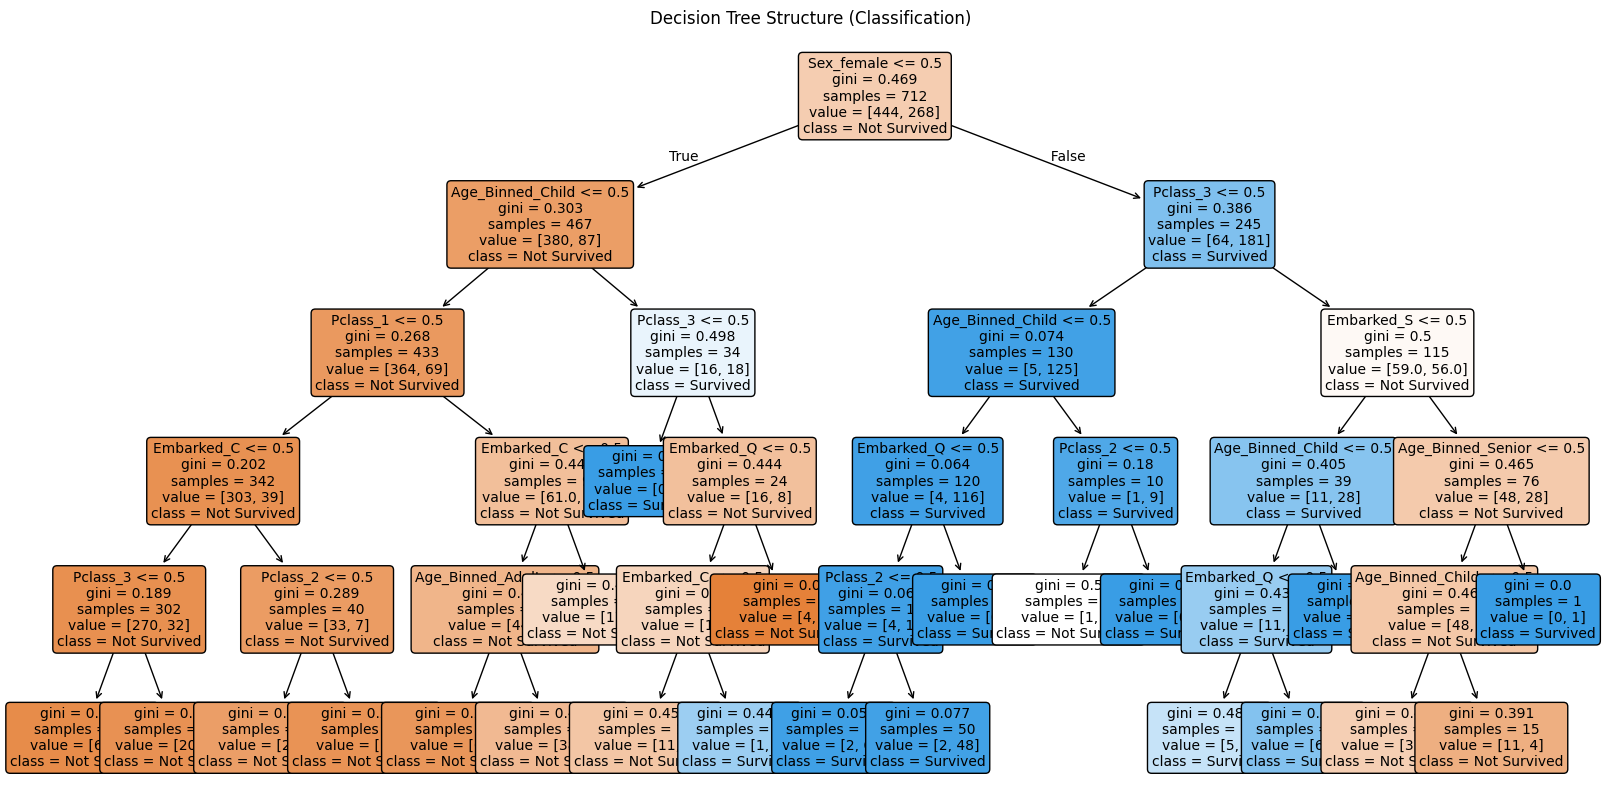

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,  # Your trained DecisionTreeClassifier model
    feature_names=X.columns,  # Use actual feature names from the dataset
    class_names=["Not Survived", "Survived"],  # Labels for classification
    filled=True,  # Color-filled nodes for better interpretation
    rounded=True,  # Rounded edges for clarity
    fontsize=10  # Font size for readability
)
plt.title("Decision Tree Structure (Classification)")
plt.show()

In [5]:
# Decision Tree application using entropy
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Define Features (X) and Target (y)
X = df_train_1hot.drop(columns=["Survived"])  # Exclude target column
y = df_train_1hot["Survived"]  # Target variable

# Step 3: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)  # Gini Index as criterion
dt_model.fit(X_train, y_train)

# Step 5: Make Predictions on Test Set
y_pred = dt_model.predict(X_test)

# Step 6: Evaluate Performance - Calculate Accuracy for Training and Testing Sets
train_accuracy = dt_model.score(X_train, y_train) * 100  # Convert to percentage
test_accuracy = dt_model.score(X_test, y_test) * 100  # Convert to percentage

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

# Optional: Feature Importance Analysis
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance Ranking:")
print(feature_importances)

Training Accuracy: 83.29%
Testing Accuracy: 80.45%

Feature Importance Ranking:
              Feature  Importance
3          Sex_female    0.549500
2            Pclass_3    0.250486
8    Age_Binned_Child    0.070752
0            Pclass_1    0.065999
7          Embarked_S    0.033376
6          Embarked_Q    0.011792
5          Embarked_C    0.008858
10  Age_Binned_Senior    0.008760
1            Pclass_2    0.000478
4            Sex_male    0.000000
9    Age_Binned_Adult    0.000000


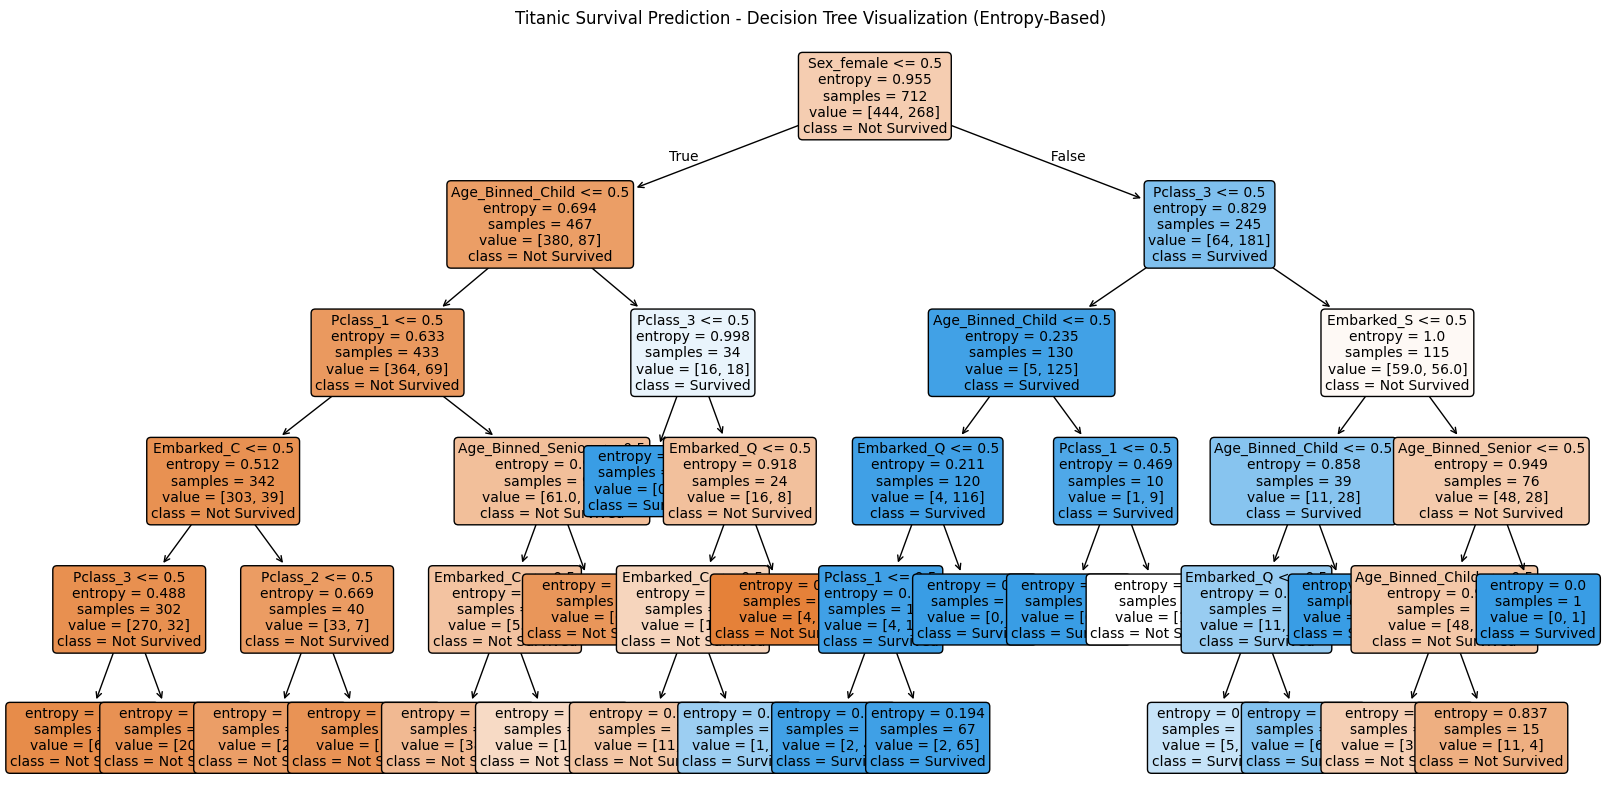

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the trained Decision Tree Classifier (using entropy)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,  # Your trained DecisionTreeClassifier model
    feature_names=X.columns,  # Feature names for better interpretation
    class_names=["Not Survived", "Survived"],  # Classification labels
    filled=True,  # Use colors to indicate class distributions
    rounded=True,  # Enhance readability with rounded nodes
    fontsize=10  # Adjust font size for better presentation
)
plt.title("Titanic Survival Prediction - Decision Tree Visualization (Entropy-Based)")
plt.show()

# __Decision Tree Regression__
- **Decision Tree Regressor predicts continuous values**, unlike classifiers that handle categorical labels.  
- **It minimizes error metrics like MSE and MAE**, ensuring better numerical prediction accuracy.  
- **Splits data recursively**, selecting features and thresholds to refine decision nodes.  
- **Careful parameter tuning** prevents overfitting, balancing model complexity and interpretability.  


In [7]:
os.chdir('..')
df_train_refined = pd.read_csv('train_refined_numeric.csv')
df_train_refined.drop(columns='SalePrice_pred', inplace=True)
df_train_refined.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtFinSF1,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.0,4,5,4.0,706,...,1,3,1,4,0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,0.0,3,2,4.0,978,...,0,3,1,3,1,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.0,4,5,4.0,486,...,1,3,1,4,1,2,608,0,42,223500
3,60.0,9550,7,1915,1970,0.0,3,3,3.0,216,...,0,3,1,4,1,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.0,4,5,4.0,655,...,1,4,1,4,1,3,836,192,84,250000


In [8]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load dataset (assuming df_train_refined is available)
df = df_train_refined.copy()

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable (House Price)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Decision Tree Regressor using MSE
dt_regressor = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = dt_regressor.predict(X_test)

# Step 7: Compute RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Mean Square Error (MSE): {mse:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")

Mean Square Error (MSE): 1570227408.85
Root Mean Square Error (RMSE): 39626.10


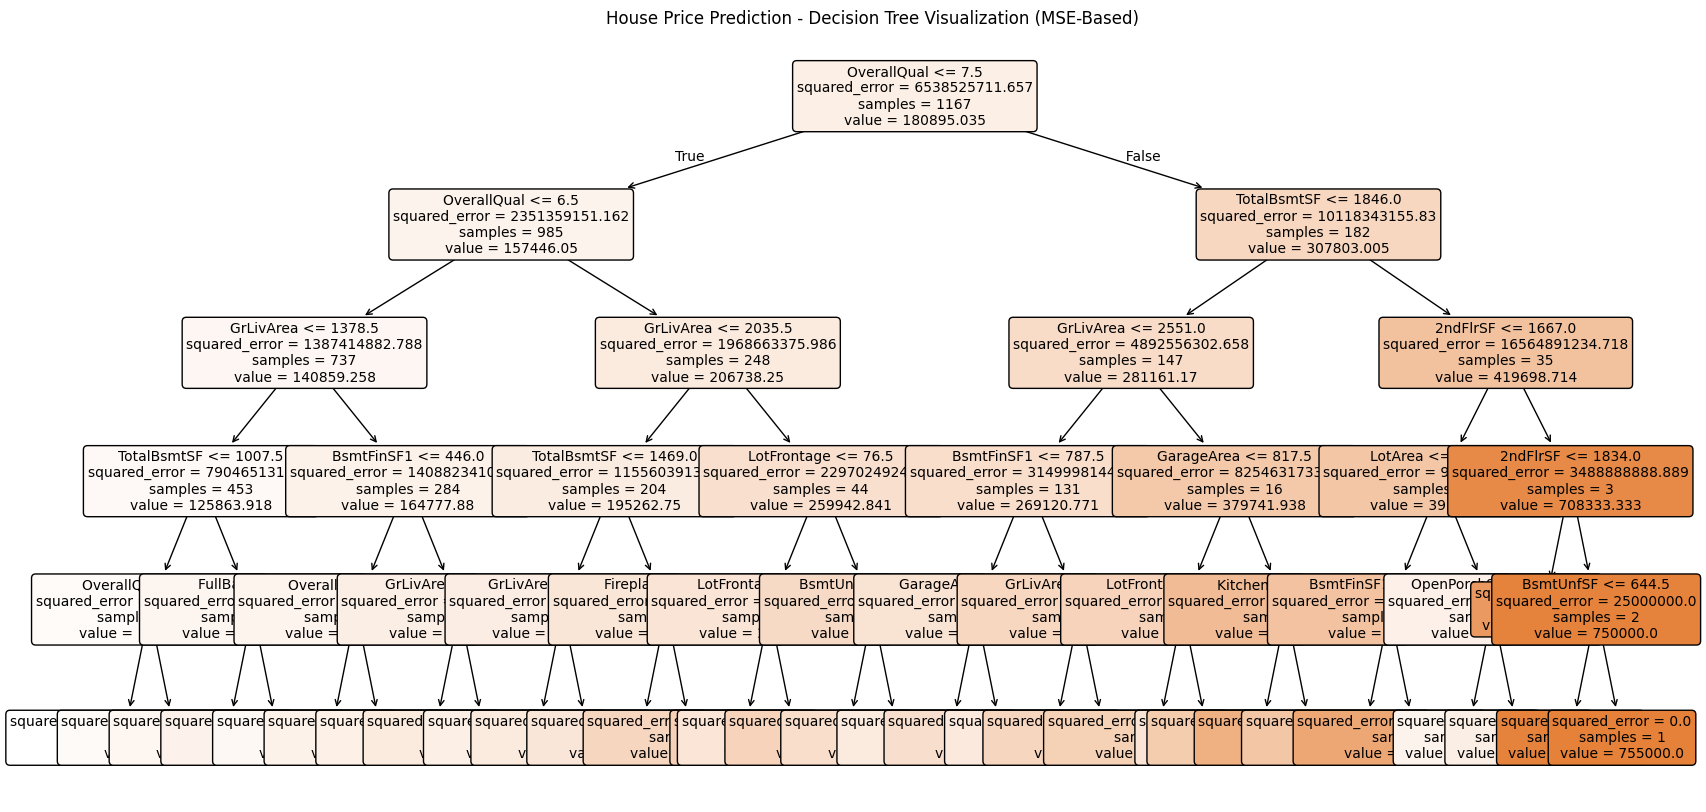

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualizing the trained Decision Tree Regressor (using MSE)
plt.figure(figsize=(20, 10))
plot_tree(
    dt_regressor,  # Your trained DecisionTreeRegressor model
    feature_names=X.columns,  # Feature names for better interpretation
    filled=True,  # Use colors to indicate prediction ranges
    rounded=True,  # Enhance readability with rounded nodes
    fontsize=10  # Adjust font size for better presentation
)
plt.title("House Price Prediction - Decision Tree Visualization (MSE-Based)")
plt.show()

# __Ensemble multiple decision trees__
- **Ensemble learning uses multiple decision trees**, improving accuracy and stability over single-model approaches.  
- **Random Forest and Gradient Boosting** reduce variance and minimize bias for better predictions.  
- **Combining models enhances classification**, ensuring more reliable results in complex datasets.  
- **Aggregating different decision criteria**, like whiskers and ear shape, strengthens overall prediction accuracy.  


# __Bootstrapping sampling with replacement__
- **Bootstrapping selects samples with replacement**, allowing models to learn from varied subsets of data.  
- **Aggregating multiple models trained on bootstrapped samples** enhances accuracy and reduces variance.  
- **Random sampling ensures diverse training data**, preventing overfitting and improving generalization.  
- **Probability of selecting the same item again** is **1/m**, where *m* is total samples.  


# __Random forest__
- **Random Forest in Scikit-learn** streamlines bootstrapping, feature selection, and aggregation for better predictions.  
- **N estimators control the number of trees**, balancing accuracy, efficiency, and overfitting reduction.  
- **Max depth limits tree complexity**, preventing overfitting while maintaining interpretability and generalization.  
- **Feature importance shifts dynamically**, highlighting influential factors like gender in Titanic survival predictions.  
- **Other ensemble methods include Bagging, Boosting, Voting, and Stacking**, offering diverse approaches for better accuracy.  


Training Accuracy: 0.83
Test Accuracy: 0.80


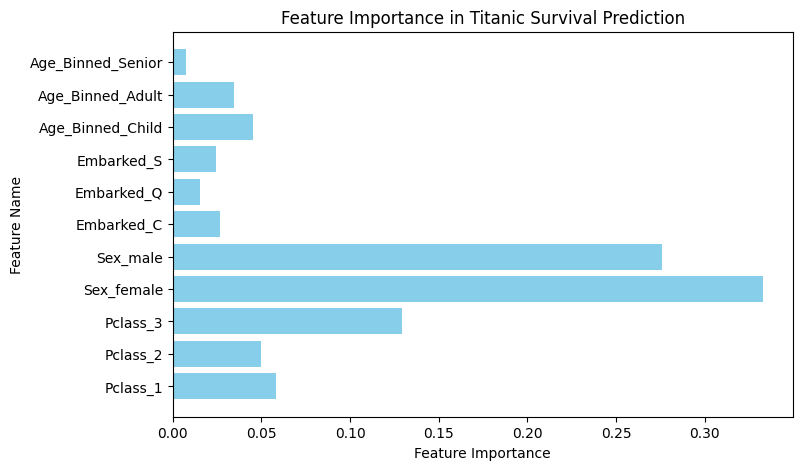

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load Titanic dataset
df = df_train_1hot

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["Survived"])  # Features
y = df["Survived"]  # Target variable (1 = Survived, 0 = Not Survived)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Predict on Training and Test Data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Step 7: Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 8: Plot Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Titanic Survival Prediction")
plt.show()

Training MSE: 600431945.97, RMSE: 24503.71
Test MSE: 754049630.51, RMSE: 27459.96


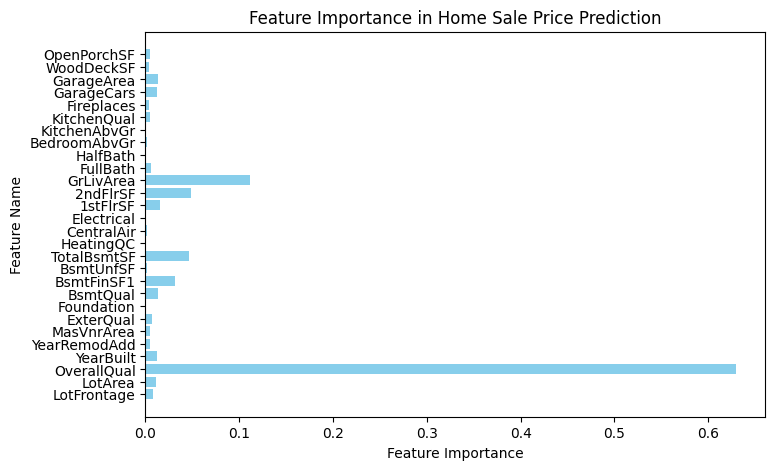

In [11]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 2: Load Home Sale dataset
df = df_train_refined

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable (House Price)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 6: Predict on Training and Test Data
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Step 7: Compute MSE and RMSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}")
print(f"Test MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}")

# Step 8: Plot Feature Importance
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Home Sale Price Prediction")
plt.show()

# __XGBoost__
- **XGBoost enhances tree-based models**, improving accuracy by prioritizing difficult-to-predict examples iteratively.  
- **Boosting and bootstrapping refine predictions**, adjusting weights to focus on misclassified cases dynamically.  
- **XGBoost is not in Scikit-learn**, requiring installation of the separate **xgboost** library for integration.  
- **Feature importance shifts dynamically**, influencing model predictions and optimizing classification outcomes.  
- **XGBoost Regressor improves house price forecasting**, reducing error rates and refining feature selection.  

In [12]:
!pip install xgboost

Training Accuracy: 0.83
Test Accuracy: 0.80


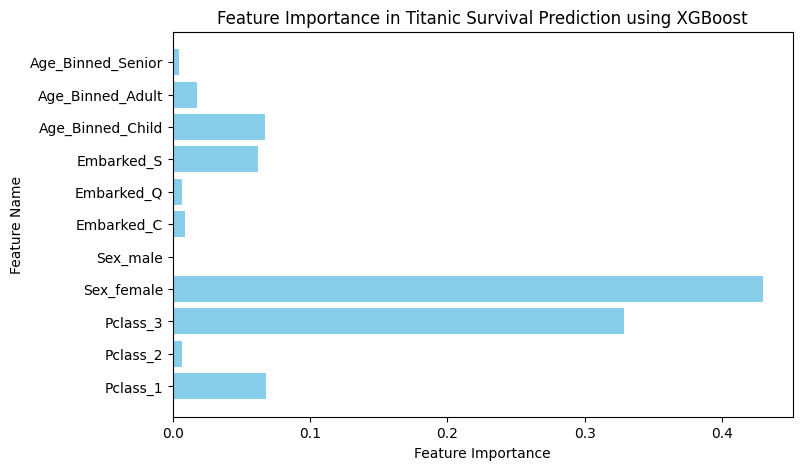

In [13]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Step 2: Load Titanic dataset
df = df_train_1hot

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["Survived"])  # Features
y = df["Survived"]  # Target variable (1 = Survived, 0 = Not Survived)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Step 6: Predict on Training and Test Data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Step 7: Evaluate Model Performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 8: Feature Importance Visualization
feature_importance = xgb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Titanic Survival Prediction using XGBoost")
plt.show()

Training MSE: 78744808.00, RMSE: 8873.83
Test MSE: 567752640.00, RMSE: 23827.56


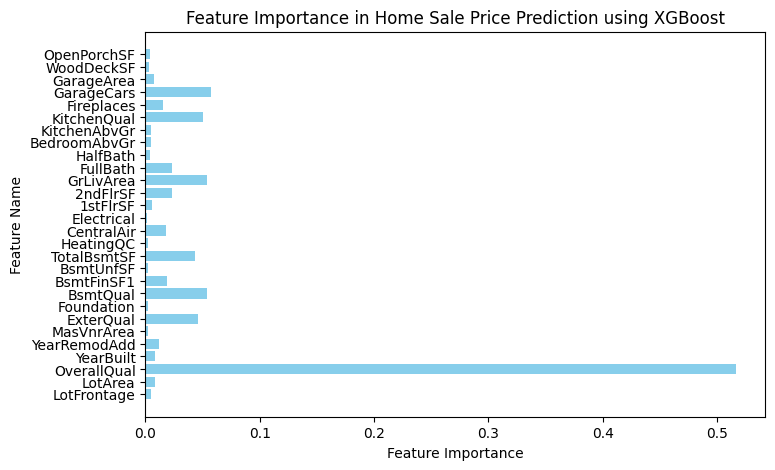

In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Step 2: Load Home Sale dataset
df = df_train_refined

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable (House Price)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Step 6: Predict on Training and Test Data
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Step 7: Compute MSE and RMSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(f"Training MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}")
print(f"Test MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}")

# Step 8: Plot Feature Importance
feature_importance = xgb_regressor.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Home Sale Price Prediction using XGBoost")
plt.show()

# __Coefficient of determination__
- **R² evaluates regression model accuracy**, measuring how well it explains target variable variability.  
- **A higher R² value indicates better predictions**, while a lower value suggests weak pattern detection.  
- **Close to 1 means the model captures house price variance**, while closer to 0 means weaker correlation.  
- **Comparing R² across models helps determine which best fits the data for accurate predictions.**  

* $ \mathbf{R^2 = 1 - \frac{\sum (y_i - \hat{y})^2}{\sum (y_i - \bar{y})^2}} $

# __Models performance comparison__
- **We applied multiple regression models**, including Linear Regression, KNN, Decision Tree, and SVM, for house price prediction.  
- **Random Forest achieved the highest R² score (0.89),** making it the best-performing model for this task.  
- **XGBoost improved prediction accuracy**, refining results by prioritizing difficult-to-predict examples in iterations.  
- **SVM with RBF and Polynomial kernels**, Decision Tree, Random Forest, and XGBoost performed best on the Titanic dataset.  



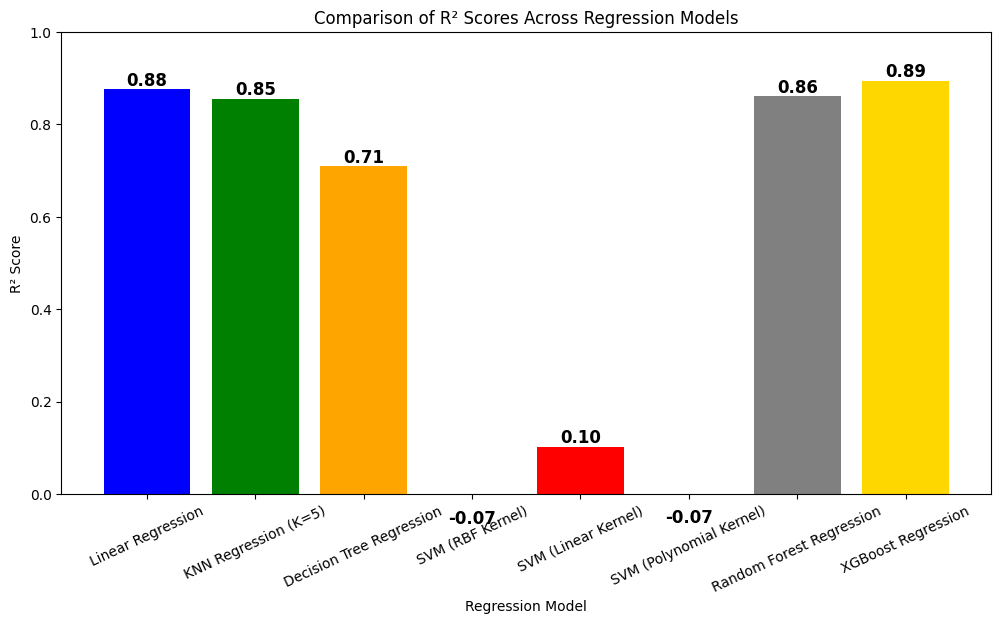

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Step 2: Load dataset
df = df_train_refined.copy()

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["SalePrice"])  # Features
y = df["SalePrice"]  # Target variable (House Price)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize features (important for SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train Regression Models (Including Random Forest & XGBoost)
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regression (K=5)": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regression": DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42),
    "SVM (RBF Kernel)": SVR(kernel="rbf"),
    "SVM (Linear Kernel)": SVR(kernel="linear"),
    "SVM (Polynomial Kernel)": SVR(kernel="poly", degree=3),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost Regression": XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

r2_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate R² Score
    r2_scores[model_name] = r2_score(y_test, y_pred)

# Step 7: Plot R² Score Comparison with Data Labels
plt.figure(figsize=(12, 6))
bars = plt.bar(r2_scores.keys(), r2_scores.values(), color=["blue", "green", "orange", "purple", "red", "cyan", "gray", "gold"])
plt.xlabel("Regression Model")
plt.ylabel("R² Score")
plt.title("Comparison of R² Scores Across Regression Models")
plt.ylim(0, 1)  # Setting range from 0 to 1 for better visibility
plt.xticks(rotation=25)  # Rotate labels for better readability

# Add data labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}",
             ha='center', va='bottom', fontsize=12, fontweight="bold")

plt.show()

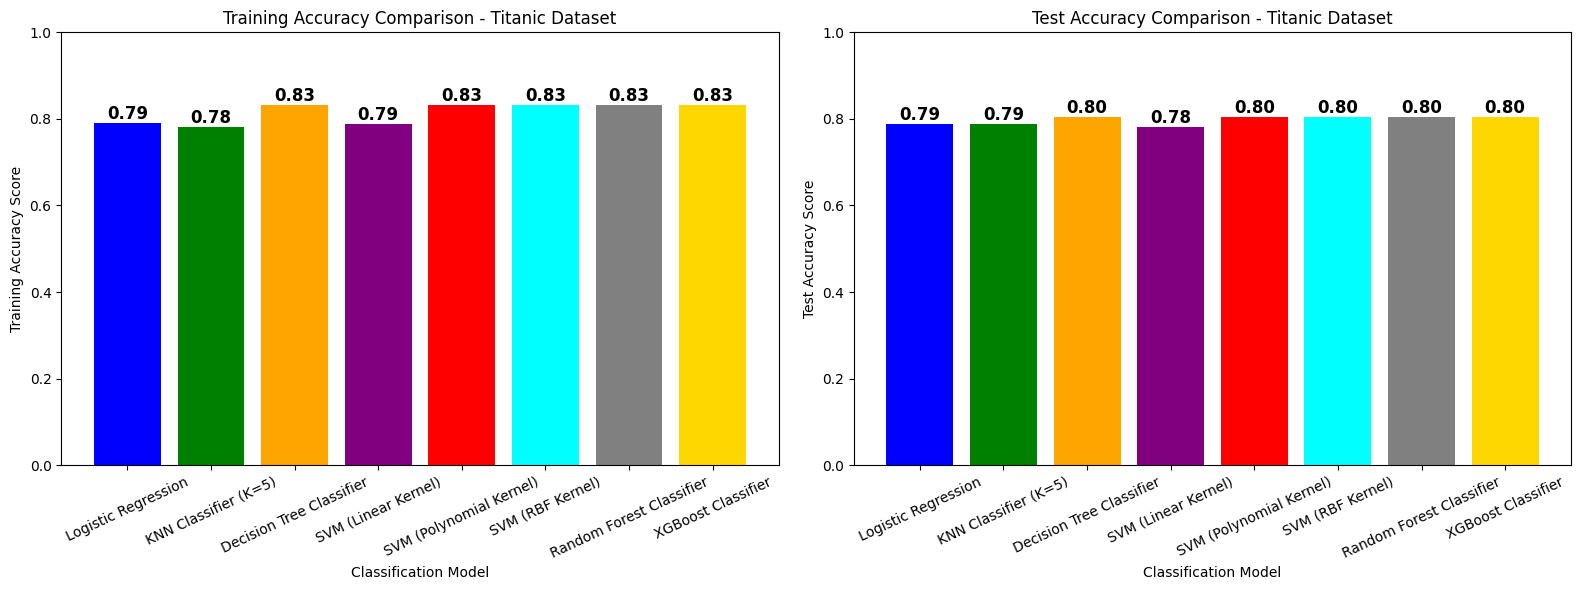

In [16]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load Titanic dataset
df = df_train_1hot.copy()

# Step 3: Define Features (X) and Target (y)
X = df.drop(columns=["Survived"])  # Features
y = df["Survived"]  # Target variable (1 = Survived, 0 = Not Survived)

# Step 4: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize features (important for SVM & KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train Classification Models (Including Random Forest & XGBoost)
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier (K=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5, random_state=42),
    "SVM (Linear Kernel)": SVC(kernel="linear"),
    "SVM (Polynomial Kernel)": SVC(kernel="poly", degree=3),
    "SVM (RBF Kernel)": SVC(kernel="rbf"),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "XGBoost Classifier": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

accuracy_scores_train = {}
accuracy_scores_test = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Training Accuracy
    y_train_pred = model.predict(X_train)
    accuracy_scores_train[model_name] = accuracy_score(y_train, y_train_pred)

    # Test Accuracy
    y_test_pred = model.predict(X_test)
    accuracy_scores_test[model_name] = accuracy_score(y_test, y_test_pred)

# Step 7: Create side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Training Accuracy
bars_train = axes[0].bar(accuracy_scores_train.keys(), accuracy_scores_train.values(), color=["blue", "green", "orange", "purple", "red", "cyan", "gray", "gold"])
axes[0].set_xlabel("Classification Model")
axes[0].set_ylabel("Training Accuracy Score")
axes[0].set_title("Training Accuracy Comparison - Titanic Dataset")
axes[0].set_ylim(0, 1)
axes[0].tick_params(axis='x', rotation=25)

# Add data labels on bars (Training Accuracy)
for bar in bars_train:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}",
                 ha='center', va='bottom', fontsize=12, fontweight="bold")

# Plot Test Accuracy
bars_test = axes[1].bar(accuracy_scores_test.keys(), accuracy_scores_test.values(), color=["blue", "green", "orange", "purple", "red", "cyan", "gray", "gold"])
axes[1].set_xlabel("Classification Model")
axes[1].set_ylabel("Test Accuracy Score")
axes[1].set_title("Test Accuracy Comparison - Titanic Dataset")
axes[1].set_ylim(0, 1)
axes[1].tick_params(axis='x', rotation=25)

# Add data labels on bars (Test Accuracy)
for bar in bars_test:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}",
                 ha='center', va='bottom', fontsize=12, fontweight="bold")

# Adjust layout for better readability
plt.tight_layout()
plt.show()